# Fractional Cover Prediction in Tensorflow
## Setup the training data

In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import datetime
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
import tensorflow as tf
import numpy as np

from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import layers, regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.constraints import max_norm

from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


#import tensorboard
print("TensorFlow v"+tf.__version__)
#print("Tensorboard v"+tensorboard.__version__)

print(tf.test.gpu_device_name())


useJSON = False

if useJSON:
    # All the data dumped from the database as JSON
    fcData20191201 = '{"pv":{"0":0.003,"1":0.0,"2":0.025,"3":0.0,"4":0.283,"5":0.3355428433,"6":0.1343773913,"7":0.30525085,"8":0.2159786221,"9":0.027,"10":0.38812116,"11":0.21855652,"12":0.0,"13":0.0,"14":0.0,"15":0.4287321982,"16":0.1480758446,"17":0.4401683658,"18":0.0100073454,"19":0.2599481842,"20":0.240277,"21":0.125732,"22":0.058499713,"23":0.9579939394,"24":0.084022,"25":0.273,"26":0.037,"27":0.14216,"28":0.075861,"29":0.043,"30":0.2306545934,"31":0.2432261477,"32":0.7027019737,"33":0.0935,"34":0.0,"35":0.07279,"36":0.03,"37":0.3946053736,"38":0.0365469388,"39":0.6326896724,"40":0.003,"41":0.5733,"42":0.013,"43":0.0,"44":0.117,"45":0.31439094,"46":0.013,"47":0.2607053574,"48":0.1707787797,"49":0.097,"50":0.0033,"51":0.5367,"52":0.487312,"53":0.065625,"54":0.0,"55":0.26,"56":0.017,"57":0.1002540404,"58":0.003,"59":0.65,"60":0.1748738,"61":0.3405783636,"62":0.320491506,"63":0.0,"64":0.01,"65":0.274867306,"66":0.22933273,"67":0.0,"68":0.01693,"69":0.1798194286,"70":0.0,"71":0.300393,"72":0.1699950528,"73":0.0,"74":0.184654303,"75":0.2115973906,"76":0.8803962486,"77":0.02,"78":0.072224,"79":0.005,"80":0.3178172727,"81":0.003,"82":0.2530662168,"83":0.21493,"84":0.0,"85":0.71,"86":0.0686313333,"87":0.0933,"88":0.0725616327,"89":0.0,"90":0.003,"91":0.106588,"92":0.0,"93":0.1958370103,"94":0.8718364236,"95":0.04,"96":0.017,"97":0.03,"98":0.21,"99":0.3696789829,"100":0.3289821277,"101":0.3561952293,"102":0.0202712047,"103":0.0,"104":0.8707467005,"105":0.01,"106":0.6142126775,"107":0.01,"108":0.686575,"109":0.123,"110":0.03,"111":0.1033,"112":0.06282,"113":0.7645321136,"114":0.2064329607,"115":0.003,"116":0.06,"117":0.2324921986,"118":0.2283565544,"119":0.003,"120":0.1642282493,"121":0.0,"122":0.1426966292,"123":0.093,"124":0.033,"125":0.5595411795,"126":0.0,"127":0.501671134,"128":0.1204427273,"129":0.1922781633,"130":0.063,"131":0.223,"132":0.077,"133":0.2260838006,"134":0.9289660141,"135":0.1651313333,"136":0.058779,"137":0.003,"138":0.003,"139":0.066,"140":0.003,"141":0.433,"142":0.0,"143":0.201208,"144":0.0915300931,"145":0.1432011813,"146":0.2528248822,"147":0.0610988885,"148":0.189538126,"149":0.0570850505,"150":0.017,"151":0.1174173779,"152":0.0332326284,"153":0.2585315408,"154":0.307,"155":0.1133,"156":0.017,"157":0.0920129858,"158":0.18148138,"159":0.39,"160":0.023,"161":0.1492747587,"162":0.425,"163":0.079858304,"164":0.2467590663,"165":0.4671041182,"166":0.1483830303,"167":0.116725,"168":0.322244,"169":0.08,"170":0.121474,"171":0.0,"172":0.4013252309,"173":0.3807401491,"174":0.0463929737,"175":0.11597333,"176":0.215,"177":0.4668728182,"178":0.0100073454,"179":0.232142561,"180":0.077,"181":0.1412225049,"182":0.6979194454,"183":0.261680389,"184":0.043,"185":0.025,"186":0.01,"187":0.0585679128,"188":0.685,"189":0.044580239,"190":0.0927138243,"191":0.18574,"192":0.017,"193":0.73,"194":0.691282555,"195":0.033,"196":0.7144755888,"197":0.1275457606,"198":0.0,"199":0.007,"200":0.07,"201":0.201566,"202":0.7394955622,"203":0.4512,"204":0.0508282583,"205":0.284103303,"206":0.293,"207":0.19666,"208":0.1484203673,"209":0.0565,"210":0.299109,"211":0.228313,"212":0.06264022,"213":0.167112,"214":0.0664,"215":0.3547326153,"216":0.0167,"217":0.7673879378,"218":0.4241614303,"219":0.005,"220":0.8269450102,"221":0.1196722541,"222":0.4398373987,"223":0.5512636553,"224":0.009979,"225":0.3041910271,"226":0.0493701805,"227":0.21,"228":0.1271988025,"229":0.1988026243,"230":0.3519483974,"231":0.01,"232":0.0,"233":0.9227958546,"234":0.2130687505,"235":0.015,"236":0.5760698377,"237":0.12,"238":0.3123264289,"239":0.047,"240":0.3087416328,"241":0.574809383,"242":0.21025,"243":0.264404,"244":0.0,"245":0.14349,"246":0.3932154571,"247":0.035,"248":0.327739,"249":0.6898143534,"250":0.0,"251":0.0,"252":0.052841,"253":0.184075,"254":0.10505,"255":0.026688693,"256":0.2467089039,"257":0.27,"258":0.007,"259":0.3170372111,"260":0.119108626,"261":0.32,"262":0.2151178315,"263":0.1299921464,"264":0.0653347623,"265":0.037,"266":0.179469,"267":0.4036853444,"268":0.41,"269":0.0,"270":0.124,"271":0.0698254,"272":0.5,"273":0.003,"274":0.163212,"275":0.0949776678,"276":0.144271,"277":0.1226026202,"278":0.5178050486,"279":0.0,"280":0.1136402025,"281":0.3268502527,"282":0.17909199,"283":0.13,"284":0.02234,"285":0.0508646999,"286":0.2442497262,"287":0.2953982527,"288":0.0,"289":0.110168,"290":0.007,"291":0.1433,"292":0.0944386149,"293":0.7355636718,"294":0.3393078269,"295":0.27,"296":0.2248220204,"297":0.046859,"298":0.1164129108,"299":0.1427735819,"300":0.0033,"301":0.337,"302":0.03,"303":0.007,"304":0.0,"305":0.0813516667,"306":0.0619799869,"307":0.0793,"308":0.739032,"309":0.0,"310":0.1634288988,"311":0.0,"312":0.1412967242,"313":0.228439,"314":0.946199,"315":0.005,"316":0.6772936037,"317":0.005,"318":0.0976010549,"319":0.14,"320":0.0,"321":0.15,"322":0.1513083333,"323":0.017,"324":0.227866096,"325":0.4411625284,"326":0.53404,"327":0.007,"328":0.212361,"329":0.820431,"330":0.140738732,"331":0.03,"332":0.059083213,"333":0.372736547,"334":0.1646,"335":0.678745,"336":0.0929508314,"337":0.7165912726,"338":0.1994,"339":0.8176821311,"340":0.182251,"341":0.072369,"342":0.0,"343":0.3572391911,"344":0.0,"345":0.1,"346":0.3446647765,"347":0.07182511,"348":0.0,"349":0.2323769797,"350":0.0767,"351":0.037,"352":0.16,"353":0.0331740303,"354":0.007,"355":0.4290542492,"356":0.44623962,"357":0.01443,"358":0.04844489,"359":0.4329334787,"360":0.1762578947,"361":0.18,"362":0.619,"363":0.043,"364":0.04254,"365":0.1649670199,"366":0.143,"367":0.003,"368":0.323089814,"369":0.3804637021,"370":0.0,"371":0.0030090271,"372":0.1332611051,"373":0.21,"374":0.008964054,"375":0.087,"376":0.01,"377":0.710885625,"378":0.019925,"379":0.1858563218,"380":0.4205870046,"381":0.10418,"382":0.1311616896,"383":0.0,"384":0.1065603333,"385":0.0750604635,"386":0.1614579565,"387":0.5476165162,"388":0.1594815327,"389":0.057,"390":0.0670432417,"391":0.3246225392,"392":0.45548,"393":0.2131311224,"394":0.076313851,"395":0.1352341108,"396":0.033,"397":0.007,"398":0.1383621599,"399":0.089,"400":0.0458637019,"401":0.0,"402":0.026566,"403":0.1934,"404":0.0494724064,"405":0.56395,"406":0.76,"407":0.0746356192,"408":0.7945083965,"409":0.454229105,"410":0.04,"411":0.0,"412":0.34986,"413":0.08,"414":0.1779296198,"415":0.0799763469,"416":0.2582832921,"417":0.2917191489,"418":0.4128737434,"419":0.117,"420":0.1883286186,"421":0.7179958032,"422":0.05665,"423":0.1587271617,"424":0.0526246586,"425":0.27220589,"426":0.013,"427":0.69526452,"428":0.4786194242,"429":0.003,"430":0.339339059,"431":0.1059166522,"432":0.027,"433":0.1989629948,"434":0.0361,"435":0.0577221349,"436":0.0130916415,"437":0.189529727,"438":0.09,"439":0.4932936293,"440":0.11,"441":0.6570691374,"442":0.1133,"443":0.007,"444":0.2954363683,"445":0.033,"446":0.1316354372,"447":0.49663,"448":0.04,"449":0.0663347475,"450":0.1268483775,"451":0.111724,"452":0.16622,"453":0.076769,"454":0.4650805559,"455":0.0915564598,"456":0.016258,"457":0.3935434542,"458":0.3467345085,"459":0.1192865106,"460":0.47,"461":0.0540816327,"462":0.20251878,"463":0.097,"464":0.0067,"465":0.0,"466":0.02,"467":0.9274390115,"468":0.109393,"469":0.0,"470":0.0833,"471":0.0678638159,"472":0.01,"473":0.0654688669,"474":0.2498746281,"475":0.4534093765,"476":0.509125,"477":0.94436,"478":0.009979,"479":0.157004,"480":0.789,"481":0.0462934,"482":0.4006592675,"483":0.0,"484":0.2563485262,"485":0.17,"486":0.126807,"487":0.1172116752,"488":0.1350899673,"489":0.007121058,"490":0.017,"491":0.921532132,"492":0.122079,"493":0.1430723131,"494":0.0,"495":0.1044143787,"496":0.1021132118,"497":0.07,"498":0.003,"499":0.297,"500":0.7,"501":0.455,"502":0.1173513718,"503":0.1330704301,"504":0.0,"505":0.027,"506":0.0,"507":0.198682178,"508":0.0891078594,"509":0.292973727,"510":0.01,"511":0.1637292038,"512":0.0167,"513":0.1515208253,"514":0.016909147,"515":0.0493361174,"516":0.0067,"517":0.12585111,"518":0.0,"519":0.027,"520":0.045,"521":0.300061,"522":0.033,"523":0.003,"524":0.05914489,"525":0.1371678389,"526":0.1525940997,"527":0.035,"528":0.358,"529":0.1161617961,"530":0.0332326284,"531":0.3904085141,"532":0.07279,"533":0.3137208033,"534":0.34858,"535":0.05,"536":0.082751,"537":0.007,"538":0.44,"539":0.25246411,"540":0.3656581926,"541":0.0937,"542":0.1879565613,"543":0.2746320232,"544":0.2382046802,"545":0.109567963,"546":0.53835,"547":0.1526136344,"548":0.2597723789,"549":0.040736,"550":0.3642280166,"551":0.003,"552":0.013,"553":0.005991,"554":0.37173,"555":0.14,"556":0.0818165819,"557":0.1115587778,"558":0.49,"559":0.5483995399,"560":0.4433,"561":0.1301739345,"562":0.0,"563":0.2822916482,"564":0.015,"565":0.5636764291,"566":0.003,"567":0.005,"568":0.002991,"569":0.005,"570":0.4361299533,"571":0.0,"572":0.003,"573":0.1518090909,"574":0.02294,"575":0.1386583333,"576":0.7685835555,"577":0.287279828,"578":0.017,"579":0.07279952,"580":0.2784612931,"581":0.96056531,"582":0.2055814746,"583":0.0552112076,"584":0.0,"585":0.10304908,"586":0.0031023785,"587":0.1885537895,"588":0.5158293881,"589":0.0416666667,"590":0.0736515152,"591":0.1171203364,"592":0.083,"593":0.2817096,"594":0.0494302708,"595":0.5118714082,"596":0.153649,"597":0.0,"598":0.0100300903,"599":0.013,"600":0.6278812376,"601":0.4849250678,"602":0.7105255444,"603":0.2333,"604":0.1172116752,"605":0.076255,"606":0.0,"607":0.023,"608":0.013,"609":0.0254666085,"610":0.9445631053,"611":0.1704081633,"612":0.0,"613":0.372887,"614":0.247,"615":0.003,"616":0.0520099349,"617":0.146469486,"618":0.693,"619":0.1396756838,"620":0.09,"621":0.5096585899,"622":0.0,"623":0.2332145101,"624":0.7869623067,"625":0.1726626568,"626":0.22980736,"627":0.1304548419,"628":0.0532046192,"629":0.033,"630":0.003,"631":0.1121334534,"632":0.0,"633":0.4687682349,"634":0.3431382303,"635":0.072727697,"636":0.0685778258,"637":0.0967492118,"638":0.2447483176,"639":0.25266,"640":0.0,"641":0.07,"642":0.2591443787,"643":0.1040529793,"644":0.3962363778,"645":0.1691771519,"646":0.0335424828,"647":0.074482,"648":0.0905876722,"649":0.4112235428,"650":0.005,"651":0.21035663,"652":0.0,"653":0.0453723131,"654":0.4948391028,"655":0.13256,"656":0.046371457,"657":0.0698016999,"658":0.0,"659":0.111670462,"660":0.5132055731,"661":0.006958,"662":0.49,"663":0.1,"664":0.0855110271,"665":0.42871,"666":0.4596844502,"667":0.139589,"668":0.3966825407,"669":0.087,"670":0.0432756545,"671":0.003,"672":0.047,"673":0.5495749485,"674":0.0147,"675":0.009979,"676":0.5805521637,"677":0.5641196447,"678":0.157,"679":0.0,"680":0.227321238,"681":0.0419727177,"682":0.0,"683":0.4808552999,"684":0.2679745263,"685":0.0,"686":0.013,"687":0.033,"688":0.083844,"689":0.0274669379,"690":0.2944226399,"691":0.0,"692":0.077948,"693":0.1548161702,"694":0.6340464,"695":0.44,"696":0.007,"697":0.0592,"698":0.01,"699":0.1167,"700":0.01,"701":0.01,"702":0.6381,"703":0.446430166,"704":0.0,"705":0.2340646897,"706":0.43344096,"707":0.113,"708":0.223,"709":0.2700545102,"710":0.045373,"711":0.1378151237,"712":0.02,"713":0.0,"714":0.0987792671,"715":0.4362977042,"716":0.048472,"717":0.3336640449,"718":0.003,"719":0.0,"720":0.461601057,"721":0.4942491556,"722":0.30304,"723":0.6157334455,"724":0.2803675679,"725":0.314962449,"726":0.4215708427,"727":0.5839508,"728":0.3524004146,"729":0.013,"730":0.8514255825,"731":0.09,"732":0.02686,"733":0.007,"734":0.02,"735":0.247387757,"736":0.007,"737":0.1081580817,"738":0.5608927426,"739":0.0257731959,"740":0.03944389,"741":0.3560991112,"742":0.2649085,"743":0.435,"744":0.0595,"745":0.0669501603,"746":0.0,"747":0.0,"748":0.2118903693,"749":0.2633,"750":0.3868732983,"751":0.308984325,"752":0.0,"753":0.05,"754":0.632,"755":0.671201397,"756":0.089739,"757":0.01,"758":0.16,"759":0.1449211434,"760":0.0453723131,"761":0.0,"762":0.2473789124,"763":0.03567,"764":0.4909307905,"765":0.5655552087,"766":0.5792211333,"767":0.0,"768":0.0846247639,"769":0.105496,"770":0.375,"771":0.3073694554,"772":0.7574198775,"773":0.199025,"774":0.11175984,"775":0.603594962,"776":0.9421865067,"777":0.24532,"778":0.213,"779":0.6654597053,"780":0.163748,"781":0.012949,"782":0.302191,"783":0.9436766481,"784":0.210965,"785":0.0657078351,"786":0.0232671633,"787":0.1776996221,"788":0.149992,"789":0.504562774,"790":0.2410005383,"791":0.2530141935,"792":0.0,"793":0.3788430848,"794":0.0,"795":0.0,"796":0.0033,"797":0.003,"798":0.0,"799":0.4426828464,"800":0.027,"801":0.06,"802":0.0261333232,"803":0.2288583837,"804":0.1891618525,"805":0.5485278081,"806":0.3619214117,"807":0.1632251237,"808":0.1,"809":0.0396713232,"810":0.024006998,"811":0.0396081633,"812":0.197,"813":0.11268511,"814":0.1033,"815":0.120001,"816":0.2865904546,"817":0.1936762869,"818":0.879391987,"819":0.023,"820":0.417109,"821":0.0249846154,"822":0.3783924098,"823":0.3595505618,"824":0.2511856453,"825":0.015,"826":0.0649512076,"827":0.0,"828":0.403,"829":0.0,"830":0.48,"831":0.036147298,"832":0.0684409869,"833":0.003,"834":0.054,"835":0.6042167201,"836":0.545,"837":0.0362247959,"838":0.1587248112,"839":0.2658216581,"840":0.0373384152,"841":0.01,"842":0.108786567,"843":0.1308510638,"844":0.0,"845":0.193,"846":0.00632511,"847":0.003,"848":0.3646868508,"849":0.2626125869,"850":0.1450020202,"851":0.09325,"852":0.0,"853":0.082908,"854":0.6066533677,"855":0.02,"856":0.00994009,"857":0.48,"858":0.8950558247,"859":0.0,"860":0.0298301805,"861":0.1039104799,"862":0.412,"863":0.2739429382,"864":0.08775,"865":0.1820799245,"866":0.3728842105,"867":0.009958,"868":0.0,"869":0.0,"870":0.1531840523,"871":0.273,"872":0.2678944201,"873":0.055,"874":0.111511058,"875":0.0299311349,"876":0.013,"877":0.0,"878":0.0,"879":0.0153846154,"880":0.01,"881":0.003,"882":0.16979625,"883":0.0233,"884":0.0101010101,"885":0.08,"886":0.3780445121,"887":0.3268,"888":0.14939925,"889":0.0,"890":0.0,"891":0.0,"892":0.1267,"893":0.0,"894":0.0710659898,"895":0.2678916415,"896":0.0589636284,"897":0.027,"898":0.426325656,"899":0.3246411348,"900":0.40788,"901":0.01693,"902":0.322444,"903":0.395,"904":0.0889057677,"905":0.1233,"906":0.3781396705,"907":0.0833,"908":0.057,"909":0.003,"910":0.017,"911":0.30387,"912":0.0,"913":0.1343998181,"914":0.0429362446,"915":0.0070493454,"916":0.1660802138,"917":0.047,"918":0.47242,"919":0.1241538033,"920":0.073,"921":0.0854724378,"922":0.435,"923":0.092964,"924":0.938104899,"925":0.0206724256,"926":0.0102354145,"927":0.0,"928":0.0,"929":0.0267814935,"930":0.0400188199,"931":0.0,"932":0.0403163354,"933":0.5333768389,"934":0.7864985036,"935":0.015,"936":0.013,"937":0.185,"938":0.029570547,"939":0.0,"940":0.0633,"941":0.0,"942":0.54,"943":0.017,"944":0.2890460515,"945":0.0886222653,"946":0.003,"947":0.397705879,"948":0.15,"949":0.1313577325,"950":0.3236188841,"951":0.5368863594,"952":0.04,"953":0.0,"954":0.06942772,"955":0.033,"956":0.0434343434,"957":0.1632497578,"958":0.4300250287,"959":0.039520093,"960":0.0463983913,"961":0.5893010032,"962":0.049266,"963":0.0,"964":0.0433,"965":0.3611370574,"966":0.9700628389,"967":0.9227611288,"968":0.083,"969":0.373412,"970":0.1285707896,"971":0.557,"972":0.0,"973":0.003,"974":0.0663303082,"975":0.699856,"976":0.985,"977":0.81,"978":0.02,"979":0.019800148,"980":0.226751783,"981":0.0454512,"982":0.3058139535,"983":0.1237,"984":0.1361,"985":0.6775590855,"986":0.3718582057,"987":0.0721560515,"988":0.1072244898,"989":0.05,"990":0.0,"991":0.663121096,"992":0.026919,"993":0.2501079241,"994":0.600034244,"995":0.04343625,"996":0.0,"997":0.1690133432,"998":0.05,"999":0.4390243902,"1000":0.01,"1001":0.117,"1002":0.077357257,"1003":0.04592011,"1004":0.1981483333,"1005":0.3817014715,"1006":0.6430962725,"1007":0.0,"1008":0.5130761834,"1009":0.1050985714,"1010":0.403266655,"1011":0.1204819277,"1012":0.1973705197,"1013":0.0715461368,"1014":0.3499603218,"1015":0.2667,"1016":0.1867,"1017":0.003,"1018":0.03,"1019":0.065,"1020":0.195,"1021":0.0584081633,"1022":0.2870036444,"1023":0.007,"1024":0.2988936374,"1025":0.5149099207,"1026":0.38952034,"1027":0.0402683354,"1028":0.3759,"1029":0.0130410101,"1030":0.2126889013,"1031":0.005,"1032":0.135390998,"1033":0.1539463354,"1034":0.3138472593,"1035":0.78266211,"1036":0.0704044872,"1037":0.8355265737,"1038":0.1836895219,"1039":0.9527099178,"1040":0.0030395137,"1041":0.418795533,"1042":0.0,"1043":0.1005748816,"1044":0.18,"1045":0.0,"1046":0.037,"1047":0.0,"1048":0.086391,"1049":0.02686,"1050":0.0462663434,"1051":0.04751702,"1052":0.0372608258,"1053":0.8333900761,"1054":0.3869552926,"1055":0.13334875,"1056":0.6533,"1057":0.096755,"1058":0.1558098314,"1059":0.3092532989,"1060":0.2591139763,"1061":0.4352688166,"1062":0.1933,"1063":0.013,"1064":0.027,"1065":0.2549471134,"1066":0.5422202746,"1067":0.003,"1068":0.013,"1069":0.0,"1070":0.0304100204,"1071":0.2381225937,"1072":0.1333,"1073":0.08615174,"1074":0.01,"1075":0.0,"1076":0.31330433,"1077":0.1072244898,"1078":0.2496001385,"1079":0.008,"1080":0.067,"1081":0.04,"1082":0.0814098969,"1083":0.67432,"1084":0.11,"1085":0.0878354994,"1086":0.04,"1087":0.0881816686,"1088":0.163944913,"1089":0.05257,"1090":0.3558629787,"1091":0.6123236361,"1092":0.1631379391,"1093":0.0685720238,"1094":0.9566236531,"1095":0.2620102508,"1096":0.4004627121,"1097":0.187,"1098":0.1001089474,"1099":0.0100300903,"1100":0.8046185704,"1101":0.0,"1102":0.42,"1103":0.0,"1104":0.7026728105,"1105":0.5062458646,"1106":0.3732049998,"1107":0.0427936955,"1108":0.037,"1109":0.9311050262,"1110":0.12578622,"1111":0.3489452327,"1112":0.0,"1113":0.1715016667,"1114":0.074244,"1115":0.023,"1116":0.096836922,"1117":0.6376327545,"1118":0.02,"1119":0.00997789,"1120":0.1373331313,"1121":0.4767387527,"1122":0.3932591423,"1123":0.1023774834,"1124":0.485198,"1125":0.5134,"1126":0.1344866521,"1127":0.0459999738,"1128":0.026919,"1129":0.201,"1130":0.4792582257,"1131":0.035,"1132":0.186,"1133":0.091,"1134":0.1277516415,"1135":0.2823092243,"1136":0.0186715137,"1137":0.5150235922,"1138":0.413,"1139":0.1568015174,"1140":0.04,"1141":0.22,"1142":0.0167,"1143":0.6116904125,"1144":0.9291294323,"1145":0.1521834278,"1146":0.0413650465,"1147":0.2567,"1148":0.210801,"1149":0.2981158612,"1150":0.3599846,"1151":0.1481022361,"1152":0.3808814844,"1153":0.0,"1154":0.0257809334,"1155":0.2632442844,"1156":0.0923489927,"1157":0.03,"1158":0.02,"1159":0.328,"1160":0.3058556202,"1161":0.3527359184,"1162":0.5326306801,"1163":0.1658,"1164":0.7510410248,"1165":0.05915104,"1166":0.2606333333,"1167":0.003,"1168":0.16276111,"1169":0.0,"1170":0.423755575,"1171":0.0543,"1172":0.0,"1173":0.4995374145,"1174":0.39868,"1175":0.2743,"1176":0.1178713632,"1177":0.15654,"1178":0.0971141088,"1179":0.0067,"1180":0.1100239164,"1181":0.0901502168,"1182":0.39313,"1183":0.04885,"1184":0.0,"1185":0.4671085634,"1186":0.1152879669,"1187":0.15,"1188":0.037,"1189":0.172831,"1190":0.0911854103,"1191":0.14612711,"1192":0.196409,"1193":0.465,"1194":0.05,"1195":0.13867,"1196":0.50193,"1197":0.24948,"1198":0.086920025,"1199":0.1011484107,"1200":0.073,"1201":0.2277382492,"1202":0.0965154848,"1203":0.2063172832,"1204":0.0493179433,"1205":0.1200173354,"1206":0.005,"1207":0.0,"1208":0.0,"1209":0.4835817664,"1210":0.233425584,"1211":0.0,"1212":0.0,"1213":0.3299967416,"1214":0.2304663265,"1215":0.110851,"1216":0.005,"1217":0.0099,"1218":0.56472015,"1219":0.173,"1220":0.0461545619,"1221":0.5367254362,"1222":0.0269598291,"1223":0.1408296943,"1224":0.02,"1225":0.0,"1226":0.037,"1227":0.1561472872,"1228":0.003,"1229":0.4237363333,"1230":0.1700057732,"1231":0.0332326284,"1232":0.458629,"1233":0.005,"1234":0.3454845014,"1235":0.0,"1236":0.075781,"1237":0.0,"1238":0.0,"1239":0.3522197807,"1240":0.0033,"1241":0.114,"1242":0.9156788806,"1243":0.2081369874,"1244":0.014,"1245":0.1722684872,"1246":0.4316360617,"1247":0.59655,"1248":0.0298334245,"1249":0.23,"1250":0.6713647223,"1251":0.1667,"1252":0.2702642268,"1253":0.013,"1254":0.0167,"1255":0.0,"1256":0.5433,"1257":0.3410997898,"1258":0.4893884678,"1259":0.0942227872,"1260":0.3868974642,"1261":0.03,"1262":0.029839,"1263":0.09546,"1264":0.003,"1265":0.1140980202,"1266":0.3041910188,"1267":0.0682301774,"1268":0.47692,"1269":0.193,"1270":0.3327452462,"1271":0.19,"1272":0.0,"1273":0.046149,"1274":0.21,"1275":0.0,"1276":0.01,"1277":0.076708,"1278":0.0,"1279":0.379375,"1280":0.9403551425,"1281":0.0,"1282":0.0324851901,"1283":0.0,"1284":0.3421301482,"1285":0.7315817752,"1286":0.103,"1287":0.06,"1288":0.007,"1289":0.1409318495,"1290":0.4107701554,"1291":0.0854179385,"1292":0.1176777879,"1293":0.0,"1294":0.0533,"1295":0.12,"1296":0.0,"1297":0.085742,"1298":0.27,"1299":0.445,"1300":0.059504,"1301":0.165,"1302":0.0740494804,"1303":0.1207254898,"1304":0.09044244,"1305":0.1368458302,"1306":0.005,"1307":0.1380356192,"1308":0.4502434242,"1309":0.4156188129,"1310":0.13,"1311":0.042871,"1312":0.674844,"1313":0.13261,"1314":0.113261,"1315":0.0,"1316":0.029901,"1317":0.2020301103,"1318":0.0,"1319":0.013,"1320":0.3883813055,"1321":0.223,"1322":0.13132278,"1323":0.0,"1324":0.282148839,"1325":0.0,"1326":0.08,"1327":0.075,"1328":0.301101,"1329":0.0100704935,"1330":0.01,"1331":0.019949,"1332":0.040526849,"1333":0.1558515789,"1334":0.17484,"1335":0.196541,"1336":0.3542503749,"1337":0.2483099219,"1338":0.155541,"1339":0.169503,"1340":0.5398043652,"1341":0.0,"1342":0.277512,"1343":0.16,"1344":0.2165781633,"1345":0.027,"1346":0.0748832169,"1347":0.007,"1348":0.0,"1349":0.3475991174,"1350":0.3731199242,"1351":0.7345707143,"1352":0.3541859421,"1353":0.507,"1354":0.1928898182,"1355":0.8652374619,"1356":0.0,"1357":0.1416942798,"1358":0.0230599869,"1359":0.497152,"1360":0.01,"1361":0.0413722145,"1362":0.2321276596,"1363":0.09379008,"1364":0.01,"1365":0.0,"1366":0.3132,"1367":0.2439504366,"1368":0.1016997959,"1369":0.013,"1370":0.1631029333,"1371":0.321523,"1372":0.6435905,"1373":0.8613965,"1374":0.01,"1375":0.3807390817,"1376":0.1283292781,"1377":0.0169390903,"1378":0.03,"1379":0.0136411333,"1380":0.146269,"1381":0.0539906484,"1382":0.7253590522,"1383":0.0,"1384":0.1027,"1385":0.186437,"1386":0.137,"1387":0.0755817872,"1388":0.15542436,"1389":0.005991,"1390":0.2160650629,"1391":0.007,"1392":0.572429,"1393":0.0,"1394":0.1368273918,"1395":0.16447,"1396":0.027,"1397":0.103403882,"1398":0.563465657,"1399":0.0,"1400":0.013,"1401":0.1,"1402":0.1140316415,"1403":0.595,"1404":0.1197543501,"1405":0.04288,"1406":0.2257332418,"1407":0.0,"1408":0.06167932,"1409":0.0233,"1410":0.003,"1411":0.407975,"1412":0.0633,"1413":0.266304458,"1414":0.5071750005,"1415":0.51,"1416":0.0100704935,"1417":0.608490357,"1418":0.0,"1419":0.4088,"1420":0.1197365602,"1421":0.137,"1422":0.003,"1423":0.005,"1424":0.1573414141,"1425":0.014,"1426":0.1,"1427":0.003,"1428":0.017,"1429":0.952388984,"1430":0.4488634563,"1431":0.015961,"1432":0.0602313039,"1433":0.1176874194,"1434":0.163,"1435":0.29,"1436":0.1067690111,"1437":0.1366250419,"1438":0.2733127911,"1439":0.33,"1440":0.219,"1441":0.0,"1442":0.0928495197,"1443":0.0931554864,"1444":0.0818916327,"1445":0.24196911,"1446":0.1151532079,"1447":0.0557453434,"1448":0.196889,"1449":0.0169514935,"1450":0.4,"1451":0.19,"1452":0.0725857872,"1453":0.01,"1454":0.043,"1455":0.3069746738,"1456":0.027,"1457":0.24,"1458":0.1442857677,"1459":0.0,"1460":0.02,"1461":0.0298,"1462":0.275,"1463":0.098,"1464":0.089984829,"1465":0.24,"1466":0.3663233177,"1467":0.1033231115,"1468":0.9409785044,"1469":0.9458551515,"1470":0.135,"1471":0.773225,"1472":0.2574734395,"1473":0.045871,"1474":0.009958,"1475":0.271312718,"1476":0.0268,"1477":0.007,"1478":0.0,"1479":0.017,"1480":0.0,"1481":0.1278,"1482":0.05801108,"1483":0.03376,"1484":0.0753747475,"1485":0.0586725789,"1486":0.0,"1487":0.0835842476,"1488":0.2803677985,"1489":0.1618556701,"1490":0.3520512661,"1491":0.090269,"1492":0.233,"1493":0.0670784615,"1494":0.0100704935,"1495":0.4922581304,"1496":0.2172559998,"1497":0.003,"1498":0.3211353589,"1499":0.5527374384,"1500":0.055832,"1501":0.06,"1502":0.007,"1503":0.315,"1504":0.01297,"1505":0.1291485567,"1506":0.60343945,"1507":0.03564875,"1508":0.02,"1509":0.2861015294,"1510":0.0,"1511":0.87447468,"1512":0.37,"1513":0.3719756873,"1514":0.16,"1515":0.1620642381,"1516":0.134,"1517":0.003,"1518":0.0,"1519":0.11327222,"1520":0.1469183252,"1521":0.2167,"1522":0.6857356335,"1523":0.12,"1524":0.0,"1525":0.14738089,"1526":0.1067,"1527":0.11,"1528":0.040226,"1529":0.007,"1530":0.3335205699,"1531":0.1233,"1532":0.5914417028,"1533":0.037,"1534":0.012900358,"1535":0.12187,"1536":0.0,"1537":0.955,"1538":0.1784179442,"1539":0.2389202983,"1540":0.023234,"1541":0.2505419871,"1542":0.007,"1543":0.13273,"1544":0.1746,"1545":0.040545102,"1546":0.469158794,"1547":0.0,"1548":0.0271903323,"1549":0.2528996818,"1550":0.523,"1551":0.8396674201,"1552":0.0,"1553":0.0,"1554":0.2695400176,"1555":0.2,"1556":0.2436530108,"1557":0.003,"1558":0.521580372,"1559":0.0,"1560":0.0617015804,"1561":0.4527158468,"1562":0.7182455029,"1563":0.0360569018,"1564":0.0494473454,"1565":0.1400415463,"1566":0.1893283285,"1567":0.15,"1568":0.07,"1569":0.084,"1570":0.4185763146,"1571":0.248,"1572":0.0661521499,"1573":0.0325977605,"1574":0.08,"1575":0.6907122202,"1576":0.043,"1577":0.172,"1578":0.01,"1579":0.0258430619,"1580":0.0,"1581":0.296991,"1582":0.01297,"1583":0.093,"1584":0.28324,"1585":0.0501504514,"1586":0.0657556231,"1587":0.031701,"1588":0.02,"1589":0.5927952105,"1590":0.2820093469,"1591":0.586917762,"1592":0.2405739718,"1593":0.102433,"1594":0.237,"1595":0.260833,"1596":0.1511516667,"1597":0.0050505051,"1598":0.2644529589,"1599":0.1732700301,"1600":0.132871,"1601":0.01,"1602":0.16949,"1603":0.04337,"1604":0.1455981183,"1605":0.0743607369,"1606":0.073,"1607":0.0,"1608":0.003,"1609":0.024875,"1610":0.0,"1611":0.148296,"1612":0.0434,"1613":0.3751258763,"1614":0.103591,"1615":0.12682,"1616":0.494521,"1617":0.003,"1618":0.0,"1619":0.01,"1620":0.6104258595,"1621":0.4128902199,"1622":0.09326284,"1623":0.0,"1624":0.7930352319,"1625":0.0533,"1626":0.0556046431,"1627":0.1442817692,"1628":0.0,"1629":0.2396377374,"1630":0.4515931378,"1631":0.0230599869,"1632":0.9542016981,"1633":0.5787129846,"1634":0.525,"1635":0.0395911535,"1636":0.141967,"1637":0.2264183485,"1638":0.41983,"1639":0.03,"1640":0.0,"1641":0.4741214348,"1642":0.4948078942,"1643":0.015940273,"1644":0.01,"1645":0.113,"1646":0.099709,"1647":0.025,"1648":0.2077733457,"1649":0.6775692821,"1650":0.0433,"1651":0.04,"1652":0.0334346505,"1653":0.1645520272,"1654":0.3227138627,"1655":0.039649,"1656":0.035996,"1657":0.153958,"1658":0.05485,"1659":0.18,"1660":0.0,"1661":0.2365303285,"1662":0.2183343335,"1663":0.0,"1664":0.2042983673,"1665":0.0,"1666":0.3108736,"1667":0.0,"1668":0.047,"1669":0.0880724673,"1670":0.3172989919,"1671":0.23506022,"1672":0.027,"1673":0.04812,"1674":0.22311689,"1675":0.2291913402,"1676":0.6993251579,"1677":0.6770380278,"1678":0.06276,"1679":0.5793324877,"1680":0.053,"1681":0.3641900117,"1682":0.0,"1683":0.6644380284,"1684":0.045,"1685":0.0,"1686":0.1997808258,"1687":0.04649,"1688":0.7567529495,"1689":0.790729,"1690":0.583873951,"1691":0.0,"1692":0.0567,"1693":0.01,"1694":0.017,"1695":0.013,"1696":0.7586809096,"1697":0.076,"1698":0.04985,"1699":0.2313029518,"1700":0.099836,"1701":0.103140736,"1702":0.003,"1703":0.01,"1704":0.388817,"1705":0.03,"1706":0.691129005,"1707":0.4132412736,"1708":0.886901317,"1709":0.0168763211,"1710":0.019909,"1711":0.5533181818,"1712":0.0691271174,"1713":0.1278990357,"1714":0.06,"1715":0.078759,"1716":0.006958063,"1717":0.0,"1718":0.027,"1719":0.027,"1720":0.06,"1721":0.09997,"1722":0.185,"1723":0.09449323,"1724":0.0667,"1725":0.2410622177,"1726":0.0359912979,"1727":0.4792972379,"1728":0.1,"1729":0.033,"1730":0.0266,"1731":0.023,"1732":0.2863767908,"1733":0.20715,"1734":0.5742708458,"1735":0.122139,"1736":0.65569089,"1737":0.0398627103,"1738":0.0,"1739":0.29902089,"1740":0.1998518238,"1741":0.11745,"1742":0.295976,"1743":0.0892266979,"1744":0.013,"1745":0.95090654,"1746":0.5724229317,"1747":0.0740299,"1748":0.1470814995,"1749":0.0271903323,"1750":0.11,"1751":0.043,"1752":0.073,"1753":0.03,"1754":0.0,"1755":0.02383,"1756":0.104,"1757":0.11,"1758":0.0466844403,"1759":0.003,"1760":0.1773783418,"1761":0.01,"1762":0.4331213318,"1763":0.3035456336,"1764":0.095,"1765":0.396692607,"1766":0.1757784328,"1767":0.3530149105,"1768":0.0,"1769":0.1689355632,"1770":0.189439,"1771":0.45,"1772":0.506,"1773":0.5739631871,"1774":0.1601440713,"1775":0.222366,"1776":0.5282209738,"1777":0.025,"1778":0.5298116011,"1779":0.2773093136,"1780":0.02,"1781":0.2806654155,"1782":0.007,"1783":0.17,"1784":0.003,"1785":0.7311520676,"1786":0.119,"1787":0.2976574645,"1788":0.045,"1789":0.2217743679,"1790":0.2576619245,"1791":0.2053983825,"1792":0.2533,"1793":0.475,"1794":0.2969024727,"1795":0.4654277046,"1796":0.053321129,"1797":0.007,"1798":0.6196980323,"1799":0.7046946196,"1800":0.7641941439,"1801":0.0678824721,"1802":0.02686,"1803":0.357529,"1804":0.1577856629,"1805":0.145399,"1806":0.0302114804,"1807":0.2072564016,"1808":0.01,"1809":0.1615808531,"1810":0.6585012497,"1811":0.21,"1812":0.0,"1813":0.1771870408,"1814":0.4803197621,"1815":0.179469,"1816":0.1369401805,"1817":0.109679,"1818":0.396,"1819":0.780651,"1820":0.7226431594,"1821":0.02,"1822":0.017,"1823":0.0297108703,"1824":0.1237025137,"1825":0.1863233509,"1826":0.37,"1827":0.05,"1828":0.0492795769,"1829":0.7890806025,"1830":0.8104820986,"1831":0.032636,"1832":0.4005459121,"1833":0.007,"1834":0.0611833333,"1835":0.013,"1836":0.2746850957,"1837":0.1389147996,"1838":0.35865,"1839":0.003,"1840":0.4806112195,"1841":0.2622195047,"1842":0.0,"1843":0.0959650465,"1844":0.06,"1845":0.3399115537,"1846":0.110272,"1847":0.075,"1848":0.0229821805,"1849":0.2373940089,"1850":0.3449966416,"1851":0.183,"1852":0.6143418367,"1853":0.35,"1854":0.12906068,"1855":0.043558,"1856":0.005,"1857":0.0,"1858":0.5267,"1859":0.445,"1860":0.01,"1861":0.0424739846,"1862":0.1,"1863":0.116095692,"1864":0.0573642138,"1865":0.21643,"1866":0.1548763377,"1867":0.04,"1868":0.0,"1869":0.003,"1870":0.4546262924,"1871":0.36601,"1872":0.08,"1873":0.043,"1874":0.147729274,"1875":0.01296,"1876":0.1160624694,"1877":0.027,"1878":0.097,"1879":0.9032370025,"1880":0.0131313131,"1881":0.005,"1882":0.01,"1883":0.013,"1884":0.0,"1885":0.2596840256,"1886":0.0783316378,"1887":0.0519881647,"1888":0.1594343522,"1889":0.0522156231,"1890":0.258302583,"1891":0.0129910903,"1892":0.582821,"1893":0.0,"1894":0.0,"1895":0.005,"1896":0.143749,"1897":0.5458462892,"1898":0.537,"1899":0.577,"1900":0.657972299,"1901":0.0325443031,"1902":0.005,"1903":0.2490206634,"1904":0.0,"1905":0.4880900019,"1906":0.3258124423,"1907":0.1493475214,"1908":0.1444444444,"1909":0.5488086973,"1910":0.2288124426,"1911":0.07336,"1912":0.4574417142,"1913":0.4256440611,"1914":0.1073771612,"1915":0.005,"1916":0.043367849,"1917":0.1103072917,"1918":0.347,"1919":0.0367267246,"1920":0.2220683941,"1921":0.5372486667,"1922":0.697,"1923":0.2015293192,"1924":0.02,"1925":0.0,"1926":0.9397,"1927":0.003,"1928":0.15888,"1929":0.0784,"1930":0.0933,"1931":0.43954596,"1932":0.3278,"1933":0.1943083323,"1934":0.003,"1935":0.0,"1936":0.08,"1937":0.8445231236,"1938":0.4128576724,"1939":0.039868,"1940":0.0067676768,"1941":0.073,"1942":0.125,"1943":0.04261,"1944":0.8292993731,"1945":0.11172,"1946":0.019851148,"1947":0.413,"1948":0.365899,"1949":0.06992,"1950":0.003,"1951":0.01,"1952":0.3862352969,"1953":0.25748125,"1954":0.573212,"1955":0.4471619943,"1956":0.345751,"1957":0.57,"1958":0.0,"1959":0.0,"1960":0.0897978175,"1961":0.1815436285,"1962":0.2312395091,"1963":0.3664459528,"1964":0.1409265217,"1965":0.003,"1966":0.0806492979,"1967":0.0,"1968":0.019909,"1969":0.1863934152,"1970":0.0033,"1971":0.02,"1972":0.122904,"1973":0.203,"1974":0.01,"1975":0.7337994939,"1976":0.655,"1977":0.0,"1978":0.0199,"1979":0.013,"1980":0.043,"1981":0.173824,"1982":0.003,"1983":0.04919,"1984":0.0,"1985":0.0700104493,"1986":0.0,"1987":0.297,"1988":0.0,"1989":0.6325209875,"1990":0.01,"1991":0.3125408652,"1992":0.043,"1993":0.16,"1994":0.0,"1995":0.05606,"1996":0.1912315869,"1997":0.01,"1998":0.027,"1999":0.495,"2000":0.013,"2001":0.023,"2002":0.0783883323,"2003":0.11266967,"2004":0.2623294858,"2005":0.2759242415,"2006":0.003021148,"2007":0.0272727273,"2008":0.46765,"2009":0.0559256192,"2010":0.0,"2011":0.24585529,"2012":0.412620025,"2013":0.0325419974,"2014":0.016909147,"2015":0.0851442268,"2016":0.255241,"2017":0.243973114,"2018":0.5802282667,"2019":0.1451378825,"2020":0.0878151368,"2021":0.081124822,"2022":0.2830369095,"2023":0.172278,"2024":0.1852014673,"2025":0.8674600054,"2026":0.01,"2027":0.012921148,"2028":0.21701633,"2029":0.692584167,"2030":0.0,"2031":0.7615248618,"2032":0.053371,"2033":0.4868709149,"2034":0.5394192629,"2035":0.3130378969,"2036":0.0,"2037":0.2656681505,"2038":0.0780270594,"2039":0.196972449,"2040":0.274903814,"2041":0.1293607599,"2042":0.2497598607,"2043":0.3575815454,"2044":0.033,"2045":0.0231434245,"2046":0.0,"2047":0.0,"2048":0.1307,"2049":0.2451986744,"2050":0.3987829849,"2051":0.3835608709,"2052":0.023,"2053":0.035701,"2054":0.02,"2055":0.38,"2056":0.0427269388,"2057":0.0,"2058":0.2321276017,"2059":0.009928,"2060":0.0562124804,"2061":0.163698,"2062":0.0409927032,"2063":0.1643129272,"2064":0.4329334787,"2065":0.149825,"2066":0.0070210632,"2067":0.463,"2068":0.2066,"2069":0.003,"2070":0.112460533,"2071":0.1055,"2072":0.7972333156,"2073":0.447,"2074":0.3458860415,"2075":0.01,"2076":0.103669877,"2077":0.0101522843,"2078":0.29213,"2079":0.2456200739,"2080":0.14658722,"2081":0.4518743809,"2082":0.0423390349,"2083":0.619269247,"2084":0.026,"2085":0.1688787879,"2086":0.07,"2087":0.04,"2088":0.043,"2089":0.317912,"2090":0.4257855,"2091":0.3364538816,"2092":0.176,"2093":0.0,"2094":0.0,"2095":0.02,"2096":0.3866460294,"2097":0.6978200129,"2098":0.005,"2099":0.0,"2100":0.017,"2101":0.5872726016,"2102":0.0,"2103":0.0268090903,"2104":0.283,"2105":0.0964832038,"2106":0.1966754245,"2107":0.3,"2108":0.5363774397,"2109":0.01655611,"2110":0.083,"2111":0.365,"2112":0.3389761927,"2113":0.27,"2114":0.0,"2115":0.05,"2116":0.367,"2117":0.3849291123,"2118":0.554438875,"2119":0.2500791853,"2120":0.0411099692,"2121":0.0400866739,"2122":0.0,"2123":0.1272926882,"2124":0.0760869565,"2125":0.1479442484,"2126":0.007,"2127":0.1944728762,"2128":0.4768929206,"2129":0.034825,"2130":0.018913117,"2131":0.043,"2132":0.6567556155,"2133":0.005,"2134":0.3689907228,"2135":0.097,"2136":0.0100704935,"2137":0.01,"2138":0.029581117,"2139":0.6010057215,"2140":0.853232514,"2141":0.28905389,"2142":0.6847698101,"2143":0.381,"2144":0.01,"2145":0.0242424,"2146":0.1069076089,"2147":0.4261498432,"2148":0.2496325535,"2149":0.5799074676,"2150":0.0,"2151":0.337,"2152":0.3641657717,"2153":0.8348931154,"2154":0.219,"2155":0.31,"2156":0.15,"2157":0.464665,"2158":0.0,"2159":0.1649670199,"2160":0.2641241424,"2161":0.06769,"2162":0.2990563014,"2163":0.2165833333,"2164":0.053,"2165":0.0959951461,"2166":0.03,"2167":0.0678624841,"2168":0.003,"2169":0.013,"2170":0.1317474128,"2171":0.6833,"2172":0.498322274,"2173":0.02962966,"2174":0.0,"2175":0.1146963223,"2176":0.4287116994,"2177":0.09,"2178":0.5740383912,"2179":0.0,"2180":0.8832340525,"2181":0.32973,"2182":0.0540053299,"2183":0.905475,"2184":0.0525613611,"2185":0.5949527178,"2186":0.153,"2187":0.16606111,"2188":0.0,"2189":0.139,"2190":0.0721398969,"2191":0.383845,"2192":0.3682267732,"2193":0.003,"2194":0.363,"2195":0.005991,"2196":0.09,"2197":0.527869,"2198":0.4814729971,"2199":0.3856363189,"2200":0.0,"2201":0.7876152589,"2202":0.077,"2203":0.0,"2204":0.0,"2205":0.7695517588,"2206":0.009979,"2207":0.1704254472,"2208":0.0,"2209":0.4789,"2210":0.03252,"2211":0.0,"2212":0.1886,"2213":0.0,"2214":0.550235,"2215":0.034,"2216":0.0,"2217":0.4522991856,"2218":0.0623410903,"2219":0.003,"2220":0.1592983811,"2221":0.0586986631,"2222":0.015961,"2223":0.10815359,"2224":0.0,"2225":0.63,"2226":0.2616258627,"2227":0.3961,"2228":0.04289502,"2229":0.851862676,"2230":0.097,"2231":0.5615750643,"2232":0.007,"2233":0.7969684457,"2234":0.4083664249,"2235":0.023,"2236":0.003,"2237":0.290136,"2238":0.3,"2239":0.290371,"2240":0.01,"2241":0.2473016191,"2242":0.0,"2243":0.0871141844,"2244":0.1187886867,"2245":0.6196600879,"2246":0.2763562854,"2247":0.1255102041,"2248":0.215,"2249":0.438888,"2250":0.0365023,"2251":0.123411,"2252":0.0,"2253":0.0292934,"2254":0.045352962,"2255":0.0437856192,"2256":0.264376977,"2257":0.0,"2258":0.0228403,"2259":0.12,"2260":0.2446798146,"2261":0.1637550268,"2262":0.341797118,"2263":0.03,"2264":0.0,"2265":0.2174564282,"2266":0.007,"2267":0.0453340383,"2268":0.0487130101,"2269":0.1724583643,"2270":0.24926,"2271":0.6666892615,"2272":0.0,"2273":0.0167,"2274":0.4694223907,"2275":0.4237316163,"2276":0.1500003889,"2277":0.0847047767,"2278":0.24,"2279":0.0,"2280":0.0,"2281":0.2657710139,"2282":0.0233,"2283":0.02,"2284":0.017,"2285":0.0367,"2286":0.0,"2287":0.4713330111,"2288":0.003,"2289":0.0,"2290":0.2,"2291":0.022931,"2292":0.6681811895,"2293":0.1786863569,"2294":0.1123490271,"2295":0.109873464,"2296":0.1054573786,"2297":0.220619,"2298":0.583,"2299":0.234602,"2300":0.4412263423,"2301":0.0,"2302":0.174484,"2303":0.41,"2304":0.013,"2305":0.0975040816,"2306":0.289576,"2307":0.005,"2308":0.1777253361,"2309":0.39,"2310":0.26143,"2311":0.5773887028,"2312":0.486751753,"2313":0.2308282439,"2314":0.0,"2315":0.3312262487,"2316":0.0,"2317":0.2293137697,"2318":0.2556429866,"2319":0.01,"2320":0.036709567,"2321":0.274314607,"2322":0.602329,"2323":0.2058053686,"2324":0.2138561702,"2325":0.2315230515,"2326":0.0731644872,"2327":0.31114,"2328":0.043218,"2329":0.0530063627,"2330":0.06074589,"2331":0.4133,"2332":0.2633,"2333":0.0908158615,"2334":0.1215966209,"2335":0.0,"2336":0.165,"2337":0.029919,"2338":0.0,"2339":0.3431079561,"2340":0.105846924,"2341":0.2113501276,"2342":0.026811,"2343":0.4240125212,"2344":0.0961210632,"2345":0.0985698969,"2346":0.045696,"2347":0.0368626845,"2348":0.0427255389,"2349":0.1490427611,"2350":0.0857269955,"2351":0.0757491805,"2352":0.0,"2353":0.177739,"2354":0.34,"2355":0.007,"2356":0.17827,"2357":0.201764,"2358":0.105496,"2359":0.06,"2360":0.073531,"2361":0.4202758117,"2362":0.06520834,"2363":0.6227914557,"2364":0.0,"2365":0.1959846097,"2366":0.0,"2367":0.034,"2368":0.1982773292,"2369":0.2781900204,"2370":0.4564048603,"2371":0.1783664783,"2372":0.0,"2373":0.0,"2374":0.035,"2375":0.0100300903,"2376":0.05982,"2377":0.00997,"2378":0.5128955322,"2379":0.0763210632,"2380":0.105981148,"2381":0.0427392979,"2382":0.02,"2383":0.093315102,"2384":0.2120988803,"2385":0.068655,"2386":0.0,"2387":0.027,"2388":0.097,"2389":0.1345370629,"2390":0.01,"2391":0.0852092708,"2392":0.7706983611,"2393":0.045871,"2394":0.0,"2395":0.0,"2396":0.0130194935,"2397":0.14,"2398":0.3178172727,"2399":0.2197955,"2400":0.8355270994,"2401":0.0,"2402":0.2773,"2403":0.0,"2404":0.2444910808,"2405":0.039649,"2406":0.3366784438,"2407":0.003,"2408":0.0,"2409":0.167338868,"2410":0.007,"2411":0.0533,"2412":0.2551687019,"2413":0.1733,"2414":0.5884,"2415":0.12679,"2416":0.007,"2417":0.017,"2418":0.0531814673,"2419":0.0100300903,"2420":0.1049772774,"2421":0.3835608709,"2422":0.0,"2423":0.01,"2424":0.11948289,"2425":0.08,"2426":0.0,"2427":0.0594917599,"2428":0.080270491,"2429":0.215,"2430":0.24,"2431":0.277,"2432":0.12616,"2433":0.259229,"2434":0.084,"2435":0.053,"2436":0.12513,"2437":0.353,"2438":0.4505304455,"2439":0.19444,"2440":0.0402819738,"2441":0.2095319735,"2442":0.067,"2443":0.017,"2444":0.045472348,"2445":0.3732359433,"2446":0.0551552702,"2447":0.1177430437,"2448":0.2732344716,"2449":0.0993912931,"2450":0.08237222,"2451":0.1256805556,"2452":0.003,"2453":0.27,"2454":0.1753706667,"2455":0.0,"2456":0.063,"2457":0.188317551,"2458":0.6142126775,"2459":0.8111332145,"2460":0.1248568689,"2461":0.2212480903,"2462":0.388416,"2463":0.7384204349,"2464":0.377,"2465":0.9559814333,"2466":0.03,"2467":0.0491505051,"2468":0.0070210632,"2469":0.405,"2470":0.005991,"2471":0.0322580645,"2472":0.01,"2473":0.122700388,"2474":0.1362571092,"2475":0.3960687191,"2476":0.05248,"2477":0.085839,"2478":0.6380135945,"2479":0.003,"2480":0.00986,"2481":0.005,"2482":0.03,"2483":0.480216017,"2484":0.054,"2485":0.047185102,"2486":0.033,"2487":0.9464971217,"2488":0.083,"2489":0.0,"2490":0.04934,"2491":0.661487092,"2492":0.3345321349,"2493":0.4701946612,"2494":0.4508169396,"2495":0.7571851586,"2496":0.1615904724,"2497":0.6523794645,"2498":0.003,"2499":0.0,"2500":0.0688088258,"2501":0.098031,"2502":0.16,"2503":0.104576152,"2504":0.138624,"2505":0.3616022096,"2506":0.0,"2507":0.21,"2508":0.1089308255,"2509":0.123,"2510":0.003,"2511":0.0705824872,"2512":0.103,"2513":0.08,"2514":0.255,"2515":0.661490584,"2516":0.8803733529,"2517":0.0201,"2518":0.345619,"2519":0.040526849,"2520":0.119,"2521":0.1233,"2522":0.002991,"2523":0.671048,"2524":0.013,"2525":0.11501778,"2526":0.1047846396,"2527":0.08155,"2528":0.01,"2529":0.0325010632,"2530":0.0,"2531":0.8395448894,"2532":0.199409,"2533":0.85742,"2534":0.095,"2535":0.4738079048,"2536":0.1515494804,"2537":0.0,"2538":0.0175257732,"2539":0.0790296327,"2540":0.0508188969,"2541":0.9460738254,"2542":0.113,"2543":0.3901408451,"2544":0.003,"2545":0.0231621349,"2546":0.0,"2547":0.3228551567,"2548":0.005,"2549":0.5395152457,"2550":0.014,"2551":0.0493911535,"2552":0.1120789927,"2553":0.1586177086,"2554":0.6303626042,"2555":0.0,"2556":0.12128411,"2557":0.5445,"2558":0.079769,"2559":0.3920927835,"2560":0.29,"2561":0.1775429382,"2562":0.0,"2563":0.0,"2564":0.245,"2565":0.1358009634,"2566":0.042601,"2567":0.0030090271,"2568":0.0,"2569":0.1617923925,"2570":0.0,"2571":0.067,"2572":0.3716849512,"2573":0.030140232,"2574":0.7060213297,"2575":0.047,"2576":0.5779697552,"2577":0.56107,"2578":0.0327730202,"2579":0.0,"2580":0.01,"2581":0.136337,"2582":0.0,"2583":0.3592786074,"2584":0.3183508969,"2585":0.053307,"2586":0.03,"2587":0.007,"2588":0.20863578,"2589":0.0659327515,"2590":0.0434,"2591":0.017,"2592":0.263421397,"2593":0.025,"2594":0.4932525581,"2595":0.26571,"2596":0.06,"2597":0.0236382323,"2598":0.0,"2599":0.0131313131,"2600":0.0,"2601":0.0801620204,"2602":0.0172239108,"2603":0.003,"2604":0.9434372541,"2605":0.1616728151,"2606":0.053,"2607":0.4350410814,"2608":0.04559111,"2609":0.031512,"2610":0.43368708,"2611":0.003,"2612":0.0,"2613":0.1722187634,"2614":0.193,"2615":0.043482,"2616":0.023201,"2617":0.0,"2618":0.0033,"2619":0.01,"2620":0.3392075333,"2621":0.19886,"2622":0.232115027,"2623":0.047,"2624":0.0837,"2625":0.189682286,"2626":0.199436,"2627":0.775,"2628":0.4649932481,"2629":0.0,"2630":0.1421313454,"2631":0.0,"2632":0.01,"2633":0.057,"2634":0.19370389,"2635":0.1369401805,"2636":0.007,"2637":0.1285074127,"2638":0.74,"2639":0.08288611,"2640":0.01,"2641":0.22660507,"2642":0.0,"2643":0.2211838006,"2644":0.3352859379,"2645":0.055,"2646":0.2419823474,"2647":0.0828356192,"2648":0.0533,"2649":0.2302261057,"2650":0.184819,"2651":0.0,"2652":0.1655418853,"2653":0.06,"2654":0.0,"2655":0.01,"2656":0.119649,"2657":0.02626,"2658":0.0434139108,"2659":0.5133,"2660":0.2611030654,"2661":0.02,"2662":0.0030612245,"2663":0.1512622449,"2664":0.77,"2665":0.4348632396,"2666":0.6021866686,"2667":0.2786188305,"2668":0.4013883778,"2669":0.0700104493,"2670":0.0,"2671":0.493520512,"2672":0.13521217,"2673":0.005,"2674":0.01,"2675":0.5086192862,"2676":0.12306463,"2677":0.0435712437,"2678":0.453,"2679":0.153,"2680":0.1111111111,"2681":0.041440583,"2682":0.0956891174,"2683":0.035344683,"2684":0.2133,"2685":0.2679856062,"2686":0.3196658151,"2687":0.0067,"2688":0.5396549019,"2689":0.053,"2690":0.127,"2691":0.06,"2692":0.8000420487,"2693":0.00293118,"2694":0.1903222398,"2695":0.4056365151,"2696":0.03679,"2697":0.02,"2698":0.5039463411,"2699":0.7816902977,"2700":0.08,"2701":0.00993,"2702":0.0,"2703":0.0629590766,"2704":0.0,"2705":0.4799103945,"2706":0.2454980037,"2707":0.05,"2708":0.8523350996,"2709":0.4572487365,"2710":0.227,"2711":0.08405678,"2712":0.506728944,"2713":0.056838,"2714":0.583,"2715":0.1371701714,"2716":0.01,"2717":0.1288,"2718":0.51193,"2719":0.0277492292,"2720":0.172,"2721":0.6006496998,"2722":0.046679551,"2723":0.01994,"2724":0.05041,"2725":0.207075,"2726":0.055,"2727":0.0990558637,"2728":0.272181,"2729":0.0853100931,"2730":0.027,"2731":0.2339199642,"2732":0.3170232488,"2733":0.269925774,"2734":0.327,"2735":0.1543891152,"2736":0.0523663951,"2737":0.4667,"2738":0.0,"2739":0.013,"2740":0.033,"2741":0.2684288197,"2742":0.287136027,"2743":0.3333,"2744":0.411535795,"2745":0.114195383,"2746":0.0198374471,"2747":0.1,"2748":0.0715707273,"2749":0.0,"2750":0.0,"2751":0.03358,"2752":0.0508,"2753":0.14,"2754":0.005,"2755":0.025,"2756":0.0526709738,"2757":0.003,"2758":0.2751234093,"2759":0.5850413814,"2760":0.156,"2761":0.013,"2762":0.2466824844,"2763":0.357,"2764":0.241099,"2765":0.152236968,"2766":0.0,"2767":0.4185183349,"2768":0.493501009,"2769":0.37,"2770":0.0,"2771":0.01,"2772":0.2719432874,"2773":0.251898775,"2774":0.5226946364,"2775":0.1618397872,"2776":0.1088398577,"2777":0.0467,"2778":0.13696,"2779":0.02,"2780":0.0,"2781":0.0,"2782":0.2724266979,"2783":0.1936222518,"2784":0.01,"2785":0.033,"2786":0.5181395704,"2787":0.2120927507,"2788":0.142838,"2789":0.083,"2790":0.045,"2791":0.4554263759,"2792":0.2860021408,"2793":0.0,"2794":0.032315058,"2795":0.3160733549,"2796":0.137,"2797":0.3157104931,"2798":0.6089333333,"2799":0.1680063918,"2800":0.077,"2801":0.02,"2802":0.385910363,"2803":0.1127404631,"2804":0.207,"2805":0.09638,"2806":0.5896153339,"2807":0.7,"2808":0.015,"2809":0.0,"2810":0.1478846707,"2811":0.3268,"2812":0.374881,"2813":0.20236,"2814":0.477,"2815":0.3346425353,"2816":0.0070707071,"2817":0.09220933,"2818":0.061947494,"2819":0.3421172346,"2820":0.4574123207,"2821":0.064634822,"2822":0.0,"2823":0.0,"2824":0.3685332808,"2825":0.065867829,"2826":0.01,"2827":0.005991,"2828":0.3524407389,"2829":0.0,"2830":0.07656,"2831":0.2692076923,"2832":0.4206175392,"2833":0.2053632653,"2834":0.7427286371,"2835":0.763747516,"2836":0.805,"2837":0.2756638637,"2838":0.1270846209,"2839":0.039778,"2840":0.3524419702,"2841":0.03,"2842":0.01,"2843":0.572361043,"2844":0.07,"2845":0.127,"2846":0.0853910931,"2847":0.13954889,"2848":0.3278217172,"2849":0.235,"2850":0.0328092076,"2851":0.3551894737,"2852":0.09649,"2853":0.1352670633,"2854":0.6217038724,"2855":0.12979,"2856":0.1555830303,"2857":0.0,"2858":0.003,"2859":0.76,"2860":0.2059115217,"2861":0.5992215429,"2862":0.43410781,"2863":0.7780344162,"2864":0.1143573118,"2865":0.7148535291,"2866":0.1276796564,"2867":0.0,"2868":0.0,"2869":0.003,"2870":0.0322294983,"2871":0.4324412217,"2872":0.33749722,"2873":0.016881,"2874":0.24,"2875":0.1329386484,"2876":0.315,"2877":0.0513107032,"2878":0.0,"2879":0.1443697019,"2880":0.1212271675,"2881":0.0827300931,"2882":0.387,"2883":0.3130864227,"2884":0.013,"2885":0.056,"2886":0.3164495909,"2887":0.4545240835,"2888":0.2271189245,"2889":0.3055879565,"2890":0.296109,"2891":0.1130591837,"2892":0.0170511535,"2893":0.1480758446,"2894":0.003,"2895":0.033066,"2896":0.013,"2897":0.0813412708,"2898":0.03634489,"2899":0.023,"2900":0.035402,"2901":0.0508666667,"2902":0.0835597959,"2903":0.1127474271,"2904":0.0,"2905":0.0503236419,"2906":0.1692222899,"2907":0.003,"2908":0.2163015054,"2909":0.26,"2910":0.268973,"2911":0.017,"2912":0.04065867,"2913":0.132895534,"2914":0.005982882,"2915":0.1505552632,"2916":0.0,"2917":0.7134637224,"2918":0.06618222,"2919":0.46,"2920":0.3674083418,"2921":0.1319411408,"2922":0.3434005115,"2923":0.1469302493,"2924":0.06,"2925":0.28,"2926":0.179480457,"2927":0.27415,"2928":0.053,"2929":0.1541563927,"2930":0.2259702929,"2931":0.0708914534,"2932":0.08,"2933":0.420688004,"2934":0.0761157143,"2935":0.705,"2936":0.19,"2937":0.1566510101,"2938":0.0,"2939":0.09299211,"2940":0.297648368,"2941":0.2198391374,"2942":0.003,"2943":0.73663525,"2944":0.2476310913,"2945":0.043,"2946":0.1123235158,"2947":0.2343700817,"2948":0.2297277559,"2949":0.0373737374,"2950":0.150975697,"2951":0.74,"2952":0.0,"2953":0.1039951599,"2954":0.8389293617,"2955":0.047,"2956":0.621010581,"2957":0.047,"2958":0.054,"2959":0.0382583947,"2960":0.26,"2961":0.0198,"2962":0.1337080214,"2963":0.0,"2964":0.5116750856,"2965":0.1212308389,"2966":0.0602098127,"2967":0.6568612402,"2968":0.0171198389,"2969":0.8703986194,"2970":0.3475521053,"2971":0.0946724716,"2972":0.013,"2973":0.5485397672,"2974":0.5475430582,"2975":0.047,"2976":0.015931,"2977":0.00997789,"2978":0.4406640774,"2979":0.0,"2980":0.183,"2981":0.01,"2982":0.0634422503,"2983":0.2617768421,"2984":0.133,"2985":0.1267298667,"2986":0.2958843159,"2987":0.073,"2988":0.4191754854,"2989":0.3,"2990":0.208638031,"2991":0.148258,"2992":0.039649,"2993":0.5096,"2994":0.0,"2995":0.0,"2996":0.2734361075,"2997":0.6811274895,"2998":0.0,"2999":0.0326,"3000":0.0,"3001":0.188125,"3002":0.007,"3003":0.0,"3004":0.258984,"3005":0.003,"3006":0.8267,"3007":0.3522103151,"3008":0.0,"3009":0.01,"3010":0.0946230303,"3011":0.193,"3012":0.003,"3013":0.0099910632,"3014":0.2246296452,"3015":0.05,"3016":0.6611042087,"3017":0.05788876,"3018":0.7571235501,"3019":0.015,"3020":0.16897789,"3021":0.0367,"3022":0.1557488639,"3023":0.057,"3024":0.1074037105,"3025":0.3108622036,"3026":0.049439,"3027":0.0,"3028":0.325,"3029":0.0352187834,"3030":0.0741687751,"3031":0.0685772774,"3032":0.053252,"3033":0.029647816,"3034":0.07,"3035":0.033,"3036":0.221885,"3037":0.007,"3038":0.1695130033,"3039":0.2267854028,"3040":0.01297,"3041":0.0,"3042":0.3479360213,"3043":0.0,"3044":0.087745242,"3045":0.7897333349,"3046":0.085936,"3047":0.1912818283,"3048":0.1233,"3049":0.059829,"3050":0.0,"3051":0.005,"3052":0.367,"3053":0.1272945672,"3054":0.1291563155,"3055":0.215023697,"3056":0.045731205,"3057":0.1030686149,"3058":0.035701,"3059":0.0,"3060":0.41055,"3061":0.0171717172,"3062":0.0,"3063":0.0,"3064":0.0896907216,"3065":0.0367,"3066":0.7094943455,"3067":0.231443511,"3068":0.006979,"3069":0.375869,"3070":0.1735908291,"3071":0.02278048,"3072":0.235,"3073":0.2074573552,"3074":0.2557508077,"3075":0.5919245241,"3076":0.3203075219,"3077":0.1745036573,"3078":0.0398,"3079":0.4275549431,"3080":0.1195129202,"3081":0.08,"3082":0.0,"3083":0.7733051973,"3084":0.0,"3085":0.00328911,"3086":0.04,"3087":0.4110886289,"3088":0.113,"3089":0.1833,"3090":0.01,"3091":0.0,"3092":0.9591303881,"3093":0.0590002658,"3094":0.04,"3095":0.007,"3096":0.9450285714,"3097":0.04261,"3098":0.0,"3099":0.003,"3100":0.02,"3101":0.181382246,"3102":0.0366920202,"3103":0.538891,"3104":0.0070707071,"3105":0.1163218174,"3106":0.4101004616,"3107":0.05,"3108":0.01,"3109":0.3938054915,"3110":0.1622459004,"3111":0.5657197914,"3112":0.5894,"3113":0.3433076996,"3114":0.0,"3115":0.2240910865,"3116":0.753836672,"3117":0.227,"3118":0.52077,"3119":0.4835586521,"3120":0.0,"3121":0.178144984,"3122":0.4733,"3123":0.02,"3124":0.007,"3125":0.3295662637,"3126":0.2151498026,"3127":0.9175138239,"3128":0.3253325516,"3129":0.029919,"3130":0.2199527017,"3131":0.9374660897,"3132":0.0100704935,"3133":0.0240139108,"3134":0.007,"3135":0.0,"3136":0.013,"3137":0.293124,"3138":0.0233418291,"3139":0.025966,"3140":0.307,"3141":0.0,"3142":0.2724997,"3143":0.165,"3144":0.0,"3145":0.2051058263,"3146":0.003,"3147":0.15636,"3148":0.48,"3149":0.0568411122,"3150":0.01,"3151":0.17081878,"3152":0.39859122,"3153":0.7567224544,"3154":0.2539859451,"3155":0.278089,"3156":0.4220776924,"3157":0.0,"3158":0.5833,"3159":0.187,"3160":0.2301795699,"3161":0.39,"3162":0.399621277,"3163":0.035,"3164":0.01,"3165":0.07279,"3166":0.0754890903,"3167":0.003,"3168":0.1587901228,"3169":0.057,"3170":0.037,"3171":0.2272685687,"3172":0.012922,"3173":0.0422221349,"3174":0.01994,"3175":0.12,"3176":0.0547862138,"3177":0.0,"3178":0.160739,"3179":0.195625,"3180":0.005,"3181":0.2280758572,"3182":0.0406917599,"3183":0.0267,"3184":0.262,"3185":0.907834409,"3186":0.0168707071,"3187":0.03,"3188":0.18705678,"3189":0.09841822,"3190":0.0,"3191":0.35,"3192":0.0,"3193":0.4719668889,"3194":0.358187,"3195":0.14,"3196":0.033,"3197":0.1487120385,"3198":0.0589041633,"3199":0.263,"3200":0.9504284619,"3201":0.1031,"3202":0.0655236612,"3203":0.022931,"3204":0.130654,"3205":0.0872440515,"3206":0.30527368,"3207":0.0394706415,"3208":0.1693851999,"3209":0.122139,"3210":0.0956723547,"3211":0.01,"3212":0.083,"3213":0.1128586519,"3214":0.2625493882,"3215":0.22775,"3216":0.0,"3217":0.103,"3218":0.003,"3219":0.2499593103,"3220":0.125275962,"3221":0.198067,"3222":0.60833,"3223":0.7377716667,"3224":0.2775654672,"3225":0.168682,"3226":0.214809,"3227":0.123,"3228":0.1677196991,"3229":0.8436692987,"3230":0.03,"3231":0.2629982236,"3232":0.437090131,"3233":0.0426382323,"3234":0.3159343435,"3235":0.11,"3236":0.117,"3237":0.2449507772,"3238":0.0851944545,"3239":0.05196,"3240":0.067696638,"3241":0.01477575,"3242":0.002991,"3243":0.03,"3244":0.2317937954,"3245":0.043,"3246":0.6833536,"3247":0.312546,"3248":0.0564104226,"3249":0.0166221832,"3250":0.03485,"3251":0.44163848,"3252":0.003,"3253":0.163,"3254":0.0299702437,"3255":0.2882597135,"3256":0.3877395786,"3257":0.003,"3258":0.11736202,"3259":0.7900320879,"3260":0.3661213908,"3261":0.4468854463,"3262":0.377,"3263":0.1782816487,"3264":0.1064788411,"3265":0.0,"3266":0.195,"3267":0.05285,"3268":0.4535491187,"3269":0.7334140651,"3270":0.3505548082,"3271":0.2402358,"3272":0.223,"3273":0.0922800205,"3274":0.2300578018,"3275":0.3132653061,"3276":0.0,"3277":0.26287289,"3278":0.143,"3279":0.037,"3280":0.057,"3281":0.077,"3282":0.0300902708,"3283":0.795526875,"3284":0.0,"3285":0.1898224152,"3286":0.1893485696,"3287":0.1589640505,"3288":0.007,"3289":0.005,"3290":0.0480409814,"3291":0.3390783871,"3292":0.2027253686,"3293":0.1701778723,"3294":0.198246,"3295":0.0924609016,"3296":0.02,"3297":0.2883125778,"3298":0.2877480356,"3299":0.0,"3300":0.0,"3301":0.1063488172,"3302":0.045,"3303":0.0271698291,"3304":0.389805557,"3305":0.2512586371,"3306":0.0,"3307":0.23864,"3308":0.736594158,"3309":0.0,"3310":0.024975,"3311":0.0533,"3312":0.460023175,"3313":0.0,"3314":0.1183161663,"3315":0.4992843722,"3316":0.2761964269,"3317":0.07991786,"3318":0.12,"3319":0.213,"3320":0.019909,"3321":0.04663,"3322":0.0059910271,"3323":0.10751389,"3324":0.007,"3325":0.01693,"3326":0.0159401174,"3327":0.26491311,"3328":0.7028514903,"3329":0.0640449438,"3330":0.025,"3331":0.75115105,"3332":0.9362937633,"3333":0.1750085197,"3334":0.172894,"3335":0.5143647079,"3336":0.0,"3337":0.3983849897,"3338":0.666675,"3339":0.7560932558,"3340":0.0845092292,"3341":0.2329920408,"3342":0.1069674784,"3343":0.0323503389,"3344":0.06105108,"3345":0.117478,"3346":0.4847874397,"3347":0.013,"3348":0.07,"3349":0.1831057112,"3350":0.1474115922,"3351":0.0969814433,"3352":0.2423530105,"3353":0.651280915,"3354":0.6617,"3355":0.005,"3356":0.0433,"3357":0.0760064483,"3358":0.8309303494,"3359":0.1929891805,"3360":0.9320929005,"3361":0.013839357,"3362":0.281425928,"3363":0.053,"3364":0.035901,"3365":0.335001,"3366":0.5662599897,"3367":0.0872617854,"3368":0.0445599,"3369":0.0860513961,"3370":0.29903,"3371":0.0,"3372":0.0,"3373":0.01,"3374":0.246268,"3375":0.7808006281,"3376":0.019949,"3377":0.0508296416,"3378":0.0,"3379":0.077,"3380":0.33,"3381":0.101010101,"3382":0.233958,"3383":0.027,"3384":0.1267,"3385":0.1957664453,"3386":0.101570632,"3387":0.043,"3388":0.1098543902,"3389":0.5246511937,"3390":0.575421,"3391":0.1972,"3392":0.0,"3393":0.5124305698,"3394":0.4570335,"3395":0.2438120754,"3396":0.01297,"3397":0.013,"3398":0.1024,"3399":0.306,"3400":0.085561,"3401":0.288419234,"3402":0.08276,"3403":0.01,"3404":0.7037133781,"3405":0.0270812437,"3406":0.00596109,"3407":0.0,"3408":0.6310968676,"3409":0.192691,"3410":0.167399,"3411":0.0,"3412":0.0,"3413":0.0,"3414":0.04,"3415":0.16674489,"3416":0.0070707071,"3417":0.0635450549,"3418":0.4877059701,"3419":0.0931797778,"3420":0.4661012444,"3421":0.033,"3422":0.197656,"3423":0.140434,"3424":0.120374,"3425":0.02228,"3426":0.0,"3427":0.1362275253,"3428":0.0,"3429":0.199306849,"3430":0.28813551,"3431":0.185,"3432":0.045172,"3433":0.0130391174,"3434":0.1310561829,"3435":0.26044,"3436":0.0685830303,"3437":0.0,"3438":0.0729976399,"3439":0.0500591371,"3440":0.00983,"3441":0.01298122,"3442":0.003,"3443":0.3325092076,"3444":0.4188205,"3445":0.02287,"3446":0.0,"3447":0.1528992077,"3448":0.007,"3449":0.063,"3450":0.490914,"3451":0.015,"3452":0.046609777,"3453":0.1733,"3454":0.0,"3455":0.13672,"3456":0.1434680465,"3457":0.05,"3458":0.1,"3459":0.0133125254,"3460":0.02257269,"3461":0.4482445165,"3462":0.020853343,"3463":0.02,"3464":0.2518597701,"3465":0.1374387753,"3466":0.0588574632,"3467":0.5800701339,"3468":0.0100704935,"3469":0.0,"3470":0.1928185,"3471":0.1327063741,"3472":0.0476409692,"3473":0.143,"3474":0.2220428098,"3475":0.1491270271,"3476":0.6518169342,"3477":0.7424493241,"3478":0.077,"3479":0.007,"3480":0.3282907614,"3481":0.1160793939,"3482":0.1628482701,"3483":0.023,"3484":0.1580969501,"3485":0.4112235428,"3486":0.017,"3487":0.35,"3488":0.0297911535,"3489":0.1101900042,"3490":0.109403,"3491":0.37,"3492":0.0233,"3493":0.0982776089,"3494":0.2432142784,"3495":0.207778915,"3496":0.0533,"3497":0.5140151205,"3498":0.3039117352,"3499":0.4153687146,"3500":0.663663,"3501":0.3763943082,"3502":0.3727458,"3503":0.0,"3504":0.0,"3505":0.084598,"3506":0.1257915145,"3507":0.2104852369,"3508":0.163,"3509":0.5634718971,"3510":0.087,"3511":0.01,"3512":0.7334738718,"3513":0.003,"3514":0.13,"3515":0.039466,"3516":0.01,"3517":0.003,"3518":0.0,"3519":0.0856729854,"3520":0.2086467749,"3521":0.02322111,"3522":0.135,"3523":0.0589900854,"3524":0.0,"3525":0.0,"3526":0.4312646906,"3527":0.0493351368,"3528":0.4678529039,"3529":0.085,"3530":0.1135,"3531":0.357,"3532":0.007,"3533":0.073,"3534":0.087,"3535":0.26714518,"3536":0.433,"3537":0.078,"3538":0.4074825242,"3539":0.5044939483,"3540":0.033,"3541":0.286399,"3542":0.319366383,"3543":0.03,"3544":0.143904,"3545":0.28424511,"3546":0.0693987635,"3547":0.119104,"3548":0.18139572,"3549":0.252142,"3550":0.0228713131,"3551":0.1436936545,"3552":0.0761914493,"3553":0.1526476393,"3554":0.895,"3555":0.3726719514,"3556":0.2261137627,"3557":0.2898960157,"3558":0.6619518867,"3559":0.083562,"3560":0.06,"3561":0.0,"3562":0.0885060606,"3563":0.0230692076,"3564":0.017,"3565":0.0,"3566":0.0728792333,"3567":0.013,"3568":0.4307909574,"3569":0.1466523712,"3570":0.5145,"3571":0.8836143869,"3572":0.2943696101,"3573":0.4054626108,"3574":0.1961323061,"3575":0.297788054,"3576":0.2831133157,"3577":0.2424,"3578":0.17,"3579":0.0,"3580":0.0641302064,"3581":0.3920927835,"3582":0.4186938617,"3583":0.0,"3584":0.3912165682,"3585":0.0372092292,"3586":0.044733381,"3587":0.96,"3588":0.0633,"3589":0.327,"3590":0.2339821552,"3591":0.104311334,"3592":0.082138,"3593":0.14,"3594":0.1266,"3595":0.407,"3596":0.1667,"3597":0.0,"3598":0.0,"3599":0.01288611,"3600":0.0,"3601":0.033,"3602":0.0,"3603":0.1704630417,"3604":0.037,"3605":0.065681058,"3606":0.055822831,"3607":0.117266,"3608":0.053,"3609":0.3203283667,"3610":0.19,"3611":0.0,"3612":0.334815,"3613":0.3588611205,"3614":0.013,"3615":0.013,"3616":0.3306088282,"3617":0.21158394,"3618":0.06,"3619":0.4975,"3620":0.56433,"3621":0.1606211437,"3622":0.00883,"3623":0.317,"3624":0.615,"3625":0.1206911805,"3626":0.0470800119,"3627":0.012961,"3628":0.1782742286,"3629":0.023,"3630":0.0609112653,"3631":0.1182054348,"3632":0.093,"3633":0.0,"3634":0.12,"3635":0.029919,"3636":0.1285736153,"3637":0.0735146022,"3638":0.147,"3639":0.003,"3640":0.38,"3641":0.037,"3642":0.0,"3643":0.3176764912,"3644":0.311641,"3645":0.0922477579,"3646":0.027,"3647":0.1551347501,"3648":0.033,"3649":0.3360600335,"3650":0.6256255066,"3651":0.003,"3652":0.0,"3653":0.02,"3654":0.4109364031,"3655":0.016822498,"3656":0.133111,"3657":0.50005,"3658":0.005,"3659":0.0,"3660":0.1835095799,"3661":0.0,"3662":0.1219111535,"3663":0.1411474678,"3664":0.0,"3665":0.0521146,"3666":0.7247686296,"3667":0.3827968873,"3668":0.073,"3669":0.2833989355,"3670":0.0199064103,"3671":0.223362,"3672":0.0335635389,"3673":0.0233,"3674":0.227,"3675":0.0,"3676":0.9565094092,"3677":0.855,"3678":0.422979,"3679":0.009979,"3680":0.013,"3681":0.9612154223,"3682":0.0945775,"3683":0.7532967954,"3684":0.18577101,"3685":0.177141848,"3686":0.0748465819,"3687":0.2405157158,"3688":0.326,"3689":0.0467,"3690":0.01,"3691":0.0099910632,"3692":0.327,"3693":0.002991,"3694":0.2497725887,"3695":0.01297,"3696":0.0364998389,"3697":0.017,"3698":0.0723131228,"3699":0.21082465,"3700":0.087,"3701":0.003,"3702":0.957,"3703":0.8068625373,"3704":0.005,"3705":0.013,"3706":0.023,"3707":0.6100072387,"3708":0.1972916169,"3709":0.1464277576,"3710":0.0982837436,"3711":0.211409,"3712":0.11267,"3713":0.007,"3714":0.0,"3715":0.089704029,"3716":0.015,"3717":0.7547373061,"3718":0.3486652325,"3719":0.01297,"3720":0.08826,"3721":0.3862,"3722":0.13929578,"3723":0.218526,"3724":0.1865378701,"3725":0.3872370196,"3726":0.0,"3727":0.00665511,"3728":0.101,"3729":0.4682097237,"3730":0.1537431982,"3731":0.142197,"3732":0.01,"3733":0.432,"3734":0.25,"3735":0.0130916415,"3736":0.3921450103,"3737":0.067,"3738":0.6444195656,"3739":0.027,"3740":0.0,"3741":0.1340711174,"3742":0.29,"3743":0.040971668,"3744":0.273529,"3745":0.05625311,"3746":0.0385640222,"3747":0.028416117,"3748":0.2836055329,"3749":0.098800642,"3750":0.019858273,"3751":0.007,"3752":0.24925,"3753":0.037,"3754":0.027,"3755":0.5103660665,"3756":0.1468111984,"3757":0.319049,"3758":0.007,"3759":0.015,"3760":0.03973045,"3761":0.086473825,"3762":0.007,"3763":0.110272,"3764":0.0567,"3765":0.3551463918,"3766":0.4699598988,"3767":0.1854646189,"3768":0.159948087,"3769":0.6419633467,"3770":0.176469,"3771":0.163494163,"3772":0.1366906475,"3773":0.2062441053,"3774":0.6629788849,"3775":0.333,"3776":0.179469,"3777":0.0754430404,"3778":0.4567236578,"3779":0.007,"3780":0.054,"3781":0.257,"3782":0.5468124506,"3783":0.075,"3784":0.013,"3785":0.043609777,"3786":0.573,"3787":0.22925875,"3788":0.2027508963,"3789":0.113852875,"3790":0.0,"3791":0.3239719157,"3792":0.0,"3793":0.067,"3794":0.0364921986,"3795":0.167,"3796":0.611329,"3797":0.0767536,"3798":0.576414147,"3799":0.22234,"3800":0.18328662,"3801":0.01,"3802":0.4933774545,"3803":0.223,"3804":0.013,"3805":0.11964,"3806":0.5764285,"3807":0.3846830144,"3808":0.246035956,"3809":0.3181217865,"3810":0.049109,"3811":0.1237677985,"3812":0.46760305,"3813":0.3114280842,"3814":0.057,"3815":0.2423530105,"3816":0.0395221535,"3817":0.3538457495,"3818":0.0987632415,"3819":0.05,"3820":0.4801801771,"3821":0.0,"3822":0.02,"3823":0.369112,"3824":0.045871,"3825":0.0293325,"3826":0.5257200412,"3827":0.118123173,"3828":0.5716147825,"3829":0.16147,"3830":0.6708704551,"3831":0.4427384247,"3832":0.015,"3833":0.3591379095,"3834":0.0688505025,"3835":0.0879725378,"3836":0.114855567,"3837":0.0889649538,"3838":0.09273,"3839":0.1164653996,"3840":0.1538395535,"3841":0.01,"3842":0.023,"3843":0.027,"3844":0.285,"3845":0.01985,"3846":0.083,"3847":0.6931894588,"3848":0.470499,"3849":0.09,"3850":0.7990753769,"3851":0.017,"3852":0.01,"3853":0.03,"3854":0.2849092783,"3855":0.049268776,"3856":0.0310222222,"3857":0.49,"3858":0.027,"3859":0.05,"3860":0.1855415769,"3861":0.3790775567,"3862":0.6348088225,"3863":0.0130916415,"3864":0.3749597135,"3865":0.6315285983,"3866":0.1214530805,"3867":0.0695506582,"3868":0.875,"3869":0.3923565891,"3870":0.0779721649,"3871":0.01,"3872":0.6261199517,"3873":0.1089473832,"3874":0.043,"3875":0.1525298969,"3876":0.0495910632,"3877":0.005,"3878":0.05,"3879":0.6841997548,"3880":0.3558813187,"3881":0.6617488724,"3882":0.08,"3883":0.127,"3884":0.1027343845,"3885":0.11337787,"3886":0.01,"3887":0.3542503749,"3888":0.003,"3889":0.015922,"3890":0.1885191084,"3891":0.0,"3892":0.0,"3893":0.19206,"3894":0.01,"3895":0.114661,"3896":0.8520937841,"3897":0.5853932114,"3898":0.140431922,"3899":0.0875568,"3900":0.1033867487,"3901":0.130185,"3902":0.0424,"3903":0.196051236,"3904":0.175869,"3905":0.01,"3906":0.1157801535,"3907":0.6057399948,"3908":0.0310237849,"3909":0.1303374306,"3910":0.162733186,"3911":0.1463409407,"3912":0.86,"3913":0.226384375,"3914":0.5913342033,"3915":0.095,"3916":0.0948979592,"3917":0.1031823635,"3918":0.005,"3919":0.1,"3920":0.337,"3921":0.0515463918,"3922":0.72747224,"3923":0.366,"3924":0.48,"3925":0.082739,"3926":0.6912323682,"3927":0.2001839104,"3928":0.2937692118,"3929":0.0332661368,"3930":0.1648280439,"3931":0.1319246529},"npv":{"0":0.853,"1":0.327,"2":0.376,"3":0.853,"4":0.18,"5":0.5215651567,"6":0.5283586087,"7":0.36559885,"8":0.3962968979,"9":0.897,"10":0.40188444,"11":0.47254584,"12":0.32,"13":0.42,"14":0.635,"15":0.5273358018,"16":0.3325187514,"17":0.5196393842,"18":0.5068526546,"19":0.5646598158,"20":0.07279,"21":0.435932,"22":0.69567708,"23":0.0390060606,"24":0.126282,"25":0.533,"26":0.153,"27":0.4236,"28":0.530939,"29":0.516,"30":0.2856080066,"31":0.1901968523,"32":0.2370917763,"33":0.15974,"34":0.085,"35":0.561311,"36":0.78,"37":0.5827146264,"38":0.2818530612,"39":0.3091010996,"40":0.944,"41":0.3967,"42":0.92,"43":0.22,"44":0.87,"45":0.676071823,"46":0.873,"47":0.4457141926,"48":0.8292212203,"49":0.503,"50":0.603286,"51":0.2733,"52":0.210707,"53":0.212917,"54":0.956,"55":0.55,"56":0.654678,"57":0.8873959596,"58":0.343,"59":0.01,"60":0.2364974,"61":0.4583416364,"62":0.439885264,"63":0.87,"64":0.4187,"65":0.515143814,"66":0.69060168,"67":0.46,"68":0.699072,"69":0.7691085714,"70":0.893,"71":0.567361,"72":0.4179180412,"73":0.057,"74":0.764882697,"75":0.3671329494,"76":0.1170905184,"77":0.386961,"78":0.569584,"79":0.165275,"80":0.5434827273,"81":0.492208,"82":0.6824037832,"83":0.01683,"84":0.446,"85":0.203,"86":0.8102106667,"87":0.67,"88":0.8747703673,"89":0.39,"90":0.88,"91":0.648396,"92":0.607,"93":0.7386656697,"94":0.1264655164,"95":0.957,"96":0.857,"97":0.2566,"98":0.7467,"99":0.5910090171,"100":0.5499810723,"101":0.5179506267,"102":0.4974007953,"103":0.365,"104":0.0669532995,"105":0.88,"106":0.3713630225,"107":0.11286,"108":0.034825,"109":0.867,"110":0.887,"111":0.4667,"112":0.793612,"113":0.2299946384,"114":0.2671870393,"115":0.71,"116":0.507,"117":0.5166278014,"118":0.4556841656,"119":0.857,"120":0.3977286677,"121":0.495,"122":0.8119433708,"123":0.08,"124":0.303,"125":0.3960658525,"126":0.783,"127":0.492218866,"128":0.4813972727,"129":0.3816618367,"130":0.359,"131":0.463,"132":0.777,"133":0.7361161994,"134":0.0699171199,"135":0.6605866667,"136":0.718811,"137":0.266,"138":0.66,"139":0.537,"140":0.977,"141":0.477,"142":0.347,"143":0.296584,"144":0.5388699069,"145":0.3377584787,"146":0.4464751178,"147":0.2840117995,"148":0.444074182,"149":0.7708949495,"150":0.04,"151":0.5497504301,"152":0.2498883716,"153":0.5098774592,"154":0.187,"155":0.4266,"156":0.083,"157":0.8190380142,"158":0.26648952,"159":0.565,"160":0.503,"161":0.7913582413,"162":0.575,"163":0.301129312,"164":0.6762070537,"165":0.4677219678,"166":0.6557769697,"167":0.848475,"168":0.348845,"169":0.657,"170":0.088044,"171":0.069799,"172":0.4477294691,"173":0.5144430829,"174":0.1377681563,"175":0.31420233,"176":0.77,"177":0.4901491338,"178":0.8390597186,"179":0.517705382,"180":0.22,"181":0.4921574951,"182":0.2922273546,"183":0.402602871,"184":0.789525,"185":0.69,"186":0.943,"187":0.5580320872,"188":0.315,"189":0.515028305,"190":0.6100827517,"191":0.26811,"192":0.25,"193":0.257,"194":0.306359245,"195":0.95,"196":0.1988937822,"197":0.5140373234,"198":0.334,"199":0.51,"200":0.745,"201":0.516228,"202":0.2134606878,"203":0.43882,"204":0.4646895617,"205":0.391760377,"206":0.306,"207":0.64925689,"208":0.8348996327,"209":0.82767,"210":0.345959,"211":0.385848,"212":0.11858044,"213":0.799806,"214":0.70194,"215":0.1162563847,"216":0.16344353,"217":0.2305885862,"218":0.5612124197,"219":0.535,"220":0.1697361358,"221":0.7629542579,"222":0.5501240013,"223":0.4224813467,"224":0.0997,"225":0.2683889729,"226":0.4881570995,"227":0.65,"228":0.3954220995,"229":0.7819193757,"230":0.2704356986,"231":0.91,"232":0.803,"233":0.0746459854,"234":0.7443593495,"235":0.203,"236":0.3811678323,"237":0.463,"238":0.5498908911,"239":0.596,"240":0.4215019012,"241":0.425190617,"242":0.6045,"243":0.407576,"244":0.638815,"245":0.553641,"246":0.5843205429,"247":0.713,"248":0.300879,"249":0.2889538066,"250":0.52,"251":0.99,"252":0.61117,"253":0.51245,"254":0.786275,"255":0.19913981,"256":0.3921630961,"257":0.73,"258":0.434,"259":0.6192882689,"260":0.474755448,"261":0.67,"262":0.7211021795,"263":0.6960078536,"264":0.4432665607,"265":0.867,"266":0.333995,"267":0.3719968556,"268":0.59,"269":0.787,"270":0.816,"271":0.4950102,"272":0.495,"273":0.761708,"274":0.413607,"275":0.4582103122,"276":0.526071,"277":0.7498692698,"278":0.3773122274,"279":0.694,"280":0.4304097975,"281":0.3846040953,"282":0.290426212,"283":0.81,"284":0.738811,"285":0.4287253001,"286":0.7473645068,"287":0.3414860273,"288":0.875,"289":0.17572522,"290":0.92,"291":0.8067,"292":0.7997813851,"293":0.2636807692,"294":0.4475806661,"295":0.725,"296":0.7723189796,"297":0.523434,"298":0.2759340892,"299":0.6604101581,"300":0.206232,"301":0.464,"302":0.826,"303":0.417,"304":0.383,"305":0.4132063333,"306":0.6140110131,"307":0.86211,"308":0.1783,"309":0.593,"310":0.7640152612,"311":0.856,"312":0.8442799658,"313":0.314781,"314":0.051845476,"315":0.48,"316":0.3204025563,"317":0.88,"318":0.8743027451,"319":0.845,"320":0.3433,"321":0.097,"322":0.6168516667,"323":0.91,"324":0.712493904,"325":0.5259721116,"326":0.293046,"327":0.93,"328":0.329019,"329":0.119217,"330":0.667303268,"331":0.97,"332":0.406695607,"333":0.237968033,"334":0.6866,"335":0.301955,"336":0.3438291686,"337":0.2754611694,"338":0.11267,"339":0.1823178689,"340":0.217871,"341":0.927631,"342":0.71,"343":0.3819793109,"344":0.7,"345":0.57,"346":0.5118991335,"347":0.27056278,"348":0.375,"349":0.7113067603,"350":0.6166,"351":0.117,"352":0.52,"353":0.6280479697,"354":0.113,"355":0.3300733715,"356":0.25680968,"357":0.621424,"358":0.20473989,"359":0.5355145213,"360":0.3217521053,"361":0.81,"362":0.283,"363":0.937,"364":0.9016,"365":0.3282908241,"366":0.757,"367":0.22,"368":0.504473054,"369":0.5992682979,"370":0.56132,"371":0.8011729729,"372":0.4841788949,"373":0.7866,"374":0.5480509,"375":0.103,"376":0.525,"377":0.2754475,"378":0.920375,"379":0.4819109202,"380":0.5742434234,"381":0.871042,"382":0.5419000764,"383":0.787,"384":0.6303656667,"385":0.8314596465,"386":0.6698340435,"387":0.4201750458,"388":0.5590719973,"389":0.863,"390":0.4897210823,"391":0.6301245608,"392":0.421711,"393":0.3333188776,"394":0.202244349,"395":0.2820480892,"396":0.813,"397":0.693,"398":0.3386598401,"399":0.658,"400":0.1218222981,"401":0.55,"402":0.36414378,"403":0.79,"404":0.3536585936,"405":0.36575,"406":0.22,"407":0.6377243808,"408":0.1983398435,"409":0.487743695,"410":0.806,"411":0.745,"412":0.63446,"413":0.5867,"414":0.3957754802,"415":0.6217616531,"416":0.5453380639,"417":0.6024408511,"418":0.4945064566,"419":0.453,"420":0.1556313814,"421":0.2820041968,"422":0.374361,"423":0.8269928383,"424":0.3371303414,"425":0.28639622,"426":0.587,"427":0.2723569,"428":0.5119205758,"429":0.703882,"430":0.641511371,"431":0.4661233478,"432":0.187,"433":0.5478850052,"434":0.107099,"435":0.8462778651,"436":0.5400283585,"437":0.1900282,"438":0.905,"439":0.3097672147,"440":0.18,"441":0.2968953456,"442":0.1433,"443":0.423,"444":0.4909641027,"445":0.64,"446":0.4494296828,"447":0.253659,"448":0.77,"449":0.6724542525,"450":0.4534677475,"451":0.8580109,"452":0.49162,"453":0.817549,"454":0.4725311741,"455":0.7602055402,"456":0.728052,"457":0.5289245458,"458":0.3937669795,"459":0.8151434894,"460":0.53,"461":0.9459183673,"462":0.145526854,"463":0.84,"464":0.36838756,"465":0.95,"466":0.88,"467":0.0718232085,"468":0.439985,"469":0.599,"470":0.57,"471":0.6766541841,"472":0.92466,"473":0.4462740231,"474":0.4557511519,"475":0.2179436235,"476":0.06545,"477":0.05303455,"478":0.302091,"479":0.5643,"480":0.058,"481":0.3366594,"482":0.4647570285,"483":0.63,"484":0.7065607138,"485":0.1933,"486":0.738522,"487":0.4185083248,"488":0.7269100327,"489":0.701089942,"490":0.641899,"491":0.036607868,"492":0.29443,"493":0.8461806869,"494":0.845,"495":0.8195927173,"496":0.4681097882,"497":0.7467,"498":0.754,"499":0.703,"500":0.205,"501":0.079,"502":0.3889651882,"503":0.2652938499,"504":0.99,"505":0.373,"506":0.837,"507":0.1158643079,"508":0.7810405726,"509":0.514514273,"510":0.294,"511":0.4048107962,"512":0.4633,"513":0.6088595907,"514":0.28710609,"515":0.7770268826,"516":0.99,"517":0.4081382218,"518":0.39,"519":0.310387,"520":0.905,"521":0.36543,"522":0.55,"523":0.83,"524":0.761826,"525":0.7642561611,"526":0.7434059003,"527":0.74,"528":0.365,"529":0.5773029959,"530":0.3278573716,"531":0.5594321459,"532":0.6979,"533":0.5827425667,"534":0.64155,"535":0.937,"536":0.7009,"537":0.23871,"538":0.5267,"539":0.13954889,"540":0.3710992654,"541":0.66975,"542":0.6439234387,"543":0.4030255212,"544":0.3936445418,"545":0.198612909,"546":0.37435,"547":0.5552275476,"548":0.6913572611,"549":0.503936,"550":0.6136619834,"551":0.854,"552":0.064,"553":0.256229,"554":0.56023,"555":0.253,"556":0.1965034181,"557":0.6574522222,"558":0.344,"559":0.4134474081,"560":0.4033,"561":0.8278550655,"562":0.963,"563":0.4490541638,"564":0.865,"565":0.3565895709,"566":0.726,"567":0.955,"568":0.357932,"569":0.84,"570":0.2392140467,"571":0.283,"572":0.89,"573":0.7002909091,"574":0.49686,"575":0.4550516667,"576":0.2314164445,"577":0.630633908,"578":0.814,"579":0.63292596,"580":0.6525467069,"581":0.0384959,"582":0.6148869654,"583":0.8152467924,"584":0.564,"585":0.26971992,"586":0.5814136215,"587":0.6764202105,"588":0.3171857659,"589":0.4385333333,"590":0.5587734848,"591":0.3558194936,"592":0.694,"593":0.2299858,"594":0.6923807292,"595":0.4485087918,"596":0.558981,"597":0.2233,"598":0.6318899097,"599":0.3228,"600":0.3693616024,"601":0.5122045722,"602":0.2825308056,"603":0.7467,"604":0.4185083248,"605":0.740733,"606":0.86,"607":0.71,"608":0.966,"609":0.3041462785,"610":0.0465604467,"611":0.7450398367,"612":0.17,"613":0.627113,"614":0.147,"615":0.38704,"616":0.6951304651,"617":0.3984406,"618":0.306,"619":0.4487543162,"620":0.313,"621":0.3670918101,"622":0.35,"623":0.6174574899,"624":0.2130376933,"625":0.3290241262,"626":0.190903424,"627":0.8312046181,"628":0.6503843808,"629":0.887,"630":0.647,"631":0.4378505466,"632":0.485,"633":0.4080344251,"634":0.4092508897,"635":0.505004303,"636":0.2697025052,"637":0.5063947882,"638":0.5735204824,"639":0.700329,"640":0.543,"641":0.387,"642":0.7181488913,"643":0.6363052747,"644":0.6015970902,"645":0.2740926041,"646":0.7156575172,"647":0.29874,"648":0.6461644478,"649":0.4193764572,"650":0.845,"651":0.6308003,"652":0.48,"653":0.6380796869,"654":0.4018779372,"655":0.37352,"656":0.36263367,"657":0.4647593401,"658":0.395,"659":0.327939918,"660":0.4147324169,"661":0.937378,"662":0.31,"663":0.41,"664":0.2614309729,"665":0.02294,"666":0.5114165498,"667":0.836483,"668":0.5743974593,"669":0.783,"670":0.4114840935,"671":0.926,"672":0.74,"673":0.4125555715,"674":0.56194,"675":0.294921,"676":0.3008148763,"677":0.4354695293,"678":0.09,"679":0.875,"680":0.725008762,"681":0.4896582823,"682":0.93,"683":0.4675687001,"684":0.3766408357,"685":0.735,"686":0.786,"687":0.496,"688":0.745114,"689":0.3253210621,"690":0.6902173601,"691":0.29578,"692":0.4468,"693":0.4058638298,"694":0.3482086,"695":0.523,"696":0.884,"697":0.2156,"698":0.9,"699":0.1353,"700":0.55,"701":0.763,"702":0.0893,"703":0.452256414,"704":0.338,"705":0.7504333103,"706":0.39180064,"707":0.757,"708":0.536,"709":0.6852954898,"710":0.513177,"711":0.5396405003,"712":0.785,"713":0.993,"714":0.4448533409,"715":0.5295022958,"716":0.542076,"717":0.4357946551,"718":0.417,"719":0.95,"720":0.538398943,"721":0.3282179694,"722":0.23463,"723":0.3832272105,"724":0.5585010221,"725":0.677557551,"726":0.4215401503,"727":0.3911768,"728":0.6397725454,"729":0.92,"730":0.1462299975,"731":0.25,"732":0.947322,"733":0.206344,"734":0.67,"735":0.677129373,"736":0.92,"737":0.6611229463,"738":0.3626832574,"739":0.8598818041,"740":0.236159,"741":0.6034465068,"742":0.59932158,"743":0.47,"744":0.2318,"745":0.8201448397,"746":0.0692147611,"747":0.3533,"748":0.5686176307,"749":0.7167,"750":0.3080800807,"751":0.680082675,"752":0.99,"753":0.837,"754":0.363,"755":0.190828617,"756":0.475569,"757":0.5133,"758":0.775,"759":0.3547938773,"760":0.5696896869,"761":0.549356,"762":0.6061054876,"763":0.62377,"764":0.4804582095,"765":0.4244850313,"766":0.3919968667,"767":0.95,"768":0.6955352361,"769":0.792417,"770":0.455,"771":0.6229819446,"772":0.1649701225,"773":0.7761,"774":0.234456185,"775":0.334207298,"776":0.0560989133,"777":0.28797,"778":0.776,"779":0.3242346947,"780":0.702989,"781":0.66561,"782":0.60207,"783":0.0551370579,"784":0.24477,"785":0.3336321649,"786":0.2486408367,"787":0.7004433779,"788":0.659352,"789":0.231464594,"790":0.1876624617,"791":0.4605458065,"792":0.4037687644,"793":0.3202826282,"794":0.87,"795":0.91,"796":0.5767,"797":0.996,"798":0.6,"799":0.4102419536,"800":0.897,"801":0.434,"802":0.2196066768,"803":0.7331115193,"804":0.6185528235,"805":0.3770811919,"806":0.4977816383,"807":0.6996286363,"808":0.23,"809":0.8346186768,"810":0.670072002,"811":0.8480718367,"812":0.76,"813":0.80785089,"814":0.53,"815":0.647739,"816":0.6122255454,"817":0.2459825931,"818":0.11563026,"819":0.317,"820":0.56601,"821":0.8406153846,"822":0.4267798022,"823":0.6324694382,"824":0.5354135547,"825":0.415,"826":0.3204547924,"827":0.85,"828":0.556,"829":0.775,"830":0.06,"831":0.099761838,"832":0.4553210131,"833":0.897,"834":0.746,"835":0.3616751639,"836":0.401,"837":0.8028896831,"838":0.5611183888,"839":0.5345973419,"840":0.8710271848,"841":0.59,"842":0.711744433,"843":0.3160399362,"844":0.387,"845":0.253,"846":0.94783989,"847":0.767,"848":0.5997391492,"849":0.5389148731,"850":0.8041179798,"851":0.687375,"852":0.91529,"853":0.411748,"854":0.3367454723,"855":0.8666,"856":0.518899644,"857":0.487,"858":0.1041341753,"859":0.99,"860":0.4081407995,"861":0.2861571201,"862":0.492,"863":0.7125610618,"864":0.273625,"865":0.6291930755,"866":0.1897557895,"867":0.394636,"868":0.764,"869":0.1443,"870":0.2407437677,"871":0.096,"872":0.5823321799,"873":0.87,"874":0.473775942,"875":0.4382188651,"876":0.476,"877":0.223,"878":0.42,"879":0.7505913846,"880":0.4667,"881":0.677,"882":0.757444375,"883":0.45,"884":0.4060989899,"885":0.86,"886":0.5832662159,"887":0.389367,"888":0.45220275,"889":0.864,"890":0.464,"891":0.41,"892":0.8666,"893":0.88,"894":0.4522190102,"895":0.1833083585,"896":0.5121863716,"897":0.967,"898":0.492601744,"899":0.6484137652,"900":0.577567,"901":0.810288,"902":0.253275,"903":0.365,"904":0.2982222323,"905":0.7634,"906":0.6205805025,"907":0.3633,"908":0.677,"909":0.327,"910":0.967,"911":0.28481,"912":0.69,"913":0.4206726989,"914":0.3982607694,"915":0.1803806546,"916":0.6624517862,"917":0.453,"918":0.496316,"919":0.2179978657,"920":0.803,"921":0.6614355622,"922":0.555,"923":0.444,"924":0.060026101,"925":0.6464585744,"926":0.6184365855,"927":0.159,"928":0.901,"929":0.9702695065,"930":0.4061311801,"931":0.826,"932":0.4184016646,"933":0.4607211611,"934":0.2074352564,"935":0.381,"936":0.63,"937":0.66,"938":0.513605761,"939":0.945,"940":0.8066,"941":0.873,"942":0.35,"943":0.717,"944":0.4912349485,"945":0.9049167347,"946":0.413,"947":0.269911882,"948":0.5366,"949":0.7861922675,"950":0.5944811159,"951":0.4612039306,"952":0.395,"953":0.114,"954":0.0989208,"955":0.933,"956":0.4019656566,"957":0.4475211222,"958":0.5291635083,"959":0.85151412,"960":0.9359416087,"961":0.4060879098,"962":0.499934,"963":0.717,"964":0.621846,"965":0.5537091726,"966":0.0299371611,"967":0.0748863912,"968":0.694,"969":0.38044,"970":0.3114736994,"971":0.42,"972":0.38,"973":0.943,"974":0.9080776918,"975":0.175084,"976":0.005,"977":0.12,"978":0.39,"979":0.418596852,"980":0.546123299,"981":0.50248906,"982":0.6658360465,"983":0.31029,"984":0.2724,"985":0.2946200485,"986":0.4731898663,"987":0.5761049485,"988":0.8283755102,"989":0.9,"990":0.915,"991":0.248273904,"992":0.814558,"993":0.6688740759,"994":0.344341292,"995":0.55462,"996":0.91,"997":0.7121600888,"998":0.266,"999":0.5531790698,"1000":0.44,"1001":0.773,"1002":0.421991064,"1003":0.91474789,"1004":0.3127916667,"1005":0.2966274905,"1006":0.3476901275,"1007":0.55,"1008":0.3467328566,"1009":0.8494014286,"1010":0.317659809,"1011":0.8634580723,"1012":0.3063604803,"1013":0.1752948632,"1014":0.6170553742,"1015":0.5033,"1016":0.5534,"1017":0.62,"1018":0.8933,"1019":0.05,"1020":0.48,"1021":0.3240918367,"1022":0.6741743556,"1023":0.786,"1024":0.6901902626,"1025":0.4672673793,"1026":0.323061298,"1027":0.6380626646,"1028":0.58821,"1029":0.2352989899,"1030":0.4872197067,"1031":0.735,"1032":0.715686921,"1033":0.6727406646,"1034":0.6832903537,"1035":0.20118111,"1036":0.4771725128,"1037":0.1626101563,"1038":0.2118704781,"1039":0.0462423862,"1040":0.9635044863,"1041":0.539041267,"1042":0.976,"1043":0.5227985184,"1044":0.255,"1045":0.943171,"1046":0.853,"1047":0.336,"1048":0.469738,"1049":0.659352,"1050":0.8395096566,"1051":0.602103282,"1052":0.8155151742,"1053":0.1626115839,"1054":0.5359975074,"1055":0.50835936,"1056":0.23,"1057":0.173313,"1058":0.5203731686,"1059":0.6615057011,"1060":0.3776220237,"1061":0.5410216794,"1062":0.3133,"1063":0.943,"1064":0.893,"1065":0.3657428866,"1066":0.4373797254,"1067":0.986,"1068":0.68,"1069":0.856,"1070":0.9260150076,"1071":0.4798704063,"1072":0.6,"1073":0.56567926,"1074":0.72,"1075":0.993,"1076":0.52137667,"1077":0.8283755102,"1078":0.6737795415,"1079":0.632,"1080":0.824,"1081":0.835,"1082":0.4949511031,"1083":0.26956,"1084":0.865,"1085":0.4841879266,"1086":0.92,"1087":0.7482883314,"1088":0.575789126,"1089":0.05742,"1090":0.6273370213,"1091":0.3512699759,"1092":0.1238435529,"1093":0.0498735762,"1094":0.0413663469,"1095":0.4011822122,"1096":0.4433053939,"1097":0.3,"1098":0.3761490526,"1099":0.2003699097,"1100":0.1919310296,"1101":0.767,"1102":0.213,"1103":0.756,"1104":0.2646581675,"1105":0.4664371354,"1106":0.4595114002,"1107":0.5221913045,"1108":0.27927,"1109":0.0670436738,"1110":0.410594,"1111":0.4914547673,"1112":0.829,"1113":0.2713540533,"1114":0.492024,"1115":0.977,"1116":0.3459476184,"1117":0.0771573205,"1118":0.44,"1119":0.37665293,"1120":0.6295303287,"1121":0.4775012473,"1122":0.1081116907,"1123":0.5485597396,"1124":0.446888,"1125":0.1967,"1126":0.5771123479,"1127":0.3717170262,"1128":0.967099,"1129":0.658,"1130":0.4607523643,"1131":0.935,"1132":0.81,"1133":0.711,"1134":0.6409683585,"1135":0.6520657757,"1136":0.7429404863,"1137":0.4056602478,"1138":0.39,"1139":0.4723187626,"1140":0.75,"1141":0.557,"1142":0.8867,"1143":0.3713808515,"1144":0.0697315077,"1145":0.6931508522,"1146":0.6129259535,"1147":0.7433,"1148":0.352602,"1149":0.5640961388,"1150":0.42331577,"1151":0.3488843439,"1152":0.4613134836,"1153":0.145,"1154":0.7120883546,"1155":0.6317267156,"1156":0.8020510073,"1157":0.61,"1158":0.97,"1159":0.02,"1160":0.6121663298,"1161":0.6084440816,"1162":0.4109170799,"1163":0.33271,"1164":0.2489589752,"1165":0.91692096,"1166":0.7066076667,"1167":0.374,"1168":0.17602811,"1169":0.824,"1170":0.255476325,"1171":0.9016,"1172":0.87,"1173":0.3418745855,"1174":0.33936811,"1175":0.3,"1176":0.2832875368,"1177":0.443225,"1178":0.8637558912,"1179":0.7466,"1180":0.4368986686,"1181":0.3705152072,"1182":0.33264,"1183":0.123631,"1184":0.903,"1185":0.5237190866,"1186":0.6230480331,"1187":0.807,"1188":0.79929,"1189":0.414081,"1190":0.7984835897,"1191":0.31226611,"1192":0.787639,"1193":0.26,"1194":0.41,"1195":0.52473,"1196":0.31096,"1197":0.5446,"1198":0.829204205,"1199":0.4929032893,"1200":0.864,"1201":0.2903608368,"1202":0.2698112552,"1203":0.3586187168,"1204":0.6698220567,"1205":0.7066696646,"1206":0.609,"1207":0.096,"1208":0.743,"1209":0.5085614336,"1210":0.58408276,"1211":0.36,"1212":0.57,"1213":0.6568932584,"1214":0.7140236735,"1215":0.442192,"1216":0.8,"1217":0.1596088,"1218":0.23333555,"1219":0.353,"1220":0.5383421901,"1221":0.4198113678,"1222":0.5994591709,"1223":0.4253522957,"1224":0.903,"1225":0.99,"1226":0.81,"1227":0.6368297128,"1228":0.674,"1229":0.5467656667,"1230":0.5498122268,"1231":0.8959493716,"1232":0.40877,"1233":0.985,"1234":0.6077518586,"1235":0.814,"1236":0.201159,"1237":1.0,"1238":0.8666,"1239":0.4942159593,"1240":0.20082778,"1241":0.654,"1242":0.0797827194,"1243":0.5403040126,"1244":0.52,"1245":0.6382035128,"1246":0.4832048113,"1247":0.30645,"1248":0.7156045755,"1249":0.53,"1250":0.3286352777,"1251":0.2833,"1252":0.2989757732,"1253":0.947,"1254":0.59,"1255":0.65,"1256":0.0634,"1257":0.5975328862,"1258":0.1949985422,"1259":0.3255472128,"1260":0.382972847,"1261":0.7067,"1262":0.872461,"1263":0.81046,"1264":0.997,"1265":0.2060328598,"1266":0.5251014812,"1267":0.7020000026,"1268":0.493128,"1269":0.726,"1270":0.5487637538,"1271":0.8,"1272":0.312,"1273":0.319778,"1274":0.79,"1275":0.4322,"1276":0.723,"1277":0.409734,"1278":1.0,"1279":0.394075,"1280":0.0594942335,"1281":0.833,"1282":0.4227435899,"1283":0.24,"1284":0.6467298518,"1285":0.2430362248,"1286":0.834,"1287":0.523,"1288":0.66,"1289":0.6330170945,"1290":0.5868928086,"1291":0.6863848115,"1292":0.3549702121,"1293":0.78,"1294":0.7523,"1295":0.427,"1296":0.3,"1297":0.499302,"1298":0.52,"1299":0.485,"1300":0.81048,"1301":0.345,"1302":0.7220085196,"1303":0.6687325102,"1304":0.56351692,"1305":0.5562808998,"1306":0.42,"1307":0.5086843808,"1308":0.3731316658,"1309":0.5653494541,"1310":0.705,"1311":0.667002,"1312":0.051948,"1313":0.270187,"1314":0.476731,"1315":0.312,"1316":0.01655611,"1317":0.4658498897,"1318":0.057,"1319":0.941,"1320":0.5067123545,"1321":0.557,"1322":0.28857878,"1323":0.98,"1324":0.692726761,"1325":0.66,"1326":0.317,"1327":0.565,"1328":0.548959,"1329":0.3818815065,"1330":0.83,"1331":0.166499,"1332":0.795642151,"1333":0.2259760411,"1334":0.44394,"1335":0.20665475,"1336":0.5824136251,"1337":0.4406120381,"1338":0.402788,"1339":0.584797,"1340":0.3875031548,"1341":0.635,"1342":0.535,"1343":0.71,"1344":0.7429218367,"1345":0.637,"1346":0.3801367831,"1347":0.64,"1348":0.593,"1349":0.5904088826,"1350":0.3595800758,"1351":0.2555332457,"1352":0.5598322879,"1353":0.483,"1354":0.3240305018,"1355":0.1281313981,"1356":0.747,"1357":0.7295027202,"1358":0.9049380131,"1359":0.458182,"1360":0.95,"1361":0.9134229335,"1362":0.6478723404,"1363":0.40853456,"1364":0.7,"1365":0.77,"1366":0.3172,"1367":0.6168476434,"1368":0.7740412041,"1369":0.92,"1370":0.4277460867,"1371":0.45556289,"1372":0.2198955,"1373":0.133653375,"1374":0.848,"1375":0.5990589183,"1376":0.5223473961,"1377":0.6307019097,"1378":0.312,"1379":0.9111588667,"1380":0.42143886,"1381":0.7353773516,"1382":0.2396349558,"1383":0.92,"1384":0.043868,"1385":0.64400922,"1386":0.25,"1387":0.6202375808,"1388":0.12890068,"1389":0.57826,"1390":0.6586692471,"1391":0.348,"1392":0.398773,"1393":0.943,"1394":0.5358036082,"1395":0.432064,"1396":0.95,"1397":0.237568151,"1398":0.393916355,"1399":0.411,"1400":0.947,"1401":0.785,"1402":0.8751883585,"1403":0.215,"1404":0.4477746499,"1405":0.323028,"1406":0.7495487582,"1407":0.603,"1408":0.48185292,"1409":0.6933,"1410":0.805,"1411":0.402975,"1412":0.8633,"1413":0.541595542,"1414":0.4405194385,"1415":0.47,"1416":0.5430495065,"1417":0.362125483,"1418":0.755,"1419":0.588359,"1420":0.7323967428,"1421":0.426,"1422":0.57823,"1423":0.485,"1424":0.6923225859,"1425":0.593,"1426":0.37,"1427":0.648,"1428":0.553,"1429":0.046881988,"1430":0.5368903447,"1431":0.132258,"1432":0.4165351501,"1433":0.3898262866,"1434":0.292,"1435":0.69,"1436":0.4373300889,"1437":0.5247681581,"1438":0.6574330989,"1439":0.67,"1440":0.577,"1441":0.94,"1442":0.8901504803,"1443":0.6424799936,"1444":0.6678183673,"1445":0.52435878,"1446":0.5431691921,"1447":0.6033346566,"1448":0.405979,"1449":0.4436056305,"1450":0.146,"1451":0.74,"1452":0.7488182128,"1453":0.456,"1454":0.86,"1455":0.5188191248,"1456":0.706,"1457":0.726,"1458":0.6951122323,"1459":0.435,"1460":0.645,"1461":0.25641,"1462":0.195,"1463":0.205,"1464":0.595533526,"1465":0.193,"1466":0.5951920823,"1467":0.8504342635,"1468":0.0587964556,"1469":0.0511725685,"1470":0.712598,"1471":0.20215,"1472":0.7294365605,"1473":0.452661,"1474":0.39066,"1475":0.40781893,"1476":0.22278,"1477":0.88,"1478":0.245,"1479":0.2022,"1480":0.845,"1481":0.784,"1482":0.70186892,"1483":0.87912,"1484":0.5591352525,"1485":0.7031394211,"1486":0.545,"1487":0.3533077524,"1488":0.7094532015,"1489":0.7057133299,"1490":0.6406123139,"1491":0.45367211,"1492":0.178,"1493":0.4649605385,"1494":0.7048595065,"1495":0.4674902236,"1496":0.7007493862,"1497":0.874,"1498":0.5406198981,"1499":0.4198006096,"1500":0.296118,"1501":0.896,"1502":0.780498,"1503":0.04,"1504":0.984039,"1505":0.3058924833,"1506":0.33678291,"1507":0.3163971,"1508":0.62,"1509":0.6917944706,"1510":0.735,"1511":0.096956495,"1512":0.11,"1513":0.5267619827,"1514":0.31,"1515":0.6362391019,"1516":0.134,"1517":0.35,"1518":0.62,"1519":0.26126444,"1520":0.4969522778,"1521":0.44,"1522":0.3110942065,"1523":0.47,"1524":0.245,"1525":0.39498378,"1526":0.68,"1527":0.44,"1528":0.330068,"1529":0.946,"1530":0.6049704301,"1531":0.6667,"1532":0.4009389212,"1533":0.65,"1534":0.584040942,"1535":0.451242,"1536":0.254471174,"1537":0.005,"1538":0.8110005198,"1539":0.4554335577,"1540":0.19605089,"1541":0.7118670049,"1542":0.947,"1543":0.58017,"1544":0.4162,"1545":0.246144898,"1546":0.530841206,"1547":0.215293,"1548":0.8841806677,"1549":0.6582446082,"1550":0.437,"1551":0.1516212699,"1552":0.505,"1553":0.825,"1554":0.6442309824,"1555":0.75,"1556":0.6947469892,"1557":0.28,"1558":0.270664108,"1559":0.797,"1560":0.8582153396,"1561":0.5431311932,"1562":0.2800928451,"1563":0.3031430982,"1564":0.6606686546,"1565":0.4372118937,"1566":0.3776028915,"1567":0.75,"1568":0.204942,"1569":0.312,"1570":0.4751635594,"1571":0.0,"1572":0.8457598501,"1573":0.4714736635,"1574":0.72,"1575":0.1435372108,"1576":0.956,"1577":0.499,"1578":0.615,"1579":0.4345697141,"1580":0.84,"1581":0.345219,"1582":0.98307,"1583":0.197,"1584":0.15513,"1585":0.5833605486,"1586":0.1912043769,"1587":0.24246411,"1588":0.717,"1589":0.3217077355,"1590":0.2843156531,"1591":0.160602238,"1592":0.6853958082,"1593":0.1023,"1594":0.763,"1595":0.237534,"1596":0.3837853333,"1597":0.5221494949,"1598":0.6208870411,"1599":0.7778769699,"1600":0.55476322,"1601":0.52,"1602":0.22234,"1603":0.29994,"1604":0.4437974017,"1605":0.7323972631,"1606":0.757,"1607":0.866,"1608":0.32,"1609":0.85672,"1610":0.78,"1611":0.45406834,"1612":0.7733,"1613":0.5386015187,"1614":0.88964,"1615":0.12375,"1616":0.464602,"1617":0.894,"1618":0.127,"1619":0.10197,"1620":0.3797245405,"1621":0.4407969001,"1622":0.63388101,"1623":0.92,"1624":0.2047209681,"1625":0.7333,"1626":0.6936347169,"1627":0.3602202308,"1628":0.725,"1629":0.4937628326,"1630":0.4885402302,"1631":0.0418870131,"1632":0.0452671349,"1633":0.3983498154,"1634":0.475,"1635":0.4116088465,"1636":0.758934,"1637":0.7623886515,"1638":0.37623,"1639":0.873,"1640":0.706,"1641":0.1008874012,"1642":0.1404360488,"1643":0.26173266,"1644":0.11,"1645":0.43,"1646":0.193418,"1647":0.755,"1648":0.4249679023,"1649":0.3012007179,"1650":0.39502289,"1651":0.846,"1652":0.9436693495,"1653":0.5329811928,"1654":0.3217586173,"1655":0.401709,"1656":0.180644,"1657":0.323946,"1658":0.788202,"1659":0.6,"1660":0.876,"1661":0.5316858795,"1662":0.5149282865,"1663":0.96,"1664":0.5788616327,"1665":0.39,"1666":0.6412704,"1667":0.676,"1668":0.697,"1669":0.7610475327,"1670":0.6740627841,"1671":0.192046,"1672":0.64,"1673":0.8338,"1674":0.222674,"1675":0.5905466598,"1676":0.2934388421,"1677":0.3220925722,"1678":0.24172,"1679":0.4096326323,"1680":0.506,"1681":0.4964010983,"1682":0.943,"1683":0.3307512916,"1684":0.255,"1685":0.975,"1686":0.7208711742,"1687":0.2716,"1688":0.1185946625,"1689":0.04415,"1690":0.349262049,"1691":0.764,"1692":0.38,"1693":0.887,"1694":0.936,"1695":0.19,"1696":0.1729888404,"1697":0.466,"1698":0.47585,"1699":0.6590710482,"1700":0.354236,"1701":0.36615726,"1702":0.767,"1703":0.92,"1704":0.429011,"1705":0.58491,"1706":0.21859962,"1707":0.5022457264,"1708":0.111506469,"1709":0.3060128669,"1710":0.920511,"1711":0.4329018182,"1712":0.1997608826,"1713":0.7900277143,"1714":0.73,"1715":0.379608,"1716":0.311151763,"1717":0.045,"1718":0.77,"1719":0.803,"1720":0.82,"1721":0.395994,"1722":0.52,"1723":0.363990108,"1724":0.5466,"1725":0.6193317823,"1726":0.1243647021,"1727":0.5207027621,"1728":0.845,"1729":0.546,"1730":0.8233,"1731":0.619418,"1732":0.6675002092,"1733":0.630038,"1734":0.3992624072,"1735":0.629611,"1736":0.253092,"1737":0.6288412897,"1738":0.885,"1739":0.34555589,"1740":0.5303420302,"1741":0.7163,"1742":0.4706869,"1743":0.4344533021,"1744":0.767,"1745":0.0476012,"1746":0.3912896083,"1747":0.4975737,"1748":0.5997405005,"1749":0.9090536677,"1750":0.274,"1751":0.793,"1752":0.367,"1753":0.7433,"1754":0.924,"1755":0.72867,"1756":0.17,"1757":0.707,"1758":0.3460732207,"1759":0.93,"1760":0.6348939582,"1761":0.79,"1762":0.5390057882,"1763":0.6479364354,"1764":0.864,"1765":0.552365953,"1766":0.7841393692,"1767":0.6003394695,"1768":0.2967,"1769":0.5620517368,"1770":0.03988,"1771":0.474,"1772":0.363,"1773":0.4045135929,"1774":0.8145873007,"1775":0.388966,"1776":0.3945270262,"1777":0.67,"1778":0.2114708869,"1779":0.4474252564,"1780":0.406,"1781":0.4596685845,"1782":0.824,"1783":0.61,"1784":0.147,"1785":0.2654476124,"1786":0.304,"1787":0.3648795355,"1788":0.555,"1789":0.2807250061,"1790":0.5453601755,"1791":0.7925916175,"1792":0.53,"1793":0.365,"1794":0.6697507633,"1795":0.2548837434,"1796":0.764273871,"1797":0.16,"1798":0.3352909677,"1799":0.2948565804,"1800":0.0693951721,"1801":0.2341475279,"1802":0.37734,"1803":0.5958,"1804":0.6697833371,"1805":0.851029,"1806":0.5829085196,"1807":0.7487817784,"1808":0.31383,"1809":0.8027424989,"1810":0.3000147623,"1811":0.717,"1812":0.64,"1813":0.5611200185,"1814":0.3998823709,"1815":0.3988,"1816":0.3332038195,"1817":0.236289,"1818":0.34,"1819":0.138592,"1820":0.2649590806,"1821":0.46,"1822":0.833,"1823":0.4315253097,"1824":0.5133274863,"1825":0.5043690434,"1826":0.54,"1827":0.916,"1828":0.4070807882,"1829":0.2109193975,"1830":0.0635190214,"1831":0.585782,"1832":0.4824063879,"1833":0.725,"1834":0.5593466667,"1835":0.97,"1836":0.6497849043,"1837":0.6723892004,"1838":0.591575,"1839":0.993,"1840":0.4782537805,"1841":0.5847114953,"1842":0.04,"1843":0.8949349535,"1844":0.4399,"1845":0.6039174663,"1846":0.782484,"1847":0.565,"1848":0.9146818195,"1849":0.7600730005,"1850":0.4984003074,"1851":0.807,"1852":0.3369081633,"1853":0.5,"1854":0.74364236,"1855":0.677121,"1856":0.71,"1857":0.635,"1858":0.4634,"1859":0.425,"1860":0.71,"1861":0.2857153364,"1862":0.7133,"1863":0.225547322,"1864":0.9181737862,"1865":0.769808,"1866":0.7911956623,"1867":0.653,"1868":0.976,"1869":0.81,"1870":0.5166661076,"1871":0.16898,"1872":0.91,"1873":0.893,"1874":0.478271268,"1875":0.225184,"1876":0.5591165306,"1877":0.68,"1878":0.747,"1879":0.0629827475,"1880":0.1716306869,"1881":0.725,"1882":0.74547,"1883":0.423,"1884":0.16252,"1885":0.6191529744,"1886":0.7175903622,"1887":0.8610446875,"1888":0.6345936478,"1889":0.4864200169,"1890":0.599301541,"1891":0.5063399097,"1892":0.41034,"1893":0.115661,"1894":0.847,"1895":0.855,"1896":0.362061,"1897":0.4473641108,"1898":0.42,"1899":0.343,"1900":0.336834405,"1901":0.4577254869,"1902":0.715,"1903":0.6194479366,"1904":0.627,"1905":0.2635190081,"1906":0.4205138558,"1907":0.152117277,"1908":0.8142055556,"1909":0.2900275167,"1910":0.4578129574,"1911":0.46035,"1912":0.3721381658,"1913":0.2699522589,"1914":0.5793028388,"1915":0.76,"1916":0.264375151,"1917":0.7634520833,"1918":0.653,"1919":0.3289242754,"1920":0.6207166699,"1921":0.4365433333,"1922":0.3,"1923":0.5118326808,"1924":0.59,"1925":0.913,"1926":0.05951961,"1927":0.84,"1928":0.341641,"1929":0.29342,"1930":0.8234,"1931":0.548734996,"1932":0.4898,"1933":0.0937496677,"1934":0.823,"1935":0.872,"1936":0.577,"1937":0.1532731784,"1938":0.5503895286,"1939":0.362632,"1940":0.2852563232,"1941":0.727,"1942":0.025,"1943":0.575421,"1944":0.1707006269,"1945":0.690712,"1946":0.845508852,"1947":0.054,"1948":0.41177,"1949":0.5763,"1950":0.474877,"1951":0.50112,"1952":0.5365334711,"1953":0.74251875,"1954":0.416525,"1955":0.5358803587,"1956":0.33045,"1957":0.43,"1958":0.745,"1959":0.6334,"1960":0.5064875985,"1961":0.7723166965,"1962":0.4504956909,"1963":0.5777289372,"1964":0.8392234783,"1965":0.683,"1966":0.1937377021,"1967":0.685,"1968":0.105609,"1969":0.7545965848,"1970":0.8033,"1971":0.624,"1972":0.86374022,"1973":0.39,"1974":0.967,"1975":0.2265292171,"1976":0.33,"1977":0.638815,"1978":0.955225,"1979":0.733,"1980":0.373,"1981":0.116181,"1982":0.707,"1983":0.545069,"1984":0.79,"1985":0.3596485507,"1986":0.343,"1987":0.673,"1988":0.254,"1989":0.2925240125,"1990":0.82,"1991":0.4616491438,"1992":0.596,"1993":0.6,"1994":0.606,"1995":0.45786,"1996":0.6252224131,"1997":0.946,"1998":0.354172,"1999":0.228,"2000":0.603,"2001":0.824,"2002":0.8955296677,"2003":0.20497967,"2004":0.6575285142,"2005":0.5981537585,"2006":0.927678852,"2007":0.7964982727,"2008":0.206985,"2009":0.1330943808,"2010":0.8866,"2011":0.39970062,"2012":0.03582735,"2013":0.3569844026,"2014":0.845477934,"2015":0.8172494732,"2016":0.604182,"2017":0.399371169,"2018":0.3853579733,"2019":0.6603321175,"2020":0.4949328632,"2021":0.353365178,"2022":0.6931400275,"2023":0.51203,"2024":0.2867185327,"2025":0.1311875946,"2026":0.946,"2027":0.390108852,"2028":0.20613166,"2029":0.307415833,"2030":0.475,"2031":0.2363124382,"2032":0.243639,"2033":0.4827844421,"2034":0.3980824871,"2035":0.6464391031,"2036":0.705,"2037":0.4593709036,"2038":0.4300629406,"2039":0.745837551,"2040":0.715216927,"2041":0.6818492401,"2042":0.6106441993,"2043":0.4887474546,"2044":0.56,"2045":0.7656565755,"2046":0.77,"2047":0.585,"2048":0.4824,"2049":0.5059603256,"2050":0.3905427151,"2051":0.5477091291,"2052":0.706,"2053":0.675108,"2054":0.77,"2055":0.58,"2056":0.2992730612,"2057":0.74,"2058":0.4086881183,"2059":0.658232,"2060":0.2764285196,"2061":0.59606389,"2062":0.4619035428,"2063":0.2822942468,"2064":0.5639465213,"2065":0.439525,"2066":0.0683189368,"2067":0.214,"2068":0.7866,"2069":0.97,"2070":0.425805579,"2071":0.4422,"2072":0.2021073244,"2073":0.187,"2074":0.5915046845,"2075":0.897,"2076":0.251639425,"2077":0.9461920907,"2078":0.33898,"2079":0.5601199261,"2080":0.49078478,"2081":0.3918079191,"2082":0.1454906351,"2083":0.309903633,"2084":0.584,"2085":0.7951212121,"2086":0.077,"2087":0.587,"2088":0.599278,"2089":0.167912,"2090":0.5742145,"2091":0.3175277184,"2092":0.4,"2093":0.297761056,"2094":0.983,"2095":0.713,"2096":0.6133539706,"2097":0.2407085071,"2098":0.72314,"2099":0.463,"2100":0.896,"2101":0.2944818204,"2102":0.75,"2103":0.7372979097,"2104":0.21,"2105":0.8719567962,"2106":0.3656685755,"2107":0.42,"2108":0.2375225603,"2109":0.26315289,"2110":0.343,"2111":0.085,"2112":0.3594846073,"2113":0.453,"2114":0.875,"2115":0.323,"2116":0.623,"2117":0.3501647077,"2118":0.440611,"2119":0.6483493447,"2120":0.6417900308,"2121":0.9192953261,"2122":0.145,"2123":0.7701593118,"2124":0.6313920435,"2125":0.8473870316,"2126":0.267,"2127":0.7842781238,"2128":0.4447078494,"2129":0.17216,"2130":0.40754369,"2131":0.74,"2132":0.3315944245,"2133":0.3,"2134":0.4659658972,"2135":0.553,"2136":0.1022805065,"2137":0.883,"2138":0.782218883,"2139":0.3816890785,"2140":0.146350366,"2141":0.37545689,"2142":0.3138366659,"2143":0.555,"2144":0.403,"2145":0.7494328,"2146":0.6841911591,"2147":0.5323872738,"2148":0.5334988715,"2149":0.0816336634,"2150":0.635,"2151":0.223,"2152":0.6162121403,"2153":0.1588153986,"2154":0.577,"2155":0.3166,"2156":0.763,"2157":0.264695,"2158":0.847,"2159":0.3282908241,"2160":0.5379658576,"2161":0.616101,"2162":0.5165955986,"2163":0.2564166667,"2164":0.8,"2165":0.8973490739,"2166":0.477,"2167":0.4581854667,"2168":0.84,"2169":0.6,"2170":0.8420090272,"2171":0.3167,"2172":0.489226838,"2173":0.24211972,"2174":0.60697,"2175":0.4397254677,"2176":0.5011610806,"2177":0.5278,"2178":0.4005245488,"2179":0.69,"2180":0.1155427155,"2181":0.39091,"2182":0.3050236701,"2183":0.04975,"2184":0.5426276389,"2185":0.3998930422,"2186":0.21,"2187":0.51160611,"2188":0.675,"2189":0.569,"2190":0.4587981031,"2191":0.546365,"2192":0.3718594668,"2193":0.94,"2194":0.637,"2195":0.323028,"2196":0.53,"2197":0.466749,"2198":0.4812297429,"2199":0.5716092379,"2200":0.935,"2201":0.2004483411,"2202":0.247,"2203":0.44833,"2204":0.391,"2205":0.1660482412,"2206":0.946329,"2207":0.2714516728,"2208":0.226,"2209":0.37249,"2210":0.865144,"2211":0.385,"2212":0.6674,"2213":0.943,"2214":0.4403125,"2215":0.803,"2216":0.347,"2217":0.3388778144,"2218":0.4964699097,"2219":0.894,"2220":0.8266228649,"2221":0.5097563769,"2222":0.721828,"2223":0.350858258,"2224":0.773,"2225":0.045,"2226":0.5564556733,"2227":0.6039,"2228":0.44832622,"2229":0.143804814,"2230":0.527,"2231":0.3863281357,"2232":0.042699,"2233":0.1879304543,"2234":0.5618428911,"2235":0.277,"2236":0.64,"2237":0.140577,"2238":0.697,"2239":0.274542,"2240":0.94,"2241":0.3436095819,"2242":0.326,"2243":0.7390758156,"2244":0.6709913133,"2245":0.3590787891,"2246":0.2361512546,"2247":0.6314007959,"2248":0.142,"2249":0.561112,"2250":0.47311209,"2251":0.407608,"2252":0.8,"2253":0.96389441,"2254":0.864359038,"2255":0.7605143808,"2256":0.567411457,"2257":0.82,"2258":0.53200917,"2259":0.824,"2260":0.6589983934,"2261":0.5250416262,"2262":0.425963462,"2263":0.3062775,"2264":0.35,"2265":0.5984821718,"2266":0.698,"2267":0.4988474117,"2268":0.3267427899,"2269":0.4662960037,"2270":0.2774,"2271":0.1196288245,"2272":0.401,"2273":0.316591,"2274":0.3905773593,"2275":0.5462625967,"2276":0.8330596111,"2277":0.8796952233,"2278":0.755,"2279":0.73,"2280":0.517,"2281":0.4685716961,"2282":0.16,"2283":0.705,"2284":0.635,"2285":0.9266,"2286":0.62,"2287":0.4385661409,"2288":0.803,"2289":0.224,"2290":0.7267,"2291":0.803591,"2292":0.0942804425,"2293":0.5639081831,"2294":0.4333929729,"2295":0.235795144,"2296":0.3864836214,"2297":0.059661,"2298":0.4,"2299":0.19186,"2300":0.4032776577,"2301":0.77,"2302":0.307076,"2303":0.163,"2304":0.947,"2305":0.5086759184,"2306":0.365079,"2307":0.63,"2308":0.5481692239,"2309":0.61,"2310":0.23664,"2311":0.4006200972,"2312":0.44186805,"2313":0.3664721161,"2314":0.55,"2315":0.6362522513,"2316":0.133,"2317":0.4791143183,"2318":0.5570440694,"2319":0.654,"2320":0.742033152,"2321":0.548471634,"2322":0.385568,"2323":0.7379846314,"2324":0.7160198298,"2325":0.6543739485,"2326":0.2632995128,"2327":0.3509,"2328":0.341272,"2329":0.8686416373,"2330":0.120564,"2331":0.31,"2332":0.4033,"2333":0.5767935585,"2334":0.4840033791,"2335":0.975,"2336":0.815,"2337":0.48853,"2338":0.84,"2339":0.6410430439,"2340":0.811011076,"2341":0.5377713924,"2342":0.896728,"2343":0.5363170788,"2344":0.8672489368,"2345":0.7839101031,"2346":0.220298,"2347":0.4947456555,"2348":0.3224104489,"2349":0.4540072389,"2350":0.3957830045,"2351":0.2305808195,"2352":0.663,"2353":0.61179789,"2354":0.553,"2355":0.686,"2356":0.28317,"2357":0.26414189,"2358":0.792417,"2359":0.92,"2360":0.320739,"2361":0.4319388783,"2362":0.78606,"2363":0.3613897843,"2364":0.81,"2365":0.7323614943,"2366":0.867,"2367":0.943,"2368":0.1735715108,"2369":0.5760009796,"2370":0.4375512897,"2371":0.7450185217,"2372":0.977,"2373":0.927,"2374":0.545,"2375":0.7975009097,"2376":0.836492,"2377":0.179469,"2378":0.4571708998,"2379":0.8345789368,"2380":0.660378852,"2381":0.7066207021,"2382":0.259951,"2383":0.267744898,"2384":0.4209270447,"2385":0.728365,"2386":0.09,"2387":0.916,"2388":0.143,"2389":0.5700710571,"2390":0.764,"2391":0.2601317292,"2392":0.2275968729,"2393":0.313058,"2394":0.15,"2395":0.897309,"2396":0.7274685065,"2397":0.845,"2398":0.5434827273,"2399":0.204995,"2400":0.1630586906,"2401":0.165,"2402":0.333234,"2403":0.81,"2404":0.7434389192,"2405":0.401709,"2406":0.3824008542,"2407":0.316,"2408":0.993,"2409":0.716845132,"2410":0.57,"2411":0.33,"2412":0.3224692981,"2413":0.7034,"2414":0.37926,"2415":0.66234,"2416":0.793,"2417":0.977,"2418":0.5884785327,"2419":0.3503699097,"2420":0.7075627226,"2421":0.5477091291,"2422":0.565,"2423":0.24,"2424":0.436351,"2425":0.7067,"2426":0.57,"2427":0.6425282401,"2428":0.311856615,"2429":0.485,"2430":0.75,"2431":0.384,"2432":0.549129,"2433":0.25922,"2434":0.407,"2435":0.703,"2436":0.238869,"2437":0.407,"2438":0.4827227345,"2439":0.79576,"2440":0.3194180262,"2441":0.5852854265,"2442":0.296,"2443":0.413,"2444":0.940709232,"2445":0.5533904767,"2446":0.7630717298,"2447":0.6963051573,"2448":0.6182593284,"2449":0.6188934429,"2450":0.17541356,"2451":0.7297816944,"2452":0.45745,"2453":0.163,"2454":0.8040523873,"2455":0.683,"2456":0.88,"2457":0.766602449,"2458":0.3713630225,"2459":0.1890969065,"2460":0.5851631311,"2461":0.4569899097,"2462":0.39166,"2463":0.2547395651,"2464":0.003,"2465":0.0434634667,"2466":0.793,"2467":0.7568094949,"2468":0.8246789368,"2469":0.315,"2470":0.08973,"2471":0.6304819355,"2472":0.61,"2473":0.227054415,"2474":0.4410897508,"2475":0.5501152809,"2476":0.674121,"2477":0.64352,"2478":0.3480480855,"2479":0.532398,"2480":0.2571,"2481":0.91,"2482":0.9,"2483":0.1233379,"2484":0.471,"2485":0.918866898,"2486":0.896,"2487":0.0523301543,"2488":0.433,"2489":0.779,"2490":0.1843,"2491":0.3183681648,"2492":0.5868978651,"2493":0.3925220388,"2494":0.3648009604,"2495":0.2217496934,"2496":0.5534546776,"2497":0.2857650355,"2498":0.785,"2499":0.47265,"2500":0.2648591742,"2501":0.477238,"2502":0.72,"2503":0.179268276,"2504":0.561888,"2505":0.5814365504,"2506":0.412675,"2507":0.19,"2508":0.2693056145,"2509":0.677,"2510":0.67796,"2511":0.3608775128,"2512":0.827,"2513":0.54,"2514":0.745,"2515":0.276514959,"2516":0.1196266471,"2517":0.4774,"2518":0.2961,"2519":0.883953151,"2520":0.358,"2521":0.8167,"2522":0.16252,"2523":0.316408,"2524":0.294,"2525":0.37059978,"2526":0.4993384804,"2527":0.336375,"2528":0.817,"2529":0.4216389368,"2530":0.564825,"2531":0.1560436906,"2532":0.491521,"2533":0.14258,"2534":0.845,"2535":0.2744986712,"2536":0.7771885196,"2537":0.9,"2538":0.8843152268,"2539":0.7454103673,"2540":0.2474421031,"2541":0.0537875296,"2542":0.633,"2543":0.4954791549,"2544":0.96,"2545":0.3036578651,"2546":0.923,"2547":0.4947169133,"2548":0.925,"2549":0.4203818343,"2550":0.37,"2551":0.5125488465,"2552":0.4247057573,"2553":0.8307612914,"2554":0.3601851158,"2555":0.587,"2556":0.11894489,"2557":0.4555,"2558":0.20937,"2559":0.5144072165,"2560":0.207,"2561":0.4561370618,"2562":0.036,"2563":0.34,"2564":0.51,"2565":0.8140496266,"2566":0.2719,"2567":0.5469189729,"2568":0.68,"2569":0.4000829365,"2570":0.498,"2571":0.91,"2572":0.4005550488,"2573":0.467335768,"2574":0.2688189903,"2575":0.63,"2576":0.1665679128,"2577":0.416817,"2578":0.1936269798,"2579":0.625,"2580":0.814,"2581":0.516474,"2582":0.924,"2583":0.3907612626,"2584":0.3058291031,"2585":0.800676,"2586":0.394,"2587":0.953,"2588":0.29466422,"2589":0.2922285585,"2590":0.7733,"2591":0.873,"2592":0.190307457,"2593":0.455,"2594":0.4774915019,"2595":0.55872,"2596":0.324,"2597":0.6381617677,"2598":0.457,"2599":0.7899586869,"2600":0.803,"2601":0.6992409796,"2602":0.5118470892,"2603":0.18,"2604":0.0564370159,"2605":0.4043929049,"2606":0.703,"2607":0.4710079186,"2608":0.268742,"2609":0.59956,"2610":0.435056193,"2611":0.501491,"2612":0.83,"2613":0.6426155966,"2614":0.8,"2615":0.477322,"2616":0.41546,"2617":0.722834,"2618":0.22256311,"2619":0.52767,"2620":0.6377452667,"2621":0.442581,"2622":0.74168864,"2623":0.74,"2624":0.34398,"2625":0.799817714,"2626":0.15292722,"2627":0.225,"2628":0.5109585319,"2629":0.63,"2630":0.3421906546,"2631":0.783,"2632":0.307799,"2633":0.69,"2634":0.52761611,"2635":0.3332038195,"2636":0.957,"2637":0.5226068673,"2638":0.26,"2639":0.55297011,"2640":0.68,"2641":0.4994244189,"2642":0.228,"2643":0.7238681994,"2644":0.3559420621,"2645":0.94,"2646":0.2923720706,"2647":0.8012443808,"2648":0.3734,"2649":0.4688338943,"2650":0.418711,"2651":0.79903,"2652":0.3127658947,"2653":0.73,"2654":0.953,"2655":0.58,"2656":0.602188,"2657":0.261646,"2658":0.6296960892,"2659":0.4767,"2660":0.6462069346,"2661":0.805,"2662":0.8796987755,"2663":0.3993877551,"2664":0.23,"2665":0.4319904604,"2666":0.3128084114,"2667":0.5754216355,"2668":0.5785223822,"2669":0.7724595507,"2670":0.87,"2671":0.326127936,"2672":0.472154275,"2673":0.77,"2674":0.3667,"2675":0.4787077778,"2676":0.60036402,"2677":0.9011387563,"2678":0.277,"2679":0.54,"2680":0.8302345029,"2681":0.664343417,"2682":0.2687608826,"2683":0.475334275,"2684":0.4,"2685":0.6630950338,"2686":0.2368067709,"2687":0.46,"2688":0.2342570821,"2689":0.69,"2690":0.857,"2691":0.82,"2692":0.0394514233,"2693":0.47531878,"2694":0.29108179,"2695":0.3729314769,"2696":0.27354,"2697":0.02352,"2698":0.3503100559,"2699":0.2183097023,"2700":0.415,"2701":0.44062,"2702":0.725,"2703":0.7350109234,"2704":0.49,"2705":0.4513204975,"2706":0.6941557923,"2707":0.853,"2708":0.1423750604,"2709":0.5054312635,"2710":0.687,"2711":0.17065722,"2712":0.142691008,"2713":0.470584,"2714":0.166,"2715":0.7592451656,"2716":0.22658625,"2717":0.37125,"2718":0.47817,"2719":0.7242417708,"2720":0.195,"2721":0.3889952602,"2722":0.302322449,"2723":0.276178,"2724":0.2997,"2725":0.517125,"2726":0.545,"2727":0.4413427563,"2728":0.5015,"2729":0.5414499069,"2730":0.814,"2731":0.7458923914,"2732":0.4837187192,"2733":0.13837957,"2734":0.674,"2735":0.3217979248,"2736":0.5098859449,"2737":0.1533,"2738":0.465,"2739":0.85,"2740":0.897,"2741":0.6259726803,"2742":0.43268803,"2743":0.4633,"2744":0.553038801,"2745":0.769173563,"2746":0.4669007129,"2747":0.33519,"2748":0.3698892727,"2749":0.564,"2750":0.74,"2751":0.37986,"2752":0.2652,"2753":0.826,"2754":0.625,"2755":0.203,"2756":0.7567290262,"2757":0.215704,"2758":0.6521885107,"2759":0.3848217506,"2760":0.820649263,"2761":0.944,"2762":0.7293265156,"2763":0.06,"2764":0.554103,"2765":0.487145008,"2766":0.57,"2767":0.5424924561,"2768":0.389448967,"2769":0.63,"2770":0.099,"2771":0.543,"2772":0.4556939406,"2773":0.733400591,"2774":0.4603346756,"2775":0.6367942128,"2776":0.5357145791,"2777":0.5266,"2778":0.83328,"2779":0.708,"2780":0.724,"2781":0.406,"2782":0.4802533021,"2783":0.6783577482,"2784":0.317,"2785":0.87,"2786":0.2186657796,"2787":0.4868930093,"2788":0.51160611,"2789":0.34904372,"2790":0.02,"2791":0.4848636241,"2792":0.6856618592,"2793":0.395,"2794":0.624658942,"2795":0.6021406451,"2796":0.44,"2797":0.3710005869,"2798":0.2873266667,"2799":0.3406626082,"2800":0.913,"2801":0.52,"2802":0.608802705,"2803":0.4655235369,"2804":0.713,"2805":0.17842,"2806":0.3950378661,"2807":0.041,"2808":0.985,"2809":0.8,"2810":0.2894333503,"2811":0.38907,"2812":0.296109,"2813":0.41616,"2814":0.456,"2815":0.2047891697,"2816":0.5702392929,"2817":0.787728033,"2818":0.299542106,"2819":0.3649050154,"2820":0.4478236793,"2821":0.152575178,"2822":0.827,"2823":0.98,"2824":0.5244522732,"2825":0.867895479,"2826":0.52,"2827":0.425719,"2828":0.3799031061,"2829":0.913,"2830":0.22892,"2831":0.6701606157,"2832":0.5651008378,"2833":0.2950767347,"2834":0.2556448829,"2835":0.235241799,"2836":0.175,"2837":0.6856890663,"2838":0.5043137791,"2839":0.238578,"2840":0.6043988858,"2841":0.827,"2842":0.084,"2843":0.425552157,"2844":0.925,"2845":0.717,"2846":0.8995299069,"2847":0.49167211,"2848":0.3178282828,"2849":0.125,"2850":0.4665547924,"2851":0.6034705263,"2852":0.31185,"2853":0.4170488167,"2854":0.3422640876,"2855":0.23364,"2856":0.4960329697,"2857":0.705,"2858":0.154,"2859":0.235,"2860":0.6635808983,"2861":0.3484524571,"2862":0.522364167,"2863":0.2164620718,"2864":0.6370536882,"2865":0.2754085609,"2866":0.2461563436,"2867":0.865192,"2868":0.954,"2869":0.986,"2870":0.2039129497,"2871":0.5216801983,"2872":0.49883811,"2873":0.8014,"2874":0.551,"2875":0.5287503516,"2876":0.65,"2877":0.4570783968,"2878":0.91,"2879":0.5563782981,"2880":0.7194288325,"2881":0.8587279069,"2882":0.577,"2883":0.5792726773,"2884":0.904,"2885":0.698,"2886":0.6262204091,"2887":0.3866182665,"2888":0.7456810755,"2889":0.6513310435,"2890":0.465608,"2891":0.5614408163,"2892":0.6664088465,"2893":0.3325187514,"2894":0.997,"2895":0.290734,"2896":0.917,"2897":0.2804387292,"2898":0.240108,"2899":0.656,"2900":0.643178,"2901":0.7191333333,"2902":0.6291026041,"2903":0.8712454069,"2904":0.449765,"2905":0.2512563581,"2906":0.4956397901,"2907":0.721662,"2908":0.7708294946,"2909":0.377,"2910":0.202004,"2911":0.980051,"2912":0.46929736,"2913":0.227218956,"2914":0.586608118,"2915":0.6148447368,"2916":0.515,"2917":0.2634141526,"2918":0.877492,"2919":0.5367,"2920":0.5736316582,"2921":0.5619930332,"2922":0.4877846885,"2923":0.6530880707,"2924":0.633,"2925":0.6566,"2926":0.263016751,"2927":0.33731078,"2928":0.554,"2929":0.8427270873,"2930":0.3438497071,"2931":0.7529665466,"2932":0.68,"2933":0.556833951,"2934":0.6745442857,"2935":0.259,"2936":0.44,"2937":0.4593879899,"2938":0.6,"2939":0.09968089,"2940":0.593239952,"2941":0.7668510426,"2942":0.626,"2943":0.2097315,"2944":0.4505169087,"2945":0.876,"2946":0.4826856042,"2947":0.4048501793,"2948":0.7480722441,"2949":0.6481362626,"2950":0.617600303,"2951":0.245,"2952":0.6,"2953":0.7373694601,"2954":0.1529106383,"2955":0.887,"2956":0.378989419,"2957":0.41,"2958":0.706,"2959":0.7230956973,"2960":0.377,"2961":0.43966,"2962":0.3129809066,"2963":0.717,"2964":0.4636849144,"2965":0.4350811611,"2966":0.7057901873,"2967":0.2599712598,"2968":0.6412801611,"2969":0.1269895006,"2970":0.4465141247,"2971":0.8876475284,"2972":0.277,"2973":0.4292453588,"2974":0.4194779818,"2975":0.887,"2976":0.180975,"2977":0.99012178,"2978":0.1790337266,"2979":0.204,"2980":0.74,"2981":0.883,"2982":0.4906856607,"2983":0.7031831579,"2984":0.41,"2985":0.6355053333,"2986":0.4704468991,"2987":0.58,"2988":0.3070202646,"2989":0.657,"2990":0.2482642355,"2991":0.740582,"2992":0.53298,"2993":0.356,"2994":0.3,"2995":0.677,"2996":0.5535385825,"2997":0.3178304275,"2998":0.86,"2999":0.183038,"3000":0.62,"3001":0.78125,"3002":0.154,"3003":0.48,"3004":0.268984,"3005":0.727,"3006":0.1633,"3007":0.6322376849,"3008":0.467,"3009":0.8833,"3010":0.7488969697,"3011":0.726,"3012":0.98,"3013":0.3484394368,"3014":0.5935564378,"3015":0.58,"3016":0.3266603813,"3017":0.53088756,"3018":0.2428764499,"3019":0.625,"3020":0.41980611,"3021":0.36,"3022":0.7520813801,"3023":0.423,"3024":0.3515117895,"3025":0.6478097964,"3026":0.563761,"3027":0.607,"3028":0.575,"3029":0.2144612166,"3030":0.5087645049,"3031":0.4089907226,"3032":0.157399,"3033":0.532804776,"3034":0.473,"3035":0.507,"3036":0.738315,"3037":0.334,"3038":0.3901135407,"3039":0.457443683,"3040":0.61677,"3041":0.883,"3042":0.5990019787,"3043":0.625,"3044":0.467605618,"3045":0.2074813181,"3046":0.43728,"3047":0.8026771717,"3048":0.33,"3049":0.30907,"3050":0.084,"3051":0.035,"3052":0.554,"3053":0.1983966328,"3054":0.8194524845,"3055":0.502232303,"3056":0.679084795,"3057":0.8762193851,"3058":0.637602,"3059":0.645,"3060":0.340232,"3061":0.2912182828,"3062":0.53,"3063":0.15255,"3064":0.3425402784,"3065":0.4467,"3066":0.2830236545,"3067":0.715307909,"3068":0.405788,"3069":0.624131,"3070":0.7182681709,"3071":0.777085728,"3072":0.68,"3073":0.7109132008,"3074":0.4723321923,"3075":0.3943388559,"3076":0.6015830981,"3077":0.7050908627,"3078":0.16125,"3079":0.4155280169,"3080":0.2547868288,"3081":0.89,"3082":0.42223987,"3083":0.2260948387,"3084":0.593,"3085":0.152805,"3086":0.566,"3087":0.4250291981,"3088":0.31,"3089":0.48,"3090":0.193,"3091":0.75,"3092":0.0408696119,"3093":0.2957169422,"3094":0.296,"3095":0.25,"3096":0.0458714286,"3097":0.510279,"3098":0.974,"3099":0.41874,"3100":0.247331,"3101":0.507065352,"3102":0.2134979798,"3103":0.14685,"3104":0.3718092929,"3105":0.6053800026,"3106":0.5577325784,"3107":0.0855,"3108":0.835,"3109":0.4396054985,"3110":0.3298025396,"3111":0.1791996886,"3112":0.2206,"3113":0.2188864949,"3114":0.703,"3115":0.4360559135,"3116":0.069746048,"3117":0.61,"3118":0.19623,"3119":0.3543258279,"3120":0.357,"3121":0.342759627,"3122":0.5133,"3123":0.556,"3124":0.783,"3125":0.6122322963,"3126":0.5107800374,"3127":0.0815816761,"3128":0.4939534364,"3129":0.31904,"3130":0.6833985923,"3131":0.0620885003,"3132":0.9899295065,"3133":0.5821660892,"3134":0.78,"3135":0.793,"3136":0.587,"3137":0.490876,"3138":0.8675601709,"3139":0.685044,"3140":0.303,"3141":0.665,"3142":0.6054131,"3143":0.336,"3144":0.2797,"3145":0.3171364337,"3146":0.970081,"3147":0.510769,"3148":0.52,"3149":0.7261406398,"3150":0.977,"3151":0.312354,"3152":0.41193611,"3153":0.1263192576,"3154":0.7157860549,"3155":0.678219,"3156":0.5506659616,"3157":0.496,"3158":0.4133,"3159":0.444,"3160":0.7586204301,"3161":0.124,"3162":0.132743247,"3163":0.08,"3164":0.91,"3165":0.6979,"3166":0.6480199097,"3167":0.453,"3168":0.4332723472,"3169":0.713,"3170":0.063,"3171":0.4640404313,"3172":0.38372,"3173":0.1820358651,"3174":0.74094,"3175":0.34,"3176":0.6924157862,"3177":0.84,"3178":0.25551,"3179":0.706875,"3180":0.495,"3181":0.4294263248,"3182":0.8706662401,"3183":0.4234,"3184":0.222,"3185":0.091061345,"3186":0.0746692929,"3187":0.965,"3188":0.52371922,"3189":0.76147844,"3190":0.66,"3191":0.63,"3192":0.86,"3193":0.3983091111,"3194":0.61114,"3195":0.737,"3196":0.967,"3197":0.7877192415,"3198":0.4338318367,"3199":0.377,"3200":0.0476234381,"3201":0.8283,"3202":0.4515608708,"3203":0.803591,"3204":0.482023,"3205":0.4214529485,"3206":0.45855696,"3207":0.3772603585,"3208":0.2461654801,"3209":0.629611,"3210":0.4127386453,"3211":0.667,"3212":0.816,"3213":0.1796288481,"3214":0.4579286118,"3215":0.63365,"3216":0.875,"3217":0.304,"3218":0.853,"3219":0.6312868897,"3220":0.335281162,"3221":0.366234,"3222":0.20837,"3223":0.2572333333,"3224":0.5599230068,"3225":0.324871,"3226":0.723045,"3227":0.48,"3228":0.7455971329,"3229":0.1519100853,"3230":0.837,"3231":0.7118017764,"3232":0.472357715,"3233":0.7132117677,"3234":0.6708190365,"3235":0.256,"3236":0.38,"3237":0.6162992228,"3238":0.5355155455,"3239":0.415262,"3240":0.568517412,"3241":0.78254275,"3242":0.578269,"3243":0.55,"3244":0.3254188046,"3245":0.14355,"3246":0.128467968,"3247":0.23687378,"3248":0.9008432494,"3249":0.4609180779,"3250":0.771125,"3251":0.49435856,"3252":0.943,"3253":0.8,"3254":0.8477287563,"3255":0.4486356965,"3256":0.4491589114,"3257":0.967,"3258":0.30399012,"3259":0.1828993321,"3260":0.3198941692,"3261":0.4291635297,"3262":0.3,"3263":0.6863823289,"3264":0.4248974319,"3265":0.447,"3266":0.76,"3267":0.405779,"3268":0.4362596813,"3269":0.2477429089,"3270":0.2028219918,"3271":0.62285743,"3272":0.77,"3273":0.2079144195,"3274":0.7272787242,"3275":0.6012636939,"3276":0.55,"3277":0.63556411,"3278":0.713,"3279":0.22,"3280":0.923,"3281":0.307,"3282":0.5637697292,"3283":0.18022,"3284":0.787,"3285":0.6899045848,"3286":0.3290794304,"3287":0.6194829495,"3288":0.242292,"3289":0.665,"3290":0.4152972266,"3291":0.4456416129,"3292":0.6432746314,"3293":0.4369011277,"3294":0.70110444,"3295":0.7797014984,"3296":0.92,"3297":0.4097354222,"3298":0.5812821644,"3299":0.257,"3300":0.976,"3301":0.4400511828,"3302":0.845,"3303":0.6259703059,"3304":0.584216843,"3305":0.6323841129,"3306":0.56,"3307":0.29357,"3308":0.240297442,"3309":0.673,"3310":0.397756,"3311":0.73,"3312":0.532105825,"3313":0.67,"3314":0.4870253717,"3315":0.4344626678,"3316":0.6793861231,"3317":0.28954466,"3318":0.84,"3319":0.783,"3320":0.58587,"3321":0.75114,"3322":0.3707709729,"3323":0.332544,"3324":0.803,"3325":0.045678,"3326":0.7838908826,"3327":0.71522089,"3328":0.2747460967,"3329":0.9228936162,"3330":0.904125,"3331":0.13997895,"3332":0.0618731767,"3333":0.7352094803,"3334":0.496461,"3335":0.4662252921,"3336":0.815,"3337":0.5009469233,"3338":0.2189,"3339":0.1038041602,"3340":0.7480487708,"3341":0.7617879592,"3342":0.3143605216,"3343":0.5621496211,"3344":0.84490992,"3345":0.502662,"3346":0.3917325603,"3347":0.777,"3348":0.06789,"3349":0.3286571408,"3350":0.7030229568,"3351":0.8440585567,"3352":0.6565927755,"3353":0.328786263,"3354":0.323375,"3355":0.23,"3356":0.94,"3357":0.5705935517,"3358":0.1631245206,"3359":0.3741998195,"3360":0.0642173425,"3361":0.437332083,"3362":0.680060132,"3363":0.73,"3364":0.61814,"3365":0.431701,"3366":0.3668096083,"3367":0.8975572146,"3368":0.7307299,"3369":0.6200482939,"3370":0.58811,"3371":0.577,"3372":0.755,"3373":0.33,"3374":0.323028,"3375":0.1289666679,"3376":0.954129,"3377":0.3986213584,"3378":0.397,"3379":0.924,"3380":0.67,"3381":0.898989899,"3382":0.253789,"3383":0.63,"3384":0.750491,"3385":0.5456315297,"3386":0.302497208,"3387":0.727,"3388":0.4485859113,"3389":0.4336716033,"3390":0.424579,"3391":0.274041,"3392":0.4,"3393":0.4481083302,"3394":0.509356,"3395":0.2073225166,"3396":0.910261,"3397":0.923,"3398":0.145142,"3399":0.03,"3400":0.327878,"3401":0.693652766,"3402":0.186439,"3403":0.1068,"3404":0.2007416219,"3405":0.0281597563,"3406":0.21527224,"3407":0.853,"3408":0.3535965324,"3409":0.55608,"3410":0.47184,"3411":0.515,"3412":0.85,"3413":0.995,"3414":0.587,"3415":0.222774,"3416":0.9378812929,"3417":0.6410277451,"3418":0.4692874669,"3419":0.7981002222,"3420":0.4875908156,"3421":0.184,"3422":0.103272,"3423":0.199634,"3424":0.50321222,"3425":0.25472,"3426":0.863,"3427":0.7334974747,"3428":0.84,"3429":0.536371151,"3430":0.6754042,"3431":0.307,"3432":0.267992,"3433":0.3159568826,"3434":0.7900898171,"3435":0.43167,"3436":0.5553159697,"3437":0.5433,"3438":0.2949623601,"3439":0.8885158629,"3440":0.17562671,"3441":0.664776,"3442":0.986,"3443":0.3967307924,"3444":0.571329,"3445":0.94446,"3446":0.625,"3447":0.5263807923,"3448":0.75,"3449":0.52,"3450":0.476845,"3451":0.3407375,"3452":0.954380244,"3453":0.81,"3454":0.076,"3455":0.76032,"3456":0.8465719535,"3457":0.904,"3458":0.253,"3459":0.6556336746,"3460":0.66083719,"3461":0.5469257535,"3462":0.457526736,"3463":0.933,"3464":0.7273502299,"3465":0.5166776965,"3466":0.7239048568,"3467":0.4078792261,"3468":0.4168405065,"3469":0.693,"3470":0.569418,"3471":0.5245036259,"3472":0.4671990308,"3473":0.674,"3474":0.6856878802,"3475":0.6719529729,"3476":0.3493775878,"3477":0.2561240689,"3478":0.386,"3479":0.93,"3480":0.6415822386,"3481":0.6305406061,"3482":0.4653584899,"3483":0.81,"3484":0.4445441659,"3485":0.4193764572,"3486":0.926,"3487":0.544,"3488":0.1332888465,"3489":0.6899739958,"3490":0.808697,"3491":0.4,"3492":0.5533,"3493":0.5265213911,"3494":0.5143828336,"3495":0.786824085,"3496":0.1667,"3497":0.4734214195,"3498":0.6395652648,"3499":0.5823570134,"3500":0.237441,"3501":0.5026757918,"3502":0.3076822,"3503":0.981,"3504":0.743,"3505":0.64038,"3506":0.3346484855,"3507":0.7705857631,"3508":0.61,"3509":0.3840426409,"3510":0.353,"3511":0.797,"3512":0.2657974882,"3513":0.234841356,"3514":0.71,"3515":0.089662,"3516":0.3168,"3517":0.75,"3518":0.983,"3519":0.7269880006,"3520":0.5274697871,"3521":0.31814678,"3522":0.172,"3523":0.4500619146,"3524":0.52,"3525":0.106688,"3526":0.3115833094,"3527":0.6826638632,"3528":0.4899058761,"3529":0.91,"3530":0.25095,"3531":0.26,"3532":0.58,"3533":0.276,"3534":0.567,"3535":0.5306034,"3536":0.423,"3537":0.534925,"3538":0.3412234758,"3539":0.2234020517,"3540":0.897,"3541":0.283269,"3542":0.484808059,"3543":0.813,"3544":0.625952,"3545":0.36617978,"3546":0.8443316465,"3547":0.5952,"3548":0.47523763,"3549":0.314847,"3550":0.5456466869,"3551":0.3578781855,"3552":0.3736995507,"3553":0.2210123607,"3554":0.09,"3555":0.5826972786,"3556":0.4560071373,"3557":0.5646036843,"3558":0.3183484333,"3559":0.551843,"3560":0.274,"3561":0.76,"3562":0.7385139394,"3563":0.2583907924,"3564":0.976,"3565":0.917,"3566":0.7069879967,"3567":0.9,"3568":0.5292922426,"3569":0.5167007688,"3570":0.31792,"3571":0.0941224881,"3572":0.4465869899,"3573":0.5557254292,"3574":0.4047368039,"3575":0.378568043,"3576":0.6320166843,"3577":0.5273,"3578":0.14,"3579":0.713,"3580":0.9214313936,"3581":0.5144072165,"3582":0.5153742383,"3583":0.433660456,"3584":0.4774571598,"3585":0.3980287708,"3586":0.797761512,"3587":0.01,"3588":0.87,"3589":0.67,"3590":0.7245148448,"3591":0.883208666,"3592":0.180312,"3593":0.326,"3594":0.6467,"3595":0.586,"3596":0.8333,"3597":0.668,"3598":0.965,"3599":0.651679,"3600":0.658,"3601":0.64,"3602":0.21,"3603":0.5213269583,"3604":0.543,"3605":0.322366942,"3606":0.348296736,"3607":0.520007,"3608":0.477,"3609":0.4764314133,"3610":0.655,"3611":0.65,"3612":0.607855,"3613":0.2853483145,"3614":0.724,"3615":0.18258,"3616":0.6466229718,"3617":0.21434606,"3618":0.0534,"3619":0.5025,"3620":0.2446,"3621":0.6276763563,"3622":0.607948,"3623":0.633,"3624":0.349,"3625":0.4455208195,"3626":0.4578677821,"3627":0.943171,"3628":0.6602429114,"3629":0.79,"3630":0.9354247347,"3631":0.7619895652,"3632":0.414153,"3633":0.0,"3634":0.6952,"3635":0.326019,"3636":0.2416263847,"3637":0.3792141978,"3638":0.429,"3639":0.446,"3640":0.22,"3641":0.843,"3642":0.715,"3643":0.6726902888,"3644":0.469239,"3645":0.2845542421,"3646":0.797,"3647":0.8214646499,"3648":0.93,"3649":0.6179364935,"3650":0.3604196934,"3651":0.067,"3652":0.9,"3653":0.84,"3654":0.3940729599,"3655":0.664669662,"3656":0.343645524,"3657":0.495,"3658":0.965,"3659":0.983,"3660":0.3965104201,"3661":0.559,"3662":0.6889488465,"3663":0.4632868002,"3664":0.94,"3665":0.5501034,"3666":0.2656867804,"3667":0.5020491927,"3668":0.46,"3669":0.6158010645,"3670":0.3247234897,"3671":0.2633252,"3672":0.1515100411,"3673":0.95,"3674":0.343,"3675":0.277,"3676":0.0423700428,"3677":0.14,"3678":0.468891,"3679":0.146559,"3680":0.97,"3681":0.0375680657,"3682":0.3415725,"3683":0.2147928046,"3684":0.57115042,"3685":0.70816492,"3686":0.8550834181,"3687":0.5057232842,"3688":0.484,"3689":0.9233,"3690":0.543,"3691":0.3267247768,"3692":0.51,"3693":0.21174189,"3694":0.6591144113,"3695":0.1782,"3696":0.4819071611,"3697":0.977,"3698":0.4606478772,"3699":0.43494125,"3700":0.387,"3701":0.374872,"3702":0.043,"3703":0.1931374627,"3704":0.72572,"3705":0.8,"3706":0.864,"3707":0.3896579613,"3708":0.7455652398,"3709":0.5888482424,"3710":0.2429867564,"3711":0.609455,"3712":0.683942,"3713":0.499479,"3714":0.48,"3715":0.387160309,"3716":0.7302,"3717":0.2452626939,"3718":0.3519688835,"3719":0.630104,"3720":0.91174,"3721":0.5544,"3722":0.202556,"3723":0.76826311,"3724":0.7030316339,"3725":0.4919683244,"3726":0.526,"3727":0.34114411,"3728":0.497,"3729":0.3784474763,"3730":0.5052710028,"3731":0.41339122,"3732":0.29,"3733":0.568,"3734":0.743,"3735":0.6801683585,"3736":0.4447639737,"3737":0.67,"3738":0.1988037304,"3739":0.813,"3740":0.906,"3741":0.5864728826,"3742":0.611,"3743":0.774816332,"3744":0.70377,"3745":0.23443889,"3746":0.4257594938,"3747":0.624885883,"3748":0.7117954671,"3749":0.38197419,"3750":0.12107568,"3751":0.514,"3752":0.139589,"3753":0.61,"3754":0.126,"3755":0.4423716735,"3756":0.2259888016,"3757":0.34895,"3758":0.84,"3759":0.645,"3760":0.205391,"3761":0.339216289,"3762":0.126,"3763":0.342585,"3764":0.3033,"3765":0.5528536082,"3766":0.4749905232,"3767":0.7473950211,"3768":0.745632913,"3769":0.3014827533,"3770":0.793621,"3771":0.611042238,"3772":0.8406293525,"3773":0.6727058947,"3774":0.3302943531,"3775":0.463,"3776":0.342968,"3777":0.7294749596,"3778":0.4802523422,"3779":0.953,"3780":0.193,"3781":0.26,"3782":0.4521670394,"3783":0.56,"3784":0.607,"3785":0.541571424,"3786":0.163,"3787":0.72198375,"3788":0.7299311037,"3789":0.5841895,"3790":0.873,"3791":0.6672660843,"3792":0.585,"3793":0.697,"3794":0.5421078014,"3795":0.683,"3796":0.262347,"3797":0.72707484,"3798":0.413334073,"3799":0.258223,"3800":0.52357834,"3801":0.392,"3802":0.4743077815,"3803":0.333,"3804":0.676056,"3805":0.085751,"3806":0.4235715,"3807":0.415032114,"3808":0.399836716,"3809":0.6742792135,"3810":0.902541,"3811":0.7722322015,"3812":0.403158,"3813":0.6116743538,"3814":0.694,"3815":0.6565927755,"3816":0.8950188465,"3817":0.6201339695,"3818":0.6733367785,"3819":0.603,"3820":0.4596881975,"3821":0.722,"3822":0.34006,"3823":0.170817,"3824":0.313058,"3825":0.5024725,"3826":0.3368985588,"3827":0.382494307,"3828":0.3793011825,"3829":0.23067,"3830":0.3254665449,"3831":0.5125351383,"3832":0.847,"3833":0.5741737105,"3834":0.5508994975,"3835":0.5880642834,"3836":0.485457433,"3837":0.3286350462,"3838":0.84994,"3839":0.4572320754,"3840":0.7357526665,"3841":0.59,"3842":0.726888,"3843":0.62,"3844":0.4,"3845":0.5594,"3846":0.91,"3847":0.1191626742,"3848":0.19187,"3849":0.5666,"3850":0.1225246231,"3851":0.627,"3852":0.173,"3853":0.7663,"3854":0.6424457217,"3855":0.301277448,"3856":0.9088561778,"3857":0.51,"3858":0.946,"3859":0.157,"3860":0.6716753131,"3861":0.4076724433,"3862":0.3434314175,"3863":0.8134483585,"3864":0.4989088195,"3865":0.3556662617,"3866":0.5936992235,"3867":0.7731398418,"3868":0.11,"3869":0.4901364109,"3870":0.2723278351,"3871":0.19107,"3872":0.3695729483,"3873":0.6123626168,"3874":0.717,"3875":0.7510381031,"3876":0.5771789368,"3877":0.656,"3878":0.913,"3879":0.2949663852,"3880":0.5398111213,"3881":0.3347076276,"3882":0.873,"3883":0.724056,"3884":0.3795448155,"3885":0.82171743,"3886":0.65,"3887":0.5824136251,"3888":0.373,"3889":0.52982,"3890":0.7029738776,"3891":0.0892,"3892":0.63,"3893":0.729335,"3894":0.74,"3895":0.70077,"3896":0.1460208159,"3897":0.3619617086,"3898":0.314647758,"3899":0.79808896,"3900":0.7305492513,"3901":0.208995,"3902":0.407998,"3903":0.770828764,"3904":0.362929,"3905":0.027,"3906":0.2980028845,"3907":0.2613098452,"3908":0.2200016151,"3909":0.7895825694,"3910":0.730466814,"3911":0.708848883,"3912":0.045,"3913":0.6996125,"3914":0.3512487667,"3915":0.875,"3916":0.6120620408,"3917":0.5328460565,"3918":0.73,"3919":0.4401,"3920":0.376,"3921":0.6439336082,"3922":0.267676844,"3923":0.089,"3924":0.29,"3925":0.2809,"3926":0.2351232918,"3927":0.5483063256,"3928":0.5085366622,"3929":0.1137425372,"3930":0.4883017291,"3931":0.3617317471},"bare":{"0":0.143,"1":0.674,"2":0.599,"3":0.146,"4":0.537,"5":0.142336,"6":0.336408,"7":0.33001195,"8":0.38772448,"9":0.077,"10":0.2099944,"11":0.30806727,"12":0.68,"13":0.58,"14":0.365,"15":0.043409,"16":0.519405404,"17":0.04019225,"18":0.48314,"19":0.175392,"20":0.686933,"21":0.438432,"22":0.245823207,"23":0.003,"24":0.788782,"25":0.193,"26":0.81,"27":0.43424,"28":0.3932,"29":0.44,"30":0.4837374,"31":0.566577,"32":0.06020625,"33":0.74676,"34":0.915,"35":0.364902,"36":0.19,"37":0.02268,"38":0.6816,"39":0.05772816,"40":0.053,"41":0.03,"42":0.067,"43":0.78,"44":0.013,"45":0.009537237,"46":0.113,"47":0.29358045,"48":0.0,"49":0.4,"50":0.39332033,"51":0.19,"52":0.301981,"53":0.721458,"54":0.043,"55":0.19,"56":0.327339,"57":0.0133,"58":0.653,"59":0.34,"60":0.5886288,"61":0.20108,"62":0.23962323,"63":0.13,"64":0.5713,"65":0.21070802,"66":0.080793459,"67":0.54,"68":0.283998,"69":0.051072,"70":0.107,"71":0.133083,"72":0.412901307,"73":0.943,"74":0.050463,"75":0.42126966,"76":0.002622504,"77":0.593039,"78":0.359168,"79":0.829725,"80":0.1387,"81":0.505776,"82":0.06453,"83":0.76923,"84":0.553,"85":0.087,"86":0.121158,"87":0.2367,"88":0.051744,"89":0.61,"90":0.117,"91":0.24402,"92":0.393,"93":0.06471759,"94":0.00145548,"95":0.003,"96":0.127,"97":0.7134,"98":0.0433,"99":0.039312,"100":0.1204224,"101":0.125854144,"102":0.481371,"103":0.635,"104":0.0623,"105":0.11,"106":0.0144243,"107":0.87714,"108":0.2786,"109":0.01,"110":0.083,"111":0.43,"112":0.143568,"113":0.005245196,"114":0.52731,"115":0.287,"116":0.434,"117":0.25186,"118":0.31595928,"119":0.14,"120":0.438043083,"121":0.505,"122":0.04536,"123":0.827,"124":0.664,"125":0.045269145,"126":0.216,"127":0.00611,"128":0.39737,"129":0.42687,"130":0.577,"131":0.313,"132":0.147,"133":0.0371,"134":0.001116866,"135":0.175219,"136":0.22241,"137":0.729,"138":0.337,"139":0.397,"140":0.02,"141":0.09,"142":0.652,"143":0.503152,"144":0.3696,"145":0.51904034,"146":0.300603,"147":0.654053994,"148":0.365457774,"149":0.17202,"150":0.943,"151":0.33637296,"152":0.716879,"153":0.231591,"154":0.507,"155":0.46,"156":0.9,"157":0.088949,"158":0.55295688,"159":0.045,"160":0.473,"161":0.059367,"162":0.0,"163":0.618093968,"164":0.077812,"165":0.065173914,"166":0.19488,"167":0.0348,"168":0.328911,"169":0.263,"170":0.790482,"171":0.930201,"172":0.1493811,"173":0.107217152,"174":0.81583887,"175":0.56974333,"176":0.015,"177":0.042978048,"178":0.149952852,"179":0.249387066,"180":0.703,"181":0.36662,"182":0.0102816,"183":0.33571674,"184":0.166518,"185":0.285,"186":0.047,"187":0.3843,"188":0.0,"189":0.43943616,"190":0.297203424,"191":0.54615,"192":0.734,"193":0.013,"194":0.00176865,"195":0.017,"196":0.086630629,"197":0.358416916,"198":0.667,"199":0.483,"200":0.185,"201":0.282206,"202":0.04704375,"203":0.10998,"204":0.48357491,"205":0.32413632,"206":0.401,"207":0.15408311,"208":0.01668,"209":0.11484,"210":0.355929,"211":0.385839,"212":0.818878,"213":0.033082,"214":0.23067,"215":0.529011,"216":0.81985647,"217":0.002023476,"218":0.01462615,"219":0.46,"220":0.00474122,"221":0.117373488,"222":0.0100386,"223":0.026254998,"224":0.890321,"225":0.42742,"226":0.46247272,"227":0.14,"228":0.479839815,"229":0.018564,"230":0.376657488,"231":0.08,"232":0.196,"233":0.00248292,"234":0.0425719,"235":0.782,"236":0.04374162,"237":0.417,"238":0.13778268,"239":0.357,"240":0.269756466,"241":0.0,"242":0.18525,"243":0.32802,"244":0.361185,"245":0.302869,"246":0.02304,"247":0.251,"248":0.370389,"249":0.02224288,"250":0.48,"251":0.01,"252":0.335989,"253":0.303475,"254":0.1134,"255":0.774171497,"256":0.361862,"257":0.0,"258":0.56,"259":0.06432426,"260":0.406135926,"261":0.01,"262":0.063779989,"263":0.174,"264":0.491398677,"265":0.097,"266":0.487533,"267":0.2243178,"268":0.0,"269":0.213,"270":0.06,"271":0.4351644,"272":0.005,"273":0.236289,"274":0.423181,"275":0.44681202,"276":0.328671,"277":0.12752811,"278":0.104882724,"279":0.307,"280":0.45595,"281":0.288545652,"282":0.530392401,"283":0.06,"284":0.238849,"285":0.52041,"286":0.008385767,"287":0.36311572,"288":0.125,"289":0.71402244,"290":0.073,"291":0.05,"292":0.10578,"293":0.000755559,"294":0.213111507,"295":0.005,"296":0.002859,"297":0.430704,"298":0.60669,"299":0.19774028,"300":0.790566,"301":0.2,"302":0.143,"303":0.577,"304":0.617,"305":0.505442,"306":0.324009,"307":0.05859,"308":0.082668,"309":0.407,"310":0.07255584,"311":0.143,"312":0.01442331,"313":0.45678,"314":0.001955524,"315":0.515,"316":0.00335104,"317":0.115,"318":0.0280962,"319":0.015,"320":0.6566,"321":0.753,"322":0.23268,"323":0.073,"324":0.05893,"325":0.0334224,"326":0.172914,"327":0.063,"328":0.45862,"329":0.063181,"330":0.191958,"331":0.0,"332":0.53422118,"333":0.38872876,"334":0.1488,"335":0.0193,"336":0.56322,"337":0.007947558,"338":0.68793,"339":0.0,"340":0.599878,"341":0.0,"342":0.29,"343":0.261378252,"344":0.3,"345":0.33,"346":0.14343609,"347":0.65761211,"348":0.625,"349":0.05631626,"350":0.3067,"351":0.846,"352":0.32,"353":0.337821,"354":0.88,"355":0.2408723794,"356":0.29783712,"357":0.364146,"358":0.74671989,"359":0.031059,"360":0.50199,"361":0.01,"362":0.099,"363":0.02,"364":0.05586,"365":0.505843677,"366":0.1,"367":0.777,"368":0.171446114,"369":0.020831,"370":0.43868,"371":0.195818,"372":0.38256,"373":0.0033,"374":0.442985046,"375":0.81,"376":0.465,"377":0.013666875,"378":0.0597,"379":0.332232758,"380":0.005281954,"381":0.025731,"382":0.327761756,"383":0.213,"384":0.2622,"385":0.09338322,"386":0.167881,"387":0.0315769,"388":0.28144647,"389":0.08,"390":0.443235676,"391":0.0452529,"392":0.122809,"393":0.45355,"394":0.7214418,"395":0.5827178,"396":0.153,"397":0.3,"398":0.523841,"399":0.253,"400":0.831383,"401":0.45,"402":0.60929022,"403":0.0167,"404":0.596869,"405":0.0703,"406":0.02,"407":0.28858,"408":0.00685377,"409":0.0580272,"410":0.154,"411":0.255,"412":0.01568,"413":0.3333,"414":0.427242222,"415":0.297369,"416":0.195672246,"417":0.10512,"418":0.0926198,"419":0.43,"420":0.65604,"421":0.0,"422":0.568989,"423":0.01428,"424":0.610245,"425":0.44148922,"426":0.4,"427":0.03237858,"428":0.00946,"429":0.293118,"430":0.0198099,"431":0.42796,"432":0.787,"433":0.254016,"434":0.856801,"435":0.096,"436":0.44786,"437":0.620442073,"438":0.005,"439":0.196444334,"440":0.71,"441":0.046035517,"442":0.7434,"443":0.57,"444":0.21286551,"445":0.327,"446":0.41893488,"447":0.249711,"448":0.19,"449":0.261211,"450":0.419683875,"451":0.02937495,"452":0.34216,"453":0.105682,"454":0.064298115,"455":0.148238,"456":0.25569,"457":0.076609,"458":0.258971076,"459":0.06636,"460":0.0,"461":0.0,"462":0.652743657,"463":0.064,"464":0.62481378,"465":0.05,"466":0.1,"467":0.00073778,"468":0.449655,"469":0.401,"470":0.3467,"471":0.255482,"472":0.06633,"473":0.48825711,"474":0.295112,"475":0.328647,"476":0.425425,"477":0.002761777,"478":0.68793,"479":0.278696,"480":0.152,"481":0.6170472,"482":0.134060032,"483":0.37,"484":0.036163491,"485":0.6366,"486":0.134671,"487":0.466908,"488":0.13725,"489":0.291789,"490":0.341101,"491":0.04186,"492":0.583491,"493":0.00977,"494":0.155,"495":0.075209472,"496":0.429777,"497":0.1833,"498":0.242,"499":0.0,"500":0.095,"501":0.465,"502":0.49456032,"503":0.60163572,"504":0.01,"505":0.6,"506":0.163,"507":0.6854535141,"508":0.128968224,"509":0.192512,"510":0.697,"511":0.43146,"512":0.52,"513":0.242518208,"514":0.696974784,"515":0.173637,"516":0.0033,"517":0.4660106682,"518":0.61,"519":0.663586,"520":0.05,"521":0.334509,"522":0.416,"523":0.167,"524":0.17902911,"525":0.0976,"526":0.104,"527":0.225,"528":0.277,"529":0.3064609864,"530":0.63891,"531":0.05015934,"532":0.22931,"533":0.10353663,"534":0.00987,"535":0.013,"536":0.216349,"537":0.75429,"538":0.0333,"539":0.607987,"540":0.266217034,"541":0.2375,"542":0.16812,"543":0.3222457722,"544":0.36891936,"545":0.691819128,"546":0.0873,"547":0.291284091,"548":0.04964608,"549":0.454336,"550":0.02211,"551":0.144,"552":0.923,"553":0.736783,"554":0.06804,"555":0.607,"556":0.72261,"557":0.230989,"558":0.166,"559":0.03936426,"560":0.1534,"561":0.041971,"562":0.037,"563":0.267994104,"564":0.12,"565":0.08305625,"566":0.27,"567":0.04,"568":0.63808,"569":0.155,"570":0.328596,"571":0.717,"572":0.107,"573":0.1479,"574":0.4802,"575":0.40629,"576":0.0,"577":0.082086264,"578":0.17,"579":0.29427452,"580":0.068096,"581":0.00093879,"582":0.17953156,"583":0.129542,"584":0.436,"585":0.627231,"586":0.416448,"587":0.13428,"588":0.166984846,"589":0.5198,"590":0.367575,"591":0.52623276,"592":0.223,"593":0.4883046,"594":0.258189,"595":0.0396198,"596":0.28737,"597":0.7766,"598":0.35808,"599":0.663216,"600":0.00275716,"601":0.00215277,"602":0.006613,"603":0.02,"604":0.466908,"605":0.183012,"606":0.14,"607":0.267,"608":0.02,"609":0.670387113,"610":0.008876448,"611":0.083739,"612":0.83,"613":0.0,"614":0.606,"615":0.60996,"616":0.2528596,"617":0.456026313,"618":0.0,"619":0.41157,"620":0.596,"621":0.1232496,"622":0.65,"623":0.149328,"624":0.0,"625":0.498313217,"626":0.57863168,"627":0.03755808,"628":0.297358,"629":0.08,"630":0.35,"631":0.449232,"632":0.515,"633":0.12397707,"634":0.24667296,"635":0.422268,"636":0.661719669,"637":0.39776,"638":0.1809864,"639":0.047011,"640":0.457,"641":0.543,"642":0.02270673,"643":0.259641746,"644":0.001624899,"645":0.556730244,"646":0.2508,"647":0.625824,"648":0.26324788,"649":0.1694,"650":0.15,"651":0.15884307,"652":0.52,"653":0.315571,"654":0.10328296,"655":0.49294,"656":0.591974964,"657":0.46451547,"658":0.605,"659":0.559423431,"660":0.07206201,"661":0.056658,"662":0.2,"663":0.49,"664":0.653058,"665":0.555329,"666":0.028899,"667":0.022931,"668":0.02892,"669":0.13,"670":0.546203574,"671":0.07,"672":0.213,"673":0.03786948,"674":0.42434,"675":0.6951,"676":0.11863296,"677":0.001232478,"678":0.754,"679":0.125,"680":0.04767,"681":0.468369,"682":0.07,"683":0.051576,"684":0.35634774,"685":0.265,"686":0.2,"687":0.47,"688":0.171042,"689":0.647212,"690":0.01472,"691":0.70519,"692":0.475252,"693":0.43932,"694":0.017745,"695":0.037,"696":0.11,"697":0.7252,"698":0.09,"699":0.748085,"700":0.441,"701":0.227,"702":0.2726,"703":0.10078848,"704":0.667,"705":0.015502,"706":0.17570304,"707":0.13,"708":0.24,"709":0.04465,"710":0.44145,"711":0.322544376,"712":0.194,"713":0.007,"714":0.456367392,"715":0.0342,"716":0.409452,"717":0.2305413,"718":0.58,"719":0.05,"720":0.0,"721":0.177532875,"722":0.46332,"723":0.001039344,"724":0.16113141,"725":0.0068,"726":0.156197866,"727":0.0248724,"728":0.008218392,"729":0.067,"730":0.002109978,"731":0.66,"732":0.026811,"733":0.786656,"734":0.31,"735":0.07548287,"736":0.074,"737":0.230718972,"738":0.075958,"739":0.114345,"740":0.72439711,"741":0.040454382,"742":0.13567125,"743":0.095,"744":0.70965,"745":0.112905,"746":0.9307852389,"747":0.6467,"748":0.219492,"749":0.02,"750":0.305046621,"751":0.010933,"752":0.01,"753":0.113,"754":0.005,"755":0.144241349,"756":0.435689,"757":0.4767,"758":0.065,"759":0.5002849793,"760":0.383961,"761":0.450644,"762":0.1465156,"763":0.33957,"764":0.028611,"765":0.00995976,"766":0.028782,"767":0.05,"768":0.21984,"769":0.102087,"770":0.17,"771":0.0689724,"772":0.07761,"773":0.024875,"774":0.654685746,"775":0.06175818,"776":0.00171458,"777":0.46671,"778":0.01,"779":0.0103056,"780":0.134134,"781":0.321441,"782":0.095739,"783":0.001186294,"784":0.544265,"785":0.60348,"786":0.727139,"787":0.12105,"788":0.191649,"789":0.264782364,"790":0.57226,"791":0.2856,"792":0.5962312356,"793":0.30151581,"794":0.13,"795":0.09,"796":0.42,"797":0.0,"798":0.4,"799":0.1465914,"800":0.077,"801":0.505,"802":0.75426,"803":0.038030097,"804":0.19145292,"805":0.07398,"806":0.14029695,"807":0.13714624,"808":0.67,"809":0.12571,"810":0.30688,"811":0.11232,"812":0.044,"813":0.079464,"814":0.3667,"815":0.23226,"816":0.101184,"817":0.56034112,"818":0.004890424,"819":0.66,"820":0.015888,"821":0.1344,"822":0.194827788,"823":0.00741,"824":0.2134008,"825":0.57,"826":0.61362,"827":0.15,"828":0.04,"829":0.225,"830":0.46,"831":0.864090864,"832":0.476238,"833":0.1,"834":0.201,"835":0.035326263,"836":0.055,"837":0.160885521,"838":0.2801568,"839":0.199581,"840":0.0916344,"841":0.4,"842":0.179469,"843":0.552292,"844":0.613,"845":0.553,"846":0.045835,"847":0.23,"848":0.035574,"849":0.19847254,"850":0.05088,"851":0.22425,"852":0.08471,"853":0.505344,"854":0.056355068,"855":0.1134,"856":0.470166257,"857":0.033,"858":0.000945,"859":0.01,"860":0.56202902,"861":0.6099324,"862":0.095,"863":0.012532,"864":0.638625,"865":0.18791,"866":0.43736,"867":0.5964,"868":0.237,"869":0.8557,"870":0.60607218,"871":0.63,"872":0.1497734,"873":0.075,"874":0.414713,"875":0.53185,"876":0.51,"877":0.777,"878":0.58,"879":0.234024,"880":0.5234,"881":0.32,"882":0.072759375,"883":0.5267,"884":0.5838,"885":0.06,"886":0.039924036,"887":0.283833,"888":0.398398,"889":0.137,"890":0.536,"891":0.59,"892":0.0066,"893":0.12,"894":0.47763,"895":0.5488,"896":0.42885,"897":0.007,"898":0.0810726,"899":0.0269451,"900":0.014553,"901":0.171789,"902":0.424281,"903":0.24,"904":0.611949,"905":0.1133,"906":0.001279827,"907":0.5533,"908":0.266,"909":0.67,"910":0.017,"911":0.41132,"912":0.31,"913":0.443172345,"914":0.558802986,"915":0.81257,"916":0.170602,"917":0.5,"918":0.02931,"919":0.65876328,"920":0.123,"921":0.254009,"922":0.01,"923":0.463036,"924":0.001869,"925":0.332869,"926":0.370361,"927":0.842,"928":0.099,"929":0.002949,"930":0.55385,"931":0.173,"932":0.540339,"933":0.005902,"934":0.00682452,"935":0.604,"936":0.356,"937":0.155,"938":0.456823692,"939":0.055,"940":0.13,"941":0.127,"942":0.11,"943":0.267,"944":0.219719,"945":0.006461,"946":0.583,"947":0.332382239,"948":0.3134,"949":0.08245,"950":0.0819,"951":0.00190971,"952":0.565,"953":0.887,"954":0.8315604,"955":0.033,"956":0.5546,"957":0.38922912,"958":0.040811463,"959":0.108965787,"960":0.01766,"961":0.004611087,"962":0.4508,"963":0.284,"964":0.334773,"965":0.08515377,"966":0.0,"967":0.00235248,"968":0.223,"969":0.246148,"970":0.559286508,"971":0.023,"972":0.619,"973":0.053,"974":0.024678,"975":0.12506,"976":0.01,"977":0.07,"978":0.59,"979":0.56259,"980":0.227124918,"981":0.45205974,"982":0.02835,"983":0.56601,"984":0.5915,"985":0.028083327,"986":0.1542663,"987":0.352682,"988":0.0644,"989":0.05,"990":0.085,"991":0.09303525,"992":0.15952,"993":0.081661,"994":0.056397026,"995":0.40194375,"996":0.09,"997":0.118826568,"998":0.684,"999":0.00779654,"1000":0.55,"1001":0.11,"1002":0.500651679,"1003":0.039332,"1004":0.48906,"1005":0.321077549,"1006":0.0092136,"1007":0.45,"1008":0.139516965,"1009":0.0455,"1010":0.285140352,"1011":0.01606,"1012":0.496269,"1013":0.752202,"1014":0.032984304,"1015":0.23,"1016":0.26,"1017":0.377,"1018":0.0767,"1019":0.885,"1020":0.325,"1021":0.6175,"1022":0.037996,"1023":0.206,"1024":0.0109161,"1025":0.0178227,"1026":0.291022354,"1027":0.320742,"1028":0.03589,"1029":0.75166,"1030":0.30233088,"1031":0.26,"1032":0.148922081,"1033":0.17423,"1034":0.002862387,"1035":0.01625411,"1036":0.452423,"1037":0.00186327,"1038":0.60352,"1039":0.001047696,"1040":0.032472,"1041":0.041472,"1042":0.024,"1043":0.375732,"1044":0.565,"1045":0.056829,"1046":0.11,"1047":0.663,"1048":0.442878,"1049":0.314781,"1050":0.11328,"1051":0.350379698,"1052":0.146268,"1053":0.0044426,"1054":0.0770472,"1055":0.35927892,"1056":0.1166,"1057":0.729932,"1058":0.32292,"1059":0.029241,"1060":0.363968,"1061":0.023709504,"1062":0.4933,"1063":0.043,"1064":0.08,"1065":0.37931,"1066":0.0198,"1067":0.01,"1068":0.306,"1069":0.144,"1070":0.043574972,"1071":0.28118,"1072":0.2667,"1073":0.348169,"1074":0.27,"1075":0.007,"1076":0.165319,"1077":0.0644,"1078":0.07662032,"1079":0.36,"1080":0.11,"1081":0.125,"1082":0.423639,"1083":0.05612,"1084":0.025,"1085":0.428934016,"1086":0.04,"1087":0.16353,"1088":0.260265961,"1089":0.89001,"1090":0.0168,"1091":0.035631784,"1092":0.713018508,"1093":0.88062055,"1094":0.00201,"1095":0.336807537,"1096":0.156866983,"1097":0.513,"1098":0.522889,"1099":0.7896,"1100":0.00366605,"1101":0.233,"1102":0.366,"1103":0.244,"1104":0.032669022,"1105":0.02778,"1106":0.1672836,"1107":0.435015,"1108":0.682767,"1109":0.0018513,"1110":0.46361978,"1111":0.1596,"1112":0.17,"1113":0.55793232,"1114":0.433732,"1115":0.0,"1116":0.5572154596,"1117":0.285209925,"1118":0.54,"1119":0.61336918,"1120":0.23313654,"1121":0.04576,"1122":0.499157936,"1123":0.349062777,"1124":0.067914,"1125":0.29,"1126":0.288401,"1127":0.58133,"1128":0.006979,"1129":0.141,"1130":0.0615276,"1131":0.03,"1132":0.003,"1133":0.202,"1134":0.23226,"1135":0.065625,"1136":0.237411,"1137":0.07978828,"1138":0.197,"1139":0.37087972,"1140":0.21,"1141":0.223,"1142":0.0967,"1143":0.016430832,"1144":0.00113906,"1145":0.15548841,"1146":0.345709,"1147":0.0,"1148":0.4365,"1149":0.137788,"1150":0.21660496,"1151":0.50301342,"1152":0.160245316,"1153":0.855,"1154":0.26116344,"1155":0.105029,"1156":0.1056,"1157":0.36,"1158":0.01,"1159":0.652,"1160":0.082723305,"1161":0.03882,"1162":0.05645224,"1163":0.50149,"1164":0.0,"1165":0.02297088,"1166":0.032062,"1167":0.623,"1168":0.66111111,"1169":0.177,"1170":0.319778075,"1171":0.0441,"1172":0.13,"1173":0.158588,"1174":0.26195189,"1175":0.4257,"1176":0.597861,"1177":0.40033,"1178":0.03913,"1179":0.2466,"1180":0.455768964,"1181":0.539334576,"1182":0.27423,"1183":0.827519,"1184":0.097,"1185":0.0086328,"1186":0.2652,"1187":0.043,"1188":0.16371,"1189":0.414081,"1190":0.111228,"1191":0.54150711,"1192":0.016949,"1193":0.275,"1194":0.54,"1195":0.3366,"1196":0.1881,"1197":0.20592,"1198":0.08387577,"1199":0.4059483,"1200":0.063,"1201":0.481900914,"1202":0.63367326,"1203":0.435978,"1204":0.28086,"1205":0.17423,"1206":0.386,"1207":0.904,"1208":0.257,"1209":0.0078568,"1210":0.182491656,"1211":0.64,"1212":0.43,"1213":0.01311,"1214":0.05551,"1215":0.44791,"1216":0.195,"1217":0.8304912,"1218":0.2019443,"1219":0.473,"1220":0.415503248,"1221":0.042945777,"1222":0.374508,"1223":0.43381801,"1224":0.077,"1225":0.01,"1226":0.153,"1227":0.207023,"1228":0.323,"1229":0.029498,"1230":0.279229,"1231":0.069861,"1232":0.133598,"1233":0.01,"1234":0.04747218,"1235":0.187,"1236":0.72306,"1237":0.0,"1238":0.1334,"1239":0.15284667,"1240":0.79587222,"1241":0.233,"1242":0.0045384,"1243":0.251559,"1244":0.467,"1245":0.190422,"1246":0.085159127,"1247":0.097,"1248":0.255519,"1249":0.24,"1250":0.0,"1251":0.55,"1252":0.43076,"1253":0.04,"1254":0.3934,"1255":0.35,"1256":0.3933,"1257":0.061367324,"1258":0.31561299,"1259":0.58023,"1260":0.2300412114,"1261":0.2634,"1262":0.0977,"1263":0.09506,"1264":0.0,"1265":0.67968288,"1266":0.1707075,"1267":0.22880844,"1268":0.029952,"1269":0.08,"1270":0.118491,"1271":0.01,"1272":0.688,"1273":0.63505,"1274":0.0,"1275":0.5678,"1276":0.268,"1277":0.513558,"1278":0.0,"1279":0.22655,"1280":0.000150624,"1281":0.166,"1282":0.54477122,"1283":0.76,"1284":0.01114,"1285":0.02744,"1286":0.064,"1287":0.417,"1288":0.333,"1289":0.225307467,"1290":0.002337036,"1291":0.22819725,"1292":0.526449,"1293":0.22,"1294":0.1944,"1295":0.454,"1296":0.7,"1297":0.414956,"1298":0.21,"1299":0.07,"1300":0.130972,"1301":0.49,"1302":0.202989,"1303":0.210542,"1304":0.34702371,"1305":0.30687327,"1306":0.575,"1307":0.35236,"1308":0.17662491,"1309":0.018326854,"1310":0.165,"1311":0.28913,"1312":0.276094,"1313":0.596206,"1314":0.409041,"1315":0.689,"1316":0.95344322,"1317":0.33212,"1318":0.943,"1319":0.046,"1320":0.1054614,"1321":0.22,"1322":0.58009844,"1323":0.02,"1324":0.0251244,"1325":0.34,"1326":0.603,"1327":0.36,"1328":0.14994,"1329":0.608048,"1330":0.16,"1331":0.813552,"1332":0.163831,"1333":0.61817238,"1334":0.38024,"1335":0.6012915,"1336":0.063882,"1337":0.31192798,"1338":0.441671,"1339":0.2457,"1340":0.07269248,"1341":0.365,"1342":0.187488,"1343":0.13,"1344":0.0405,"1345":0.337,"1346":0.54498,"1347":0.353,"1348":0.406,"1349":0.061992,"1350":0.2673,"1351":0.00989604,"1352":0.08598177,"1353":0.01,"1354":0.48955776,"1355":0.00663114,"1356":0.253,"1357":0.12795,"1358":0.071029,"1359":0.044666,"1360":0.04,"1361":0.0461274,"1362":0.12,"1363":0.49767536,"1364":0.29,"1365":0.23,"1366":0.3696,"1367":0.1400256,"1368":0.124259,"1369":0.067,"1370":0.40915098,"1371":0.22291411,"1372":0.136514,"1373":0.004950125,"1374":0.142,"1375":0.020202,"1376":0.3492340761,"1377":0.352359,"1378":0.658,"1379":0.0752,"1380":0.43229214,"1381":0.210632,"1382":0.035005992,"1383":0.08,"1384":0.853432,"1385":0.16946611,"1386":0.614,"1387":0.30595428,"1388":0.71567496,"1389":0.414752,"1390":0.12526569,"1391":0.646,"1392":0.029645,"1393":0.057,"1394":0.327369,"1395":0.403466,"1396":0.023,"1397":0.658033958,"1398":0.042617988,"1399":0.589,"1400":0.04,"1401":0.115,"1402":0.0098,"1403":0.19,"1404":0.432471,"1405":0.635089,"1406":0.023991,"1407":0.397,"1408":0.45646776,"1409":0.2834,"1410":0.191,"1411":0.18905,"1412":0.0733,"1413":0.19295,"1414":0.0528339,"1415":0.02,"1416":0.44786,"1417":0.029610192,"1418":0.245,"1419":0.002841,"1420":0.147866697,"1421":0.437,"1422":0.41877,"1423":0.51,"1424":0.149472,"1425":0.394,"1426":0.53,"1427":0.352,"1428":0.43,"1429":0.000729028,"1430":0.01448766,"1431":0.852768,"1432":0.523233546,"1433":0.492486294,"1434":0.545,"1435":0.02,"1436":0.4559009,"1437":0.339387,"1438":0.06925411,"1439":0.0,"1440":0.204,"1441":0.06,"1442":0.017,"1443":0.265308679,"1444":0.25029,"1445":0.23367211,"1446":0.3416776,"1447":0.34092,"1448":0.396149,"1449":0.539442876,"1450":0.453,"1451":0.07,"1452":0.178596,"1453":0.533,"1454":0.097,"1455":0.1742062014,"1456":0.266,"1457":0.033,"1458":0.160602,"1459":0.565,"1460":0.335,"1461":0.7128,"1462":0.53,"1463":0.697,"1464":0.314481645,"1465":0.566,"1466":0.0384846,"1467":0.046242625,"1468":0.00016878,"1469":0.00292434,"1470":0.152402,"1471":0.024625,"1472":0.0129923134,"1473":0.500511,"1474":0.599382,"1475":0.320868352,"1476":0.75042,"1477":0.113,"1478":0.755,"1479":0.7808,"1480":0.155,"1481":0.0882,"1482":0.24099,"1483":0.08712,"1484":0.36642,"1485":0.239051,"1486":0.455,"1487":0.563941,"1488":0.010179,"1489":0.132431,"1490":0.00733642,"1491":0.45605889,"1492":0.589,"1493":0.467038,"1494":0.28507,"1495":0.039823437,"1496":0.081275363,"1497":0.123,"1498":0.137763054,"1499":0.02615424,"1500":0.64805,"1501":0.043,"1502":0.211509,"1503":0.645,"1504":0.002991,"1505":0.56495896,"1506":0.05977764,"1507":0.6488101,"1508":0.36,"1509":0.022718,"1510":0.265,"1511":0.032255125,"1512":0.52,"1513":0.10126233,"1514":0.53,"1515":0.20178567,"1516":0.733,"1517":0.647,"1518":0.38,"1519":0.62546334,"1520":0.356129397,"1521":0.3433,"1522":0.00317016,"1523":0.41,"1524":0.755,"1525":0.45763533,"1526":0.2133,"1527":0.45,"1528":0.630663,"1529":0.047,"1530":0.061509,"1531":0.21,"1532":0.00952422,"1533":0.314,"1534":0.40207563,"1535":0.426888,"1536":0.745528826,"1537":0.045,"1538":0.010581536,"1539":0.304714296,"1540":0.78071511,"1541":0.038262276,"1542":0.047,"1543":0.2871,"1544":0.4092,"1545":0.71331,"1546":0.0,"1547":0.78480633,"1548":0.088629,"1549":0.09211647,"1550":0.04,"1551":0.008482065,"1552":0.495,"1553":0.175,"1554":0.085492,"1555":0.05,"1556":0.0616,"1557":0.716,"1558":0.20775552,"1559":0.203,"1560":0.08008308,"1561":0.00415296,"1562":0.001938594,"1563":0.6608,"1564":0.288898,"1565":0.42274656,"1566":0.43297111,"1567":0.1,"1568":0.725058,"1569":0.604,"1570":0.106260126,"1571":0.752,"1572":0.087241,"1573":0.495928576,"1574":0.2,"1575":0.165750569,"1576":0.0,"1577":0.33,"1578":0.375,"1579":0.539587224,"1580":0.16,"1581":0.35779,"1582":0.00297,"1583":0.71,"1584":0.5626,"1585":0.366489,"1586":0.74208,"1587":0.72583489,"1588":0.263,"1589":0.085497054,"1590":0.433675,"1591":0.25248,"1592":0.07403022,"1593":0.795267,"1594":0.0,"1595":0.501633,"1596":0.465063,"1597":0.4728,"1598":0.11466,"1599":0.048853,"1600":0.31226611,"1601":0.47,"1602":0.609167,"1603":0.65669,"1604":0.41060448,"1605":0.192339,"1606":0.17,"1607":0.133,"1608":0.677,"1609":0.118405,"1610":0.22,"1611":0.39755667,"1612":0.1833,"1613":0.086272605,"1614":0.005802,"1615":0.75042,"1616":0.03988,"1617":0.102,"1618":0.874,"1619":0.88803,"1620":0.0094848,"1621":0.14631288,"1622":0.27285615,"1623":0.08,"1624":0.00201942,"1625":0.2133,"1626":0.25076064,"1627":0.494691,"1628":0.275,"1629":0.265878891,"1630":0.059866632,"1631":0.93408,"1632":0.000572026,"1633":0.02267655,"1634":0.0,"1635":0.5488,"1636":0.099,"1637":0.011193,"1638":0.20493,"1639":0.097,"1640":0.293,"1641":0.429787904,"1642":0.364756057,"1643":0.722327067,"1644":0.88,"1645":0.456,"1646":0.70787,"1647":0.22,"1648":0.367258752,"1649":0.02123,"1650":0.56167711,"1651":0.113,"1652":0.021942,"1653":0.30150351,"1654":0.35481504,"1655":0.558642,"1656":0.783456,"1657":0.52299,"1658":0.157905,"1659":0.22,"1660":0.123,"1661":0.231016296,"1662":0.26673738,"1663":0.04,"1664":0.21684,"1665":0.61,"1666":0.047856,"1667":0.323,"1668":0.257,"1669":0.15088,"1670":0.009178113,"1671":0.57289378,"1672":0.333,"1673":0.11808,"1674":0.55420911,"1675":0.180262,"1676":0.007236,"1677":0.0008694,"1678":0.69552,"1679":0.01103488,"1680":0.44,"1681":0.13933422,"1682":0.057,"1683":0.00481068,"1684":0.7,"1685":0.025,"1686":0.079348,"1687":0.68191,"1688":0.125589624,"1689":0.165121,"1690":0.06801024,"1691":0.236,"1692":0.5633,"1693":0.103,"1694":0.046,"1695":0.797,"1696":0.06833025,"1697":0.457,"1698":0.4743,"1699":0.1089,"1700":0.545836,"1701":0.53341428,"1702":0.23,"1703":0.07,"1704":0.182172,"1705":0.38509,"1706":0.090271375,"1707":0.084513,"1708":0.001592214,"1709":0.678097854,"1710":0.05958,"1711":0.01431,"1712":0.731112,"1713":0.08207325,"1714":0.21,"1715":0.54065,"1716":0.681890174,"1717":0.955,"1718":0.203,"1719":0.17,"1720":0.12,"1721":0.504036,"1722":0.295,"1723":0.541516662,"1724":0.3867,"1725":0.140447,"1726":0.83868,"1727":0.0,"1728":0.055,"1729":0.42,"1730":0.15,"1731":0.358559,"1732":0.0462,"1733":0.162812,"1734":0.026700966,"1735":0.24825,"1736":0.09121711,"1737":0.331296,"1738":0.115,"1739":0.35552289,"1740":0.268957699,"1741":0.16625,"1742":0.2333371,"1743":0.47632,"1744":0.22,"1745":0.00153748,"1746":0.03658248,"1747":0.4275531,"1748":0.253178,"1749":0.064722,"1750":0.616,"1751":0.163,"1752":0.56,"1753":0.2266,"1754":0.077,"1755":0.2475,"1756":0.726,"1757":0.183,"1758":0.60819264,"1759":0.066,"1760":0.1877277,"1761":0.2,"1762":0.027176058,"1763":0.047887828,"1764":0.04,"1765":0.0557172,"1766":0.040082198,"1767":0.045731,"1768":0.7033,"1769":0.2690127,"1770":0.770681,"1771":0.077,"1772":0.13,"1773":0.02102268,"1774":0.025268628,"1775":0.388668,"1776":0.076629,"1777":0.305,"1778":0.258717512,"1779":0.27526543,"1780":0.573,"1781":0.26048,"1782":0.17,"1783":0.22,"1784":0.85,"1785":0.00315744,"1786":0.576,"1787":0.337463,"1788":0.4,"1789":0.49973826,"1790":0.1969779,"1791":0.00201,"1792":0.2166,"1793":0.16,"1794":0.032588883,"1795":0.279688552,"1796":0.182405,"1797":0.833,"1798":0.045011,"1799":0.0004488,"1800":0.166410684,"1801":0.69797,"1802":0.5958,"1803":0.046671,"1804":0.172431,"1805":0.002679,"1806":0.38688,"1807":0.04396182,"1808":0.67617,"1809":0.052523954,"1810":0.041483988,"1811":0.073,"1812":0.36,"1813":0.2616929407,"1814":0.119797867,"1815":0.421731,"1816":0.528882,"1817":0.653035,"1818":0.264,"1819":0.07976,"1820":0.01239776,"1821":0.52,"1822":0.15,"1823":0.53876382,"1824":0.36297,"1825":0.3094013637,"1826":0.0899,"1827":0.033,"1828":0.5436396349,"1829":0.00315532,"1830":0.12599888,"1831":0.381582,"1832":0.1170477,"1833":0.268,"1834":0.37947,"1835":0.017,"1836":0.07553,"1837":0.188696,"1838":0.049775,"1839":0.003,"1840":0.041135,"1841":0.153069,"1842":0.96,"1843":0.0091,"1844":0.5,"1845":0.05617098,"1846":0.107244,"1847":0.36,"1848":0.061362,"1849":0.0025329905,"1850":0.156603051,"1851":0.01,"1852":0.04875,"1853":0.15,"1854":0.12729696,"1855":0.279321,"1856":0.285,"1857":0.365,"1858":0.01,"1859":0.13,"1860":0.28,"1861":0.67273223,"1862":0.1867,"1863":0.658356986,"1864":0.024462,"1865":0.012779,"1866":0.053928,"1867":0.307,"1868":0.023,"1869":0.187,"1870":0.0287076,"1871":0.46501,"1872":0.01,"1873":0.063,"1874":0.3749368,"1875":0.761856,"1876":0.324821,"1877":0.293,"1878":0.157,"1879":0.03378025,"1880":0.815238,"1881":0.27,"1882":0.24453,"1883":0.563,"1884":0.83748,"1885":0.122074,"1886":0.204981,"1887":0.0868740353,"1888":0.205088,"1889":0.46136436,"1890":0.142027928,"1891":0.480669,"1892":0.006839,"1893":0.883342,"1894":0.153,"1895":0.14,"1896":0.49419,"1897":0.0067896,"1898":0.043,"1899":0.085,"1900":0.005193296,"1901":0.50973021,"1902":0.28,"1903":0.1315314,"1904":0.374,"1905":0.24839099,"1906":0.2537654134,"1907":0.6985352016,"1908":0.04135,"1909":0.160575597,"1910":0.3133746,"1911":0.46629,"1912":0.171075582,"1913":0.30440368,"1914":0.31332,"1915":0.235,"1916":0.69131,"1917":0.126240625,"1918":0.0,"1919":0.634349,"1920":0.156360507,"1921":0.026208,"1922":0.003,"1923":0.286638,"1924":0.39,"1925":0.087,"1926":0.00078039,"1927":0.156,"1928":0.499479,"1929":0.62916,"1930":0.0833,"1931":0.012044573,"1932":0.1824,"1933":0.711942,"1934":0.173,"1935":0.129,"1936":0.343,"1937":0.002046291,"1938":0.036752799,"1939":0.596544,"1940":0.707976,"1941":0.2,"1942":0.855,"1943":0.380982,"1944":0.0,"1945":0.196686,"1946":0.13563,"1947":0.533,"1948":0.223328,"1949":0.35378,"1950":0.521136,"1951":0.48791,"1952":0.076694904,"1953":0.0,"1954":0.010263,"1955":0.016957647,"1956":0.323799,"1957":0.0,"1958":0.255,"1959":0.3667,"1960":0.402790752,"1961":0.0462386871,"1962":0.3191664,"1963":0.05582511,"1964":0.01985,"1965":0.314,"1966":0.726564,"1967":0.315,"1968":0.875469,"1969":0.05901,"1970":0.1933,"1971":0.357,"1972":0.01325611,"1973":0.407,"1974":0.023,"1975":0.039888072,"1976":0.015,"1977":0.361185,"1978":0.024875,"1979":0.253,"1980":0.583,"1981":0.709995,"1982":0.29,"1983":0.405741,"1984":0.21,"1985":0.570341,"1986":0.657,"1987":0.03,"1988":0.746,"1989":0.074955,"1990":0.17,"1991":0.225809991,"1992":0.36,"1993":0.24,"1994":0.394,"1995":0.48706,"1996":0.183546,"1997":0.044,"1998":0.618828,"1999":0.277,"2000":0.383,"2001":0.157,"2002":0.026082,"2003":0.68243967,"2004":0.079439,"2005":0.125922,"2006":0.0693,"2007":0.176229,"2008":0.325365,"2009":0.81098,"2010":0.1133,"2011":0.35444409,"2012":0.55249545,"2013":0.6104736,"2014":0.13860294,"2015":0.0976063,"2016":0.13958,"2017":0.357577308,"2018":0.03441376,"2019":0.19453,"2020":0.418209,"2021":0.56551,"2022":0.023823063,"2023":0.316626,"2024":0.52808,"2025":0.0011592,"2026":0.043,"2027":0.59697,"2028":0.576773,"2029":0.0,"2030":0.525,"2031":0.0020826,"2032":0.70299,"2033":0.030344643,"2034":0.06249825,"2035":0.04135,"2036":0.295,"2037":0.2748639238,"2038":0.49191,"2039":0.05719,"2040":0.009879259,"2041":0.18879,"2042":0.13959594,"2043":0.153671,"2044":0.406,"2045":0.2112,"2046":0.23,"2047":0.415,"2048":0.387,"2049":0.248841,"2050":0.2106743,"2051":0.06873,"2052":0.27,"2053":0.289191,"2054":0.21,"2055":0.04,"2056":0.658,"2057":0.26,"2058":0.35918428,"2059":0.33184,"2060":0.667359,"2061":0.24023811,"2062":0.497103754,"2063":0.556285123,"2064":0.00312,"2065":0.41065,"2066":0.92367,"2067":0.323,"2068":0.0067,"2069":0.027,"2070":0.461733888,"2071":0.4523,"2072":0.00049452,"2073":0.367,"2074":0.062609274,"2075":0.093,"2076":0.644690698,"2077":0.043655625,"2078":0.36889,"2079":0.19426,"2080":0.362628,"2081":0.1563177,"2082":0.81122264,"2083":0.07082712,"2084":0.389,"2085":0.036,"2086":0.853,"2087":0.373,"2088":0.357722,"2089":0.514176,"2090":0.0,"2091":0.3450678,"2092":0.423,"2093":0.702238944,"2094":0.017,"2095":0.267,"2096":0.0,"2097":0.06069336,"2098":0.276785,"2099":0.536,"2100":0.087,"2101":0.118245578,"2102":0.25,"2103":0.23688,"2104":0.507,"2105":0.03156,"2106":0.437656,"2107":0.28,"2108":0.2261,"2109":0.720291,"2110":0.573,"2111":0.55,"2112":0.3015392,"2113":0.277,"2114":0.125,"2115":0.627,"2116":0.01,"2117":0.26394984,"2118":0.004950125,"2119":0.10157147,"2120":0.3171,"2121":0.040618,"2122":0.856,"2123":0.101721,"2124":0.292521,"2125":0.00544684,"2126":0.727,"2127":0.021249,"2128":0.07839923,"2129":0.793015,"2130":0.573543193,"2131":0.216,"2132":0.01164996,"2133":0.695,"2134":0.1668978,"2135":0.35,"2136":0.887649,"2137":0.107,"2138":0.1882,"2139":0.0173052,"2140":0.00041712,"2141":0.33558889,"2142":0.00116127,"2143":0.064,"2144":0.587,"2145":0.2263248,"2146":0.208901232,"2147":0.041462883,"2148":0.217378854,"2149":0.339278382,"2150":0.365,"2151":0.44,"2152":0.019622088,"2153":0.006174977,"2154":0.204,"2155":0.3733,"2156":0.087,"2157":0.269645,"2158":0.153,"2159":0.505843677,"2160":0.19791,"2161":0.316209,"2162":0.1843481,"2163":0.527,"2164":0.147,"2165":0.00665578,"2166":0.494,"2167":0.4739520492,"2168":0.156,"2169":0.387,"2170":0.02624356,"2171":0.0,"2172":0.012796746,"2173":0.72844594,"2174":0.39204,"2175":0.4541922,"2176":0.07012722,"2177":0.3822,"2178":0.02543706,"2179":0.31,"2180":0.001223232,"2181":0.27936,"2182":0.640971,"2183":0.044775,"2184":0.404811,"2185":0.00515424,"2186":0.637,"2187":0.32223311,"2188":0.325,"2189":0.292,"2190":0.469062,"2191":0.06979,"2192":0.25991376,"2193":0.057,"2194":0.0,"2195":0.671978,"2196":0.38,"2197":0.005382,"2198":0.03729726,"2199":0.0427544432,"2200":0.065,"2201":0.0119364,"2202":0.677,"2203":0.55167,"2204":0.61,"2205":0.0644,"2206":0.042699,"2207":0.55812288,"2208":0.773,"2209":0.147645,"2210":0.101352,"2211":0.615,"2212":0.144,"2213":0.057,"2214":0.0094525,"2215":0.163,"2216":0.653,"2217":0.208823,"2218":0.441189,"2219":0.103,"2220":0.013250592,"2221":0.43154496,"2222":0.262211,"2223":0.540008101,"2224":0.227,"2225":0.325,"2226":0.180970972,"2227":0.0,"2228":0.50974602,"2229":0.00433251,"2230":0.376,"2231":0.0520968,"2232":0.950301,"2233":0.0151011,"2234":0.029790684,"2235":0.7,"2236":0.356,"2237":0.570284,"2238":0.003,"2239":0.435,"2240":0.05,"2241":0.409088799,"2242":0.674,"2243":0.17381,"2244":0.21022,"2245":0.021261123,"2246":0.48749246,"2247":0.243089,"2248":0.644,"2249":0.0,"2250":0.49038561,"2251":0.469944,"2252":0.2,"2253":0.00681219,"2254":0.0893376,"2255":0.19665,"2256":0.168761277,"2257":0.18,"2258":0.44515053,"2259":0.057,"2260":0.097046016,"2261":0.311203347,"2262":0.23223942,"2263":0.6637225,"2264":0.65,"2265":0.1840614,"2266":0.296,"2267":0.4566004,"2268":0.6245442,"2269":0.360489888,"2270":0.47334,"2271":0.212902053,"2272":0.599,"2273":0.666709,"2274":0.144217125,"2275":0.030005787,"2276":0.01694,"2277":0.0356,"2278":0.005,"2279":0.27,"2280":0.484,"2281":0.26565729,"2282":0.8167,"2283":0.275,"2284":0.349,"2285":0.0367,"2286":0.38,"2287":0.090950856,"2288":0.193,"2289":0.777,"2290":0.0733,"2291":0.173478,"2292":0.236592,"2293":0.25740546,"2294":0.453264,"2295":0.654331392,"2296":0.508059,"2297":0.71972,"2298":0.017,"2299":0.573538,"2300":0.1549504,"2301":0.23,"2302":0.51844,"2303":0.427,"2304":0.04,"2305":0.39479,"2306":0.345345,"2307":0.365,"2308":0.27410544,"2309":0.0,"2310":0.50193,"2311":0.0239904,"2312":0.071380197,"2313":0.40269964,"2314":0.45,"2315":0.0325215,"2316":0.867,"2317":0.292299024,"2318":0.187312944,"2319":0.336,"2320":0.220291092,"2321":0.17820378,"2322":0.01274,"2323":0.05698,"2324":0.069378,"2325":0.11316,"2326":0.662632,"2327":0.33796,"2328":0.61551,"2329":0.078352,"2330":0.81869011,"2331":0.2767,"2332":0.3333,"2333":0.33239058,"2334":0.3944,"2335":0.025,"2336":0.025,"2337":0.481551,"2338":0.16,"2339":0.015849,"2340":0.084036,"2341":0.2499695,"2342":0.076461,"2343":0.04048,"2344":0.03564,"2345":0.11752,"2346":0.737854,"2347":0.46839166,"2348":0.6348640122,"2349":0.39695,"2350":0.51849,"2351":0.69367,"2352":0.337,"2353":0.21046311,"2354":0.107,"2355":0.306,"2356":0.53757,"2357":0.53409411,"2358":0.102087,"2359":0.02,"2360":0.606723,"2361":0.14839348,"2362":0.14873166,"2363":0.01581876,"2364":0.19,"2365":0.071653896,"2366":0.133,"2367":0.024,"2368":0.62900929,"2369":0.145809,"2370":0.10604385,"2371":0.08044575,"2372":0.023,"2373":0.073,"2374":0.42,"2375":0.192469,"2376":0.102691,"2377":0.811558,"2378":0.031336704,"2379":0.0891,"2380":0.23463,"2381":0.25064,"2382":0.720049,"2383":0.63894,"2384":0.366974075,"2385":0.201985,"2386":0.91,"2387":0.057,"2388":0.76,"2389":0.296329632,"2390":0.227,"2391":0.654659,"2392":0.001461228,"2393":0.640074,"2394":0.85,"2395":0.102691,"2396":0.258529,"2397":0.015,"2398":0.1387,"2399":0.579886,"2400":0.00181827,"2401":0.835,"2402":0.389367,"2403":0.19,"2404":0.01207,"2405":0.558642,"2406":0.28001742,"2407":0.68,"2408":0.007,"2409":0.114882,"2410":0.424,"2411":0.6166,"2412":0.423309,"2413":0.1233,"2414":0.03234,"2415":0.21186,"2416":0.2,"2417":0.007,"2418":0.35834,"2419":0.6396,"2420":0.18746,"2421":0.06873,"2422":0.435,"2423":0.75,"2424":0.44408178,"2425":0.2133,"2426":0.43,"2427":0.29798,"2428":0.607872894,"2429":0.305,"2430":0.01,"2431":0.34,"2432":0.324711,"2433":0.481551,"2434":0.51,"2435":0.243,"2436":0.636001,"2437":0.24,"2438":0.0685755,"2439":0.0098,"2440":0.6403,"2441":0.2051826,"2442":0.636,"2443":0.57,"2444":0.01283139,"2445":0.07395591,"2446":0.181773,"2447":0.185951799,"2448":0.1085062,"2449":0.282606768,"2450":0.74212956,"2451":0.14453775,"2452":0.53955,"2453":0.567,"2454":0.021368367,"2455":0.317,"2456":0.057,"2457":0.046,"2458":0.0144243,"2459":0.0,"2460":0.28917,"2461":0.322749,"2462":0.220818,"2463":0.00684,"2464":0.62,"2465":0.0005551,"2466":0.176,"2467":0.19404,"2468":0.1683,"2469":0.28,"2470":0.903282,"2471":0.33726,"2472":0.38,"2473":0.649279008,"2474":0.42265314,"2475":0.053816,"2476":0.273399,"2477":0.270641,"2478":0.01362154,"2479":0.465599,"2480":0.73402,"2481":0.085,"2482":0.07,"2483":0.396446083,"2484":0.475,"2485":0.034891,"2486":0.07,"2487":0.001223712,"2488":0.484,"2489":0.222,"2490":0.76636,"2491":0.0201720396,"2492":0.08148,"2493":0.1372833,"2494":0.184926,"2495":0.021065148,"2496":0.295198325,"2497":0.062845188,"2498":0.212,"2499":0.52735,"2500":0.665376,"2501":0.434031,"2502":0.12,"2503":0.71703537,"2504":0.303308,"2505":0.05696124,"2506":0.587325,"2507":0.6,"2508":0.62176356,"2509":0.2,"2510":0.31904,"2511":0.56854,"2512":0.07,"2513":0.38,"2514":0.0,"2515":0.062978496,"2516":0.0,"2517":0.5025,"2518":0.359268,"2519":0.07552,"2520":0.522,"2521":0.06,"2522":0.834489,"2523":0.011648,"2524":0.694,"2525":0.51428778,"2526":0.3949792,"2527":0.58305,"2528":0.173,"2529":0.54586,"2530":0.4394,"2531":0.00441142,"2532":0.30907,"2533":0.0,"2534":0.06,"2535":0.252636096,"2536":0.070299,"2537":0.1,"2538":0.098159,"2539":0.17556,"2540":0.700812,"2541":0.000138645,"2542":0.255,"2543":0.11438,"2544":0.036,"2545":0.67221,"2546":0.077,"2547":0.183103589,"2548":0.069,"2549":0.04010292,"2550":0.616,"2551":0.43708,"2552":0.4640351,"2553":0.010621,"2554":0.00945228,"2555":0.412,"2556":0.759771,"2557":0.0,"2558":0.710861,"2559":0.0935,"2560":0.504,"2561":0.36632,"2562":0.963,"2563":0.66,"2564":0.245,"2565":0.0509994,"2566":0.685402,"2567":0.451059,"2568":0.32,"2569":0.439054872,"2570":0.502,"2571":0.023,"2572":0.22776,"2573":0.502524,"2574":0.02515968,"2575":0.323,"2576":0.256337203,"2577":0.022113,"2578":0.7736,"2579":0.375,"2580":0.176,"2581":0.3471,"2582":0.076,"2583":0.24996013,"2584":0.37582,"2585":0.146984,"2586":0.577,"2587":0.04,"2588":0.4967,"2589":0.64183869,"2590":0.1833,"2591":0.11,"2592":0.545285097,"2593":0.52,"2594":0.02925594,"2595":0.17557,"2596":0.616,"2597":0.33915,"2598":0.543,"2599":0.19691,"2600":0.197,"2601":0.22152,"2602":0.470929,"2603":0.817,"2604":0.00012573,"2605":0.43393428,"2606":0.243,"2607":0.093951,"2608":0.68557122,"2609":0.368928,"2610":0.133152131,"2611":0.495509,"2612":0.17,"2613":0.18516564,"2614":0.007,"2615":0.480182,"2616":0.561242,"2617":0.277166,"2618":0.77413689,"2619":0.46233,"2620":0.0230472,"2621":0.358559,"2622":0.026196333,"2623":0.213,"2624":0.5733,"2625":0.00975,"2626":0.64763678,"2627":0.0,"2628":0.02450196,"2629":0.37,"2630":0.515678,"2631":0.217,"2632":0.682201,"2633":0.253,"2634":0.27868,"2635":0.528882,"2636":0.037,"2637":0.34708734,"2638":0.0,"2639":0.36414378,"2640":0.31,"2641":0.2739705111,"2642":0.772,"2643":0.055671,"2644":0.307819,"2645":0.005,"2646":0.467399426,"2647":0.11684,"2648":0.5733,"2649":0.30094,"2650":0.39647,"2651":0.20097,"2652":0.5242706,"2653":0.21,"2654":0.047,"2655":0.41,"2656":0.27916,"2657":0.712094,"2658":0.32689,"2659":0.01,"2660":0.09269,"2661":0.175,"2662":0.11724,"2663":0.44935,"2664":0.0,"2665":0.1331463,"2666":0.08500492,"2667":0.146952456,"2668":0.0194412,"2669":0.15753,"2670":0.13,"2671":0.180351552,"2672":0.392633555,"2673":0.225,"2674":0.6233,"2675":0.012672936,"2676":0.27657135,"2677":0.05529,"2678":0.27,"2679":0.307,"2680":0.058654386,"2681":0.299136,"2682":0.6346,"2683":0.488359704,"2684":0.3866,"2685":0.06891936,"2686":0.443527414,"2687":0.5334,"2688":0.226088016,"2689":0.256,"2690":0.017,"2691":0.12,"2692":0.160506528,"2693":0.52077298,"2694":0.5185959702,"2695":0.220921796,"2696":0.68967,"2697":0.95746,"2698":0.145743603,"2699":0.0,"2700":0.509,"2701":0.54945,"2702":0.275,"2703":0.20203,"2704":0.51,"2705":0.069405859,"2706":0.060346204,"2707":0.097,"2708":0.00506943,"2709":0.03732,"2710":0.086,"2711":0.74538034,"2712":0.355395708,"2713":0.473575,"2714":0.25,"2715":0.102699324,"2716":0.76341375,"2717":0.49995,"2718":0.01287,"2719":0.248952,"2720":0.632,"2721":0.01035504,"2722":0.650998,"2723":0.703882,"2724":0.64989,"2725":0.2758,"2726":0.4,"2727":0.45865764,"2728":0.226319,"2729":0.37238,"2730":0.16,"2731":0.0201876444,"2732":0.199258032,"2733":0.591694656,"2734":0.0,"2735":0.52294572,"2736":0.440541794,"2737":0.3799,"2738":0.535,"2739":0.137,"2740":0.07,"2741":0.10489451,"2742":0.280175943,"2743":0.2034,"2744":0.036409443,"2745":0.119242197,"2746":0.51326184,"2747":0.56481,"2748":0.55854,"2749":0.436,"2750":0.26,"2751":0.58656,"2752":0.684,"2753":0.033,"2754":0.37,"2755":0.772,"2756":0.1906,"2757":0.781296,"2758":0.0788184,"2759":0.030136868,"2760":0.023350737,"2761":0.043,"2762":0.024718,"2763":0.583,"2764":0.204798,"2765":0.360618024,"2766":0.43,"2767":0.042493857,"2768":0.117050024,"2769":0.0,"2770":0.901,"2771":0.446,"2772":0.273031968,"2773":0.014700634,"2774":0.016566624,"2775":0.202257,"2776":0.3553611143,"2777":0.4267,"2778":0.02976,"2779":0.272,"2780":0.277,"2781":0.594,"2782":0.24732,"2783":0.12802,"2784":0.673,"2785":0.097,"2786":0.2622513,"2787":0.30101424,"2788":0.34545622,"2789":0.56717181,"2790":0.936,"2791":0.05971,"2792":0.028336,"2793":0.605,"2794":0.342057,"2795":0.08242,"2796":0.423,"2797":0.316053234,"2798":0.10374,"2799":0.491331,"2800":0.01,"2801":0.46,"2802":0.005286932,"2803":0.422622,"2804":0.08,"2805":0.7252,"2806":0.0153468,"2807":0.259,"2808":0.0,"2809":0.2,"2810":0.562681979,"2811":0.28413,"2812":0.32901,"2813":0.38148,"2814":0.067,"2815":0.460568295,"2816":0.42269,"2817":0.120062637,"2818":0.6385104,"2819":0.29297775,"2820":0.0954,"2821":0.78279,"2822":0.173,"2823":0.02,"2824":0.107014446,"2825":0.066236692,"2826":0.47,"2827":0.56829,"2828":0.266748846,"2829":0.087,"2830":0.69452,"2831":0.060631692,"2832":0.013752674,"2833":0.49956,"2834":0.0027108,"2835":0.001010685,"2836":0.02,"2837":0.03864707,"2838":0.3678072,"2839":0.722638,"2840":0.042388445,"2841":0.143,"2842":0.906,"2843":0.0024346,"2844":0.005,"2845":0.157,"2846":0.015079,"2847":0.368779,"2848":0.35435,"2849":0.64,"2850":0.500636,"2851":0.04134,"2852":0.590795,"2853":0.450266913,"2854":0.03603204,"2855":0.63657,"2856":0.348384,"2857":0.295,"2858":0.844,"2859":0.005,"2860":0.13050758,"2861":0.0520506,"2862":0.043528023,"2863":0.005503512,"2864":0.248589,"2865":0.0092742,"2866":0.63118,"2867":0.133824,"2868":0.047,"2869":0.01,"2870":0.763857552,"2871":0.04587858,"2872":0.163761,"2873":0.182712,"2874":0.21,"2875":0.338311,"2876":0.035,"2877":0.4916109,"2878":0.09,"2879":0.299252,"2880":0.158478,"2881":0.059429,"2882":0.037,"2883":0.1068552,"2884":0.084,"2885":0.246,"2886":0.05733,"2887":0.15971634,"2888":0.0264,"2889":0.043081,"2890":0.23928,"2891":0.3255,"2892":0.31654,"2893":0.519405404,"2894":0.0,"2895":0.6762,"2896":0.07,"2897":0.63822,"2898":0.72354711,"2899":0.32,"2900":0.32142,"2901":0.23,"2902":0.2873376,"2903":0.016007166,"2904":0.550235,"2905":0.69842,"2906":0.33513792,"2907":0.275338,"2908":0.012869,"2909":0.363,"2910":0.529023,"2911":0.002949,"2912":0.48933066,"2913":0.63988551,"2914":0.406432,"2915":0.23545,"2916":0.485,"2917":0.023715,"2918":0.05622644,"2919":0.0033,"2920":0.05896,"2921":0.306065826,"2922":0.16958214,"2923":0.19998168,"2924":0.307,"2925":0.0633,"2926":0.556584336,"2927":0.38853922,"2928":0.393,"2929":0.00233739,"2930":0.43175,"2931":0.176142,"2932":0.24,"2933":0.02325315,"2934":0.24843,"2935":0.04,"2936":0.37,"2937":0.383961,"2938":0.4,"2939":0.807327,"2940":0.10911168,"2941":0.01330982,"2942":0.37,"2943":0.05363325,"2944":0.30108,"2945":0.08,"2946":0.40499088,"2947":0.360779739,"2948":0.0222,"2949":0.31449,"2950":0.232328,"2951":0.015,"2952":0.4,"2953":0.15863538,"2954":0.008364,"2955":0.066,"2956":0.005851224,"2957":0.543,"2958":0.24,"2959":0.237667851,"2960":0.363,"2961":0.54153,"2962":0.552330024,"2963":0.283,"2964":0.02464,"2965":0.444661,"2966":0.234,"2967":0.0842764,"2968":0.3416,"2969":0.00261188,"2970":0.20593377,"2971":0.01768,"2972":0.71,"2973":0.022551463,"2974":0.03297896,"2975":0.067,"2976":0.802117,"2977":0.0,"2978":0.379336962,"2979":0.796,"2980":0.077,"2981":0.107,"2982":0.446799058,"2983":0.03504,"2984":0.457,"2985":0.2377648,"2986":0.23429862,"2987":0.347,"2988":0.2728761,"2989":0.043,"2990":0.5430977336,"2991":0.11116,"2992":0.427371,"2993":0.1344,"2994":0.7,"2995":0.323,"2996":0.17302531,"2997":0.001042083,"2998":0.14,"2999":0.784269,"3000":0.38,"3001":0.030625,"3002":0.84,"3003":0.519,"3004":0.472032,"3005":0.27,"3006":0.01,"3007":0.015552,"3008":0.534,"3009":0.1067,"3010":0.15648,"3011":0.08,"3012":0.017,"3013":0.6415695,"3014":0.182494868,"3015":0.37,"3016":0.0143946,"3017":0.41027616,"3018":0.0,"3019":0.36,"3020":0.411216,"3021":0.6034,"3022":0.096644016,"3023":0.52,"3024":0.540243,"3025":0.041328,"3026":0.3868,"3027":0.393,"3028":0.1,"3029":0.75032,"3030":0.41706672,"3031":0.523339,"3032":0.790332,"3033":0.438528456,"3034":0.456,"3035":0.46,"3036":0.0398,"3037":0.66,"3038":0.439575678,"3039":0.3157709142,"3040":0.37026,"3041":0.117,"3042":0.053679,"3043":0.375,"3044":0.44464914,"3045":0.002785347,"3046":0.476784,"3047":0.006041,"3048":0.5466,"3049":0.631101,"3050":0.917,"3051":0.96,"3052":0.08,"3053":0.6743088,"3054":0.052136,"3055":0.283668,"3056":0.27426672,"3057":0.019849,"3058":0.32571,"3059":0.355,"3060":0.249924,"3061":0.69161,"3062":0.47,"3063":0.84745,"3064":0.567769,"3065":0.5167,"3066":0.007482,"3067":0.0524986,"3068":0.58823,"3069":0.0,"3070":0.108141,"3071":0.200133792,"3072":0.085,"3073":0.080866552,"3074":0.271917,"3075":0.01373662,"3076":0.077430168,"3077":0.12040548,"3078":0.79895,"3079":0.162702,"3080":0.625700251,"3081":0.03,"3082":0.57776013,"3083":0.000599964,"3084":0.407,"3085":0.84380622,"3086":0.394,"3087":0.164482474,"3088":0.576,"3089":0.3366,"3090":0.797,"3091":0.25,"3092":0.0,"3093":0.645282792,"3094":0.663,"3095":0.743,"3096":0.0091,"3097":0.446124,"3098":0.027,"3099":0.57826,"3100":0.732669,"3101":0.31237444,"3102":0.74981,"3103":0.314259,"3104":0.62112,"3105":0.27910251,"3106":0.03216696,"3107":0.8645,"3108":0.155,"3109":0.1672083,"3110":0.50795156,"3111":0.25508052,"3112":0.19,"3113":0.4377077965,"3114":0.297,"3115":0.34162,"3116":0.17641728,"3117":0.163,"3118":0.284,"3119":0.16211552,"3120":0.643,"3121":0.478135278,"3122":0.0133,"3123":0.423,"3124":0.21,"3125":0.05820144,"3126":0.27484002,"3127":0.0009045,"3128":0.179869554,"3129":0.651041,"3130":0.096648706,"3131":0.00044541,"3132":0.0,"3133":0.39479,"3134":0.213,"3135":0.207,"3136":0.4,"3137":0.216,"3138":0.109098,"3139":0.28899,"3140":0.39,"3141":0.335,"3142":0.1220872,"3143":0.498,"3144":0.7203,"3145":0.47775774,"3146":0.026919,"3147":0.332871,"3148":0.0,"3149":0.220910952,"3150":0.013,"3151":0.51682722,"3152":0.189373,"3153":0.116958288,"3154":0.029541,"3155":0.042699,"3156":0.026519688,"3157":0.505,"3158":0.0033,"3159":0.37,"3160":0.0119,"3161":0.486,"3162":0.466669287,"3163":0.885,"3164":0.08,"3165":0.22931,"3166":0.276491,"3167":0.543,"3168":0.40793753,"3169":0.23,"3170":0.9,"3171":0.308691,"3172":0.603358,"3173":0.774789,"3174":0.23814,"3175":0.54,"3176":0.252798,"3177":0.16,"3178":0.582814,"3179":0.0975,"3180":0.5,"3181":0.3425938633,"3182":0.087699,"3183":0.5499,"3184":0.517,"3185":0.001104246,"3186":0.90846,"3187":0.005,"3188":0.28914366,"3189":0.13991666,"3190":0.34,"3191":0.02,"3192":0.14,"3193":0.130298,"3194":0.029844,"3195":0.123,"3196":0.0,"3197":0.06356872,"3198":0.507264,"3199":0.36,"3200":0.0019481,"3201":0.0686,"3202":0.483866089,"3203":0.173478,"3204":0.38827,"3205":0.489417,"3206":0.2368872,"3207":0.583269,"3208":0.58358475,"3209":0.24825,"3210":0.491589,"3211":0.328,"3212":0.1,"3213":0.7075125,"3214":0.279522,"3215":0.1386,"3216":0.125,"3217":0.594,"3218":0.143,"3219":0.1187538,"3220":0.539442876,"3221":0.4356,"3222":0.1833,"3223":0.004995,"3224":0.164372345,"3225":0.510291,"3226":0.062146,"3227":0.397,"3228":0.085849676,"3229":0.00465328,"3230":0.133,"3231":0.0259,"3232":0.090552154,"3233":0.24415,"3234":0.01324662,"3235":0.634,"3236":0.503,"3237":0.143375,"3238":0.37929,"3239":0.532778,"3240":0.36378595,"3241":0.2026815,"3242":0.41874,"3243":0.42,"3244":0.4427874,"3245":0.81345,"3246":0.188178432,"3247":0.45048156,"3248":0.042746328,"3249":0.5223623922,"3250":0.194025,"3251":0.06615432,"3252":0.054,"3253":0.037,"3254":0.122301,"3255":0.26310459,"3256":0.16310151,"3257":0.03,"3258":0.57864786,"3259":0.02724435,"3260":0.31398444,"3261":0.123951024,"3262":0.323,"3263":0.1353360224,"3264":0.468623727,"3265":0.553,"3266":0.045,"3267":0.541371,"3268":0.1101912,"3269":0.018843026,"3270":0.4466232,"3271":0.13786416,"3272":0.007,"3273":0.70072394,"3274":0.042663474,"3275":0.085471,"3276":0.45,"3277":0.101563,"3278":0.143,"3279":0.743,"3280":0.02,"3281":0.617,"3282":0.40614,"3283":0.024253125,"3284":0.213,"3285":0.11942,"3286":0.481572,"3287":0.22248,"3288":0.751701,"3289":0.33,"3290":0.535710264,"3291":0.216,"3292":0.154,"3293":0.392921,"3294":0.10064956,"3295":0.1278376,"3296":0.06,"3297":0.301056,"3298":0.1309698,"3299":0.743,"3300":0.023,"3301":0.4536,"3302":0.11,"3303":0.347810166,"3304":0.025344,"3305":0.11635725,"3306":0.44,"3307":0.46779,"3308":0.0231084,"3309":0.327,"3310":0.577269,"3311":0.2167,"3312":0.007871,"3313":0.33,"3314":0.394658462,"3315":0.06625296,"3316":0.04441745,"3317":0.63063081,"3318":0.04,"3319":0.003,"3320":0.394221,"3321":0.20223,"3322":0.623238,"3323":0.56003978,"3324":0.19,"3325":0.936399,"3326":0.200169,"3327":0.019866,"3328":0.022402413,"3329":0.01387778,"3330":0.070875,"3331":0.10887,"3332":0.00183306,"3333":0.090629,"3334":0.330645,"3335":0.01941,"3336":0.185,"3337":0.100668087,"3338":0.114425,"3339":0.140102584,"3340":0.167442,"3341":0.00609,"3342":0.578672,"3343":0.40550004,"3344":0.094039,"3345":0.37986,"3346":0.12348,"3347":0.21,"3348":0.86211,"3349":0.489154887,"3350":0.149565451,"3351":0.05808,"3352":0.100316592,"3353":0.020589948,"3354":0.014925,"3355":0.765,"3356":0.0167,"3357":0.3534,"3358":0.00594513,"3359":0.432811,"3360":0.003689757,"3361":0.54882856,"3362":0.03851394,"3363":0.217,"3364":0.345959,"3365":0.232301,"3366":0.068234241,"3367":0.015181,"3368":0.2275911,"3369":0.29294298,"3370":0.11286,"3371":0.424,"3372":0.245,"3373":0.66,"3374":0.430704,"3375":0.090232704,"3376":0.026919,"3377":0.550549,"3378":0.603,"3379":0.0,"3380":0.0,"3381":0.0,"3382":0.512253,"3383":0.343,"3384":0.122809,"3385":0.258602025,"3386":0.59593216,"3387":0.233,"3388":0.4416557106,"3389":0.041677203,"3390":0.0,"3391":0.528759,"3392":0.6,"3393":0.0394611,"3394":0.0336105,"3395":0.548865408,"3396":0.075772,"3397":0.063,"3398":0.752458,"3399":0.663,"3400":0.586478,"3401":0.017928,"3402":0.729804,"3403":0.8832,"3404":0.10032225,"3405":0.943792,"3406":0.77777964,"3407":0.147,"3408":0.0153066,"3409":0.251229,"3410":0.359778,"3411":0.485,"3412":0.15,"3413":0.005,"3414":0.374,"3415":0.61057178,"3416":0.056031,"3417":0.2954272,"3418":0.043006563,"3419":0.10872,"3420":0.04630794,"3421":0.787,"3422":0.698079,"3423":0.659932,"3424":0.37641378,"3425":0.723,"3426":0.137,"3427":0.130275,"3428":0.16,"3429":0.264322,"3430":0.03646029,"3431":0.507,"3432":0.686836,"3433":0.671004,"3434":0.07974,"3435":0.3069,"3436":0.376101,"3437":0.4566,"3438":0.63204,"3439":0.061425,"3440":0.81357012,"3441":0.32215244,"3442":0.01,"3443":0.27076,"3444":0.0098505,"3445":0.03267,"3446":0.375,"3447":0.32148,"3448":0.243,"3449":0.417,"3450":0.033218,"3451":0.6442625,"3452":0.0,"3453":0.0167,"3454":0.923,"3455":0.10296,"3456":0.01079,"3457":0.046,"3458":0.647,"3459":0.3310538,"3460":0.31561299,"3461":0.00482973,"3462":0.52260597,"3463":0.047,"3464":0.02079,"3465":0.3458105261,"3466":0.21723768,"3467":0.01160432,"3468":0.574072,"3469":0.306,"3470":0.2377635,"3471":0.34279,"3472":0.48516,"3473":0.183,"3474":0.09226931,"3475":0.17892,"3476":0.0,"3477":0.001426607,"3478":0.536,"3479":0.063,"3480":0.030127,"3481":0.2542,"3482":0.37179324,"3483":0.167,"3484":0.397358884,"3485":0.1694,"3486":0.056,"3487":0.106,"3488":0.83594,"3489":0.198982,"3490":0.0819,"3491":0.23,"3492":0.4234,"3493":0.375201,"3494":0.242402888,"3495":0.005397,"3496":0.78,"3497":0.01256346,"3498":0.056523,"3499":0.002274272,"3500":0.100662,"3501":0.1209299,"3502":0.319572,"3503":0.02,"3504":0.257,"3505":0.275022,"3506":0.53862,"3507":0.018929,"3508":0.227,"3509":0.052485462,"3510":0.56,"3511":0.193,"3512":0.0,"3513":0.762158644,"3514":0.16,"3515":0.870872,"3516":0.6732,"3517":0.247,"3518":0.017,"3519":0.187339014,"3520":0.263111849,"3521":0.65863211,"3522":0.694,"3523":0.490948,"3524":0.48,"3525":0.894309,"3526":0.256256,"3527":0.268001,"3528":0.04214389,"3529":0.005,"3530":0.63555,"3531":0.384,"3532":0.413,"3533":0.65,"3534":0.347,"3535":0.20225142,"3536":0.143,"3537":0.38805,"3538":0.251294,"3539":0.2712,"3540":0.07,"3541":0.430332,"3542":0.195825558,"3543":0.157,"3544":0.230144,"3545":0.34957511,"3546":0.08626959,"3547":0.284704,"3548":0.34336665,"3549":0.433011,"3550":0.431482,"3551":0.49927872,"3552":0.550109,"3553":0.627198,"3554":0.015,"3555":0.04463077,"3556":0.3178791,"3557":0.1455003,"3558":0.01993992,"3559":0.364595,"3560":0.667,"3561":0.24,"3562":0.17391,"3563":0.71854,"3564":0.007,"3565":0.083,"3566":0.22013277,"3567":0.087,"3568":0.0399168,"3569":0.335915019,"3570":0.16758,"3571":0.022263125,"3572":0.2590434,"3573":0.03881196,"3574":0.39913089,"3575":0.322752322,"3576":0.08556,"3577":0.2303,"3578":0.69,"3579":0.287,"3580":0.0153408,"3581":0.0935,"3582":0.06669855,"3583":0.566339544,"3584":0.130473504,"3585":0.564762,"3586":0.157505107,"3587":0.03,"3588":0.0667,"3589":0.003,"3590":0.04235,"3591":0.01248,"3592":0.73764834,"3593":0.533,"3594":0.2267,"3595":0.007,"3596":0.0,"3597":0.332,"3598":0.035,"3599":0.33543489,"3600":0.342,"3601":0.327,"3602":0.79,"3603":0.30821,"3604":0.42,"3605":0.611952,"3606":0.595880433,"3607":0.362727,"3608":0.47,"3609":0.20324022,"3610":0.155,"3611":0.35,"3612":0.05733,"3613":0.355790565,"3614":0.263,"3615":0.80442,"3616":0.0227682,"3617":0.57407,"3618":0.8866,"3619":0.0,"3620":0.19107,"3621":0.2117025,"3622":0.382339,"3623":0.05,"3624":0.04,"3625":0.432811,"3626":0.495052206,"3627":0.042871,"3628":0.16066729,"3629":0.186,"3630":0.002748,"3631":0.1237985,"3632":0.492847,"3633":1.0,"3634":0.1848,"3635":0.645059,"3636":0.6298,"3637":0.5463696,"3638":0.423,"3639":0.55,"3640":0.4,"3641":0.12,"3642":0.285,"3643":0.00963322,"3644":0.21912,"3645":0.623198,"3646":0.176,"3647":0.0234006,"3648":0.037,"3649":0.046003473,"3650":0.0139548,"3651":0.93,"3652":0.1,"3653":0.14,"3654":0.194990637,"3655":0.31850784,"3656":0.523243476,"3657":0.00495,"3658":0.03,"3659":0.017,"3660":0.41998,"3661":0.441,"3662":0.18914,"3663":0.395565732,"3664":0.06,"3665":0.397782,"3666":0.00954459,"3667":0.1157632,"3668":0.467,"3669":0.1008,"3670":0.6600986,"3671":0.5133128,"3672":0.81492642,"3673":0.0267,"3674":0.43,"3675":0.724,"3676":0.001120548,"3677":0.005,"3678":0.10813,"3679":0.844459,"3680":0.017,"3681":0.001327104,"3682":0.56385,"3683":0.0319104,"3684":0.24307857,"3685":0.114693232,"3686":0.06916,"3687":0.253761,"3688":0.19,"3689":0.03,"3690":0.447,"3691":0.66328416,"3692":0.163,"3693":0.784273101,"3694":0.09036,"3695":0.80883,"3696":0.480624,"3697":0.007,"3698":0.467932,"3699":0.35518125,"3700":0.527,"3701":0.621131,"3702":0.0,"3703":0.0,"3704":0.26928,"3705":0.187,"3706":0.113,"3707":0.000324,"3708":0.0571431433,"3709":0.26564,"3710":0.6587295,"3711":0.178203,"3712":0.202391,"3713":0.492528,"3714":0.52,"3715":0.522230583,"3716":0.2548,"3717":0.0,"3718":0.299365884,"3719":0.355929,"3720":0.0,"3721":0.0594,"3722":0.65814822,"3723":0.01321089,"3724":0.11122496,"3725":0.120794656,"3726":0.474,"3727":0.65230011,"3728":0.402,"3729":0.15275302,"3730":0.340985799,"3731":0.44441178,"3732":0.7,"3733":0.0,"3734":0.007,"3735":0.30674,"3736":0.163091016,"3737":0.263,"3738":0.161180544,"3739":0.16,"3740":0.093,"3741":0.278472,"3742":0.1,"3743":0.183309,"3744":0.022701,"3745":0.709308,"3746":0.536627952,"3747":0.345771,"3748":0.004599,"3749":0.519225168,"3750":0.859066047,"3751":0.48,"3752":0.611161,"3753":0.354,"3754":0.847,"3755":0.04691728,"3756":0.6272,"3757":0.332001,"3758":0.154,"3759":0.34,"3760":0.75487855,"3761":0.574309886,"3762":0.867,"3763":0.54615,"3764":0.64,"3765":0.092,"3766":0.056059662,"3767":0.06714036,"3768":0.093612,"3769":0.0565539,"3770":0.02991,"3771":0.225463599,"3772":0.02268,"3773":0.12105,"3774":0.00640644,"3775":0.204,"3776":0.477563,"3777":0.195082,"3778":0.063024,"3779":0.04,"3780":0.753,"3781":0.483,"3782":0.00102051,"3783":0.365,"3784":0.38,"3785":0.414818799,"3786":0.263,"3787":0.0487575,"3788":0.067318,"3789":0.301957625,"3790":0.127,"3791":0.008762,"3792":0.415,"3793":0.237,"3794":0.4214,"3795":0.15,"3796":0.126324,"3797":0.19558422,"3798":0.01025178,"3799":0.517443,"3800":0.29313504,"3801":0.599,"3802":0.032314764,"3803":0.443,"3804":0.311928,"3805":0.794609,"3806":0.0,"3807":0.2002848716,"3808":0.354127328,"3809":0.007599,"3810":0.04835,"3811":0.104,"3812":0.12923895,"3813":0.076897562,"3814":0.25,"3815":0.100316592,"3816":0.065459,"3817":0.02538564,"3818":0.22789998,"3819":0.346,"3820":0.0601316254,"3821":0.279,"3822":0.63994,"3823":0.46269,"3824":0.640074,"3825":0.4729725,"3826":0.13810446,"3827":0.498422169,"3828":0.049084035,"3829":0.60687,"3830":0.003663,"3831":0.044726437,"3832":0.139,"3833":0.06668838,"3834":0.38025,"3835":0.3239631788,"3836":0.399687,"3837":0.5824,"3838":0.05733,"3839":0.426302525,"3840":0.11040778,"3841":0.401,"3842":0.250112,"3843":0.353,"3844":0.315,"3845":0.42075,"3846":0.006,"3847":0.187647867,"3848":0.337631,"3849":0.3433,"3850":0.0784,"3851":0.357,"3852":0.817,"3853":0.2037,"3854":0.072645,"3855":0.649453776,"3856":0.0601216,"3857":0.0,"3858":0.027,"3859":0.793,"3860":0.14278311,"3861":0.21325,"3862":0.02175976,"3863":0.17346,"3864":0.125550216,"3865":0.01280514,"3866":0.284847696,"3867":0.1573095,"3868":0.015,"3869":0.11661,"3870":0.6497,"3871":0.79794,"3872":0.00399945,"3873":0.27869,"3874":0.24,"3875":0.096432,"3876":0.37323,"3877":0.338,"3878":0.037,"3879":0.02083386,"3880":0.10430756,"3881":0.0035435,"3882":0.047,"3883":0.148944,"3884":0.5177208,"3885":0.0649047,"3886":0.34,"3887":0.063882,"3888":0.623,"3889":0.454258,"3890":0.107714992,"3891":0.90981,"3892":0.37,"3893":0.078605,"3894":0.25,"3895":0.184569,"3896":0.001714,"3897":0.05232984,"3898":0.54492032,"3899":0.11435424,"3900":0.165208,"3901":0.659927,"3902":0.549602,"3903":0.03384,"3904":0.460229,"3905":0.964,"3906":0.587095848,"3907":0.13295016,"3908":0.75174858,"3909":0.0792,"3910":0.1068,"3911":0.1478252075,"3912":0.095,"3913":0.074003125,"3914":0.059504922,"3915":0.03,"3916":0.29304,"3917":0.36397158,"3918":0.265,"3919":0.4599,"3920":0.287,"3921":0.30544,"3922":0.004850916,"3923":0.545,"3924":0.23,"3925":0.636278,"3926":0.07364434,"3927":0.254409012,"3928":0.198437337,"3929":0.852037197,"3930":0.346870227,"3931":0.509922},"crypto":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.01,"5":0.009452,"6":0.002568,"7":0.0,"8":0.0,"9":0.02,"10":0.0,"11":0.28149543,"12":0.0,"13":0.0,"14":0.0,"15":0.0,"16":0.0,"17":0.00574175,"18":0.0,"19":0.0,"20":0.002991,"21":0.0,"22":0.0,"23":0.0,"24":0.0,"25":0.12,"26":0.0,"27":0.0,"28":0.0,"29":0.0,"30":0.00806229,"31":0.0547371,"32":0.012675,"33":0.0735,"34":0.0,"35":0.06979,"36":0.0,"37":0.0,"38":0.0,"39":0.0,"40":0.0,"41":0.0033,"42":0.0,"43":0.0,"44":0.0,"45":0.0,"46":0.0,"47":0.02972049,"48":0.0,"49":0.0,"50":0.16551489,"51":0.0,"52":0.0,"53":0.0,"54":0.0,"55":0.0,"56":0.0,"57":0.00285,"58":0.0,"59":0.0,"60":0.0095712,"61":0.0,"62":0.0,"63":0.0,"64":0.0,"65":0.01222538,"66":0.0,"67":0.0,"68":0.0,"69":0.101248,"70":0.03,"71":0.0,"72":0.09772812,"73":0.0,"74":0.002403,"75":0.00230202,"76":0.0,"77":0.0,"78":0.0,"79":0.0195,"80":0.0146,"81":0.0,"82":0.009321,"83":0.0,"84":0.0,"85":0.0,"86":0.0,"87":0.0,"88":0.0,"89":0.0,"90":0.0,"91":0.036852,"92":0.0,"93":0.0,"94":0.0,"95":0.0,"96":0.0,"97":0.0,"98":0.0,"99":0.0,"100":0.0,"101":0.01815204,"102":0.079431,"103":0.0,"104":0.0,"105":0.0,"106":0.0,"107":0.0,"108":0.0,"109":0.0,"110":0.0,"111":0.08,"112":0.0,"113":0.0,"114":0.0,"115":0.0,"116":0.09,"117":0.0,"118":0.0,"119":0.017,"120":0.0,"121":0.0,"122":0.0,"123":0.0,"124":0.003,"125":0.0,"126":0.0,"127":0.0,"128":0.0,"129":0.0,"130":0.003,"131":0.2,"132":0.0,"133":0.0021,"134":0.0,"135":0.128369,"136":0.026109,"137":0.0,"138":0.083,"139":0.003,"140":0.003,"141":0.143,"142":0.01,"143":0.0,"144":0.00264,"145":0.01084811,"146":0.0,"147":0.0,"148":0.002789754,"149":0.0,"150":0.0,"151":0.007966728,"152":0.0,"153":0.0,"154":0.007,"155":0.11,"156":0.017,"157":0.0,"158":0.0,"159":0.0,"160":0.023,"161":0.03084,"162":0.0,"163":0.0,"164":0.0,"165":0.0,"166":0.0,"167":0.00609,"168":0.0,"169":0.0,"170":0.006699,"171":0.0,"172":0.0023463,"173":0.206433024,"174":0.0,"175":0.02697633,"176":0.005,"177":0.0,"178":0.0,"179":0.0,"180":0.0,"181":0.002391,"182":0.0,"183":0.0,"184":0.0,"185":0.01,"186":0.0,"187":0.0243,"188":0.0,"189":0.027703584,"190":0.0,"191":0.0,"192":0.0,"193":0.0,"194":0.0,"195":0.0,"196":0.0,"197":0.133512288,"198":0.0,"199":0.0,"200":0.0,"201":0.181824,"202":0.03449875,"203":0.22842,"204":0.0,"205":0.0,"206":0.0,"207":0.19666,"208":0.0,"209":0.0495,"210":0.0,"211":0.0,"212":0.019732,"213":0.006811,"214":0.0,"215":0.0,"216":0.106689,"217":0.000466956,"218":0.0,"219":0.0,"220":0.0,"221":0.0,"222":0.0,"223":0.0,"224":0.0,"225":0.0,"226":0.0,"227":0.0,"228":0.0,"229":0.0,"230":0.0,"231":0.0,"232":0.0,"233":0.0,"234":0.0,"235":0.0,"236":0.0,"237":0.0,"238":0.0,"239":0.263,"240":0.0,"241":0.0,"242":0.0,"243":0.142142,"244":0.0,"245":0.0,"246":0.0,"247":0.02,"248":0.0,"249":0.0,"250":0.0,"251":0.0,"252":0.0,"253":0.0,"254":0.0,"255":0.006748693,"256":0.012478,"257":0.0,"258":0.0,"259":0.0,"260":0.0,"261":0.0,"262":0.00700879,"263":0.0,"264":0.01900962,"265":0.0,"266":0.0,"267":0.0,"268":0.0,"269":0.0,"270":0.067,"271":0.0,"272":0.0,"273":0.0,"274":0.0,"275":0.0,"276":0.0,"277":0.05099211,"278":0.0,"279":0.0,"280":0.030673,"281":0.0,"282":0.002950101,"283":0.0,"284":0.0,"285":0.015521,"286":0.0,"287":0.0,"288":0.0,"289":0.0,"290":0.0,"291":0.01,"292":0.0,"293":0.0,"294":0.0,"295":0.0,"296":0.006671,"297":0.0,"298":0.051039,"299":0.0,"300":0.0,"301":0.04,"302":0.0,"303":0.15,"304":0.0,"305":0.0,"306":0.0,"307":0.0,"308":0.0,"309":0.0,"310":0.010480288,"311":0.0,"312":0.0,"313":0.0,"314":0.0,"315":0.0,"316":0.0,"317":0.0,"318":0.0,"319":0.0,"320":0.0,"321":0.003,"322":0.03108,"323":0.0,"324":0.00213,"325":0.0,"326":0.49404,"327":0.0,"328":0.0,"329":0.002829,"330":0.0,"331":0.0,"332":0.05526426,"333":0.0,"334":0.0,"335":0.0,"336":0.0,"337":0.0,"338":0.0,"339":0.00045792,"340":0.0,"341":0.01312311,"342":0.0,"343":0.0,"344":0.0,"345":0.003,"346":0.049861117,"347":0.03252411,"348":0.0,"349":0.0,"350":0.0067,"351":0.0,"352":0.0,"353":0.0,"354":0.007,"355":0.0693015477,"356":0.0,"357":0.0,"358":0.01592011,"359":0.0,"360":0.07221,"361":0.0,"362":0.0,"363":0.0,"364":0.01274,"365":0.0,"366":0.0,"367":0.0,"368":0.0,"369":0.0,"370":0.0,"371":0.0,"372":0.010361,"373":0.0,"374":0.0,"375":0.027,"376":0.0,"377":0.0,"378":0.0,"379":0.0,"380":0.0,"381":0.0,"382":0.013999874,"383":0.0,"384":0.020102,"385":0.0,"386":0.0,"387":0.0,"388":0.0,"389":0.0,"390":0.097315582,"391":0.0,"392":0.277529,"393":0.004825,"394":0.0,"395":0.0,"396":0.0,"397":0.0,"398":0.031931,"399":0.0,"400":0.0,"401":0.0,"402":0.0,"403":0.0167,"404":0.012181,"405":0.0,"406":0.0,"407":0.0,"408":0.0,"409":0.0,"410":0.0,"411":0.0,"412":0.0,"413":0.0033,"414":0.09946881,"415":0.0,"416":0.062869422,"417":0.0,"418":0.0,"419":0.143,"420":0.012012,"421":0.0,"422":0.002979,"423":0.0336,"424":0.0,"425":0.0,"426":0.0,"427":0.0,"428":0.0,"429":0.0,"430":0.0,"431":0.051849,"432":0.017,"433":0.0,"434":0.0,"435":0.00288,"436":0.0,"437":0.0,"438":0.0,"439":0.0,"440":0.005,"441":0.072564459,"442":0.04,"443":0.0,"444":0.097624527,"445":0.0,"446":0.0,"447":0.0,"448":0.007,"449":0.006601,"450":0.024009375,"451":0.0,"452":0.07802,"453":0.026919,"454":0.113954085,"455":0.015181,"456":0.0,"457":0.0,"458":0.0,"459":0.01817,"460":0.0,"461":0.0,"462":0.0,"463":0.0,"464":0.0,"465":0.0,"466":0.0,"467":0.0,"468":0.0,"469":0.0,"470":0.0267,"471":0.0,"472":0.0,"473":0.00653499,"474":0.01992006,"475":0.003036,"476":0.0,"477":0.0,"478":0.0,"479":0.143704,"480":0.0,"481":0.0,"482":0.0,"483":0.0,"484":0.002781807,"485":0.0,"486":0.007864,"487":0.0,"488":0.0,"489":0.0,"490":0.0,"491":0.0,"492":0.011271,"493":0.0,"494":0.0,"495":0.0,"496":0.08109,"497":0.0433,"498":0.0,"499":0.0,"500":0.0,"501":0.0,"502":0.0,"503":0.0,"504":0.0,"505":0.0,"506":0.19,"507":0.0,"508":0.021200256,"509":0.0198528,"510":0.01,"511":0.061523,"512":0.0233,"513":0.017391744,"514":0.0,"515":0.0,"516":0.0067,"517":0.0099966805,"518":0.0,"519":0.0,"520":0.0,"521":0.0,"522":0.0,"523":0.0,"524":0.166039,"525":0.0,"526":0.0184,"527":0.0,"528":0.0,"529":0.1620999744,"530":0.0,"531":0.0,"532":0.0,"533":0.0,"534":0.0,"535":0.0,"536":0.0,"537":0.0,"538":0.0033,"539":0.0,"540":0.121954172,"541":0.0,"542":0.13076,"543":0.21270348,"544":0.0,"545":0.0,"546":0.0,"547":0.002624181,"548":0.0,"549":0.007936,"550":0.0,"551":0.0,"552":0.0,"553":0.0,"554":0.13608,"555":0.0,"556":0.0,"557":0.033781,"558":0.0,"559":0.0,"560":0.0,"561":0.02679,"562":0.0,"563":0.0,"564":0.0,"565":0.013289,"566":0.003,"567":0.0,"568":0.0,"569":0.0,"570":0.0,"571":0.0,"572":0.0,"573":0.0435,"574":0.0,"575":0.14181,"576":0.0,"577":0.0,"578":0.0,"579":0.0,"580":0.0,"581":0.0,"582":0.0,"583":0.0,"584":0.0,"585":0.002739,"586":0.0,"587":0.0,"588":0.0,"589":0.0046,"590":0.004875,"591":0.00248223,"592":0.0,"593":0.0,"594":0.0,"595":0.0,"596":0.021321,"597":0.0,"598":0.0,"599":0.0,"600":0.00118164,"601":0.0,"602":0.0,"603":0.0,"604":0.0,"605":0.0,"606":0.0,"607":0.0,"608":0.0,"609":0.0,"610":0.0,"611":0.05691,"612":0.0,"613":0.0,"614":0.0,"615":0.0,"616":0.0,"617":0.015918783,"618":0.0,"619":0.005649,"620":0.0,"621":0.066096,"622":0.0,"623":0.0,"624":0.0,"625":0.0,"626":0.0,"627":0.0,"628":0.088071,"629":0.0,"630":0.0,"631":0.0,"632":0.0,"633":0.0,"634":0.02532384,"635":0.006468,"636":0.0,"637":0.006328,"638":0.03724,"639":0.00887,"640":0.0,"641":0.0,"642":0.0,"643":0.0,"644":0.0,"645":0.0,"646":0.0,"647":0.0,"648":0.0,"649":0.0,"650":0.0,"651":0.0080631,"652":0.0,"653":0.00977,"654":0.0,"655":0.0,"656":0.0,"657":0.00277047,"658":0.0,"659":0.0,"660":0.0,"661":0.0,"662":0.0,"663":0.0,"664":0.0,"665":0.0,"666":0.009633,"667":0.0,"668":0.0,"669":0.0,"670":0.0,"671":0.0,"672":0.0,"673":0.0,"674":0.0147,"675":0.002979,"676":0.0,"677":0.0,"678":0.0,"679":0.0,"680":0.0,"681":0.033781,"682":0.0,"683":0.0,"684":0.006741714,"685":0.0,"686":0.01,"687":0.0,"688":0.0,"689":0.0,"690":0.0,"691":0.00679,"692":0.0,"693":0.0,"694":0.0,"695":0.0,"696":0.0,"697":0.00294,"698":0.0067,"699":0.011305,"700":0.035,"701":0.0,"702":0.0,"703":0.0,"704":0.0,"705":0.0,"706":0.00377856,"707":0.0,"708":0.0,"709":0.002679,"710":0.002943,"711":0.08751204,"712":0.0,"713":0.0,"714":0.0,"715":0.0,"716":0.413116,"717":0.0,"718":0.0,"719":0.0,"720":0.121036797,"721":0.0,"722":0.02376,"723":0.0,"724":0.00922779,"725":0.0,"726":0.02764564,"727":0.0,"728":0.02348112,"729":0.0,"730":0.0,"731":0.0,"732":0.0,"733":0.0,"734":0.0,"735":0.01135583,"736":0.0,"737":0.027198578,"738":0.003262,"739":0.0,"740":0.0,"741":0.016323698,"742":0.06295146,"743":0.0,"744":0.0,"745":0.00940875,"746":0.0,"747":0.0267,"748":0.01608,"749":0.0,"750":0.0,"751":0.01682,"752":0.0,"753":0.0,"754":0.0,"755":0.065401357,"756":0.0,"757":0.0133,"758":0.03,"759":0.0,"760":0.022471,"761":0.002991,"762":0.05860624,"763":0.00297,"764":0.0,"765":0.0,"766":0.025584,"767":0.0,"768":0.0,"769":0.060496,"770":0.0,"771":0.0,"772":0.111564375,"773":0.0,"774":0.003607084,"775":0.00065934,"776":0.0,"777":0.0,"778":0.0,"779":0.0,"780":0.0,"781":0.0,"782":0.0,"783":0.000361046,"784":0.004975,"785":0.0,"786":0.002859,"787":0.0,"788":0.116181,"789":0.005668124,"790":0.0,"791":0.11172,"792":0.0,"793":0.0,"794":0.0,"795":0.0,"796":0.01,"797":0.0,"798":0.0,"799":0.0014514,"800":0.0,"801":0.06,"802":0.0,"803":0.0,"804":0.0,"805":0.0,"806":0.107331,"807":0.0,"808":0.093,"809":0.0,"810":0.006713,"811":0.0,"812":0.037,"813":0.0,"814":0.0,"815":0.120001,"816":0.0,"817":0.0,"818":0.00174658,"819":0.0,"820":0.0,"821":0.0,"822":0.068800572,"823":0.0,"824":0.0,"825":0.0,"826":0.01948,"827":0.0,"828":0.003,"829":0.0,"830":0.0,"831":0.0,"832":0.074382,"833":0.0,"834":0.0,"835":0.0,"836":0.0,"837":0.0,"838":0.0,"839":0.002811,"840":0.0,"841":0.0,"842":0.006069,"843":0.0,"844":0.0,"845":0.003,"846":0.0,"847":0.0,"848":0.0088935,"849":0.00274386,"850":0.09888,"851":0.004875,"852":0.0,"853":0.02961,"854":0.0,"855":0.02,"856":0.0,"857":0.0,"858":0.0,"859":0.0,"860":0.00287238,"861":0.0,"862":0.0,"863":0.0,"864":0.08775,"865":0.026961,"866":0.0,"867":0.0,"868":0.0,"869":0.02985,"870":0.0,"871":0.0,"872":0.0,"873":0.0,"874":0.0,"875":0.0,"876":0.01,"877":0.0,"878":0.0,"879":0.0,"880":0.0667,"881":0.0,"882":0.014551875,"883":0.01,"884":0.0,"885":0.0,"886":0.0,"887":0.0,"888":0.14939925,"889":0.0,"890":0.0,"891":0.0,"892":0.0,"893":0.0,"894":0.0,"895":0.0,"896":0.0,"897":0.0,"898":0.0810726,"899":0.0,"900":0.0,"901":0.012909,"902":0.0,"903":0.0,"904":0.021229,"905":0.14,"906":0.0,"907":0.1567,"908":0.0,"909":0.0,"910":0.0,"911":0.06279,"912":0.0,"913":0.002632707,"914":0.0,"915":0.0,"916":0.002598,"917":0.0,"918":0.099654,"919":0.0,"920":0.0,"921":0.043099,"922":0.0,"923":0.0,"924":0.0014329,"925":0.002721,"926":0.0,"927":0.0,"928":0.0,"929":0.0,"930":0.0,"931":0.0,"932":0.0,"933":0.0,"934":0.0,"935":0.0,"936":0.01,"937":0.0,"938":0.00976119,"939":0.0,"940":0.0333,"941":0.0,"942":0.0,"943":0.0,"944":0.0,"945":0.011999,"946":0.0,"947":0.0,"948":0.0,"949":0.0,"950":0.00441,"951":0.0,"952":0.0,"953":0.0,"954":0.00327888,"955":0.03,"956":0.0,"957":0.0,"958":0.0,"959":0.0,"960":0.0,"961":0.0,"962":0.006566,"963":0.0,"964":0.253773,"965":0.0,"966":0.0,"967":0.000235248,"968":0.0,"969":0.0,"970":0.0,"971":0.0,"972":0.0,"973":0.0,"974":0.002742,"975":0.0,"976":0.0,"977":0.0,"978":0.023,"979":0.016779,"980":0.0,"981":0.0,"982":0.0,"983":0.0,"984":0.015197,"985":0.0,"986":0.0,"987":0.0,"988":0.01196,"989":0.0,"990":0.0,"991":0.04873275,"992":0.0,"993":0.004501,"994":0.005407934,"995":0.0,"996":0.0,"997":0.034758792,"998":0.0,"999":0.0,"1000":0.0,"1001":0.0,"1002":0.0,"1003":0.0,"1004":0.0,"1005":0.039763763,"1006":0.0,"1007":0.0,"1008":0.0,"1009":0.0,"1010":0.0,"1011":0.0,"1012":0.04115,"1013":0.02871,"1014":0.0,"1015":0.2733,"1016":0.0767,"1017":0.0,"1018":0.0133,"1019":0.0,"1020":0.0,"1021":0.0,"1022":0.0,"1023":0.0,"1024":0.0,"1025":0.0,"1026":0.11262475,"1027":0.0,"1028":0.0,"1029":0.0,"1030":0.068677632,"1031":0.0,"1032":0.027006595,"1033":0.033929,"1034":0.0,"1035":0.0,"1036":0.0,"1037":0.0,"1038":0.0,"1039":0.0,"1040":0.0,"1041":0.058752,"1042":0.0,"1043":0.0,"1044":0.0,"1045":0.0,"1046":0.0,"1047":0.0,"1048":0.0,"1049":0.0,"1050":0.0,"1051":0.01760702,"1052":0.0,"1053":0.0,"1054":0.0,"1055":0.0,"1056":0.0,"1057":0.0,"1058":0.05382,"1059":0.0,"1060":0.0,"1061":0.0,"1062":0.0367,"1063":0.0,"1064":0.0,"1065":0.0581,"1066":0.0,"1067":0.003,"1068":0.0,"1069":0.0,"1070":0.0,"1071":0.002481,"1072":0.0,"1073":0.0,"1074":0.0,"1075":0.0,"1076":0.29000433,"1077":0.01196,"1078":0.03764964,"1079":0.0,"1080":0.0,"1081":0.005,"1082":0.067671,"1083":0.0,"1084":0.0,"1085":0.051701868,"1086":0.0,"1087":0.00237,"1088":0.123890439,"1089":0.002871,"1090":0.00252,"1091":0.0,"1092":0.0,"1093":0.0,"1094":0.0,"1095":0.012403677,"1096":0.0,"1097":0.003,"1098":0.01706,"1099":0.0,"1100":0.0,"1101":0.0,"1102":0.0,"1103":0.0,"1104":0.0,"1105":0.0,"1106":0.0,"1107":0.0,"1108":0.0,"1109":0.0,"1110":0.039736,"1111":0.0152,"1112":0.003,"1113":0.0,"1114":0.0,"1115":0.0,"1116":0.0783662984,"1117":0.0,"1118":0.0,"1119":0.0,"1120":0.0,"1121":0.0,"1122":0.0,"1123":0.0,"1124":0.0,"1125":0.1867,"1126":0.136439,"1127":0.002859,"1128":0.0,"1129":0.0,"1130":0.0,"1131":0.005,"1132":0.003,"1133":0.061,"1134":0.1078,"1135":0.123375,"1136":0.002931,"1137":0.0,"1138":0.007,"1139":0.0,"1140":0.037,"1141":0.0,"1142":0.0,"1143":0.0,"1144":0.0,"1145":0.0,"1146":0.0,"1147":0.0,"1148":0.012901,"1149":0.0,"1150":0.23998845,"1151":0.08765226,"1152":0.013828276,"1153":0.0,"1154":0.0,"1155":0.022329,"1156":0.00616,"1157":0.0,"1158":0.0,"1159":0.0,"1160":0.00745255,"1161":0.0,"1162":0.0,"1163":0.1358,"1164":0.000602334,"1165":0.0,"1166":0.0,"1167":0.0,"1168":0.0,"1169":0.0,"1170":0.0,"1171":0.0,"1172":0.0,"1173":0.486401,"1174":0.123071,"1175":0.0,"1176":0.0,"1177":0.0,"1178":0.0,"1179":0.0,"1180":0.03588732,"1181":0.0,"1182":0.0495,"1183":0.0,"1184":0.0,"1185":0.0,"1186":0.099008,"1187":0.0,"1188":0.0,"1189":0.02979,"1190":0.0,"1191":0.0,"1192":0.0,"1193":0.0,"1194":0.0,"1195":0.0,"1196":0.11583,"1197":0.01485,"1198":0.0360756,"1199":0.0,"1200":0.0,"1201":0.0,"1202":0.0,"1203":0.0,"1204":0.05436,"1205":0.033929,"1206":0.0,"1207":0.0,"1208":0.0,"1209":0.0,"1210":0.0,"1211":0.0,"1212":0.0,"1213":0.0,"1214":0.018239,"1215":0.0,"1216":0.0,"1217":0.0,"1218":0.00463175,"1219":0.0,"1220":0.0,"1221":0.001552257,"1222":0.0,"1223":0.0,"1224":0.023,"1225":0.0,"1226":0.0,"1227":0.0,"1228":0.0,"1229":0.056938,"1230":0.0,"1231":0.0,"1232":0.0,"1233":0.0,"1234":0.0,"1235":0.007,"1236":0.0,"1237":0.0,"1238":0.1233,"1239":0.0,"1240":0.0,"1241":0.0,"1242":0.0,"1243":0.0,"1244":0.007,"1245":0.086718,"1246":0.0,"1247":0.0,"1248":0.0,"1249":0.03,"1250":0.0,"1251":0.0,"1252":0.0,"1253":0.0,"1254":0.0,"1255":0.0,"1256":0.0,"1257":0.0,"1258":0.01787786,"1259":0.0,"1260":0.0,"1261":0.0467,"1262":0.0,"1263":0.0,"1264":0.0,"1265":0.00307296,"1266":0.05058,"1267":0.0,"1268":0.32292,"1269":0.0,"1270":0.0,"1271":0.0,"1272":0.0,"1273":0.0,"1274":0.0,"1275":0.0,"1276":0.0,"1277":0.0,"1278":0.0,"1279":0.0,"1280":0.0,"1281":0.0,"1282":0.0,"1283":0.0,"1284":0.0,"1285":0.002058,"1286":0.0,"1287":0.0,"1288":0.0,"1289":0.0,"1290":0.0,"1291":0.0,"1292":0.0,"1293":0.0,"1294":0.264627,"1295":0.047,"1296":0.0,"1297":0.0,"1298":0.2,"1299":0.0,"1300":0.006692,"1301":0.0,"1302":0.031449,"1303":0.0,"1304":0.0,"1305":0.0,"1306":0.0,"1307":0.02116,"1308":0.0,"1309":0.044407377,"1310":0.0,"1311":0.0,"1312":0.0,"1313":0.116649,"1314":0.0,"1315":0.0,"1316":0.0,"1317":0.020102,"1318":0.0,"1319":0.0,"1320":0.0,"1321":0.24,"1322":0.0,"1323":0.0,"1324":0.0,"1325":0.0,"1326":0.0,"1327":0.0,"1328":0.0,"1329":0.0,"1330":0.0,"1331":0.0,"1332":0.097541,"1333":0.0,"1334":0.0,"1335":0.00448725,"1336":0.0,"1337":0.0169988,"1338":0.0,"1339":0.006097,"1340":0.00421876,"1341":0.0,"1342":0.008928,"1343":0.0,"1344":0.0,"1345":0.0,"1346":0.0372,"1347":0.0,"1348":0.0,"1349":0.0,"1350":0.2673,"1351":0.00087318,"1352":0.0,"1353":0.0,"1354":0.12771072,"1355":0.0,"1356":0.0,"1357":0.063122,"1358":0.0,"1359":0.0,"1360":0.0,"1361":0.0,"1362":0.0,"1363":0.0127290044,"1364":0.0,"1365":0.0,"1366":0.0,"1367":0.0,"1368":0.024489,"1369":0.0,"1370":0.0,"1371":0.27207911,"1372":0.0,"1373":0.0,"1374":0.0,"1375":0.0,"1376":0.1432457685,"1377":0.0,"1378":0.0,"1379":0.0,"1380":0.034423263,"1381":0.00904,"1382":0.0,"1383":0.0,"1384":0.016949,"1385":0.11686411,"1386":0.0,"1387":0.0,"1388":0.0,"1389":0.0,"1390":0.0,"1391":0.0,"1392":0.0,"1393":0.0,"1394":0.033929,"1395":0.0,"1396":0.0,"1397":0.002982027,"1398":0.020187468,"1399":0.0,"1400":0.0,"1401":0.0,"1402":0.0,"1403":0.0,"1404":0.0,"1405":0.0,"1406":0.0,"1407":0.0,"1408":0.0,"1409":0.0,"1410":0.0,"1411":0.0,"1412":0.0,"1413":0.0,"1414":0.0,"1415":0.0,"1416":0.0,"1417":0.0,"1418":0.0,"1419":0.08523,"1420":0.0,"1421":0.0,"1422":0.0,"1423":0.0,"1424":0.002592,"1425":0.007,"1426":0.24,"1427":0.0,"1428":0.0,"1429":0.0,"1430":0.0,"1431":0.006909,"1432":0.015969426,"1433":0.01958196,"1434":0.0,"1435":0.0,"1436":0.1998367,"1437":0.1615014,"1438":0.01815399,"1439":0.0,"1440":0.0,"1441":0.0,"1442":0.0,"1443":0.0,"1444":0.02781,"1445":0.05313989,"1446":0.0,"1447":0.0,"1448":0.0,"1449":0.0,"1450":0.123,"1451":0.0,"1452":0.0,"1453":0.0,"1454":0.0,"1455":0.0,"1456":0.0,"1457":0.0,"1458":0.07384,"1459":0.0,"1460":0.0,"1461":0.0,"1462":0.0,"1463":0.074,"1464":0.01823082,"1465":0.0,"1466":0.0,"1467":0.0,"1468":0.0,"1469":0.0,"1470":0.0,"1471":0.00985,"1472":0.0032236567,"1473":0.0,"1474":0.0,"1475":0.005729792,"1476":0.0,"1477":0.0,"1478":0.0,"1479":0.022448,"1480":0.0,"1481":0.098,"1482":0.0,"1483":0.0,"1484":0.0,"1485":0.0,"1486":0.0,"1487":0.047481,"1488":0.002349,"1489":0.01586,"1490":0.010270988,"1491":0.0,"1492":0.0,"1493":0.02769,"1494":0.0,"1495":0.0,"1496":0.002157753,"1497":0.0,"1498":0.03853512,"1499":0.00653856,"1500":0.022931,"1501":0.0,"1502":0.0,"1503":0.0,"1504":0.0,"1505":0.005815754,"1506":0.00394758,"1507":0.0085595,"1508":0.0,"1509":0.0,"1510":0.0,"1511":0.02764725,"1512":0.0,"1513":0.0,"1514":0.0367,"1515":0.0,"1516":0.017,"1517":0.0,"1518":0.0,"1519":0.00607422,"1520":0.015643927,"1521":0.07,"1522":0.0,"1523":0.0,"1524":0.0,"1525":0.0,"1526":0.02,"1527":0.0,"1528":0.0,"1529":0.0,"1530":0.0,"1531":0.0067,"1532":0.0,"1533":0.0,"1534":0.0,"1535":0.0,"1536":0.0,"1537":0.0,"1538":0.0,"1539":0.030750984,"1540":0.039868,"1541":0.0,"1542":0.0,"1543":0.12573,"1544":0.0,"1545":0.0,"1546":0.0,"1547":0.0,"1548":0.0,"1549":0.02201013,"1550":0.153,"1551":0.000687735,"1552":0.0,"1553":0.0,"1554":0.0,"1555":0.0033,"1556":0.0,"1557":0.007,"1558":0.0,"1559":0.0,"1560":0.0,"1561":0.0,"1562":0.0,"1563":0.0,"1564":0.0,"1565":0.013308688,"1566":0.0,"1567":0.0,"1568":0.0,"1569":0.0,"1570":0.0,"1571":0.0,"1572":0.0,"1573":0.0,"1574":0.0733,"1575":0.0,"1576":0.0,"1577":0.0,"1578":0.0,"1579":0.0,"1580":0.0,"1581":0.0,"1582":0.0,"1583":0.0,"1584":0.0,"1585":0.0,"1586":0.0,"1587":0.02527689,"1588":0.0,"1589":0.0,"1590":0.0,"1591":0.0,"1592":0.0,"1593":0.003267,"1594":0.0,"1595":0.0,"1596":0.044403,"1597":0.0,"1598":0.0,"1599":0.0097706,"1600":0.20262911,"1601":0.0,"1602":0.006979,"1603":0.0,"1604":0.0087736,"1605":0.02709,"1606":0.0,"1607":0.0,"1608":0.0,"1609":0.0,"1610":0.0,"1611":0.0,"1612":0.0067,"1613":0.0,"1614":0.0,"1615":0.06039,"1616":0.0,"1617":0.0,"1618":0.0,"1619":0.0,"1620":0.007296,"1621":0.0,"1622":0.0,"1623":0.0,"1624":0.0,"1625":0.0,"1626":0.0088608,"1627":0.010491,"1628":0.0,"1629":0.066289588,"1630":0.006651848,"1631":0.002919,"1632":0.0,"1633":0.0,"1634":0.0,"1635":0.0,"1636":0.0,"1637":0.0,"1638":0.0,"1639":0.0,"1640":0.1,"1641":0.0,"1642":0.090040538,"1643":0.06860637,"1644":0.0,"1645":0.0,"1646":0.08973,"1647":0.0,"1648":0.0,"1649":0.08492,"1650":0.0,"1651":0.0,"1652":0.0,"1653":0.0,"1654":0.0,"1655":0.0,"1656":0.04176,"1657":0.0,"1658":0.0,"1659":0.1367,"1660":0.0,"1661":0.0,"1662":0.0,"1663":0.0,"1664":0.005838,"1665":0.0,"1666":0.0,"1667":0.0,"1668":0.0,"1669":0.0,"1670":0.0,"1671":0.0,"1672":0.0,"1673":0.0,"1674":0.0,"1675":0.0467,"1676":0.0007236,"1677":0.0,"1678":0.13156,"1679":0.0,"1680":0.0,"1681":0.0,"1682":0.023,"1683":0.0,"1684":0.0,"1685":0.0,"1686":0.08604,"1687":0.0,"1688":0.0,"1689":0.0,"1690":0.00878784,"1691":0.017,"1692":0.0,"1693":0.0,"1694":0.0,"1695":0.0,"1696":0.0,"1697":0.063,"1698":0.07719,"1699":0.0,"1700":0.0,"1701":0.0,"1702":0.0,"1703":0.06,"1704":0.053295,"1705":0.0,"1706":0.004751125,"1707":0.015873,"1708":0.0,"1709":0.174706434,"1710":0.0,"1711":0.0,"1712":0.0,"1713":0.004559625,"1714":0.0,"1715":0.0,"1716":0.006958063,"1717":0.0,"1718":0.0,"1719":0.0,"1720":0.0,"1721":0.09025978,"1722":0.0,"1723":0.0,"1724":0.1633,"1725":0.157267,"1726":0.0,"1727":0.001190484,"1728":0.0,"1729":0.0,"1730":0.0033,"1731":0.0,"1732":0.0,"1733":0.0,"1734":0.0,"1735":0.0,"1736":0.03141189,"1737":0.00283968,"1738":0.0,"1739":0.0,"1740":0.0,"1741":0.0,"1742":0.0,"1743":0.021068,"1744":0.0,"1745":0.00031654,"1746":0.0,"1747":0.0,"1748":0.030162,"1749":0.0,"1750":0.007,"1751":0.003,"1752":0.0,"1753":0.0,"1754":0.0,"1755":0.01683,"1756":0.0,"1757":0.0,"1758":0.0,"1759":0.0,"1760":0.0,"1761":0.0,"1762":0.002090466,"1763":0.0,"1764":0.0,"1765":0.00238788,"1766":0.0,"1767":0.0,"1768":0.0,"1769":0.0,"1770":0.0,"1771":0.337,"1772":0.023,"1773":0.0,"1774":0.0,"1775":0.035966,"1776":0.001869,"1777":0.0,"1778":0.0,"1779":0.0,"1780":0.0,"1781":0.087098,"1782":0.0,"1783":0.0,"1784":0.0,"1785":0.00072864,"1786":0.0,"1787":0.02037,"1788":0.0,"1789":0.00745878,"1790":0.03470563,"1791":0.0,"1792":0.1233,"1793":0.0,"1794":0.0,"1795":0.032402942,"1796":0.0,"1797":0.007,"1798":0.0,"1799":0.0,"1800":0.0,"1801":0.0,"1802":0.0,"1803":0.0,"1804":0.002499,"1805":0.0,"1806":0.0,"1807":0.0,"1808":0.0,"1809":0.0,"1810":0.0,"1811":0.0,"1812":0.0,"1813":0.0661049424,"1814":0.0,"1815":0.0,"1816":0.0,"1817":0.0,"1818":0.0,"1819":0.002991,"1820":0.0,"1821":0.0,"1822":0.0,"1823":0.0,"1824":0.016677,"1825":0.1469187688,"1826":0.1233,"1827":0.0,"1828":0.1289992354,"1829":0.00315532,"1830":0.0,"1831":0.002958,"1832":0.0,"1833":0.0,"1834":0.0,"1835":0.0,"1836":0.06643,"1837":0.0,"1838":0.0,"1839":0.003,"1840":0.00946105,"1841":0.064491,"1842":0.0,"1843":0.0,"1844":0.0733,"1845":0.0,"1846":0.0,"1847":0.0,"1848":0.0,"1849":0.0,"1850":0.0,"1851":0.0,"1852":0.00375,"1853":0.0,"1854":0.06412704,"1855":0.0,"1856":0.0,"1857":0.0,"1858":0.0667,"1859":0.0,"1860":0.0,"1861":0.034097387,"1862":0.01,"1863":0.0,"1864":0.0,"1865":0.0,"1866":0.048792,"1867":0.0,"1868":0.0,"1869":0.007,"1870":0.0,"1871":0.0,"1872":0.0,"1873":0.003,"1874":0.128415854,"1875":0.0,"1876":0.0,"1877":0.0,"1878":0.0,"1879":0.00482575,"1880":0.0,"1881":0.0,"1882":0.0,"1883":0.0,"1884":0.02991,"1885":0.0,"1886":0.0,"1887":0.0279337734,"1888":0.032708,"1889":0.02713908,"1890":0.0,"1891":0.0,"1892":0.0,"1893":0.01994,"1894":0.0,"1895":0.0,"1896":0.0,"1897":0.0,"1898":0.0,"1899":0.0,"1900":0.0,"1901":0.00290169,"1902":0.0,"1903":0.0,"1904":0.0,"1905":0.0,"1906":0.0,"1907":0.0194037556,"1908":0.0,"1909":0.015292914,"1910":0.0079135,"1911":0.0,"1912":0.0,"1913":0.0649642,"1914":0.0,"1915":0.005,"1916":0.0,"1917":0.00870625,"1918":0.0,"1919":0.0,"1920":0.0,"1921":0.0,"1922":0.0,"1923":0.0,"1924":0.003,"1925":0.0,"1926":0.0,"1927":0.0,"1928":0.0,"1929":0.0,"1930":0.0,"1931":0.0,"1932":0.0,"1933":0.0,"1934":0.0,"1935":0.0,"1936":0.0,"1937":0.002046291,"1938":0.0,"1939":0.0,"1940":0.0,"1941":0.0,"1942":0.005,"1943":0.002961,"1944":0.0,"1945":0.0,"1946":0.0,"1947":0.0,"1948":0.0,"1949":0.0,"1950":0.0,"1951":0.0,"1952":0.0,"1953":0.0,"1954":0.333081,"1955":0.01474578,"1956":0.0,"1957":0.0,"1958":0.0,"1959":0.0,"1960":0.00923832,"1961":0.0,"1962":0.04508,"1963":0.0,"1964":0.0,"1965":0.0,"1966":0.044697,"1967":0.0,"1968":0.0,"1969":0.0,"1970":0.0,"1971":0.0,"1972":0.00667789,"1973":0.0,"1974":0.0,"1975":0.001517481,"1976":0.0,"1977":0.0,"1978":0.0,"1979":0.0,"1980":0.0,"1981":0.002979,"1982":0.003,"1983":0.0,"1984":0.0,"1985":0.0,"1986":0.0,"1987":0.03,"1988":0.0,"1989":0.0,"1990":0.0,"1991":0.012925151,"1992":0.0,"1993":0.0,"1994":0.0,"1995":0.0,"1996":0.00275319,"1997":0.0,"1998":0.0,"1999":0.0,"2000":0.0,"2001":0.023,"2002":0.002898,"2003":0.008901,"2004":0.0,"2005":0.0,"2006":0.0,"2007":0.0,"2008":0.004975,"2009":0.0,"2010":0.0,"2011":0.0,"2012":0.0,"2013":0.0,"2014":0.0,"2015":0.0,"2016":0.0,"2017":0.0,"2018":0.06463072,"2019":0.0,"2020":0.0,"2021":0.0,"2022":0.0,"2023":0.342778,"2024":0.0,"2025":0.0,"2026":0.0,"2027":0.0,"2028":0.015802,"2029":0.0,"2030":0.0,"2031":0.0,"2032":0.0,"2033":0.0,"2034":0.084025425,"2035":0.138109,"2036":0.0,"2037":0.0291066633,"2038":0.080259,"2039":0.0,"2040":0.0,"2041":0.0,"2042":0.0,"2043":0.202119,"2044":0.0,"2045":0.0864,"2046":0.0,"2047":0.0,"2048":0.0,"2049":0.0,"2050":0.0,"2051":0.00237,"2052":0.0,"2053":0.0,"2054":0.0,"2055":0.0,"2056":0.0,"2057":0.0,"2058":0.0,"2059":0.0,"2060":0.0,"2061":0.0,"2062":0.0,"2063":0.04820495,"2064":0.0,"2065":0.0,"2066":0.0,"2067":0.0,"2068":0.0033,"2069":0.0,"2070":0.003497984,"2071":0.0,"2072":0.0,"2073":0.0,"2074":0.027826344,"2075":0.0,"2076":0.0,"2077":0.0,"2078":0.0,"2079":0.18543,"2080":0.0,"2081":0.0067067,"2082":0.00284307,"2083":0.0,"2084":0.0,"2085":0.072,"2086":0.0,"2087":0.0,"2088":0.0,"2089":0.032136,"2090":0.0,"2091":0.0,"2092":0.023,"2093":0.00954129,"2094":0.0,"2095":0.0,"2096":0.0,"2097":0.0,"2098":0.0,"2099":0.0,"2100":0.0,"2101":0.0,"2102":0.0,"2103":0.0,"2104":0.0,"2105":0.0,"2106":0.02892,"2107":0.063,"2108":0.0,"2109":0.0,"2110":0.073,"2111":0.0,"2112":0.00266064,"2113":0.0,"2114":0.0,"2115":0.0,"2116":0.0,"2117":0.00286902,"2118":0.0,"2119":0.0,"2120":0.0,"2121":0.0,"2122":0.0,"2123":0.0,"2124":0.0,"2125":0.0,"2126":0.0,"2127":0.0,"2128":0.056085603,"2129":0.0,"2130":0.0,"2131":0.0,"2132":0.0,"2133":0.0,"2134":0.0,"2135":0.0,"2136":0.0,"2137":0.1,"2138":0.0,"2139":0.0009108,"2140":0.0,"2141":0.0,"2142":0.0,"2143":0.0,"2144":0.0,"2145":0.0,"2146":0.0,"2147":0.0,"2148":0.0,"2149":0.0,"2150":0.0,"2151":0.107,"2152":0.0,"2153":0.0,"2154":0.0,"2155":0.02,"2156":0.0,"2157":0.0,"2158":0.0,"2159":0.0,"2160":0.10262,"2161":0.06769,"2162":0.08280554,"2163":0.0,"2164":0.0,"2165":0.00327822,"2166":0.007,"2167":0.2123469971,"2168":0.0,"2169":0.0,"2170":0.0,"2171":0.0,"2172":0.0,"2173":0.01962966,"2174":0.0,"2175":0.0,"2176":0.0,"2177":0.0,"2178":0.0,"2179":0.0,"2180":0.0,"2181":0.0,"2182":0.0,"2183":0.0,"2184":0.217239,"2185":0.0,"2186":0.0,"2187":0.159472,"2188":0.0,"2189":0.0,"2190":0.0,"2191":0.0,"2192":0.0,"2193":0.0,"2194":0.0,"2195":0.0,"2196":0.0367,"2197":0.01794,"2198":0.0,"2199":0.0241679816,"2200":0.0,"2201":0.0,"2202":0.0,"2203":0.0,"2204":0.0,"2205":0.0,"2206":0.0,"2207":0.00264096,"2208":0.003,"2209":0.0,"2210":0.0,"2211":0.0,"2212":0.0,"2213":0.0,"2214":0.0,"2215":0.027,"2216":0.0,"2217":0.0,"2218":0.0,"2219":0.0,"2220":0.0,"2221":0.03456096,"2222":0.0,"2223":0.0,"2224":0.0,"2225":0.0,"2226":0.0,"2227":0.0,"2228":0.0,"2229":0.0,"2230":0.083,"2231":0.00173656,"2232":0.0,"2233":0.0,"2234":0.022343013,"2235":0.0,"2236":0.0,"2237":0.0,"2238":0.0,"2239":0.089871,"2240":0.0,"2241":0.0,"2242":0.0,"2243":0.0,"2244":0.042958,"2245":0.0,"2246":0.0091462,"2247":0.0,"2248":0.0,"2249":0.0,"2250":0.0,"2251":0.0,"2252":0.0,"2253":0.00681219,"2254":0.0028512,"2255":0.0,"2256":0.0549711,"2257":0.0,"2258":0.19247085,"2259":0.0,"2260":0.04345344,"2261":0.0,"2262":0.0,"2263":0.0206125,"2264":0.0,"2265":0.08267676,"2266":0.0,"2267":0.0,"2268":0.0161602,"2269":0.103536928,"2270":0.2254,"2271":0.0,"2272":0.0,"2273":0.0,"2274":0.1653015,"2275":0.01395618,"2276":0.011011,"2277":0.00267,"2278":0.0,"2279":0.0,"2280":0.0,"2281":0.0,"2282":0.0,"2283":0.0,"2284":0.003,"2285":0.0,"2286":0.0,"2287":0.0,"2288":0.0,"2289":0.0,"2290":0.0,"2291":0.0,"2292":0.003785472,"2293":0.0,"2294":0.0,"2295":0.0,"2296":0.0,"2297":0.0,"2298":0.0,"2299":0.0,"2300":0.0,"2301":0.0,"2302":0.0,"2303":0.0,"2304":0.0,"2305":0.0,"2306":0.0,"2307":0.0,"2308":0.0,"2309":0.0,"2310":0.0,"2311":0.0179928,"2312":0.017653167,"2313":0.0,"2314":0.0,"2315":0.057816,"2316":0.057,"2317":0.0,"2318":0.0,"2319":0.0,"2320":0.016425213,"2321":0.0,"2322":0.0,"2323":0.0077,"2324":0.01492,"2325":0.002829,"2326":0.0,"2327":0.002982,"2328":0.026379,"2329":0.0,"2330":0.0,"2331":0.03,"2332":0.1133,"2333":0.0,"2334":0.016,"2335":0.0,"2336":0.0,"2337":0.0,"2338":0.0,"2339":0.0,"2340":0.011622,"2341":0.0,"2342":0.0,"2343":0.0,"2344":0.0,"2345":0.038872,"2346":0.0,"2347":0.13861494,"2348":0.0,"2349":0.01955,"2350":0.0,"2351":0.012701,"2352":0.0,"2353":0.029601,"2354":0.0,"2355":0.0,"2356":0.0,"2357":0.065064,"2358":0.060496,"2359":0.0,"2360":0.043692,"2361":0.0,"2362":0.02590434,"2363":0.0,"2364":0.0,"2365":0.0,"2366":0.0,"2367":0.007,"2368":0.0,"2369":0.231579,"2370":0.00477675,"2371":0.01149225,"2372":0.0,"2373":0.0,"2374":0.0,"2375":0.0,"2376":0.0,"2377":0.0,"2378":0.001403136,"2379":0.0,"2380":0.00693,"2381":0.002892,"2382":0.0,"2383":0.0,"2384":0.0,"2385":0.014925,"2386":0.005,"2387":0.0,"2388":0.05,"2389":0.075957912,"2390":0.0,"2391":0.0,"2392":0.0,"2393":0.0,"2394":0.0,"2395":0.0,"2396":0.0,"2397":0.01,"2398":0.0146,"2399":0.0046765,"2400":0.0,"2401":0.0,"2402":0.0,"2403":0.0,"2404":0.0,"2405":0.0,"2406":0.0,"2407":0.0,"2408":0.0,"2409":0.077522,"2410":0.0,"2411":0.0,"2412":0.006629,"2413":0.2167,"2414":0.0,"2415":0.06633,"2416":0.0,"2417":0.0,"2418":0.012259,"2419":0.0,"2420":0.0091,"2421":0.00237,"2422":0.0,"2423":0.007,"2424":0.08711289,"2425":0.15,"2426":0.0,"2427":0.0,"2428":0.0,"2429":0.025,"2430":0.0,"2431":0.047,"2432":0.0,"2433":0.022931,"2434":0.017,"2435":0.0,"2436":0.10813,"2437":0.353,"2438":0.02148699,"2439":0.0,"2440":0.0,"2441":0.0,"2442":0.0,"2443":0.0,"2444":0.0,"2445":0.0,"2446":0.0,"2447":0.016338861,"2448":0.0,"2449":0.0,"2450":0.0,"2451":0.0,"2452":0.0,"2453":0.0,"2454":0.0,"2455":0.0,"2456":0.0,"2457":0.1196,"2458":0.0,"2459":0.0,"2460":0.01863,"2461":0.006909,"2462":0.006258,"2463":0.00684,"2464":0.0,"2465":0.0,"2466":0.0,"2467":0.0,"2468":0.0,"2469":0.0,"2470":0.0,"2471":0.0,"2472":0.0,"2473":0.0,"2474":0.00223626,"2475":0.0,"2476":0.036519,"2477":0.040549,"2478":0.0,"2479":0.0,"2480":0.0,"2481":0.0,"2482":0.0,"2483":0.0,"2484":0.0,"2485":0.0,"2486":0.03,"2487":0.0,"2488":0.0,"2489":0.0,"2490":0.06566,"2491":0.0,"2492":0.0,"2493":0.0,"2494":0.0,"2495":0.0,"2496":0.0,"2497":0.0,"2498":0.0,"2499":0.0,"2500":0.00956,"2501":0.0093,"2502":0.0,"2503":0.023754546,"2504":0.088624,"2505":0.00556764,"2506":0.0,"2507":0.007,"2508":0.0,"2509":0.0,"2510":0.0,"2511":0.0,"2512":0.083,"2513":0.0,"2514":0.0,"2515":0.002952117,"2516":0.0,"2517":0.0,"2518":0.145089,"2519":0.0,"2520":0.0,"2521":0.0233,"2522":0.002991,"2523":0.0,"2524":0.0,"2525":0.03152178,"2526":0.0,"2527":0.020475,"2528":0.0,"2529":0.02254,"2530":0.0,"2531":0.0,"2532":0.026919,"2533":0.0,"2534":0.0,"2535":0.118776672,"2536":0.079929,"2537":0.0,"2538":0.0,"2539":0.0,"2540":0.021321,"2541":0.0,"2542":0.0,"2543":0.00301,"2544":0.0,"2545":0.00291,"2546":0.0,"2547":0.035809927,"2548":0.0,"2549":0.0222794,"2550":0.007,"2551":0.1274,"2552":0.0,"2553":0.013889,"2554":0.002047994,"2555":0.0,"2556":0.01161489,"2557":0.0,"2558":0.0,"2559":0.0,"2560":0.0,"2561":0.141708,"2562":0.0,"2563":0.0,"2564":0.0,"2565":0.0,"2566":0.0,"2567":0.0,"2568":0.0,"2569":0.015813417,"2570":0.0,"2571":0.0,"2572":0.025623,"2573":0.0027918,"2574":0.0,"2575":0.0,"2576":0.0,"2577":0.018837,"2578":0.0,"2579":0.0,"2580":0.005,"2581":0.1157,"2582":0.0,"2583":0.042735119,"2584":0.0,"2585":0.0,"2586":0.0,"2587":0.0,"2588":0.0,"2589":0.0,"2590":0.0067,"2591":0.0,"2592":0.0,"2593":0.0,"2594":0.011284434,"2595":0.0,"2596":0.0,"2597":0.0,"2598":0.0,"2599":0.0,"2600":0.0,"2601":0.052611,"2602":0.06769,"2603":0.0,"2604":0.0,"2605":0.01576257,"2606":0.0,"2607":0.001971,"2608":0.0,"2609":0.0,"2610":0.0,"2611":0.0,"2612":0.0,"2613":0.010465884,"2614":0.0,"2615":0.184382,"2616":0.003201,"2617":0.0,"2618":0.0,"2619":0.0,"2620":0.0,"2621":0.0,"2622":0.0,"2623":0.0,"2624":0.0,"2625":0.0,"2626":0.00272811,"2627":0.0,"2628":0.0,"2629":0.0,"2630":0.002958,"2631":0.0,"2632":0.0,"2633":0.0,"2634":0.08590311,"2635":0.0,"2636":0.0,"2637":0.01168947,"2638":0.0,"2639":0.00665511,"2640":0.0,"2641":0.0,"2642":0.0,"2643":0.0,"2644":0.0,"2645":0.0,"2646":0.002630766,"2647":0.03404,"2648":0.0467,"2649":0.00246,"2650":0.0,"2651":0.0,"2652":0.0,"2653":0.0,"2654":0.0,"2655":0.0,"2656":0.0,"2657":0.13427,"2658":0.0,"2659":0.0,"2660":0.0,"2661":0.0,"2662":0.0,"2663":0.0,"2664":0.0,"2665":0.0,"2666":0.0,"2667":0.00496461,"2668":0.0,"2669":0.0,"2670":0.0,"2671":0.0,"2672":0.012922117,"2673":0.005,"2674":0.0,"2675":0.0,"2676":0.0,"2677":0.0,"2678":0.277,"2679":0.0,"2680":0.0,"2681":0.0,"2682":0.0,"2683":0.0,"2684":0.0,"2685":0.0,"2686":0.005604137,"2687":0.0,"2688":0.003736992,"2689":0.0,"2690":0.0,"2691":0.0,"2692":0.0,"2693":0.0,"2694":0.0,"2695":0.001530636,"2696":0.0,"2697":0.0,"2698":0.0,"2699":0.0,"2700":0.0,"2701":0.0,"2702":0.0,"2703":0.0,"2704":0.0,"2705":0.0,"2706":0.0,"2707":0.0,"2708":0.0,"2709":0.0,"2710":0.0,"2711":0.0,"2712":0.0,"2713":0.0,"2714":0.0,"2715":0.0,"2716":0.0,"2717":0.0,"2718":0.0,"2719":0.0,"2720":0.0,"2721":0.0,"2722":0.02802,"2723":0.0,"2724":0.0,"2725":0.0,"2726":0.055,"2727":0.0,"2728":0.0,"2729":0.0,"2730":0.0,"2731":0.0202635378,"2732":0.0,"2733":0.002919546,"2734":0.0,"2735":0.01127412,"2736":0.0,"2737":0.0,"2738":0.0,"2739":0.0,"2740":0.0,"2741":0.0,"2742":0.0,"2743":0.02,"2744":0.0984039,"2745":0.0,"2746":0.0,"2747":0.0,"2748":0.022149,"2749":0.047,"2750":0.0,"2751":0.0,"2752":0.00665,"2753":0.0,"2754":0.0,"2755":0.0,"2756":0.002859,"2757":0.0,"2758":0.03240312,"2759":0.0,"2760":0.0,"2761":0.0,"2762":0.0,"2763":0.0,"2764":0.27753,"2765":0.0,"2766":0.0,"2767":0.020589807,"2768":0.006823544,"2769":0.0,"2770":0.0,"2771":0.003,"2772":0.0,"2773":0.0,"2774":0.0,"2775":0.0,"2776":0.1308113988,"2777":0.0,"2778":0.02688,"2779":0.0,"2780":0.017,"2781":0.0,"2782":0.204268,"2783":0.0,"2784":0.003,"2785":0.0,"2786":0.0,"2787":0.0073778,"2788":0.03319011,"2789":0.00235341,"2790":0.0,"2791":0.0,"2792":0.0,"2793":0.0,"2794":0.012597,"2795":0.004438,"2796":0.0,"2797":0.021193074,"2798":0.0,"2799":0.005761,"2800":0.0,"2801":0.0,"2802":0.0,"2803":0.0,"2804":0.0,"2805":0.0,"2806":0.0,"2807":0.0,"2808":0.0,"2809":0.0,"2810":0.06144733,"2811":0.0,"2812":0.0,"2813":0.0,"2814":0.0,"2815":0.049313373,"2816":0.0,"2817":0.0,"2818":0.0,"2819":0.116439875,"2820":0.0,"2821":0.0,"2822":0.0,"2823":0.0,"2824":0.001550934,"2825":0.0,"2826":0.0,"2827":0.0,"2828":0.0,"2829":0.0,"2830":0.0,"2831":0.0,"2832":0.0,"2833":0.00276,"2834":0.0,"2835":0.0,"2836":0.0,"2837":0.01312542,"2838":0.0,"2839":0.0,"2840":0.0,"2841":0.007,"2842":0.0,"2843":0.0,"2844":0.005,"2845":0.0,"2846":0.0,"2847":0.119604,"2848":0.1045,"2849":0.0,"2850":0.0,"2851":0.01794,"2852":0.16608,"2853":0.011192103,"2854":0.0,"2855":0.08019,"2856":0.0,"2857":0.0,"2858":0.0,"2859":0.0,"2860":0.0,"2861":0.0008262,"2862":0.02826495,"2863":0.0,"2864":0.010881,"2865":0.0,"2866":0.0,"2867":0.0,"2868":0.0,"2869":0.0,"2870":0.0,"2871":0.0,"2872":0.31471011,"2873":0.0,"2874":0.107,"2875":0.015419,"2876":0.005,"2877":0.002681514,"2878":0.0,"2879":0.03788,"2880":0.01732,"2881":0.0,"2882":0.0,"2883":0.0,"2884":0.0,"2885":0.007,"2886":0.001911,"2887":0.0085869,"2888":0.024,"2889":0.0,"2890":0.036889,"2891":0.05859,"2892":0.0098,"2893":0.0,"2894":0.0,"2895":0.147,"2896":0.01,"2897":0.0,"2898":0.019734,"2899":0.003,"2900":0.0,"2901":0.0,"2902":0.0,"2903":0.002824794,"2904":0.0,"2905":0.02162,"2906":0.0,"2907":0.0,"2908":0.0,"2909":0.0,"2910":0.007667,"2911":0.0,"2912":0.04065867,"2913":0.0,"2914":0.0,"2915":0.00595,"2916":0.0,"2917":0.0,"2918":0.00327822,"2919":0.0,"2920":0.09944,"2921":0.0,"2922":0.01304478,"2923":0.0169476,"2924":0.0,"2925":0.0167,"2926":0.011939928,"2927":0.173412,"2928":0.0,"2929":0.0,"2930":0.0,"2931":0.04735,"2932":0.08,"2933":0.0,"2934":0.0,"2935":0.163,"2936":0.0,"2937":0.143619,"2938":0.0,"2939":0.009967,"2940":0.0,"2941":0.0,"2942":0.0,"2943":0.097515,"2944":0.009264,"2945":0.0,"2946":0.0,"2947":0.0,"2948":0.0,"2949":0.0,"2950":0.08136,"2951":0.015,"2952":0.0,"2953":0.0,"2954":0.0,"2955":0.027,"2956":0.005851224,"2957":0.0,"2958":0.007,"2959":0.0,"2960":0.0,"2961":0.0,"2962":0.11772576,"2963":0.0,"2964":0.0,"2965":0.006811,"2966":0.002808,"2967":0.0,"2968":0.0,"2969":0.0,"2970":0.0,"2971":0.002652,"2972":0.013,"2973":0.001009767,"2974":0.00210504,"2975":0.0,"2976":0.0,"2977":0.0,"2978":0.002895702,"2979":0.0,"2980":0.0,"2981":0.0,"2982":0.0,"2983":0.0,"2984":0.0,"2985":0.0,"2986":0.0,"2987":0.0,"2988":0.0,"2989":0.0,"2990":0.0529488004,"2991":0.0,"2992":0.0,"2993":0.0048,"2994":0.0,"2995":0.0,"2996":0.016109253,"2997":0.0,"2998":0.0,"2999":0.0,"3000":0.0,"3001":0.0,"3002":0.0,"3003":0.0,"3004":0.0,"3005":0.003,"3006":0.0,"3007":0.0,"3008":0.0,"3009":0.1,"3010":0.01632,"3011":0.0,"3012":0.0,"3013":0.0,"3014":0.0,"3015":0.0,"3016":0.0071973,"3017":0.0,"3018":0.0,"3019":0.0,"3020":0.11711089,"3021":0.0167,"3022":0.008053668,"3023":0.0,"3024":0.0,"3025":0.0,"3026":0.0,"3027":0.0,"3028":0.0,"3029":0.0,"3030":0.00640234,"3031":0.0,"3032":0.040303,"3033":0.0,"3034":0.0,"3035":0.0,"3036":0.0,"3037":0.0,"3038":0.0,"3039":0.0,"3040":0.0,"3041":0.0,"3042":0.0,"3043":0.0,"3044":0.00263106,"3045":0.000309483,"3046":0.006468,"3047":0.0,"3048":0.0033,"3049":0.0,"3050":0.017,"3051":0.0,"3052":0.0,"3053":0.0,"3054":0.0,"3055":0.015708,"3056":0.0,"3057":0.0,"3058":0.0,"3059":0.0,"3060":0.0,"3061":0.02619,"3062":0.0,"3063":0.0,"3064":0.0,"3065":0.02,"3066":0.0007482,"3067":0.0,"3068":0.0,"3069":0.0,"3070":0.0,"3071":0.0,"3072":0.0,"3073":0.0,"3074":0.0,"3075":0.00631142,"3076":0.0,"3077":0.0,"3078":0.1026,"3079":0.05351088,"3080":0.0,"3081":0.0167,"3082":0.0,"3083":0.0,"3084":0.033,"3085":0.0,"3086":0.0,"3087":0.0,"3088":0.0,"3089":0.0,"3090":0.0,"3091":0.0,"3092":0.00035091,"3093":0.0,"3094":0.0,"3095":0.0,"3096":0.0,"3097":0.183582,"3098":0.0,"3099":0.0,"3100":0.0,"3101":0.178382246,"3102":0.0,"3103":0.0,"3104":0.0,"3105":0.0,"3106":0.0,"3107":0.0,"3108":0.01,"3109":0.00433503,"3110":0.0,"3111":0.003518352,"3112":0.0,"3113":0.0392035644,"3114":0.003,"3115":0.0,"3116":0.0,"3117":0.0,"3118":0.0,"3119":0.0,"3120":0.0,"3121":0.0,"3122":0.0,"3123":0.0,"3124":0.0,"3125":0.00529104,"3126":0.0,"3127":0.0,"3128":0.0,"3129":0.016949,"3130":0.005086774,"3131":0.0006363,"3132":0.0,"3133":0.0,"3134":0.0,"3135":0.0,"3136":0.023,"3137":0.206424,"3138":0.0,"3139":0.17021511,"3140":0.02,"3141":0.0,"3142":0.0,"3143":0.0,"3144":0.0,"3145":0.00221526,"3146":0.0,"3147":0.0,"3148":0.0,"3149":0.0,"3150":0.0,"3151":0.0,"3152":0.32223311,"3153":0.0,"3154":0.0,"3155":0.26811,"3156":0.02209974,"3157":0.0,"3158":0.0,"3159":0.0,"3160":0.0,"3161":0.0,"3162":0.0,"3163":0.0,"3164":0.0,"3165":0.0,"3166":0.0,"3167":0.0,"3168":0.0,"3169":0.0,"3170":0.0,"3171":0.0,"3172":0.012922,"3173":0.0,"3174":0.0,"3175":0.0,"3176":0.0,"3177":0.0,"3178":0.0,"3179":0.0,"3180":0.0,"3181":0.1697121829,"3182":0.0,"3183":0.03,"3184":0.262,"3185":0.0,"3186":0.0,"3187":0.0,"3188":0.06692322,"3189":0.0,"3190":0.0,"3191":0.0,"3192":0.0,"3193":0.0,"3194":0.11606,"3195":0.0,"3196":0.0,"3197":0.0,"3198":0.028896,"3199":0.047,"3200":0.0,"3201":0.0,"3202":0.103617689,"3203":0.0,"3204":0.0,"3205":0.0,"3206":0.0,"3207":0.0,"3208":0.0,"3209":0.0,"3210":0.0,"3211":0.0,"3212":0.093,"3213":0.0,"3214":0.178398,"3215":0.00495,"3216":0.0,"3217":0.057,"3218":0.063,"3219":0.0,"3220":0.0,"3221":0.1881,"3222":0.0267,"3223":0.00555,"3224":0.064508392,"3225":0.117242,"3226":0.0,"3227":0.017,"3228":0.0,"3229":0.0,"3230":0.0,"3231":0.0,"3232":0.001764003,"3233":0.0,"3234":0.00662331,"3235":0.0,"3236":0.0,"3237":0.0,"3238":0.0,"3239":0.0,"3240":0.057544323,"3241":0.0,"3242":0.002991,"3243":0.0,"3244":0.0,"3245":0.0,"3246":0.003618816,"3247":0.0,"3248":0.0,"3249":0.0,"3250":0.0,"3251":0.05217048,"3252":0.0,"3253":0.003,"3254":0.0,"3255":0.09427401,"3256":0.0,"3257":0.003,"3258":0.0,"3259":0.0,"3260":0.0,"3261":0.0,"3262":0.06,"3263":0.1056353591,"3264":0.002637657,"3265":0.0,"3266":0.0,"3267":0.0,"3268":0.00137739,"3269":0.0,"3270":0.0,"3271":0.00670173,"3272":0.0,"3273":0.00367352,"3274":0.009730266,"3275":0.0,"3276":0.0,"3277":0.10460989,"3278":0.0,"3279":0.003,"3280":0.007,"3281":0.077,"3282":0.0,"3283":0.0,"3284":0.0,"3285":0.011089,"3286":0.0,"3287":0.0,"3288":0.0,"3289":0.0,"3290":0.0,"3291":0.10584,"3292":0.0,"3293":0.01594,"3294":0.11028622,"3295":0.004378,"3296":0.0,"3297":0.146048,"3298":0.0,"3299":0.02,"3300":0.0,"3301":0.16548,"3302":0.005,"3303":0.0,"3304":0.0019008,"3305":0.00209025,"3306":0.0,"3307":0.0,"3308":0.0,"3309":0.0,"3310":0.0,"3311":0.3833,"3312":0.0,"3313":0.0,"3314":0.0,"3315":0.0,"3316":0.002665047,"3317":0.06309108,"3318":0.0,"3319":0.0,"3320":0.0,"3321":0.00963,"3322":0.002982,"3323":0.0,"3324":0.0,"3325":0.0,"3326":0.0,"3327":0.0,"3328":0.001024947,"3329":0.0,"3330":0.0,"3331":0.0,"3332":0.0,"3333":0.0,"3334":0.0,"3335":0.0,"3336":0.0,"3337":0.106690964,"3338":0.0,"3339":0.0,"3340":0.0,"3341":0.0,"3342":0.0,"3343":0.0,"3344":0.0,"3345":0.1948,"3346":0.0,"3347":0.0,"3348":0.0,"3349":0.0,"3350":0.0,"3351":0.01144,"3352":0.0,"3353":0.0,"3354":0.0,"3355":0.0,"3356":0.0,"3357":0.0,"3358":0.0,"3359":0.0,"3360":0.0,"3361":0.0,"3362":0.0,"3363":0.0,"3364":0.0,"3365":0.142571,"3366":0.0,"3367":0.0,"3368":0.0,"3369":0.0,"3370":0.0,"3371":0.0,"3372":0.0,"3373":0.0,"3374":0.0,"3375":0.0,"3376":0.0,"3377":0.0,"3378":0.0,"3379":0.0,"3380":0.0,"3381":0.0,"3382":0.160881,"3383":0.183,"3384":0.0,"3385":0.002821113,"3386":0.006518008,"3387":0.0,"3388":0.064040078,"3389":0.0,"3390":0.0,"3391":0.002541,"3392":0.0,"3393":0.0634809,"3394":0.0,"3395":0.0,"3396":0.0,"3397":0.0,"3398":0.046718,"3399":0.283,"3400":0.0,"3401":0.0,"3402":0.012961,"3403":0.035232,"3404":0.11943125,"3405":0.0,"3406":0.0,"3407":0.0,"3408":0.00433687,"3409":0.15888,"3410":0.0,"3411":0.0,"3412":0.0,"3413":0.0,"3414":0.0,"3415":0.0,"3416":0.0,"3417":0.0,"3418":0.001767393,"3419":0.0,"3420":0.0,"3421":0.0,"3422":0.0,"3423":0.0,"3424":0.05188222,"3425":0.0,"3426":0.0,"3427":0.0,"3428":0.0,"3429":0.0,"3430":0.0,"3431":0.046,"3432":0.146537,"3433":0.0,"3434":0.0,"3435":0.08217,"3436":0.102399,"3437":0.0,"3438":0.11684,"3439":0.0,"3440":0.0,"3441":0.198748,"3442":0.0,"3443":0.0,"3444":0.0,"3445":0.0,"3446":0.0,"3447":0.07904,"3448":0.0,"3449":0.0,"3450":0.006839,"3451":0.133454375,"3452":0.0,"3453":0.0,"3454":0.0,"3455":0.0,"3456":0.01411,"3457":0.0,"3458":0.0,"3459":0.0,"3460":0.0,"3461":0.0,"3462":0.0,"3463":0.0,"3464":0.0,"3465":0.0878214192,"3466":0.0,"3467":0.0,"3468":0.0,"3469":0.0,"3470":0.0548685,"3471":0.0,"3472":0.0,"3473":0.0,"3474":0.00258699,"3475":0.10934,"3476":0.001194522,"3477":0.0,"3478":0.0,"3479":0.0,"3480":0.0,"3481":0.041,"3482":0.0073332,"3483":0.003,"3484":0.0,"3485":0.0,"3486":0.0,"3487":0.0,"3488":0.0,"3489":0.0,"3490":0.0,"3491":0.035,"3492":0.0,"3493":0.0,"3494":0.0,"3495":0.0,"3496":0.0033,"3497":0.0,"3498":0.0,"3499":0.0,"3500":0.360264,"3501":0.0,"3502":0.0,"3503":0.0,"3504":0.0,"3505":0.0,"3506":0.0,"3507":0.05761,"3508":0.07,"3509":0.0,"3510":0.017,"3511":0.003,"3512":0.0,"3513":0.05766648,"3514":0.0,"3515":0.0,"3516":0.0,"3517":0.0,"3518":0.0,"3519":0.0,"3520":0.029320382,"3521":0.01294489,"3522":0.02,"3523":0.00883,"3524":0.0,"3525":0.0,"3526":0.298368,"3527":0.002841,"3528":0.0,"3529":0.0,"3530":0.0,"3531":0.0,"3532":0.0,"3533":0.0,"3534":0.027,"3535":0.00683942,"3536":0.0,"3537":0.0,"3538":0.0,"3539":0.065992,"3540":0.0,"3541":0.0,"3542":0.0,"3543":0.0,"3544":0.0,"3545":0.0,"3546":0.0,"3547":0.0,"3548":0.0,"3549":0.172142,"3550":0.0,"3551":0.0,"3552":0.006181,"3553":0.0,"3554":0.0,"3555":0.0,"3556":0.002119194,"3557":0.0,"3558":0.00096096,"3559":0.0,"3560":0.0,"3561":0.0,"3562":0.0,"3563":0.0,"3564":0.0,"3565":0.0,"3566":0.0,"3567":0.0,"3568":0.0,"3569":0.002195523,"3570":0.013965,"3571":0.00890525,"3572":0.0,"3573":0.00335412,"3574":0.07948431,"3575":0.0,"3576":0.0,"3577":0.0,"3578":0.027,"3579":0.0,"3580":0.0,"3581":0.0,"3582":0.0,"3583":0.05307064,"3584":0.002558304,"3585":0.006622,"3586":0.003865156,"3587":0.0,"3588":0.0033,"3589":0.0,"3590":0.0,"3591":0.0,"3592":0.068838,"3593":0.003,"3594":0.0933,"3595":0.0,"3596":0.0,"3597":0.0,"3598":0.0,"3599":0.00618611,"3600":0.0,"3601":0.0,"3602":0.0,"3603":0.005831,"3604":0.0,"3605":0.0,"3606":0.0,"3607":0.0,"3608":0.0,"3609":0.0,"3610":0.0,"3611":0.0,"3612":0.0,"3613":0.0,"3614":0.0,"3615":0.0,"3616":0.0,"3617":0.051569,"3618":0.0167,"3619":0.0,"3620":0.0,"3621":0.0,"3622":0.006181,"3623":0.0,"3624":0.103,"3625":0.012701,"3626":0.0,"3627":0.002991,"3628":0.0326228,"3629":0.0,"3630":0.0,"3631":0.0,"3632":0.0,"3633":0.0,"3634":0.0,"3635":0.0,"3636":0.0,"3637":0.0,"3638":0.003,"3639":0.0,"3640":0.0,"3641":0.0,"3642":0.0,"3643":0.0,"3644":0.256553,"3645":0.067598,"3646":0.0,"3647":0.0,"3648":0.01,"3649":0.002059857,"3650":0.0,"3651":0.007,"3652":0.0,"3653":0.0,"3654":0.171188963,"3655":0.0,"3656":0.0,"3657":0.0,"3658":0.0,"3659":0.0,"3660":0.0,"3661":0.0,"3662":0.0,"3663":0.0,"3664":0.0,"3665":0.0,"3666":0.0,"3667":0.04082176,"3668":0.0,"3669":0.08988,"3670":0.0,"3671":0.0699972,"3672":0.0,"3673":0.0,"3674":0.0,"3675":0.0,"3676":0.0,"3677":0.0,"3678":0.0,"3679":0.02991,"3680":0.0,"3681":0.0,"3682":0.0845775,"3683":0.0,"3684":0.0,"3685":0.0,"3686":0.01183,"3687":0.0,"3688":0.033,"3689":0.0,"3690":0.0,"3691":0.0,"3692":0.0,"3693":0.0,"3694":0.0,"3695":0.0,"3696":0.05814,"3697":0.0,"3698":0.153596,"3699":0.0,"3700":0.017,"3701":0.0,"3702":0.0,"3703":0.00571941,"3704":0.0,"3705":0.0,"3706":0.0,"3707":0.0,"3708":0.0,"3709":0.06412,"3710":0.0,"3711":0.0,"3712":0.0,"3713":0.0,"3714":0.0,"3715":0.002715237,"3716":0.0,"3717":0.0,"3718":0.0,"3719":0.0,"3720":0.0,"3721":0.0297,"3722":0.05246622,"3723":0.0,"3724":0.0,"3725":0.0,"3726":0.0,"3727":0.019866,"3728":0.101,"3729":0.00176934,"3730":0.0,"3731":0.07918311,"3732":0.0,"3733":0.0,"3734":0.0,"3735":0.0,"3736":0.0,"3737":0.0,"3738":0.0,"3739":0.0,"3740":0.0,"3741":0.0492,"3742":0.007,"3743":0.002709,"3744":0.0,"3745":0.0,"3746":0.00951468,"3747":0.002781,"3748":0.0,"3749":0.006743184,"3750":0.022632897,"3751":0.0,"3752":0.0,"3753":0.0,"3754":0.0,"3755":0.0034498,"3756":0.0,"3757":0.0,"3758":0.0,"3759":0.0,"3760":0.0,"3761":0.0,"3762":0.0,"3763":0.0,"3764":0.0,"3765":0.0,"3766":0.008585714,"3767":0.0080892,"3768":0.034701,"3769":0.0033267,"3770":0.0,"3771":0.0,"3772":0.0,"3773":0.002421,"3774":0.0,"3775":0.02,"3776":0.0,"3777":0.035039,"3778":0.005226,"3779":0.0,"3780":0.0,"3781":0.0,"3782":0.0,"3783":0.0,"3784":0.0,"3785":0.0,"3786":0.0,"3787":0.0,"3788":0.0,"3789":0.113852875,"3790":0.0,"3791":0.0,"3792":0.0,"3793":0.01,"3794":0.0,"3795":0.0,"3796":0.08613,"3797":0.0234936,"3798":0.0,"3799":0.142571,"3800":0.0,"3801":0.0,"3802":0.0,"3803":0.0,"3804":0.0,"3805":0.042871,"3806":0.0,"3807":0.0060995847,"3808":0.002825484,"3809":0.0,"3810":0.016439,"3811":0.0,"3812":0.0,"3813":0.0,"3814":0.0,"3815":0.0,"3816":0.10747,"3817":0.0,"3818":0.00281358,"3819":0.007,"3820":0.0,"3821":0.0,"3822":0.0,"3823":0.0,"3824":0.0,"3825":0.0,"3826":0.0,"3827":0.006722457,"3828":0.0,"3829":0.00297,"3830":0.0,"3831":0.0,"3832":0.0,"3833":0.0,"3834":0.00975,"3835":0.09546196,"3836":0.002601,"3837":0.0,"3838":0.05187,"3839":0.0,"3840":0.06155478,"3841":0.0,"3842":0.0,"3843":0.0,"3844":0.0,"3845":0.0,"3846":0.0,"3847":0.006555384,"3848":0.0,"3849":0.0233,"3850":0.0784,"3851":0.0,"3852":0.0,"3853":0.0,"3854":0.0,"3855":0.0,"3856":0.0,"3857":0.0,"3858":0.0,"3859":0.0,"3860":0.04214389,"3861":0.023031,"3862":0.000593448,"3863":0.0,"3864":0.06393761,"3865":0.0,"3866":0.0,"3867":0.0,"3868":0.0,"3869":0.056511,"3870":0.0,"3871":0.0,"3872":0.0,"3873":0.056637,"3874":0.0,"3875":0.0,"3876":0.0,"3877":0.0,"3878":0.0,"3879":0.0,"3880":0.01217804,"3881":0.0,"3882":0.0,"3883":0.0,"3884":0.0,"3885":0.0,"3886":0.0,"3887":0.0,"3888":0.0,"3889":0.0,"3890":0.0,"3891":0.0,"3892":0.0,"3893":0.0,"3894":0.0,"3895":0.0,"3896":0.0,"3897":0.0,"3898":0.0,"3899":0.0,"3900":0.10272,"3901":0.0,"3902":0.0291,"3903":0.0,"3904":0.00973,"3905":0.01,"3906":0.0,"3907":0.0,"3908":0.0,"3909":0.0,"3910":0.1691,"3911":0.0680155574,"3912":0.0,"3913":0.0,"3914":0.0,"3915":0.0,"3916":0.0,"3917":0.04332995,"3918":0.0,"3919":0.0,"3920":0.023,"3921":0.0,"3922":0.0,"3923":0.0,"3924":0.0267,"3925":0.0,"3926":0.0,"3927":0.0,"3928":0.0,"3929":0.002862387,"3930":0.002556783,"3931":0.0},"pg":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0,"5":0.3244228433,"6":0.0402173913,"7":0.039001,"8":0.2159786221,"9":0.0,"10":0.02254,"11":0.138841,"12":0.0,"13":0.0,"14":0.0,"15":0.4271631982,"16":0.1457431856,"17":0.3425586158,"18":0.0070493454,"19":0.1156601842,"20":0.0,"21":0.0233,"22":0.04261,"23":0.9393939394,"24":0.063,"25":0.0,"26":0.0,"27":0.01,"28":0.01,"29":0.0,"30":0.1339071134,"31":0.0098732477,"32":0.3287894737,"33":0.02,"34":0.0,"35":0.003,"36":0.0,"37":0.3736263736,"38":0.0173469388,"39":0.4147658684,"40":0.0,"41":0.0,"42":0.0,"43":0.0,"44":0.0,"45":0.053,"46":0.0,"47":0.2309848674,"48":0.1375387797,"49":0.0,"50":0.0033,"51":0.0,"52":0.029,"53":0.065625,"54":0.0,"55":0.0,"56":0.017,"57":0.0404040404,"58":0.0,"59":0.0,"60":0.016949,"61":0.0636363636,"62":0.318522,"63":0.0,"64":0.01,"65":0.250416546,"66":0.216958957,"67":0.0,"68":0.007,"69":0.0785714286,"70":0.0,"71":0.0585,"72":0.1455630228,"73":0.0,"74":0.158221303,"75":0.1578835906,"76":0.8708896716,"77":0.02,"78":0.0,"79":0.005,"80":0.1477272727,"81":0.003,"82":0.2265372168,"83":0.01,"84":0.0,"85":0.0,"86":0.0333333333,"87":0.0,"88":0.0540816327,"89":0.0,"90":0.0,"91":0.004,"92":0.0,"93":0.1958370103,"94":0.7255606836,"95":0.0,"96":0.0,"97":0.0,"98":0.0,"99":0.2604571429,"100":0.3289821277,"101":0.3156556733,"102":0.0174002047,"103":0.0,"104":0.0964467005,"105":0.0,"106":0.5142041975,"107":0.01,"108":0.005,"109":0.0,"110":0.0,"111":0.0,"112":0.003,"113":0.7180095056,"114":0.0604229607,"115":0.0,"116":0.0,"117":0.0070921986,"118":0.1633061144,"119":0.0,"120":0.1084931453,"121":0.0,"122":0.1426966292,"123":0.0,"124":0.0,"125":0.5554523535,"126":0.0,"127":0.412371134,"128":0.1022727273,"129":0.1704081633,"130":0.0,"131":0.0,"132":0.0,"133":0.2211838006,"134":0.9283090341,"135":0.0208333333,"136":0.023,"137":0.0,"138":0.0,"139":0.0,"140":0.0,"141":0.0,"142":0.0,"143":0.053,"144":0.0827300931,"145":0.1290151913,"146":0.0135258822,"147":0.0610988885,"148":0.043541,"149":0.0505050505,"150":0.0,"151":0.0988283459,"152":0.0332326284,"153":0.2585315408,"154":0.0,"155":0.0,"156":0.0,"157":0.0709219858,"158":0.06922,"159":0.0,"160":0.0,"161":0.1161217587,"162":0.0,"163":0.039448,"164":0.1868438263,"165":0.4371336322,"166":0.0303030303,"167":0.090625,"168":0.0033,"169":0.0,"170":0.043,"171":0.0,"172":0.1909403309,"173":0.1150976531,"174":0.0338712437,"175":0.1133,"176":0.0,"177":0.4668728182,"178":0.0100073454,"179":0.02483,"180":0.0,"181":0.1308615049,"182":0.5492646454,"183":0.239056,"184":0.043,"185":0.0,"186":0.0,"187":0.0342679128,"188":0.0,"189":0.036937871,"190":0.0650240643,"191":0.007,"192":0.0,"193":0.0,"194":0.313970555,"195":0.0,"196":0.1269312238,"197":0.1060884286,"198":0.0,"199":0.0,"200":0.0,"201":0.033,"202":0.3349193122,"203":0.047,"204":0.0481064483,"205":0.115972743,"206":0.0,"207":0.0,"208":0.1459183673,"209":0.007,"210":0.003,"211":0.0,"212":0.0067,"213":0.027,"214":0.007,"215":0.0533736153,"216":0.0167,"217":0.7502662178,"218":0.4130657303,"219":0.0,"220":0.7413659892,"221":0.1196722541,"222":0.4383316087,"223":0.5353515353,"224":0.003,"225":0.0030090271,"226":0.0493701805,"227":0.0,"228":0.1107940225,"229":0.1895206243,"230":0.0356711174,"231":0.0,"232":0.0,"233":0.9170023746,"234":0.1168562565,"235":0.0,"236":0.5532197377,"237":0.0,"238":0.2313488889,"239":0.0,"240":0.3042133468,"241":0.17946,"242":0.025,"243":0.0,"244":0.0,"245":0.117,"246":0.3891834571,"247":0.0,"248":0.007,"249":0.6473506734,"250":0.0,"251":0.0,"252":0.0,"253":0.0,"254":0.02,"255":0.01994,"256":0.2217529039,"257":0.0,"258":0.0,"259":0.3079408511,"260":0.045871,"261":0.0,"262":0.2060064045,"263":0.1273821464,"264":0.0368203323,"265":0.0,"266":0.003,"267":0.3105475444,"268":0.0,"269":0.0,"270":0.0,"271":0.0169,"272":0.0,"273":0.003,"274":0.16,"275":0.0888449538,"276":0.013,"277":0.0237755102,"278":0.4566234596,"279":0.0,"280":0.1028632025,"281":0.2008445287,"282":0.06287589,"283":0.0,"284":0.003,"285":0.0508646999,"286":0.2442497262,"287":0.2953982527,"288":0.0,"289":0.0933,"290":0.0,"291":0.0,"292":0.0944386149,"293":0.7287636408,"294":0.3279657579,"295":0.0,"296":0.0275510204,"297":0.0,"298":0.0172239108,"299":0.0531436419,"300":0.0033,"301":0.0,"302":0.0,"303":0.0,"304":0.0,"305":0.0447916667,"306":0.0201409869,"307":0.07,"308":0.0,"309":0.0,"310":0.1473053788,"311":0.0,"312":0.1328124242,"313":0.007,"314":0.946199,"315":0.0,"316":0.6439926437,"317":0.0,"318":0.0635450549,"319":0.0,"320":0.0,"321":0.0,"322":0.1177083333,"323":0.0,"324":0.225736096,"325":0.3481368484,"326":0.04,"327":0.0,"328":0.0,"329":0.05,"330":0.075257732,"331":0.0,"332":0.05632,"333":0.371036567,"334":0.053,"335":0.01,"336":0.0723888314,"337":0.6837644026,"338":0.0,"339":0.8135608511,"340":0.023,"341":0.0033,"342":0.0,"343":0.3077086091,"344":0.0,"345":0.0,"346":0.2674824995,"347":0.01,"348":0.0,"349":0.2104355797,"350":0.0,"351":0.0,"352":0.0,"353":0.0303030303,"354":0.0,"355":0.00997789,"356":0.0376,"357":0.01,"358":0.0167,"359":0.4329334787,"360":0.0631578947,"361":0.0,"362":0.0,"363":0.0,"364":0.02,"365":0.0661343299,"366":0.0,"367":0.0,"368":0.002991,"369":0.3765227021,"370":0.0,"371":0.0030090271,"372":0.1332611051,"373":0.0,"374":0.005991,"375":0.0,"376":0.0,"377":0.013875,"378":0.005,"379":0.1836463478,"380":0.4063144906,"381":0.047,"382":0.1171618156,"383":0.0,"384":0.0864583333,"385":0.0235353535,"386":0.1010869565,"387":0.3309989822,"388":0.0605706327,"389":0.0,"390":0.0645899077,"391":0.3162184292,"392":0.03,"393":0.0153061224,"394":0.076313851,"395":0.0240139108,"396":0.0,"397":0.0,"398":0.1038421599,"399":0.0,"400":0.0430707019,"401":0.0,"402":0.0067,"403":0.0,"404":0.0279214064,"405":0.28275,"406":0.0,"407":0.0276356192,"408":0.6535591265,"409":0.449424305,"410":0.0,"411":0.0,"412":0.0,"413":0.0,"414":0.0301473878,"415":0.0683673469,"416":0.1954138701,"417":0.2053191489,"418":0.2682443634,"419":0.0,"420":0.0340206186,"421":0.6965496032,"422":0.007,"423":0.1251271617,"424":0.0411646586,"425":0.05,"426":0.0,"427":0.6945165,"428":0.4772004242,"429":0.003,"430":0.314906849,"431":0.0836956522,"432":0.0,"433":0.1065149948,"434":0.0167,"435":0.0231621349,"436":0.0130916415,"437":0.049859,"438":0.0,"439":0.4888402313,"440":0.0,"441":0.1959337044,"442":0.0,"443":0.0,"444":0.1956097843,"445":0.0,"446":0.0269017172,"447":0.013,"448":0.0,"449":0.0474747475,"450":0.0298505025,"451":0.093921,"452":0.06,"453":0.0,"454":0.2887382009,"455":0.0915564598,"456":0.003,"457":0.0704934542,"458":0.3467345085,"459":0.1192865106,"460":0.0,"461":0.0540816327,"462":0.149636283,"463":0.0,"464":0.0067,"465":0.0,"466":0.0,"467":0.9143803055,"468":0.033,"469":0.0,"470":0.0,"471":0.0651068159,"472":0.01,"473":0.0402624769,"474":0.2225767681,"475":0.2317813765,"476":0.065,"477":0.94436,"478":0.003,"479":0.0133,"480":0.0,"481":0.0298,"482":0.3901858275,"483":0.0,"484":0.0365857732,"485":0.0,"486":0.0,"487":0.0996916752,"488":0.1275899673,"489":0.007121058,"490":0.017,"491":0.076142132,"492":0.09,"493":0.0131313131,"494":0.0,"495":0.0989303547,"496":0.0840932118,"497":0.0,"498":0.0,"499":0.0,"500":0.0,"501":0.0,"502":0.1112132118,"503":0.0199010101,"504":0.0,"505":0.0,"506":0.0,"507":0.0,"508":0.0590741634,"509":0.273120927,"510":0.0,"511":0.0862262038,"512":0.0,"513":0.0230151613,"514":0.009979,"515":0.0130391174,"516":0.0,"517":0.12585111,"518":0.0,"519":0.027,"520":0.0,"521":0.063,"522":0.0,"523":0.0,"524":0.0233,"525":0.0171198389,"526":0.1525940997,"527":0.0,"528":0.0,"529":0.1111147273,"530":0.0332326284,"531":0.1170401111,"532":0.003,"533":0.2751483333,"534":0.013,"535":0.0,"536":0.0,"537":0.007,"538":0.0,"539":0.0,"540":0.1938812796,"541":0.05,"542":0.0506585613,"543":0.0232551832,"544":0.2043870722,"545":0.049699,"546":0.0,"547":0.0931321984,"548":0.1511715789,"549":0.008,"550":0.2315680166,"551":0.0,"552":0.0,"553":0.003,"554":0.183,"555":0.0,"556":0.0539165819,"557":0.0777777778,"558":0.0,"559":0.4978316059,"560":0.0,"561":0.1007049345,"562":0.0,"563":0.2426866082,"564":0.0,"565":0.2879296791,"566":0.0,"567":0.0,"568":0.0,"569":0.0,"570":0.1634819533,"571":0.0,"572":0.0,"573":0.0909090909,"574":0.02,"575":0.0864583333,"576":0.7102539555,"577":0.086918732,"578":0.0,"579":0.01282,"580":0.0876132931,"581":0.956984,"582":0.1454774306,"583":0.0230692076,"584":0.0,"585":0.05192108,"586":0.0031023785,"587":0.1863157895,"588":0.2380138921,"589":0.0416666667,"590":0.0151515152,"591":0.1146381064,"592":0.0,"593":0.03277,"594":0.0300902708,"595":0.5118714082,"596":0.073,"597":0.0,"598":0.0100300903,"599":0.013,"600":0.4663904376,"601":0.2029121978,"602":0.6400970944,"603":0.0,"604":0.0996916752,"605":0.0,"606":0.0,"607":0.0,"608":0.0,"609":0.0226616415,"610":0.9376793293,"611":0.1704081633,"612":0.0,"613":0.003,"614":0.0,"615":0.003,"616":0.0396521349,"617":0.03972,"618":0.0,"619":0.1211146838,"620":0.0,"621":0.5046041899,"622":0.0,"623":0.1002065101,"624":0.7277186637,"625":0.1458366598,"626":0.223232,"627":0.1304548419,"628":0.0276356192,"629":0.0,"630":0.0,"631":0.0235414534,"632":0.0,"633":0.2052194949,"634":0.0523830303,"635":0.054247697,"636":0.0685778258,"637":0.0840932118,"638":0.2052739176,"639":0.093,"640":0.0,"641":0.0,"642":0.1052432087,"643":0.0609322653,"644":0.3891951488,"645":0.0887506319,"646":0.0310344828,"647":0.043,"648":0.0501603192,"649":0.1625135428,"650":0.0,"651":0.151496,"652":0.0,"653":0.0131313131,"654":0.4699572988,"655":0.013,"656":0.019909,"657":0.0642607599,"658":0.0,"659":0.01698394,"660":0.3333434831,"661":0.0,"662":0.0,"663":0.0,"664":0.0030090271,"665":0.0,"666":0.4322304002,"667":0.003,"668":0.3544593407,"669":0.0,"670":0.0268991805,"671":0.0,"672":0.0,"673":0.5495749485,"674":0.0,"675":0.007,"676":0.5794399797,"677":0.4269037607,"678":0.0,"679":0.0,"680":0.227321238,"681":0.0419727177,"682":0.0,"683":0.3304252999,"684":0.0300883323,"685":0.0,"686":0.0,"687":0.0,"688":0.017,"689":0.0274669379,"690":0.2925026399,"691":0.0,"692":0.023,"693":0.1489361702,"694":0.025,"695":0.0,"696":0.0,"697":0.02,"698":0.0,"699":0.1167,"700":0.0,"701":0.0,"702":0.06,"703":0.437506186,"704":0.0,"705":0.2226066897,"706":0.04236,"707":0.0,"708":0.0,"709":0.0887755102,"710":0.013,"711":0.1378151237,"712":0.0,"713":0.0,"714":0.0158920271,"715":0.2926577042,"716":0.01,"717":0.2585032449,"718":0.0,"719":0.0,"720":0.005991,"721":0.0709015306,"722":0.01,"723":0.6063793495,"724":0.2711397779,"725":0.306122449,"726":0.2536235797,"727":0.16112,"728":0.2976111346,"729":0.0,"730":0.7412378425,"731":0.0,"732":0.007,"733":0.007,"734":0.0,"735":0.236031927,"736":0.0,"737":0.0415684597,"738":0.4895947426,"739":0.0257731959,"740":0.0067,"741":0.2141539112,"742":0.0133,"743":0.0,"744":0.05,"745":0.0199064103,"746":0.0,"747":0.0,"748":0.1419423693,"749":0.0,"750":0.0340137273,"751":0.118077325,"752":0.0,"753":0.0,"754":0.0,"755":0.104091,"756":0.003,"757":0.0,"758":0.0,"759":0.1424325386,"760":0.0131313131,"761":0.0,"762":0.1741211124,"763":0.003,"764":0.4527827905,"765":0.5164941687,"766":0.3278583333,"767":0.0,"768":0.0388247639,"769":0.045,"770":0.0,"771":0.2478638554,"772":0.0249755025,"773":0.005,"774":0.075689,"775":0.588649922,"776":0.9420474867,"777":0.007,"778":0.0,"779":0.6637421053,"780":0.0,"781":0.01,"782":0.013,"783":0.9421293081,"784":0.005,"785":0.0309278351,"786":0.0204081633,"787":0.1752786221,"788":0.007,"789":0.170143458,"790":0.0314795383,"791":0.0967741935,"792":0.0,"793":0.2781239738,"794":0.0,"795":0.0,"796":0.0,"797":0.0,"798":0.0,"799":0.4363934464,"800":0.0,"801":0.0,"802":0.0232323232,"803":0.2267057367,"804":0.0975974125,"805":0.5485278081,"806":0.1495593617,"807":0.1632251237,"808":0.0,"809":0.0232323232,"810":0.017293998,"811":0.0204081633,"812":0.0,"813":0.0067,"814":0.0,"815":0.0,"816":0.1921024546,"817":0.0825118389,"818":0.87913,"819":0.0,"820":0.007,"821":0.0153846154,"822":0.2819430098,"823":0.3595505618,"824":0.1741456453,"825":0.0,"826":0.0230692076,"827":0.0,"828":0.0,"829":0.0,"830":0.0,"831":0.016881058,"832":0.0201409869,"833":0.0,"834":0.0,"835":0.5096073031,"836":0.0,"837":0.0296388389,"838":0.1587248112,"839":0.0409416581,"840":0.0345893832,"841":0.0,"842":0.106185567,"843":0.1308510638,"844":0.0,"845":0.0,"846":0.0033,"847":0.0,"848":0.3350418508,"849":0.0522499869,"850":0.0202020202,"851":0.025,"852":0.0,"853":0.0,"854":0.5434077237,"855":0.0,"856":0.0,"857":0.0,"858":0.8563108247,"859":0.0,"860":0.0298301805,"861":0.0595517599,"862":0.0,"863":0.0233029382,"864":0.0,"865":0.1551189245,"866":0.0736842105,"867":0.003,"868":0.0,"869":0.0,"870":0.0296717123,"871":0.0,"872":0.2398723001,"873":0.0,"874":0.007121058,"875":0.0231621349,"876":0.0,"877":0.0,"878":0.0,"879":0.0153846154,"880":0.0,"881":0.0,"882":0.004875,"883":0.0,"884":0.0101010101,"885":0.0,"886":0.3726938681,"887":0.01,"888":0.0,"889":0.0,"890":0.0,"891":0.0,"892":0.0,"893":0.0,"894":0.0710659898,"895":0.0130916415,"896":0.0332326284,"897":0.0,"898":0.235225956,"899":0.0668663448,"900":0.0198,"901":0.007,"902":0.0067,"903":0.0,"904":0.0676767677,"905":0.0,"906":0.3555293935,"907":0.0,"908":0.0,"909":0.0,"910":0.0,"911":0.07,"912":0.0,"913":0.1045624721,"914":0.0429362446,"915":0.0070493454,"916":0.0483042138,"917":0.0,"918":0.023,"919":0.0591924243,"920":0.0,"921":0.0240334378,"922":0.0,"923":0.05,"924":0.934989899,"925":0.0179514256,"926":0.0102354145,"927":0.0,"928":0.0,"929":0.0100704935,"930":0.0305188199,"931":0.0,"932":0.0374873354,"933":0.5197568389,"934":0.7124398236,"935":0.0,"936":0.0,"937":0.0,"938":0.016881,"939":0.0,"940":0.0,"941":0.0,"942":0.0,"943":0.0,"944":0.0278350515,"945":0.0581632653,"946":0.0,"947":0.10116,"948":0.0,"949":0.1118077325,"950":0.3066088841,"951":0.5355495624,"952":0.0,"953":0.0,"954":0.0595,"955":0.0,"956":0.0434343434,"957":0.0991006378,"958":0.4247248387,"959":0.03277,"960":0.0402173913,"961":0.5442542302,"962":0.0133,"963":0.0,"964":0.0433,"965":0.1770011274,"966":0.9682796389,"967":0.9157036888,"968":0.0,"969":0.157,"970":0.1064936906,"971":0.0,"972":0.0,"973":0.0,"974":0.0517063082,"975":0.038,"976":0.0,"977":0.0,"978":0.0,"979":0.003021148,"980":0.107121101,"981":0.00597,"982":0.3058139535,"983":0.0895,"984":0.0633,"985":0.6074819985,"986":0.2751846577,"987":0.0278350515,"988":0.0612244898,"989":0.0,"990":0.0,"991":0.104909596,"992":0.0,"993":0.2372479241,"994":0.17744283,"995":0.02925,"996":0.0,"997":0.1019207912,"998":0.05,"999":0.4390243902,"1000":0.0,"1001":0.0,"1002":0.074581,"1003":0.0,"1004":0.1802083333,"1005":0.3282874615,"1006":0.6000994725,"1007":0.0,"1008":0.2765039384,"1009":0.0714285714,"1010":0.118126303,"1011":0.1204819277,"1012":0.0928495197,"1013":0.0303951368,"1014":0.3499603218,"1015":0.0,"1016":0.0,"1017":0.0,"1018":0.0,"1019":0.0,"1020":0.0,"1021":0.0204081633,"1022":0.1408016444,"1023":0.0,"1024":0.0998847374,"1025":0.3147015907,"1026":0.092191,"1027":0.0374873354,"1028":0.017,"1029":0.0101010101,"1030":0.1596876853,"1031":0.0,"1032":0.062859,"1033":0.0374873354,"1034":0.0333333333,"1035":0.0267,"1036":0.0471794872,"1037":0.7969568847,"1038":0.0640895219,"1039":0.9522543978,"1040":0.0030395137,"1041":0.297835533,"1042":0.0,"1043":0.0129040816,"1044":0.0,"1045":0.0,"1046":0.0,"1047":0.0,"1048":0.0,"1049":0.007,"1050":0.0434343434,"1051":0.02991,"1052":0.0372608258,"1053":0.5241851161,"1054":0.3117872926,"1055":0.00997,"1056":0.0,"1057":0.083,"1058":0.0723888314,"1059":0.2954022989,"1060":0.2189859763,"1061":0.3580609446,"1062":0.0,"1063":0.0,"1064":0.0,"1065":0.1412371134,"1066":0.3664202746,"1067":0.0,"1068":0.0,"1069":0.0,"1070":0.0304100204,"1071":0.1504605937,"1072":0.0,"1073":0.01336074,"1074":0.0,"1075":0.0,"1076":0.0233,"1077":0.0612244898,"1078":0.1610904585,"1079":0.0,"1080":0.0,"1081":0.0,"1082":0.0443298969,"1083":0.08,"1084":0.0,"1085":0.0198571174,"1086":0.0,"1087":0.0700116686,"1088":0.026609,"1089":0.043,"1090":0.1063829787,"1091":0.1615041081,"1092":0.0131313131,"1093":0.0564319738,"1094":0.9566236531,"1095":0.0263403878,"1096":0.3452099691,"1097":0.0,"1098":0.0915789474,"1099":0.0100300903,"1100":0.7448835204,"1101":0.0,"1102":0.0,"1103":0.0,"1104":0.3855579935,"1105":0.4983748646,"1106":0.2422873998,"1107":0.0202695855,"1108":0.037,"1109":0.9311050262,"1110":0.0033,"1111":0.2068252327,"1112":0.0,"1113":0.1715016667,"1114":0.012,"1115":0.0,"1116":0.0940651236,"1117":0.0824121795,"1118":0.0,"1119":0.0033,"1120":0.1373331313,"1121":0.2430107527,"1122":0.3826837623,"1123":0.0563769624,"1124":0.0098,"1125":0.0,"1126":0.1205976521,"1127":0.0402819738,"1128":0.0,"1129":0.0,"1130":0.3885050157,"1131":0.0,"1132":0.0,"1133":0.0,"1134":0.0130916415,"1135":0.0828092243,"1136":0.0030395137,"1137":0.5051090722,"1138":0.0,"1139":0.0159611174,"1140":0.0,"1141":0.0,"1142":0.0,"1143":0.4523611325,"1144":0.8721764323,"1145":0.1521834278,"1146":0.0413650465,"1147":0.0,"1148":0.0233,"1149":0.2415502612,"1150":0.04,"1151":0.1165158361,"1152":0.1360396564,"1153":0.0,"1154":0.0228791174,"1155":0.1416752844,"1156":0.0861889927,"1157":0.0,"1158":0.0,"1159":0.0,"1160":0.1858695652,"1161":0.3397959184,"1162":0.5259892401,"1163":0.03,"1164":0.7217274368,"1165":0.04288,"1166":0.2606333333,"1167":0.0,"1168":0.0,"1169":0.0,"1170":0.004975,"1171":0.02,"1172":0.0,"1173":0.0102354145,"1174":0.02,"1175":0.007,"1176":0.0169210632,"1177":0.0167,"1178":0.0634441088,"1179":0.0,"1180":0.0651647664,"1181":0.0811161368,"1182":0.01,"1183":0.0,"1184":0.0,"1185":0.4293400634,"1186":0.0816959669,"1187":0.0,"1188":0.037,"1189":0.007,"1190":0.0911854103,"1191":0.0033,"1192":0.0,"1193":0.0,"1194":0.0,"1195":0.007,"1196":0.0,"1197":0.0,"1198":0.050844425,"1199":0.0949439607,"1200":0.0,"1201":0.0539533192,"1202":0.0101054948,"1203":0.0417972832,"1204":0.0493179433,"1205":0.0374873354,"1206":0.0,"1207":0.0,"1208":0.0,"1209":0.4533330864,"1210":0.150621,"1211":0.0,"1212":0.0,"1213":0.3146067416,"1214":0.1908163265,"1215":0.047,"1216":0.0,"1217":0.0099,"1218":0.0191,"1219":0.0,"1220":0.0461545619,"1221":0.2221346842,"1222":0.0204708291,"1223":0.1408296943,"1224":0.0,"1225":0.0,"1226":0.0,"1227":0.0241026172,"1228":0.0,"1229":0.2364583333,"1230":0.0175257732,"1231":0.0332326284,"1232":0.003,"1233":0.0,"1234":0.2462889014,"1235":0.0,"1236":0.073,"1237":0.0,"1238":0.0,"1239":0.2574979007,"1240":0.0033,"1241":0.0,"1242":0.9156788806,"1243":0.1066748574,"1244":0.0,"1245":0.0614124872,"1246":0.4316360617,"1247":0.0,"1248":0.0202634245,"1249":0.0,"1250":0.5366249303,"1251":0.0,"1252":0.0824742268,"1253":0.0,"1254":0.0,"1255":0.0,"1256":0.0,"1257":0.2288424898,"1258":0.2810426378,"1259":0.0638297872,"1260":0.06545911,"1261":0.0,"1262":0.023,"1263":0.02,"1264":0.0,"1265":0.0396020202,"1266":0.2536110188,"1267":0.0326591174,"1268":0.037,"1269":0.0,"1270":0.0547112462,"1271":0.0,"1272":0.0,"1273":0.01,"1274":0.0,"1275":0.0,"1276":0.0,"1277":0.073,"1278":0.0,"1279":0.01,"1280":0.9389995265,"1281":0.0,"1282":0.0297010101,"1283":0.0,"1284":0.3348891482,"1285":0.2561837752,"1286":0.0,"1287":0.0,"1288":0.0,"1289":0.1409318495,"1290":0.3961636804,"1291":0.0811920635,"1292":0.0878787879,"1293":0.0,"1294":0.0533,"1295":0.0,"1296":0.0,"1297":0.083,"1298":0.0,"1299":0.0,"1300":0.027,"1301":0.0,"1302":0.0302114804,"1303":0.0612244898,"1304":0.0,"1305":0.1368458302,"1306":0.0,"1307":0.0276356192,"1308":0.1948636842,"1309":0.2344649099,"1310":0.0,"1311":0.0,"1312":0.038,"1313":0.003,"1314":0.033,"1315":0.0,"1316":0.0,"1317":0.1233701103,"1318":0.0,"1319":0.0,"1320":0.3844958855,"1321":0.0,"1322":0.07,"1323":0.0,"1324":0.277752069,"1325":0.0,"1326":0.0,"1327":0.0,"1328":0.137,"1329":0.0100704935,"1330":0.0,"1331":0.003,"1332":0.040526849,"1333":0.1558515789,"1334":0.02,"1335":0.035,"1336":0.3285883749,"1337":0.1123195219,"1338":0.003,"1339":0.03,"1340":0.5346120452,"1341":0.0,"1342":0.0186,"1343":0.0,"1344":0.1704081633,"1345":0.0,"1346":0.0441932169,"1347":0.0,"1348":0.0,"1349":0.0130391174,"1350":0.0790899242,"1351":0.6181467143,"1352":0.3483368421,"1353":0.0,"1354":0.0522229382,"1355":0.7888897419,"1356":0.0,"1357":0.1220752798,"1358":0.0201409869,"1359":0.0,"1360":0.0,"1361":0.0349143785,"1362":0.2021276596,"1363":0.036366,"1364":0.0,"1365":0.0,"1366":0.03,"1367":0.0981590766,"1368":0.0744897959,"1369":0.0,"1370":0.0199000903,"1371":0.0167,"1372":0.0049,"1373":0.009975,"1374":0.0,"1375":0.3807390817,"1376":0.0447915589,"1377":0.0100300903,"1378":0.0,"1379":0.0136411333,"1380":0.146269,"1381":0.0422386484,"1382":0.6514861132,"1383":0.0,"1384":0.003,"1385":0.09,"1386":0.0,"1387":0.0755817872,"1388":0.00993,"1389":0.003,"1390":0.1505666629,"1391":0.0,"1392":0.143,"1393":0.0,"1394":0.0515463918,"1395":0.1233,"1396":0.0,"1397":0.005991,"1398":0.194857445,"1399":0.0,"1400":0.0,"1401":0.0,"1402":0.0130916415,"1403":0.0,"1404":0.1197543501,"1405":0.003,"1406":0.2111932418,"1407":0.0,"1408":0.022831,"1409":0.0,"1410":0.0,"1411":0.005,"1412":0.0,"1413":0.138804458,"1414":0.3978088275,"1415":0.0,"1416":0.0100704935,"1417":0.596284629,"1418":0.0,"1419":0.03,"1420":0.0778278172,"1421":0.0,"1422":0.003,"1423":0.0,"1424":0.1141414141,"1425":0.0,"1426":0.0,"1427":0.0,"1428":0.0,"1429":0.952260332,"1430":0.4471732293,"1431":0.013,"1432":0.0442618779,"1433":0.0070493454,"1434":0.0,"1435":0.0,"1436":0.0983557111,"1437":0.1311636419,"1438":0.2302811111,"1439":0.0,"1440":0.0,"1441":0.0,"1442":0.0928495197,"1443":0.0336734694,"1444":0.0540816327,"1445":0.08,"1446":0.1151532079,"1447":0.0434343434,"1448":0.017,"1449":0.0169514935,"1450":0.0,"1451":0.0,"1452":0.0682297872,"1453":0.0,"1454":0.0,"1455":0.1438015318,"1456":0.0,"1457":0.0,"1458":0.0676767677,"1459":0.0,"1460":0.0,"1461":0.01,"1462":0.0,"1463":0.0,"1464":0.052611648,"1465":0.0,"1466":0.3608255177,"1467":0.0907114865,"1468":0.9402471244,"1469":0.9458551515,"1470":0.135,"1471":0.0,"1472":0.0165783653,"1473":0.043,"1474":0.003,"1475":0.25913691,"1476":0.007,"1477":0.0,"1478":0.0,"1479":0.017,"1480":0.0,"1481":0.02,"1482":0.05192108,"1483":0.01,"1484":0.0474747475,"1485":0.0526315789,"1486":0.0,"1487":0.0610932476,"1488":0.1237677985,"1489":0.1618556701,"1490":0.2486077441,"1491":0.0233,"1492":0.0,"1493":0.0513874615,"1494":0.0100704935,"1495":0.4879760404,"1496":0.2007132268,"1497":0.0,"1498":0.3052396219,"1499":0.2702716464,"1500":0.0,"1501":0.0,"1502":0.007,"1503":0.0,"1504":0.003,"1505":0.1291485567,"1506":0.551275,"1507":0.01425,"1508":0.0,"1509":0.2388235294,"1510":0.0,"1511":0.073626005,"1512":0.0,"1513":0.3490483673,"1514":0.0,"1515":0.0641532381,"1516":0.0,"1517":0.0,"1518":0.0,"1519":0.08,"1520":0.0484536082,"1521":0.0,"1522":0.6698848335,"1523":0.0,"1524":0.0,"1525":0.11,"1526":0.0,"1527":0.0,"1528":0.023,"1529":0.0,"1530":0.2182795699,"1531":0.0,"1532":0.4638171548,"1533":0.0,"1534":0.009951148,"1535":0.02485,"1536":0.0,"1537":0.0,"1538":0.1708597042,"1539":0.0562780903,"1540":0.0033,"1541":0.2458431111,"1542":0.0,"1543":0.007,"1544":0.063,"1545":0.037755102,"1546":0.451287794,"1547":0.0,"1548":0.0271903323,"1549":0.1436642218,"1550":0.0,"1551":0.7401750901,"1552":0.0,"1553":0.0,"1554":0.2378490176,"1555":0.0,"1556":0.1720430108,"1557":0.0,"1558":0.112128868,"1559":0.0,"1560":0.0331004804,"1561":0.3607574468,"1562":0.6858432889,"1563":0.0237849018,"1564":0.0070493454,"1565":0.0617551463,"1566":0.0200662185,"1567":0.0,"1568":0.07,"1569":0.0,"1570":0.4122105006,"1571":0.0,"1572":0.0661521499,"1573":0.0159361285,"1574":0.0,"1575":0.0725816452,"1576":0.0,"1577":0.0,"1578":0.0,"1579":0.0258430619,"1580":0.0,"1581":0.033,"1582":0.01,"1583":0.0,"1584":0.0,"1585":0.0501504514,"1586":0.0273556231,"1587":0.0033,"1588":0.0,"1589":0.2452462105,"1590":0.0683673469,"1591":0.023397762,"1592":0.2240429518,"1593":0.0067,"1594":0.0,"1595":0.0067,"1596":0.1511516667,"1597":0.0050505051,"1598":0.2176529589,"1599":0.0101010101,"1600":0.0033,"1601":0.0,"1602":0.0,"1603":0.023,"1604":0.0982206783,"1605":0.0174717369,"1606":0.0,"1607":0.0,"1608":0.0,"1609":0.0,"1610":0.0,"1611":0.1167,"1612":0.0,"1613":0.3751258763,"1614":0.033,"1615":0.01,"1616":0.003,"1617":0.0,"1618":0.0,"1619":0.01,"1620":0.4670594595,"1621":0.2249654199,"1622":0.039649,"1623":0.0,"1624":0.7571344319,"1625":0.0,"1626":0.0139588831,"1627":0.0692307692,"1628":0.0,"1629":0.2252269574,"1630":0.0401288258,"1631":0.0201409869,"1632":0.9530985051,"1633":0.5560364346,"1634":0.0,"1635":0.0170511535,"1636":0.01,"1637":0.1144883485,"1638":0.007,"1639":0.0,"1640":0.0,"1641":0.0328213548,"1642":0.0703310722,"1643":0.013,"1644":0.0,"1645":0.0,"1646":0.003,"1647":0.0,"1648":0.1723360977,"1649":0.1128512821,"1650":0.0433,"1651":0.0,"1652":0.0334346505,"1653":0.0171717172,"1654":0.2621530627,"1655":0.013,"1656":0.0167,"1657":0.103,"1658":0.007,"1659":0.0,"1660":0.0,"1661":0.1382908405,"1662":0.0199911535,"1663":0.0,"1664":0.1459183673,"1665":0.0,"1666":0.04288,"1667":0.0,"1668":0.0,"1669":0.0503524673,"1670":0.3027219889,"1671":0.0033,"1672":0.0,"1673":0.003,"1674":0.0233,"1675":0.0237113402,"1676":0.6727931579,"1677":0.6083554278,"1678":0.037,"1679":0.5065619277,"1680":0.0,"1681":0.2049189017,"1682":0.0,"1683":0.6393537684,"1684":0.0,"1685":0.0,"1686":0.0372608258,"1687":0.03,"1688":0.0425791175,"1689":0.117,"1690":0.539170591,"1691":0.0,"1692":0.0,"1693":0.0,"1694":0.0,"1695":0.0,"1696":0.2203903846,"1697":0.0,"1698":0.03125,"1699":0.2218649518,"1700":0.06,"1701":0.095908,"1702":0.0,"1703":0.0,"1704":0.008,"1705":0.03,"1706":0.044976005,"1707":0.3960812736,"1708":0.860323591,"1709":0.0099670271,"1710":0.007,"1711":0.3943181818,"1712":0.0130391174,"1713":0.0640642857,"1714":0.0,"1715":0.007,"1716":0.0,"1717":0.0,"1718":0.0,"1719":0.0,"1720":0.0,"1721":0.0533,"1722":0.0,"1723":0.06658,"1724":0.0,"1725":0.0779082177,"1726":0.0330992979,"1727":0.4106459939,"1728":0.0,"1729":0.0,"1730":0.0,"1731":0.023,"1732":0.1888177908,"1733":0.187,"1734":0.5742708458,"1735":0.0,"1736":0.03,"1737":0.0370230303,"1738":0.0,"1739":0.0033,"1740":0.1090679948,"1741":0.05,"1742":0.0755,"1743":0.0681586979,"1744":0.0,"1745":0.95059,"1746":0.5724229317,"1747":0.0715,"1748":0.0739614995,"1749":0.0271903323,"1750":0.0,"1751":0.0,"1752":0.0,"1753":0.0,"1754":0.0,"1755":0.007,"1756":0.0,"1757":0.0,"1758":0.0400323333,"1759":0.0,"1760":0.1773783418,"1761":0.0,"1762":0.2310429518,"1763":0.2594384236,"1764":0.0,"1765":0.128454087,"1766":0.1381778718,"1767":0.0758850505,"1768":0.0,"1769":0.0297910632,"1770":0.003,"1771":0.0,"1772":0.0,"1773":0.4833654471,"1774":0.1191914673,"1775":0.01,"1776":0.3020719738,"1777":0.0,"1778":0.1671309171,"1779":0.1578392736,"1780":0.0,"1781":0.0796074155,"1782":0.0,"1783":0.0,"1784":0.0,"1785":0.6446867876,"1786":0.0,"1787":0.2725344645,"1788":0.0,"1789":0.2068568079,"1790":0.0231644245,"1791":0.2007083825,"1792":0.0,"1793":0.0,"1794":0.1907991327,"1795":0.1286076496,"1796":0.033266129,"1797":0.0,"1798":0.5161290323,"1799":0.6807586196,"1800":0.0667242279,"1801":0.0678824721,"1802":0.007,"1803":0.007,"1804":0.1161356629,"1805":0.107,"1806":0.0302114804,"1807":0.1995438016,"1808":0.01,"1809":0.0059910271,"1810":0.6002641127,"1811":0.0,"1812":0.0,"1813":0.1331446229,"1814":0.3684273381,"1815":0.003,"1816":0.0200601805,"1817":0.003,"1818":0.0,"1819":0.0,"1820":0.6871797994,"1821":0.0,"1822":0.0,"1823":0.0268090903,"1824":0.0030395137,"1825":0.0331227969,"1826":0.0,"1827":0.0,"1828":0.0492795769,"1829":0.4573212425,"1830":0.0488046586,"1831":0.007,"1832":0.3821527021,"1833":0.0,"1834":0.0520833333,"1835":0.0,"1836":0.0835850957,"1837":0.0775427996,"1838":0.06,"1839":0.0,"1840":0.4806112195,"1841":0.1588785047,"1842":0.0,"1843":0.0413650465,"1844":0.0,"1845":0.3380391877,"1846":0.007,"1847":0.0,"1848":0.0200601805,"1849":0.1972386588,"1850":0.0707201116,"1851":0.0,"1852":0.2295918367,"1853":0.0,"1854":0.019949,"1855":0.01,"1856":0.0,"1857":0.0,"1858":0.0,"1859":0.0,"1860":0.0,"1861":0.0424739846,"1862":0.0,"1863":0.065811,"1864":0.0483042138,"1865":0.01,"1866":0.1291963377,"1867":0.0,"1868":0.0,"1869":0.0,"1870":0.4527124524,"1871":0.083,"1872":0.0,"1873":0.0,"1874":0.00994,"1875":0.008,"1876":0.0336734694,"1877":0.0,"1878":0.0,"1879":0.0249505025,"1880":0.0131313131,"1881":0.0,"1882":0.01,"1883":0.0,"1884":0.0,"1885":0.0656410256,"1886":0.0783316378,"1887":0.0426769069,"1888":0.0895983522,"1889":0.0461545619,"1890":0.258302583,"1891":0.0100300903,"1892":0.023,"1893":0.0,"1894":0.0,"1895":0.0,"1896":0.103,"1897":0.5288722892,"1898":0.0,"1899":0.0,"1900":0.624368619,"1901":0.0199703131,"1902":0.0,"1903":0.2150537634,"1904":0.0,"1905":0.3548222919,"1906":0.06287589,"1907":0.02322311,"1908":0.1444444444,"1909":0.3264732553,"1910":0.1441379926,"1911":0.01,"1912":0.3348703202,"1913":0.0590603611,"1914":0.0821771612,"1915":0.0,"1916":0.040526849,"1917":0.0885416667,"1918":0.0,"1919":0.0339157246,"1920":0.1280812041,"1921":0.3641666667,"1922":0.0,"1923":0.0473313192,"1924":0.0,"1925":0.0,"1926":0.9397,"1927":0.0,"1928":0.0,"1929":0.0,"1930":0.0,"1931":0.361419,"1932":0.035,"1933":0.0271903323,"1934":0.0,"1935":0.0,"1936":0.0,"1937":0.8267361326,"1938":0.3589871314,"1939":0.037,"1940":0.0067676768,"1941":0.0,"1942":0.0,"1943":0.013,"1944":0.8175282731,"1945":0.0588,"1946":0.003021148,"1947":0.0,"1948":0.0,"1949":0.017,"1950":0.003,"1951":0.01,"1952":0.3470833529,"1953":0.009975,"1954":0.047,"1955":0.2016447573,"1956":0.08,"1957":0.0,"1958":0.0,"1959":0.0,"1960":0.0408347215,"1961":0.00658911,"1962":0.0572307091,"1963":0.3664459528,"1964":0.1369565217,"1965":0.0,"1966":0.0330992979,"1967":0.0,"1968":0.013,"1969":0.1130524152,"1970":0.0,"1971":0.0,"1972":0.0033,"1973":0.0,"1974":0.0,"1975":0.7186246839,"1976":0.0,"1977":0.0,"1978":0.0,"1979":0.0,"1980":0.0,"1981":0.007,"1982":0.0,"1983":0.02,"1984":0.0,"1985":0.0700104493,"1986":0.0,"1987":0.0,"1988":0.0,"1989":0.1772679875,"1990":0.0,"1991":0.1832893552,"1992":0.0,"1993":0.0,"1994":0.0,"1995":0.01,"1996":0.0508188969,"1997":0.0,"1998":0.027,"1999":0.0,"2000":0.0,"2001":0.0,"2002":0.0271903323,"2003":0.0533,"2004":0.2623294858,"2005":0.2759242415,"2006":0.003021148,"2007":0.0272727273,"2008":0.0,"2009":0.0276356192,"2010":0.0,"2011":0.10042,"2012":0.057175,"2013":0.0297671174,"2014":0.009979,"2015":0.0851442268,"2016":0.003,"2017":0.009889,"2018":0.1101866667,"2019":0.1396910425,"2020":0.0303951368,"2021":0.013224822,"2022":0.2130115425,"2023":0.063,"2024":0.0503524673,"2025":0.7741444054,"2026":0.0,"2027":0.003021148,"2028":0.1433,"2029":0.604026087,"2030":0.0,"2031":0.7441431618,"2032":0.037,"2033":0.4868709149,"2034":0.2984537879,"2035":0.1443298969,"2036":0.0,"2037":0.01991089,"2038":0.0668080594,"2039":0.156122449,"2040":0.208788773,"2041":0.0577507599,"2042":0.1489405707,"2043":0.1153415454,"2044":0.0,"2045":0.0202634245,"2046":0.0,"2047":0.0,"2048":0.0,"2049":0.2406976744,"2050":0.3913809149,"2051":0.1678908709,"2052":0.0,"2053":0.013,"2054":0.0,"2055":0.0,"2056":0.0173469388,"2057":0.0,"2058":0.2044980417,"2059":0.007,"2060":0.0302114804,"2061":0.1167,"2062":0.0200907172,"2063":0.0071647902,"2064":0.4329334787,"2065":0.04,"2066":0.0070210632,"2067":0.0,"2068":0.0,"2069":0.0,"2070":0.057367285,"2071":0.0,"2072":0.7538803956,"2073":0.0,"2074":0.1797009315,"2075":0.0,"2076":0.097596075,"2077":0.0101522843,"2078":0.003,"2079":0.0601900739,"2080":0.0833,"2081":0.4482630809,"2082":0.0328621349,"2083":0.11197,"2084":0.0,"2085":0.0878787879,"2086":0.0,"2087":0.0,"2088":0.043,"2089":0.1733,"2090":0.009975,"2091":0.0199040816,"2092":0.0,"2093":0.0,"2094":0.0,"2095":0.0,"2096":0.0764872014,"2097":0.2083825329,"2098":0.005,"2099":0.0,"2100":0.0,"2101":0.0619372856,"2102":0.0,"2103":0.0100300903,"2104":0.0,"2105":0.0862262038,"2106":0.0202634245,"2107":0.0,"2108":0.2654774397,"2109":0.0133,"2110":0.0,"2111":0.0,"2112":0.0844416327,"2113":0.0,"2114":0.0,"2115":0.0,"2116":0.0,"2117":0.0339523323,"2118":0.004975,"2119":0.2380042553,"2120":0.0411099692,"2121":0.0400866739,"2122":0.0,"2123":0.1107526882,"2124":0.0760869565,"2125":0.1292693684,"2126":0.0,"2127":0.1944728762,"2128":0.3182852476,"2129":0.0,"2130":0.005991,"2131":0.0,"2132":0.3946315155,"2133":0.0,"2134":0.0342679128,"2135":0.0,"2136":0.0100704935,"2137":0.0,"2138":0.013584117,"2139":0.5767177215,"2140":0.845307234,"2141":0.0033,"2142":0.5955842741,"2143":0.0,"2144":0.0,"2145":0.0078,"2146":0.1069076089,"2147":0.2544789592,"2148":0.2373858575,"2149":0.1701509676,"2150":0.0,"2151":0.0,"2152":0.3532646117,"2153":0.8302327554,"2154":0.0,"2155":0.0,"2156":0.0,"2157":0.0,"2158":0.0,"2159":0.0661343299,"2160":0.1248541424,"2161":0.0,"2162":0.2102065614,"2163":0.1145833333,"2164":0.0,"2165":0.0033109261,"2166":0.0,"2167":0.0462785,"2168":0.0,"2169":0.0,"2170":0.0067451928,"2171":0.0,"2172":0.498322274,"2173":0.01,"2174":0.0,"2175":0.1123470523,"2176":0.3563039194,"2177":0.09,"2178":0.4922158482,"2179":0.0,"2180":0.8759478445,"2181":0.03,"2182":0.0381443299,"2183":0.005,"2184":0.0401203611,"2185":0.5135893578,"2186":0.0,"2187":0.0033,"2188":0.0,"2189":0.0,"2190":0.0443298969,"2191":0.0,"2192":0.3444474292,"2193":0.0,"2194":0.0,"2195":0.003,"2196":0.0,"2197":0.1,"2198":0.4073628571,"2199":0.3298211189,"2200":0.0,"2201":0.7782650789,"2202":0.0,"2203":0.0,"2204":0.0,"2205":0.0703517588,"2206":0.007,"2207":0.0797524872,"2208":0.0,"2209":0.035,"2210":0.003,"2211":0.0,"2212":0.035,"2213":0.0,"2214":0.0398,"2215":0.0,"2216":0.0,"2217":0.3402061856,"2218":0.0100300903,"2219":0.0,"2220":0.1592983811,"2221":0.0465556231,"2222":0.003,"2223":0.019949,"2224":0.0,"2225":0.0,"2226":0.0408602267,"2227":0.01,"2228":0.016779,"2229":0.783107626,"2230":0.0,"2231":0.5375113043,"2232":0.007,"2233":0.7952905457,"2234":0.2587359439,"2235":0.0,"2236":0.0,"2237":0.003,"2238":0.0,"2239":0.07,"2240":0.0,"2241":0.0993522931,"2242":0.0,"2243":0.0780141844,"2244":0.0548086867,"2245":0.1708141579,"2246":0.0138603454,"2247":0.1255102041,"2248":0.0,"2249":0.057,"2250":0.02683,"2251":0.03,"2252":0.0,"2253":0.00983,"2254":0.032997762,"2255":0.0276356192,"2256":0.260529,"2257":0.0,"2258":0.01297,"2259":0.0,"2260":0.2012263746,"2261":0.1615161538,"2262":0.337496388,"2263":0.03,"2264":0.0,"2265":0.2114216282,"2266":0.0,"2267":0.0351699883,"2268":0.0297010101,"2269":0.1618779483,"2270":0.017,"2271":0.1909740515,"2272":0.0,"2273":0.0167,"2274":0.1472531407,"2275":0.2443947033,"2276":0.1330603889,"2277":0.0758047767,"2278":0.0,"2279":0.0,"2280":0.0,"2281":0.0969500909,"2282":0.0,"2283":0.0,"2284":0.0,"2285":0.0,"2286":0.0,"2287":0.1253797551,"2288":0.0,"2289":0.0,"2290":0.0,"2291":0.0,"2292":0.0331682615,"2293":0.1786863569,"2294":0.0030090271,"2295":0.046671,"2296":0.0970873786,"2297":0.053,"2298":0.0,"2299":0.003,"2300":0.4352247423,"2301":0.0,"2302":0.003,"2303":0.0,"2304":0.0,"2305":0.0102040816,"2306":0.0133,"2307":0.0,"2308":0.1723955081,"2309":0.0,"2310":0.007,"2311":0.2555175028,"2312":0.135991,"2313":0.0936477361,"2314":0.0,"2315":0.2661832487,"2316":0.0,"2317":0.2031377377,"2318":0.1744993226,"2319":0.0,"2320":0.033811,"2321":0.009979,"2322":0.273,"2323":0.2004153686,"2324":0.1989361702,"2325":0.0278350515,"2326":0.0614124872,"2327":0.003,"2328":0.01,"2329":0.0435663627,"2330":0.03,"2331":0.0,"2332":0.0,"2333":0.0846767215,"2334":0.1055966209,"2335":0.0,"2336":0.0,"2337":0.003,"2338":0.0,"2339":0.3354769561,"2340":0.094224924,"2341":0.0786390476,"2342":0.0,"2343":0.1673693212,"2344":0.0070210632,"2345":0.0443298969,"2346":0.038,"2347":0.0124012245,"2348":0.0,"2349":0.1209927611,"2350":0.0750279955,"2351":0.0200601805,"2352":0.0,"2353":0.01,"2354":0.0,"2355":0.0,"2356":0.007,"2357":0.1367,"2358":0.045,"2359":0.0,"2360":0.007,"2361":0.3369565217,"2362":0.0199,"2363":0.3831665357,"2364":0.0,"2365":0.1859684737,"2366":0.0,"2367":0.0,"2368":0.1322013192,"2369":0.0275510204,"2370":0.0102564103,"2371":0.1630434783,"2372":0.0,"2373":0.0,"2374":0.0,"2375":0.0100300903,"2376":0.0,"2377":0.0,"2378":0.2346068922,"2379":0.0070210632,"2380":0.003021148,"2381":0.0330992979,"2382":0.02,"2383":0.037755102,"2384":0.2043731103,"2385":0.0,"2386":0.0,"2387":0.0,"2388":0.0,"2389":0.0295088389,"2390":0.0,"2391":0.0300902708,"2392":0.7358724271,"2393":0.003,"2394":0.0,"2395":0.0,"2396":0.0100704935,"2397":0.0,"2398":0.1477272727,"2399":0.0,"2400":0.7621902094,"2401":0.0,"2402":0.01,"2403":0.0,"2404":0.2444910808,"2405":0.013,"2406":0.0810496378,"2407":0.0,"2408":0.0,"2409":0.033776868,"2410":0.0,"2411":0.0,"2412":0.0335707019,"2413":0.0,"2414":0.02,"2415":0.007,"2416":0.0,"2417":0.0,"2418":0.0503524673,"2419":0.0100300903,"2420":0.0685772774,"2421":0.1678908709,"2422":0.0,"2423":0.0,"2424":0.1167,"2425":0.0,"2426":0.0,"2427":0.0406917599,"2428":0.009979,"2429":0.0,"2430":0.0,"2431":0.0,"2432":0.007,"2433":0.003,"2434":0.0,"2435":0.0,"2436":0.017,"2437":0.0,"2438":0.3755545655,"2439":0.02,"2440":0.0402819738,"2441":0.0170511535,"2442":0.0,"2443":0.0,"2444":0.005991148,"2445":0.3051033333,"2446":0.0460666202,"2447":0.1014041827,"2448":0.2410326316,"2449":0.0993912931,"2450":0.0767,"2451":0.1256805556,"2452":0.003,"2453":0.0,"2454":0.1753706667,"2455":0.0,"2456":0.0,"2457":0.043877551,"2458":0.5142041975,"2459":0.7588957475,"2460":0.1224268689,"2461":0.0100300903,"2462":0.063,"2463":0.2637244349,"2464":0.0,"2465":0.9387733333,"2466":0.0,"2467":0.0491505051,"2468":0.0070210632,"2469":0.0,"2470":0.003,"2471":0.0322580645,"2472":0.0,"2473":0.033811,"2474":0.1288029092,"2475":0.3815383991,"2476":0.013,"2477":0.017,"2478":0.6338954545,"2479":0.003,"2480":0.003,"2481":0.0,"2482":0.0,"2483":0.0,"2484":0.0,"2485":0.037755102,"2486":0.0,"2487":0.9459872417,"2488":0.0,"2489":0.0,"2490":0.017,"2491":0.6569012968,"2492":0.0231621349,"2493":0.3843319612,"2494":0.4366755396,"2495":0.7571851586,"2496":0.0442561224,"2497":0.6523794645,"2498":0.0,"2499":0.0,"2500":0.0372608258,"2501":0.0267,"2502":0.0,"2503":0.083461,"2504":0.05,"2505":0.3431861696,"2506":0.0,"2507":0.0,"2508":0.1034145455,"2509":0.0,"2510":0.003,"2511":0.0614124872,"2512":0.0,"2513":0.0,"2514":0.0,"2515":0.015961,"2516":0.8773951449,"2517":0.0,"2518":0.013,"2519":0.040526849,"2520":0.0,"2521":0.0,"2522":0.0,"2523":0.077,"2524":0.0,"2525":0.0267,"2526":0.0931147996,"2527":0.025,"2528":0.0,"2529":0.0070210632,"2530":0.0,"2531":0.7424936494,"2532":0.003,"2533":0.0,"2534":0.0,"2535":0.0533761928,"2536":0.0302114804,"2537":0.0,"2538":0.0175257732,"2539":0.0540816327,"2540":0.0443298969,"2541":0.9448260204,"2542":0.0,"2543":0.3901408451,"2544":0.0,"2545":0.0231621349,"2546":0.0,"2547":0.2485326667,"2548":0.0,"2549":0.3198403617,"2550":0.0,"2551":0.0170511535,"2552":0.1120789927,"2553":0.1341077086,"2554":0.6135060382,"2555":0.0,"2556":0.1067,"2557":0.0,"2558":0.003,"2559":0.1030927835,"2560":0.0,"2561":0.0233029382,"2562":0.0,"2563":0.0,"2564":0.0,"2565":0.1298510334,"2566":0.02,"2567":0.0030090271,"2568":0.0,"2569":0.0306340515,"2570":0.0,"2571":0.0,"2572":0.0072689512,"2573":0.027348432,"2574":0.6958606897,"2575":0.0,"2576":0.1020399312,"2577":0.127,"2578":0.0202020202,"2579":0.0,"2580":0.0,"2581":0.08,"2582":0.0,"2583":0.1310891984,"2584":0.1443298969,"2585":0.033,"2586":0.0,"2587":0.0,"2588":0.0033,"2589":0.0380267215,"2590":0.0,"2591":0.0,"2592":0.013951,"2593":0.0,"2594":0.4932525581,"2595":0.03,"2596":0.0,"2597":0.0236382323,"2598":0.0,"2599":0.0131313131,"2600":0.0,"2601":0.0275510204,"2602":0.0172239108,"2603":0.0,"2604":0.9414674841,"2605":0.0337178351,"2606":0.0,"2607":0.3082400814,"2608":0.0233,"2609":0.003,"2610":0.395779,"2611":0.003,"2612":0.0,"2613":0.1537021994,"2614":0.0,"2615":0.007,"2616":0.02,"2617":0.0,"2618":0.0033,"2619":0.01,"2620":0.1817183333,"2621":0.023,"2622":0.229991,"2623":0.0,"2624":0.02,"2625":0.187432286,"2626":0.1333,"2627":0.0,"2628":0.4300552681,"2629":0.0,"2630":0.0070493454,"2631":0.0,"2632":0.01,"2633":0.0,"2634":0.1333,"2635":0.0200601805,"2636":0.0,"2637":0.0511770727,"2638":0.0,"2639":0.0067,"2640":0.0,"2641":0.042967,"2642":0.0,"2643":0.2211838006,"2644":0.0274669379,"2645":0.0,"2646":0.0946594514,"2647":0.0276356192,"2648":0.0,"2649":0.1154261057,"2650":0.033,"2651":0.0,"2652":0.0856121053,"2653":0.0,"2654":0.0,"2655":0.0,"2656":0.003,"2657":0.017,"2658":0.0172239108,"2659":0.0,"2660":0.2325830654,"2661":0.0,"2662":0.0030612245,"2663":0.0306122449,"2664":0.0,"2665":0.3554755396,"2666":0.4964810686,"2667":0.2771294475,"2668":0.3139029778,"2669":0.0700104493,"2670":0.0,"2671":0.065536,"2672":0.005991,"2673":0.0,"2674":0.0,"2675":0.4368059822,"2676":0.0565,"2677":0.0270812437,"2678":0.0,"2679":0.0,"2680":0.1111111111,"2681":0.004048583,"2682":0.0130391174,"2683":0.025731303,"2684":0.0,"2685":0.2679856062,"2686":0.1571458421,"2687":0.0,"2688":0.0417007179,"2689":0.0,"2690":0.0,"2691":0.0,"2692":0.0328590607,"2693":0.0,"2694":0.12247389,"2695":0.3836973991,"2696":0.03,"2697":0.02,"2698":0.4441776711,"2699":0.7663452977,"2700":0.0,"2701":0.003,"2702":0.0,"2703":0.0629590766,"2704":0.0,"2705":0.3557439495,"2706":0.1507773797,"2707":0.0,"2708":0.7568975696,"2709":0.2176543365,"2710":0.0,"2711":0.04,"2712":0.032868,"2713":0.003,"2714":0.0,"2715":0.0840498314,"2716":0.01,"2717":0.01,"2718":0.01,"2719":0.0277492292,"2720":0.0,"2721":0.4929572838,"2722":0.043877551,"2723":0.0,"2724":0.013,"2725":0.015,"2726":0.0,"2727":0.0396002437,"2728":0.0,"2729":0.0827300931,"2730":0.0,"2731":0.2009822286,"2732":0.0287761928,"2733":0.019818,"2734":0.0,"2735":0.1058236752,"2736":0.0337388351,"2737":0.0,"2738":0.0,"2739":0.0,"2740":0.0,"2741":0.2684288197,"2742":0.003,"2743":0.0,"2744":0.013,"2745":0.076769,"2746":0.0099670271,"2747":0.1,"2748":0.0272727273,"2749":0.0,"2750":0.0,"2751":0.027,"2752":0.047,"2753":0.0,"2754":0.0,"2755":0.0,"2756":0.0402819738,"2757":0.003,"2758":0.0815804493,"2759":0.5850413814,"2760":0.156,"2761":0.0,"2762":0.2125134844,"2763":0.0,"2764":0.043,"2765":0.041496,"2766":0.0,"2767":0.3935477179,"2768":0.430514449,"2769":0.0,"2770":0.0,"2771":0.0,"2772":0.2632437394,"2773":0.243589721,"2774":0.5214824444,"2775":0.0638297872,"2776":0.0661931461,"2777":0.0,"2778":0.04,"2779":0.0,"2780":0.0,"2781":0.0,"2782":0.0681586979,"2783":0.1914022518,"2784":0.0,"2785":0.0,"2786":0.0342010204,"2787":0.2069282907,"2788":0.0033,"2789":0.083,"2790":0.0,"2791":0.1142263759,"2792":0.2816901408,"2793":0.0,"2794":0.007121058,"2795":0.3160733549,"2796":0.0,"2797":0.0328290271,"2798":0.5633333333,"2799":0.1515463918,"2800":0.0,"2801":0.0,"2802":0.209931055,"2803":0.0799584631,"2804":0.0,"2805":0.017,"2806":0.5867505979,"2807":0.0,"2808":0.0,"2809":0.0,"2810":0.0750256937,"2811":0.01,"2812":0.003,"2813":0.133,"2814":0.0,"2815":0.0629537633,"2816":0.0070707071,"2817":0.023881,"2818":0.059191334,"2819":0.0716762346,"2820":0.2176403207,"2821":0.013224822,"2822":0.0,"2823":0.0,"2824":0.3669823468,"2825":0.025931,"2826":0.0,"2827":0.003,"2828":0.0702676399,"2829":0.0,"2830":0.03,"2831":0.2672726383,"2832":0.4031622222,"2833":0.0581632653,"2834":0.6730610771,"2835":0.644149791,"2836":0.0,"2837":0.2165994737,"2838":0.1111966209,"2839":0.003,"2840":0.2198817422,"2841":0.0,"2842":0.0,"2843":0.520191043,"2844":0.0,"2845":0.0,"2846":0.0827300931,"2847":0.0033,"2848":0.0171717172,"2849":0.0,"2850":0.0230692076,"2851":0.1757894737,"2852":0.074,"2853":0.1034126163,"2854":0.2747286724,"2855":0.01,"2856":0.0639030303,"2857":0.0,"2858":0.0,"2859":0.0,"2860":0.1258455217,"2861":0.5243127429,"2862":0.326701,"2863":0.7726927722,"2864":0.0892473118,"2865":0.5233412991,"2866":0.1134676564,"2867":0.0,"2868":0.0,"2869":0.0,"2870":0.0197700903,"2871":0.4026689517,"2872":0.0067,"2873":0.0,"2874":0.0,"2875":0.0422386484,"2876":0.0,"2877":0.0423723232,"2878":0.0,"2879":0.0335707019,"2880":0.1099691675,"2881":0.0827300931,"2882":0.0,"2883":0.1952314227,"2884":0.0,"2885":0.0,"2886":0.2865105909,"2887":0.1204936735,"2888":0.1551189245,"2889":0.3010869565,"2890":0.0,"2891":0.0479591837,"2892":0.0170511535,"2893":0.1457431856,"2894":0.0,"2895":0.0167,"2896":0.0,"2897":0.0300902708,"2898":0.01,"2899":0.0,"2900":0.013,"2901":0.0416666667,"2902":0.0835597959,"2903":0.0496603611,"2904":0.0,"2905":0.0437436419,"2906":0.1692222899,"2907":0.003,"2908":0.1860215054,"2909":0.0,"2910":0.1233,"2911":0.017,"2912":0.0,"2913":0.060832444,"2914":0.003051882,"2915":0.1021052632,"2916":0.0,"2917":0.7025943474,"2918":0.0033,"2919":0.0,"2920":0.0946083418,"2921":0.0651789068,"2922":0.2152547315,"2923":0.1071033893,"2924":0.0,"2925":0.0,"2926":0.044467425,"2927":0.0333,"2928":0.0,"2929":0.1463650927,"2930":0.1788702929,"2931":0.0235414534,"2932":0.0,"2933":0.147851044,"2934":0.0642857143,"2935":0.0,"2936":0.0,"2937":0.0101010101,"2938":0.0,"2939":0.0,"2940":0.297648368,"2941":0.2178426644,"2942":0.0,"2943":0.0199,"2944":0.1804670913,"2945":0.0,"2946":0.0965651158,"2947":0.0758326667,"2948":0.2275077559,"2949":0.0373737374,"2950":0.054247697,"2951":0.0,"2952":0.0,"2953":0.0693207599,"2954":0.7695693617,"2955":0.0,"2956":0.073,"2957":0.0,"2958":0.0,"2959":0.0059825137,"2960":0.0,"2961":0.0,"2962":0.0130391174,"2963":0.0,"2964":0.3250270856,"2965":0.0171198389,"2966":0.0574018127,"2967":0.6521484152,"2968":0.0171198389,"2969":0.8196974194,"2970":0.3475521053,"2971":0.0858324716,"2972":0.0,"2973":0.5394518642,"2974":0.2331904182,"2975":0.0,"2976":0.013,"2977":0.0033,"2978":0.0159611174,"2979":0.0,"2980":0.0,"2981":0.0,"2982":0.0569534673,"2983":0.2267368421,"2984":0.0,"2985":0.0444266667,"2986":0.2958843159,"2987":0.0,"2988":0.0469873354,"2989":0.0,"2990":0.0033,"2991":0.103,"2992":0.013,"2993":0.02,"2994":0.0,"2995":0.0,"2996":0.2716461905,"2997":0.5091837945,"2998":0.0,"2999":0.0233,"3000":0.0,"3001":0.105,"3002":0.0,"3003":0.0,"3004":0.0033,"3005":0.0,"3006":0.0,"3007":0.3504823151,"3008":0.0,"3009":0.0,"3010":0.0303030303,"3011":0.0,"3012":0.0,"3013":0.0099910632,"3014":0.2246296452,"3015":0.0,"3016":0.2148716087,"3017":0.045571,"3018":0.7554751501,"3019":0.0,"3020":0.0433,"3021":0.0,"3022":0.0975834839,"3023":0.0,"3024":0.0796342105,"3025":0.3043022036,"3026":0.033,"3027":0.0,"3028":0.0,"3029":0.0352187834,"3030":0.0403278351,"3031":0.0685772774,"3032":0.01,"3033":0.01297,"3034":0.0,"3035":0.0,"3036":0.0,"3037":0.0,"3038":0.1096796533,"3039":0.055818877,"3040":0.01,"3041":0.0,"3042":0.3436170213,"3043":0.0,"3044":0.081606102,"3045":0.7721959649,"3046":0.073,"3047":0.1282828283,"3048":0.0,"3049":0.003,"3050":0.0,"3051":0.0,"3052":0.0,"3053":0.0242751672,"3054":0.0867027155,"3055":0.054247697,"3056":0.036558405,"3057":0.0944386149,"3058":0.013,"3059":0.0,"3060":0.287,"3061":0.0171717172,"3062":0.0,"3063":0.0,"3064":0.0896907216,"3065":0.0,"3066":0.7052545455,"3067":0.214193971,"3068":0.0,"3069":0.0,"3070":0.0204708291,"3071":0.01297,"3072":0.0,"3073":0.2074573552,"3074":0.2214878077,"3075":0.5696489241,"3076":0.3046856459,"3077":0.1745036573,"3078":0.017,"3079":0.2388206231,"3080":0.0231030202,"3081":0.0,"3082":0.0,"3083":0.7727052333,"3084":0.0,"3085":0.0,"3086":0.0,"3087":0.3150404689,"3088":0.0,"3089":0.0,"3090":0.0,"3091":0.0,"3092":0.9587794781,"3093":0.0496888258,"3094":0.0,"3095":0.0,"3096":0.0714285714,"3097":0.013,"3098":0.0,"3099":0.003,"3100":0.02,"3101":0.003,"3102":0.0202020202,"3103":0.021,"3104":0.0070707071,"3105":0.1002352174,"3106":0.3527360496,"3107":0.05,"3108":0.0,"3109":0.2984348315,"3110":0.0432240404,"3111":0.1092136194,"3112":0.0,"3113":0.0166439993,"3114":0.0,"3115":0.2140780865,"3116":0.011904,"3117":0.0,"3118":0.0,"3119":0.1854504921,"3120":0.0,"3121":0.039889,"3122":0.0,"3123":0.0,"3124":0.0,"3125":0.2872379437,"3126":0.1327747826,"3127":0.9175138239,"3128":0.1057734716,"3129":0.003,"3130":0.2126858817,"3131":0.9342845897,"3132":0.0100704935,"3133":0.0172239108,"3134":0.0,"3135":0.0,"3136":0.0,"3137":0.0867,"3138":0.0204708291,"3139":0.0067,"3140":0.0,"3141":0.0,"3142":0.0382,"3143":0.0,"3144":0.0,"3145":0.2051058263,"3146":0.003,"3147":0.083,"3148":0.0,"3149":0.0179140722,"3150":0.0,"3151":0.1333,"3152":0.0033,"3153":0.0163010344,"3154":0.2450549451,"3155":0.007,"3156":0.2136034784,"3157":0.0,"3158":0.0,"3159":0.0,"3160":0.2182795699,"3161":0.0,"3162":0.019909,"3163":0.0,"3164":0.0,"3165":0.003,"3166":0.0100300903,"3167":0.0,"3168":0.1405118628,"3169":0.0,"3170":0.0,"3171":0.0631895687,"3172":0.0,"3173":0.0231621349,"3174":0.017,"3175":0.0,"3176":0.0483042138,"3177":0.0,"3178":0.023,"3179":0.025,"3180":0.0,"3181":0.0263805634,"3182":0.0406917599,"3183":0.0,"3184":0.0,"3185":0.886513967,"3186":0.0070707071,"3187":0.0,"3188":0.0933,"3189":0.03,"3190":0.0,"3191":0.0,"3192":0.0,"3193":0.3588888889,"3194":0.107,"3195":0.0,"3196":0.0,"3197":0.1272575955,"3198":0.0204081633,"3199":0.0,"3200":0.9492596019,"3201":0.01,"3202":0.0294000632,"3203":0.0,"3204":0.053,"3205":0.0278350515,"3206":0.25,"3207":0.0130916415,"3208":0.1105944399,"3209":0.0,"3210":0.0930713547,"3211":0.0,"3212":0.0,"3213":0.0402207019,"3214":0.0431293882,"3215":0.005,"3216":0.0,"3217":0.0,"3218":0.0,"3219":0.2499593103,"3220":0.006909,"3221":0.0067,"3222":0.0,"3223":0.7316666667,"3224":0.2068543452,"3225":0.013,"3226":0.0772,"3227":0.0,"3228":0.1318795431,"3229":0.7338518907,"3230":0.0,"3231":0.2580982236,"3232":0.300085898,"3233":0.0236382323,"3234":0.3139473505,"3235":0.0,"3236":0.0,"3237":0.0414507772,"3238":0.0795454545,"3239":0.013,"3240":0.008168028,"3241":0.00995,"3242":0.0,"3243":0.0,"3244":0.1537021994,"3245":0.043,"3246":0.095296,"3247":0.0067,"3248":0.0257445786,"3249":0.0166221832,"3250":0.005,"3251":0.41636,"3252":0.0,"3253":0.0,"3254":0.0270812437,"3255":0.2408146235,"3256":0.1242018756,"3257":0.0,"3258":0.11114,"3259":0.7307975979,"3260":0.0426222708,"3261":0.0306995263,"3262":0.0,"3263":0.00997789,"3264":0.0818607091,"3265":0.0,"3266":0.0,"3267":0.003,"3268":0.4411526087,"3269":0.7237011651,"3270":0.1161204082,"3271":0.02961,"3272":0.0,"3273":0.0757491805,"3274":0.2203275358,"3275":0.3132653061,"3276":0.0,"3277":0.0567,"3278":0.0,"3279":0.0,"3280":0.0,"3281":0.0,"3282":0.0300902708,"3283":0.004875,"3284":0.0,"3285":0.1130524152,"3286":0.1719605696,"3287":0.0505050505,"3288":0.007,"3289":0.0,"3290":0.0356711174,"3291":0.2137983871,"3292":0.2004153686,"3293":0.1382978723,"3294":0.0133,"3295":0.0880829016,"3296":0.0,"3297":0.0885045778,"3298":0.1064052356,"3299":0.0,"3300":0.0,"3301":0.0752688172,"3302":0.0,"3303":0.0271698291,"3304":0.316307957,"3305":0.2212983871,"3306":0.0,"3307":0.03125,"3308":0.728891358,"3309":0.0,"3310":0.024975,"3311":0.0,"3312":0.460023175,"3313":0.0,"3314":0.0361743333,"3315":0.4881041852,"3316":0.0958615799,"3317":0.02,"3318":0.0,"3319":0.0,"3320":0.007,"3321":0.037,"3322":0.0030090271,"3323":0.0033,"3324":0.0,"3325":0.007,"3326":0.0130391174,"3327":0.0,"3328":0.7003623333,"3329":0.0640449438,"3330":0.025,"3331":0.09275,"3332":0.9362937633,"3333":0.0928495197,"3334":0.013,"3335":0.2730337079,"3336":0.0,"3337":0.0645455217,"3338":0.005,"3339":0.1988137038,"3340":0.0277492292,"3341":0.1051020408,"3342":0.0531594784,"3343":0.0228760389,"3344":0.05192108,"3345":0.023,"3346":0.4754774397,"3347":0.0,"3348":0.07,"3349":0.0527867732,"3350":0.1346524542,"3351":0.0793814433,"3352":0.2276005705,"3353":0.651280915,"3354":0.005,"3355":0.0,"3356":0.0,"3357":0.0481064483,"3358":0.7635522094,"3359":0.0200601805,"3360":0.9313769775,"3361":0.006979,"3362":0.281425928,"3363":0.0,"3364":0.003,"3365":0.003,"3366":0.4923757797,"3367":0.0872617854,"3368":0.01287,"3369":0.0161663061,"3370":0.005,"3371":0.0,"3372":0.0,"3373":0.0,"3374":0.003,"3375":0.0401405161,"3376":0.003,"3377":0.0208986416,"3378":0.0,"3379":0.0,"3380":0.0,"3381":0.101010101,"3382":0.003,"3383":0.0,"3384":0.03,"3385":0.0537704243,"3386":0.05222,"3387":0.0,"3388":0.02661189,"3389":0.0812766937,"3390":0.0,"3391":0.1433,"3392":0.0,"3393":0.1238245198,"3394":0.0297,"3395":0.2352566194,"3396":0.003,"3397":0.0,"3398":0.003,"3399":0.0,"3400":0.08,"3401":0.279787234,"3402":0.003,"3403":0.01,"3404":0.0396756281,"3405":0.0270812437,"3406":0.003,"3407":0.0,"3408":0.6259946676,"3409":0.007,"3410":0.017,"3411":0.0,"3412":0.0,"3413":0.0,"3414":0.0,"3415":0.07,"3416":0.0070707071,"3417":0.0635450549,"3418":0.3345319101,"3419":0.0777777778,"3420":0.1573816444,"3421":0.0,"3422":0.007,"3423":0.0,"3424":0.0133,"3425":0.003,"3426":0.0,"3427":0.0252525253,"3428":0.0,"3429":0.040526849,"3430":0.28332,"3431":0.0,"3432":0.02,"3433":0.0130391174,"3434":0.0894141829,"3435":0.007,"3436":0.0303030303,"3437":0.0,"3438":0.0610376399,"3439":0.0406091371,"3440":0.00983,"3441":0.01,"3442":0.0,"3443":0.0230692076,"3444":0.01495,"3445":0.01,"3446":0.0,"3447":0.0480192077,"3448":0.0,"3449":0.0,"3450":0.02,"3451":0.015,"3452":0.009979,"3453":0.0,"3454":0.0,"3455":0.01,"3456":0.1235480465,"3457":0.0,"3458":0.0,"3459":0.0070493454,"3460":0.00987,"3461":0.4173342445,"3462":0.013951,"3463":0.0,"3464":0.1825597701,"3465":0.1264884737,"3466":0.0198910632,"3467":0.5055346939,"3468":0.0100704935,"3469":0.0,"3470":0.13795,"3471":0.1327063741,"3472":0.0411099692,"3473":0.0,"3474":0.0780336998,"3475":0.0030090271,"3476":0.4304321902,"3477":0.7267566471,"3478":0.0,"3479":0.0,"3480":0.3199577614,"3481":0.0939393939,"3482":0.1628482701,"3483":0.0,"3484":0.1491216981,"3485":0.1625135428,"3486":0.0,"3487":0.0,"3488":0.0170511535,"3489":0.1076280042,"3490":0.07,"3491":0.0,"3492":0.0,"3493":0.0982776089,"3494":0.1619114464,"3495":0.207778915,"3496":0.0,"3497":0.2760073505,"3498":0.3039117352,"3499":0.3846660426,"3500":0.08,"3501":0.0762763082,"3502":0.165024,"3503":0.0,"3504":0.0,"3505":0.017,"3506":0.0571715145,"3507":0.1141942369,"3508":0.0,"3509":0.5048394891,"3510":0.0,"3511":0.0,"3512":0.2358127518,"3513":0.003,"3514":0.0,"3515":0.03,"3516":0.01,"3517":0.0,"3518":0.0,"3519":0.0691673454,"3520":0.1422901209,"3521":0.0167,"3522":0.0,"3523":0.0501600854,"3524":0.0,"3525":0.0,"3526":0.0791366906,"3527":0.0303951368,"3528":0.0201349039,"3529":0.0,"3530":0.047,"3531":0.0,"3532":0.0,"3533":0.0,"3534":0.0,"3535":0.019949,"3536":0.0,"3537":0.0,"3538":0.3351305242,"3539":0.0651499483,"3540":0.0,"3541":0.013,"3542":0.319366383,"3543":0.0,"3544":0.008,"3545":0.03,"3546":0.0629053535,"3547":0.008,"3548":0.02277,"3549":0.08,"3550":0.0131313131,"3551":0.1122229345,"3552":0.0700104493,"3553":0.1209016393,"3554":0.0,"3555":0.3447255814,"3556":0.1321628287,"3557":0.2782833157,"3558":0.6134234067,"3559":0.04,"3560":0.0,"3561":0.0,"3562":0.0606060606,"3563":0.0230692076,"3564":0.0,"3565":0.0,"3566":0.0641783333,"3567":0.0,"3568":0.3338501574,"3569":0.1444568482,"3570":0.049,"3571":0.0999523869,"3572":0.0101010101,"3573":0.3925252908,"3574":0.1106653061,"3575":0.0,"3576":0.2713833157,"3577":0.045,"3578":0.0,"3579":0.0,"3580":0.0307414064,"3581":0.1030927835,"3582":0.1656993617,"3583":0.0,"3584":0.1243001842,"3585":0.0277492292,"3586":0.016711,"3587":0.0,"3588":0.0,"3589":0.0,"3590":0.1264131552,"3591":0.037111334,"3592":0.0133,"3593":0.0,"3594":0.0,"3595":0.0,"3596":0.0,"3597":0.0,"3598":0.0,"3599":0.0067,"3600":0.0,"3601":0.0,"3602":0.0,"3603":0.1454730417,"3604":0.0,"3605":0.007121058,"3606":0.039769,"3607":0.017,"3608":0.0,"3609":0.2609626667,"3610":0.0,"3611":0.0,"3612":0.0195,"3613":0.2111889075,"3614":0.0,"3615":0.013,"3616":0.2220804082,"3617":0.01017294,"3618":0.0,"3619":0.0,"3620":0.003,"3621":0.0561812437,"3622":0.0,"3623":0.0,"3624":0.0,"3625":0.0200601805,"3626":0.0442618779,"3627":0.0,"3628":0.1456514286,"3629":0.0,"3630":0.0581632653,"3631":0.1182054348,"3632":0.093,"3633":0.0,"3634":0.12,"3635":0.003,"3636":0.0533736153,"3637":0.0735146022,"3638":0.0,"3639":0.0,"3640":0.0,"3641":0.0,"3642":0.0,"3643":0.3120098912,"3644":0.077,"3645":0.0579857579,"3646":0.0,"3647":0.1395343501,"3648":0.0,"3649":0.2378735165,"3650":0.5834820106,"3651":0.0,"3652":0.0,"3653":0.0,"3654":0.0356023131,"3655":0.013953058,"3656":0.133111,"3657":0.01,"3658":0.0,"3659":0.0,"3660":0.0712105799,"3661":0.0,"3662":0.0170511535,"3663":0.0699826048,"3664":0.0,"3665":0.0298,"3666":0.6379996296,"3667":0.2932327273,"3668":0.0,"3669":0.1095189355,"3670":0.0199064103,"3671":0.1067,"3672":0.0239308389,"3673":0.0,"3674":0.0,"3675":0.0,"3676":0.9557767432,"3677":0.0,"3678":0.017,"3679":0.003,"3680":0.0,"3681":0.9612154223,"3682":0.01,"3683":0.7453191954,"3684":0.086739,"3685":0.166188,"3686":0.0539165819,"3687":0.1802757158,"3688":0.0,"3689":0.0,"3690":0.0,"3691":0.0099910632,"3692":0.0,"3693":0.002991,"3694":0.2098635887,"3695":0.01,"3696":0.0171198389,"3697":0.0,"3698":0.0598111228,"3699":0.029919,"3700":0.0,"3701":0.003,"3702":0.0,"3703":0.7617427473,"3704":0.005,"3705":0.0,"3706":0.0,"3707":0.6099748387,"3708":0.1564285714,"3709":0.0575757576,"3710":0.0982837436,"3711":0.05,"3712":0.003,"3713":0.007,"3714":0.0,"3715":0.043545,"3716":0.015,"3717":0.7318091221,"3718":0.2889293795,"3719":0.003,"3720":0.003,"3721":0.01,"3722":0.1367,"3723":0.0,"3724":0.1809766221,"3725":0.3872370196,"3726":0.0,"3727":0.0,"3728":0.0,"3729":0.3856405237,"3730":0.0356733232,"3731":0.06,"3732":0.0,"3733":0.0,"3734":0.0,"3735":0.0130916415,"3736":0.3756711703,"3737":0.0,"3738":0.0886549576,"3739":0.0,"3740":0.0,"3741":0.0130391174,"3742":0.0,"3743":0.038262668,"3744":0.01,"3745":0.05,"3746":0.0261949382,"3747":0.013584117,"3748":0.2422145329,"3749":0.019809058,"3750":0.01297,"3751":0.0,"3752":0.0,"3753":0.0,"3754":0.0,"3755":0.4196363265,"3756":0.0688591984,"3757":0.003,"3758":0.0,"3759":0.0,"3760":0.036889,"3761":0.01297,"3762":0.0,"3763":0.007,"3764":0.0,"3765":0.0515463918,"3766":0.3871330108,"3767":0.1353115789,"3768":0.122826087,"3769":0.6243318367,"3770":0.0,"3771":0.141031,"3772":0.1366906475,"3773":0.1368421053,"3774":0.6203760589,"3775":0.0,"3776":0.003,"3777":0.0404040404,"3778":0.1731156578,"3779":0.0,"3780":0.0,"3781":0.0,"3782":0.5195988506,"3783":0.0,"3784":0.0,"3785":0.006979,"3786":0.0,"3787":0.00985,"3788":0.2006688963,"3789":0.0,"3790":0.0,"3791":0.3239719157,"3792":0.0,"3793":0.0,"3794":0.0070921986,"3795":0.0,"3796":0.04,"3797":0.05326,"3798":0.568026327,"3799":0.003,"3800":0.00297,"3801":0.0,"3802":0.4933774545,"3803":0.0,"3804":0.013,"3805":0.0,"3806":0.01495,"3807":0.0266282871,"3808":0.032241,"3809":0.3033707865,"3810":0.023,"3811":0.1237677985,"3812":0.049699,"3813":0.2913959462,"3814":0.0,"3815":0.2276005705,"3816":0.0170511535,"3817":0.3075169565,"3818":0.0424916415,"3819":0.0,"3820":0.0430223166,"3821":0.0,"3822":0.02,"3823":0.090625,"3824":0.003,"3825":0.015,"3826":0.2552956012,"3827":0.0,"3828":0.5356198235,"3829":0.01,"3830":0.5521892551,"3831":0.4134812817,"3832":0.0,"3833":0.3351818895,"3834":0.0201005025,"3835":0.085108679,"3836":0.106185567,"3837":0.0616649538,"3838":0.09,"3839":0.0742838866,"3840":0.0170511535,"3841":0.0,"3842":0.023,"3843":0.0,"3844":0.0,"3845":0.005,"3846":0.0,"3847":0.1433566258,"3848":0.02,"3849":0.0,"3850":0.0150753769,"3851":0.0,"3852":0.0,"3853":0.03,"3854":0.1287642783,"3855":0.01297,"3856":0.0310222222,"3857":0.0,"3858":0.0,"3859":0.0,"3860":0.0168686869,"3861":0.1206185567,"3862":0.6104774545,"3863":0.0130916415,"3864":0.3092783505,"3865":0.4552445043,"3866":0.0530521535,"3867":0.0556704082,"3868":0.0,"3869":0.0936555891,"3870":0.0690721649,"3871":0.01,"3872":0.6098145017,"3873":0.0280373832,"3874":0.0,"3875":0.1525298969,"3876":0.0070210632,"3877":0.0,"3878":0.0,"3879":0.6797193548,"3880":0.3558813187,"3881":0.5554438724,"3882":0.0,"3883":0.127,"3884":0.0802247845,"3885":0.069799,"3886":0.0,"3887":0.3285883749,"3888":0.0,"3889":0.003,"3890":0.1885191084,"3891":0.0,"3892":0.0,"3893":0.005,"3894":0.0,"3895":0.013,"3896":0.8190135841,"3897":0.5844474914,"3898":0.007121058,"3899":0.06528,"3900":0.0922587487,"3901":0.09,"3902":0.0133,"3903":0.191011236,"3904":0.027,"3905":0.0,"3906":0.0929291175,"3907":0.2142756348,"3908":0.0310237849,"3909":0.0924974306,"3910":0.085303186,"3911":0.0517221667,"3912":0.0,"3913":0.004375,"3914":0.4215189873,"3915":0.0,"3916":0.0948979592,"3917":0.0884501805,"3918":0.0,"3919":0.1,"3920":0.0,"3921":0.0515463918,"3922":0.65042828,"3923":0.0,"3924":0.0,"3925":0.08,"3926":0.3255501282,"3927":0.1465478224,"3928":0.2142456348,"3929":0.0332661368,"3930":0.1273285599,"3931":0.0719864529},"pnpv":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0,"5":0.1195771567,"6":0.1037826087,"7":0.099349,"8":0.0383973779,"9":0.0,"10":0.02294,"11":0.030789,"12":0.0,"13":0.0,"14":0.0,"15":0.0498368018,"16":0.0767038144,"17":0.0832663842,"18":0.0069506546,"19":0.0203398158,"20":0.003,"21":0.0167,"22":0.022701,"23":0.0006060606,"24":0.023,"25":0.0,"26":0.0,"27":0.046,"28":0.007,"29":0.0,"30":0.0598638866,"31":0.0298267523,"32":0.0374605263,"33":0.0,"34":0.0,"35":0.0,"36":0.0,"37":0.0593736264,"38":0.0226530612,"39":0.1041661316,"40":0.0,"41":0.0,"42":0.0,"43":0.0,"44":0.0,"45":0.593769,"46":0.0,"47":0.0441251326,"48":0.0314612203,"49":0.0,"50":0.06,"51":0.0,"52":0.0,"53":0.040375,"54":0.0,"55":0.0,"56":0.0,"57":0.0095959596,"58":0.0,"59":0.0,"60":0.025931,"61":0.0223636364,"62":0.024976,"63":0.0,"64":0.005,"65":0.030443454,"66":0.055172043,"67":0.0,"68":0.0,"69":0.0254285714,"70":0.0,"71":0.1045,"72":0.0400359772,"73":0.0,"74":0.040778697,"75":0.0747764094,"76":0.0198393284,"77":0.003,"78":0.024,"79":0.02,"80":0.1222727273,"81":0.013,"82":0.0564627832,"83":0.0,"84":0.0,"85":0.0,"86":0.0126666667,"87":0.0,"88":0.0219183673,"89":0.0,"90":0.0,"91":0.0,"92":0.0,"93":0.0244329897,"94":0.0318593164,"95":0.0,"96":0.0,"97":0.0,"98":0.0,"99":0.0843428571,"100":0.0566178723,"101":0.0792763267,"102":0.0255997953,"103":0.0,"104":0.0135532995,"105":0.0,"106":0.1652558025,"107":0.0,"108":0.0,"109":0.0,"110":0.0,"111":0.0,"112":0.0,"113":0.0539384944,"114":0.0095770393,"115":0.0,"116":0.0,"117":0.0129078014,"118":0.1729138856,"119":0.0,"120":0.0206458547,"121":0.0,"122":0.1013033708,"123":0.0,"124":0.0,"125":0.1524886465,"126":0.0,"127":0.117628866,"128":0.1077272727,"129":0.0195918367,"130":0.0,"131":0.0,"132":0.0,"133":0.0788161994,"134":0.0059929659,"135":0.0421666667,"136":0.01,"137":0.0,"138":0.0,"139":0.0,"140":0.0,"141":0.0,"142":0.0,"143":0.003,"144":0.0372699069,"145":0.0365148087,"146":0.0164741178,"147":0.1035831115,"148":0.026541,"149":0.0094949495,"150":0.0,"151":0.0159796541,"152":0.0197673716,"153":0.0244684592,"154":0.0,"155":0.0,"156":0.0,"157":0.0120780142,"158":0.003,"159":0.0,"160":0.0,"161":0.1128782413,"162":0.0,"163":0.042136,"164":0.0350361737,"165":0.0871443678,"166":0.0096969697,"167":0.039375,"168":0.0,"169":0.0,"170":0.0,"171":0.003,"172":0.0269596691,"173":0.0847743469,"174":0.0029187563,"175":0.0766,"176":0.0,"177":0.0854391818,"178":0.0099086546,"179":0.210179,"180":0.0,"181":0.0721384951,"182":0.0223353546,"183":0.031125,"184":0.0,"185":0.0,"186":0.0,"187":0.0657320872,"188":0.0,"189":0.007766129,"190":0.0119839357,"191":0.0,"192":0.0,"193":0.0,"194":0.096479445,"195":0.0,"196":0.0153397762,"197":0.0991955714,"198":0.0,"199":0.0,"200":0.0,"201":0.02,"202":0.0378306878,"203":0.013,"204":0.0446235517,"205":0.075707257,"206":0.0,"207":0.0167,"208":0.0200816327,"209":0.003,"210":0.0,"211":0.003,"212":0.0067,"213":0.0,"214":0.003,"215":0.0136263847,"216":0.0134,"217":0.0940817822,"218":0.0825842697,"219":0.0,"220":0.0215730108,"221":0.0763997459,"222":0.0597383913,"223":0.0668454647,"224":0.0,"225":0.0029909729,"226":0.0029398195,"227":0.0,"228":0.0689669775,"229":0.0964793757,"230":0.0059128826,"231":0.0,"232":0.0,"233":0.0077576254,"234":0.0317057435,"235":0.0,"236":0.1203502623,"237":0.0,"238":0.1643411111,"239":0.0,"240":0.0488886532,"241":0.055841,"242":0.0,"243":0.006,"244":0.005,"245":0.0,"246":0.0348165429,"247":0.0,"248":0.0,"249":0.0998893266,"250":0.0,"251":0.0,"252":0.003,"253":0.005,"254":0.035,"255":0.015961,"256":0.0442470961,"257":0.0,"258":0.0,"259":0.0423191489,"260":0.002991,"261":0.0,"262":0.0931145955,"263":0.0026178536,"264":0.0126986677,"265":0.0,"266":0.0,"267":0.0335524556,"268":0.0,"269":0.0,"270":0.0,"271":0.003,"272":0.0,"273":0.0,"274":0.037,"275":0.0350530462,"276":0.0,"277":0.0195244898,"278":0.0292455404,"279":0.0,"280":0.0681367975,"281":0.0535594713,"282":0.04315411,"283":0.0,"284":0.03,"285":0.0361353001,"286":0.1106912738,"287":0.0817617473,"288":0.0,"289":0.0633,"290":0.0,"291":0.0,"292":0.0455613851,"293":0.1632993592,"294":0.0750832421,"295":0.0,"296":0.0194489796,"297":0.003,"298":0.0197760892,"299":0.0228363581,"300":0.0167,"301":0.0,"302":0.0,"303":0.0,"304":0.0,"305":0.0412083333,"306":0.0068590131,"307":0.0,"308":0.004,"309":0.0,"310":0.0465186212,"311":0.0,"312":0.0187575758,"313":0.0,"314":0.000949,"315":0.0,"316":0.1465673563,"317":0.0,"318":0.0850549451,"319":0.0,"320":0.0,"321":0.0,"322":0.0422916667,"323":0.0,"324":0.064263904,"325":0.0948231516,"326":0.1366,"327":0.0,"328":0.003,"329":0.007,"330":0.027742268,"331":0.0,"332":0.022609,"333":0.062303433,"334":0.017,"335":0.025,"336":0.0336111686,"337":0.1434625974,"338":0.003,"339":0.0337991489,"340":0.0,"341":0.01,"342":0.0,"343":0.0955373909,"344":0.0,"345":0.0,"346":0.0494885005,"347":0.0133,"348":0.0,"349":0.0581844203,"350":0.0,"351":0.0,"352":0.0,"353":0.0126969697,"354":0.0,"355":0.0,"356":0.07598,"357":0.104,"358":0.03,"359":0.0740665213,"360":0.0668421053,"361":0.0,"362":0.0,"363":0.0,"364":0.0,"365":0.0353866701,"366":0.0,"367":0.0,"368":0.005991,"369":0.0604772979,"370":0.003,"371":0.0029909729,"372":0.0697388949,"373":0.0,"374":0.002991,"375":0.0,"376":0.0,"377":0.075,"378":0.0,"379":0.0796956522,"380":0.4813035094,"381":0.0,"382":0.0593161844,"383":0.0,"384":0.0395416667,"385":0.0097646465,"386":0.0719130435,"387":0.0374630178,"388":0.0402393673,"389":0.0,"390":0.1176320923,"391":0.0373115708,"392":0.003,"393":0.0196938776,"394":0.047086149,"395":0.0253860892,"396":0.0,"397":0.0,"398":0.0331578401,"399":0.0,"400":0.0259292981,"401":0.0,"402":0.0,"403":0.0,"404":0.0350785936,"405":0.01425,"406":0.0,"407":0.0323643808,"408":0.0484508735,"409":0.180975695,"410":0.0,"411":0.0,"412":0.02,"413":0.0,"414":0.0225306122,"415":0.0386326531,"416":0.0981881299,"417":0.0746808511,"418":0.0192956366,"419":0.0,"420":0.0419793814,"421":0.0889883968,"422":0.0,"423":0.0348728383,"424":0.0038353414,"425":0.0367,"426":0.0,"427":0.1986235,"428":0.0497995758,"429":0.0,"430":0.024763151,"431":0.0933043478,"432":0.0,"433":0.0294850052,"434":0.0133,"435":0.0168378651,"436":0.0069083585,"437":0.0,"438":0.0,"439":0.0163377687,"440":0.0,"441":0.0238032956,"442":0.0,"443":0.0,"444":0.0703712157,"445":0.0,"446":0.1003172828,"447":0.0,"448":0.0,"449":0.0095252525,"450":0.0097744975,"451":0.015929,"452":0.0,"453":0.003,"454":0.0746467991,"455":0.0154435402,"456":0.05,"457":0.0065065458,"458":0.1258294915,"459":0.0907134894,"460":0.0,"461":0.0189183673,"462":0.061072717,"463":0.0,"464":0.0067,"465":0.0,"466":0.0,"467":0.0118416945,"468":0.0,"469":0.0,"470":0.0,"471":0.0158931841,"472":0.0,"473":0.0261675231,"474":0.0396432319,"475":0.0092186235,"476":0.0,"477":0.003531,"478":0.0,"479":0.1067,"480":0.0,"481":0.0,"482":0.0861421725,"483":0.0,"484":0.0361452268,"485":0.0,"486":0.017,"487":0.0243083248,"488":0.1224100327,"489":0.029878942,"490":0.0,"491":0.013857868,"492":0.043,"493":0.0098686869,"494":0.0,"495":0.1176376453,"496":0.0149067882,"497":0.0,"498":0.0,"499":0.0,"500":0.0,"501":0.0,"502":0.0119067882,"503":0.0128389899,"504":0.0,"505":0.0,"506":0.0,"507":0.00658911,"508":0.0575818366,"509":0.125279073,"510":0.0,"511":0.1147737962,"512":0.0,"513":0.0107768387,"514":0.0,"515":0.0059608826,"516":0.0,"517":0.12251878,"518":0.0,"519":0.0,"520":0.0,"521":0.0,"522":0.0,"523":0.0,"524":0.0,"525":0.0068801611,"526":0.0474059003,"527":0.0,"528":0.0,"529":0.1466692727,"530":0.0367673716,"531":0.0469708889,"532":0.0,"533":0.0481416667,"534":0.0,"535":0.0,"536":0.003,"537":0.007,"538":0.0,"539":0.0033,"540":0.0624957204,"541":0.0,"542":0.0153414387,"543":0.0099108168,"544":0.0270309278,"545":0.0,"546":0.03,"547":0.0321408016,"548":0.0731084211,"549":0.0,"550":0.0314319834,"551":0.0,"552":0.0,"553":0.0,"554":0.007,"555":0.0,"556":0.0160834181,"557":0.0092222222,"558":0.0,"559":0.1993663941,"560":0.0,"561":0.0062950655,"562":0.0,"563":0.0972293918,"564":0.0,"565":0.0476203209,"566":0.0,"567":0.0,"568":0.003,"569":0.0,"570":0.0485180467,"571":0.0,"572":0.0,"573":0.0390909091,"574":0.0,"575":0.0435416667,"576":0.0209460445,"577":0.030433268,"578":0.0,"579":0.05,"580":0.0163867069,"581":0.008246,"582":0.0739505694,"583":0.0029307924,"584":0.0,"585":0.03507892,"586":0.0328976215,"587":0.0676842105,"588":0.0231151079,"589":0.0383333333,"590":0.0098484848,"591":0.0579518936,"592":0.0,"593":0.00977,"594":0.0029097292,"595":0.1436085918,"596":0.0,"597":0.0,"598":0.0299699097,"599":0.003,"600":0.1397295624,"601":0.0794978022,"602":0.0292529056,"603":0.0,"604":0.0243083248,"605":0.245,"606":0.0,"607":0.0,"608":0.0,"609":0.0423493585,"610":0.0019366707,"611":0.0165918367,"612":0.0,"613":0.0,"614":0.0,"615":0.077,"616":0.0097478651,"617":0.023881,"618":0.0,"619":0.0718853162,"620":0.0,"621":0.1065958101,"622":0.0,"623":0.0837934899,"624":0.0284803363,"625":0.0412543402,"626":0.119232,"627":0.0870851581,"628":0.0253643808,"629":0.0,"630":0.0,"631":0.1924585466,"632":0.0,"633":0.0150505051,"634":0.0096969697,"635":0.021752303,"636":0.0384131742,"637":0.0119067882,"638":0.0499260824,"639":0.02,"640":0.0,"641":0.0,"642":0.0537667913,"643":0.0216057347,"644":0.0691718512,"645":0.0176213681,"646":0.1329655172,"647":0.003,"648":0.0096686808,"649":0.0674864572,"650":0.0,"651":0.042194,"652":0.0,"653":0.0098686869,"654":0.0605747012,"655":0.007,"656":0.0,"657":0.0122492401,"658":0.0,"659":0.01682706,"660":0.0807865169,"661":0.006,"662":0.0,"663":0.0,"664":0.0029909729,"665":0.003,"666":0.0861195998,"667":0.0,"668":0.0671406593,"669":0.0,"670":0.0097788195,"671":0.0,"672":0.0,"673":0.1348460515,"674":0.02,"675":0.0,"676":0.0498320203,"677":0.1622702393,"678":0.0,"679":0.0,"680":0.091678762,"681":0.0450272823,"682":0.0,"683":0.0555747001,"684":0.0068096677,"685":0.0,"686":0.0,"687":0.0,"688":0.0,"689":0.0165330621,"690":0.0674973601,"691":0.03,"692":0.013,"693":0.0110638298,"694":0.08775,"695":0.0,"696":0.0,"697":0.0,"698":0.0,"699":0.0333,"700":0.0,"701":0.0,"702":0.0,"703":0.037553814,"704":0.0,"705":0.1033933103,"706":0.013,"707":0.0,"708":0.0,"709":0.0182244898,"710":0.006,"711":0.0287368763,"712":0.0,"713":0.0,"714":0.0089639729,"715":0.0233422958,"716":0.074,"717":0.0187967551,"718":0.0,"719":0.0,"720":0.00997,"721":0.0186734694,"722":0.0,"723":0.0471726505,"724":0.0190302221,"725":0.013877551,"726":0.0552354203,"727":0.0098,"728":0.3110368654,"729":0.0,"730":0.0243201575,"731":0.0,"732":0.0,"733":0.017,"734":0.0,"735":0.095978073,"736":0.0,"737":0.0205495403,"738":0.0444052574,"739":0.0292268041,"740":0.01,"741":0.0761200888,"742":0.0,"743":0.0,"744":0.0,"745":0.0392185897,"746":0.013267,"747":0.0,"748":0.0540576307,"749":0.0,"750":0.0097272727,"751":0.040922675,"752":0.0,"753":0.0,"754":0.0,"755":0.0,"756":0.0,"757":0.0,"758":0.0,"759":0.1034447914,"760":0.0098686869,"761":0.003,"762":0.0933008876,"763":0.007,"764":0.0703672095,"765":0.1146258313,"766":0.0325416667,"767":0.0,"768":0.0451752361,"769":0.1988,"770":0.0,"771":0.0759361446,"772":0.0048994975,"773":0.0,"774":0.02254,"775":0.191570078,"776":0.0116125133,"777":0.0,"778":0.0,"779":0.1644978947,"780":0.129,"781":0.007,"782":0.0,"783":0.0062926919,"784":0.0,"785":0.0290721649,"786":0.0265918367,"787":0.0177213779,"788":0.0,"789":0.020124542,"790":0.0455204617,"791":0.0632258065,"792":0.033034,"793":0.0803530262,"794":0.0,"795":0.0,"796":0.0,"797":0.0,"798":0.0,"799":0.0798065536,"800":0.0,"801":0.0,"802":0.0097676768,"803":0.0557452633,"804":0.0699985875,"805":0.0404721919,"806":0.0837906383,"807":0.0575348763,"808":0.0,"809":0.0097676768,"810":0.023706002,"811":0.0195918367,"812":0.0,"813":0.0,"814":0.0,"815":0.2258,"816":0.0638975454,"817":0.0137121611,"818":0.033541,"819":0.0,"820":0.0,"821":0.0246153846,"822":0.0750609902,"823":0.0704494382,"824":0.0554543547,"825":0.0,"826":0.0029307924,"827":0.0,"828":0.0,"829":0.0,"830":0.0,"831":0.019806942,"832":0.0138590131,"833":0.0,"834":0.0,"835":0.0843436969,"836":0.0,"837":0.0295101611,"838":0.1020751888,"839":0.0220583419,"840":0.0490666168,"841":0.0,"842":0.026814433,"843":0.0521489362,"844":0.0,"845":0.0,"846":0.08,"847":0.0,"848":0.0720581492,"849":0.0331300131,"850":0.0197979798,"851":0.0,"852":0.015,"853":0.013,"854":0.2105002763,"855":0.0,"856":0.005991,"857":0.0,"858":0.0086891753,"859":0.0,"860":0.0127098195,"861":0.0163082401,"862":0.0,"863":0.0126970618,"864":0.025,"865":0.0278810755,"866":0.0463157895,"867":0.003,"868":0.0,"869":0.005,"870":0.0128682877,"871":0.0,"872":0.2769876999,"873":0.0,"874":0.043878942,"875":0.0098378651,"876":0.0,"877":0.0,"878":0.0,"879":0.0294153846,"880":0.0,"881":0.0,"882":0.025,"883":0.0,"884":0.0168989899,"885":0.0,"886":0.2157181319,"887":0.0,"888":0.09455,"889":0.0,"890":0.0,"891":0.0,"892":0.0,"893":0.0,"894":0.0139340102,"895":0.0069083585,"896":0.0137673716,"897":0.0,"898":0.185684044,"899":0.0349636552,"900":0.01,"901":0.0,"902":0.0066,"903":0.0,"904":0.0093232323,"905":0.0,"906":0.2178616065,"907":0.0,"908":0.0,"909":0.0,"910":0.0,"911":0.02,"912":0.0,"913":0.0178685279,"914":0.0364657554,"915":0.0139506546,"916":0.0856957862,"917":0.0,"918":0.0,"919":0.0258585757,"920":0.0,"921":0.0589665622,"922":0.0,"923":0.03,"924":0.002710101,"925":0.0750485744,"926":0.0227645855,"927":0.0,"928":0.0,"929":0.0069295065,"930":0.0194811801,"931":0.0,"932":0.0195126646,"933":0.0262431611,"934":0.0348001764,"935":0.0,"936":0.0,"937":0.0,"938":0.007,"939":0.0,"940":0.0,"941":0.0,"942":0.0,"943":0.0,"944":0.0291649485,"945":0.0188367347,"946":0.0,"947":0.002931,"948":0.0,"949":0.0381922675,"950":0.0633911159,"951":0.4432314376,"952":0.0,"953":0.0,"954":0.0297,"955":0.0,"956":0.0165656566,"957":0.0340193622,"958":0.0452561613,"959":0.002931,"960":0.0767826087,"961":0.1010467698,"962":0.0067,"963":0.0,"964":0.1467,"965":0.0951888726,"966":0.0020003611,"967":0.0058803112,"968":0.0,"969":0.017,"970":0.2245033094,"971":0.0,"972":0.0,"973":0.0,"974":0.0342936918,"975":0.0,"976":0.0,"977":0.0,"978":0.0,"979":0.009978852,"980":0.025989899,"981":0.007,"982":0.1271860465,"983":0.0555,"984":0.0267,"985":0.1300570015,"986":0.0391873423,"987":0.0291649485,"988":0.0187755102,"989":0.0,"990":0.0,"991":0.009040404,"992":0.003,"993":0.1197520759,"994":0.04999517,"995":0.025,"996":0.0,"997":0.0897352088,"998":0.0,"999":0.1023556098,"1000":0.0,"1001":0.0,"1002":0.0,"1003":0.0167,"1004":0.0397916667,"1005":0.0782235385,"1006":0.0927805275,"1007":0.0,"1008":0.0495010616,"1009":0.0185714286,"1010":0.015185697,"1011":0.0765180723,"1012":0.0841504803,"1013":0.0126048632,"1014":0.0713676782,"1015":0.0,"1016":0.0,"1017":0.0,"1018":0.0,"1019":0.0,"1020":0.0,"1021":0.0295918367,"1022":0.0331983556,"1023":0.0,"1024":0.0604152626,"1025":0.0912084093,"1026":0.006811,"1027":0.0355126646,"1028":0.013,"1029":0.0098989899,"1030":0.0938163147,"1031":0.0,"1032":0.165524,"1033":0.0455126646,"1034":0.0125376667,"1035":0.0,"1036":0.0238205128,"1037":0.0167161153,"1038":0.0159104781,"1039":0.0021936022,"1040":0.0129604863,"1041":0.010964467,"1042":0.0,"1043":0.0924959184,"1044":0.0,"1045":0.003,"1046":0.0,"1047":0.0,"1048":0.007,"1049":0.0,"1050":0.0125656566,"1051":0.089739,"1052":0.0067391742,"1053":0.0315548839,"1054":0.0618127074,"1055":0.003,"1056":0.0,"1057":0.0,"1058":0.0306111686,"1059":0.1915977011,"1060":0.0770140237,"1061":0.0340030554,"1062":0.0,"1063":0.0,"1064":0.0,"1065":0.0287628866,"1066":0.0335797254,"1067":0.0,"1068":0.0,"1069":0.0,"1070":0.0223079796,"1071":0.0225394063,"1072":0.0,"1073":0.10963926,"1074":0.0,"1075":0.0,"1076":0.1066,"1077":0.0187755102,"1078":0.1783895415,"1079":0.0,"1080":0.0,"1081":0.0,"1082":0.0286701031,"1083":0.0,"1084":0.0,"1085":0.0227008826,"1086":0.0,"1087":0.1399883314,"1088":0.013,"1089":0.0,"1090":0.0536170213,"1091":0.0638918919,"1092":0.0127996869,"1093":0.0097180262,"1094":0.0031763469,"1095":0.0195306122,"1096":0.0197010309,"1097":0.0,"1098":0.0554210526,"1099":0.0029699097,"1100":0.0394664796,"1101":0.0,"1102":0.0,"1103":0.0,"1104":0.0511830065,"1105":0.0386251354,"1106":0.0303926002,"1107":0.0130304145,"1108":0.0,"1109":0.0127949738,"1110":0.0033,"1111":0.0331747673,"1112":0.0,"1113":0.0404583333,"1114":0.0,"1115":0.0,"1116":0.0659959864,"1117":0.0235128205,"1118":0.0,"1119":0.0,"1120":0.0086868687,"1121":0.0529892473,"1122":0.0885472377,"1123":0.0416520376,"1124":0.02,"1125":0.0,"1126":0.0624023479,"1127":0.0067180262,"1128":0.003,"1129":0.0,"1130":0.0987649843,"1131":0.0,"1132":0.0,"1133":0.0,"1134":0.0069083585,"1135":0.0421907757,"1136":0.0199604863,"1137":0.0227709278,"1138":0.0,"1139":0.0451028826,"1140":0.0,"1141":0.0,"1142":0.0,"1143":0.0497348675,"1144":0.0139175677,"1145":0.0251265722,"1146":0.0416349535,"1147":0.0,"1148":0.0067,"1149":0.0332497388,"1150":0.0133,"1151":0.0938241639,"1152":0.0505323436,"1153":0.0,"1154":0.0098488826,"1155":0.0313247156,"1156":0.0338110073,"1157":0.0,"1158":0.0,"1159":0.0,"1160":0.0688754348,"1161":0.0132040816,"1162":0.1419387599,"1163":0.0,"1164":0.0774945632,"1165":0.0,"1166":0.0423666667,"1167":0.0,"1168":0.0033,"1169":0.0,"1170":0.005,"1171":0.0,"1172":0.0,"1173":0.0227645855,"1174":0.0333,"1175":0.003,"1176":0.0029789368,"1177":0.0333,"1178":0.0265558912,"1179":0.0,"1180":0.0376522336,"1181":0.0154758632,"1182":0.0,"1183":0.023,"1184":0.0,"1185":0.0311099366,"1186":0.0343040331,"1187":0.0,"1188":0.0,"1189":0.0,"1190":0.0118145897,"1191":0.0,"1192":0.003,"1193":0.0,"1194":0.0,"1195":0.003,"1196":0.01,"1197":0.01,"1198":0.047265575,"1199":0.0187060393,"1200":0.0,"1201":0.0066686808,"1202":0.0297835052,"1203":0.0442027168,"1204":0.0446820567,"1205":0.0455126646,"1206":0.0,"1207":0.0,"1208":0.0,"1209":0.1538269136,"1210":0.045451,"1211":0.0,"1212":0.0,"1213":0.1153932584,"1214":0.0161836735,"1215":0.0,"1216":0.0,"1217":0.0199,"1218":0.05455,"1219":0.0,"1220":0.0197104381,"1221":0.2604463158,"1222":0.0525291709,"1223":0.0761053057,"1224":0.0,"1225":0.0,"1226":0.0,"1227":0.0757973828,"1228":0.0,"1229":0.0775416667,"1230":0.0294742268,"1231":0.0097673716,"1232":0.0,"1233":0.0,"1234":0.0451710986,"1235":0.0,"1236":0.0,"1237":0.0,"1238":0.0,"1239":0.0249120993,"1240":0.01,"1241":0.0,"1242":0.0086811194,"1243":0.0547951426,"1244":0.0,"1245":0.0445875128,"1246":0.1271249383,"1247":0.03,"1248":0.0227365755,"1249":0.0,"1250":0.0921910697,"1251":0.0,"1252":0.0275257732,"1253":0.0,"1254":0.0,"1255":0.0,"1256":0.0,"1257":0.0227755102,"1258":0.0313473622,"1259":0.0151702128,"1260":0.049767,"1261":0.0,"1262":0.0,"1263":0.0,"1264":0.0,"1265":0.0291979798,"1266":0.1141389812,"1267":0.0059608826,"1268":0.027,"1269":0.0,"1270":0.0122887538,"1271":0.0,"1272":0.0,"1273":0.013,"1274":0.0,"1275":0.0,"1276":0.0,"1277":0.0,"1278":0.0,"1279":0.005,"1280":0.0107924735,"1281":0.0,"1282":0.0422389899,"1283":0.0,"1284":0.1081108518,"1285":0.0578162248,"1286":0.0,"1287":0.0,"1288":0.0,"1289":0.1154791505,"1290":0.0195773196,"1291":0.0736329365,"1292":0.0091212121,"1293":0.0,"1294":0.1367,"1295":0.0,"1296":0.0,"1297":0.003,"1298":0.0,"1299":0.0,"1300":0.017,"1301":0.0,"1302":0.0167885196,"1303":0.0233755102,"1304":0.01693,"1305":0.0978841698,"1306":0.0,"1307":0.0523643808,"1308":0.0405263158,"1309":0.0606560901,"1310":0.0,"1311":0.003,"1312":0.0,"1313":0.0,"1314":0.0,"1315":0.0,"1316":0.0033,"1317":0.0026298897,"1318":0.0,"1319":0.0,"1320":0.0604441145,"1321":0.0,"1322":0.0934,"1323":0.0,"1324":0.094137931,"1325":0.0,"1326":0.0,"1327":0.0,"1328":0.03,"1329":0.0139295065,"1330":0.0,"1331":0.0,"1332":0.012473151,"1333":0.0423684211,"1334":0.0,"1335":0.06755,"1336":0.1254116251,"1337":0.0377404781,"1338":0.0,"1339":0.06,"1340":0.1408679548,"1341":0.0,"1342":0.0886,"1343":0.0,"1344":0.0195918367,"1345":0.0,"1346":0.0258067831,"1347":0.0,"1348":0.0,"1349":0.0029608826,"1350":0.1109100758,"1351":0.0907932857,"1352":0.0667531579,"1353":0.0,"1354":0.0223370618,"1355":0.0318902581,"1356":0.0,"1357":0.0249247202,"1358":0.0068590131,"1359":0.029,"1360":0.0,"1361":0.0425376215,"1362":0.0478723404,"1363":0.006566,"1364":0.0,"1365":0.0,"1366":0.01,"1367":0.0781609234,"1368":0.0185102041,"1369":0.0,"1370":0.0059309097,"1371":0.0,"1372":0.02,"1373":0.0,"1374":0.0,"1375":0.0732609183,"1376":0.0627114411,"1377":0.0029699097,"1378":0.0,"1379":0.0463588667,"1380":0.05319,"1381":0.0537613516,"1382":0.0911168868,"1383":0.0,"1384":0.0,"1385":0.0333,"1386":0.0,"1387":0.0375942128,"1388":0.007,"1389":0.0,"1390":0.0307033371,"1391":0.0,"1392":0.01,"1393":0.0,"1394":0.0314536082,"1395":0.0533,"1396":0.0,"1397":0.0,"1398":0.057458555,"1399":0.05,"1400":0.0,"1401":0.0,"1402":0.0069083585,"1403":0.0,"1404":0.0272456499,"1405":0.0,"1406":0.0618067582,"1407":0.0,"1408":0.005961,"1409":0.0,"1410":0.0,"1411":0.0,"1412":0.0,"1413":0.011195542,"1414":0.0738521725,"1415":0.0,"1416":0.0099295065,"1417":0.177683371,"1418":0.0,"1419":0.023,"1420":0.1314411828,"1421":0.0,"1422":0.007,"1423":0.0,"1424":0.0218585859,"1425":0.0,"1426":0.0,"1427":0.0,"1428":0.0,"1429":0.004855668,"1430":0.3113657707,"1431":0.0,"1432":0.0163601221,"1433":0.0138526546,"1434":0.0,"1435":0.0,"1436":0.0686442889,"1437":0.0886363581,"1438":0.0973488889,"1439":0.0,"1440":0.0,"1441":0.0,"1442":0.0571504803,"1443":0.0221675306,"1444":0.0189183673,"1445":0.1233,"1446":0.1083067921,"1447":0.0095656566,"1448":0.0,"1449":0.0265895065,"1450":0.0,"1451":0.0,"1452":0.0605702128,"1453":0.0,"1454":0.0,"1455":0.0266451282,"1456":0.0,"1457":0.0,"1458":0.0093232323,"1459":0.0,"1460":0.0,"1461":0.0,"1462":0.0,"1463":0.0,"1464":0.035847352,"1465":0.0,"1466":0.0893944823,"1467":0.0685135135,"1468":0.0034928756,"1469":0.0062048485,"1470":0.023,"1471":0.015,"1472":0.0065559647,"1473":0.0,"1474":0.003,"1475":0.02463909,"1476":0.003,"1477":0.0,"1478":0.0,"1479":0.007,"1480":0.0,"1481":0.0,"1482":0.07807892,"1483":0.0,"1484":0.0225252525,"1485":0.0843684211,"1486":0.0,"1487":0.1059067524,"1488":0.0932322015,"1489":0.0451443299,"1490":0.0177502559,"1491":0.02,"1492":0.0,"1493":0.0256125385,"1494":0.0069295065,"1495":0.0838149596,"1496":0.0800357732,"1497":0.0,"1498":0.2130713781,"1499":0.0758723536,"1500":0.003,"1501":0.0,"1502":0.0,"1503":0.0,"1504":0.0,"1505":0.0400294433,"1506":0.166755,"1507":0.1298,"1508":0.0,"1509":0.1471764706,"1510":0.0,"1511":0.004798995,"1512":0.0,"1513":0.0140816327,"1514":0.0,"1515":0.0457467619,"1516":0.0,"1517":0.0,"1518":0.0,"1519":0.0134,"1520":0.0313153918,"1521":0.0,"1522":0.1716071665,"1523":0.0,"1524":0.0,"1525":0.0267,"1526":0.0,"1527":0.0,"1528":0.02,"1529":0.0,"1530":0.0747204301,"1531":0.0,"1532":0.0599718452,"1533":0.0,"1534":0.006978852,"1535":0.00495,"1536":0.022898,"1537":0.0,"1538":0.0733162958,"1539":0.0118739097,"1540":0.0,"1541":0.0828888889,"1542":0.0,"1543":0.003,"1544":0.007,"1545":0.032244898,"1546":0.065712206,"1547":0.0067,"1548":0.0198096677,"1549":0.0411457782,"1550":0.0,"1551":0.0305799099,"1552":0.0,"1553":0.0,"1554":0.0251509824,"1555":0.0,"1556":0.0579569892,"1557":0.0,"1558":0.022223132,"1559":0.0,"1560":0.0135295196,"1561":0.0459625532,"1562":0.0372147111,"1563":0.0322150982,"1564":0.0069506546,"1565":0.1553808537,"1566":0.0032337815,"1567":0.0,"1568":0.06,"1569":0.0,"1570":0.0981114994,"1571":0.0,"1572":0.0868478501,"1573":0.0039678715,"1574":0.0,"1575":0.0116693548,"1576":0.0,"1577":0.0,"1578":0.0,"1579":0.0324689381,"1580":0.0,"1581":0.0,"1582":0.0,"1583":0.0,"1584":0.03,"1585":0.0028495486,"1586":0.0126443769,"1587":0.05,"1588":0.0,"1589":0.0596557895,"1590":0.0186326531,"1591":0.016602238,"1592":0.0572170482,"1593":0.0033,"1594":0.0,"1595":0.0033,"1596":0.0698483333,"1597":0.0099494949,"1598":0.0023470411,"1599":0.0128389899,"1600":0.0,"1601":0.0,"1602":0.003,"1603":0.007,"1604":0.0244193217,"1605":0.0795282631,"1606":0.0,"1607":0.0,"1608":0.0,"1609":0.005,"1610":0.0,"1611":0.0934,"1612":0.0,"1613":0.1534391237,"1614":0.0,"1615":0.0,"1616":0.0,"1617":0.0,"1618":0.0,"1619":0.0,"1620":0.1681405405,"1621":0.1038745801,"1622":0.002961,"1623":0.0,"1624":0.0184855681,"1625":0.0,"1626":0.0999611169,"1627":0.1237692308,"1628":0.0,"1629":0.0542340426,"1630":0.0096071742,"1631":0.0068590131,"1632":0.0060424949,"1633":0.1833135654,"1634":0.0,"1635":0.0029488465,"1636":0.0,"1637":0.0245116515,"1638":0.003,"1639":0.0,"1640":0.0,"1641":0.0078306452,"1642":0.0108879278,"1643":0.006909,"1644":0.0,"1645":0.0,"1646":0.0,"1647":0.0,"1648":0.0222719023,"1649":0.0379487179,"1650":0.01,"1651":0.0,"1652":0.0125653495,"1653":0.0195582828,"1654":0.0253669373,"1655":0.0,"1656":0.0233,"1657":0.003,"1658":0.036,"1659":0.0,"1660":0.0,"1661":0.0942131595,"1662":0.0029488465,"1663":0.0,"1664":0.0200816327,"1665":0.0,"1666":0.0,"1667":0.0,"1668":0.0,"1669":0.0066475327,"1670":0.1573890111,"1671":0.0033,"1672":0.0,"1673":0.037,"1674":0.01,"1675":0.0422886598,"1676":0.0860068421,"1677":0.1018445722,"1678":0.043,"1679":0.1951980723,"1680":0.0,"1681":0.0483810983,"1682":0.0,"1683":0.0170262316,"1684":0.0,"1685":0.0,"1686":0.0067391742,"1687":0.0,"1688":0.0201848825,"1689":0.0,"1690":0.078749409,"1691":0.0,"1692":0.0,"1693":0.0,"1694":0.0,"1695":0.0,"1696":0.0203846154,"1697":0.0,"1698":0.03875,"1699":0.0521350482,"1700":0.02,"1701":0.0,"1702":0.0,"1703":0.0,"1704":0.023,"1705":0.0,"1706":0.004798995,"1707":0.1749187264,"1708":0.017198409,"1709":0.0029909729,"1710":0.0,"1711":0.0756818182,"1712":0.0029608826,"1713":0.0240107143,"1714":0.0,"1715":0.01,"1716":0.005991,"1717":0.0,"1718":0.0,"1719":0.0,"1720":0.0,"1721":0.0133,"1722":0.0,"1723":0.002979,"1724":0.0,"1725":0.0810917823,"1726":0.0029007021,"1727":0.1925260061,"1728":0.0,"1729":0.0,"1730":0.0,"1731":0.0,"1732":0.0411822092,"1733":0.007,"1734":0.1915101542,"1735":0.007,"1736":0.0267,"1737":0.0164169697,"1738":0.0,"1739":0.0,"1740":0.0424850052,"1741":0.0,"1742":0.00585,"1743":0.0158413021,"1744":0.0,"1745":0.00419,"1746":0.1325570683,"1747":0.0852,"1748":0.0120385005,"1749":0.0068096677,"1750":0.0,"1751":0.0,"1752":0.0,"1753":0.0,"1754":0.0,"1755":0.003,"1756":0.0,"1757":0.0,"1758":0.0096666667,"1759":0.0,"1760":0.0305216582,"1761":0.0,"1762":0.0721350482,"1763":0.1104585764,"1764":0.0,"1765":0.075585913,"1766":0.1098109082,"1767":0.0094949495,"1768":0.0,"1769":0.0425789368,"1770":0.0,"1771":0.0,"1772":0.0,"1773":0.0160945529,"1774":0.0094765327,"1775":0.01,"1776":0.0749280262,"1777":0.0,"1778":0.0392570829,"1779":0.0349307264,"1780":0.0,"1781":0.1063925845,"1782":0.0,"1783":0.0,"1784":0.0,"1785":0.1124332124,"1786":0.0,"1787":0.0484655355,"1788":0.0,"1789":0.0472651921,"1790":0.0388455755,"1791":0.1292916175,"1792":0.0,"1793":0.0,"1794":0.0513198673,"1795":0.0186833504,"1796":0.011733871,"1797":0.0,"1798":0.0468709677,"1799":0.1696413804,"1800":0.0239277721,"1801":0.0221175279,"1802":0.0,"1803":0.0,"1804":0.0508643371,"1805":0.0,"1806":0.0097885196,"1807":0.0291961984,"1808":0.0,"1809":0.0029909729,"1810":0.1338128873,"1811":0.0,"1812":0.0,"1813":0.0405435971,"1814":0.0234616619,"1815":0.0,"1816":0.0059398195,"1817":0.0,"1818":0.0,"1819":0.003,"1820":0.0245002006,"1821":0.0,"1822":0.0,"1823":0.0059309097,"1824":0.0159604863,"1825":0.0292973131,"1826":0.0,"1827":0.0,"1828":0.0292973131,"1829":0.0919187575,"1830":0.0038353414,"1831":0.007,"1832":0.0604772979,"1833":0.0,"1834":0.0379166667,"1835":0.0,"1836":0.0064149043,"1837":0.0064572004,"1838":0.035,"1839":0.0,"1840":0.1080387805,"1841":0.0641214953,"1842":0.0,"1843":0.0486349535,"1844":0.0,"1845":0.0378388123,"1846":0.0,"1847":0.0,"1848":0.0059398195,"1849":0.0577641212,"1850":0.0445168884,"1851":0.0,"1852":0.0204081633,"1853":0.0,"1854":0.022931,"1855":0.003,"1856":0.0,"1857":0.0,"1858":0.0,"1859":0.0,"1860":0.0,"1861":0.0359750154,"1862":0.0,"1863":0.002991,"1864":0.0456957862,"1865":0.007,"1866":0.0148036623,"1867":0.0,"1868":0.0,"1869":0.0,"1870":0.0688275476,"1871":0.007,"1872":0.0,"1873":0.0,"1874":0.052718,"1875":0.0,"1876":0.0193265306,"1877":0.0,"1878":0.0,"1879":0.0098994975,"1880":0.0128686869,"1881":0.0,"1882":0.0,"1883":0.0,"1884":0.003,"1885":0.0233589744,"1886":0.0186683622,"1887":0.0261973131,"1888":0.0264016478,"1889":0.0492094381,"1890":0.373749417,"1891":0.0029699097,"1892":0.0,"1893":0.003,"1894":0.0,"1895":0.0,"1896":0.03,"1897":0.1316477108,"1898":0.0,"1899":0.0,"1900":0.070143381,"1901":0.0127996869,"1902":0.0,"1903":0.0622462366,"1904":0.0,"1905":0.0195077081,"1906":0.02001022,"1907":0.00658911,"1908":0.0285555556,"1909":0.0853377447,"1910":0.0645120074,"1911":0.0,"1912":0.0096676798,"1913":0.0128796389,"1914":0.0778228388,"1915":0.0,"1916":0.012473151,"1917":0.0408333333,"1918":0.0,"1919":0.0290842754,"1920":0.0174897959,"1921":0.0898333333,"1922":0.0,"1923":0.0066686808,"1924":0.0,"1925":0.0,"1926":0.00027,"1927":0.0,"1928":0.007,"1929":0.02,"1930":0.0,"1931":0.313052,"1932":0.005,"1933":0.0068096677,"1934":0.0,"1935":0.0,"1936":0.0,"1937":0.0158568674,"1938":0.1375498686,"1939":0.007,"1940":0.0099323232,"1941":0.0,"1942":0.0,"1943":0.0,"1944":0.0867717269,"1945":0.0592,"1946":0.006978852,"1947":0.0,"1948":0.003,"1949":0.003,"1950":0.01,"1951":0.02,"1952":0.1165886471,"1953":0.0,"1954":0.02,"1955":0.0610662427,"1956":0.013,"1957":0.0,"1958":0.0,"1959":0.0,"1960":0.0353332785,"1961":0.00328911,"1962":0.0411692909,"1963":0.1260530472,"1964":0.0690434783,"1965":0.0,"1966":0.0159007021,"1967":0.0,"1968":0.0,"1969":0.0439475848,"1970":0.0,"1971":0.0,"1972":0.0,"1973":0.0,"1974":0.0,"1975":0.0645923161,"1976":0.0,"1977":0.005,"1978":0.005,"1979":0.0,"1980":0.0,"1981":0.0,"1982":0.0,"1983":0.007,"1984":0.0,"1985":0.0429895507,"1986":0.0,"1987":0.0,"1988":0.0,"1989":0.0337320125,"1990":0.0,"1991":0.0564076448,"1992":0.0,"1993":0.0,"1994":0.0,"1995":0.01,"1996":0.0314511031,"1997":0.0,"1998":0.0,"1999":0.0,"2000":0.0,"2001":0.0,"2002":0.0068096677,"2003":0.0566,"2004":0.0346705142,"2005":0.0944657585,"2006":0.006978852,"2007":0.0097272727,"2008":0.005,"2009":0.0293643808,"2010":0.0,"2011":0.02871,"2012":0.0,"2013":0.0452728826,"2014":0.0,"2015":0.0275257732,"2016":0.0,"2017":0.06852,"2018":0.0504533333,"2019":0.0821889575,"2020":0.0126048632,"2021":0.016775178,"2022":0.0650774575,"2023":0.003,"2024":0.0066475327,"2025":0.0326555946,"2026":0.0,"2027":0.006978852,"2028":0.0666,"2029":0.050043913,"2030":0.0,"2031":0.1757568382,"2032":0.0,"2033":0.0314680851,"2034":0.0071212121,"2035":0.0286701031,"2036":0.0,"2037":0.009867,"2038":0.0701919406,"2039":0.026877551,"2040":0.031268227,"2041":0.0122492401,"2042":0.0755264293,"2043":0.1276584546,"2044":0.0,"2045":0.0197365755,"2046":0.0,"2047":0.0,"2048":0.0,"2049":0.1163023256,"2050":0.0392290851,"2051":0.0421091291,"2052":0.0,"2053":0.0,"2054":0.0,"2055":0.0,"2056":0.0426530612,"2057":0.0,"2058":0.1047629583,"2059":0.017,"2060":0.0067885196,"2061":0.1,"2062":0.0711272828,"2063":0.0287362098,"2064":0.0470665213,"2065":0.005,"2066":0.0029789368,"2067":0.0,"2068":0.0,"2069":0.0,"2070":0.068136715,"2071":0.0,"2072":0.0812796044,"2073":0.0,"2074":0.0473450685,"2075":0.0,"2076":0.034717925,"2077":0.0197227157,"2078":0.0,"2079":0.0568099261,"2080":0.0533,"2081":0.0358369191,"2082":0.0194478651,"2083":0.002691,"2084":0.0,"2085":0.0121212121,"2086":0.0,"2087":0.0,"2088":0.023,"2089":0.0233,"2090":0.0,"2091":0.0294959184,"2092":0.0,"2093":0.045871,"2094":0.0,"2095":0.0,"2096":0.0322517986,"2097":0.0134974671,"2098":0.01,"2099":0.0,"2100":0.0,"2101":0.0354247144,"2102":0.0,"2103":0.0029699097,"2104":0.0,"2105":0.1247737962,"2106":0.0157365755,"2107":0.0,"2108":0.0345225603,"2109":0.0,"2110":0.0,"2111":0.0,"2112":0.0286783673,"2113":0.0,"2114":0.0,"2115":0.0,"2116":0.0,"2117":0.0097076677,"2118":0.005,"2119":0.0517057447,"2120":0.0528900308,"2121":0.0769133261,"2122":0.0,"2123":0.0622473118,"2124":0.0809130435,"2125":0.0926106316,"2126":0.0,"2127":0.0185271238,"2128":0.0786437524,"2129":0.005,"2130":0.0,"2131":0.0,"2132":0.0228704845,"2133":0.0,"2134":0.0385220872,"2135":0.0,"2136":0.0069295065,"2137":0.0,"2138":0.045415883,"2139":0.1196822785,"2140":0.015652766,"2141":0.0,"2142":0.1721617259,"2143":0.0,"2144":0.0,"2145":0.025,"2146":0.0439003911,"2147":0.0181020408,"2148":0.2523351425,"2149":0.0103360324,"2150":0.0,"2151":0.0,"2152":0.1016773883,"2153":0.0532582446,"2154":0.0,"2155":0.0,"2156":0.0,"2157":0.005,"2158":0.0,"2159":0.0353866701,"2160":0.1421458576,"2161":0.033,"2162":0.1853734386,"2163":0.0354166667,"2164":0.0,"2165":0.0032890739,"2166":0.0,"2167":0.0581205,"2168":0.0,"2169":0.0,"2170":0.0066548072,"2171":0.0,"2172":0.155819726,"2173":0.0134,"2174":0.01,"2175":0.1045629477,"2176":0.0735560806,"2177":0.13,"2178":0.0838331518,"2179":0.0,"2180":0.0708681555,"2181":0.0,"2182":0.0288556701,"2183":0.0,"2184":0.0028796389,"2185":0.1182506422,"2186":0.0,"2187":0.0,"2188":0.0,"2189":0.0,"2190":0.0286701031,"2191":0.003,"2192":0.1025445708,"2193":0.0,"2194":0.0,"2195":0.0,"2196":0.0,"2197":0.003,"2198":0.1082571429,"2199":0.1120268811,"2200":0.0,"2201":0.0227949211,"2202":0.0,"2203":0.006,"2204":0.0,"2205":0.0096482412,"2206":0.0,"2207":0.0399275128,"2208":0.0,"2209":0.0,"2210":0.013,"2211":0.0,"2212":0.005,"2213":0.0,"2214":0.01495,"2215":0.0,"2216":0.0,"2217":0.0907938144,"2218":0.0029699097,"2219":0.0,"2220":0.0125396189,"2221":0.0193643769,"2222":0.0,"2223":0.0,"2224":0.0,"2225":0.0,"2226":0.0116477733,"2227":0.0,"2228":0.015961,"2229":0.028522374,"2230":0.0,"2231":0.2144086957,"2232":0.0,"2233":0.0369194543,"2234":0.0642030561,"2235":0.0,"2236":0.0,"2237":0.0,"2238":0.0,"2239":0.06,"2240":0.0,"2241":0.0093867069,"2242":0.0,"2243":0.0119858156,"2244":0.0311913133,"2245":0.0417368421,"2246":0.0715196546,"2247":0.0274897959,"2248":0.0,"2249":0.007,"2250":0.00594,"2251":0.007,"2252":0.0,"2253":0.017,"2254":0.016602238,"2255":0.0223643808,"2256":0.18976,"2257":0.0,"2258":0.0,"2259":0.0,"2260":0.0745496254,"2261":0.0921928462,"2262":0.048113612,"2263":0.1455,"2264":0.0,"2265":0.1850983718,"2266":0.0,"2267":0.1829800117,"2268":0.0196989899,"2269":0.0823780517,"2270":0.003,"2271":0.0291649485,"2272":0.0,"2273":0.07,"2274":0.0093718593,"2275":0.0577962967,"2276":0.0199396111,"2277":0.0341952233,"2278":0.0,"2279":0.0,"2280":0.0,"2281":0.0460909091,"2282":0.0,"2283":0.0,"2284":0.0,"2285":0.0,"2286":0.0,"2287":0.0246122449,"2288":0.0,"2289":0.0,"2290":0.0,"2291":0.003,"2292":0.0204637385,"2293":0.0436536431,"2294":0.0029909729,"2295":0.023881,"2296":0.0659126214,"2297":0.0,"2298":0.0,"2299":0.003,"2300":0.0191752577,"2301":0.0,"2302":0.0,"2303":0.0,"2304":0.0,"2305":0.0197959184,"2306":0.0,"2307":0.0,"2308":0.0662004919,"2309":0.0,"2310":0.003,"2311":0.0780824972,"2312":0.09648,"2313":0.0309182639,"2314":0.0,"2315":0.0111167513,"2316":0.0,"2317":0.0697502623,"2318":0.0671486774,"2319":0.0,"2320":0.0,"2321":0.0,"2322":0.09,"2323":0.0295846314,"2324":0.0550638298,"2325":0.0291649485,"2326":0.0345875128,"2327":0.003,"2328":0.013,"2329":0.0124336373,"2330":0.0467,"2331":0.0,"2332":0.0,"2333":0.0383032785,"2334":0.0944033791,"2335":0.0,"2336":0.0,"2337":0.0,"2338":0.0,"2339":0.0775230439,"2340":0.011775076,"2341":0.0123809524,"2342":0.007,"2343":0.0230306788,"2344":0.0029789368,"2345":0.0516701031,"2346":0.0,"2347":0.0816187755,"2348":0.013267,"2349":0.0290072389,"2350":0.1019720045,"2351":0.0029398195,"2352":0.0,"2353":0.0033,"2354":0.0,"2355":0.0,"2356":0.003,"2357":0.05,"2358":0.1988,"2359":0.0,"2360":0.0,"2361":0.0548734783,"2362":0.0099,"2363":0.0309534643,"2364":0.0,"2365":0.0435595263,"2366":0.0,"2367":0.0,"2368":0.0096686808,"2369":0.0194489796,"2370":0.0343935897,"2371":0.0708065217,"2372":0.0,"2373":0.0,"2374":0.0,"2375":0.0129699097,"2376":0.003,"2377":0.003,"2378":0.2976811078,"2379":0.0029789368,"2380":0.006978852,"2381":0.0029007021,"2382":0.003,"2383":0.036244898,"2384":0.0230498897,"2385":0.005,"2386":0.0,"2387":0.0,"2388":0.0,"2389":0.0327391611,"2390":0.0,"2391":0.0029097292,"2392":0.0205895729,"2393":0.0,"2394":0.0,"2395":0.003,"2396":0.0069295065,"2397":0.0,"2398":0.1222727273,"2399":0.0647,"2400":0.0357797906,"2401":0.0,"2402":0.0,"2403":0.0,"2404":0.0455089192,"2405":0.0,"2406":0.0156683622,"2407":0.0,"2408":0.0,"2409":0.032223132,"2410":0.0,"2411":0.0,"2412":0.0194292981,"2413":0.0,"2414":0.0,"2415":0.003,"2416":0.0,"2417":0.0,"2418":0.0066475327,"2419":0.0059699097,"2420":0.0214227226,"2421":0.0421091291,"2422":0.0,"2423":0.0,"2424":0.04,"2425":0.0,"2426":0.0,"2427":0.0193082401,"2428":0.0,"2429":0.0,"2430":0.0,"2431":0.0,"2432":0.0,"2433":0.0,"2434":0.0,"2435":0.0,"2436":0.0,"2437":0.0,"2438":0.1672754345,"2439":0.0,"2440":0.0097180262,"2441":0.0058888465,"2442":0.0,"2443":0.0,"2444":0.006978852,"2445":0.1125666667,"2446":0.0450683798,"2447":0.1205548173,"2448":0.0589273684,"2449":0.0091047069,"2450":0.0767,"2451":0.1135944444,"2452":0.016,"2453":0.0,"2454":0.0332083333,"2455":0.0,"2456":0.0,"2457":0.036122449,"2458":0.1652558025,"2459":0.0109832525,"2460":0.0675731311,"2461":0.0029699097,"2462":0.043,"2463":0.0522755651,"2464":0.0,"2465":0.0057166667,"2466":0.0,"2467":0.0688494949,"2468":0.0029789368,"2469":0.0,"2470":0.0,"2471":0.1647419355,"2472":0.0,"2473":0.0,"2474":0.1257770908,"2475":0.0803016009,"2476":0.0,"2477":0.04,"2478":0.0493245455,"2479":0.0,"2480":0.017,"2481":0.0,"2482":0.0,"2483":0.025931,"2484":0.0,"2485":0.019244898,"2486":0.0,"2487":0.0030247583,"2488":0.0,"2489":0.0,"2490":0.003,"2491":0.0701347032,"2492":0.0068378651,"2493":0.1305680388,"2494":0.0194244604,"2495":0.0901688414,"2496":0.0245188776,"2497":0.1001985355,"2498":0.0,"2499":0.005,"2500":0.0067391742,"2501":0.0433,"2502":0.0,"2503":0.036741,"2504":0.186,"2505":0.2285338304,"2506":0.045,"2507":0.0,"2508":0.1085454545,"2509":0.0,"2510":0.0,"2511":0.0215875128,"2512":0.0,"2513":0.0,"2514":0.0,"2515":0.0,"2516":0.0123008551,"2517":0.0,"2518":0.0,"2519":0.015473151,"2520":0.0,"2521":0.0,"2522":0.003,"2523":0.027,"2524":0.0,"2525":0.0267,"2526":0.0092052004,"2527":0.0,"2528":0.0,"2529":0.0129789368,"2530":0.155,"2531":0.0369353506,"2532":0.0,"2533":0.003,"2534":0.0,"2535":0.0039518072,"2536":0.0067885196,"2537":0.0,"2538":0.0294742268,"2539":0.0219183673,"2540":0.0286701031,"2541":0.0089589796,"2542":0.0,"2543":0.1798591549,"2544":0.0,"2545":0.0068378651,"2546":0.0,"2547":0.0758083333,"2548":0.0,"2549":0.2345716383,"2550":0.0,"2551":0.0029488465,"2552":0.0680710073,"2553":0.0488922914,"2554":0.2289559618,"2555":0.0,"2556":0.02,"2557":0.01,"2558":0.0,"2559":0.0469072165,"2560":0.0,"2561":0.0126970618,"2562":0.0,"2563":0.0,"2564":0.0,"2565":0.0201589666,"2566":0.01,"2567":0.0099909729,"2568":0.0,"2569":0.0391649485,"2570":0.0,"2571":0.0,"2572":0.0437310488,"2573":0.042051568,"2574":0.0622193103,"2575":0.0,"2576":0.0230890688,"2577":0.054,"2578":0.0127979798,"2579":0.0,"2580":0.0,"2581":0.03,"2582":0.0,"2583":0.0625878016,"2584":0.0386701031,"2585":0.0,"2586":0.0,"2587":0.0,"2588":0.0033,"2589":0.0317722785,"2590":0.0,"2591":0.0,"2592":0.0,"2593":0.0,"2594":0.0888054419,"2595":0.0,"2596":0.0,"2597":0.0263617677,"2598":0.0,"2599":0.0168686869,"2600":0.0,"2601":0.0494489796,"2602":0.0157760892,"2603":0.0,"2604":0.0166225159,"2605":0.0390721649,"2606":0.0,"2607":0.0347599186,"2608":0.02,"2609":0.133,"2610":0.13037,"2611":0.0,"2612":0.0,"2613":0.0412298006,"2614":0.0,"2615":0.007,"2616":0.01,"2617":0.003,"2618":0.0,"2619":0.0,"2620":0.0500416667,"2621":0.0,"2622":0.062,"2623":0.0,"2624":0.0,"2625":0.062567714,"2626":0.04,"2627":0.0,"2628":0.1162047319,"2629":0.0,"2630":0.0069506546,"2631":0.0,"2632":0.02,"2633":0.0,"2634":0.17,"2635":0.0059398195,"2636":0.0,"2637":0.0496329273,"2638":0.0,"2639":0.0,"2640":0.0,"2641":0.082566,"2642":0.0,"2643":0.0558161994,"2644":0.0195330621,"2645":0.0,"2646":0.0284185486,"2647":0.0523643808,"2648":0.0,"2649":0.0645738943,"2650":0.0,"2651":0.01,"2652":0.0549278947,"2653":0.0,"2654":0.0,"2655":0.0,"2656":0.0,"2657":0.057,"2658":0.0127760892,"2659":0.0,"2660":0.0544169346,"2661":0.0,"2662":0.0199387755,"2663":0.0193877551,"2664":0.0,"2665":0.0194244604,"2666":0.0630789314,"2667":0.2264095525,"2668":0.0380570222,"2669":0.0399895507,"2670":0.0,"2671":0.0,"2672":0.0,"2673":0.0,"2674":0.0,"2675":0.0938260178,"2676":0.00597,"2677":0.0029187563,"2678":0.0,"2679":0.0,"2680":0.5055268889,"2681":0.011951417,"2682":0.0369608826,"2683":0.012930697,"2684":0.0,"2685":0.0628943938,"2686":0.0422631579,"2687":0.0,"2688":0.0240512821,"2689":0.0,"2690":0.0,"2691":0.0,"2692":0.0117449393,"2693":0.02294,"2694":0.06302011,"2695":0.1060906009,"2696":0.0,"2697":0.0,"2698":0.0960633289,"2699":0.0686547023,"2700":0.0,"2701":0.007,"2702":0.0,"2703":0.0470409234,"2704":0.0,"2705":0.0075050505,"2706":0.0853466203,"2707":0.0,"2708":0.0226924304,"2709":0.0359456635,"2710":0.0,"2711":0.0166,"2712":0.004,"2713":0.0,"2714":0.0,"2715":0.0306111686,"2716":0.00495,"2717":0.0,"2718":0.0,"2719":0.0292507708,"2720":0.0,"2721":0.1618747162,"2722":0.022122449,"2723":0.003,"2724":0.117,"2725":0.0,"2726":0.0,"2727":0.0166597563,"2728":0.003,"2729":0.0572699069,"2730":0.0,"2731":0.0400837714,"2732":0.0039518072,"2733":0.007,"2734":0.0,"2735":0.0269363248,"2736":0.0348831649,"2737":0.0,"2738":0.0,"2739":0.0,"2740":0.0,"2741":0.0275811803,"2742":0.006979,"2743":0.0,"2744":0.002961,"2745":0.05285,"2746":0.0029909729,"2747":0.057,"2748":0.0097272727,"2749":0.0,"2750":0.0,"2751":0.033,"2752":0.003,"2753":0.0,"2754":0.0,"2755":0.0,"2756":0.0067180262,"2757":0.013,"2758":0.0426595507,"2759":0.1900566186,"2760":0.212899,"2761":0.0,"2762":0.0604865156,"2763":0.0,"2764":0.0,"2765":0.012,"2766":0.0,"2767":0.1683712821,"2768":0.044597551,"2769":0.0,"2770":0.0,"2771":0.0,"2772":0.0675602606,"2773":0.117252279,"2774":0.0744535556,"2775":0.0451702128,"2776":0.0893175139,"2777":0.0,"2778":0.0,"2779":0.0,"2780":0.0,"2781":0.0,"2782":0.0158413021,"2783":0.0685977482,"2784":0.0,"2785":0.0,"2786":0.0224489796,"2787":0.0552917093,"2788":0.0,"2789":0.13253,"2790":0.0,"2791":0.0327736241,"2792":0.1023098592,"2793":0.0,"2794":0.023878942,"2795":0.0499266451,"2796":0.0,"2797":0.0457329729,"2798":0.0566666667,"2799":0.0254536082,"2800":0.0,"2801":0.0,"2802":0.034792945,"2803":0.0340415369,"2804":0.0,"2805":0.003,"2806":0.2086254021,"2807":0.0,"2808":0.0,"2809":0.0,"2810":0.0471553063,"2811":0.0,"2812":0.0,"2813":0.0,"2814":0.0,"2815":0.0066052367,"2816":0.0099292929,"2817":0.0,"2818":0.022088666,"2819":0.1770987654,"2820":0.1463596793,"2821":0.016775178,"2822":0.0,"2823":0.0,"2824":0.1160396532,"2825":0.0,"2826":0.0,"2827":0.0,"2828":0.0224233601,"2829":0.0,"2830":0.0,"2831":0.0877093617,"2832":0.0678887778,"2833":0.0218367347,"2834":0.0558589229,"2835":0.018955209,"2836":0.0,"2837":0.0542105263,"2838":0.0944033791,"2839":0.003,"2840":0.0094192578,"2841":0.0,"2842":0.0,"2843":0.132008957,"2844":0.0,"2845":0.0,"2846":0.0302699069,"2847":0.0,"2848":0.0328282828,"2849":0.0,"2850":0.0029307924,"2851":0.0442105263,"2852":0.061,"2853":0.0356563837,"2854":0.0580113276,"2855":0.0,"2856":0.0192969697,"2857":0.0,"2858":0.0,"2859":0.0,"2860":0.0734944783,"2861":0.2002872571,"2862":0.108,"2863":0.0654392278,"2864":0.0737526882,"2865":0.0129487009,"2866":0.0505323436,"2867":0.016,"2868":0.0,"2869":0.0,"2870":0.0218139097,"2871":0.1092610483,"2872":0.03,"2873":0.007,"2874":0.0,"2875":0.0507613516,"2876":0.0,"2877":0.0637896768,"2878":0.0,"2879":0.0194292981,"2880":0.0240308325,"2881":0.0302699069,"2882":0.0,"2883":0.0190685773,"2884":0.0,"2885":0.0,"2886":0.0764894091,"2887":0.0208163265,"2888":0.0448810755,"2889":0.0559130435,"2890":0.003,"2891":0.0220408163,"2892":0.0029488465,"2893":0.0767038144,"2894":0.0,"2895":0.0033,"2896":0.0,"2897":0.0029097292,"2898":0.0033,"2899":0.0,"2900":0.013,"2901":0.0383333333,"2902":0.0185102041,"2903":0.0087416389,"2904":0.005,"2905":0.0162563581,"2906":0.1069377101,"2907":0.003,"2908":0.0569784946,"2909":0.0,"2910":0.11,"2911":0.0,"2912":0.28669,"2913":0.070937556,"2914":0.019948118,"2915":0.0478947368,"2916":0.0,"2917":0.0997806526,"2918":0.0033,"2919":0.0,"2920":0.0253916582,"2921":0.0677790932,"2922":0.0174052685,"2923":0.0455166107,"2924":0.0,"2925":0.0,"2926":0.037076575,"2927":0.0033,"2928":0.0,"2929":0.0745049073,"2930":0.0361297071,"2931":0.0294585466,"2932":0.0,"2933":0.077043956,"2934":0.0257142857,"2935":0.0,"2936":0.0,"2937":0.0128989899,"2938":0.0,"2939":0.0033,"2940":0.064271632,"2941":0.1166663356,"2942":0.0,"2943":0.00495,"2944":0.0475329087,"2945":0.0,"2946":0.1155148842,"2947":0.0672083333,"2948":0.0324922441,"2949":0.0096262626,"2950":0.041752303,"2951":0.0,"2952":0.0,"2953":0.0638192401,"2954":0.0264306383,"2955":0.0,"2956":0.195597,"2957":0.0,"2958":0.0,"2959":0.0159604863,"2960":0.0,"2961":0.01,"2962":0.0059128826,"2963":0.0,"2964":0.0589729144,"2965":0.0098801611,"2966":0.0065981873,"2967":0.0706265848,"2968":0.0068801611,"2969":0.0266625806,"2970":0.0520578947,"2971":0.0301675284,"2972":0.0,"2973":0.1239591358,"2974":0.0651295818,"2975":0.0,"2976":0.01,"2977":0.0,"2978":0.0188048826,"2979":0.005,"2980":0.0,"2981":0.0,"2982":0.0160775327,"2983":0.0724631579,"2984":0.0,"2985":0.0410933333,"2986":0.0742806841,"2987":0.0,"2988":0.0248626646,"2989":0.0,"2990":0.00328911,"2991":0.103,"2992":0.0,"2993":0.02,"2994":0.0,"2995":0.0,"2996":0.1317148095,"2997":0.1434552055,"2998":0.0,"2999":0.0467,"3000":0.0,"3001":0.02,"3002":0.0,"3003":0.0,"3004":0.0133,"3005":0.0,"3006":0.0,"3007":0.0735176849,"3008":0.0,"3009":0.0,"3010":0.0096969697,"3011":0.0,"3012":0.0,"3013":0.0029789368,"3014":0.0944193548,"3015":0.0,"3016":0.0653983913,"3017":0.006909,"3018":0.0796848499,"3019":0.0,"3020":0.1,"3021":0.0,"3022":0.0075645161,"3023":0.0,"3024":0.0788657895,"3025":0.0396977964,"3026":0.0,"3027":0.0,"3028":0.0,"3029":0.0607812166,"3030":0.0450521649,"3031":0.0244227226,"3032":0.007,"3033":0.005982,"3034":0.0,"3035":0.0,"3036":0.005,"3037":0.0,"3038":0.0925423467,"3039":0.075007123,"3040":0.0,"3041":0.0,"3042":0.0393829787,"3043":0.0,"3044":0.041373898,"3045":0.1246430351,"3046":0.003,"3047":0.0087171717,"3048":0.0,"3049":0.0,"3050":0.0,"3051":0.0,"3052":0.0,"3053":0.0391848328,"3054":0.1684972845,"3055":0.021752303,"3056":0.046161595,"3057":0.0425613851,"3058":0.0,"3059":0.0,"3060":0.007,"3061":0.0128282828,"3062":0.0,"3063":0.003,"3064":0.0273092784,"3065":0.0,"3066":0.0453454545,"3067":0.035826029,"3068":0.003,"3069":0.003,"3070":0.0225291709,"3071":0.005982,"3072":0.0,"3073":0.0296506448,"3074":0.0495121923,"3075":0.0590910759,"3076":0.0161023541,"3077":0.0536663427,"3078":0.033,"3079":0.0380593769,"3080":0.0127979798,"3081":0.0,"3082":0.15901,"3083":0.0773037667,"3084":0.0,"3085":0.0033,"3086":0.0,"3087":0.0846585311,"3088":0.0,"3089":0.0,"3090":0.0,"3091":0.0,"3092":0.0061295219,"3093":0.0191671742,"3094":0.0,"3095":0.0,"3096":0.0185714286,"3097":0.0,"3098":0.0,"3099":0.0,"3100":0.007,"3101":0.174962,"3102":0.0097979798,"3103":0.0,"3104":0.0329292929,"3105":0.0954347826,"3106":0.1111479504,"3107":0.0,"3108":0.0,"3109":0.0822751685,"3110":0.0195959596,"3111":0.0111983806,"3112":0.0,"3113":0.0032668907,"3114":0.0,"3115":0.1969219135,"3116":0.008,"3117":0.0,"3118":0.0,"3119":0.0462295079,"3120":0.0,"3121":0.0,"3122":0.0,"3123":0.0,"3124":0.0,"3125":0.1836580563,"3126":0.0973652174,"3127":0.0221861761,"3128":0.0497685284,"3129":0.0,"3130":0.0606321183,"3131":0.0020854103,"3132":0.0069295065,"3133":0.0127760892,"3134":0.0,"3135":0.0,"3136":0.0,"3137":0.1933,"3138":0.0225291709,"3139":0.03,"3140":0.0,"3141":0.0,"3142":0.0641,"3143":0.0,"3144":0.02,"3145":0.0564741737,"3146":0.0,"3147":0.0,"3148":0.0,"3149":0.0089099278,"3150":0.0,"3151":0.0633,"3152":0.0,"3153":0.0404869656,"3154":0.0679450549,"3155":0.0,"3156":0.0497385216,"3157":0.0,"3158":0.0,"3159":0.0,"3160":0.0817204301,"3161":0.0,"3162":0.013902,"3163":0.0,"3164":0.0,"3165":0.0,"3166":0.0129699097,"3167":0.0,"3168":0.0286581372,"3169":0.0,"3170":0.0,"3171":0.0098104313,"3172":0.006,"3173":0.0238378651,"3174":0.003,"3175":0.0,"3176":0.0256957862,"3177":0.0,"3178":0.04,"3179":0.0,"3180":0.0,"3181":0.0131656566,"3182":0.0163082401,"3183":0.0,"3184":0.0,"3185":0.028544033,"3186":0.0129292929,"3187":0.0,"3188":0.1033,"3189":0.0366,"3190":0.0,"3191":0.0,"3192":0.0,"3193":0.0671111111,"3194":0.064,"3195":0.0,"3196":0.0,"3197":0.0781334045,"3198":0.0195918367,"3199":0.0,"3200":0.0117783981,"3201":0.01,"3202":0.0199789368,"3203":0.003,"3204":0.0,"3205":0.0291649485,"3206":0.03216,"3207":0.0099083585,"3208":0.0248355601,"3209":0.007,"3210":0.0399286453,"3211":0.0,"3212":0.0,"3213":0.0164292981,"3214":0.0028706118,"3215":0.005,"3216":0.0,"3217":0.0,"3218":0.0,"3219":0.1250206897,"3220":0.02287,"3221":0.0033,"3222":0.0,"3223":0.0833333333,"3224":0.1728726548,"3225":0.026,"3226":0.035,"3227":0.0,"3228":0.0346284569,"3229":0.0334841093,"3230":0.0,"3231":0.0419017764,"3232":0.111913102,"3233":0.0263617677,"3234":0.0237216495,"3235":0.0,"3236":0.0,"3237":0.0335492228,"3238":0.1134545455,"3239":0.013,"3240":0.330402972,"3241":0.0249,"3242":0.003,"3243":0.0,"3244":0.0412298006,"3245":0.0,"3246":0.0,"3247":0.0067,"3248":0.0449874214,"3249":0.0099108168,"3250":0.0,"3251":0.0458,"3252":0.0,"3253":0.0,"3254":0.0099187563,"3255":0.1430153765,"3256":0.0173691244,"3257":0.0,"3258":0.0,"3259":0.0934324021,"3260":0.0059097292,"3261":0.0645484737,"3262":0.0,"3263":0.0,"3264":0.0389202909,"3265":0.0,"3266":0.0,"3267":0.0,"3268":0.0997173913,"3269":0.0820408349,"3270":0.0282795918,"3271":0.013,"3272":0.0,"3273":0.0058708195,"3274":0.0311904642,"3275":0.0137346939,"3276":0.0,"3277":0.02,"3278":0.0,"3279":0.0,"3280":0.0,"3281":0.0,"3282":0.0029097292,"3283":0.025,"3284":0.0,"3285":0.0339475848,"3286":0.0720394304,"3287":0.0224949495,"3288":0.0,"3289":0.0,"3290":0.0128008826,"3291":0.0662016129,"3292":0.0295846314,"3293":0.0647021277,"3294":0.0133,"3295":0.0363170984,"3296":0.0,"3297":0.0154954222,"3298":0.0540447644,"3299":0.0,"3300":0.0,"3301":0.0847311828,"3302":0.0,"3303":0.0225291709,"3304":0.050092043,"3305":0.0819516129,"3306":0.0,"3307":0.03875,"3308":0.078538642,"3309":0.0,"3310":0.058725,"3311":0.0,"3312":0.076976825,"3313":0.0,"3314":0.0196666667,"3315":0.0978148148,"3316":0.0157894201,"3317":0.0467,"3318":0.0,"3319":0.0,"3320":0.0,"3321":0.0,"3322":0.0029909729,"3323":0.02,"3324":0.0,"3325":0.0,"3326":0.0199608826,"3327":0.0067,"3328":0.1532166667,"3329":0.1196150562,"3330":0.03,"3331":0.0,"3332":0.0026042367,"3333":0.0601504803,"3334":0.0,"3335":0.0799662921,"3336":0.0,"3337":0.0750434783,"3338":0.0,"3339":0.0184902962,"3340":0.0262507708,"3341":0.0248979592,"3342":0.0028405216,"3343":0.0296939611,"3344":0.03507892,"3345":0.003,"3346":0.0345225603,"3347":0.0,"3348":0.0,"3349":0.0294742268,"3350":0.1565065458,"3351":0.0406185567,"3352":0.0347774295,"3353":0.129677085,"3354":0.0,"3355":0.0,"3356":0.0,"3357":0.0218935517,"3358":0.0382767906,"3359":0.0029398195,"3360":0.0135520225,"3361":0.01297,"3362":0.076675072,"3363":0.0,"3364":0.0,"3365":0.0,"3366":0.0730112203,"3367":0.0197382146,"3368":0.02683,"3369":0.0265036939,"3370":0.005,"3371":0.0,"3372":0.0,"3373":0.0,"3374":0.0,"3375":0.0199354839,"3376":0.0,"3377":0.0721013584,"3378":0.0,"3379":0.0,"3380":0.0,"3381":0.008989899,"3382":0.01,"3383":0.0,"3384":0.003,"3385":0.0058585757,"3386":0.016636,"3387":0.0,"3388":0.013267,"3389":0.0319743063,"3390":0.013,"3391":0.0867,"3392":0.0,"3393":0.0183254802,"3394":0.01,"3395":0.1066313806,"3396":0.0,"3397":0.0,"3398":0.003,"3399":0.0,"3400":0.09,"3401":0.056212766,"3402":0.0,"3403":0.03,"3404":0.0048743719,"3405":0.0059187563,"3406":0.00997,"3407":0.0,"3408":0.1188953324,"3409":0.0,"3410":0.0,"3411":0.0,"3412":0.0,"3413":0.0,"3414":0.0,"3415":0.0233,"3416":0.0099292929,"3417":0.1590149451,"3418":0.0763370899,"3419":0.0162222222,"3420":0.0301983556,"3421":0.0,"3422":0.0,"3423":0.02,"3424":0.0133,"3425":0.033,"3426":0.0,"3427":0.0097474747,"3428":0.0,"3429":0.025473151,"3430":0.02875,"3431":0.0,"3432":0.081,"3433":0.0059608826,"3434":0.0245858171,"3435":0.003,"3436":0.0126969697,"3437":0.0,"3438":0.0189623601,"3439":0.0143908629,"3440":0.017,"3441":0.0866,"3442":0.0,"3443":0.0099307924,"3444":0.0,"3445":0.0,"3446":0.0,"3447":0.1919807923,"3448":0.0,"3449":0.0,"3450":0.003,"3451":0.064625,"3452":0.0,"3453":0.0,"3454":0.0,"3455":0.0,"3456":0.0464519535,"3457":0.0,"3458":0.0,"3459":0.0982106546,"3460":0.013,"3461":0.0996927555,"3462":0.0,"3463":0.0,"3464":0.1244402299,"3465":0.1434914163,"3466":0.0059489368,"3467":0.0481453061,"3468":0.0069295065,"3469":0.0,"3470":0.2524,"3471":0.0372936259,"3472":0.0258900308,"3473":0.0,"3474":0.0596363002,"3475":0.0029909729,"3476":0.1713938098,"3477":0.0694423529,"3478":0.0,"3479":0.0,"3480":0.0390422386,"3481":0.0860606061,"3482":0.1038317299,"3483":0.0,"3484":0.0349463019,"3485":0.0674864572,"3486":0.0,"3487":0.0,"3488":0.0029488465,"3489":0.0383719958,"3490":0.02,"3491":0.0,"3492":0.0,"3493":0.0147223911,"3494":0.0852845536,"3495":0.021221085,"3496":0.0,"3497":0.0260226495,"3498":0.0150882648,"3499":0.0467659574,"3500":0.037,"3501":0.0410236918,"3502":0.036046,"3503":0.0,"3504":0.0,"3505":0.057,"3506":0.0028284855,"3507":0.0628057631,"3508":0.0,"3509":0.0223185109,"3510":0.0,"3511":0.0,"3512":0.0355472482,"3513":0.035892,"3514":0.0,"3515":0.0234,"3516":0.0,"3517":0.0,"3518":0.0,"3519":0.1055506546,"3520":0.0861208791,"3521":0.01,"3522":0.0,"3523":0.0668399146,"3524":0.0,"3525":0.003,"3526":0.0248633094,"3527":0.0226048632,"3528":0.0065650961,"3529":0.0,"3530":0.003,"3531":0.0,"3532":0.0,"3533":0.0,"3534":0.0,"3535":0.002991,"3536":0.0,"3537":0.025,"3538":0.0188694758,"3539":0.0308500517,"3540":0.0,"3541":0.0,"3542":0.032204617,"3543":0.0,"3544":0.0,"3545":0.0167,"3546":0.0094646465,"3547":0.0,"3548":0.01,"3549":0.09,"3550":0.0128686869,"3551":0.0372170655,"3552":0.0469895507,"3553":0.0210983607,"3554":0.0,"3555":0.2381644186,"3556":0.1614391713,"3557":0.0386166843,"3558":0.1463365933,"3559":0.013,"3560":0.0,"3561":0.0,"3562":0.0093939394,"3563":0.0059307924,"3564":0.0,"3565":0.0,"3566":0.0657316667,"3567":0.0,"3568":0.0325498426,"3569":0.1237021518,"3570":0.02,"3571":0.0095226131,"3572":0.0196989899,"3573":0.1283147092,"3574":0.0346646939,"3575":0.108419,"3576":0.0386166843,"3577":0.015,"3578":0.0,"3579":0.0,"3580":0.0668585936,"3581":0.0469072165,"3582":0.0676506383,"3583":0.241848,"3584":0.0229318158,"3585":0.0262507708,"3586":0.017,"3587":0.0,"3588":0.0,"3589":0.0,"3590":0.0265868448,"3591":0.002888666,"3592":0.0033,"3593":0.0,"3594":0.0,"3595":0.0,"3596":0.0,"3597":0.0,"3598":0.0,"3599":0.07,"3600":0.0,"3601":0.0,"3602":0.0,"3603":0.0215269583,"3604":0.0,"3605":0.016878942,"3606":0.015888,"3607":0.0,"3608":0.0,"3609":0.0406173333,"3610":0.0,"3611":0.0,"3612":0.025,"3613":0.0236700925,"3614":0.0,"3615":0.006,"3616":0.0189795918,"3617":0.01682706,"3618":0.0,"3619":0.005,"3620":0.007,"3621":0.0029187563,"3622":0.117,"3623":0.0,"3624":0.0,"3625":0.0029398195,"3626":0.0163601221,"3627":0.003,"3628":0.0387785714,"3629":0.0,"3630":0.0258367347,"3631":0.0830945652,"3632":0.006,"3633":0.0,"3634":0.0,"3635":0.0,"3636":0.0066263847,"3637":0.0248853978,"3638":0.0,"3639":0.0,"3640":0.0,"3641":0.0,"3642":0.0,"3643":0.1213301088,"3644":0.01,"3645":0.0160142421,"3646":0.0,"3647":0.0804456499,"3648":0.0,"3649":0.0755074835,"3650":0.1374219894,"3651":0.0,"3652":0.0,"3653":0.0,"3654":0.0489486869,"3655":0.029566942,"3656":0.116181,"3657":0.0,"3658":0.0,"3659":0.0,"3660":0.0157894201,"3661":0.0,"3662":0.0029488465,"3663":0.0057983952,"3664":0.0,"3665":0.0,"3666":0.0727703704,"3667":0.0974872727,"3668":0.0,"3669":0.0504810645,"3670":0.0343935897,"3671":0.06,"3672":0.0127991611,"3673":0.0,"3674":0.0,"3675":0.0,"3676":0.0011252568,"3677":0.0,"3678":0.0,"3679":0.0,"3680":0.0,"3681":0.0019205777,"3682":0.1845,"3683":0.0552408046,"3684":0.01297,"3685":0.189468,"3686":0.0360834181,"3687":0.0667242842,"3688":0.0,"3689":0.0,"3690":0.0,"3691":0.0029789368,"3692":0.0,"3693":0.003,"3694":0.0371364113,"3695":0.0,"3696":0.0138801611,"3697":0.0,"3698":0.0471888772,"3699":0.022931,"3700":0.0,"3701":0.0,"3702":0.0,"3703":0.0264272527,"3704":0.005,"3705":0.0,"3706":0.0,"3707":0.3792251613,"3708":0.0295665386,"3709":0.0264242424,"3710":0.0234102564,"3711":0.017,"3712":0.0,"3713":0.0,"3714":0.0,"3715":0.051376,"3716":0.005,"3717":0.0558928779,"3718":0.0244516205,"3719":0.0,"3720":0.017,"3721":0.0,"3722":0.0767,"3723":0.0067,"3724":0.0245593779,"3725":0.0943309804,"3726":0.0,"3727":0.0067,"3728":0.0,"3729":0.0245794763,"3730":0.0197676768,"3731":0.0267,"3732":0.0,"3733":0.0,"3734":0.0,"3735":0.0069083585,"3736":0.0752008297,"3737":0.0,"3738":0.0305770424,"3739":0.0,"3740":0.0,"3741":0.0029608826,"3742":0.0,"3743":0.058737332,"3744":0.003,"3745":0.0167,"3746":0.0223370618,"3747":0.059415883,"3748":0.1007854671,"3749":0.016878942,"3750":0.002991,"3751":0.0,"3752":0.003,"3753":0.0,"3754":0.0,"3755":0.2353836735,"3756":0.0351408016,"3757":0.0,"3758":0.0,"3759":0.0,"3760":0.015961,"3761":0.006979,"3762":0.0,"3763":0.0,"3764":0.0,"3765":0.0284536082,"3766":0.1078249892,"3767":0.0557684211,"3768":0.070173913,"3769":0.0429981633,"3770":0.003,"3771":0.027,"3772":0.0233093525,"3773":0.0561578947,"3774":0.0593019411,"3775":0.0,"3776":0.0,"3777":0.0125959596,"3778":0.0468843422,"3779":0.0,"3780":0.0,"3781":0.0,"3782":0.1402311494,"3783":0.0,"3784":0.0,"3785":0.003,"3786":0.0,"3787":0.015,"3788":0.1053311037,"3789":0.009975,"3790":0.0,"3791":0.0020280843,"3792":0.0,"3793":0.0,"3794":0.0129078014,"3795":0.0,"3796":0.003,"3797":0.3594,"3798":0.121313673,"3799":0.0,"3800":0.03277,"3801":0.0,"3802":0.0639545455,"3803":0.0,"3804":0.003,"3805":0.003,"3806":0.0,"3807":0.0629859329,"3808":0.025931,"3809":0.2496292135,"3810":0.01,"3811":0.0762322015,"3812":0.006951,"3813":0.0624060538,"3814":0.0,"3815":0.0347774295,"3816":0.0059488465,"3817":0.0578420435,"3818":0.0196483585,"3819":0.0,"3820":0.0129961234,"3821":0.0,"3822":0.0,"3823":0.036375,"3824":0.0,"3825":0.0295,"3826":0.0216443988,"3827":0.039649,"3828":0.1669011765,"3829":0.0,"3830":0.0815107449,"3831":0.2502297183,"3832":0.0,"3833":0.0173581105,"3834":0.0048994975,"3835":0.047055321,"3836":0.026814433,"3837":0.0283350462,"3838":0.0,"3839":0.0282371134,"3840":0.0058888465,"3841":0.0,"3842":0.0,"3843":0.0,"3844":0.0,"3845":0.005,"3846":0.0,"3847":0.0372203742,"3848":0.007,"3849":0.0,"3850":0.0049246231,"3851":0.0,"3852":0.0,"3853":0.0,"3854":0.0362357217,"3855":0.005982,"3856":0.1100977778,"3857":0.0,"3858":0.0,"3859":0.0,"3860":0.0098313131,"3861":0.0263814433,"3862":0.1917065455,"3863":0.0069083585,"3864":0.1094706495,"3865":0.1179174957,"3866":0.0099488465,"3867":0.0189795918,"3868":0.0,"3869":0.0093444109,"3870":0.0409278351,"3871":0.0,"3872":0.0825354983,"3873":0.0729626168,"3874":0.0,"3875":0.0438701031,"3876":0.0029789368,"3877":0.0,"3878":0.0,"3879":0.0962606452,"3880":0.1146386813,"3881":0.0902061276,"3882":0.0,"3883":0.017,"3884":0.0193912155,"3885":0.002991,"3886":0.0,"3887":0.1254116251,"3888":0.0,"3889":0.003,"3890":0.0194588916,"3891":0.01,"3892":0.0,"3893":0.0,"3894":0.0,"3895":0.0,"3896":0.0095864159,"3897":0.1003125086,"3898":0.019806942,"3899":0.19216,"3900":0.0517412513,"3901":0.017,"3902":0.0167,"3903":0.088988764,"3904":0.0,"3905":0.0,"3906":0.0281848825,"3907":0.0471123652,"3908":0.0443162151,"3909":0.0275025694,"3910":0.024696814,"3911":0.0615039433,"3912":0.0,"3913":0.125,"3914":0.2304990127,"3915":0.0,"3916":0.0251020408,"3917":0.0449508195,"3918":0.0,"3919":0.0,"3920":0.0,"3921":0.0284536082,"3922":0.06422372,"3923":0.0,"3924":0.0,"3925":0.09,"3926":0.0395848718,"3927":0.1286401776,"3928":0.0425433652,"3929":0.0126048632,"3930":0.0204104401,"3931":0.0334135471},"b2":{"0":0.1265333333,"1":0.1241880044,"2":0.1242111111,"3":0.1429444444,"4":0.1473444444,"5":0.0707444444,"6":0.0649303649,"7":0.0684444444,"8":0.1176555556,"9":0.1067222222,"10":0.0796333333,"11":0.1349666667,"12":0.166727118,"13":0.1674555556,"14":0.1309444444,"15":0.0836444707,"16":0.1015222222,"17":0.0502,"18":0.0956111111,"19":0.1109333333,"20":0.1586555556,"21":0.0981888889,"22":0.0895444444,"23":0.0646444444,"24":0.0925222222,"25":0.0927465328,"26":0.1265937869,"27":0.098478282,"28":0.1147311725,"29":0.1213777778,"30":0.0752666667,"31":0.1030126832,"32":0.0649777778,"33":0.1052189078,"34":0.1527333333,"35":0.1014827386,"36":0.1059555556,"37":0.0690545636,"38":0.0903777778,"39":0.0584888889,"40":0.1510111111,"41":0.0661777778,"42":0.1118888889,"43":0.1395096241,"44":0.1120333333,"45":0.0397555556,"46":0.1340333333,"47":0.0597085972,"48":0.0808617452,"49":0.0569666667,"50":0.1046555556,"51":0.0880444444,"52":0.1039333333,"53":0.1087333333,"54":0.1377025155,"55":0.0734111111,"56":0.1528777778,"57":0.0966600869,"58":0.1517048352,"59":0.0454111111,"60":0.1143111111,"61":0.0946534203,"62":0.1088442115,"63":0.1259396801,"64":0.1451444444,"65":0.1031013756,"66":0.0772807878,"67":0.1570042088,"68":0.1270555556,"69":0.0965603079,"70":0.1057111111,"71":0.1070555556,"72":0.1127777778,"73":0.1077244694,"74":0.0657666667,"75":0.1007111111,"76":0.0303888889,"77":0.1242988699,"78":0.1119444444,"79":0.1198222222,"80":0.0818333333,"81":0.1028352984,"82":0.0781555556,"83":0.1240777778,"84":0.1449666667,"85":0.1161169919,"86":0.1139666667,"87":0.1130555556,"88":0.0823666667,"89":0.1409,"90":0.1213720192,"91":0.0930111111,"92":0.1277333333,"93":0.0846333333,"94":0.0261666667,"95":0.1076444444,"96":0.1202777778,"97":0.0917777778,"98":0.0852666667,"99":0.0626021882,"100":0.0874804189,"101":0.0395888889,"102":0.1155183179,"103":0.0918777778,"104":0.0583444444,"105":0.1178132349,"106":0.0350777778,"107":0.1117666667,"108":0.0912111111,"109":0.0957399028,"110":0.1387333333,"111":0.1173333333,"112":0.1572777778,"113":0.0492666667,"114":0.1119777778,"115":0.1539332329,"116":0.1073222222,"117":0.1093098468,"118":0.0589436249,"119":0.1249666667,"120":0.0722,"121":0.1704743738,"122":0.0795888889,"123":0.1216555556,"124":0.1428023311,"125":0.0371222222,"126":0.1498422939,"127":0.0595,"128":0.0949527573,"129":0.0502,"130":0.1776252021,"131":0.0982777778,"132":0.1325250941,"133":0.0951333333,"134":0.0245,"135":0.0928352252,"136":0.1111111111,"137":0.1564942272,"138":0.1343888889,"139":0.1329111111,"140":0.0968222222,"141":0.0632888889,"142":0.1419,"143":0.1080222222,"144":0.1903222222,"145":0.1047444444,"146":0.0640666667,"147":0.1109444444,"148":0.0795978779,"149":0.1144761816,"150":0.1881111111,"151":0.1109,"152":0.0936666667,"153":0.1151,"154":0.0879682273,"155":0.1002777778,"156":0.1650555556,"157":0.0937,"158":0.0737666667,"159":0.0797333333,"160":0.1087111728,"161":0.1009284108,"162":0.0549222222,"163":0.0902333333,"164":0.0818817083,"165":0.0412273091,"166":0.1297111111,"167":0.0899083746,"168":0.0827333333,"169":0.1445888889,"170":0.2200111111,"171":0.1320927185,"172":0.0860835129,"173":0.0478222222,"174":0.1479444444,"175":0.1250888889,"176":0.0557,"177":0.0738444444,"178":0.0870591298,"179":0.0609777778,"180":0.1051,"181":0.1236111111,"182":0.0234222222,"183":0.085906128,"184":0.1149444444,"185":0.0587111111,"186":0.0924471958,"187":0.0707286334,"188":0.0566444444,"189":0.117,"190":0.1310777778,"191":0.1040111111,"192":0.1637777778,"193":0.0638771421,"194":0.0394333333,"195":0.1431777778,"196":0.0729555556,"197":0.0991444444,"198":0.1313111111,"199":0.1157333333,"200":0.1050888889,"201":0.0745222222,"202":0.0502,"203":0.0706177679,"204":0.1021777778,"205":0.0956666667,"206":0.0840546732,"207":0.0810888889,"208":0.0955957776,"209":0.0967888889,"210":0.0715555556,"211":0.1068222222,"212":0.1584777778,"213":0.1280904719,"214":0.1107888889,"215":0.0825444444,"216":0.1022888889,"217":0.0214821537,"218":0.0309444444,"219":0.1278444444,"220":0.0271333333,"221":0.0980126467,"222":0.0546974741,"223":0.0813273806,"224":0.1254075255,"225":0.0779570677,"226":0.1186555556,"227":0.1031888889,"228":0.1121888889,"229":0.0882453912,"230":0.0973444444,"231":0.1491666667,"232":0.1408289242,"233":0.0405111111,"234":0.0791111111,"235":0.2017222222,"236":0.0345333333,"237":0.1124806016,"238":0.0505666667,"239":0.0920333333,"240":0.0492666667,"241":0.0325576227,"242":0.0536888889,"243":0.0921811184,"244":0.1227888889,"245":0.0572252088,"246":0.0788555556,"247":0.1020111111,"248":0.0854294061,"249":0.0492666667,"250":0.1600333333,"251":0.0916267907,"252":0.1081444444,"253":0.0895222222,"254":0.0943111111,"255":0.1199,"256":0.0697086703,"257":0.1047111111,"258":0.1077909886,"259":0.0868333333,"260":0.0852298481,"261":0.0938555556,"262":0.0524555556,"263":0.1138664211,"264":0.1108555556,"265":0.1222777778,"266":0.1097422225,"267":0.0743666667,"268":0.0848,"269":0.1875587559,"270":0.0854515792,"271":0.0964,"272":0.0687666667,"273":0.1211946344,"274":0.1903,"275":0.0642666667,"276":0.1111888889,"277":0.0964555556,"278":0.0593444444,"279":0.1396666667,"280":0.0787663862,"281":0.0578555556,"282":0.0879333333,"283":0.0761444444,"284":0.1303888889,"285":0.0784222222,"286":0.0965603079,"287":0.0621888889,"288":0.1348754439,"289":0.0979333333,"290":0.1372590534,"291":0.0941444444,"292":0.0860666667,"293":0.0298192434,"294":0.0556,"295":0.0588777778,"296":0.0915380982,"297":0.1034783185,"298":0.0854888889,"299":0.0745333333,"300":0.1187444444,"301":0.0898222222,"302":0.1135,"303":0.0974666667,"304":0.1106180604,"305":0.1068333333,"306":0.1213054999,"307":0.0753184674,"308":0.1513333333,"309":0.1023111111,"310":0.0926467538,"311":0.1304777778,"312":0.1172222222,"313":0.08570657,"314":0.0291222222,"315":0.1166491465,"316":0.0230888889,"317":0.0932343412,"318":0.0964161827,"319":0.0719592411,"320":0.2470888889,"321":0.1045980606,"322":0.0609888889,"323":0.1197555556,"324":0.1002299578,"325":0.0626021882,"326":0.1073444444,"327":0.1132222222,"328":0.0598748956,"329":0.0822,"330":0.0848888889,"331":0.0875,"332":0.0979777778,"333":0.0529,"334":0.0702333333,"335":0.0906222222,"336":0.0748195724,"337":0.0232666667,"338":0.1188555556,"339":0.0233444444,"340":0.1168222222,"341":0.0694444444,"342":0.1391992005,"343":0.0866111111,"344":0.1244555556,"345":0.1079905466,"346":0.0837220766,"347":0.1688777778,"348":0.1406515394,"349":0.0740555556,"350":0.1014333333,"351":0.1416555556,"352":0.1196444444,"353":0.1024222222,"354":0.1229333333,"355":0.0856555556,"356":0.0818927949,"357":0.1104666667,"358":0.1860666667,"359":0.0847642128,"360":0.0918374352,"361":0.0915602713,"362":0.0553333333,"363":0.1029572505,"364":0.1032777778,"365":0.1467333333,"366":0.1087222222,"367":0.1034561455,"368":0.0683222222,"369":0.1069040642,"370":0.1125692941,"371":0.1198777778,"372":0.1037000496,"373":0.0671222222,"374":0.1469555556,"375":0.1142987968,"376":0.1040777778,"377":0.0578,"378":0.0981222222,"379":0.0871444444,"380":0.0409612318,"381":0.0748750052,"382":0.066449223,"383":0.1177799752,"384":0.1042100312,"385":0.0747444444,"386":0.0509723914,"387":0.0787774728,"388":0.0945777778,"389":0.0835444444,"390":0.0774666667,"391":0.0981567719,"392":0.0331562967,"393":0.1440888889,"394":0.1134555556,"395":0.1109728301,"396":0.1238222222,"397":0.1055888889,"398":0.1190555556,"399":0.1530888889,"400":0.095185575,"401":0.1321555556,"402":0.0835444444,"403":0.0526555556,"404":0.1024777778,"405":0.0851777778,"406":0.0692888889,"407":0.0532,"408":0.0341333333,"409":0.0601520594,"410":0.1206666667,"411":0.1373477458,"412":0.0744333333,"413":0.1751555556,"414":0.079320714,"415":0.0933333333,"416":0.0630789101,"417":0.0894427392,"418":0.0629126118,"419":0.0908729049,"420":0.1032666667,"421":0.1437668615,"422":0.1216824428,"423":0.0672031088,"424":0.1155777778,"425":0.0893888889,"426":0.1587337115,"427":0.020351325,"428":0.0739333333,"429":0.0976222222,"430":0.0514934596,"431":0.0857222222,"432":0.1064222222,"433":0.0905292217,"434":0.1244444444,"435":0.0935666667,"436":0.1017155562,"437":0.0880790929,"438":0.0557777778,"439":0.0743888889,"440":0.1581111111,"441":0.0888555556,"442":0.1514888889,"443":0.1310949285,"444":0.1149196439,"445":0.1326359596,"446":0.1453078926,"447":0.0625666667,"448":0.1434666667,"449":0.0870555556,"450":0.1110555556,"451":0.0927132731,"452":0.0948111111,"453":0.0877,"454":0.0610666667,"455":0.1119111111,"456":0.1401666667,"457":0.0815222222,"458":0.1017333333,"459":0.0985115417,"460":0.0914383192,"461":0.0822475647,"462":0.0994333333,"463":0.1082555556,"464":0.1069111111,"465":0.1427333333,"466":0.0762111111,"467":0.0337771438,"468":0.0790657232,"469":0.1154222222,"470":0.0905888889,"471":0.0917555556,"472":0.1339888889,"473":0.1096646165,"474":0.0598748956,"475":0.0924111111,"476":0.0613777778,"477":0.0311222222,"478":0.1044206758,"479":0.0997222222,"480":0.0701222222,"481":0.0962333333,"482":0.0552777778,"483":0.1558333333,"484":0.0610666667,"485":0.1493222222,"486":0.0980222222,"487":0.1328444444,"488":0.0765,"489":0.1053777778,"490":0.0844759623,"491":0.0724777778,"492":0.0973696264,"493":0.0921367722,"494":0.135695849,"495":0.0843333333,"496":0.0908839914,"497":0.1062777778,"498":0.1150333333,"499":0.0896090376,"500":0.0814555556,"501":0.1221444444,"502":0.0871333333,"503":0.0916,"504":0.1348222222,"505":0.1761333333,"506":0.1465163272,"507":0.1116888889,"508":0.0629458714,"509":0.0551666667,"510":0.1403632889,"511":0.0852631078,"512":0.1093874526,"513":0.1073555556,"514":0.127513971,"515":0.1069111111,"516":0.0818111111,"517":0.0646777778,"518":0.0954,"519":0.1200777778,"520":0.0542888889,"521":0.0799,"522":0.1063444444,"523":0.1435894765,"524":0.0891111111,"525":0.1052222222,"526":0.1087222222,"527":0.1334666667,"528":0.0960666667,"529":0.0595333333,"530":0.0984666667,"531":0.090296404,"532":0.1074473055,"533":0.0630333333,"534":0.0519,"535":0.1212111111,"536":0.121427452,"537":0.0877686693,"538":0.0800777778,"539":0.0959333333,"540":0.0806777778,"541":0.0956111111,"542":0.1064273424,"543":0.0735,"544":0.0678555556,"545":0.0910281167,"546":0.0774111111,"547":0.0751854288,"548":0.079620051,"549":0.0930111111,"550":0.0605222222,"551":0.1420262722,"552":0.1424143016,"553":0.1008222222,"554":0.0720555556,"555":0.1272035475,"556":0.1041989446,"557":0.0759666667,"558":0.0808,"559":0.0331111111,"560":0.0643,"561":0.0993777778,"562":0.0810666667,"563":0.088600161,"564":0.1060333333,"565":0.0658555556,"566":0.163135074,"567":0.1361725709,"568":0.1085005282,"569":0.1160888889,"570":0.0846888889,"571":0.1318377276,"572":0.1176777778,"573":0.1100444444,"574":0.1061111111,"575":0.0780888889,"576":0.033,"577":0.1009333333,"578":0.1342555556,"579":0.085207675,"580":0.0852409347,"581":0.0393222222,"582":0.0843444444,"583":0.1091435485,"584":0.1649444444,"585":0.0938,"586":0.0616,"587":0.0614491864,"588":0.0732333333,"589":0.1074333333,"590":0.1105888889,"591":0.1270333333,"592":0.1226248,"593":0.0950414498,"594":0.1484888889,"595":0.0355222222,"596":0.0839888889,"597":0.1127888889,"598":0.0668777778,"599":0.0998419283,"600":0.0335,"601":0.069143256,"602":0.0154666667,"603":0.0849222222,"604":0.1328444444,"605":0.0616888889,"606":0.1020592394,"607":0.1001777778,"608":0.1340661254,"609":0.0868817449,"610":0.0247222222,"611":0.1223476361,"612":0.1514444444,"613":0.0662555556,"614":0.1024888889,"615":0.0749747842,"616":0.1184444444,"617":0.1336111111,"618":0.0565,"619":0.0623,"620":0.1327777778,"621":0.0368444444,"622":0.1295538972,"623":0.0802076384,"624":0.0377888889,"625":0.1134111111,"626":0.1213777778,"627":0.0911722419,"628":0.1418378008,"629":0.1414333333,"630":0.1556294759,"631":0.0591764426,"632":0.1413666667,"633":0.0575666667,"634":0.0873584668,"635":0.1024888889,"636":0.0746555556,"637":0.0936445438,"638":0.104065906,"639":0.0763,"640":0.1018666667,"641":0.1571150744,"642":0.1089111111,"643":0.1494764375,"644":0.0511497763,"645":0.0966444444,"646":0.1121666667,"647":0.0944316892,"648":0.1138333333,"649":0.0769592777,"650":0.0972222222,"651":0.0735666667,"652":0.1658555556,"653":0.1080238064,"654":0.0350333333,"655":0.0697973628,"656":0.1075470845,"657":0.1077666667,"658":0.1419264932,"659":0.0947199397,"660":0.0849111111,"661":0.1383444444,"662":0.0862941574,"663":0.1412555556,"664":0.1040555556,"665":0.0596444444,"666":0.0306222222,"667":0.0904405292,"668":0.0561830726,"669":0.0995111111,"670":0.0853444444,"671":0.1275028845,"672":0.1153555556,"673":0.0393888889,"674":0.1011444444,"675":0.1208842108,"676":0.1008618914,"677":0.0499333333,"678":0.2207408166,"679":0.1363333333,"680":0.0948973246,"681":0.0832444444,"682":0.1156070104,"683":0.0740111111,"684":0.0652111111,"685":0.0782222222,"686":0.1355,"687":0.0770888889,"688":0.0951,"689":0.1238222222,"690":0.0982454643,"691":0.1101555556,"692":0.1003,"693":0.0974361458,"694":0.0711444444,"695":0.0929682639,"696":0.128012866,"697":0.1346758859,"698":0.1205222222,"699":0.1003222222,"700":0.0553222222,"701":0.0844648758,"702":0.1060444444,"703":0.0503222222,"704":0.1185888889,"705":0.0959948936,"706":0.067347234,"707":0.1138996808,"708":0.1098641745,"709":0.0899666667,"710":0.1122921302,"711":0.096482702,"712":0.1365888889,"713":0.0881456122,"714":0.0945647279,"715":0.0468333333,"716":0.1911333333,"717":0.0638222222,"718":0.132103805,"719":0.1679777778,"720":0.0193313619,"721":0.0817222222,"722":0.0944888889,"723":0.0438333333,"724":0.0901855384,"725":0.0716444444,"726":0.0707840662,"727":0.0833666667,"728":0.0297888889,"729":0.1138444444,"730":0.0225555556,"731":0.0775777778,"732":0.1137777286,"733":0.1038555556,"734":0.1191436215,"735":0.0585444444,"736":0.1190555556,"737":0.1222111111,"738":0.061460273,"739":0.0998111111,"740":0.1719444444,"741":0.0416555556,"742":0.0617333333,"743":0.0773888889,"744":0.1173032534,"745":0.0923777778,"746":0.0764333333,"747":0.1333444444,"748":0.0738439556,"749":0.0920777778,"750":0.1134111111,"751":0.0921367722,"752":0.1621483705,"753":0.1392222222,"754":0.0729444444,"755":0.1387333333,"756":0.1262390171,"757":0.1048111111,"758":0.0662555556,"759":0.0932,"760":0.1162500305,"761":0.1217555556,"762":0.0742666667,"763":0.1563777778,"764":0.0517555556,"765":0.0390986904,"766":0.0670222222,"767":0.1004111111,"768":0.0979666667,"769":0.0778111111,"770":0.0716888889,"771":0.0905735679,"772":0.0930777778,"773":0.0717444444,"774":0.0877464962,"775":0.0225333333,"776":0.0329222222,"777":0.1565829196,"778":0.0738217824,"779":0.0219256159,"780":0.1463777778,"781":0.1054777778,"782":0.1119222222,"783":0.0395666667,"784":0.0740333333,"785":0.1342888889,"786":0.1178555556,"787":0.1124777778,"788":0.1456333333,"789":0.0728683387,"790":0.0763888889,"791":0.0751888889,"792":0.0641,"793":0.1008618914,"794":0.1342324236,"795":0.148766898,"796":0.0942555556,"797":0.126516181,"798":0.1242777778,"799":0.1496981686,"800":0.1610888889,"801":0.1044333333,"802":0.1199555556,"803":0.0735777778,"804":0.1259,"805":0.0501333333,"806":0.0487444444,"807":0.0897309897,"808":0.1128131984,"809":0.0978463483,"810":0.0903407502,"811":0.1096757031,"812":0.0566888889,"813":0.0751333333,"814":0.0990111111,"815":0.0892222222,"816":0.0602740116,"817":0.0856111111,"818":0.0131555556,"819":0.1245333333,"820":0.0814715058,"821":0.0686222222,"822":0.0758888889,"823":0.076427123,"824":0.0549857246,"825":0.1262,"826":0.130806678,"827":0.1633888889,"828":0.0973222222,"829":0.1755,"830":0.1084777778,"831":0.0877555556,"832":0.1166111111,"833":0.1089329039,"834":0.0801333333,"835":0.0507333333,"836":0.0785777778,"837":0.0671777778,"838":0.0621555556,"839":0.1209666667,"840":0.1109666667,"841":0.1293666667,"842":0.1028463849,"843":0.1155555556,"844":0.1041435119,"845":0.0923555556,"846":0.0735333333,"847":0.0897333333,"848":0.0473333333,"849":0.0773029609,"850":0.1074694785,"851":0.1054222222,"852":0.1235555556,"853":0.1750222222,"854":0.0329222222,"855":0.0990777778,"856":0.1353078195,"857":0.0820036604,"858":0.0303888889,"859":0.1432679665,"860":0.0995425913,"861":0.1062499575,"862":0.1015,"863":0.0615333333,"864":0.1153666667,"865":0.0754777778,"866":0.0933111111,"867":0.1123222222,"868":0.1315888889,"869":0.1260666667,"870":0.0948333333,"871":0.096482702,"872":0.0525888889,"873":0.0921555556,"874":0.0975555556,"875":0.1056956296,"876":0.1312333333,"877":0.1220444444,"878":0.1109888889,"879":0.1186222222,"880":0.1075444444,"881":0.1111222222,"882":0.1013555556,"883":0.0998555556,"884":0.1128242849,"885":0.1155222222,"886":0.0217444444,"887":0.0755222222,"888":0.0966555556,"889":0.1152189809,"890":0.1222922034,"891":0.1130903622,"892":0.0773555556,"893":0.1424253882,"894":0.1186444444,"895":0.0945666667,"896":0.0966777778,"897":0.1159285205,"898":0.0571476029,"899":0.0610888889,"900":0.0879444444,"901":0.1440777778,"902":0.0949444444,"903":0.0640444444,"904":0.0682666667,"905":0.0794333333,"906":0.0469666667,"907":0.0981777778,"908":0.1227578386,"909":0.113245574,"910":0.1388555174,"911":0.0902888889,"912":0.1496555556,"913":0.0898418552,"914":0.0894649123,"915":0.134698059,"916":0.0694869392,"917":0.109753309,"918":0.0687111111,"919":0.0838666667,"920":0.1528800101,"921":0.0757619297,"922":0.0685333333,"923":0.1717777778,"924":0.0395666667,"925":0.0684669761,"926":0.0887333333,"927":0.2320666667,"928":0.1882777778,"929":0.0992222222,"930":0.0823222222,"931":0.1553444444,"932":0.0946,"933":0.0484335702,"934":0.0249777778,"935":0.1303111111,"936":0.120230104,"937":0.0936555556,"938":0.1039666667,"939":0.161339052,"940":0.1035333333,"941":0.0937222222,"942":0.0695111111,"943":0.119431872,"944":0.1127777778,"945":0.0633555556,"946":0.1041545985,"947":0.0811444444,"948":0.1321888889,"949":0.0886888889,"950":0.0925026286,"951":0.0431785429,"952":0.1688444444,"953":0.1445222222,"954":0.1223888889,"955":0.1109111111,"956":0.0897420762,"957":0.0953186137,"958":0.0935115051,"959":0.1145094414,"960":0.0790888889,"961":0.0599666667,"962":0.1608444444,"963":0.1414777778,"964":0.1152555556,"965":0.0680346004,"966":0.0381222222,"967":0.0749888889,"968":0.1205516141,"969":0.0889444444,"970":0.0828888889,"971":0.0782120584,"972":0.1357069355,"973":0.1172145609,"974":0.0832231816,"975":0.0656,"976":0.0952,"977":0.0633666667,"978":0.1042100312,"979":0.1066490735,"980":0.0914333333,"981":0.0844759623,"982":0.0745756682,"983":0.2856111111,"984":0.1998555556,"985":0.0655333333,"986":0.0870555556,"987":0.1221222222,"988":0.0794426661,"989":0.106261044,"990":0.1413222222,"991":0.0617444444,"992":0.1445111111,"993":0.0925691479,"994":0.0700333333,"995":0.1353111111,"996":0.1426027731,"997":0.0938108421,"998":0.109354193,"999":0.0927888889,"1000":0.1533678185,"1001":0.0953629599,"1002":0.1012555556,"1003":0.0875888889,"1004":0.1301666667,"1005":0.0921444444,"1006":0.0431444444,"1007":0.1127799386,"1008":0.0957333333,"1009":0.0878,"1010":0.0749666667,"1011":0.087502592,"1012":0.1046978396,"1013":0.1193555556,"1014":0.0707222222,"1015":0.0662222222,"1016":0.0575777778,"1017":0.0941766984,"1018":0.0911888889,"1019":0.1215222222,"1020":0.0752888889,"1021":0.1075,"1022":0.0907287797,"1023":0.1307555556,"1024":0.0686555556,"1025":0.0564888889,"1026":0.0945555556,"1027":0.1055,"1028":0.0781333333,"1029":0.1212888889,"1030":0.0558555556,"1031":0.1143555556,"1032":0.1249111111,"1033":0.0709666667,"1034":0.0709614511,"1035":0.0856666667,"1036":0.1371444444,"1037":0.024442264,"1038":0.0667,"1039":0.0351444444,"1040":0.1266270465,"1041":0.0480444444,"1042":0.0965603079,"1043":0.0698195359,"1044":0.1007222222,"1045":0.1357845415,"1046":0.1474919441,"1047":0.1420888889,"1048":0.1081888889,"1049":0.1139218539,"1050":0.0683777778,"1051":0.1095222222,"1052":0.1138,"1053":0.0227555556,"1054":0.0650666667,"1055":0.0791322426,"1056":0.0528,"1057":0.1322111111,"1058":0.097280934,"1059":0.0600888889,"1060":0.0672777778,"1061":0.0503666667,"1062":0.0860444444,"1063":0.1409952225,"1064":0.1166158869,"1065":0.0749636977,"1066":0.0509555556,"1067":0.1024140092,"1068":0.1112222222,"1069":0.1636783152,"1070":0.1051333333,"1071":0.0894427392,"1072":0.0910666667,"1073":0.0790444444,"1074":0.1193986124,"1075":0.1270926819,"1076":0.0952555556,"1077":0.0789437711,"1078":0.0878555556,"1079":0.0683111111,"1080":0.1309618898,"1081":0.0739888889,"1082":0.0948444444,"1083":0.0673333333,"1084":0.0755333333,"1085":0.0858617818,"1086":0.1173444444,"1087":0.0673139743,"1088":0.1758777778,"1089":0.1268888889,"1090":0.0506777778,"1091":0.0703555556,"1092":0.1006111111,"1093":0.1323333333,"1094":0.0299555556,"1095":0.0917888889,"1096":0.0718555556,"1097":0.1068,"1098":0.1057510625,"1099":0.0977222222,"1100":0.0303888889,"1101":0.1392768065,"1102":0.1146,"1103":0.1283777778,"1104":0.0799222222,"1105":0.0676022248,"1106":0.0708444444,"1107":0.1943444444,"1108":0.1077555556,"1109":0.0356111111,"1110":0.1028666667,"1111":0.0578,"1112":0.1359444444,"1113":0.1495555556,"1114":0.1188555556,"1115":0.1039666667,"1116":0.0726555556,"1117":0.0717666667,"1118":0.0929571773,"1119":0.0966222222,"1120":0.0931234757,"1121":0.0862777778,"1122":0.0588444444,"1123":0.1183444444,"1124":0.0879444444,"1125":0.1885222222,"1126":0.0587884131,"1127":0.1107400125,"1128":0.0877908424,"1129":0.1240333333,"1130":0.0530777778,"1131":0.0540777778,"1132":0.0655777778,"1133":0.1058222222,"1134":0.1032011546,"1135":0.082,"1136":0.1184784282,"1137":0.0612666667,"1138":0.0806555556,"1139":0.0672031088,"1140":0.1111111111,"1141":0.1177111111,"1142":0.1402222222,"1143":0.0536333333,"1144":0.0204666667,"1145":0.0903888889,"1146":0.062,"1147":0.1307444444,"1148":0.1104222222,"1149":0.0700634401,"1150":0.0878444444,"1151":0.1021888889,"1152":0.0906555556,"1153":0.1823444444,"1154":0.1026555556,"1155":0.0594444444,"1156":0.0967931256,"1157":0.1330777778,"1158":0.0833222222,"1159":0.1234555556,"1160":0.0482444444,"1161":0.0693888889,"1162":0.0408888889,"1163":0.118034966,"1164":0.0984671954,"1165":0.0742,"1166":0.084908338,"1167":0.1143985758,"1168":0.1303555556,"1169":0.1391770275,"1170":0.0749,"1171":0.0900777778,"1172":0.150962036,"1173":0.0841987984,"1174":0.1030777778,"1175":0.1071923146,"1176":0.1132,"1177":0.0916888889,"1178":0.0775801248,"1179":0.1392777778,"1180":0.1096646165,"1181":0.1013164402,"1182":0.110950657,"1183":0.1291215215,"1184":0.1201,"1185":0.0223888889,"1186":0.0929333333,"1187":0.0976357038,"1188":0.1221333333,"1189":0.1046424069,"1190":0.1158111111,"1191":0.0827555556,"1192":0.0748666667,"1193":0.0965777778,"1194":0.1537777778,"1195":0.0853518002,"1196":0.0622888889,"1197":0.1155444444,"1198":0.128910877,"1199":0.1391555556,"1200":0.0697751897,"1201":0.1081014122,"1202":0.1363388692,"1203":0.0606398679,"1204":0.110950657,"1205":0.0740555556,"1206":0.1428333333,"1207":0.1064777778,"1208":0.1476555556,"1209":0.0425798689,"1210":0.0707,"1211":0.1282456836,"1212":0.1179019274,"1213":0.0715444444,"1214":0.112846458,"1215":0.0806666667,"1216":0.1142888889,"1217":0.0863274171,"1218":0.0962222222,"1219":0.1528777778,"1220":0.1184333333,"1221":0.0225333333,"1222":0.083112316,"1223":0.1473,"1224":0.1064,"1225":0.0829571042,"1226":0.1568268239,"1227":0.0612888889,"1228":0.1254962179,"1229":0.0589444444,"1230":0.1189551501,"1231":0.1207111111,"1232":0.0963607499,"1233":0.0921367722,"1234":0.078322924,"1235":0.1482777778,"1236":0.1042100312,"1237":0.1157843952,"1238":0.0989444444,"1239":0.0660444444,"1240":0.1069,"1241":0.1002333333,"1242":0.0352,"1243":0.1023474899,"1244":0.1117333333,"1245":0.0730900698,"1246":0.080118946,"1247":0.0723444444,"1248":0.0825777778,"1249":0.0600222222,"1250":0.0295888889,"1251":0.1009222222,"1252":0.0940555556,"1253":0.1379242466,"1254":0.0715555556,"1255":0.1107,"1256":0.1018818546,"1257":0.0574777778,"1258":0.0723555556,"1259":0.1085892206,"1260":0.0883888889,"1261":0.0877333333,"1262":0.1346777778,"1263":0.072535742,"1264":0.1311392746,"1265":0.0723666667,"1266":0.0631777778,"1267":0.0808444444,"1268":0.0608888889,"1269":0.1002888889,"1270":0.0679,"1271":0.0675111111,"1272":0.2109888889,"1273":0.0934333333,"1274":0.0726555556,"1275":0.1848333333,"1276":0.0504777778,"1277":0.0906888889,"1278":0.1007,"1279":0.0897777778,"1280":0.0374333333,"1281":0.1349111111,"1282":0.1035111111,"1283":0.0671555556,"1284":0.0953075271,"1285":0.0896,"1286":0.1103076368,"1287":0.1061834381,"1288":0.1268487776,"1289":0.0985558879,"1290":0.0553,"1291":0.1018444444,"1292":0.0898555556,"1293":0.1056444444,"1294":0.1036777778,"1295":0.1237111111,"1296":0.1888666667,"1297":0.0831234026,"1298":0.0718555556,"1299":0.1265666667,"1300":0.1133010068,"1301":0.0864777778,"1302":0.0961501053,"1303":0.0882777778,"1304":0.0870147836,"1305":0.0879888889,"1306":0.1461555556,"1307":0.0967376928,"1308":0.0871699953,"1309":0.0986,"1310":0.1220666667,"1311":0.1169333333,"1312":0.1140444444,"1313":0.0985226282,"1314":0.077524692,"1315":0.1218555556,"1316":0.1404666667,"1317":0.0828555556,"1318":0.1536777778,"1319":0.1511666667,"1320":0.0855624448,"1321":0.0894888889,"1322":0.1243111111,"1323":0.1359777778,"1324":0.1014111111,"1325":0.1248310245,"1326":0.1102300309,"1327":0.0836666667,"1328":0.0662,"1329":0.1172256475,"1330":0.1440222222,"1331":0.1786119055,"1332":0.1045111111,"1333":0.1326333333,"1334":0.0807287066,"1335":0.1045222222,"1336":0.0827888889,"1337":0.0814049864,"1338":0.1428245042,"1339":0.1889777778,"1340":0.0366444444,"1341":0.1170704356,"1342":0.0886333333,"1343":0.1550888889,"1344":0.1059555556,"1345":0.1058951876,"1346":0.1030333333,"1347":0.132902037,"1348":0.1457,"1349":0.0725111111,"1350":0.0835777778,"1351":0.0360277146,"1352":0.0555954851,"1353":0.0749444444,"1354":0.1116,"1355":0.0251,"1356":0.1257401221,"1357":0.1189888889,"1358":0.1014444444,"1359":0.0735111111,"1360":0.0997111111,"1361":0.1217933084,"1362":0.1018777778,"1363":0.0845,"1364":0.1319596798,"1365":0.1217333333,"1366":0.0918666667,"1367":0.0732555556,"1368":0.1018596814,"1369":0.1183444444,"1370":0.0948418918,"1371":0.0712888889,"1372":0.0924222222,"1373":0.0690444444,"1374":0.1572222222,"1375":0.0797641762,"1376":0.0701,"1377":0.0765158154,"1378":0.1413777778,"1379":0.1301,"1380":0.115440712,"1381":0.109753309,"1382":0.0336333333,"1383":0.1798222222,"1384":0.1162777778,"1385":0.0817888889,"1386":0.1043111111,"1387":0.1064888889,"1388":0.0981,"1389":0.1334555556,"1390":0.1059284474,"1391":0.1179111111,"1392":0.0971888889,"1393":0.1458511339,"1394":0.0644,"1395":0.1924444444,"1396":0.1290777778,"1397":0.122125905,"1398":0.0499888889,"1399":0.0945888889,"1400":0.1088777778,"1401":0.086,"1402":0.0877555556,"1403":0.0639777778,"1404":0.0720035873,"1405":0.1230111111,"1406":0.0958333333,"1407":0.1052777778,"1408":0.1157666667,"1409":0.1123666667,"1410":0.1304666667,"1411":0.0520111111,"1412":0.0914444444,"1413":0.0779777778,"1414":0.0684111111,"1415":0.0755444444,"1416":0.1220815588,"1417":0.0371222222,"1418":0.1249308035,"1419":0.0175222222,"1420":0.0592540484,"1421":0.1169111111,"1422":0.0903222222,"1423":0.1561222222,"1424":0.0886223341,"1425":0.1324696614,"1426":0.1361111111,"1427":0.117,"1428":0.1329888889,"1429":0.0245,"1430":0.0303888889,"1431":0.1254777778,"1432":0.0850888889,"1433":0.1368045045,"1434":0.1402111111,"1435":0.1055736775,"1436":0.0832333333,"1437":0.0808222222,"1438":0.0349,"1439":0.0979,"1440":0.0920333333,"1441":0.0996333333,"1442":0.1142555556,"1443":0.1015444444,"1444":0.1002299578,"1445":0.0959666667,"1446":0.0780568467,"1447":0.0824582092,"1448":0.1159063474,"1449":0.1302222222,"1450":0.1367666667,"1451":0.0746666667,"1452":0.0967777778,"1453":0.1679798988,"1454":0.1263277095,"1455":0.0688875,"1456":0.0449856514,"1457":0.1101555556,"1458":0.1218930874,"1459":0.1222811168,"1460":0.1051444444,"1461":0.1404298082,"1462":0.1640222222,"1463":0.1197666667,"1464":0.1069262374,"1465":0.0992111111,"1466":0.0763,"1467":0.0752777778,"1468":0.0303888889,"1469":0.0372222222,"1470":0.0801444444,"1471":0.0729888889,"1472":0.0476444444,"1473":0.1209063839,"1474":0.1205737872,"1475":0.1004333333,"1476":0.1160726456,"1477":0.1165666667,"1478":0.1543666667,"1479":0.1103630695,"1480":0.1257,"1481":0.0923555556,"1482":0.0595777778,"1483":0.0717,"1484":0.0984444444,"1485":0.0649968842,"1486":0.1271222222,"1487":0.0791777778,"1488":0.0631010832,"1489":0.1278354811,"1490":0.0512222222,"1491":0.0878111111,"1492":0.1560222222,"1493":0.103367453,"1494":0.0961777778,"1495":0.0303555556,"1496":0.0870258701,"1497":0.0993652064,"1498":0.0547666667,"1499":0.0460333333,"1500":0.1324777778,"1501":0.1160061264,"1502":0.1016222222,"1503":0.0703,"1504":0.0735778782,"1505":0.067247455,"1506":0.0325888889,"1507":0.1036666667,"1508":0.1197333333,"1509":0.0875111111,"1510":0.0965444444,"1511":0.0796777778,"1512":0.0901222222,"1513":0.0650222222,"1514":0.1162777778,"1515":0.0623,"1516":0.1187888889,"1517":0.1539777778,"1518":0.1465333333,"1519":0.1113,"1520":0.1230350025,"1521":0.0420888889,"1522":0.0271333333,"1523":0.1273809324,"1524":0.1482333333,"1525":0.1167888889,"1526":0.0892111111,"1527":0.0763716902,"1528":0.1057333333,"1529":0.1380351122,"1530":0.0578,"1531":0.0779666667,"1532":0.0386777778,"1533":0.0808888889,"1534":0.1270815954,"1535":0.1176444444,"1536":0.0772142684,"1537":0.0470444444,"1538":0.0703444444,"1539":0.1052299944,"1540":0.1101555556,"1541":0.0951966616,"1542":0.1198420745,"1543":0.1491881871,"1544":0.0914777778,"1545":0.1085,"1546":0.0600333333,"1547":0.0907444444,"1548":0.0845777778,"1549":0.0731444444,"1550":0.0513666667,"1551":0.0277111111,"1552":0.1117267159,"1553":0.1159555556,"1554":0.0720333333,"1555":0.0972555556,"1556":0.0752741212,"1557":0.1243888889,"1558":0.0778129424,"1559":0.1291326081,"1560":0.1208444444,"1561":0.0670589836,"1562":0.0372444444,"1563":0.1102743771,"1564":0.1149972498,"1565":0.0886666803,"1566":0.1093777778,"1567":0.0735888889,"1568":0.1426555556,"1569":0.2317222222,"1570":0.0640222222,"1571":0.1935111111,"1572":0.0942333333,"1573":0.0951,"1574":0.06,"1575":0.0433,"1576":0.1360838785,"1577":0.0893097006,"1578":0.1381459778,"1579":0.0764666667,"1580":0.1402302502,"1581":0.0836555572,"1582":0.1544444444,"1583":0.0361777778,"1584":0.1197,"1585":0.1218376545,"1586":0.0920813394,"1587":0.1422666667,"1588":0.1321481512,"1589":0.0647308069,"1590":0.1398777778,"1591":0.0943429968,"1592":0.0597555556,"1593":0.1518,"1594":0.0710333333,"1595":0.0831777778,"1596":0.0609777778,"1597":0.1218333333,"1598":0.1000303998,"1599":0.0784892223,"1600":0.1349222222,"1601":0.1426777778,"1602":0.1156,"1603":0.0899083746,"1604":0.0921555556,"1605":0.0884333333,"1606":0.1463888889,"1607":0.0888111111,"1608":0.1156735296,"1609":0.1026444444,"1610":0.1026024807,"1611":0.1581111111,"1612":0.1426666667,"1613":0.0811777778,"1614":0.0516375848,"1615":0.1119817066,"1616":0.0600222222,"1617":0.1514,"1618":0.1488999366,"1619":0.1185449475,"1620":0.0442666667,"1621":0.0530111111,"1622":0.0946755934,"1623":0.1458178742,"1624":0.0285666667,"1625":0.0781,"1626":0.0923030706,"1627":0.0815934579,"1628":0.0849305111,"1629":0.0618926487,"1630":0.0530333333,"1631":0.1270666667,"1632":0.0238555556,"1633":0.0331111111,"1634":0.0561888889,"1635":0.1004444444,"1636":0.0848,"1637":0.0865934944,"1638":0.096881818,"1639":0.1100888889,"1640":0.1309888889,"1641":0.0987444444,"1642":0.1097111111,"1643":0.1159333333,"1644":0.1119373605,"1645":0.1454888889,"1646":0.082812979,"1647":0.1313111111,"1648":0.0881888889,"1649":0.0643333333,"1650":0.0927888889,"1651":0.1008777778,"1652":0.1317666667,"1653":0.0947666667,"1654":0.067447013,"1655":0.1768713164,"1656":0.0838333333,"1657":0.0943429968,"1658":0.1231333333,"1659":0.1022111111,"1660":0.108256624,"1661":0.0793444444,"1662":0.1146313935,"1663":0.1047444444,"1664":0.0961,"1665":0.1232222222,"1666":0.0822,"1667":0.1257622952,"1668":0.0914888889,"1669":0.0894111111,"1670":0.0882232181,"1671":0.0800444444,"1672":0.133,"1673":0.1371444444,"1674":0.1053888889,"1675":0.0872697743,"1676":0.0241761867,"1677":0.0322333333,"1678":0.1376666667,"1679":0.0394333333,"1680":0.147070655,"1681":0.0652555556,"1682":0.1203,"1683":0.0208888889,"1684":0.1517555556,"1685":0.0925111111,"1686":0.1053444444,"1687":0.1001190922,"1688":0.0917555556,"1689":0.1039333333,"1690":0.0196111111,"1691":0.1341222222,"1692":0.1363333333,"1693":0.1409555556,"1694":0.1462835095,"1695":0.1407513184,"1696":0.0590555556,"1697":0.1644543741,"1698":0.0687111111,"1699":0.0996091107,"1700":0.2279777778,"1701":0.0826888889,"1702":0.1124555556,"1703":0.1277357021,"1704":0.0755555556,"1705":0.1196,"1706":0.0645666667,"1707":0.0600444444,"1708":0.0249633321,"1709":0.1516222222,"1710":0.1205848738,"1711":0.0712718747,"1712":0.1324666667,"1713":0.0936444444,"1714":0.1064273424,"1715":0.0918263487,"1716":0.1168333333,"1717":0.1907555556,"1718":0.1572148534,"1719":0.0985666667,"1720":0.1113275999,"1721":0.1284333333,"1722":0.1207,"1723":0.146771318,"1724":0.0910777778,"1725":0.0989333333,"1726":0.1189333333,"1727":0.0384778433,"1728":0.0752111111,"1729":0.1518111111,"1730":0.0941333333,"1731":0.1050333333,"1732":0.0701222222,"1733":0.0999111111,"1734":0.0405222222,"1735":0.1086335669,"1736":0.0771777778,"1737":0.1088222222,"1738":0.1193986124,"1739":0.0715555556,"1740":0.0699111111,"1741":0.0960222222,"1742":0.0784,"1743":0.1077466425,"1744":0.13360049,"1745":0.0294555556,"1746":0.0605,"1747":0.0594666667,"1748":0.0760777778,"1749":0.1224111111,"1750":0.1212944134,"1751":0.1273476726,"1752":0.1287888889,"1753":0.0823777778,"1754":0.082,"1755":0.0930444444,"1756":0.1324444444,"1757":0.1193888889,"1758":0.1027576925,"1759":0.1582791626,"1760":0.1126025538,"1761":0.1138885942,"1762":0.0439333333,"1763":0.0478127231,"1764":0.0919333333,"1765":0.0665111111,"1766":0.0718777778,"1767":0.1118,"1768":0.1422222222,"1769":0.1041555556,"1770":0.0898085956,"1771":0.0932222222,"1772":0.0973222222,"1773":0.0495,"1774":0.1022111111,"1775":0.1029555556,"1776":0.0528555556,"1777":0.1479444444,"1778":0.0852555556,"1779":0.0721111111,"1780":0.1459065666,"1781":0.0903555556,"1782":0.1329131235,"1783":0.0754111111,"1784":0.232581258,"1785":0.0286440686,"1786":0.1549444444,"1787":0.0772666667,"1788":0.1288777778,"1789":0.1018111111,"1790":0.0791777778,"1791":0.1033563665,"1792":0.0737111111,"1793":0.0665555556,"1794":0.0848307321,"1795":0.0924111111,"1796":0.0966,"1797":0.1120260529,"1798":0.0452333333,"1799":0.0664888889,"1800":0.1049777778,"1801":0.1490888889,"1802":0.1115825906,"1803":0.0830222222,"1804":0.0756178044,"1805":0.0717818562,"1806":0.0985777778,"1807":0.0860666667,"1808":0.0795646182,"1809":0.0743555556,"1810":0.0450444444,"1811":0.0920480798,"1812":0.1283565492,"1813":0.0795555556,"1814":0.0836333333,"1815":0.1168930508,"1816":0.0817930159,"1817":0.0910613763,"1818":0.1086333333,"1819":0.0866267541,"1820":0.0204444444,"1821":0.1306403796,"1822":0.0961555556,"1823":0.1163719826,"1824":0.1219706932,"1825":0.0723666667,"1826":0.0546333333,"1827":0.1489110232,"1828":0.1274111111,"1829":0.0432777778,"1830":0.0987444444,"1831":0.1227,"1832":0.0444202371,"1833":0.1201555556,"1834":0.1074777778,"1835":0.144675959,"1836":0.0906666667,"1837":0.0743888889,"1838":0.1039555556,"1839":0.1235117245,"1840":0.0746421876,"1841":0.0852333333,"1842":0.1617222222,"1843":0.1158,"1844":0.0845777778,"1845":0.0614491864,"1846":0.1055222222,"1847":0.1270111111,"1848":0.1134222222,"1849":0.0659555556,"1850":0.0911666667,"1851":0.0900192401,"1852":0.0646,"1853":0.0630222222,"1854":0.1019,"1855":0.0894870854,"1856":0.1300111111,"1857":0.1076690365,"1858":0.0798,"1859":0.0751888889,"1860":0.1156222222,"1861":0.0746532741,"1862":0.0939333333,"1863":0.1097777778,"1864":0.1006222222,"1865":0.0984111111,"1866":0.0964777778,"1867":0.1143555556,"1868":0.1151666667,"1869":0.1510888889,"1870":0.0809666667,"1871":0.0933452068,"1872":0.0479111111,"1873":0.1212222222,"1874":0.0929239177,"1875":0.1622222222,"1876":0.1281791644,"1877":0.1190111111,"1878":0.1006111111,"1879":0.0805,"1880":0.0884111111,"1881":0.0981456853,"1882":0.0876688903,"1883":0.1534675975,"1884":0.1067888889,"1885":0.0947555556,"1886":0.0915824444,"1887":0.1088333333,"1888":0.1004333333,"1889":0.1179333333,"1890":0.0312444444,"1891":0.0957066431,"1892":0.0728,"1893":0.1356888889,"1894":0.1160111111,"1895":0.1647777778,"1896":0.0804555556,"1897":0.0401888889,"1898":0.1004295158,"1899":0.0728888889,"1900":0.0335444444,"1901":0.1308444444,"1902":0.1504555556,"1903":0.0644444444,"1904":0.1225555556,"1905":0.0769888889,"1906":0.0918777778,"1907":0.1558333333,"1908":0.0883784299,"1909":0.0609888889,"1910":0.0824803823,"1911":0.103,"1912":0.0622333333,"1913":0.0864,"1914":0.1158841742,"1915":0.1644111111,"1916":0.0778111111,"1917":0.0914777778,"1918":0.0832333333,"1919":0.0882444444,"1920":0.0947421128,"1921":0.0814888889,"1922":0.0606111111,"1923":0.0917222222,"1924":0.1038885211,"1925":0.1126690731,"1926":0.0452666667,"1927":0.1052555556,"1928":0.1024888889,"1929":0.1150555556,"1930":0.0666111111,"1931":0.0459058356,"1932":0.0697111111,"1933":0.0983895896,"1934":0.1467491449,"1935":0.1314111111,"1936":0.1158,"1937":0.0223,"1938":0.0385333333,"1939":0.1061444444,"1940":0.2428444444,"1941":0.1002,"1942":0.2090555556,"1943":0.1065222222,"1944":0.0273469416,"1945":0.0894,"1946":0.1244762548,"1947":0.1555851296,"1948":0.09867784,"1949":0.0821477857,"1950":0.1404187216,"1951":0.0942,"1952":0.0407949334,"1953":0.0560555556,"1954":0.0654444444,"1955":0.0431111111,"1956":0.0788444444,"1957":0.0943555556,"1958":0.1062777778,"1959":0.1185,"1960":0.1278354811,"1961":0.0850555556,"1962":0.0924444444,"1963":0.0391208636,"1964":0.0705888889,"1965":0.1422590899,"1966":0.1137,"1967":0.1376888889,"1968":0.1252333333,"1969":0.0757111111,"1970":0.1176444444,"1971":0.1262888889,"1972":0.0734444444,"1973":0.1092,"1974":0.1037111362,"1975":0.0259611221,"1976":0.0544666667,"1977":0.1125444444,"1978":0.0935111111,"1979":0.1091444444,"1980":0.1561777778,"1981":0.1017266428,"1982":0.1287002325,"1983":0.0929128311,"1984":0.1431666667,"1985":0.0717222222,"1986":0.140884357,"1987":0.0567,"1988":0.1200888889,"1989":0.0812666667,"1990":0.1281888889,"1991":0.076926018,"1992":0.0936444444,"1993":0.1313720924,"1994":0.1228111111,"1995":0.0950777778,"1996":0.1116111111,"1997":0.0890555556,"1998":0.1252555556,"1999":0.1442,"2000":0.1453333333,"2001":0.0926666667,"2002":0.1121111111,"2003":0.1155222222,"2004":0.0828462387,"2005":0.1138885942,"2006":0.097181155,"2007":0.1150333333,"2008":0.1014444444,"2009":0.1048888889,"2010":0.1124362555,"2011":0.1141214119,"2012":0.1174333333,"2013":0.1242333333,"2014":0.0740444444,"2015":0.1167666667,"2016":0.0593666667,"2017":0.0815269386,"2018":0.0419444444,"2019":0.1052333333,"2020":0.1042211178,"2021":0.1063275634,"2022":0.0925555556,"2023":0.1054333333,"2024":0.0859444444,"2025":0.0241222222,"2026":0.1508444444,"2027":0.1125,"2028":0.1385444444,"2029":0.0450666667,"2030":0.1794111111,"2031":0.0208333333,"2032":0.0979,"2033":0.0718,"2034":0.0503222222,"2035":0.0863495902,"2036":0.1084555556,"2037":0.0870222222,"2038":0.0805513217,"2039":0.0528111111,"2040":0.0533333333,"2041":0.0983333333,"2042":0.0711610091,"2043":0.0600079342,"2044":0.0865491482,"2045":0.1217046159,"2046":0.1440218522,"2047":0.1256888889,"2048":0.1324777778,"2049":0.0843222222,"2050":0.0818888889,"2051":0.0826245076,"2052":0.142480821,"2053":0.1137444444,"2054":0.1006111111,"2055":0.0414555556,"2056":0.0937333333,"2057":0.1092987602,"2058":0.0819555556,"2059":0.0956622969,"2060":0.1167555556,"2061":0.1458444444,"2062":0.1164,"2063":0.1411444444,"2064":0.0864604558,"2065":0.0913777778,"2066":0.1505888889,"2067":0.0898777778,"2068":0.0817222222,"2069":0.1475252038,"2070":0.1232444444,"2071":0.1117111111,"2072":0.0280675677,"2073":0.113145795,"2074":0.0568555556,"2075":0.1289666667,"2076":0.1212,"2077":0.0947444444,"2078":0.0805291486,"2079":0.090296404,"2080":0.1689333333,"2081":0.1027798655,"2082":0.101571431,"2083":0.0573555556,"2084":0.1312555556,"2085":0.1008840646,"2086":0.1425584269,"2087":0.1095648375,"2088":0.1008777778,"2089":0.0919555556,"2090":0.0546888889,"2091":0.0575444444,"2092":0.0992210812,"2093":0.0828333333,"2094":0.1760952575,"2095":0.1716777778,"2096":0.0552111111,"2097":0.0661666667,"2098":0.0889555556,"2099":0.1231666667,"2100":0.1248531976,"2101":0.0704444444,"2102":0.1674920904,"2103":0.083411653,"2104":0.0983888889,"2105":0.1147644321,"2106":0.1151857212,"2107":0.1008666667,"2108":0.0398888889,"2109":0.0958888889,"2110":0.1227134925,"2111":0.2098222222,"2112":0.0794759258,"2113":0.1206403065,"2114":0.116139165,"2115":0.1260948919,"2116":0.0829666667,"2117":0.1108222222,"2118":0.0534666667,"2119":0.0727907328,"2120":0.0729444444,"2121":0.1189555556,"2122":0.1497333333,"2123":0.0650444444,"2124":0.0584890761,"2125":0.0849333333,"2126":0.1091666667,"2127":0.1107777778,"2128":0.0678333333,"2129":0.2263888889,"2130":0.1312279671,"2131":0.139886567,"2132":0.0281777778,"2133":0.1231015219,"2134":0.1096,"2135":0.1210505091,"2136":0.1215826638,"2137":0.1074,"2138":0.0941101791,"2139":0.0483448778,"2140":0.0281333333,"2141":0.0889111111,"2142":0.0289555556,"2143":0.0727333333,"2144":0.1570777778,"2145":0.0618,"2146":0.0930236967,"2147":0.0522,"2148":0.0560222222,"2149":0.1036555556,"2150":0.1164,"2151":0.0971555556,"2152":0.0778333333,"2153":0.0263888889,"2154":0.1948333333,"2155":0.0612555556,"2156":0.1321111111,"2157":0.0837888889,"2158":0.1195777778,"2159":0.0867333333,"2160":0.071,"2161":0.0987,"2162":0.1008888889,"2163":0.0858555556,"2164":0.1319111111,"2165":0.1130888889,"2166":0.1232333333,"2167":0.0608111111,"2168":0.1405406738,"2169":0.1305516872,"2170":0.0823777778,"2171":0.0726333333,"2172":0.0903518368,"2173":0.0767666667,"2174":0.1060503995,"2175":0.1336111111,"2176":0.0533666667,"2177":0.1073777778,"2178":0.0445222222,"2179":0.1302555556,"2180":0.0452666667,"2181":0.0857952624,"2182":0.1131901412,"2183":0.0605777778,"2184":0.1033,"2185":0.0583555556,"2186":0.1481571375,"2187":0.1494444444,"2188":0.1325555556,"2189":0.1692555556,"2190":0.0730124639,"2191":0.0885444444,"2192":0.0701222222,"2193":0.1534111111,"2194":0.0846866069,"2195":0.0971888889,"2196":0.0988,"2197":0.0538444444,"2198":0.0552111111,"2199":0.0497,"2200":0.0782666667,"2201":0.0976333333,"2202":0.1503522755,"2203":0.120728999,"2204":0.1204666667,"2205":0.0629333333,"2206":0.0611941957,"2207":0.0965888889,"2208":0.1702555556,"2209":0.1043111111,"2210":0.113046016,"2211":0.1047,"2212":0.0968111111,"2213":0.133800048,"2214":0.0607111111,"2215":0.1136888889,"2216":0.1209222222,"2217":0.0494888889,"2218":0.1183111111,"2219":0.1153298465,"2220":0.1020259798,"2221":0.1085222222,"2222":0.1265333333,"2223":0.1164052424,"2224":0.1265333333,"2225":0.0589444444,"2226":0.0691777778,"2227":0.0661777778,"2228":0.0845111111,"2229":0.0302777778,"2230":0.1057333333,"2231":0.0079888889,"2232":0.1308333333,"2233":0.0447222222,"2234":0.0463888889,"2235":0.1256957759,"2236":0.1248,"2237":0.1116222222,"2238":0.0922365512,"2239":0.1226333333,"2240":0.1210111111,"2241":0.0606111111,"2242":0.1167821852,"2243":0.0936111111,"2244":0.1018444444,"2245":0.0686777778,"2246":0.1081790181,"2247":0.0784555556,"2248":0.1107444444,"2249":0.0679222222,"2250":0.0875580248,"2251":0.080817399,"2252":0.1892777778,"2253":0.1279020005,"2254":0.0992333333,"2255":0.1013333333,"2256":0.0630333333,"2257":0.1310111111,"2258":0.0917666667,"2259":0.1241436581,"2260":0.0335777778,"2261":0.0717,"2262":0.0695666667,"2263":0.1173333333,"2264":0.1875,"2265":0.0677111111,"2266":0.1352555556,"2267":0.0596753376,"2268":0.1056512835,"2269":0.0854404927,"2270":0.1358111111,"2271":0.0853111111,"2272":0.1734444444,"2273":0.1037777778,"2274":0.0901333333,"2275":0.0532111111,"2276":0.0781888889,"2277":0.0904,"2278":0.0607888889,"2279":0.0875469382,"2280":0.1309,"2281":0.0869777778,"2282":0.1248444444,"2283":0.1190555556,"2284":0.1096777778,"2285":0.1138111111,"2286":0.1661666667,"2287":0.1040111111,"2288":0.1718888889,"2289":0.1866888889,"2290":0.1083222222,"2291":0.131804468,"2292":0.0729555556,"2293":0.1085337879,"2294":0.1526444444,"2295":0.0864111111,"2296":0.0982122047,"2297":0.0998,"2298":0.084209885,"2299":0.0890111111,"2300":0.0550555556,"2301":0.1136003438,"2302":0.0915602713,"2303":0.1248310245,"2304":0.1042555556,"2305":0.0809615242,"2306":0.0799,"2307":0.0883222222,"2308":0.0616111111,"2309":0.0949222222,"2310":0.0831777778,"2311":0.0610555556,"2312":0.0481444444,"2313":0.0712888889,"2314":0.1620777778,"2315":0.0542555556,"2316":0.1344319816,"2317":0.0607666667,"2318":0.0823251706,"2319":0.0539888889,"2320":0.108156845,"2321":0.1017044697,"2322":0.0465555556,"2323":0.0905624813,"2324":0.0966157407,"2325":0.0542777778,"2326":0.1191103619,"2327":0.0913777778,"2328":0.1169222222,"2329":0.0854777778,"2330":0.1695333333,"2331":0.0512111111,"2332":0.0781888889,"2333":0.0600222222,"2334":0.0990444444,"2335":0.1213222222,"2336":0.1187111111,"2337":0.1075359979,"2338":0.113245574,"2339":0.0762666667,"2340":0.1094207124,"2341":0.0645755951,"2342":0.1270222222,"2343":0.0917222222,"2344":0.0719666667,"2345":0.0853111111,"2346":0.1132444444,"2347":0.0750777778,"2348":0.0596444444,"2349":0.1212500671,"2350":0.0691555556,"2351":0.1120593125,"2352":0.1053666667,"2353":0.0799777778,"2354":0.1074029592,"2355":0.1312111111,"2356":0.109,"2357":0.0929128311,"2358":0.123,"2359":0.0731222222,"2360":0.1309729764,"2361":0.0727907328,"2362":0.0810777778,"2363":0.0641444444,"2364":0.1164333333,"2365":0.0844648758,"2366":0.1516555556,"2367":0.1100777778,"2368":0.0882777778,"2369":0.0855624448,"2370":0.0774666667,"2371":0.0708888889,"2372":0.0839666667,"2373":0.145973086,"2374":0.1008777778,"2375":0.1195333333,"2376":0.1169,"2377":0.1163165499,"2378":0.0310555556,"2379":0.1211222222,"2380":0.0700634401,"2381":0.1051444444,"2382":0.1144318355,"2383":0.0746,"2384":0.1281777778,"2385":0.0832555556,"2386":0.1359555556,"2387":0.1282345971,"2388":0.1476360694,"2389":0.0713827402,"2390":0.1432444444,"2391":0.1136779496,"2392":0.0392777778,"2393":0.1054184658,"2394":0.141383252,"2395":0.1404888889,"2396":0.0836999034,"2397":0.0654333333,"2398":0.0790444444,"2399":0.1160555556,"2400":0.0282777778,"2401":0.0793777778,"2402":0.0821222222,"2403":0.1694666667,"2404":0.0773140474,"2405":0.1726805984,"2406":0.0859888889,"2407":0.1576888889,"2408":0.0817666667,"2409":0.1080903256,"2410":0.1609222222,"2411":0.1059222222,"2412":0.1151192019,"2413":0.0566333333,"2414":0.0858839549,"2415":0.0967,"2416":0.1223808958,"2417":0.1249777778,"2418":0.0849666667,"2419":0.1063719095,"2420":0.0890111111,"2421":0.0803406771,"2422":0.1090659425,"2423":0.1044317624,"2424":0.0807555556,"2425":0.1141555556,"2426":0.1422258302,"2427":0.1082233644,"2428":0.0966046541,"2429":0.0873333333,"2430":0.0576,"2431":0.0795777778,"2432":0.1017488159,"2433":0.1346204531,"2434":0.1212500671,"2435":0.1118375815,"2436":0.1128353715,"2437":0.1286777778,"2438":0.0286333333,"2439":0.0984,"2440":0.0904294427,"2441":0.1325805269,"2442":0.1783569148,"2443":0.1404111111,"2444":0.1177799752,"2445":0.0653333333,"2446":0.0828222222,"2447":0.0675357054,"2448":0.0640656136,"2449":0.1012831806,"2450":0.1351777778,"2451":0.1055333333,"2452":0.1056401969,"2453":0.1154517985,"2454":0.0936999766,"2455":0.1442990161,"2456":0.1217378755,"2457":0.0480111111,"2458":0.0415666667,"2459":0.0303888889,"2460":0.1141657581,"2461":0.0985888889,"2462":0.0866666667,"2463":0.0596,"2464":0.0620777778,"2465":0.0349079724,"2466":0.1083777778,"2467":0.1099666667,"2468":0.0898,"2469":0.0643777778,"2470":0.1600222222,"2471":0.0660722801,"2472":0.1082222222,"2473":0.1595333333,"2474":0.0651333333,"2475":0.0628555556,"2476":0.1164444444,"2477":0.0860555556,"2478":0.034619722,"2479":0.148068445,"2480":0.1082677105,"2481":0.1059395339,"2482":0.0928130521,"2483":0.1087222594,"2484":0.123,"2485":0.1008111111,"2486":0.1202,"2487":0.0235111111,"2488":0.1038330884,"2489":0.1451777778,"2490":0.1280555556,"2491":0.0337,"2492":0.0881333333,"2493":0.0568260928,"2494":0.0711888889,"2495":0.0405222222,"2496":0.1219888889,"2497":0.0452444444,"2498":0.1324444444,"2499":0.0519333333,"2500":0.0948751514,"2501":0.1227,"2502":0.0944,"2503":0.1028352984,"2504":0.0840222222,"2505":0.0686222222,"2506":0.1139666667,"2507":0.1196979494,"2508":0.0955444444,"2509":0.1612170999,"2510":0.1185666667,"2511":0.1039328674,"2512":0.1612503595,"2513":0.1180222222,"2514":0.0628,"2515":0.1349111111,"2516":0.0247555556,"2517":0.1275028845,"2518":0.1189773232,"2519":0.1112666667,"2520":0.1062777778,"2521":0.0849,"2522":0.1251666667,"2523":0.0688217459,"2524":0.2201666667,"2525":0.1315222222,"2526":0.0987332728,"2527":0.1369444444,"2528":0.1187222222,"2529":0.1411333333,"2530":0.1065666667,"2531":0.0210111111,"2532":0.1015666667,"2533":0.0588992787,"2534":0.0921035126,"2535":0.0663222222,"2536":0.1345777778,"2537":0.0900192401,"2538":0.1267222222,"2539":0.0972587609,"2540":0.1041435119,"2541":0.0405111111,"2542":0.1259111111,"2543":0.0470444444,"2544":0.1099639535,"2545":0.10666016,"2546":0.0849970304,"2547":0.0774359996,"2548":0.0954333333,"2549":0.0312111111,"2550":0.1478799735,"2551":0.1167444444,"2552":0.0637444444,"2553":0.0806222222,"2554":0.0457506238,"2555":0.1402111111,"2556":0.1306555556,"2557":0.0777111111,"2558":0.1039772135,"2559":0.0770777778,"2560":0.1153076734,"2561":0.1166934928,"2562":0.0790333333,"2563":0.1607777778,"2564":0.1193,"2565":0.0944982086,"2566":0.0619222222,"2567":0.1012277478,"2568":0.1388111111,"2569":0.086903918,"2570":0.1168888889,"2571":0.1149777778,"2572":0.1076111111,"2573":0.1112389075,"2574":0.0782333333,"2575":0.1408555556,"2576":0.1204333333,"2577":0.0401962594,"2578":0.1021666667,"2579":0.1473367324,"2580":0.0800555556,"2581":0.0954444444,"2582":0.1586006728,"2583":0.0391666667,"2584":0.0787666667,"2585":0.1400111111,"2586":0.1054888889,"2587":0.1683457551,"2588":0.0827111111,"2589":0.1105444444,"2590":0.1233,"2591":0.0917333333,"2592":0.0802519847,"2593":0.1232666667,"2594":0.0570921701,"2595":0.0779555556,"2596":0.112,"2597":0.1051333333,"2598":0.1270261625,"2599":0.1036777778,"2600":0.1430333333,"2601":0.0772475281,"2602":0.1332666667,"2603":0.086005907,"2604":0.0374666667,"2605":0.0913828864,"2606":0.1125027748,"2607":0.0475111111,"2608":0.0630777778,"2609":0.0918817814,"2610":0.0596555556,"2611":0.1478,"2612":0.1141777778,"2613":0.0852111111,"2614":0.1085227014,"2615":0.1154517985,"2616":0.1007666667,"2617":0.1273666667,"2618":0.0873111111,"2619":0.1307512452,"2620":0.0480666667,"2621":0.0855957044,"2622":0.0944333333,"2623":0.1159888889,"2624":0.0983555556,"2625":0.0940547463,"2626":0.0890222222,"2627":0.0548666667,"2628":0.037912429,"2629":0.1109728301,"2630":0.1012388343,"2631":0.0952222222,"2632":0.1127666667,"2633":0.1353,"2634":0.0943111111,"2635":0.0840214136,"2636":0.1075,"2637":0.1173919458,"2638":0.063854969,"2639":0.1371888889,"2640":0.1236444444,"2641":0.0820777778,"2642":0.1744888889,"2643":0.1008840646,"2644":0.0840666667,"2645":0.1198888889,"2646":0.1118111111,"2647":0.0797641762,"2648":0.0806,"2649":0.0676687441,"2650":0.0742763312,"2651":0.1164828482,"2652":0.0874888889,"2653":0.1130222222,"2654":0.1257733818,"2655":0.1507403049,"2656":0.134099385,"2657":0.1233222222,"2658":0.0727131269,"2659":0.0654555556,"2660":0.0839,"2661":0.1484222222,"2662":0.1331237681,"2663":0.06774635,"2664":0.0609666667,"2665":0.0640777778,"2666":0.0358888889,"2667":0.0546555556,"2668":0.0807065334,"2669":0.1073222222,"2670":0.0903850964,"2671":0.0433,"2672":0.1139329405,"2673":0.1152555556,"2674":0.1361503978,"2675":0.0454180271,"2676":0.0872111111,"2677":0.1070814491,"2678":0.1132222222,"2679":0.1366333333,"2680":0.0325777778,"2681":0.0929333333,"2682":0.1580111111,"2683":0.1232456471,"2684":0.1188666667,"2685":0.0681444444,"2686":0.076028007,"2687":0.1253111111,"2688":0.0928666667,"2689":0.1242555556,"2690":0.1565666667,"2691":0.1122588705,"2692":0.1513333333,"2693":0.1023364033,"2694":0.0928111111,"2695":0.0383555556,"2696":0.1388,"2697":0.1439222222,"2698":0.0614159268,"2699":0.0717596831,"2700":0.1078333333,"2701":0.1038333333,"2702":0.1022809706,"2703":0.0951666667,"2704":0.1647537111,"2705":0.0532888889,"2706":0.0658,"2707":0.1236111111,"2708":0.0270777778,"2709":0.0467888889,"2710":0.1014333333,"2711":0.1358666667,"2712":0.0639222222,"2713":0.0926555556,"2714":0.0652,"2715":0.0970481163,"2716":0.0939333333,"2717":0.1120111111,"2718":0.0625666667,"2719":0.1095444444,"2720":0.1386111111,"2721":0.0438111111,"2722":0.1200083729,"2723":0.1051745615,"2724":0.1796444444,"2725":0.0839888889,"2726":0.0922888889,"2727":0.1250527556,"2728":0.0646753741,"2729":0.0785779148,"2730":0.1385672669,"2731":0.0677555556,"2732":0.0669888889,"2733":0.0872222222,"2734":0.0636,"2735":0.1171888889,"2736":0.1096111111,"2737":0.0308888889,"2738":0.1309777778,"2739":0.1091435485,"2740":0.1068153718,"2741":0.1085,"2742":0.0921444444,"2743":0.0982111111,"2744":0.0873917264,"2745":0.0956222222,"2746":0.1225222222,"2747":0.0912387612,"2748":0.111549331,"2749":0.1113555556,"2750":0.1255738238,"2751":0.1303410426,"2752":0.0943444444,"2753":0.1209222222,"2754":0.113844248,"2755":0.2332666667,"2756":0.1105182814,"2757":0.1069666667,"2758":0.0785777778,"2759":0.0344111111,"2760":0.0938551883,"2761":0.1000444444,"2762":0.0900081536,"2763":0.0958175087,"2764":0.0777555556,"2765":0.0960222222,"2766":0.1484,"2767":0.0403777778,"2768":0.1008618914,"2769":0.0598777778,"2770":0.1597333333,"2771":0.1388222222,"2772":0.0899333333,"2773":0.1058730145,"2774":0.0889438442,"2775":0.0624666667,"2776":0.0883222222,"2777":0.1152777778,"2778":0.0730555556,"2779":0.1227888889,"2780":0.1222,"2781":0.1137666667,"2782":0.0900303267,"2783":0.0786998669,"2784":0.131505131,"2785":0.1056111111,"2786":0.1498444444,"2787":0.0959555556,"2788":0.0959111111,"2789":0.0730222222,"2790":0.1912888889,"2791":0.0644203833,"2792":0.0932444444,"2793":0.1755555556,"2794":0.1025359613,"2795":0.1032011546,"2796":0.0895203451,"2797":0.0437222222,"2798":0.0477444444,"2799":0.0848111111,"2800":0.1093098468,"2801":0.1554742641,"2802":0.0901888889,"2803":0.0648194993,"2804":0.1012444444,"2805":0.0887666667,"2806":0.0390555556,"2807":0.0757555556,"2808":0.0646555556,"2809":0.0923777778,"2810":0.0976246172,"2811":0.0689333333,"2812":0.073433753,"2813":0.1268555556,"2814":0.0771,"2815":0.105,"2816":0.1048555556,"2817":0.1175222222,"2818":0.0890333333,"2819":0.0900333333,"2820":0.0629111111,"2821":0.1103666667,"2822":0.1387444444,"2823":0.1154333333,"2824":0.0734004933,"2825":0.0927222222,"2826":0.1459222222,"2827":0.1200638056,"2828":0.1175777778,"2829":0.1477801945,"2830":0.1501859771,"2831":0.100174525,"2832":0.0602,"2833":0.1019262008,"2834":0.0190222222,"2835":0.0202888889,"2836":0.0781888889,"2837":0.0693,"2838":0.0824888889,"2839":0.1073142668,"2840":0.0698555556,"2841":0.1320666667,"2842":0.0448111111,"2843":0.0361940129,"2844":0.0528222222,"2845":0.1568268239,"2846":0.1028888889,"2847":0.1611333333,"2848":0.1097444444,"2849":0.1392333333,"2850":0.0814777778,"2851":0.0784116164,"2852":0.1571888889,"2853":0.0599525014,"2854":0.0669924642,"2855":0.1107777778,"2856":0.1249777778,"2857":0.122026126,"2858":0.1227024059,"2859":0.0667333333,"2860":0.0757397566,"2861":0.0247555556,"2862":0.0379555556,"2863":0.0435555556,"2864":0.0793761468,"2865":0.0245666667,"2866":0.1328333333,"2867":0.1010444444,"2868":0.1553555556,"2869":0.1166269735,"2870":0.0977888889,"2871":0.0561666667,"2872":0.1122111111,"2873":0.1438,"2874":0.0893318737,"2875":0.1101333333,"2876":0.059,"2877":0.0967487793,"2878":0.0832342681,"2879":0.1114777778,"2880":0.1198888889,"2881":0.0866555556,"2882":0.0786998669,"2883":0.0968555556,"2884":0.1370373222,"2885":0.0995111111,"2886":0.0958285952,"2887":0.0612,"2888":0.0803517637,"2889":0.0742333333,"2890":0.0877222222,"2891":0.1117222222,"2892":0.1408954435,"2893":0.1373666667,"2894":0.1457291818,"2895":0.1209666667,"2896":0.1272555556,"2897":0.1284777778,"2898":0.1606333333,"2899":0.1516494025,"2900":0.1137001228,"2901":0.1241555556,"2902":0.1088442115,"2903":0.0824,"2904":0.1410444444,"2905":0.1227024059,"2906":0.1255405641,"2907":0.1154074524,"2908":0.0730124639,"2909":0.1306847259,"2910":0.1328888889,"2911":0.0684891492,"2912":0.0875,"2913":0.1251777778,"2914":0.1042543775,"2915":0.0816555556,"2916":0.0894333333,"2917":0.044,"2918":0.0708111111,"2919":0.0542666667,"2920":0.0567444444,"2921":0.0791876753,"2922":0.0608555556,"2923":0.0992222222,"2924":0.1132333333,"2925":0.0607444444,"2926":0.1046091472,"2927":0.1762333333,"2928":0.1086,"2929":0.0705955948,"2930":0.1234333333,"2931":0.1071222222,"2932":0.0997111111,"2933":0.0526777778,"2934":0.100872978,"2935":0.0612555556,"2936":0.1097777778,"2937":0.1117,"2938":0.1244444444,"2939":0.1606111111,"2940":0.0823111111,"2941":0.0922333333,"2942":0.1179,"2943":0.0768777778,"2944":0.0698,"2945":0.1042777778,"2946":0.0626354479,"2947":0.0745202354,"2948":0.0696199779,"2949":0.1107333333,"2950":0.0982777778,"2951":0.0468555556,"2952":0.1351888889,"2953":0.0940222222,"2954":0.0210111111,"2955":0.1069555556,"2956":0.0755333333,"2957":0.1002,"2958":0.1154961448,"2959":0.0768333333,"2960":0.0887331997,"2961":0.0984339358,"2962":0.1122034378,"2963":0.1728801564,"2964":0.0482,"2965":0.0994,"2966":0.1135338245,"2967":0.0742111111,"2968":0.0881456122,"2969":0.0263444444,"2970":0.1148863842,"2971":0.0764666667,"2972":0.1453300658,"2973":0.0412666667,"2974":0.0513333333,"2975":0.1109333333,"2976":0.1290550022,"2977":0.0810666667,"2978":0.0727907328,"2979":0.0709888889,"2980":0.1180682256,"2981":0.1214888889,"2982":0.0963333333,"2983":0.0566555556,"2984":0.1036,"2985":0.0912333333,"2986":0.1245333333,"2987":0.1221666667,"2988":0.1016444444,"2989":0.1166491465,"2990":0.1032888889,"2991":0.0688217459,"2992":0.096382923,"2993":0.1063888889,"2994":0.1243888889,"2995":0.142480821,"2996":0.0744333333,"2997":0.0331,"2998":0.1329777778,"2999":0.1697555556,"3000":0.1331111111,"3001":0.0979333333,"3002":0.1583,"3003":0.1419,"3004":0.0816333333,"3005":0.1197777778,"3006":0.0600333333,"3007":0.0679333333,"3008":0.1102078578,"3009":0.1074,"3010":0.0775666667,"3011":0.1005777778,"3012":0.105363033,"3013":0.1362,"3014":0.0725444444,"3015":0.0866444444,"3016":0.0471555556,"3017":0.1621705436,"3018":0.0266,"3019":0.1103444444,"3020":0.1239222222,"3021":0.0898333333,"3022":0.117,"3023":0.1089439905,"3024":0.1122333333,"3025":0.0879127946,"3026":0.1047777778,"3027":0.023045358,"3028":0.068,"3029":0.1177555556,"3030":0.0892,"3031":0.0901555556,"3032":0.2569777778,"3033":0.0967222222,"3034":0.1315888889,"3035":0.1274111111,"3036":0.0938555556,"3037":0.1847333333,"3038":0.0916,"3039":0.0786888889,"3040":0.0950555556,"3041":0.0984561089,"3042":0.1176444444,"3043":0.1405888889,"3044":0.1167821852,"3045":0.0290542711,"3046":0.1262555556,"3047":0.0842333333,"3048":0.1262444444,"3049":0.1092888889,"3050":0.1383888889,"3051":0.0965222222,"3052":0.0658222222,"3053":0.1352523868,"3054":0.0831666667,"3055":0.0951222222,"3056":0.0791876753,"3057":0.0769888889,"3058":0.0866600138,"3059":0.1206735662,"3060":0.0894,"3061":0.1012277478,"3062":0.1362,"3063":0.1296536762,"3064":0.123,"3065":0.0886333333,"3066":0.0169111111,"3067":0.1108111111,"3068":0.0949,"3069":0.0653,"3070":0.1305406006,"3071":0.1295649838,"3072":0.0608888889,"3073":0.0842320581,"3074":0.0786777778,"3075":0.0426888889,"3076":0.0895666667,"3077":0.0856511372,"3078":0.1468666667,"3079":0.0778444444,"3080":0.0941545253,"3081":0.0985888889,"3082":0.0320777778,"3083":0.0319222222,"3084":0.1424666667,"3085":0.0733555556,"3086":0.1471444444,"3087":0.0758666667,"3088":0.1537888889,"3089":0.0813222222,"3090":0.10167121,"3091":0.139487451,"3092":0.0374333333,"3093":0.1115604175,"3094":0.1242877834,"3095":0.1045204548,"3096":0.0858333333,"3097":0.1032444444,"3098":0.0976,"3099":0.1273333333,"3100":0.1078666667,"3101":0.0920111111,"3102":0.0942099581,"3103":0.0656,"3104":0.0943651699,"3105":0.0977465693,"3106":0.0613222222,"3107":0.1227666667,"3108":0.1366,"3109":0.0628888889,"3110":0.0780901063,"3111":0.0767,"3112":0.0588,"3113":0.1333,"3114":0.1325583538,"3115":0.0702888889,"3116":0.0917555556,"3117":0.0935115051,"3118":0.1302222222,"3119":0.0473888889,"3120":0.1097311359,"3121":0.1136,"3122":0.0645,"3123":0.1579888889,"3124":0.1249973229,"3125":0.0369811583,"3126":0.0589214518,"3127":0.0659666667,"3128":0.0679333333,"3129":0.1085,"3130":0.0537444444,"3131":0.0284333333,"3132":0.0836666667,"3133":0.0991777778,"3134":0.1456183162,"3135":0.0794315796,"3136":0.1497536015,"3137":0.1044333333,"3138":0.0915824444,"3139":0.0829,"3140":0.0921888889,"3141":0.1248975439,"3142":0.0706111111,"3143":0.0951634019,"3144":0.1341111111,"3145":0.0753849868,"3146":0.1254222222,"3147":0.0826888889,"3148":0.0551111111,"3149":0.1056555556,"3150":0.1250527556,"3151":0.2361777778,"3152":0.0927111111,"3153":0.0632888889,"3154":0.0840546732,"3155":0.1086888889,"3156":0.0838329421,"3157":0.1159666667,"3158":0.0595444444,"3159":0.1200527191,"3160":0.0702777778,"3161":0.1358621474,"3162":0.0930236967,"3163":0.1093777778,"3164":0.1342767699,"3165":0.1119817066,"3166":0.0808888889,"3167":0.1277024425,"3168":0.0598527224,"3169":0.0799111111,"3170":0.1821777778,"3171":0.0836888169,"3172":0.1606184259,"3173":0.0796555556,"3174":0.0818333333,"3175":0.1417333333,"3176":0.1001888889,"3177":0.1114888889,"3178":0.0917376562,"3179":0.1287111111,"3180":0.0935777778,"3181":0.1010444444,"3182":0.1284222222,"3183":0.1352555556,"3184":0.1304666667,"3185":0.0465444444,"3186":0.1220111111,"3187":0.0587444444,"3188":0.0834777778,"3189":0.1008444444,"3190":0.1110393495,"3191":0.0733888889,"3192":0.1749333333,"3193":0.0500777778,"3194":0.0255730927,"3195":0.1141990178,"3196":0.0853518002,"3197":0.1008222222,"3198":0.1093888889,"3199":0.1026888889,"3200":0.0151222222,"3201":0.0792222222,"3202":0.0745424086,"3203":0.1354630314,"3204":0.1001333333,"3205":0.1272555556,"3206":0.0676444444,"3207":0.1324918345,"3208":0.1361666667,"3209":0.1105071948,"3210":0.0613161478,"3211":0.1274888889,"3212":0.0991,"3213":0.1458511339,"3214":0.0931678219,"3215":0.1446777778,"3216":0.0698084493,"3217":0.1079555556,"3218":0.1005625544,"3219":0.0916333333,"3220":0.0835668648,"3221":0.1581682971,"3222":0.0862333333,"3223":0.0210888889,"3224":0.0819777778,"3225":0.1897,"3226":0.1053111111,"3227":0.1558888889,"3228":0.0829555556,"3229":0.0292777778,"3230":0.1094444444,"3231":0.0833777778,"3232":0.0452,"3233":0.1304777778,"3234":0.0994555556,"3235":0.1267666667,"3236":0.1081888889,"3237":0.0661111111,"3238":0.0721888889,"3239":0.0972033281,"3240":0.0825333333,"3241":0.1079777778,"3242":0.1517111111,"3243":0.0983666667,"3244":0.0718555556,"3245":0.1259064205,"3246":0.1140444444,"3247":0.1183222222,"3248":0.0966,"3249":0.0766888889,"3250":0.0922888889,"3251":0.0470222222,"3252":0.1320444444,"3253":0.084808559,"3254":0.0754847658,"3255":0.0619480814,"3256":0.0746888889,"3257":0.1210726822,"3258":0.1083555556,"3259":0.0353444444,"3260":0.1088996442,"3261":0.0871333333,"3262":0.0855444444,"3263":0.1090333333,"3264":0.0409777778,"3265":0.1262057575,"3266":0.0657666667,"3267":0.1383888889,"3268":0.0250666667,"3269":0.0337222222,"3270":0.1002888889,"3271":0.0967888889,"3272":0.0747,"3273":0.1087111728,"3274":0.1027576925,"3275":0.1176691096,"3276":0.1013888889,"3277":0.0678888889,"3278":0.1077244694,"3279":0.1350860885,"3280":0.113145795,"3281":0.1178333333,"3282":0.0892210081,"3283":0.0710333333,"3284":0.1482347434,"3285":0.0813222222,"3286":0.1148333333,"3287":0.0962555556,"3288":0.108156845,"3289":0.1126888889,"3290":0.0966,"3291":0.0725888889,"3292":0.1036113572,"3293":0.0624469764,"3294":0.0699222222,"3295":0.0761555556,"3296":0.1776,"3297":0.0836888889,"3298":0.0859555556,"3299":0.1310949285,"3300":0.1222367705,"3301":0.0900888889,"3302":0.0912555556,"3303":0.0966222222,"3304":0.0668705121,"3305":0.0992876006,"3306":0.1342333333,"3307":0.0845888889,"3308":0.0513936806,"3309":0.1085,"3310":0.0621777778,"3311":0.0772777778,"3312":0.0743333333,"3313":0.1507403049,"3314":0.0857398297,"3315":0.0735222222,"3316":0.0758838818,"3317":0.0911222222,"3318":0.087303034,"3319":0.0914826654,"3320":0.1439111111,"3321":0.1648111111,"3322":0.1331681144,"3323":0.0817888889,"3324":0.139088335,"3325":0.1221222222,"3326":0.0742444444,"3327":0.0703333333,"3328":0.0227681941,"3329":0.1135338245,"3330":0.0978,"3331":0.0901888889,"3332":0.0291222222,"3333":0.1138109884,"3334":0.1131444444,"3335":0.0424,"3336":0.1329131235,"3337":0.0660111111,"3338":0.1006111111,"3339":0.1174333333,"3340":0.1082555556,"3341":0.059664251,"3342":0.1008111111,"3343":0.0830555556,"3344":0.1177666667,"3345":0.1242333333,"3346":0.0608444444,"3347":0.1211724612,"3348":0.1066555556,"3349":0.0776444444,"3350":0.0652777778,"3351":0.081116736,"3352":0.0920480798,"3353":0.0299222222,"3354":0.0575444444,"3355":0.0763777778,"3356":0.0894444444,"3357":0.1181458315,"3358":0.0210888889,"3359":0.0810777778,"3360":0.0406333333,"3361":0.0986889266,"3362":0.0841555556,"3363":0.1283777778,"3364":0.076526902,"3365":0.0912055016,"3366":0.0341222222,"3367":0.0650634036,"3368":0.1236333333,"3369":0.1064938616,"3370":0.0987333333,"3371":0.1357777778,"3372":0.1566555556,"3373":0.1149972498,"3374":0.1215777778,"3375":0.1049777778,"3376":0.1188,"3377":0.0734666667,"3378":0.1378888889,"3379":0.1045758875,"3380":0.0983666667,"3381":0.0812608612,"3382":0.1339111111,"3383":0.1053111111,"3384":0.0714270864,"3385":0.0728888889,"3386":0.102469442,"3387":0.1064222222,"3388":0.1161777778,"3389":0.1030888889,"3390":0.0629111111,"3391":0.0972666667,"3392":0.1198888889,"3393":0.0841666667,"3394":0.0886666667,"3395":0.0985,"3396":0.1445555556,"3397":0.1409333333,"3398":0.1605075604,"3399":0.2448666667,"3400":0.1869666667,"3401":0.0569036987,"3402":0.111050436,"3403":0.1754555556,"3404":0.0596444444,"3405":0.1104333333,"3406":0.1079794601,"3407":0.1410395688,"3408":0.0215,"3409":0.1029905101,"3410":0.0912777778,"3411":0.1261777778,"3412":0.1088777778,"3413":0.1163498095,"3414":0.1015333333,"3415":0.1516666667,"3416":0.1332789799,"3417":0.1108287049,"3418":0.0452222222,"3419":0.0765,"3420":0.0620888889,"3421":0.0898529418,"3422":0.0923363302,"3423":0.0952888889,"3424":0.0915222222,"3425":0.1099972132,"3426":0.1334555556,"3427":0.0840777778,"3428":0.1586228459,"3429":0.0711720957,"3430":0.07872204,"3431":0.1197777778,"3432":0.1178888889,"3433":0.1186222222,"3434":0.0842666667,"3435":0.1097333333,"3436":0.1138,"3437":0.1350639154,"3438":0.1067888889,"3439":0.0871666667,"3440":0.102569221,"3441":0.1105222222,"3442":0.0771444444,"3443":0.1124140824,"3444":0.0573444444,"3445":0.1188333333,"3446":0.1655852028,"3447":0.0751743422,"3448":0.139188114,"3449":0.1008,"3450":0.0571222222,"3451":0.1153888889,"3452":0.1305960335,"3453":0.0910777778,"3454":0.1716384621,"3455":0.0637884497,"3456":0.0898085956,"3457":0.1280888889,"3458":0.1104185024,"3459":0.0680666667,"3460":0.1266048735,"3461":0.0362222222,"3462":0.1068888889,"3463":0.1140666667,"3464":0.0664555556,"3465":0.0585,"3466":0.1226333333,"3467":0.0505444444,"3468":0.1011777778,"3469":0.1162666667,"3470":0.0918444444,"3471":0.0695756317,"3472":0.1047421859,"3473":0.1119666667,"3474":0.0697666667,"3475":0.1176801962,"3476":0.0294,"3477":0.0203845847,"3478":0.1203444444,"3479":0.0859111111,"3480":0.0694888889,"3481":0.0744093699,"3482":0.072236405,"3483":0.1404333333,"3484":0.0611333333,"3485":0.0786000879,"3486":0.1221888889,"3487":0.0766777778,"3488":0.1231015219,"3489":0.1098888889,"3490":0.0761777778,"3491":0.0919555556,"3492":0.1243333333,"3493":0.0792222222,"3494":0.064653201,"3495":0.0726,"3496":0.1410555556,"3497":0.0769777778,"3498":0.0631444444,"3499":0.0520555556,"3500":0.0736111111,"3501":0.104165685,"3502":0.1149888889,"3503":0.1338555556,"3504":0.1616162159,"3505":0.1004666667,"3506":0.1168819642,"3507":0.0895092586,"3508":0.1198444444,"3509":0.0455888889,"3510":0.1973111111,"3511":0.1173111111,"3512":0.0357888889,"3513":0.1018666667,"3514":0.0891222222,"3515":0.1432666667,"3516":0.1095648375,"3517":0.0902853174,"3518":0.1278333333,"3519":0.0727222222,"3520":0.0835446917,"3521":0.0953222222,"3522":0.1144540085,"3523":0.090795299,"3524":0.1137999018,"3525":0.1487558115,"3526":0.0718666667,"3527":0.1050777778,"3528":0.0892222222,"3529":0.0484222222,"3530":0.1687,"3531":0.1413555556,"3532":0.1312111111,"3533":0.1445429204,"3534":0.1029888889,"3535":0.0832010084,"3536":0.1130792756,"3537":0.1676777778,"3538":0.0776888889,"3539":0.1001444444,"3540":0.1027909521,"3541":0.0923444444,"3542":0.1049444444,"3543":0.0989555556,"3544":0.1188555556,"3545":0.1074555556,"3546":0.1434120916,"3547":0.0980222222,"3548":0.0203777778,"3549":0.1138111111,"3550":0.1651111111,"3551":0.0753184674,"3552":0.0858396087,"3553":0.1336222222,"3554":0.0773111111,"3555":0.03,"3556":0.0541985791,"3557":0.0542222222,"3558":0.0441888889,"3559":0.0925469748,"3560":0.2297666667,"3561":0.1378555556,"3562":0.1040991656,"3563":0.1081666667,"3564":0.1363499558,"3565":0.1589887022,"3566":0.0568222222,"3567":0.1237888889,"3568":0.0571111111,"3569":0.1052,"3570":0.0928555556,"3571":0.0732777778,"3572":0.0963718364,"3573":0.0390444444,"3574":0.0844427027,"3575":0.0621777778,"3576":0.1167821852,"3577":0.0867111111,"3578":0.1361503978,"3579":0.1596,"3580":0.1077909886,"3581":0.0792666667,"3582":0.0823806033,"3583":0.0920666667,"3584":0.0843872699,"3585":0.0938555556,"3586":0.1371444444,"3587":0.0999888889,"3588":0.0926555556,"3589":0.0709555556,"3590":0.0842777778,"3591":0.1501222222,"3592":0.0941,"3593":0.1219222222,"3594":0.1132,"3595":0.0565777778,"3596":0.0835888889,"3597":0.1541777778,"3598":0.1316111111,"3599":0.1390666667,"3600":0.2185333333,"3601":0.120529441,"3602":0.2217829529,"3603":0.0893555556,"3604":0.1244888889,"3605":0.1425888889,"3606":0.1156180969,"3607":0.1107888889,"3608":0.1414444444,"3609":0.0780777778,"3610":0.0929888889,"3611":0.0926578403,"3612":0.1025111111,"3613":0.0718333333,"3614":0.1034444444,"3615":0.1316159965,"3616":0.0742985043,"3617":0.1753,"3618":0.1285888889,"3619":0.0694869392,"3620":0.0911278957,"3621":0.0791876753,"3622":0.0704444444,"3623":0.0557222222,"3624":0.0603444444,"3625":0.0773362206,"3626":0.0899748939,"3627":0.1363666667,"3628":0.0652888889,"3629":0.1582,"3630":0.0738444444,"3631":0.0740444444,"3632":0.0947222222,"3633":0.3827444444,"3634":0.1138,"3635":0.097,"3636":0.1240777778,"3637":0.0794537527,"3638":0.1341111111,"3639":0.1087111111,"3640":0.13759165,"3641":0.0880222222,"3642":0.0896090376,"3643":0.0792320216,"3644":0.0786666667,"3645":0.0930126101,"3646":0.0905555556,"3647":0.0502444444,"3648":0.1103666667,"3649":0.0690111111,"3650":0.026537623,"3651":0.1203888889,"3652":0.1850777778,"3653":0.0972555556,"3654":0.0578333333,"3655":0.1025913941,"3656":0.0851,"3657":0.056,"3658":0.1220555556,"3659":0.0394,"3660":0.0701888889,"3661":0.1262333333,"3662":0.0926,"3663":0.0946777778,"3664":0.1531682605,"3665":0.1131666667,"3666":0.0314933133,"3667":0.0706444444,"3668":0.0865666667,"3669":0.0923666667,"3670":0.1300555556,"3671":0.0555444444,"3672":0.1006,"3673":0.0905,"3674":0.1109063108,"3675":0.1133675261,"3676":0.0322,"3677":0.0716888889,"3678":0.0789992039,"3679":0.2150666667,"3680":0.1226,"3681":0.0344444444,"3682":0.0984444444,"3683":0.0244333333,"3684":0.1082122778,"3685":0.0551111111,"3686":0.1093763661,"3687":0.0541555556,"3688":0.0983666667,"3689":0.0576111111,"3690":0.1463666667,"3691":0.0959777778,"3692":0.0943,"3693":0.1525,"3694":0.0884444444,"3695":0.144775738,"3696":0.0954222222,"3697":0.1429021101,"3698":0.0938222222,"3699":0.0854666667,"3700":0.1303555556,"3701":0.1207888889,"3702":0.0629333333,"3703":0.0303888889,"3704":0.0988444444,"3705":0.1395428838,"3706":0.1301414846,"3707":0.0573,"3708":0.0528111111,"3709":0.0931111111,"3710":0.1310777778,"3711":0.0807444444,"3712":0.0854183196,"3713":0.1505333333,"3714":0.1402444444,"3715":0.0740767732,"3716":0.1064333333,"3717":0.0324888889,"3718":0.0700523536,"3719":0.1024444444,"3720":0.0789888889,"3721":0.0505777778,"3722":0.1222111111,"3723":0.0756,"3724":0.0970333333,"3725":0.0843555556,"3726":0.1301111111,"3727":0.1354777778,"3728":0.1049666667,"3729":0.1008618914,"3730":0.0983119837,"3731":0.0905555556,"3732":0.1073696995,"3733":0.0668333333,"3734":0.077,"3735":0.0946,"3736":0.055074417,"3737":0.0991555556,"3738":0.0717666667,"3739":0.1276802694,"3740":0.1158777778,"3741":0.1065888889,"3742":0.1028666667,"3743":0.0758506221,"3744":0.0656111111,"3745":0.0665777778,"3746":0.1141666667,"3747":0.0746777778,"3748":0.058666461,"3749":0.0896755569,"3750":0.1208398645,"3751":0.1402333333,"3752":0.0959333333,"3753":0.1401304712,"3754":0.1297201955,"3755":0.0319035159,"3756":0.1190555556,"3757":0.0782111111,"3758":0.1145666667,"3759":0.1312888889,"3760":0.1162056844,"3761":0.0942653909,"3762":0.1255294775,"3763":0.1028555556,"3764":0.095,"3765":0.0660111111,"3766":0.0419811949,"3767":0.0649888889,"3768":0.0943319102,"3769":0.1008618914,"3770":0.0952410078,"3771":0.0864888889,"3772":0.0816045444,"3773":0.0964222222,"3774":0.023045358,"3775":0.0982111111,"3776":0.092890658,"3777":0.1129794966,"3778":0.0575,"3779":0.1139444444,"3780":0.1565444444,"3781":0.1190777778,"3782":0.0332333333,"3783":0.1438888889,"3784":0.1358621474,"3785":0.0801854653,"3786":0.0980569929,"3787":0.0873666667,"3788":0.0968888889,"3789":0.0994,"3790":0.1460285188,"3791":0.0770666667,"3792":0.1684,"3793":0.0942444444,"3794":0.1132899202,"3795":0.1119444444,"3796":0.0588444444,"3797":0.0833888889,"3798":0.0366263886,"3799":0.1160282995,"3800":0.0853666667,"3801":0.1104444444,"3802":0.0481222222,"3803":0.0747333333,"3804":0.0857730893,"3805":0.1641882968,"3806":0.0466222222,"3807":0.0871666667,"3808":0.1250777778,"3809":0.0705111111,"3810":0.1314333333,"3811":0.0846,"3812":0.0878351887,"3813":0.0863717633,"3814":0.13459828,"3815":0.0920480798,"3816":0.1093111111,"3817":0.0692666667,"3818":0.1261555556,"3819":0.157,"3820":0.0629444444,"3821":0.1179777778,"3822":0.0918263487,"3823":0.1192666667,"3824":0.1157954818,"3825":0.0724444444,"3826":0.0624111111,"3827":0.1058333333,"3828":0.0331111111,"3829":0.1263609692,"3830":0.0268333333,"3831":0.0352,"3832":0.0985777778,"3833":0.1148863842,"3834":0.1124333333,"3835":0.0613333333,"3836":0.1155959238,"3837":0.0941,"3838":0.1191333333,"3839":0.0703666667,"3840":0.0731888889,"3841":0.1351777778,"3842":0.0974222222,"3843":0.1519444444,"3844":0.0819555556,"3845":0.1141555556,"3846":0.1207844318,"3847":0.0928666667,"3848":0.1033009336,"3849":0.0870555556,"3850":0.0749222222,"3851":0.1255666667,"3852":0.0399,"3853":0.1056888889,"3854":0.0771444444,"3855":0.1051745615,"3856":0.1309397166,"3857":0.073932648,"3858":0.1077,"3859":0.1241880044,"3860":0.0928555556,"3861":0.0944333333,"3862":0.0248081203,"3863":0.1358,"3864":0.0700444444,"3865":0.0321,"3866":0.0906733469,"3867":0.0792222222,"3868":0.0758777778,"3869":0.1156333333,"3870":0.1043777778,"3871":0.0616888889,"3872":0.0373555556,"3873":0.081416073,"3874":0.1280444444,"3875":0.0793111111,"3876":0.0822253916,"3877":0.1751,"3878":0.0963555556,"3879":0.0402444444,"3880":0.0450299977,"3881":0.0313888889,"3882":0.1251414481,"3883":0.0588105862,"3884":0.1222111111,"3885":0.1140659791,"3886":0.1341769909,"3887":0.0824333333,"3888":0.1606111111,"3889":0.1098752611,"3890":0.0897888889,"3891":0.0621777778,"3892":0.1371888889,"3893":0.1011222222,"3894":0.1045315414,"3895":0.1020222222,"3896":0.0327128344,"3897":0.1105444444,"3898":0.1014333333,"3899":0.0826666667,"3900":0.1165333333,"3901":0.1532680395,"3902":0.1278555556,"3903":0.069542372,"3904":0.1033666667,"3905":0.3079365761,"3906":0.0912,"3907":0.0750777778,"3908":0.0725666667,"3909":0.0799637342,"3910":0.0687888889,"3911":0.1011,"3912":0.0781333333,"3913":0.0818,"3914":0.0310555556,"3915":0.0996,"3916":0.0689991308,"3917":0.0878444444,"3918":0.1444985741,"3919":0.107957287,"3920":0.0902333333,"3921":0.0859555556,"3922":0.0303888889,"3923":0.0802777778,"3924":0.0778555556,"3925":0.1193444444,"3926":0.0663444444,"3927":0.1031111111,"3928":0.0777333333,"3929":0.0971777778,"3930":0.0808666667,"3931":0.0872222222},"b3":{"0":0.1790888889,"1":0.2250716406,"2":0.1612888889,"3":0.2022555556,"4":0.2008666667,"5":0.0946444444,"6":0.1221479727,"7":0.1275888889,"8":0.1815555556,"9":0.1473777778,"10":0.1152777778,"11":0.1584444444,"12":0.243274688,"13":0.2344888889,"14":0.1953222222,"15":0.118788612,"16":0.1308222222,"17":0.0563,"18":0.1798111111,"19":0.1451111111,"20":0.2050777778,"21":0.1696666667,"22":0.1167888889,"23":0.0522,"24":0.1697333333,"25":0.1294582094,"26":0.2409867513,"27":0.195696766,"28":0.2076051974,"29":0.1536,"30":0.1390666667,"31":0.1439559153,"32":0.0671666667,"33":0.1969244393,"34":0.2514555556,"35":0.16730403,"36":0.1284555556,"37":0.0976168273,"38":0.1667111111,"39":0.0634444444,"40":0.2009888889,"41":0.0778111111,"42":0.1523,"43":0.2227725434,"44":0.1711555556,"45":0.0359222222,"46":0.1992444444,"47":0.1109315027,"48":0.1151167527,"49":0.0781333333,"50":0.1700111111,"51":0.0961,"52":0.1147888889,"53":0.2246555556,"54":0.1947146273,"55":0.0862333333,"56":0.2239666667,"57":0.129703744,"58":0.2214332633,"59":0.0321666667,"60":0.1967666667,"61":0.150797404,"62":0.148353218,"63":0.1741120367,"64":0.2066222222,"65":0.133855512,"66":0.1132864034,"67":0.2405068427,"68":0.1794555556,"69":0.139078704,"70":0.1510777778,"71":0.1558222222,"72":0.1718888889,"73":0.2077391253,"74":0.0934888889,"75":0.1604333333,"76":0.0297555556,"77":0.2332077666,"78":0.1921222222,"79":0.2347888889,"80":0.1173,"81":0.157862106,"82":0.1059777778,"83":0.2174222222,"84":0.1906888889,"85":0.0897932,"86":0.2010888889,"87":0.1550333333,"88":0.1063333333,"89":0.2007444444,"90":0.17701381,"91":0.1194777778,"92":0.1693888889,"93":0.1265777778,"94":0.0206666667,"95":0.1557333333,"96":0.1705222222,"97":0.1725111111,"98":0.1092333333,"99":0.0787664613,"100":0.115708268,"101":0.0469555556,"102":0.18036201,"103":0.1413222222,"104":0.0627777778,"105":0.1718352606,"106":0.036,"107":0.1951222222,"108":0.1144111111,"109":0.1329738194,"110":0.1930666667,"111":0.1735666667,"112":0.1912333333,"113":0.0432555556,"114":0.2216333333,"115":0.219134166,"116":0.1726,"117":0.1687325954,"118":0.1090007073,"119":0.1834222222,"120":0.1031,"121":0.260986666,"122":0.1061222222,"123":0.1984111111,"124":0.210094026,"125":0.0337666667,"126":0.2034087867,"127":0.0793444444,"128":0.1902503607,"129":0.0669111111,"130":0.2442010233,"131":0.1283111111,"132":0.197638722,"133":0.1340333333,"134":0.0142666667,"135":0.1538665874,"136":0.1483444444,"137":0.223520308,"138":0.1947111111,"139":0.2032333333,"140":0.1285666667,"141":0.0652,"142":0.2324555556,"143":0.1986444444,"144":0.2469,"145":0.1903777778,"146":0.064,"147":0.1498222222,"148":0.1150944314,"149":0.1649156474,"150":0.2858555556,"151":0.1560444444,"152":0.2078888889,"153":0.1460666667,"154":0.1710986567,"155":0.1502666667,"156":0.3080222222,"157":0.1144888889,"158":0.1207,"159":0.1186555556,"160":0.190640984,"161":0.141321998,"162":0.0654333333,"163":0.1845222222,"164":0.1171033514,"165":0.0405188567,"166":0.2126222222,"167":0.1297149047,"168":0.1440222222,"169":0.1890444444,"170":0.2755,"171":0.2182078307,"172":0.0981637,"173":0.0909444444,"174":0.2376222222,"175":0.2138444444,"176":0.0738888889,"177":0.0953777778,"178":0.124714926,"179":0.1198333333,"180":0.1469444444,"181":0.1619222222,"182":0.0249222222,"183":0.1098042753,"184":0.1719666667,"185":0.089,"186":0.1407304827,"187":0.1317684674,"188":0.0547777778,"189":0.1595666667,"190":0.1910888889,"191":0.1581555556,"192":0.2701777778,"193":0.0809093093,"194":0.0387111111,"195":0.1793444444,"196":0.0803666667,"197":0.1744777778,"198":0.1796777778,"199":0.1923888889,"200":0.1330111111,"201":0.1020777778,"202":0.0563,"203":0.0791682453,"204":0.1859555556,"205":0.1374666667,"206":0.155853186,"207":0.1159444444,"208":0.1431746687,"209":0.1478,"210":0.1258888889,"211":0.1547777778,"212":0.2570444444,"213":0.1938329346,"214":0.1714888889,"215":0.1595,"216":0.1823222222,"217":0.0229073247,"218":0.0432222222,"219":0.1926666667,"220":0.0240555556,"221":0.1370251413,"222":0.075462904,"223":0.111757392,"224":0.2061319893,"225":0.088922668,"226":0.1608888889,"227":0.1289333333,"228":0.1576444444,"229":0.127393486,"230":0.1531777778,"231":0.2126111111,"232":0.2225604906,"233":0.0265222222,"234":0.1118333333,"235":0.2821333333,"236":0.0345,"237":0.1397260227,"238":0.0860333333,"239":0.1544777778,"240":0.0632222222,"241":0.0313782707,"242":0.0716333333,"243":0.1462661733,"244":0.1885222222,"245":0.069670518,"246":0.1084666667,"247":0.1349666667,"248":0.0976391487,"249":0.0432555556,"250":0.2340111111,"251":0.1284872313,"252":0.1946666667,"253":0.1250777778,"254":0.1177888889,"255":0.2283555556,"256":0.1189337007,"257":0.1372666667,"258":0.1878396567,"259":0.1280111111,"260":0.1378621913,"261":0.1381666667,"262":0.0631,"263":0.1585875494,"264":0.1961444444,"265":0.1570444444,"266":0.1979177387,"267":0.0919666667,"268":0.1040888889,"269":0.2530291107,"270":0.1346479193,"271":0.1583888889,"272":0.0872333333,"273":0.1728843633,"274":0.2452333333,"275":0.1281111111,"276":0.1950111111,"277":0.1414444444,"278":0.0660888889,"279":0.1784,"280":0.1593129927,"281":0.1066333333,"282":0.1525,"283":0.0967888889,"284":0.1687222222,"285":0.1389333333,"286":0.1370139807,"287":0.087,"288":0.1778620206,"289":0.1440444444,"290":0.2031409307,"291":0.1240666667,"292":0.1262777778,"293":0.028788996,"294":0.0573111111,"295":0.0725555556,"296":0.1313555226,"297":0.1714111553,"298":0.1615777778,"299":0.0958,"300":0.1924777778,"301":0.1123777778,"302":0.1520444444,"303":0.1712444444,"304":0.231288132,"305":0.1884777778,"306":0.2082413553,"307":0.1180296867,"308":0.1367444444,"309":0.1342888889,"310":0.1238220726,"311":0.1745222222,"312":0.1619111111,"313":0.12193592,"314":0.0197777778,"315":0.1710986567,"316":0.0281555556,"317":0.128230536,"318":0.146578672,"319":0.0952730873,"320":0.3074555556,"321":0.2029177173,"322":0.0925888889,"323":0.1731777778,"324":0.143632256,"325":0.0787664613,"326":0.1644111111,"327":0.1701444444,"328":0.0977730767,"329":0.0985444444,"330":0.1221666667,"331":0.1062111111,"332":0.1571555556,"333":0.0626333333,"334":0.0995222222,"335":0.1189444444,"336":0.1285430346,"337":0.0271333333,"338":0.2208333333,"339":0.0205888889,"340":0.1753111111,"341":0.0850777778,"342":0.1863329667,"343":0.1226333333,"344":0.1641444444,"345":0.181132096,"346":0.1069136627,"347":0.2617333333,"348":0.175942386,"349":0.1069333333,"350":0.1563888889,"351":0.2042,"352":0.1664666667,"353":0.1426222222,"354":0.2430888889,"355":0.1184555556,"356":0.1453956413,"357":0.1461222222,"358":0.2872111111,"359":0.11038463,"360":0.17115446,"361":0.1552616706,"362":0.0528333333,"363":0.1418688707,"364":0.1497222222,"365":0.2318333333,"366":0.1448555556,"367":0.236511324,"368":0.0872555556,"369":0.1492125893,"370":0.155183546,"371":0.1948222222,"372":0.1349380967,"373":0.0930333333,"374":0.2151888889,"375":0.1892570613,"376":0.1488666667,"377":0.0649888889,"378":0.1343555556,"379":0.1331222222,"380":0.0483201627,"381":0.1006302073,"382":0.1203734267,"383":0.1618018214,"384":0.1512884733,"385":0.1001111111,"386":0.0797262787,"387":0.1076949093,"388":0.1461666667,"389":0.1086777778,"390":0.1393444444,"391":0.13599836,"392":0.035251022,"393":0.1916666667,"394":0.2304,"395":0.2237212,"396":0.1746111111,"397":0.1492888889,"398":0.1582555556,"399":0.2017333333,"400":0.2001387113,"401":0.1943555556,"402":0.1123888889,"403":0.0674666667,"404":0.1979333333,"405":0.1013444444,"406":0.0586222222,"407":0.0662777778,"408":0.0277444444,"409":0.0740678207,"410":0.1493333333,"411":0.1776388073,"412":0.0899333333,"413":0.2402666667,"414":0.1569469313,"415":0.1251888889,"416":0.1012886867,"417":0.123543056,"418":0.077773162,"419":0.153978194,"420":0.1734111111,"421":0.1376166567,"422":0.2227055793,"423":0.0847150967,"424":0.1821444444,"425":0.1635333333,"426":0.191511516,"427":0.0236885713,"428":0.1060888889,"429":0.1489777778,"430":0.076366918,"431":0.1455555556,"432":0.2189888889,"433":0.111489536,"434":0.2176444444,"435":0.1299666667,"436":0.1852057394,"437":0.1720696347,"438":0.0765555556,"439":0.0789111111,"440":0.2047555556,"441":0.1045666667,"442":0.2178777778,"443":0.2078953746,"444":0.1499380326,"445":0.1864334127,"446":0.2162658747,"447":0.0812666667,"448":0.1875,"449":0.1368222222,"450":0.1581222222,"451":0.15106526,"452":0.1189333333,"453":0.1357555556,"454":0.0748777778,"455":0.1637888889,"456":0.1906333333,"457":0.1028666667,"458":0.1506333333,"459":0.134859972,"460":0.12361002,"461":0.122136812,"462":0.1347222222,"463":0.1533888889,"464":0.1914333333,"465":0.2074,"466":0.1052444444,"467":0.027818018,"468":0.149123304,"469":0.1734222222,"470":0.1418222222,"471":0.1247333333,"472":0.1725222222,"473":0.221243532,"474":0.081456182,"475":0.1015555556,"476":0.0751666667,"477":0.0237555556,"478":0.235172044,"479":0.1564777778,"480":0.0778444444,"481":0.1821222222,"482":0.0615777778,"483":0.2350555556,"484":0.0893222222,"485":0.1887666667,"486":0.1247666667,"487":0.1709666667,"488":0.1324777778,"489":0.1892888889,"490":0.1477393814,"491":0.0625,"492":0.212538212,"493":0.1187997726,"494":0.1980851487,"495":0.1281888889,"496":0.1713107093,"497":0.1578222222,"498":0.1358111111,"499":0.1186100414,"500":0.0803666667,"501":0.2220555556,"502":0.1570666667,"503":0.1574333333,"504":0.2095111111,"505":0.2531,"506":0.202158792,"507":0.2116333333,"508":0.0986436087,"509":0.0691333333,"510":0.226198868,"511":0.165060736,"512":0.170886604,"513":0.1480555556,"514":0.2369577507,"515":0.1853444444,"516":0.1140111111,"517":0.1140777778,"518":0.1686,"519":0.2201555556,"520":0.0848444444,"521":0.1465555556,"522":0.1401111111,"523":0.1966565834,"524":0.1480888889,"525":0.1499111111,"526":0.1487888889,"527":0.1961222222,"528":0.1282666667,"529":0.1078777778,"530":0.1878555556,"531":0.1348822934,"532":0.1306635614,"533":0.0762666667,"534":0.0667333333,"535":0.1725888889,"536":0.1568130033,"537":0.1888775987,"538":0.0767666667,"539":0.1445777778,"540":0.1233888889,"541":0.1612333333,"542":0.1591121007,"543":0.1236333333,"544":0.0896333333,"545":0.184279404,"546":0.1029111111,"547":0.1379514767,"548":0.1203064626,"549":0.1194777778,"550":0.0717555556,"551":0.2018462933,"552":0.267716548,"553":0.2283333333,"554":0.0992555556,"555":0.181433434,"556":0.1964556914,"557":0.1071888889,"558":0.0928222222,"559":0.0358444444,"560":0.0803888889,"561":0.1330111111,"562":0.1208555556,"563":0.11423506,"564":0.1483333333,"565":0.0787777778,"566":0.220138626,"567":0.204937798,"568":0.206578416,"569":0.1655666667,"570":0.0921111111,"571":0.2253060147,"572":0.1627333333,"573":0.1564555556,"574":0.2066666667,"575":0.1325777778,"576":0.0284666667,"577":0.1387222222,"578":0.1954666667,"579":0.137873352,"580":0.10670161,"581":0.0259444444,"582":0.1055777778,"583":0.1568688066,"584":0.2188,"585":0.1982777778,"586":0.0764666667,"587":0.1037328726,"588":0.0871,"589":0.1476666667,"590":0.1472333333,"591":0.1497333333,"592":0.153978194,"593":0.1722370446,"594":0.2386777778,"595":0.0379222222,"596":0.1229888889,"597":0.2143444444,"598":0.1237555556,"599":0.211935536,"600":0.0356,"601":0.0915454247,"602":0.0245777778,"603":0.0945666667,"604":0.1709666667,"605":0.0869333333,"606":0.1353063987,"607":0.1241222222,"608":0.213877492,"609":0.1890896513,"610":0.0193777778,"611":0.1689669693,"612":0.2730555556,"613":0.0577888889,"614":0.1387222222,"615":0.1516790967,"616":0.1807777778,"617":0.2017666667,"618":0.0533444444,"619":0.1124222222,"620":0.1683888889,"621":0.0383111111,"622":0.1635317247,"623":0.1169247807,"624":0.0393777778,"625":0.2060888889,"626":0.1720111111,"627":0.139313078,"628":0.2148373094,"629":0.2000777778,"630":0.211600716,"631":0.124413588,"632":0.2346666667,"633":0.0619,"634":0.1312550766,"635":0.1879333333,"636":0.1652666667,"637":0.1760205107,"638":0.135194792,"639":0.0986555556,"640":0.1460111111,"641":0.2418461226,"642":0.1681,"643":0.2060650253,"644":0.055340222,"645":0.1769111111,"646":0.1703777778,"647":0.1817570933,"648":0.1624444444,"649":0.1089672254,"650":0.1371111111,"651":0.0967333333,"652":0.2378333333,"653":0.1770919347,"654":0.0425444444,"655":0.14905634,"656":0.1967123867,"657":0.1796111111,"658":0.2151944507,"659":0.1740115907,"660":0.1120555556,"661":0.2040111111,"662":0.1075274993,"663":0.2387555556,"664":0.1896222222,"665":0.0627555556,"666":0.0325333333,"667":0.12746045,"668":0.0759204913,"669":0.1349,"670":0.1378111111,"671":0.1831186947,"672":0.1482555556,"673":0.0368333333,"674":0.1867888889,"675":0.2359979333,"676":0.1097707934,"677":0.0473,"678":0.3117900207,"679":0.1924,"680":0.131712664,"681":0.1485777778,"682":0.155853186,"683":0.0942555556,"684":0.1011333333,"685":0.1003666667,"686":0.1767777778,"687":0.1408333333,"688":0.1299,"689":0.2484777778,"690":0.1322372153,"691":0.1846,"692":0.1879,"693":0.1793129073,"694":0.097,"695":0.1063779507,"696":0.178620946,"697":0.2367010553,"698":0.1749111111,"699":0.1475222222,"700":0.0766333333,"701":0.109279724,"702":0.1290777778,"703":0.0605888889,"704":0.1737,"705":0.1369246953,"706":0.103119036,"707":0.14972598,"708":0.129737226,"709":0.1308888889,"710":0.1926945467,"711":0.1460206386,"712":0.1774,"713":0.1264671507,"714":0.1759647074,"715":0.0549,"716":0.2235777778,"717":0.0837,"718":0.1662884093,"719":0.2452666667,"720":0.0250278513,"721":0.1098777778,"722":0.1594111111,"723":0.0521333333,"724":0.134257296,"725":0.0991888889,"726":0.0812776113,"727":0.1015,"728":0.0386333333,"729":0.1664111111,"730":0.0215888889,"731":0.0879444444,"732":0.1707303546,"733":0.1997333333,"734":0.1623375333,"735":0.0677666667,"736":0.1759222222,"737":0.1786333333,"738":0.0740120173,"739":0.1296666667,"740":0.2429,"741":0.0573777778,"742":0.0869444444,"743":0.096,"744":0.2461987827,"745":0.1132222222,"746":0.1379222222,"747":0.2028,"748":0.1074493746,"749":0.1132444444,"750":0.1525333333,"751":0.1214448507,"752":0.2232636126,"753":0.1901444444,"754":0.0947444444,"755":0.1372555556,"756":0.2348483847,"757":0.1620666667,"758":0.0817777778,"759":0.1709111111,"760":0.2235314687,"761":0.1658222222,"762":0.1172444444,"763":0.2058,"764":0.0628555556,"765":0.041612602,"766":0.0763444444,"767":0.1469222222,"768":0.1316888889,"769":0.1300666667,"770":0.0894333333,"771":0.115674786,"772":0.1140888889,"773":0.0920555556,"774":0.1785205,"775":0.0245333333,"776":0.0241666667,"777":0.2615781813,"778":0.0984203953,"779":0.0247265133,"780":0.1941333333,"781":0.1505666667,"782":0.1476222222,"783":0.0264111111,"784":0.1159666667,"785":0.1799555556,"786":0.2027555556,"787":0.1530222222,"788":0.2261,"789":0.0805744893,"790":0.1582555556,"791":0.1094777778,"792":0.1333444444,"793":0.1097707934,"794":0.1731187373,"795":0.2055293133,"796":0.1266111111,"797":0.1926275826,"798":0.1710666667,"799":0.1529625734,"800":0.2347222222,"801":0.1728,"802":0.2267444444,"803":0.1085222222,"804":0.1366888889,"805":0.0474888889,"806":0.0969333333,"807":0.1209091386,"808":0.2088105494,"809":0.1659759107,"810":0.147650096,"811":0.150596512,"812":0.0757,"813":0.1022,"814":0.1314777778,"815":0.1507444444,"816":0.0761213833,"817":0.1760444444,"818":0.0187111111,"819":0.1935666667,"820":0.118989504,"821":0.0887,"822":0.1169222222,"823":0.114000686,"824":0.06585357,"825":0.1817555556,"826":0.2478059187,"827":0.2154222222,"828":0.1216444444,"829":0.2380666667,"830":0.0950888889,"831":0.2237111111,"832":0.1540333333,"833":0.1476724173,"834":0.1044333333,"835":0.0532444444,"836":0.0936777778,"837":0.1130888889,"838":0.1256777778,"839":0.1341444444,"840":0.1609555556,"841":0.1986444444,"842":0.1411769093,"843":0.1545111111,"844":0.18839769,"845":0.1427222222,"846":0.0945777778,"847":0.1136222222,"848":0.0637555556,"849":0.091199444,"850":0.145005018,"851":0.1304,"852":0.16,"853":0.2328111111,"854":0.0326444444,"855":0.1391,"856":0.1809535253,"857":0.10167931,"858":0.0297555556,"859":0.1809088827,"860":0.196232478,"861":0.1921030313,"862":0.1187111111,"863":0.0905333333,"864":0.2116333333,"865":0.1083888889,"866":0.1664111111,"867":0.2065222222,"868":0.1748555556,"869":0.2459888889,"870":0.1753888889,"871":0.145942514,"872":0.0847888889,"873":0.1285888889,"874":0.2013444444,"875":0.1936655247,"876":0.2208777778,"877":0.1575444444,"878":0.1776888889,"879":0.1585666667,"880":0.1501555556,"881":0.1384444444,"882":0.1307777778,"883":0.1592555556,"884":0.194390968,"885":0.1586111111,"886":0.0266111111,"887":0.1399,"888":0.1868888889,"889":0.1743464106,"890":0.1523152547,"891":0.1913329454,"892":0.1057,"893":0.185451274,"894":0.1767111111,"895":0.1766666667,"896":0.1772666667,"897":0.1559759534,"898":0.0835767087,"899":0.0822111111,"900":0.0846333333,"901":0.1991333333,"902":0.1432,"903":0.0707555556,"904":0.1205666667,"905":0.0969444444,"906":0.0517555556,"907":0.1551333333,"908":0.16412324,"909":0.1775383613,"910":0.1970806887,"911":0.1245111111,"912":0.2106777778,"913":0.1617236967,"914":0.1800718326,"915":0.252616166,"916":0.111355608,"917":0.1949378406,"918":0.0844888889,"919":0.1708222222,"920":0.1951164113,"921":0.144569752,"922":0.0871666667,"923":0.2486666667,"924":0.0264111111,"925":0.128933658,"926":0.1528777778,"927":0.3105888889,"928":0.2613444444,"929":0.1438222222,"930":0.1578,"931":0.2283555556,"932":0.1828444444,"933":0.0587665467,"934":0.0218222222,"935":0.1683555556,"936":0.1973485446,"937":0.1265222222,"938":0.1669888889,"939":0.2223707594,"940":0.1404666667,"941":0.1255222222,"942":0.0562111111,"943":0.1528621274,"944":0.1761555556,"945":0.0874333333,"946":0.18203611,"947":0.1491444444,"948":0.1714111111,"949":0.1191,"950":0.130072046,"951":0.045128212,"952":0.2106777778,"953":0.2599666667,"954":0.2265,"955":0.1587222222,"956":0.1676276894,"957":0.1599156687,"958":0.140953696,"959":0.1664558193,"960":0.1315555556,"961":0.0559111111,"962":0.2738888889,"963":0.2002444444,"964":0.1897444444,"965":0.07539594,"966":0.0231888889,"967":0.0611333333,"968":0.1495808913,"969":0.1110222222,"970":0.1112444444,"971":0.0997150327,"972":0.1989333593,"973":0.1722035627,"974":0.1128176553,"975":0.0730666667,"976":0.1241444444,"977":0.0574777778,"978":0.1506188333,"979":0.198509254,"980":0.1399777778,"981":0.1456969793,"982":0.1093020453,"983":0.3824,"984":0.3468666667,"985":0.0834333333,"986":0.1047555556,"987":0.1645111111,"988":0.1071815187,"989":0.1637437773,"990":0.2076777778,"991":0.0633444444,"992":0.2077111111,"993":0.1342796174,"994":0.0938,"995":0.1970666667,"996":0.1945472174,"997":0.1397260227,"998":0.1949155193,"999":0.1288444444,"1000":0.1981967553,"1001":0.130172492,"1002":0.1790333333,"1003":0.1132888889,"1004":0.2005333333,"1005":0.1447555556,"1006":0.0486666667,"1007":0.1745473026,"1008":0.1082222222,"1009":0.1248222222,"1010":0.0853111111,"1011":0.129603298,"1012":0.2004623706,"1013":0.2044888889,"1014":0.0909222222,"1015":0.0842666667,"1016":0.083,"1017":0.134458188,"1018":0.1339222222,"1019":0.1535555556,"1020":0.0952222222,"1021":0.2176777778,"1022":0.1260318846,"1023":0.1879444444,"1024":0.1007222222,"1025":0.0742666667,"1026":0.1327888889,"1027":0.1487444444,"1028":0.1043,"1029":0.2047333333,"1030":0.0787777778,"1031":0.1790777778,"1032":0.1674888889,"1033":0.1042444444,"1034":0.0910097127,"1035":0.0915888889,"1036":0.1990555556,"1037":0.0224050947,"1038":0.1262666667,"1039":0.0222222222,"1040":0.176076314,"1041":0.0576555556,"1042":0.130072046,"1043":0.1290787467,"1044":0.1437444444,"1045":0.1945137353,"1046":0.191176696,"1047":0.1851777778,"1048":0.1827888889,"1049":0.2075605547,"1050":0.0957777778,"1051":0.1995888889,"1052":0.1531,"1053":0.0216,"1054":0.0879666667,"1055":0.1389670973,"1056":0.0451222222,"1057":0.2527111111,"1058":0.1621589627,"1059":0.0787777778,"1060":0.0753444444,"1061":0.0616888889,"1062":0.1328666667,"1063":0.2117458047,"1064":0.1457974253,"1065":0.113967204,"1066":0.0556666667,"1067":0.1556076513,"1068":0.1336333333,"1069":0.2418572834,"1070":0.1509333333,"1071":0.11892254,"1072":0.1406777778,"1073":0.1464888889,"1074":0.166667872,"1075":0.1894579533,"1076":0.1371222222,"1077":0.1093243667,"1078":0.1341666667,"1079":0.0901333333,"1080":0.1605964694,"1081":0.1022666667,"1082":0.1699222222,"1083":0.0645444444,"1084":0.0920888889,"1085":0.1678509027,"1086":0.1715666667,"1087":0.1168912986,"1088":0.2126111111,"1089":0.2587,"1090":0.0762222222,"1091":0.0702444444,"1092":0.1888444444,"1093":0.2273333333,"1094":0.0200444444,"1095":0.1146333333,"1096":0.0867111111,"1097":0.1920666667,"1098":0.1887436707,"1099":0.2008555556,"1100":0.0297555556,"1101":0.187761532,"1102":0.1328333333,"1103":0.1703666667,"1104":0.0764555556,"1105":0.094748536,"1106":0.0899222222,"1107":0.2503888889,"1108":0.1919222222,"1109":0.0229666667,"1110":0.1417777778,"1111":0.0637555556,"1112":0.1811555556,"1113":0.1945888889,"1114":0.1574666667,"1115":0.1665555556,"1116":0.1213444444,"1117":0.063,"1118":0.1339001547,"1119":0.1834444444,"1120":0.147516168,"1121":0.1161222222,"1122":0.0706111111,"1123":0.1576444444,"1124":0.1091,"1125":0.2151222222,"1126":0.1052395626,"1127":0.2074266267,"1128":0.132080966,"1129":0.1866,"1130":0.0543777778,"1131":0.0757333333,"1132":0.0859555556,"1133":0.1354888889,"1134":0.1630629767,"1135":0.1052777778,"1136":0.2324711627,"1137":0.0788777778,"1138":0.0991444444,"1139":0.1065565214,"1140":0.1611888889,"1141":0.1482333333,"1142":0.1799777778,"1143":0.0688555556,"1144":0.0186888889,"1145":0.1171666667,"1146":0.1207111111,"1147":0.1870555556,"1148":0.1528222222,"1149":0.0860990193,"1150":0.1163333333,"1151":0.1851,"1152":0.1294666667,"1153":0.2794444444,"1154":0.1530888889,"1155":0.0839,"1156":0.1365452327,"1157":0.1765333333,"1158":0.1068777778,"1159":0.2392888889,"1160":0.0558111111,"1161":0.0907,"1162":0.0438,"1163":0.205105208,"1164":0.0913222113,"1165":0.0986555556,"1166":0.1161993374,"1167":0.193051688,"1168":0.2117555556,"1169":0.189301704,"1170":0.1090555556,"1171":0.1184111111,"1172":0.20631056,"1173":0.15792907,"1174":0.1251444444,"1175":0.1395028094,"1176":0.2061888889,"1177":0.1607222222,"1178":0.1159538027,"1179":0.2021111111,"1180":0.1986543426,"1181":0.193553918,"1182":0.1547594406,"1183":0.2546362467,"1184":0.1809666667,"1185":0.0268,"1186":0.1187666667,"1187":0.13532872,"1188":0.1848333333,"1189":0.202694504,"1190":0.1561222222,"1191":0.1535333333,"1192":0.1103111111,"1193":0.1046111111,"1194":0.1989888889,"1195":0.1593799566,"1196":0.0676333333,"1197":0.1513555556,"1198":0.187292784,"1199":0.2345333333,"1200":0.0981860213,"1201":0.1483978607,"1202":0.1979177387,"1203":0.097192722,"1204":0.1561656846,"1205":0.1081222222,"1206":0.1765777778,"1207":0.2349444444,"1208":0.1873,"1209":0.0489674813,"1210":0.0875,"1211":0.206009222,"1212":0.1489000907,"1213":0.1076666667,"1214":0.1501835673,"1215":0.1116555556,"1216":0.1449888889,"1217":0.181600844,"1218":0.1337333333,"1219":0.2129222222,"1220":0.1991333333,"1221":0.0245333333,"1222":0.1222149366,"1223":0.1978888889,"1224":0.1490222222,"1225":0.1151948774,"1226":0.2194913073,"1227":0.0964777778,"1228":0.1567013967,"1229":0.0710666667,"1230":0.22556271,"1231":0.1961,"1232":0.0847820607,"1233":0.1281189293,"1234":0.1102395413,"1235":0.1952,"1236":0.179960226,"1237":0.1644692207,"1238":0.1285777778,"1239":0.0858,"1240":0.1935,"1241":0.1404,"1242":0.0212333333,"1243":0.1231970753,"1244":0.2103666667,"1245":0.112159176,"1246":0.109614544,"1247":0.0980666667,"1248":0.1457333333,"1249":0.0553111111,"1250":0.0331111111,"1251":0.1730888889,"1252":0.1461666667,"1253":0.1813776306,"1254":0.0917111111,"1255":0.1435666667,"1256":0.1141234533,"1257":0.0751777778,"1258":0.0774888889,"1259":0.21953595,"1260":0.1322555556,"1261":0.1199666667,"1262":0.2246888889,"1263":0.114469434,"1264":0.1805070987,"1265":0.134,"1266":0.0936666667,"1267":0.1053,"1268":0.0663555556,"1269":0.1456222222,"1270":0.0912222222,"1271":0.0875555556,"1272":0.2975555556,"1273":0.2028,"1274":0.0981666667,"1275":0.2726111111,"1276":0.0610111111,"1277":0.1613444444,"1278":0.1375222222,"1279":0.1099444444,"1280":0.0240666667,"1281":0.1798666667,"1282":0.2027888889,"1283":0.0840666667,"1284":0.1349939,"1285":0.0900222222,"1286":0.165362074,"1287":0.19275035,"1288":0.1626946746,"1289":0.1472371514,"1290":0.0722666667,"1291":0.1227444444,"1292":0.1662555556,"1293":0.1294222222,"1294":0.1631888889,"1295":0.2137666667,"1296":0.2833,"1297":0.1480630407,"1298":0.0981888889,"1299":0.1608888889,"1300":0.150964814,"1301":0.1227444444,"1302":0.1516121327,"1303":0.1279111111,"1304":0.1573821974,"1305":0.1219222222,"1306":0.2369777778,"1307":0.1580518373,"1308":0.104592244,"1309":0.1296222222,"1310":0.1560888889,"1311":0.1997888889,"1312":0.1509111111,"1313":0.1772035413,"1314":0.1159984454,"1315":0.1644444444,"1316":0.2253222222,"1317":0.1097222222,"1318":0.2806888889,"1319":0.1915777778,"1320":0.12545153,"1321":0.1372222222,"1322":0.2229888889,"1323":0.1980111111,"1324":0.1519666667,"1325":0.193821774,"1326":0.1437773447,"1327":0.1276777778,"1328":0.1022222222,"1329":0.2195917533,"1330":0.2062222222,"1331":0.3073369146,"1332":0.1378777778,"1333":0.1796333333,"1334":0.1395251307,"1335":0.1610444444,"1336":0.1057333333,"1337":0.1376836206,"1338":0.23979256,"1339":0.2591111111,"1340":0.0419222222,"1341":0.1820807526,"1342":0.1216,"1343":0.2009777778,"1344":0.1408444444,"1345":0.1753508706,"1346":0.1791666667,"1347":0.1824267333,"1348":0.2017222222,"1349":0.1047,"1350":0.1405444444,"1351":0.0358760193,"1352":0.0666794593,"1353":0.0955111111,"1354":0.1849666667,"1355":0.0196888889,"1356":0.18320798,"1357":0.1500111111,"1358":0.1439,"1359":0.0794777778,"1360":0.1323555556,"1361":0.1722370446,"1362":0.1266444444,"1363":0.1346222222,"1364":0.1996922847,"1365":0.1759777778,"1366":0.1227333333,"1367":0.1160888889,"1368":0.148252772,"1369":0.1697111111,"1370":0.1749937293,"1371":0.1105666667,"1372":0.1035888889,"1373":0.0614111111,"1374":0.2231555556,"1375":0.1133533673,"1376":0.0898666667,"1377":0.1476277746,"1378":0.1779555556,"1379":0.1953666667,"1380":0.157359876,"1381":0.1753285493,"1382":0.0348333333,"1383":0.2528222222,"1384":0.2148888889,"1385":0.1117,"1386":0.1252666667,"1387":0.1402888889,"1388":0.1709555556,"1389":0.1867666667,"1390":0.1496032127,"1391":0.1553555556,"1392":0.1311,"1393":0.214647578,"1394":0.0794777778,"1395":0.2501444444,"1396":0.1787111111,"1397":0.2380738173,"1398":0.0543666667,"1399":0.1571333333,"1400":0.1458444444,"1401":0.1099333333,"1402":0.1122777778,"1403":0.0655888889,"1404":0.12561894,"1405":0.23,"1406":0.1225888889,"1407":0.1676222222,"1408":0.1881222222,"1409":0.1474111111,"1410":0.1607666667,"1411":0.0550222222,"1412":0.1214111111,"1413":0.0990111111,"1414":0.0849,"1415":0.0979444444,"1416":0.2123596413,"1417":0.0337666667,"1418":0.1815896834,"1419":0.0280222222,"1420":0.0747151393,"1421":0.1479333333,"1422":0.1670444444,"1423":0.2309111111,"1424":0.1359537173,"1425":0.2153730213,"1426":0.1783777778,"1427":0.1465555556,"1428":0.1885777778,"1429":0.0142666667,"1430":0.0305111111,"1431":0.2394555556,"1432":0.1575555556,"1433":0.1916008013,"1434":0.2226555556,"1435":0.1476277746,"1436":0.1220333333,"1437":0.1370222222,"1438":0.0405333333,"1439":0.1349555556,"1440":0.1417888889,"1441":0.1443666667,"1442":0.1464888889,"1443":0.1335888889,"1444":0.16747144,"1445":0.1538444444,"1446":0.118185936,"1447":0.1510764207,"1448":0.2330403567,"1449":0.1693777778,"1450":0.1441222222,"1451":0.0928777778,"1452":0.1256444444,"1453":0.235205526,"1454":0.1924713333,"1455":0.08525,"1456":0.0591794913,"1457":0.1385222222,"1458":0.1753843527,"1459":0.19877711,"1460":0.1531888889,"1461":0.2198484486,"1462":0.1942,"1463":0.2268,"1464":0.1491679467,"1465":0.194,"1466":0.1066333333,"1467":0.0935111111,"1468":0.0183555556,"1469":0.0235222222,"1470":0.0986444444,"1471":0.0994333333,"1472":0.0608555556,"1473":0.1668241214,"1474":0.2556853493,"1475":0.1355666667,"1476":0.2271140427,"1477":0.1721333333,"1478":0.2105555556,"1479":0.2001721934,"1480":0.1798333333,"1481":0.1202555556,"1482":0.1089222222,"1483":0.0884555556,"1484":0.1815555556,"1485":0.101478418,"1486":0.1999111111,"1487":0.1323222222,"1488":0.0853958973,"1489":0.1773039873,"1490":0.0682111111,"1491":0.1383333333,"1492":0.2334444444,"1493":0.1794356747,"1494":0.1760333333,"1495":0.0397888889,"1496":0.1135765806,"1497":0.1245363554,"1498":0.0875888889,"1499":0.0523777778,"1500":0.2283,"1501":0.1745249813,"1502":0.1641777778,"1503":0.1011666667,"1504":0.10285118,"1505":0.117616742,"1506":0.0328888889,"1507":0.2093666667,"1508":0.1712666667,"1509":0.1217777778,"1510":0.1345,"1511":0.0885333333,"1512":0.0944,"1513":0.0773888889,"1514":0.1609111111,"1515":0.0897,"1516":0.2074666667,"1517":0.1903222222,"1518":0.2280222222,"1519":0.1716444444,"1520":0.1665227834,"1521":0.0601444444,"1522":0.0283555556,"1523":0.1562326487,"1524":0.2257333333,"1525":0.1607444444,"1526":0.1372888889,"1527":0.1060877733,"1528":0.1956222222,"1529":0.2092681367,"1530":0.0743111111,"1531":0.1293888889,"1532":0.043,"1533":0.1253444444,"1534":0.218799346,"1535":0.1463888889,"1536":0.1840673513,"1537":0.0379111111,"1538":0.0938333333,"1539":0.1625049434,"1540":0.1740666667,"1541":0.1321925727,"1542":0.169379914,"1543":0.2338439247,"1544":0.1420888889,"1545":0.1824333333,"1546":0.0804111111,"1547":0.1892888889,"1548":0.1302444444,"1549":0.0956222222,"1550":0.0641444444,"1551":0.0220888889,"1552":0.1772370233,"1553":0.1614,"1554":0.0950111111,"1555":0.1176888889,"1556":0.098598966,"1557":0.1762444444,"1558":0.1092015993,"1559":0.1662884093,"1560":0.1893888889,"1561":0.0754740647,"1562":0.0394222222,"1563":0.228140824,"1564":0.2113775027,"1565":0.1300832067,"1566":0.1774,"1567":0.1025555556,"1568":0.2327222222,"1569":0.3115666667,"1570":0.0780777778,"1571":0.2372888889,"1572":0.1333111111,"1573":0.1299,"1574":0.0903,"1575":0.0389444444,"1576":0.185685648,"1577":0.171589726,"1578":0.1687549167,"1579":0.1589666667,"1580":0.21250473,"1581":0.089491862,"1582":0.2390777778,"1583":0.0537555556,"1584":0.2258444444,"1585":0.18906733,"1586":0.1992346973,"1587":0.2430666667,"1588":0.1872816233,"1589":0.0934650593,"1590":0.2036777778,"1591":0.145741622,"1592":0.0763555556,"1593":0.2289,"1594":0.0950111111,"1595":0.1043888889,"1596":0.1166888889,"1597":0.1575222222,"1598":0.1154180907,"1599":0.0996592293,"1600":0.2025555556,"1601":0.1820333333,"1602":0.1575888889,"1603":0.17015,"1604":0.1091777778,"1605":0.1329444444,"1606":0.1764333333,"1607":0.1099666667,"1608":0.2200158587,"1609":0.1371444444,"1610":0.1406970006,"1611":0.2334111111,"1612":0.1920111111,"1613":0.0902333333,"1614":0.0788557467,"1615":0.2033195013,"1616":0.0677333333,"1617":0.2001444444,"1618":0.215250254,"1619":0.2266452947,"1620":0.0423666667,"1621":0.0917555556,"1622":0.175105336,"1623":0.2254399427,"1624":0.0218444444,"1625":0.1039666667,"1626":0.1644357387,"1627":0.16211432,"1628":0.118822094,"1629":0.119659144,"1630":0.0698222222,"1631":0.2523333333,"1632":0.0176555556,"1633":0.0358444444,"1634":0.0679444444,"1635":0.1565444444,"1636":0.1137111111,"1637":0.133688102,"1638":0.1099716854,"1639":0.1631,"1640":0.1840777778,"1641":0.1280333333,"1642":0.1303222222,"1643":0.2202222222,"1644":0.215752484,"1645":0.2149555556,"1646":0.163319672,"1647":0.1827555556,"1648":0.1067777778,"1649":0.0747333333,"1650":0.1670777778,"1651":0.1438111111,"1652":0.1969222222,"1653":0.1266222222,"1654":0.0837441187,"1655":0.25318536,"1656":0.1508888889,"1657":0.1885427787,"1658":0.1626,"1659":0.1445888889,"1660":0.1367126427,"1661":0.1488555556,"1662":0.2030851274,"1663":0.1487111111,"1664":0.1272555556,"1665":0.1774888889,"1666":0.1116333333,"1667":0.1686991133,"1668":0.1325777778,"1669":0.1357555556,"1670":0.1252283166,"1671":0.1385555556,"1672":0.1765,"1673":0.1743111111,"1674":0.1955555556,"1675":0.1278733947,"1676":0.0244586573,"1677":0.0349,"1678":0.2593555556,"1679":0.0387111111,"1680":0.20965876,"1681":0.0918,"1682":0.1795444444,"1683":0.0266111111,"1684":0.2291777778,"1685":0.137,"1686":0.1519666667,"1687":0.2312769713,"1688":0.0852555556,"1689":0.1147888889,"1690":0.0254,"1691":0.1919111111,"1692":0.2093888889,"1693":0.1914555556,"1694":0.2046587813,"1695":0.2273260953,"1696":0.0632333333,"1697":0.2369577507,"1698":0.1205777778,"1699":0.142761724,"1700":0.2748888889,"1701":0.1172666667,"1702":0.1453444444,"1703":0.170183482,"1704":0.1013111111,"1705":0.1618333333,"1706":0.0759222222,"1707":0.0799444444,"1708":0.021456438,"1709":0.2021888889,"1710":0.1703397314,"1711":0.0928847047,"1712":0.251,"1713":0.1216444444,"1714":0.145138946,"1715":0.1999936227,"1716":0.2031555556,"1717":0.3148222222,"1718":0.2245024467,"1719":0.1324666667,"1720":0.148755002,"1721":0.1872444444,"1722":0.1752444444,"1723":0.2249823554,"1724":0.1396111111,"1725":0.1592,"1726":0.2492111111,"1727":0.0458759767,"1728":0.0981444444,"1729":0.2437555556,"1730":0.1234444444,"1731":0.1812222222,"1732":0.0960333333,"1733":0.1320666667,"1734":0.0405222222,"1735":0.136467108,"1736":0.0932888889,"1737":0.1602888889,"1738":0.1625384253,"1739":0.1258888889,"1740":0.0853333333,"1741":0.1273777778,"1742":0.1300666667,"1743":0.1895807207,"1744":0.1873151054,"1745":0.0169111111,"1746":0.0755666667,"1747":0.1171222222,"1748":0.1287222222,"1749":0.1947555556,"1750":0.1988329133,"1751":0.175138818,"1752":0.2054222222,"1753":0.1144666667,"1754":0.1001333333,"1755":0.1177444444,"1756":0.2161888889,"1757":0.1585333333,"1758":0.1917235686,"1759":0.232962232,"1760":0.1517237393,"1761":0.1420362807,"1762":0.0603555556,"1763":0.0619584973,"1764":0.1161,"1765":0.0873222222,"1766":0.0980555556,"1767":0.1650333333,"1768":0.2330777778,"1769":0.1314777778,"1770":0.1892124186,"1771":0.1231555556,"1772":0.1178555556,"1773":0.0561555556,"1774":0.1309444444,"1775":0.1551555556,"1776":0.0654888889,"1777":0.2126555556,"1778":0.1034222222,"1779":0.1184111111,"1780":0.211232414,"1781":0.127,"1782":0.198576218,"1783":0.0926444444,"1784":0.2747924106,"1785":0.026713112,"1786":0.2202333333,"1787":0.1057555556,"1788":0.1973222222,"1789":0.1831666667,"1790":0.0988444444,"1791":0.162248248,"1792":0.1128,"1793":0.0870666667,"1794":0.1179738833,"1795":0.1015555556,"1796":0.1293888889,"1797":0.21568552,"1798":0.0469666667,"1799":0.0577888889,"1800":0.0909222222,"1801":0.2403222222,"1802":0.223989056,"1803":0.1183666667,"1804":0.102616806,"1805":0.1127506913,"1806":0.1629666667,"1807":0.1294333333,"1808":0.1711321386,"1809":0.1025555556,"1810":0.0396111111,"1811":0.13047383,"1812":0.1640785973,"1813":0.0921444444,"1814":0.1153666667,"1815":0.2104511673,"1816":0.1266010787,"1817":0.164257168,"1818":0.1291888889,"1819":0.0767575413,"1820":0.0198444444,"1821":0.1988552346,"1822":0.1380777778,"1823":0.2021141493,"1824":0.2028395927,"1825":0.1230444444,"1826":0.0748222222,"1827":0.2021699526,"1828":0.2216,"1829":0.0405666667,"1830":0.1280333333,"1831":0.1886444444,"1832":0.0470924893,"1833":0.1506777778,"1834":0.2056777778,"1835":0.218431044,"1836":0.1125222222,"1837":0.0964777778,"1838":0.1299555556,"1839":0.1678285814,"1840":0.0974717387,"1841":0.1315888889,"1842":0.2950666667,"1843":0.1674444444,"1844":0.1188,"1845":0.087181604,"1846":0.1462888889,"1847":0.1724666667,"1848":0.1851111111,"1849":0.0770111111,"1850":0.1445,"1851":0.129402406,"1852":0.0717888889,"1853":0.0806888889,"1854":0.1643333333,"1855":0.1606522727,"1856":0.1800888889,"1857":0.1627281567,"1858":0.0754777778,"1859":0.0811888889,"1860":0.1725444444,"1861":0.1534871247,"1862":0.1254111111,"1863":0.1835555556,"1864":0.1462888889,"1865":0.1317666667,"1866":0.1337444444,"1867":0.1760666667,"1868":0.1714555556,"1869":0.2121555556,"1870":0.0826888889,"1871":0.1772593446,"1872":0.0621555556,"1873":0.1891888889,"1874":0.168944648,"1875":0.2306666667,"1876":0.209424386,"1877":0.1695111111,"1878":0.1318888889,"1879":0.0842222222,"1880":0.1963333333,"1881":0.145507248,"1882":0.1628286027,"1883":0.1974155087,"1884":0.1968444444,"1885":0.1515777778,"1886":0.1289448186,"1887":0.1481666667,"1888":0.1355666667,"1889":0.2001777778,"1890":0.0395777778,"1891":0.17617676,"1892":0.0781777778,"1893":0.2540888889,"1894":0.1651777778,"1895":0.2412,"1896":0.1243777778,"1897":0.0529,"1898":0.13030642,"1899":0.0933666667,"1900":0.0390777778,"1901":0.2434333333,"1902":0.2157888889,"1903":0.0885555556,"1904":0.1648333333,"1905":0.0911888889,"1906":0.1495777778,"1907":0.2397333333,"1908":0.129837672,"1909":0.0744111111,"1910":0.1352171133,"1911":0.1453777778,"1912":0.0747444444,"1913":0.1218555556,"1914":0.15859871,"1915":0.2278222222,"1916":0.1536444444,"1917":0.1095777778,"1918":0.0972222222,"1919":0.1796888889,"1920":0.130339902,"1921":0.0830555556,"1922":0.0553666667,"1923":0.1601888889,"1924":0.1471925087,"1925":0.1624044974,"1926":0.0279,"1927":0.1548444444,"1928":0.1633444444,"1929":0.1985,"1930":0.1038777778,"1931":0.0490567667,"1932":0.0798333333,"1933":0.185518238,"1934":0.2130627633,"1935":0.1716333333,"1936":0.1488333333,"1937":0.0185555556,"1938":0.0451555556,"1939":0.2061666667,"1940":0.3078111111,"1941":0.1288777778,"1942":0.3170555556,"1943":0.1922888889,"1944":0.024469818,"1945":0.1341333333,"1946":0.197739168,"1947":0.2190225593,"1948":0.1059761667,"1949":0.146779564,"1950":0.2424153167,"1951":0.1805111111,"1952":0.049681764,"1953":0.0682444444,"1954":0.0757333333,"1955":0.0616,"1956":0.1055666667,"1957":0.1091333333,"1958":0.1529444444,"1959":0.1817888889,"1960":0.1773597906,"1961":0.1114444444,"1962":0.1150666667,"1963":0.0434987547,"1964":0.0902333333,"1965":0.1967793507,"1966":0.2049888889,"1967":0.2002666667,"1968":0.2348666667,"1969":0.1144777778,"1970":0.1676,"1971":0.1694777778,"1972":0.0836444444,"1973":0.1702111111,"1974":0.1402394133,"1975":0.024235444,"1976":0.0529333333,"1977":0.1528111111,"1978":0.1143222222,"1979":0.1558444444,"1980":0.2254222222,"1981":0.198509254,"1982":0.159737098,"1983":0.1757861367,"1984":0.1978111111,"1985":0.1483555556,"1986":0.1724825793,"1987":0.0688444444,"1988":0.1721,"1989":0.0816666667,"1990":0.1723777778,"1991":0.0919472087,"1992":0.1453444444,"1993":0.1777950567,"1994":0.1734222222,"1995":0.208,"1996":0.1648333333,"1997":0.1188222222,"1998":0.2414333333,"1999":0.1861777778,"2000":0.2091222222,"2001":0.1207333333,"2002":0.1612444444,"2003":0.1693666667,"2004":0.112360068,"2005":0.151165706,"2006":0.131746146,"2007":0.1599444444,"2008":0.1422555556,"2009":0.2178,"2010":0.1601165607,"2011":0.1425496713,"2012":0.1279555556,"2013":0.1894555556,"2014":0.1062222222,"2015":0.1616888889,"2016":0.0764,"2017":0.122706006,"2018":0.0438888889,"2019":0.1424666667,"2020":0.1916231226,"2021":0.19157848,"2022":0.1268888889,"2023":0.1556,"2024":0.1156555556,"2025":0.0246666667,"2026":0.2530111111,"2027":0.2194555556,"2028":0.2089,"2029":0.0432333333,"2030":0.2639111111,"2031":0.0225,"2032":0.2000222222,"2033":0.0989666667,"2034":0.0622111111,"2035":0.118688166,"2036":0.1406444444,"2037":0.1233111111,"2038":0.14621037,"2039":0.0733777778,"2040":0.0737,"2041":0.1427666667,"2042":0.090061056,"2043":0.0980186113,"2044":0.1465675113,"2045":0.166366534,"2046":0.2007302267,"2047":0.1835111111,"2048":0.1783666667,"2049":0.1209333333,"2050":0.1104333333,"2051":0.1255073333,"2052":0.1891231334,"2053":0.1634555556,"2054":0.1311777778,"2055":0.0455666667,"2056":0.1902111111,"2057":0.1524603434,"2058":0.1035222222,"2059":0.1933083833,"2060":0.2196,"2061":0.2234444444,"2062":0.1653777778,"2063":0.2205555556,"2064":0.123007344,"2065":0.1272333333,"2066":0.2626777778,"2067":0.1288222222,"2068":0.0970777778,"2069":0.20631056,"2070":0.2164222222,"2071":0.1729,"2072":0.02517294,"2073":0.1329626586,"2074":0.0698,"2075":0.1986222222,"2076":0.2144222222,"2077":0.1313111111,"2078":0.1165341573,"2079":0.1516121327,"2080":0.2474111111,"2081":0.13181311,"2082":0.2158082873,"2083":0.0590222222,"2084":0.1818555556,"2085":0.1459983173,"2086":0.2096141174,"2087":0.173699092,"2088":0.1573555556,"2089":0.1374,"2090":0.0776444444,"2091":0.0753777778,"2092":0.1885539393,"2093":0.1281111111,"2094":0.223788164,"2095":0.2415111111,"2096":0.0682666667,"2097":0.0785777778,"2098":0.1236666667,"2099":0.1705222222,"2100":0.1762883667,"2101":0.0647666667,"2102":0.2169689967,"2103":0.1153176447,"2104":0.1628,"2105":0.172761596,"2106":0.1825495007,"2107":0.1229777778,"2108":0.0385,"2109":0.1728777778,"2110":0.236712216,"2111":0.3056888889,"2112":0.117851116,"2113":0.157895588,"2114":0.1618241427,"2115":0.22003818,"2116":0.1021888889,"2117":0.1560444444,"2118":0.0670333333,"2119":0.104257424,"2120":0.1379666667,"2121":0.1743666667,"2122":0.1963,"2123":0.0901111111,"2124":0.1132529213,"2125":0.1267222222,"2126":0.2188444444,"2127":0.1463777778,"2128":0.0925,"2129":0.3394777778,"2130":0.233866246,"2131":0.1888441167,"2132":0.0290666667,"2133":0.1664781407,"2134":0.1446777778,"2135":0.1994913927,"2136":0.2148038273,"2137":0.1607555556,"2138":0.16278396,"2139":0.054335762,"2140":0.0261111111,"2141":0.1364333333,"2142":0.0262,"2143":0.0977111111,"2144":0.2294444444,"2145":0.0798555556,"2146":0.127929198,"2147":0.0610555556,"2148":0.0920888889,"2149":0.1472777778,"2150":0.1803222222,"2151":0.1204222222,"2152":0.1175888889,"2153":0.0237444444,"2154":0.2813666667,"2155":0.1162777778,"2156":0.1791,"2157":0.1129333333,"2158":0.1662111111,"2159":0.1264555556,"2160":0.1123222222,"2161":0.1399777778,"2162":0.1853666667,"2163":0.1062888889,"2164":0.1833888889,"2165":0.1475111111,"2166":0.1727666667,"2167":0.1198444444,"2168":0.217058282,"2169":0.1717124933,"2170":0.1105111111,"2171":0.0687777778,"2172":0.133420246,"2173":0.1397888889,"2174":0.1903173246,"2175":0.1805888889,"2176":0.0674,"2177":0.1952,"2178":0.0487222222,"2179":0.1824111111,"2180":0.0385666667,"2181":0.1392907566,"2182":0.2137882067,"2183":0.06,"2184":0.1708888889,"2185":0.0553111111,"2186":0.2027503073,"2187":0.2370555556,"2188":0.1980444444,"2189":0.2184666667,"2190":0.111422572,"2191":0.1289444444,"2192":0.0832555556,"2193":0.2206111111,"2194":0.0982529853,"2195":0.1497444444,"2196":0.1248555556,"2197":0.0633111111,"2198":0.0670222222,"2199":0.0661666667,"2200":0.0979888889,"2201":0.1225444444,"2202":0.2078618927,"2203":0.226466724,"2204":0.1569,"2205":0.0681111111,"2206":0.0868579447,"2207":0.1500333333,"2208":0.2219,"2209":0.1308,"2210":0.1608308433,"2211":0.2135111111,"2212":0.1225666667,"2213":0.2017346867,"2214":0.0693777778,"2215":0.1518666667,"2216":0.1657444444,"2217":0.0563777778,"2218":0.1617,"2219":0.1838329773,"2220":0.1459313534,"2221":0.1461888889,"2222":0.1795555556,"2223":0.16948036,"2224":0.1614222222,"2225":0.0549555556,"2226":0.1060555556,"2227":0.0852888889,"2228":0.1669333333,"2229":0.0262222222,"2230":0.1548888889,"2231":0.0088111111,"2232":0.2605555556,"2233":0.0601777778,"2234":0.0627222222,"2235":0.1818463787,"2236":0.1773222222,"2237":0.1598555556,"2238":0.1385206707,"2239":0.1790777778,"2240":0.1716777778,"2241":0.0823111111,"2242":0.1851276147,"2243":0.1393,"2244":0.1554555556,"2245":0.0859444444,"2246":0.145071982,"2247":0.1422888889,"2248":0.1719222222,"2249":0.0670333333,"2250":0.1553397953,"2251":0.1460206386,"2252":0.2697222222,"2253":0.195027126,"2254":0.1454222222,"2255":0.1688888889,"2256":0.1065555556,"2257":0.1860444444,"2258":0.1514555556,"2259":0.1787660346,"2260":0.0399555556,"2261":0.1272777778,"2262":0.0963,"2263":0.2320555556,"2264":0.2737777778,"2265":0.1127,"2266":0.1660333333,"2267":0.073688358,"2268":0.2238439673,"2269":0.1432081506,"2270":0.2243222222,"2271":0.0737222222,"2272":0.224,"2273":0.1569,"2274":0.1178111111,"2275":0.0626111111,"2276":0.1112888889,"2277":0.1301,"2278":0.0810888889,"2279":0.124681444,"2280":0.1829222222,"2281":0.1496333333,"2282":0.1711222222,"2283":0.1496777778,"2284":0.1436777778,"2285":0.1500333333,"2286":0.2258555556,"2287":0.1629111111,"2288":0.2441777778,"2289":0.2597777778,"2290":0.1581666667,"2291":0.17148928,"2292":0.0803666667,"2293":0.1451501067,"2294":0.2164777778,"2295":0.1541777778,"2296":0.182571822,"2297":0.1724444444,"2298":0.1037105513,"2299":0.1745666667,"2300":0.0640888889,"2301":0.153710338,"2302":0.1669803707,"2303":0.166433498,"2304":0.1417222222,"2305":0.1585429067,"2306":0.1465555556,"2307":0.1282333333,"2308":0.0845555556,"2309":0.1171444444,"2310":0.1043888889,"2311":0.0682,"2312":0.085,"2313":0.0925888889,"2314":0.2494,"2315":0.0640777778,"2316":0.2497813566,"2317":0.0896,"2318":0.107940444,"2319":0.0814555556,"2320":0.1350720246,"2321":0.1337439053,"2322":0.0469222222,"2323":0.1282193753,"2324":0.1377282633,"2325":0.0731111111,"2326":0.219301576,"2327":0.1240333333,"2328":0.2193777778,"2329":0.1223888889,"2330":0.2419555556,"2331":0.0881777778,"2332":0.119,"2333":0.1036555556,"2334":0.1606777778,"2335":0.1779333333,"2336":0.1299222222,"2337":0.1612549487,"2338":0.1552393493,"2339":0.1057888889,"2340":0.1566790754,"2341":0.1161323733,"2342":0.1821444444,"2343":0.1367777778,"2344":0.0895666667,"2345":0.1174666667,"2346":0.1503,"2347":0.1475444444,"2348":0.1229777778,"2349":0.2142011513,"2350":0.1456777778,"2351":0.2216676374,"2352":0.1259777778,"2353":0.0921777778,"2354":0.13047383,"2355":0.1871444444,"2356":0.1756555556,"2357":0.1477728633,"2358":0.1682888889,"2359":0.0898222222,"2360":0.211232414,"2361":0.0969360267,"2362":0.1341333333,"2363":0.0802222222,"2364":0.1513555556,"2365":0.1190118254,"2366":0.2153222222,"2367":0.1609,"2368":0.1477666667,"2369":0.128431428,"2370":0.0944888889,"2371":0.0813111111,"2372":0.1170333333,"2373":0.2142011513,"2374":0.1481111111,"2375":0.1944222222,"2376":0.1675555556,"2377":0.2453952147,"2378":0.0297222222,"2379":0.1783111111,"2380":0.1124047107,"2381":0.1547,"2382":0.2631406746,"2383":0.1408333333,"2384":0.1830666667,"2385":0.1406777778,"2386":0.2645444444,"2387":0.191812854,"2388":0.26356478,"2389":0.116110052,"2390":0.2028444444,"2391":0.22271674,"2392":0.0339444444,"2393":0.185853058,"2394":0.2573148066,"2395":0.2018111111,"2396":0.1497817833,"2397":0.0824888889,"2398":0.1092222222,"2399":0.1537666667,"2400":0.0246555556,"2401":0.0865555556,"2402":0.1467111111,"2403":0.2397888889,"2404":0.1059873273,"2405":0.2401720227,"2406":0.1317888889,"2407":0.2307555556,"2408":0.1119333333,"2409":0.150998296,"2410":0.2265444444,"2411":0.1351888889,"2412":0.2178060467,"2413":0.0741444444,"2414":0.1093243667,"2415":0.1618333333,"2416":0.168107598,"2417":0.1799777778,"2418":0.1325,"2419":0.2280850206,"2420":0.1188,"2421":0.1198488753,"2422":0.1815562013,"2423":0.2238662886,"2424":0.1634666667,"2425":0.1484111111,"2426":0.2154957887,"2427":0.1959534614,"2428":0.2223261167,"2429":0.1141222222,"2430":0.0740555556,"2431":0.0939666667,"2432":0.1855293987,"2433":0.192783832,"2434":0.2111877713,"2435":0.1464893867,"2436":0.2225046873,"2437":0.1930222222,"2438":0.0351888889,"2439":0.1511444444,"2440":0.1839669053,"2441":0.1604290593,"2442":0.2331073206,"2443":0.2103111111,"2444":0.1703955347,"2445":0.0859888889,"2446":0.1194888889,"2447":0.12093146,"2448":0.081389218,"2449":0.135931396,"2450":0.2088111111,"2451":0.1364777778,"2452":0.2194131827,"2453":0.1667794787,"2454":0.1312215947,"2455":0.1873820693,"2456":0.1729066847,"2457":0.0633444444,"2458":0.0369888889,"2459":0.0297555556,"2460":0.1562326487,"2461":0.1325,"2462":0.1134333333,"2463":0.0552666667,"2464":0.0610888889,"2465":0.0269028433,"2466":0.1478222222,"2467":0.1479888889,"2468":0.1184222222,"2469":0.0947666667,"2470":0.2764444444,"2471":0.1222595793,"2472":0.1716222222,"2473":0.2215555556,"2474":0.1239444444,"2475":0.0756888889,"2476":0.2019444444,"2477":0.1514444444,"2478":0.034983166,"2479":0.2213216567,"2480":0.2247144993,"2481":0.140953696,"2482":0.1311211487,"2483":0.179826298,"2484":0.1623,"2485":0.1379222222,"2486":0.1766111111,"2487":0.0148333333,"2488":0.20011639,"2489":0.2147555556,"2490":0.2297444444,"2491":0.0404333333,"2492":0.1165111111,"2493":0.0633535807,"2494":0.0880333333,"2495":0.0405222222,"2496":0.1744666667,"2497":0.0508888889,"2498":0.1738555556,"2499":0.0681333333,"2500":0.177449076,"2501":0.1840888889,"2502":0.1286111111,"2503":0.195964622,"2504":0.1513222222,"2505":0.0889444444,"2506":0.1646888889,"2507":0.1628732453,"2508":0.1500777778,"2509":0.2252836934,"2510":0.1540222222,"2511":0.196299442,"2512":0.2225604906,"2513":0.1564,"2514":0.0801777778,"2515":0.1661777778,"2516":0.0180666667,"2517":0.1852392213,"2518":0.164525024,"2519":0.1604,"2520":0.1420333333,"2521":0.1116333333,"2522":0.2467222222,"2523":0.085373576,"2524":0.3243777778,"2525":0.2054888889,"2526":0.14018361,"2527":0.1808,"2528":0.1513111111,"2529":0.2365444444,"2530":0.1399777778,"2531":0.0169555556,"2532":0.1464,"2533":0.0359318227,"2534":0.12143369,"2535":0.0648666667,"2536":0.2062777778,"2537":0.1289448186,"2538":0.1957555556,"2539":0.154681316,"2540":0.1958753367,"2541":0.0265222222,"2542":0.1565333333,"2543":0.0562333333,"2544":0.1430184194,"2545":0.202828432,"2546":0.1151948774,"2547":0.0915789067,"2548":0.1190555556,"2549":0.0342777778,"2550":0.2503170687,"2551":0.1609222222,"2552":0.1166444444,"2553":0.1176,"2554":0.0514339887,"2555":0.1895,"2556":0.1944666667,"2557":0.0965,"2558":0.1955405166,"2559":0.1042444444,"2560":0.1472706333,"2561":0.1977168467,"2562":0.1132777778,"2563":0.2470333333,"2564":0.1342333333,"2565":0.133353282,"2566":0.1198888889,"2567":0.180931204,"2568":0.1832,"2569":0.1670473347,"2570":0.1556888889,"2571":0.1596777778,"2572":0.1496333333,"2573":0.199580678,"2574":0.0692222222,"2575":0.1881666667,"2576":0.1578777778,"2577":0.0468134727,"2578":0.1883444444,"2579":0.2086543,"2580":0.1055666667,"2581":0.1700333333,"2582":0.228676536,"2583":0.0732222222,"2584":0.1383333333,"2585":0.1717,"2586":0.1645222222,"2587":0.2127837467,"2588":0.1632333333,"2589":0.2141888889,"2590":0.1900666667,"2591":0.1318666667,"2592":0.1629960126,"2593":0.1814555556,"2594":0.065050002,"2595":0.1322222222,"2596":0.2089333333,"2597":0.1448222222,"2598":0.222783704,"2599":0.1755222222,"2600":0.2137777778,"2601":0.13064124,"2602":0.1854888889,"2603":0.1261100093,"2604":0.024,"2605":0.175942386,"2606":0.1473934007,"2607":0.0536,"2608":0.1125333333,"2609":0.1819579853,"2610":0.0700888889,"2611":0.2029444444,"2612":0.1653444444,"2613":0.1254666667,"2614":0.1514558834,"2615":0.2185872933,"2616":0.1967888889,"2617":0.1857111111,"2618":0.1593,"2619":0.1956186413,"2620":0.0608333333,"2621":0.1737548954,"2622":0.1391111111,"2623":0.1509333333,"2624":0.1915777778,"2625":0.1409313747,"2626":0.1373333333,"2627":0.0765444444,"2628":0.0432755413,"2629":0.1705071413,"2630":0.1884088506,"2631":0.1282444444,"2632":0.1717555556,"2633":0.1837222222,"2634":0.1481777778,"2635":0.1336657806,"2636":0.1567888889,"2637":0.1595808486,"2638":0.0499272987,"2639":0.1979333333,"2640":0.1822555556,"2641":0.1281444444,"2642":0.2219222222,"2643":0.1458978713,"2644":0.1123444444,"2645":0.1412666667,"2646":0.1536333333,"2647":0.1335764954,"2648":0.1307333333,"2649":0.1239001973,"2650":0.0965119213,"2651":0.1665451047,"2652":0.1297333333,"2653":0.1427888889,"2654":0.1854289527,"2655":0.193219098,"2656":0.2061319893,"2657":0.2236111111,"2658":0.1430519013,"2659":0.0740444444,"2660":0.1252111111,"2661":0.1943666667,"2662":0.186321806,"2663":0.100641368,"2664":0.0613666667,"2665":0.0816888889,"2666":0.0452333333,"2667":0.0871111111,"2668":0.113364528,"2669":0.1435777778,"2670":0.130440348,"2671":0.0389444444,"2672":0.207181092,"2673":0.1354111111,"2674":0.211734644,"2675":0.0534540693,"2676":0.1472,"2677":0.1646366307,"2678":0.1453222222,"2679":0.1796666667,"2680":0.0410888889,"2681":0.1187666667,"2682":0.2018888889,"2683":0.220339518,"2684":0.1613888889,"2685":0.0900888889,"2686":0.091500782,"2687":0.2202,"2688":0.1008,"2689":0.1791888889,"2690":0.1935333333,"2691":0.15073044,"2692":0.1367444444,"2693":0.231455542,"2694":0.1766444444,"2695":0.0424111111,"2696":0.2837333333,"2697":0.2798666667,"2698":0.071311136,"2699":0.06401206,"2700":0.1542222222,"2701":0.1492666667,"2702":0.1513554374,"2703":0.1219222222,"2704":0.195060608,"2705":0.0644888889,"2706":0.0843444444,"2707":0.1565,"2708":0.0270666667,"2709":0.0576777778,"2710":0.1127888889,"2711":0.2234666667,"2712":0.0627222222,"2713":0.1417888889,"2714":0.0589,"2715":0.1356858614,"2716":0.1388333333,"2717":0.1451888889,"2718":0.0820777778,"2719":0.1555555556,"2720":0.1821444444,"2721":0.039,"2722":0.2118239294,"2723":0.230317154,"2724":0.3202,"2725":0.1062111111,"2726":0.1489111111,"2727":0.1990672874,"2728":0.0777843227,"2729":0.1394916486,"2730":0.1953061427,"2731":0.0910111111,"2732":0.0682111111,"2733":0.1695777778,"2734":0.0906555556,"2735":0.2221222222,"2736":0.1519666667,"2737":0.0479444444,"2738":0.1696333333,"2739":0.1653843953,"2740":0.1439893973,"2741":0.1443333333,"2742":0.1222222222,"2743":0.1361444444,"2744":0.1099716854,"2745":0.1186,"2746":0.1948222222,"2747":0.188665546,"2748":0.1917235686,"2749":0.1634666667,"2750":0.1823486087,"2751":0.227504666,"2752":0.1925555556,"2753":0.1924222222,"2754":0.1791008547,"2755":0.3051777778,"2756":0.170518302,"2757":0.2027,"2758":0.0975333333,"2759":0.0350777778,"2760":0.133721584,"2761":0.1404333333,"2762":0.127996162,"2763":0.1415005686,"2764":0.0911777778,"2765":0.1273777778,"2766":0.2175555556,"2767":0.0470111111,"2768":0.1097707934,"2769":0.0667333333,"2770":0.2080777778,"2771":0.1834666667,"2772":0.1226222222,"2773":0.1607638793,"2774":0.1205854793,"2775":0.0875888889,"2776":0.1364555556,"2777":0.1446111111,"2778":0.1147,"2779":0.1554777778,"2780":0.1729666667,"2781":0.1503555556,"2782":0.1539670334,"2783":0.1143131847,"2784":0.1795472813,"2785":0.1582777778,"2786":0.1858888889,"2787":0.1311444444,"2788":0.1400777778,"2789":0.1283444444,"2790":0.2748777778,"2791":0.080217348,"2792":0.1252555556,"2793":0.2223666667,"2794":0.182504858,"2795":0.1501389246,"2796":0.1601277213,"2797":0.0880111111,"2798":0.0543444444,"2799":0.1535777778,"2800":0.157862106,"2801":0.2298595667,"2802":0.1297666667,"2803":0.0971480793,"2804":0.1356444444,"2805":0.1782111111,"2806":0.0400888889,"2807":0.0650444444,"2808":0.0918666667,"2809":0.1361111111,"2810":0.1202506593,"2811":0.1129333333,"2812":0.10770607,"2813":0.1926888889,"2814":0.1050222222,"2815":0.1496,"2816":0.1859888889,"2817":0.1650666667,"2818":0.1944555556,"2819":0.1127111111,"2820":0.0811444444,"2821":0.2025,"2822":0.2080666667,"2823":0.1456555556,"2824":0.0944918407,"2825":0.1303888889,"2826":0.1874333333,"2827":0.236377396,"2828":0.1601333333,"2829":0.2020695066,"2830":0.2533081274,"2831":0.1400162,"2832":0.0764222222,"2833":0.1653843953,"2834":0.0205666667,"2835":0.0231222222,"2836":0.0805333333,"2837":0.0875444444,"2838":0.1207111111,"2839":0.1904624133,"2840":0.0847777778,"2841":0.1794222222,"2842":0.0656444444,"2843":0.0376840473,"2844":0.0716666667,"2845":0.2194913073,"2846":0.1485444444,"2847":0.2377888889,"2848":0.2051,"2849":0.2157444444,"2850":0.1534,"2851":0.1008645813,"2852":0.2397444444,"2853":0.0906748927,"2854":0.080686096,"2855":0.1994111111,"2856":0.1679,"2857":0.1582192473,"2858":0.24916752,"2859":0.0811222222,"2860":0.1022596647,"2861":0.0267333333,"2862":0.0688555556,"2863":0.0465444444,"2864":0.1187104874,"2865":0.0251777778,"2866":0.1702333333,"2867":0.1486555556,"2868":0.2142555556,"2869":0.1547259587,"2870":0.1934222222,"2871":0.0707,"2872":0.1679666667,"2873":0.2002888889,"2874":0.12243815,"2875":0.1583555556,"2876":0.0755222222,"2877":0.217928814,"2878":0.1060766127,"2879":0.1746222222,"2880":0.1777777778,"2881":0.1169111111,"2882":0.0929851507,"2883":0.1352111111,"2884":0.2014110273,"2885":0.1391555556,"2886":0.134223814,"2887":0.0759666667,"2888":0.1041346566,"2889":0.1045777778,"2890":0.1129666667,"2891":0.1659333333,"2892":0.2325158054,"2893":0.2516333333,"2894":0.2198596094,"2895":0.2203777778,"2896":0.1836222222,"2897":0.2132555556,"2898":0.2714666667,"2899":0.2284198407,"2900":0.2018128113,"2901":0.1936888889,"2902":0.16060763,"2903":0.0907777778,"2904":0.2109333333,"2905":0.2165783733,"2906":0.170853122,"2907":0.1815115587,"2908":0.0983534313,"2909":0.1811209353,"2910":0.186,"2911":0.095886924,"2912":0.1494777778,"2913":0.1610222222,"2914":0.1507192793,"2915":0.1086222222,"2916":0.1259777778,"2917":0.0381,"2918":0.1146111111,"2919":0.0596111111,"2920":0.0726222222,"2921":0.1466009933,"2922":0.0763333333,"2923":0.1258666667,"2924":0.1877111111,"2925":0.073,"2926":0.149625534,"2927":0.2592888889,"2928":0.1834,"2929":0.1004516367,"2930":0.1565444444,"2931":0.1599555556,"2932":0.1319777778,"2933":0.0667444444,"2934":0.1905628593,"2935":0.0643555556,"2936":0.1298444444,"2937":0.1931555556,"2938":0.2092222222,"2939":0.2370888889,"2940":0.1264555556,"2941":0.1298111111,"2942":0.1907777778,"2943":0.0823888889,"2944":0.1004777778,"2945":0.1453,"2946":0.1240006433,"2947":0.1227171666,"2948":0.092170422,"2949":0.1895,"2950":0.1405333333,"2951":0.0708333333,"2952":0.2176555556,"2953":0.1572555556,"2954":0.0169555556,"2955":0.1502333333,"2956":0.1024111111,"2957":0.1668333333,"2958":0.1531969473,"2959":0.1296,"2960":0.162917888,"2961":0.204100748,"2962":0.154647834,"2963":0.2339108886,"2964":0.0594111111,"2965":0.1410444444,"2966":0.1473710793,"2967":0.0786,"2968":0.1349380967,"2969":0.0248,"2970":0.1665451047,"2971":0.1024111111,"2972":0.2737656293,"2973":0.0511777778,"2974":0.0601666667,"2975":0.1561444444,"2976":0.2778839153,"2977":0.1032111111,"2978":0.0932864887,"2979":0.0846888889,"2980":0.1641344007,"2981":0.1803666667,"2982":0.1372111111,"2983":0.0858333333,"2984":0.1625555556,"2985":0.1218666667,"2986":0.1664222222,"2987":0.1727222222,"2988":0.1331333333,"2989":0.1519469526,"2990":0.1601777778,"2991":0.097293168,"2992":0.1877168894,"2993":0.1355444444,"2994":0.2055666667,"2995":0.193821774,"2996":0.1112444444,"2997":0.0376111111,"2998":0.1951777778,"2999":0.2336888889,"3000":0.1852555556,"3001":0.1291222222,"3002":0.2684333333,"3003":0.1966555556,"3004":0.1384111111,"3005":0.1729333333,"3006":0.0455333333,"3007":0.0958777778,"3008":0.1318912347,"3009":0.1607555556,"3010":0.0991888889,"3011":0.1438888889,"3012":0.1422483333,"3013":0.2219777778,"3014":0.1044444444,"3015":0.1330333333,"3016":0.0571777778,"3017":0.2800602453,"3018":0.0250333333,"3019":0.1415111111,"3020":0.2227777778,"3021":0.1426111111,"3022":0.1595666667,"3023":0.194993644,"3024":0.1616777778,"3025":0.1314894507,"3026":0.1472,"3027":0.02333143,"3028":0.0757333333,"3029":0.2248888889,"3030":0.1676888889,"3031":0.1823444444,"3032":0.3141555556,"3033":0.1703111111,"3034":0.1800777778,"3035":0.1683666667,"3036":0.1148555556,"3037":0.2579777778,"3038":0.1574333333,"3039":0.1536,"3040":0.1424222222,"3041":0.1443911813,"3042":0.1465222222,"3043":0.1931666667,"3044":0.197906578,"3045":0.0277622147,"3046":0.1649111111,"3047":0.113,"3048":0.1763888889,"3049":0.2162333333,"3050":0.2681666667,"3051":0.1700111111,"3052":0.0954333333,"3053":0.21434624,"3054":0.118,"3055":0.1431666667,"3056":0.1575161253,"3057":0.1181777778,"3058":0.153442482,"3059":0.1782972867,"3060":0.1015777778,"3061":0.1922592807,"3062":0.1778,"3063":0.250573764,"3064":0.2097,"3065":0.1417666667,"3066":0.0182777778,"3067":0.1590888889,"3068":0.1416777778,"3069":0.087,"3070":0.1784646966,"3071":0.2101721507,"3072":0.0828888889,"3073":0.114101132,"3074":0.0993111111,"3075":0.0544333333,"3076":0.1205777778,"3077":0.1118689986,"3078":0.2575444444,"3079":0.118,"3080":0.175205782,"3081":0.1309222222,"3082":0.0475333333,"3083":0.0302333333,"3084":0.2208444444,"3085":0.1498666667,"3086":0.2101444444,"3087":0.0959444444,"3088":0.2017444444,"3089":0.0968444444,"3090":0.1888106346,"3091":0.181600844,"3092":0.0240666667,"3093":0.2469800294,"3094":0.233062678,"3095":0.1473710793,"3096":0.0675555556,"3097":0.1745333333,"3098":0.1435888889,"3099":0.2308888889,"3100":0.2289111111,"3101":0.1775333333,"3102":0.20463646,"3103":0.0730666667,"3104":0.20463646,"3105":0.167873224,"3106":0.0764444444,"3107":0.2610555556,"3108":0.1925333333,"3109":0.0803888889,"3110":0.1360876454,"3111":0.0888333333,"3112":0.0796333333,"3113":0.2068,"3114":0.1915673193,"3115":0.0934666667,"3116":0.0852555556,"3117":0.119659144,"3118":0.1818888889,"3119":0.0651111111,"3120":0.1738553414,"3121":0.1737,"3122":0.0753666667,"3123":0.2472222222,"3124":0.1770696134,"3125":0.0452733007,"3126":0.1102953447,"3127":0.0484888889,"3128":0.0946555556,"3129":0.2108555556,"3130":0.0636,"3131":0.0185777778,"3132":0.1225777778,"3133":0.2042444444,"3134":0.2067346653,"3135":0.1405072694,"3136":0.216254714,"3137":0.1595444444,"3138":0.1342349747,"3139":0.1238666667,"3140":0.1240333333,"3141":0.193319544,"3142":0.0970111111,"3143":0.172694632,"3144":0.1929,"3145":0.1306635614,"3146":0.1869111111,"3147":0.1172666667,"3148":0.0619444444,"3149":0.1413888889,"3150":0.1922369594,"3151":0.2924444444,"3152":0.1399777778,"3153":0.0590444444,"3154":0.1215452967,"3155":0.1687888889,"3156":0.108610084,"3157":0.1501666667,"3158":0.0572444444,"3159":0.170116518,"3160":0.0977888889,"3161":0.1832861046,"3162":0.1625607467,"3163":0.1454444444,"3164":0.1803173673,"3165":0.1366568393,"3166":0.1422111111,"3167":0.1598263833,"3168":0.114469434,"3169":0.0979111111,"3170":0.3042333333,"3171":0.104491798,"3172":0.2424822807,"3173":0.1852,"3174":0.1447,"3175":0.2173111111,"3176":0.1739666667,"3177":0.1586555556,"3178":0.1422036906,"3179":0.1837444444,"3180":0.1302,"3181":0.1464555556,"3182":0.2043888889,"3183":0.1981,"3184":0.2410333333,"3185":0.0388222222,"3186":0.2447666667,"3187":0.0827555556,"3188":0.1329111111,"3189":0.1322888889,"3190":0.169915626,"3191":0.0928333333,"3192":0.2360222222,"3193":0.063,"3194":0.0320813927,"3195":0.1489112513,"3196":0.1259091173,"3197":0.1482444444,"3198":0.1897,"3199":0.1362888889,"3200":0.0127555556,"3201":0.1118222222,"3202":0.1431188654,"3203":0.1754624774,"3204":0.1794555556,"3205":0.1780444444,"3206":0.0905444444,"3207":0.2611652367,"3208":0.1799777778,"3209":0.139313078,"3210":0.1277506274,"3211":0.1577777778,"3212":0.1499666667,"3213":0.1925271366,"3214":0.1662214454,"3215":0.1750666667,"3216":0.0904070367,"3217":0.1866666667,"3218":0.138911294,"3219":0.1260222222,"3220":0.1502393706,"3221":0.2526719693,"3222":0.1088888889,"3223":0.0230111111,"3224":0.1404555556,"3225":0.2927222222,"3226":0.1297111111,"3227":0.2182888889,"3228":0.1178,"3229":0.0272444444,"3230":0.1579555556,"3231":0.1146333333,"3232":0.0489444444,"3233":0.1779111111,"3234":0.1352333333,"3235":0.2182555556,"3236":0.1813888889,"3237":0.0859,"3238":0.1555333333,"3239":0.211433306,"3240":0.1357444444,"3241":0.1391333333,"3242":0.1930666667,"3243":0.1532555556,"3244":0.0922444444,"3245":0.25134385,"3246":0.1509111111,"3247":0.1519111111,"3248":0.1293888889,"3249":0.1350222222,"3250":0.1256444444,"3251":0.0569222222,"3252":0.2127555556,"3253":0.1076279453,"3254":0.1327394453,"3255":0.1019360053,"3256":0.1084555556,"3257":0.1715450834,"3258":0.2359444444,"3259":0.0308,"3260":0.1697593767,"3261":0.1202111111,"3262":0.1090333333,"3263":0.1510333333,"3264":0.0736888889,"3265":0.1610540567,"3266":0.0870222222,"3267":0.2063222222,"3268":0.0326333333,"3269":0.0427555556,"3270":0.1102555556,"3271":0.1304666667,"3272":0.1062444444,"3273":0.2074377873,"3274":0.148755002,"3275":0.1620027134,"3276":0.1666666667,"3277":0.0944333333,"3278":0.144067522,"3279":0.1957748907,"3280":0.155317474,"3281":0.2105777778,"3282":0.159971472,"3283":0.0928444444,"3284":0.2128618713,"3285":0.1157,"3286":0.1490888889,"3287":0.1411777778,"3288":0.2106185774,"3289":0.1684777778,"3290":0.1706555556,"3291":0.1112,"3292":0.1519134707,"3293":0.1172930826,"3294":0.1001333333,"3295":0.1013888889,"3296":0.2558222222,"3297":0.1069222222,"3298":0.1088333333,"3299":0.1932637407,"3300":0.1611210207,"3301":0.1586666667,"3302":0.1159333333,"3303":0.1847111111,"3304":0.0820476973,"3305":0.137270676,"3306":0.2161888889,"3307":0.1388888889,"3308":0.0554183467,"3309":0.1492666667,"3310":0.0754888889,"3311":0.0982777778,"3312":0.1147777778,"3313":0.2011096893,"3314":0.1658866253,"3315":0.0957,"3316":0.1008310993,"3317":0.1585444444,"3318":0.1145475587,"3319":0.112259622,"3320":0.2294777778,"3321":0.2182222222,"3322":0.2460760154,"3323":0.1564,"3324":0.1976610434,"3325":0.2567888889,"3326":0.1313333333,"3327":0.0849777778,"3328":0.023130538,"3329":0.1571143413,"3330":0.1274333333,"3331":0.1253777778,"3332":0.0197777778,"3333":0.161812982,"3334":0.1451777778,"3335":0.0422555556,"3336":0.1755182807,"3337":0.0763666667,"3338":0.1185777778,"3339":0.1279555556,"3340":0.1508888889,"3341":0.0770923613,"3342":0.1904777778,"3343":0.1654666667,"3344":0.1817444444,"3345":0.1648444444,"3346":0.0679222222,"3347":0.1624603007,"3348":0.2241333333,"3349":0.1359111111,"3350":0.0979444444,"3351":0.119659144,"3352":0.1178734373,"3353":0.0267777778,"3354":0.0575222222,"3355":0.0958666667,"3356":0.1249444444,"3357":0.184413332,"3358":0.0199,"3359":0.1464222222,"3360":0.0289666667,"3361":0.204335122,"3362":0.1126555556,"3363":0.1741555556,"3364":0.1481746473,"3365":0.112192658,"3366":0.0356,"3367":0.085875806,"3368":0.1595555556,"3369":0.1568799674,"3370":0.1367888889,"3371":0.1748111111,"3372":0.2198888889,"3373":0.22054041,"3374":0.1541222222,"3375":0.0909222222,"3376":0.1757333333,"3377":0.1585444444,"3378":0.2357777778,"3379":0.1381970114,"3380":0.1242,"3381":0.1181970966,"3382":0.2219111111,"3383":0.1593555556,"3384":0.0914114967,"3385":0.1197222222,"3386":0.16278396,"3387":0.1446444444,"3388":0.1824777778,"3389":0.1552777778,"3390":0.0552222222,"3391":0.1663666667,"3392":0.1614,"3393":0.0929333333,"3394":0.1117777778,"3395":0.1266444444,"3396":0.2329222222,"3397":0.2043222222,"3398":0.2336207114,"3399":0.2924777778,"3400":0.2514666667,"3401":0.0746035327,"3402":0.2057190447,"3403":0.2573222222,"3404":0.0627555556,"3405":0.2352,"3406":0.1999266587,"3407":0.1760651534,"3408":0.0287888889,"3409":0.1547036373,"3410":0.1633444444,"3411":0.2018222222,"3412":0.1539222222,"3413":0.1748486406,"3414":0.2079333333,"3415":0.2505444444,"3416":0.1925271366,"3417":0.1654848413,"3418":0.0459555556,"3419":0.1204777778,"3420":0.0589,"3421":0.1306635614,"3422":0.1935985607,"3423":0.1599,"3424":0.1347777778,"3425":0.2784419487,"3426":0.1973777778,"3427":0.1053,"3428":0.234000174,"3429":0.12612117,"3430":0.108275264,"3431":0.2110444444,"3432":0.2077555556,"3433":0.2256666667,"3434":0.1099222222,"3435":0.1379333333,"3436":0.1617,"3437":0.2185872933,"3438":0.1876555556,"3439":0.1143666667,"3440":0.2012770994,"3441":0.1764333333,"3442":0.1028444444,"3443":0.1961878353,"3444":0.0757888889,"3445":0.1642666667,"3446":0.2034087867,"3447":0.135864432,"3448":0.1906186626,"3449":0.1290777778,"3450":0.0567222222,"3451":0.2183111111,"3452":0.201857454,"3453":0.1187333333,"3454":0.2914999287,"3455":0.0888333827,"3456":0.1261434914,"3457":0.1955333333,"3458":0.15541792,"3459":0.1279222222,"3460":0.2076721613,"3461":0.0328222222,"3462":0.1900555556,"3463":0.1638222222,"3464":0.0860333333,"3465":0.0979888889,"3466":0.2116777778,"3467":0.0556777778,"3468":0.1889888889,"3469":0.1975666667,"3470":0.1675666667,"3471":0.1305631154,"3472":0.191611962,"3473":0.1416777778,"3474":0.0872333333,"3475":0.1811097747,"3476":0.0376,"3477":0.020619388,"3478":0.1844777778,"3479":0.1226444444,"3480":0.1021555556,"3481":0.1189113794,"3482":0.133587656,"3483":0.1943444444,"3484":0.0998222222,"3485":0.1113779294,"3486":0.1749333333,"3487":0.0884777778,"3488":0.247192082,"3489":0.1612111111,"3490":0.1063111111,"3491":0.1105444444,"3492":0.1586555556,"3493":0.1381777778,"3494":0.1232305574,"3495":0.1072222222,"3496":0.2268888889,"3497":0.0856,"3498":0.0787111111,"3499":0.0654,"3500":0.0819444444,"3501":0.165362074,"3502":0.1372666667,"3503":0.2292666667,"3504":0.2394130973,"3505":0.1729888889,"3506":0.2315336667,"3507":0.1149828246,"3508":0.1633666667,"3509":0.0533,"3510":0.2705666667,"3511":0.1550666667,"3512":0.0392555556,"3513":0.1843222222,"3514":0.1230111111,"3515":0.2187,"3516":0.2402166653,"3517":0.15926835,"3518":0.2099888889,"3519":0.1007444444,"3520":0.1686321494,"3521":0.1896777778,"3522":0.2156073953,"3523":0.171589726,"3524":0.16897813,"3525":0.2469353867,"3526":0.1233111111,"3527":0.1737777778,"3528":0.1124555556,"3529":0.0640777778,"3530":0.2275555556,"3531":0.1603333333,"3532":0.1696555556,"3533":0.2087435853,"3534":0.1282888889,"3535":0.095083356,"3536":0.1488108053,"3537":0.2152666667,"3538":0.0999222222,"3539":0.1366444444,"3540":0.1407416433,"3541":0.1596666667,"3542":0.1460888889,"3543":0.1513888889,"3544":0.1574666667,"3545":0.1703666667,"3546":0.230551528,"3547":0.1247666667,"3548":0.0362,"3549":0.1879666667,"3550":0.2381,"3551":0.1320586446,"3552":0.169848662,"3553":0.1892222222,"3554":0.0717555556,"3555":0.0360555556,"3556":0.094112378,"3557":0.0726666667,"3558":0.0465111111,"3559":0.1582750506,"3560":0.3037555556,"3561":0.1903555556,"3562":0.158196926,"3563":0.2138555556,"3564":0.2178730107,"3565":0.2486094867,"3566":0.0966444444,"3567":0.1840333333,"3568":0.0738333333,"3569":0.1604,"3570":0.1301666667,"3571":0.0642111111,"3572":0.1563330947,"3573":0.0472888889,"3574":0.1174381713,"3575":0.1289666667,"3576":0.1682526867,"3577":0.1155666667,"3578":0.1940115053,"3579":0.2259,"3580":0.1517572214,"3581":0.1104444444,"3582":0.1134203313,"3583":0.1548222222,"3584":0.105663668,"3585":0.1732444444,"3586":0.1990555556,"3587":0.1011111111,"3588":0.1306555556,"3589":0.0928444444,"3590":0.1210444444,"3591":0.226,"3592":0.1505111111,"3593":0.1624333333,"3594":0.1429777778,"3595":0.0723,"3596":0.1032777778,"3597":0.2170555556,"3598":0.1864,"3599":0.1907888889,"3600":0.3024333333,"3601":0.1670473347,"3602":0.3268680813,"3603":0.1207,"3604":0.2267222222,"3605":0.2411555556,"3606":0.1743129287,"3607":0.2018444444,"3608":0.2234333333,"3609":0.1009444444,"3610":0.1197888889,"3611":0.1343354207,"3612":0.1183222222,"3613":0.0827222222,"3614":0.1441777778,"3615":0.2397479174,"3616":0.0936547907,"3617":0.1928,"3618":0.1885333333,"3619":0.072114704,"3620":0.09665701,"3621":0.1293466026,"3622":0.0903444444,"3623":0.0763888889,"3624":0.0631555556,"3625":0.110585522,"3626":0.1647817193,"3627":0.2093444444,"3628":0.1010222222,"3629":0.2480666667,"3630":0.1087777778,"3631":0.1043111111,"3632":0.2096666667,"3633":0.4591666667,"3634":0.1609444444,"3635":0.1442666667,"3636":0.2051888889,"3637":0.103989568,"3638":0.2510111111,"3639":0.2037333333,"3640":0.1871030526,"3641":0.1227555556,"3642":0.1228845767,"3643":0.1170363873,"3644":0.0992777778,"3645":0.1693017893,"3646":0.1135444444,"3647":0.0731333333,"3648":0.1471666667,"3649":0.0883888889,"3650":0.02701445,"3651":0.1839111111,"3652":0.2727,"3653":0.1400444444,"3654":0.1032333333,"3655":0.176143278,"3656":0.1103444444,"3657":0.0740111111,"3658":0.1768555556,"3659":0.0502,"3660":0.1260222222,"3661":0.1641,"3662":0.1357444444,"3663":0.1321888889,"3664":0.2295582287,"3665":0.1710777778,"3666":0.0271372173,"3667":0.0881888889,"3668":0.1358,"3669":0.1244777778,"3670":0.1911444444,"3671":0.1131888889,"3672":0.2306555556,"3673":0.1448,"3674":0.1480407194,"3675":0.180663348,"3676":0.0224888889,"3677":0.0793333333,"3678":0.0797262787,"3679":0.3170555556,"3680":0.1592111111,"3681":0.0213111111,"3682":0.1910555556,"3683":0.026,"3684":0.1337662266,"3685":0.0812888889,"3686":0.1634982426,"3687":0.0851222222,"3688":0.1211888889,"3689":0.0673444444,"3690":0.2011111111,"3691":0.1780666667,"3692":0.1080555556,"3693":0.2546666667,"3694":0.1364222222,"3695":0.23627695,"3696":0.1774666667,"3697":0.2196587174,"3698":0.1547111111,"3699":0.1631,"3700":0.1769777778,"3701":0.2308777778,"3702":0.0323222222,"3703":0.0297555556,"3704":0.1204444444,"3705":0.20179049,"3706":0.18287316,"3707":0.0616,"3708":0.0733777778,"3709":0.1300222222,"3710":0.1910888889,"3711":0.1359333333,"3712":0.1245698373,"3713":0.2475111111,"3714":0.1987666667,"3715":0.1482081293,"3716":0.1395888889,"3717":0.0321444444,"3718":0.08728205,"3719":0.1392888889,"3720":0.0929,"3721":0.0624111111,"3722":0.2187444444,"3723":0.0905222222,"3724":0.1234444444,"3725":0.1146888889,"3726":0.1776777778,"3727":0.1866444444,"3728":0.1734666667,"3729":0.1097707934,"3730":0.1782972867,"3731":0.1634555556,"3732":0.211801608,"3733":0.0858111111,"3734":0.1057111111,"3735":0.1658,"3736":0.0699272133,"3737":0.1306222222,"3738":0.063,"3739":0.187460194,"3740":0.1485555556,"3741":0.1626777778,"3742":0.1347,"3743":0.123877876,"3744":0.0966777778,"3745":0.1165888889,"3746":0.1562,"3747":0.1399555556,"3748":0.080150384,"3749":0.174368732,"3750":0.25452464,"3751":0.2308666667,"3752":0.1445777778,"3753":0.188096352,"3754":0.193654364,"3755":0.0303180073,"3756":0.2033444444,"3757":0.1287111111,"3758":0.1597555556,"3759":0.1961111111,"3760":0.22422343,"3761":0.1612884306,"3762":0.2148707913,"3763":0.1805,"3764":0.1629,"3765":0.0918666667,"3766":0.0451505333,"3767":0.0909555556,"3768":0.13147829,"3769":0.1097707934,"3770":0.112627924,"3771":0.1434111111,"3772":0.1185653987,"3773":0.1429666667,"3774":0.024302408,"3775":0.1361444444,"3776":0.1766231867,"3777":0.1580853194,"3778":0.0686,"3779":0.1614555556,"3780":0.2334555556,"3781":0.1888555556,"3782":0.0278666667,"3783":0.2081555556,"3784":0.1781075553,"3785":0.1643129714,"3786":0.109581062,"3787":0.1138222222,"3788":0.1437,"3789":0.1800666667,"3790":0.2073373413,"3791":0.1164222222,"3792":0.2406,"3793":0.1419888889,"3794":0.2170024787,"3795":0.1443222222,"3796":0.0843777778,"3797":0.1434111111,"3798":0.0405300173,"3799":0.1641344007,"3800":0.1375333333,"3801":0.1434888889,"3802":0.0425888889,"3803":0.0895444444,"3804":0.1549045293,"3805":0.2225381693,"3806":0.0579111111,"3807":0.1238,"3808":0.1592333333,"3809":0.1008333333,"3810":0.1939111111,"3811":0.1259777778,"3812":0.108442674,"3813":0.1198711967,"3814":0.2153060573,"3815":0.1178734373,"3816":0.1588111111,"3817":0.0989666667,"3818":0.1671666667,"3819":0.1978777778,"3820":0.0734444444,"3821":0.1524555556,"3822":0.2163774813,"3823":0.1706333333,"3824":0.2020695066,"3825":0.1063888889,"3826":0.0736666667,"3827":0.1523666667,"3828":0.0358444444,"3829":0.1975829187,"3830":0.0305444444,"3831":0.0401111111,"3832":0.1467777778,"3833":0.16797367,"3834":0.1594555556,"3835":0.0876,"3836":0.192047228,"3837":0.1549444444,"3838":0.1673777778,"3839":0.1134666667,"3840":0.0901888889,"3841":0.1678777778,"3842":0.1853888889,"3843":0.2245333333,"3844":0.1114333333,"3845":0.1616777778,"3846":0.15742684,"3847":0.1008,"3848":0.156958092,"3849":0.1508444444,"3850":0.0796555556,"3851":0.1624888889,"3852":0.0643888889,"3853":0.1829555556,"3854":0.1107333333,"3855":0.230317154,"3856":0.1864445733,"3857":0.0944918407,"3858":0.1460444444,"3859":0.2075605547,"3860":0.1032777778,"3861":0.1535888889,"3862":0.0288001567,"3863":0.1950777778,"3864":0.1123444444,"3865":0.0368,"3866":0.132918016,"3867":0.1050555556,"3868":0.0619555556,"3869":0.1868222222,"3870":0.2006111111,"3871":0.0805888889,"3872":0.0488,"3873":0.161076378,"3874":0.1693222222,"3875":0.1162555556,"3876":0.142092084,"3877":0.2411333333,"3878":0.1394777778,"3879":0.0567222222,"3880":0.0631192067,"3881":0.0361777778,"3882":0.1809758466,"3883":0.0838110827,"3884":0.1786333333,"3885":0.1649714507,"3886":0.1825829826,"3887":0.1044888889,"3888":0.2290666667,"3889":0.1916342834,"3890":0.137,"3891":0.0754888889,"3892":0.1736777778,"3893":0.1607666667,"3894":0.142125566,"3895":0.1901222222,"3896":0.026914004,"3897":0.1392777778,"3898":0.1973,"3899":0.1179222222,"3900":0.1643444444,"3901":0.2583639093,"3902":0.2309333333,"3903":0.098398074,"3904":0.1691555556,"3905":0.4461309653,"3906":0.1410111111,"3907":0.1037111111,"3908":0.1053888889,"3909":0.1135207773,"3910":0.1002666667,"3911":0.1430777778,"3912":0.0862222222,"3913":0.1017555556,"3914":0.0297222222,"3915":0.1311111111,"3916":0.1342349747,"3917":0.1530333333,"3918":0.203899856,"3919":0.1335988167,"3920":0.1149222222,"3921":0.1208111111,"3922":0.0297555556,"3923":0.0856,"3924":0.0871777778,"3925":0.2049777778,"3926":0.0791666667,"3927":0.1916,"3928":0.1048666667,"3929":0.1681666667,"3930":0.1237,"3931":0.1457555556},"b4":{"0":0.2490555556,"1":0.3072530255,"2":0.2118888889,"3":0.2815777778,"4":0.3210333333,"5":0.2048555556,"6":0.186873434,"7":0.2311333333,"8":0.2850333333,"9":0.2085555556,"10":0.2344555556,"11":0.2620222222,"12":0.322770278,"13":0.3034888889,"14":0.2668444444,"15":0.2484589034,"16":0.1945111111,"17":0.1760333333,"18":0.2392111111,"19":0.2494777778,"20":0.3450777778,"21":0.2713222222,"22":0.1753444444,"23":0.2842888889,"24":0.2435111111,"25":0.2101053545,"26":0.3102531742,"27":0.2719435835,"28":0.2688445289,"29":0.2113555556,"30":0.2202333333,"31":0.2340406065,"32":0.2090111111,"33":0.2679983331,"34":0.3287777778,"35":0.230589886,"36":0.1662888889,"37":0.2585692945,"38":0.2316222222,"39":0.2242333333,"40":0.2764666667,"41":0.2770333333,"42":0.2012777778,"43":0.3076816182,"44":0.2584888889,"45":0.2254,"46":0.3041,"47":0.1658723934,"48":0.2450191725,"49":0.1504333333,"50":0.2298444444,"51":0.2576777778,"52":0.2708111111,"53":0.2973111111,"54":0.2713061894,"55":0.1602,"56":0.3020444444,"57":0.2110944145,"58":0.2757789385,"59":0.3543777778,"60":0.2711222222,"61":0.2833947005,"62":0.2744272231,"63":0.2766031551,"64":0.2795111111,"65":0.2559318011,"66":0.250964522,"67":0.3076156809,"68":0.2626666667,"69":0.2245346409,"70":0.2149222222,"71":0.2709111111,"72":0.2756888889,"73":0.2521404045,"74":0.2205111111,"75":0.2536888889,"76":0.2059111111,"77":0.307934378,"78":0.2645666667,"79":0.2854666667,"80":0.2426666667,"81":0.221391628,"82":0.2189333333,"83":0.3548222222,"84":0.2546222222,"85":0.4874267889,"86":0.2926777778,"87":0.2696555556,"88":0.1792222222,"89":0.2716444444,"90":0.2463818774,"91":0.2109222222,"92":0.2380888889,"93":0.2719111111,"94":0.2289,"95":0.2468111111,"96":0.227,"97":0.2422,"98":0.2209,"99":0.2111383726,"100":0.2246005782,"101":0.1632111111,"102":0.2548108665,"103":0.2069777778,"104":0.2607222222,"105":0.2647014665,"106":0.2046111111,"107":0.2414555556,"108":0.2632666667,"109":0.2075557775,"110":0.2693555556,"111":0.2476888889,"112":0.2491888889,"113":0.1987888889,"114":0.3320444444,"115":0.299428462,"116":0.2323222222,"117":0.2891202589,"118":0.1955002351,"119":0.2911222222,"120":0.1858555556,"121":0.3449691802,"122":0.1984444444,"123":0.2563555556,"124":0.26065731,"125":0.1948,"126":0.2745810769,"127":0.2284555556,"128":0.2879114078,"129":0.1479333333,"130":0.3347488935,"131":0.2382222222,"132":0.2686357274,"133":0.2475333333,"134":0.3001777778,"135":0.2155671635,"136":0.2427111111,"137":0.2669433358,"138":0.2838333333,"139":0.3025888889,"140":0.1734222222,"141":0.2074555556,"142":0.2814333333,"143":0.2739666667,"144":0.3072222222,"145":0.2798111111,"146":0.1752666667,"147":0.2140888889,"148":0.1996762662,"149":0.2385463242,"150":0.3643444444,"151":0.2465666667,"152":0.2788222222,"153":0.2615,"154":0.2641739678,"155":0.2345444444,"156":0.3791333333,"157":0.2305777778,"158":0.1958777778,"159":0.2301666667,"160":0.2425025642,"161":0.2710204609,"162":0.1720111111,"163":0.2589888889,"164":0.2341285229,"165":0.1560367411,"166":0.3340777778,"167":0.2518876446,"168":0.1967444444,"169":0.2876111111,"170":0.3397666667,"171":0.2730645182,"172":0.2053029186,"173":0.1838444444,"174":0.2939888889,"175":0.2957777778,"176":0.1493888889,"177":0.2193111111,"178":0.2178529911,"179":0.2074444444,"180":0.2054,"181":0.2132888889,"182":0.2390666667,"183":0.2366451311,"184":0.2424555556,"185":0.1703444444,"186":0.2317437894,"187":0.1958299218,"188":0.2655555556,"189":0.2345222222,"190":0.2765333333,"191":0.2319777778,"192":0.3607222222,"193":0.2617342865,"194":0.1998666667,"195":0.2378666667,"196":0.2585333333,"197":0.2346333333,"198":0.2214666667,"199":0.2543777778,"200":0.2295666667,"201":0.1884,"202":0.1760333333,"203":0.1897636871,"204":0.2802,"205":0.2190333333,"206":0.2456895354,"207":0.1714222222,"208":0.2662180251,"209":0.2037333333,"210":0.2054111111,"211":0.2472222222,"212":0.3435777778,"213":0.3327927526,"214":0.2431555556,"215":0.3116111111,"216":0.2258111111,"217":0.2322163402,"218":0.1844333333,"219":0.2658888889,"220":0.2205222222,"221":0.237315494,"222":0.19340123,"223":0.2654157875,"224":0.2314470714,"225":0.1868844235,"226":0.2091888889,"227":0.2067666667,"228":0.2392222222,"229":0.2534701406,"230":0.2413222222,"231":0.2958222222,"232":0.2904170265,"233":0.3111444444,"234":0.2246333333,"235":0.3333,"236":0.1881111111,"237":0.2210289726,"238":0.1545777778,"239":0.2221555556,"240":0.1770666667,"241":0.2192266855,"242":0.1613111111,"243":0.2043028691,"244":0.2459888889,"245":0.1429152118,"246":0.2721888889,"247":0.2058,"248":0.1956980471,"249":0.1987888889,"250":0.3077444444,"251":0.2763064371,"252":0.2953222222,"253":0.2258,"254":0.1849222222,"255":0.3013777778,"256":0.2194574662,"257":0.2683222222,"258":0.2429091778,"259":0.2458222222,"260":0.1952694545,"261":0.2144,"262":0.1786777778,"263":0.2636794378,"264":0.2721777778,"265":0.2553333333,"266":0.2604814771,"267":0.2231,"268":0.2712222222,"269":0.3436724126,"270":0.2694489545,"271":0.2016333333,"272":0.1774333333,"273":0.2312272802,"274":0.3555777778,"275":0.1835333333,"276":0.2859777778,"277":0.2371222222,"278":0.2319888889,"279":0.2396111111,"280":0.2209410562,"281":0.1872,"282":0.2032444444,"283":0.1953777778,"284":0.2259222222,"285":0.2144333333,"286":0.2716908238,"287":0.1577555556,"288":0.251656864,"289":0.2093888889,"290":0.292208324,"291":0.1898555556,"292":0.2242444444,"293":0.2097756678,"294":0.2201222222,"295":0.1365333333,"296":0.273119466,"297":0.2231169882,"298":0.2309444444,"299":0.1786888889,"300":0.2532,"301":0.2450777778,"302":0.2235,"303":0.2210666667,"304":0.2860651625,"305":0.2615777778,"306":0.277768048,"307":0.1602347514,"308":0.4176777778,"309":0.1789222222,"310":0.2408651205,"311":0.2433333333,"312":0.2936666667,"313":0.2129516494,"314":0.3020333333,"315":0.2385353346,"316":0.1628111111,"317":0.1932583658,"318":0.252843736,"319":0.1839721914,"320":0.3667444444,"321":0.2754382622,"322":0.1361555556,"323":0.2579666667,"324":0.292505042,"325":0.2111383726,"326":0.2303555556,"327":0.2674555556,"328":0.1801807946,"329":0.2236,"330":0.2229555556,"331":0.2912444444,"332":0.2251555556,"333":0.1788888889,"334":0.1831555556,"335":0.2356888889,"336":0.2089624406,"337":0.2169222222,"338":0.3258888889,"339":0.2313555556,"340":0.2514888889,"341":0.1448888889,"342":0.2627782942,"343":0.2356777778,"344":0.2027888889,"345":0.2395134051,"346":0.2236774555,"347":0.3355333333,"348":0.2405684025,"349":0.2170222222,"350":0.2461777778,"351":0.2470888889,"352":0.2579444444,"353":0.2062222222,"354":0.3027555556,"355":0.2393222222,"356":0.253041548,"357":0.2073666667,"358":0.3618444444,"359":0.2623277225,"360":0.2496897335,"361":0.3039341798,"362":0.3377,"363":0.1961376294,"364":0.2243333333,"365":0.3094777778,"366":0.2090111111,"367":0.2938787365,"368":0.2040333333,"369":0.2435355825,"370":0.2315569669,"371":0.2524888889,"372":0.2375352851,"373":0.1907888889,"374":0.2698888889,"375":0.2434037078,"376":0.1999,"377":0.2060444444,"378":0.2036333333,"379":0.2228,"380":0.1463879114,"381":0.2067315609,"382":0.1720265445,"383":0.2322053506,"384":0.2553933129,"385":0.1729777778,"386":0.1604105842,"387":0.2521294149,"388":0.2412888889,"389":0.1704666667,"390":0.2162777778,"391":0.2928237391,"392":0.1241780195,"393":0.3195111111,"394":0.3107777778,"395":0.3131324378,"396":0.2420555556,"397":0.1921,"398":0.2203777778,"399":0.3071666667,"400":0.2589429394,"401":0.2728888889,"402":0.1842444444,"403":0.1596,"404":0.2799333333,"405":0.2405555556,"406":0.2800777778,"407":0.1169555556,"408":0.2071666667,"409":0.200621368,"410":0.1974444444,"411":0.2496567649,"412":0.2784888889,"413":0.3186666667,"414":0.2149407589,"415":0.2331555556,"416":0.1636854718,"417":0.2475577598,"418":0.2308975935,"419":0.2325350374,"420":0.2592666667,"421":0.3935100471,"422":0.3158138894,"423":0.1556960649,"424":0.2529222222,"425":0.2784888889,"426":0.2615254849,"427":0.1803016798,"428":0.2242888889,"429":0.1913222222,"430":0.1782356434,"431":0.2284222222,"432":0.2922777778,"433":0.1977311149,"434":0.2869444444,"435":0.2065,"436":0.2497446814,"437":0.2718117089,"438":0.1448222222,"439":0.2567555556,"440":0.2985333333,"441":0.2495888889,"442":0.3346666667,"443":0.2787021602,"444":0.2759547714,"445":0.25769013,"446":0.317429354,"447":0.2353111111,"448":0.2493111111,"449":0.1967111111,"450":0.2741222222,"451":0.2976921122,"452":0.1936555556,"453":0.1827111111,"454":0.1820555556,"455":0.2633333333,"456":0.2610555556,"457":0.2243,"458":0.2693777778,"459":0.232864724,"460":0.2279963509,"461":0.2267215625,"462":0.1788777778,"463":0.2131,"464":0.2451777778,"465":0.2770111111,"466":0.1866777778,"467":0.2113911325,"468":0.2093580646,"469":0.2105222222,"470":0.2129444444,"471":0.1905888889,"472":0.2316555556,"473":0.3112092655,"474":0.1876536925,"475":0.2820444444,"476":0.1661333333,"477":0.2384888889,"478":0.3174843018,"479":0.2173777778,"480":0.3133222222,"481":0.2509888889,"482":0.1646,"483":0.317,"484":0.1992555556,"485":0.2745111111,"486":0.1992,"487":0.2536222222,"488":0.2154555556,"489":0.2528222222,"490":0.2005664202,"491":0.2763,"492":0.2977580495,"493":0.1979069478,"494":0.2954282638,"495":0.2478333333,"496":0.2599319994,"497":0.2578444444,"498":0.1797666667,"499":0.2614705371,"500":0.4847777778,"501":0.3290666667,"502":0.2360555556,"503":0.2340222222,"504":0.3268333333,"505":0.3241,"506":0.316737012,"507":0.3141,"508":0.1501133706,"509":0.1883666667,"510":0.2815154865,"511":0.2350956038,"512":0.21021525,"513":0.2243333333,"514":0.3028132451,"515":0.2532333333,"516":0.1795666667,"517":0.1775333333,"518":0.2112222222,"519":0.2782555556,"520":0.1580888889,"521":0.2312666667,"522":0.2059333333,"523":0.2718556671,"524":0.2331222222,"525":0.2531444444,"526":0.2573,"527":0.2696444444,"528":0.2594111111,"529":0.1788444444,"530":0.2550888889,"531":0.257096694,"532":0.1789829331,"533":0.2052888889,"534":0.2066111111,"535":0.2488777778,"536":0.2244796931,"537":0.244041102,"538":0.3423,"539":0.2323333333,"540":0.2437555556,"541":0.2205666667,"542":0.2622288165,"543":0.2167,"544":0.1714,"545":0.2668334402,"546":0.2066666667,"547":0.1973464805,"548":0.2160836726,"549":0.2109222222,"550":0.2094333333,"551":0.2803286145,"552":0.3245835546,"553":0.3014333333,"554":0.2090555556,"555":0.2377001285,"556":0.2537009214,"557":0.1441222222,"558":0.1915222222,"559":0.1888111111,"560":0.2801555556,"561":0.233,"562":0.2249777778,"563":0.2607122578,"564":0.2646444444,"565":0.1990222222,"566":0.2966810731,"567":0.3179788318,"568":0.287559742,"569":0.2334333333,"570":0.2888777778,"571":0.2879663555,"572":0.2598555556,"573":0.2544444444,"574":0.2777888889,"575":0.2062888889,"576":0.0943666667,"577":0.2470444444,"578":0.2817222222,"579":0.201115898,"580":0.1913351935,"581":0.3072333333,"582":0.1869,"583":0.2128307642,"584":0.2818666667,"585":0.2892555556,"586":0.1253333333,"587":0.1494759765,"588":0.1839,"589":0.2357111111,"590":0.2362555556,"591":0.2181222222,"592":0.2173254925,"593":0.2977580495,"594":0.3377,"595":0.1955777778,"596":0.2153333333,"597":0.2830777778,"598":0.1700666667,"599":0.270152286,"600":0.1847222222,"601":0.2317218102,"602":0.1970666667,"603":0.2021777778,"604":0.2536222222,"605":0.1565555556,"606":0.2007752218,"607":0.1797888889,"608":0.3145281114,"609":0.2454697442,"610":0.2540333333,"611":0.2904499951,"612":0.3544555556,"613":0.3375111111,"614":0.2126,"615":0.1999400155,"616":0.2580444444,"617":0.3038777778,"618":0.3431222222,"619":0.1816333333,"620":0.2260222222,"621":0.1937888889,"622":0.2222707925,"623":0.2271061969,"624":0.1695444444,"625":0.3078,"626":0.2472222222,"627":0.2678444794,"628":0.3030660049,"629":0.2753555556,"630":0.2860102146,"631":0.1870822355,"632":0.3181888889,"633":0.2086,"634":0.2534811302,"635":0.2445777778,"636":0.2301777778,"637":0.2532503495,"638":0.2526569135,"639":0.2010777778,"640":0.2185555556,"641":0.3236494425,"642":0.3011,"643":0.3234736095,"644":0.2338427945,"645":0.2797111111,"646":0.2381777778,"647":0.2403046531,"648":0.2390222222,"649":0.264217926,"650":0.1896444444,"651":0.2095888889,"652":0.3103777778,"653":0.2497446814,"654":0.1818222222,"655":0.2277545806,"656":0.2828562122,"657":0.2562111111,"658":0.2840320946,"659":0.2291392646,"660":0.1811444444,"661":0.2766666667,"662":0.3309684865,"663":0.3525333333,"664":0.2613888889,"665":0.2093888889,"666":0.1464222222,"667":0.2042369318,"668":0.1990278825,"669":0.2106555556,"670":0.1989666667,"671":0.2560636758,"672":0.2087555556,"673":0.1695888889,"674":0.2443888889,"675":0.3041100126,"676":0.2754712309,"677":0.1839,"678":0.4218521109,"679":0.2703333333,"680":0.3040220962,"681":0.2164888889,"682":0.2374363791,"683":0.2759888889,"684":0.2266222222,"685":0.1365555556,"686":0.2322555556,"687":0.1751111111,"688":0.2124555556,"689":0.3275888889,"690":0.297450342,"691":0.2543444444,"692":0.2554333333,"693":0.2330405569,"694":0.1719,"695":0.2875157838,"696":0.2519206134,"697":0.314363268,"698":0.2697333333,"699":0.2034333333,"700":0.1196,"701":0.2496018171,"702":0.2874888889,"703":0.1931444444,"704":0.2072666667,"705":0.2609760071,"706":0.1668504638,"707":0.2248972962,"708":0.2047314618,"709":0.2978555556,"710":0.2758228966,"711":0.240678298,"712":0.2446888889,"713":0.2209300666,"714":0.2468654178,"715":0.2147666667,"716":0.2966777778,"717":0.2156,"718":0.2291612438,"719":0.3461555556,"720":0.1121334666,"721":0.2249222222,"722":0.2574555556,"723":0.1850666667,"724":0.268965414,"725":0.1911666667,"726":0.2231939151,"727":0.2558,"728":0.1188777778,"729":0.2498111111,"730":0.2213888889,"731":0.1397555556,"732":0.2769108626,"733":0.26,"734":0.23642534,"735":0.1755888889,"736":0.2621333333,"737":0.2631777778,"738":0.1990828302,"739":0.2006555556,"740":0.3019555556,"741":0.1810777778,"742":0.1902444444,"743":0.2142777778,"744":0.3110444222,"745":0.1839777778,"746":0.1670111111,"747":0.2800333333,"748":0.2047094826,"749":0.2233888889,"750":0.2414,"751":0.2698116098,"752":0.3037583469,"753":0.2557888889,"754":0.2251666667,"755":0.2778444444,"756":0.3241329829,"757":0.2272,"758":0.1514333333,"759":0.2608333333,"760":0.3017802269,"761":0.2172,"762":0.2113333333,"763":0.2802888889,"764":0.197,"765":0.1975442925,"766":0.2154333333,"767":0.2527777778,"768":0.2039777778,"769":0.1849111111,"770":0.1770666667,"771":0.2134461794,"772":0.3066222222,"773":0.1689555556,"774":0.2636025109,"775":0.2127777778,"776":0.2567,"777":0.3532003574,"778":0.2176771582,"779":0.2073359865,"780":0.2794444444,"781":0.2011111111,"782":0.2833777778,"783":0.3119222222,"784":0.1733666667,"785":0.2532222222,"786":0.2845777778,"787":0.2648555556,"788":0.3337333333,"789":0.2132923255,"790":0.2634666667,"791":0.2210444444,"792":0.1828444444,"793":0.2754712309,"794":0.2341944602,"795":0.29082364,"796":0.1871333333,"797":0.307934378,"798":0.248,"799":0.3207262206,"800":0.3359111111,"801":0.2284444444,"802":0.2967666667,"803":0.259,"804":0.2272,"805":0.1849444444,"806":0.1996,"807":0.2144791975,"808":0.2757020115,"809":0.2399310082,"810":0.2072151014,"811":0.25274483,"812":0.1633555556,"813":0.1861333333,"814":0.2091666667,"815":0.2337222222,"816":0.1985773106,"817":0.2587111111,"818":0.1909777778,"819":0.2608888889,"820":0.227721612,"821":0.1607222222,"822":0.2382111111,"823":0.2447554231,"824":0.1630590671,"825":0.2508,"826":0.341661324,"827":0.2880888889,"828":0.1710888889,"829":0.3200666667,"830":0.3999,"831":0.2958333333,"832":0.2244333333,"833":0.2002037649,"834":0.1497222222,"835":0.2051666667,"836":0.1717222222,"837":0.17,"838":0.1949222222,"839":0.2550222222,"840":0.2316888889,"841":0.2703555556,"842":0.2701412965,"843":0.2431777778,"844":0.2421289194,"845":0.2588222222,"846":0.1479555556,"847":0.1672333333,"848":0.1786,"849":0.1866536429,"850":0.2361176325,"851":0.1974555556,"852":0.2008888889,"853":0.2910333333,"854":0.1929777778,"855":0.2252444444,"856":0.2393375722,"857":0.1999180365,"858":0.2059111111,"859":0.2264138549,"860":0.2765701865,"861":0.2621299105,"862":0.2428555556,"863":0.2063777778,"864":0.2796666667,"865":0.2110666667,"866":0.2727444444,"867":0.2679555556,"868":0.2423777778,"869":0.3187333333,"870":0.2764888889,"871":0.2028632374,"872":0.1533333333,"873":0.2274555556,"874":0.2814666667,"875":0.2746360246,"876":0.2990555556,"877":0.2018111111,"878":0.2365666667,"879":0.2471666667,"880":0.2132777778,"881":0.1817777778,"882":0.2451222222,"883":0.2288666667,"884":0.2746689934,"885":0.2491888889,"886":0.1288444444,"887":0.1964444444,"888":0.2513444444,"889":0.2800099174,"890":0.2179958554,"891":0.2615364745,"892":0.2128222222,"893":0.2433817286,"894":0.2696333333,"895":0.2809222222,"896":0.2513555556,"897":0.2098965529,"898":0.1718617011,"899":0.1951222222,"900":0.245,"901":0.2837222222,"902":0.2534,"903":0.1499888889,"904":0.1714444444,"905":0.1547333333,"906":0.1549111111,"907":0.2302888889,"908":0.2409200682,"909":0.2138967511,"910":0.2800318965,"911":0.2452777778,"912":0.2888222222,"913":0.2377001285,"914":0.2689983826,"915":0.3103630698,"916":0.1732463851,"917":0.2596462709,"918":0.2307666667,"919":0.2524777778,"920":0.2466676058,"921":0.2092701482,"922":0.1763555556,"923":0.3408222222,"924":0.3119222222,"925":0.1864008831,"926":0.2224777778,"927":0.3819333333,"928":0.3216333333,"929":0.2392333333,"930":0.2293333333,"931":0.3404777778,"932":0.2479333333,"933":0.2030280806,"934":0.2165777778,"935":0.2149222222,"936":0.2561186235,"937":0.1909888889,"938":0.2318444444,"939":0.2956590445,"940":0.2310222222,"941":0.1723777778,"942":0.3779222222,"943":0.2377880449,"944":0.2953555556,"945":0.1585888889,"946":0.2319525909,"947":0.2561444444,"948":0.2987777778,"949":0.2220555556,"950":0.2769658105,"951":0.0986602716,"952":0.2817888889,"953":0.3243555556,"954":0.2855777778,"955":0.2251333333,"956":0.2293260871,"957":0.2391837185,"958":0.295076598,"959":0.2545910754,"960":0.2295444444,"961":0.2393222222,"962":0.3529777778,"963":0.2743777778,"964":0.2565,"965":0.247008282,"966":0.3182666667,"967":0.3612555556,"968":0.2122702969,"969":0.2192555556,"970":0.1624555556,"971":0.2314580609,"972":0.2663828685,"973":0.2683609885,"974":0.1995553811,"975":0.2259222222,"976":0.3013888889,"977":0.3398555556,"978":0.1872141102,"979":0.2652729234,"980":0.2250666667,"981":0.1912033189,"982":0.2360956534,"983":0.4255777778,"984":0.4422888889,"985":0.2452333333,"986":0.2188444444,"987":0.2182444444,"988":0.1775433014,"989":0.2786911706,"990":0.2962888889,"991":0.2127777778,"992":0.3006111111,"993":0.2928676974,"994":0.2147222222,"995":0.3069222222,"996":0.2754052935,"997":0.2530855062,"998":0.295571128,"999":0.2637333333,"1000":0.2718556671,"1001":0.2013906369,"1002":0.2367666667,"1003":0.1888555556,"1004":0.2971666667,"1005":0.2613666667,"1006":0.1980888889,"1007":0.2440191229,"1008":0.2929777778,"1009":0.2128,"1010":0.181,"1011":0.2444806842,"1012":0.2856915175,"1013":0.2785222222,"1014":0.1797333333,"1015":0.2127333333,"1016":0.1408,"1017":0.1816533951,"1018":0.2232444444,"1019":0.2738666667,"1020":0.1806444444,"1021":0.2915111111,"1022":0.2510414489,"1023":0.2566222222,"1024":0.2082444444,"1025":0.2124777778,"1026":0.2102666667,"1027":0.2314444444,"1028":0.1992777778,"1029":0.2502333333,"1030":0.1920333333,"1031":0.2568,"1032":0.2491444444,"1033":0.1697111111,"1034":0.1826864134,"1035":0.2732,"1036":0.2943555556,"1037":0.256008728,"1038":0.2113777778,"1039":0.3160888889,"1040":0.283010066,"1041":0.1734111111,"1042":0.1961815875,"1043":0.1922802954,"1044":0.2061222222,"1045":0.2940106111,"1046":0.2536239945,"1047":0.2324888889,"1048":0.2578222222,"1049":0.2997801278,"1050":0.1726777778,"1051":0.2735666667,"1052":0.2354777778,"1053":0.2063888889,"1054":0.1975555556,"1055":0.2086547331,"1056":0.3659555556,"1057":0.3196666667,"1058":0.2503051486,"1059":0.1681111111,"1060":0.1920111111,"1061":0.1740888889,"1062":0.2130777778,"1063":0.2889004678,"1064":0.2014236055,"1065":0.2078964538,"1066":0.2499333333,"1067":0.2482720809,"1068":0.1763777778,"1069":0.3290563038,"1070":0.2383777778,"1071":0.2030061015,"1072":0.2084111111,"1073":0.2120111111,"1074":0.2356231025,"1075":0.2820759538,"1076":0.1995,"1077":0.1781477269,"1078":0.2438888889,"1079":0.1342777778,"1080":0.2144352394,"1081":0.1747111111,"1082":0.2667111111,"1083":0.2601444444,"1084":0.1596333333,"1085":0.2297327006,"1086":0.2782111111,"1087":0.2029621434,"1088":0.2940777778,"1089":0.3363333333,"1090":0.189,"1091":0.2444777778,"1092":0.2919555556,"1093":0.3053888889,"1094":0.2975555556,"1095":0.2330111111,"1096":0.2041222222,"1097":0.2877111111,"1098":0.2761306042,"1099":0.2688333333,"1100":0.2059111111,"1101":0.2555361771,"1102":0.2522222222,"1103":0.2238666667,"1104":0.2343444444,"1105":0.2339636795,"1106":0.1963444444,"1107":0.3247666667,"1108":0.2594666667,"1109":0.2616222222,"1110":0.2278,"1111":0.2223888889,"1112":0.2458666667,"1113":0.2835222222,"1114":0.2269,"1115":0.2725888889,"1116":0.1768,"1117":0.3212666667,"1118":0.1900823842,"1119":0.2447,"1120":0.2457994309,"1121":0.2899555556,"1122":0.1655444444,"1123":0.2465555556,"1124":0.2186555556,"1125":0.3928555556,"1126":0.1654657798,"1127":0.2807901758,"1128":0.2570087775,"1129":0.2718111111,"1130":0.2322888889,"1131":0.1328333333,"1132":0.1441222222,"1133":0.2095888889,"1134":0.2416014206,"1135":0.1951888889,"1136":0.3032088691,"1137":0.2352,"1138":0.2113111111,"1139":0.1606743335,"1140":0.2491666667,"1141":0.2170666667,"1142":0.2565,"1143":0.2064555556,"1144":0.2591333333,"1145":0.2240222222,"1146":0.1746777778,"1147":0.3453111111,"1148":0.2347222222,"1149":0.2312272802,"1150":0.2117444444,"1151":0.2524555556,"1152":0.2822888889,"1153":0.3679111111,"1154":0.2272555556,"1155":0.1871111111,"1156":0.2518326969,"1157":0.2310777778,"1158":0.1834888889,"1159":0.3255,"1160":0.1742,"1161":0.2545333333,"1162":0.1698,"1163":0.2634816258,"1164":0.3278254735,"1165":0.145,"1166":0.225248962,"1167":0.244436726,"1168":0.3116222222,"1169":0.2786691915,"1170":0.2113,"1171":0.1929777778,"1172":0.3034176706,"1173":0.2296557738,"1174":0.2998777778,"1175":0.2366890894,"1176":0.2768444444,"1177":0.2552777778,"1178":0.2379528882,"1179":0.2698,"1180":0.2688445289,"1181":0.28785646,"1182":0.282218818,"1183":0.3605413805,"1184":0.2638,"1185":0.1547,"1186":0.1952666667,"1187":0.206654634,"1188":0.2440666667,"1189":0.2816693402,"1190":0.2470444444,"1191":0.2036,"1192":0.1983555556,"1193":0.3460666667,"1194":0.263,"1195":0.2133582629,"1196":0.2110333333,"1197":0.2456444444,"1198":0.2865596925,"1199":0.3119444444,"1200":0.2073799446,"1201":0.2562834669,"1202":0.3043407934,"1203":0.1747959125,"1204":0.2535250885,"1205":0.1724666667,"1206":0.2385111111,"1207":0.2978888889,"1208":0.2767777778,"1209":0.1730485731,"1210":0.1961666667,"1211":0.2621518895,"1212":0.2119186311,"1213":0.2569333333,"1214":0.2702402025,"1215":0.1875444444,"1216":0.2114666667,"1217":0.2271061969,"1218":0.2360444444,"1219":0.3184111111,"1220":0.2639444444,"1221":0.2127777778,"1222":0.1862470294,"1223":0.2761,"1224":0.2067222222,"1225":0.211599934,"1226":0.3535080649,"1227":0.1513555556,"1228":0.2116438922,"1229":0.1964444444,"1230":0.3441449635,"1231":0.2621777778,"1232":0.3128357198,"1233":0.1850161991,"1234":0.2411288698,"1235":0.2702888889,"1236":0.2346120634,"1237":0.2518326969,"1238":0.1804888889,"1239":0.2279777778,"1240":0.2481555556,"1241":0.2370888889,"1242":0.3029888889,"1243":0.21565508,"1244":0.2780444444,"1245":0.1727848238,"1246":0.2493930155,"1247":0.1958,"1248":0.2024,"1249":0.2076111111,"1250":0.2066666667,"1251":0.2754555556,"1252":0.2694666667,"1253":0.2480852585,"1254":0.1342444444,"1255":0.1918666667,"1256":0.3636514246,"1257":0.1819111111,"1258":0.2360666667,"1259":0.3190997665,"1260":0.2429333333,"1261":0.1607111111,"1262":0.3056444444,"1263":0.2171606491,"1264":0.2427443345,"1265":0.1915777778,"1266":0.2146888889,"1267":0.1451888889,"1268":0.1894666667,"1269":0.2538555556,"1270":0.1762666667,"1271":0.1596222222,"1272":0.36,"1273":0.2641777778,"1274":0.1786555556,"1275":0.3621777778,"1276":0.2029333333,"1277":0.2271777778,"1278":0.2349111111,"1279":0.2054333333,"1280":0.3265333333,"1281":0.2355333333,"1282":0.2751666667,"1283":0.1250555556,"1284":0.2909774938,"1285":0.2378,"1286":0.2567779969,"1287":0.2924171255,"1288":0.221787252,"1289":0.2384144495,"1290":0.2160111111,"1291":0.2070555556,"1292":0.2659888889,"1293":0.1867111111,"1294":0.2274111111,"1295":0.2782888889,"1296":0.3826777778,"1297":0.1948958095,"1298":0.1526222222,"1299":0.3732888889,"1300":0.2076217149,"1301":0.1928555556,"1302":0.2201498082,"1303":0.2235333333,"1304":0.2007972009,"1305":0.2225,"1306":0.3131333333,"1307":0.2421399089,"1308":0.2364363295,"1309":0.1858666667,"1310":0.2538333333,"1311":0.2912777778,"1312":0.3028555556,"1313":0.2477665614,"1314":0.18054345,"1315":0.2067444444,"1316":0.2693888889,"1317":0.2106111111,"1318":0.3553333333,"1319":0.2429333333,"1320":0.2967030522,"1321":0.2252222222,"1322":0.3041444444,"1323":0.2872555556,"1324":0.2856777778,"1325":0.2538547751,"1326":0.2316338938,"1327":0.1831777778,"1328":0.2096222222,"1329":0.2975822166,"1330":0.2796666667,"1331":0.3830919485,"1332":0.1970333333,"1333":0.2712333333,"1334":0.2065337489,"1335":0.2170888889,"1336":0.2246333333,"1337":0.2268094789,"1338":0.3691022442,"1339":0.3635222222,"1340":0.2147555556,"1341":0.2486347362,"1342":0.2368555556,"1343":0.2795666667,"1344":0.2294444444,"1345":0.2586352318,"1346":0.2702888889,"1347":0.2444147469,"1348":0.2683555556,"1349":0.2018666667,"1350":0.2242666667,"1351":0.21021525,"1352":0.1725760222,"1353":0.2348333333,"1354":0.2618666667,"1355":0.2482333333,"1356":0.2405244442,"1357":0.2430555556,"1358":0.2257222222,"1359":0.2756444444,"1360":0.2306555556,"1361":0.2782296094,"1362":0.2214777778,"1363":0.2139,"1364":0.2635915214,"1365":0.2452,"1366":0.2461777778,"1367":0.2185777778,"1368":0.2693500485,"1369":0.2271666667,"1370":0.2840650634,"1371":0.1933888889,"1372":0.2259666667,"1373":0.2445666667,"1374":0.3002,"1375":0.2542503991,"1376":0.1548222222,"1377":0.1929176895,"1378":0.2487666667,"1379":0.2832777778,"1380":0.2669653149,"1381":0.280042886,"1382":0.2032444444,"1383":0.3464444444,"1384":0.3134666667,"1385":0.1811333333,"1386":0.2415888889,"1387":0.201,"1388":0.2470111111,"1389":0.2524111111,"1390":0.2713061894,"1391":0.2119777778,"1392":0.2488666667,"1393":0.3175502391,"1394":0.1394,"1395":0.3418444444,"1396":0.2578222222,"1397":0.3154732131,"1398":0.1855444444,"1399":0.2208222222,"1400":0.2187333333,"1401":0.1663222222,"1402":0.1669555556,"1403":0.2060777778,"1404":0.2090503571,"1405":0.2913111111,"1406":0.2883555556,"1407":0.2394,"1408":0.2770777778,"1409":0.2216666667,"1410":0.2058,"1411":0.2312888889,"1412":0.2122777778,"1413":0.1998222222,"1414":0.2225555556,"1415":0.2158555556,"1416":0.2910983789,"1417":0.1948,"1418":0.2691852051,"1419":0.1215111111,"1420":0.14889353,"1421":0.2289666667,"1422":0.2281222222,"1423":0.3129888889,"1424":0.2778010166,"1425":0.2744601918,"1426":0.2753111111,"1427":0.1931,"1428":0.2566444444,"1429":0.3001777778,"1430":0.1878111111,"1431":0.2967666667,"1432":0.2327777778,"1433":0.2904170265,"1434":0.2902333333,"1435":0.2344801886,"1436":0.1800777778,"1437":0.2095222222,"1438":0.1838,"1439":0.2109111111,"1440":0.1874666667,"1441":0.2067777778,"1442":0.2318888889,"1443":0.2212777778,"1444":0.2775262778,"1445":0.2255777778,"1446":0.1633557851,"1447":0.1979728851,"1448":0.3360346715,"1449":0.2453666667,"1450":0.2766888889,"1451":0.1878333333,"1452":0.2087777778,"1453":0.3162534715,"1454":0.3138797275,"1455":0.1936625,"1456":0.086978374,"1457":0.2017777778,"1458":0.2818012149,"1459":0.2659432862,"1460":0.2088111111,"1461":0.288252084,"1462":0.3502666667,"1463":0.2988888889,"1464":0.2419750655,"1465":0.3274444444,"1466":0.2403444444,"1467":0.1859777778,"1468":0.2992888889,"1469":0.3056333333,"1470":0.1691333333,"1471":0.2396555556,"1472":0.1823111111,"1473":0.2514150938,"1474":0.3440020994,"1475":0.2212111111,"1476":0.2866585985,"1477":0.2538333333,"1478":0.2776222222,"1479":0.2675367718,"1480":0.2467333333,"1481":0.1912666667,"1482":0.1704555556,"1483":0.1125888889,"1484":0.2644888889,"1485":0.1622348505,"1486":0.2700777778,"1487":0.2082555556,"1488":0.22010585,"1489":0.3166271165,"1490":0.1856666667,"1491":0.1913444444,"1492":0.3208888889,"1493":0.2636904274,"1494":0.2286222222,"1495":0.1322111111,"1496":0.2252709411,"1497":0.1728617506,"1498":0.1542444444,"1499":0.1845,"1500":0.2846111111,"1501":0.3001647622,"1502":0.2295666667,"1503":0.2018555556,"1504":0.1861261442,"1505":0.1687846255,"1506":0.1967666667,"1507":0.2691333333,"1508":0.2441111111,"1509":0.2360777778,"1510":0.2214222222,"1511":0.2189666667,"1512":0.2059222222,"1513":0.2091555556,"1514":0.2456555556,"1515":0.1613333333,"1516":0.3016666667,"1517":0.2482777778,"1518":0.2939,"1519":0.2584333333,"1520":0.2634706362,"1521":0.1240555556,"1522":0.1840888889,"1523":0.2365022669,"1524":0.3196555556,"1525":0.2796222222,"1526":0.2278444444,"1527":0.1589489734,"1528":0.2543222222,"1529":0.3092091665,"1530":0.1938666667,"1531":0.2059333333,"1532":0.1645222222,"1533":0.2045666667,"1534":0.3357929014,"1535":0.2262444444,"1536":0.2346120634,"1537":0.1639555556,"1538":0.1762222222,"1539":0.2608221534,"1540":0.2227555556,"1541":0.2441509975,"1542":0.2676246882,"1543":0.3028352242,"1544":0.2261888889,"1545":0.2404333333,"1546":0.2144444444,"1547":0.2594888889,"1548":0.2284555556,"1549":0.2049,"1550":0.1909111111,"1551":0.2248,"1552":0.2412057966,"1553":0.2430555556,"1554":0.2255,"1555":0.2412111111,"1556":0.2411618385,"1557":0.2326,"1558":0.2471511462,"1559":0.2351945098,"1560":0.2773666667,"1561":0.2275018209,"1562":0.2478777778,"1563":0.3054507385,"1564":0.3031099631,"1565":0.2051051066,"1566":0.2897666667,"1567":0.1866555556,"1568":0.3207444444,"1569":0.3843888889,"1570":0.1826777778,"1571":0.3670888889,"1572":0.2186666667,"1573":0.2124555556,"1574":0.1305333333,"1575":0.1207,"1576":0.2668773985,"1577":0.2595913231,"1578":0.2242269334,"1579":0.2164666667,"1580":0.296758,"1581":0.1922912849,"1582":0.3437,"1583":0.0871222222,"1584":0.3031444444,"1585":0.2701852546,"1586":0.2755701369,"1587":0.3133333333,"1588":0.2630200645,"1589":0.2154792471,"1590":0.3093444444,"1591":0.2873399509,"1592":0.1808777778,"1593":0.3222888889,"1594":0.1609444444,"1595":0.1813666667,"1596":0.1816777778,"1597":0.2402,"1598":0.2428981882,"1599":0.1853348962,"1600":0.2738888889,"1601":0.2502555556,"1602":0.2393222222,"1603":0.2229521449,"1604":0.1894222222,"1605":0.2005444444,"1606":0.2366555556,"1607":0.2248222222,"1608":0.2804714786,"1609":0.1921111111,"1610":0.1848073975,"1611":0.3210555556,"1612":0.2765666667,"1613":0.2048888889,"1614":0.1742903929,"1615":0.2815814238,"1616":0.2646333333,"1617":0.2688777778,"1618":0.2362495071,"1619":0.2773174762,"1620":0.1912666667,"1621":0.1831444444,"1622":0.264020114,"1623":0.3694099518,"1624":0.2558888889,"1625":0.1771555556,"1626":0.23197457,"1627":0.2341395125,"1628":0.1598501169,"1629":0.1792137138,"1630":0.1986333333,"1631":0.3109555556,"1632":0.2941777778,"1633":0.1888111111,"1634":0.1577333333,"1635":0.2160333333,"1636":0.2018888889,"1637":0.3004395011,"1638":0.2939996215,"1639":0.2337444444,"1640":0.2622555556,"1641":0.2845666667,"1642":0.2990333333,"1643":0.2940777778,"1644":0.271141346,"1645":0.3172666667,"1646":0.2244687035,"1647":0.2550333333,"1648":0.1987,"1649":0.2062666667,"1650":0.2109111111,"1651":0.2132,"1652":0.3011777778,"1653":0.2382777778,"1654":0.202599488,"1655":0.327715578,"1656":0.2079222222,"1657":0.2571736209,"1658":0.2205888889,"1659":0.2113,"1660":0.1879064522,"1661":0.2199,"1662":0.314758892,"1663":0.2102333333,"1664":0.2435777778,"1665":0.2298222222,"1666":0.2259777778,"1667":0.306252976,"1668":0.1911888889,"1669":0.2480555556,"1670":0.2517447805,"1671":0.1901666667,"1672":0.2447111111,"1673":0.2311111111,"1674":0.3188,"1675":0.2178090329,"1676":0.2179518971,"1677":0.2030555556,"1678":0.3228,"1679":0.1998666667,"1680":0.2971865926,"1681":0.2181888889,"1682":0.2565111111,"1683":0.1913888889,"1684":0.3236666667,"1685":0.2046222222,"1686":0.2442222222,"1687":0.3159567535,"1688":0.3279444444,"1689":0.2708111111,"1690":0.2041555556,"1691":0.2652777778,"1692":0.2974888889,"1693":0.2663,"1694":0.2776801315,"1695":0.285581622,"1696":0.2056666667,"1697":0.3593215398,"1698":0.1844222222,"1699":0.2950106606,"1700":0.3625333333,"1701":0.1735444444,"1702":0.1977666667,"1703":0.2439641751,"1704":0.2100888889,"1705":0.2466333333,"1706":0.2371444444,"1707":0.1799888889,"1708":0.2666356282,"1709":0.3012111111,"1710":0.2489094751,"1711":0.2849332382,"1712":0.3428222222,"1713":0.1989222222,"1714":0.2389419482,"1715":0.2920764494,"1716":0.2621666667,"1717":0.4087666667,"1718":0.3343312905,"1719":0.1940666667,"1720":0.2109405606,"1721":0.2841222222,"1722":0.2832555556,"1723":0.3062309969,"1724":0.1974,"1725":0.2495555556,"1726":0.3314777778,"1727":0.2270842178,"1728":0.1967333333,"1729":0.3164333333,"1730":0.1941777778,"1731":0.2504888889,"1732":0.2225888889,"1733":0.2275111111,"1734":0.1915444444,"1735":0.1975442925,"1736":0.2025333333,"1737":0.2392444444,"1738":0.2360956534,"1739":0.2054111111,"1740":0.1848222222,"1741":0.1936444444,"1742":0.2221333333,"1743":0.2821858494,"1744":0.2505469189,"1745":0.3218222222,"1746":0.1667888889,"1747":0.1817111111,"1748":0.2198666667,"1749":0.2896222222,"1750":0.2741524842,"1751":0.2701632755,"1752":0.2917444444,"1753":0.1937444444,"1754":0.2078888889,"1755":0.1772222222,"1756":0.2958666667,"1757":0.2239666667,"1758":0.281031946,"1759":0.3174733122,"1760":0.2750316486,"1761":0.1873130162,"1762":0.1865555556,"1763":0.2035775585,"1764":0.2027,"1765":0.2118,"1766":0.1961,"1767":0.305,"1768":0.3174444444,"1769":0.2132,"1770":0.2787021602,"1771":0.2514222222,"1772":0.2566555556,"1773":0.2238666667,"1774":0.2044,"1775":0.2122888889,"1776":0.1666,"1777":0.3007111111,"1778":0.2430777778,"1779":0.1998222222,"1780":0.2879443765,"1781":0.2399222222,"1782":0.2694929126,"1783":0.1612444444,"1784":0.3599259654,"1785":0.2387221571,"1786":0.2803333333,"1787":0.2242444444,"1788":0.2812222222,"1789":0.2805222222,"1790":0.2054888889,"1791":0.3130335318,"1792":0.1807111111,"1793":0.2407777778,"1794":0.2304360322,"1795":0.2820444444,"1796":0.2058333333,"1797":0.281823194,"1798":0.2460666667,"1799":0.1365,"1800":0.3613777778,"1801":0.3512,"1802":0.3088904694,"1803":0.2187222222,"1804":0.1987971018,"1805":0.2154902366,"1806":0.2279111111,"1807":0.2481333333,"1808":0.2321613925,"1809":0.1712444444,"1810":0.1807666667,"1811":0.2481731749,"1812":0.226435834,"1813":0.1773,"1814":0.2455888889,"1815":0.29923065,"1816":0.1998740782,"1817":0.2296777529,"1818":0.2300111111,"1819":0.3500793235,"1820":0.2195888889,"1821":0.2567450282,"1822":0.2252777778,"1823":0.2799220009,"1824":0.2806143429,"1825":0.2063777778,"1826":0.1450444444,"1827":0.2934501438,"1828":0.3002777778,"1829":0.2216,"1830":0.2845666667,"1831":0.2419222222,"1832":0.1666746309,"1833":0.2012111111,"1834":0.2882444444,"1835":0.3180777378,"1836":0.2085888889,"1837":0.1655666667,"1838":0.2915,"1839":0.2306558234,"1840":0.2360736742,"1841":0.233,"1842":0.3552,"1843":0.2869,"1844":0.1796222222,"1845":0.205072138,"1846":0.2283,"1847":0.3026555556,"1848":0.2627555556,"1849":0.1733444444,"1850":0.2753888889,"1851":0.2418981386,"1852":0.2333555556,"1853":0.1617,"1854":0.2180888889,"1855":0.2034456838,"1856":0.2652333333,"1857":0.2269083849,"1858":0.2575444444,"1859":0.2623555556,"1860":0.2504777778,"1861":0.2190838214,"1862":0.2014666667,"1863":0.2584111111,"1864":0.2473444444,"1865":0.2275111111,"1866":0.2448111111,"1867":0.2428222222,"1868":0.2611777778,"1869":0.3039555556,"1870":0.1997444444,"1871":0.2859442774,"1872":0.1264555556,"1873":0.3086777778,"1874":0.2306338442,"1875":0.3243777778,"1876":0.3274957869,"1877":0.2522333333,"1878":0.1973,"1879":0.3293333333,"1880":0.2617666667,"1881":0.2034566734,"1882":0.2101493126,"1883":0.2670202626,"1884":0.2468888889,"1885":0.2082555556,"1886":0.2325460269,"1887":0.2329555556,"1888":0.2212111111,"1889":0.2600777778,"1890":0.1695666667,"1891":0.2314250922,"1892":0.2309888889,"1893":0.3239111111,"1894":0.2163666667,"1895":0.3456222222,"1896":0.1915222222,"1897":0.1872111111,"1898":0.247305,"1899":0.2244444444,"1900":0.2064333333,"1901":0.3265222222,"1902":0.2968888889,"1903":0.2087111111,"1904":0.2296,"1905":0.2299111111,"1906":0.2690111111,"1907":0.3145777778,"1908":0.2524920702,"1909":0.2313555556,"1910":0.2742623798,"1911":0.2138777778,"1912":0.2210777778,"1913":0.2383777778,"1914":0.2214685549,"1915":0.3033222222,"1916":0.2179666667,"1917":0.1791888889,"1918":0.2330888889,"1919":0.2479,"1920":0.234546126,"1921":0.2250111111,"1922":0.2760333333,"1923":0.2414888889,"1924":0.2102921769,"1925":0.2571186731,"1926":0.3434555556,"1927":0.2451,"1928":0.2544333333,"1929":0.2512111111,"1930":0.1735,"1931":0.1668504638,"1932":0.1882222222,"1933":0.2907906714,"1934":0.299131744,"1935":0.2133555556,"1936":0.2175888889,"1937":0.2713,"1938":0.1393,"1939":0.2935666667,"1940":0.3658111111,"1941":0.19,"1942":0.3749222222,"1943":0.2507111111,"1944":0.2583385138,"1945":0.2310333333,"1946":0.2765701865,"1947":0.3319355674,"1948":0.3064178194,"1949":0.197258564,"1950":0.3273968809,"1951":0.2539888889,"1952":0.1963793995,"1953":0.1390444444,"1954":0.1927888889,"1955":0.1902666667,"1956":0.2364888889,"1957":0.328,"1958":0.2269222222,"1959":0.2533555556,"1960":0.2725040509,"1961":0.1825444444,"1962":0.2377333333,"1963":0.2011049085,"1964":0.1745777778,"1965":0.256305446,"1966":0.2824111111,"1967":0.2640555556,"1968":0.2940555556,"1969":0.2357111111,"1970":0.2550333333,"1971":0.2317222222,"1972":0.1858888889,"1973":0.2632333333,"1974":0.1968739295,"1975":0.2166111714,"1976":0.1968222222,"1977":0.1948888889,"1978":0.1472222222,"1979":0.2299222222,"1980":0.3006777778,"1981":0.2812077789,"1982":0.2200179335,"1983":0.2488765065,"1984":0.2679222222,"1985":0.203,"1986":0.2401727785,"1987":0.2052,"1988":0.2497888889,"1989":0.2718555556,"1990":0.2344444444,"1991":0.2257874502,"1992":0.1987777778,"1993":0.269459944,"1994":0.2331,"1995":0.3046444444,"1996":0.3012555556,"1997":0.1872333333,"1998":0.3090666667,"1999":0.2283333333,"2000":0.2630777778,"2001":0.1904777778,"2002":0.2465777778,"2003":0.2555888889,"2004":0.2153473725,"2005":0.2932743109,"2006":0.2405574129,"2007":0.2373222222,"2008":0.2808444444,"2009":0.2889111111,"2010":0.2507337414,"2011":0.2527997778,"2012":0.3960888889,"2013":0.2804222222,"2014":0.1701888889,"2015":0.2669666667,"2016":0.2034444444,"2017":0.213578054,"2018":0.2211111111,"2019":0.2503888889,"2020":0.2660421922,"2021":0.2803286145,"2022":0.2488,"2023":0.2839333333,"2024":0.1690555556,"2025":0.2266666667,"2026":0.3634666667,"2027":0.2825888889,"2028":0.2890222222,"2029":0.2133333333,"2030":0.3203,"2031":0.2269,"2032":0.2652444444,"2033":0.2531222222,"2034":0.2035666667,"2035":0.2379418986,"2036":0.2035,"2037":0.2063444444,"2038":0.227622706,"2039":0.1241666667,"2040":0.1819,"2041":0.2135333333,"2042":0.178664236,"2043":0.1772575729,"2044":0.1979838746,"2045":0.2321504029,"2046":0.2983954438,"2047":0.2462222222,"2048":0.2583111111,"2049":0.1988555556,"2050":0.2488333333,"2051":0.2768998731,"2052":0.2510084802,"2053":0.2352,"2054":0.2113222222,"2055":0.1197666667,"2056":0.2557444444,"2057":0.2504370234,"2058":0.1870444444,"2059":0.2697456725,"2060":0.3061555556,"2061":0.3282444444,"2062":0.2305777778,"2063":0.2866777778,"2064":0.2519645715,"2065":0.2111333333,"2066":0.3236777778,"2067":0.2531555556,"2068":0.2013222222,"2069":0.2938567574,"2070":0.3000555556,"2071":0.2365888889,"2072":0.2469313551,"2073":0.2492611409,"2074":0.2114555556,"2075":0.3013,"2076":0.3078555556,"2077":0.2065333333,"2078":0.2175123149,"2079":0.2275567686,"2080":0.3475111111,"2081":0.2423597,"2082":0.2902192145,"2083":0.1994222222,"2084":0.2214,"2085":0.2348648231,"2086":0.248986402,"2087":0.223765372,"2088":0.2092444444,"2089":0.2720222222,"2090":0.1532111111,"2091":0.1190333333,"2092":0.2548987829,"2093":0.1912666667,"2094":0.3339246769,"2095":0.3457333333,"2096":0.1712444444,"2097":0.2007333333,"2098":0.1873555556,"2099":0.2318444444,"2100":0.2267765102,"2101":0.2912666667,"2102":0.293593008,"2103":0.2044017751,"2104":0.3175222222,"2105":0.3096707278,"2106":0.2584484094,"2107":0.2742,"2108":0.1520444444,"2109":0.2230333333,"2110":0.3038132946,"2111":0.3828777778,"2112":0.2176661686,"2113":0.2325789955,"2114":0.2622727746,"2115":0.2859332878,"2116":0.1856444444,"2117":0.2718555556,"2118":0.1390777778,"2119":0.218523354,"2120":0.1928666667,"2121":0.2774444444,"2122":0.241,"2123":0.1940444444,"2124":0.1650481766,"2125":0.2376333333,"2126":0.2864444444,"2127":0.2685333333,"2128":0.1860555556,"2129":0.4111555556,"2130":0.2973953942,"2131":0.2754602414,"2132":0.2158666667,"2133":0.2338757631,"2134":0.3121111111,"2135":0.2966151358,"2136":0.2881861466,"2137":0.2810444444,"2138":0.239491426,"2139":0.1975442925,"2140":0.2303444444,"2141":0.2604444444,"2142":0.2089777778,"2143":0.2215777778,"2144":0.2998333333,"2145":0.1168444444,"2146":0.2638003229,"2147":0.2181333333,"2148":0.1511222222,"2149":0.288,"2150":0.2619333333,"2151":0.2460333333,"2152":0.2539555556,"2153":0.2671111111,"2154":0.3656666667,"2155":0.2171888889,"2156":0.2932,"2157":0.2441111111,"2158":0.2682555556,"2159":0.1902666667,"2160":0.2008222222,"2161":0.2120888889,"2162":0.2693,"2163":0.2272666667,"2164":0.2481666667,"2165":0.2237666667,"2166":0.2734333333,"2167":0.1927,"2168":0.3020439762,"2169":0.2270952074,"2170":0.1748111111,"2171":0.3414555556,"2172":0.2857904235,"2173":0.1951777778,"2174":0.2599539785,"2175":0.2662555556,"2176":0.1771888889,"2177":0.2661888889,"2178":0.1655666667,"2179":0.2645555556,"2180":0.1235111111,"2181":0.21021525,"2182":0.3027363182,"2183":0.2755777778,"2184":0.2479888889,"2185":0.2277888889,"2186":0.3290672934,"2187":0.3326222222,"2188":0.2624888889,"2189":0.2910666667,"2190":0.1677625969,"2191":0.2395666667,"2192":0.1778333333,"2193":0.3219555556,"2194":0.2487226526,"2195":0.2199444444,"2196":0.1899555556,"2197":0.1705555556,"2198":0.1822666667,"2199":0.2142777778,"2200":0.1645111111,"2201":0.2452222222,"2202":0.2872080762,"2203":0.3163084194,"2204":0.1941444444,"2205":0.2393444444,"2206":0.1569818429,"2207":0.2055222222,"2208":0.287,"2209":0.2407555556,"2210":0.2107427486,"2211":0.2717333333,"2212":0.1951111111,"2213":0.2777240898,"2214":0.1785666667,"2215":0.2010555556,"2216":0.2186222222,"2217":0.1844666667,"2218":0.2147888889,"2219":0.293197384,"2220":0.252942642,"2221":0.2329111111,"2222":0.2619888889,"2223":0.2277326015,"2224":0.2205333333,"2225":0.2503333333,"2226":0.1802222222,"2227":0.1969666667,"2228":0.2312222222,"2229":0.2236,"2230":0.2288333333,"2231":0.0860888889,"2232":0.3208666667,"2233":0.1687888889,"2234":0.1707555556,"2235":0.2203366306,"2236":0.2412666667,"2237":0.2414222222,"2238":0.253338266,"2239":0.2548222222,"2240":0.2397444444,"2241":0.1521777778,"2242":0.2191607482,"2243":0.2332666667,"2244":0.2592111111,"2245":0.2295666667,"2246":0.2301722829,"2247":0.2064666667,"2248":0.2269111111,"2249":0.2267666667,"2250":0.2044567229,"2251":0.2144022706,"2252":0.3532666667,"2253":0.3172974794,"2254":0.2326111111,"2255":0.2531333333,"2256":0.1616333333,"2257":0.2601777778,"2258":0.2156333333,"2259":0.2587890855,"2260":0.1825222222,"2261":0.1904111111,"2262":0.2355,"2263":0.2840111111,"2264":0.3542555556,"2265":0.1807444444,"2266":0.2089888889,"2267":0.1244527585,"2268":0.2996922114,"2269":0.2257325025,"2270":0.2913111111,"2271":0.3283555556,"2272":0.2770222222,"2273":0.1999333333,"2274":0.2413888889,"2275":0.1755444444,"2276":0.2107222222,"2277":0.2420777778,"2278":0.1588111111,"2279":0.1922912849,"2280":0.2782444444,"2281":0.2519111111,"2282":0.2431666667,"2283":0.2049222222,"2284":0.1979888889,"2285":0.2805777778,"2286":0.2724222222,"2287":0.2997777778,"2288":0.3397444444,"2289":0.3397888889,"2290":0.2910555556,"2291":0.2343812826,"2292":0.2585333333,"2293":0.2563823729,"2294":0.2947666667,"2295":0.2236444444,"2296":0.2672070851,"2297":0.2889,"2298":0.2717018134,"2299":0.2643555556,"2300":0.2265333333,"2301":0.2246225574,"2302":0.2474148955,"2303":0.2527228509,"2304":0.2097222222,"2305":0.212292276,"2306":0.2312666667,"2307":0.165,"2308":0.1908333333,"2309":0.2933222222,"2310":0.1813666667,"2311":0.2049111111,"2312":0.1763444444,"2313":0.1786,"2314":0.3396222222,"2315":0.1861111111,"2316":0.3013846029,"2317":0.1692333333,"2318":0.2215454818,"2319":0.1568444444,"2320":0.1995663706,"2321":0.2571956,"2322":0.1763666667,"2323":0.242557512,"2324":0.274800868,"2325":0.1794111111,"2326":0.3135170722,"2327":0.2883777778,"2328":0.2848,"2329":0.2049888889,"2330":0.3009333333,"2331":0.2045111111,"2332":0.1892333333,"2333":0.1656222222,"2334":0.2545666667,"2335":0.2479555556,"2336":0.2058111111,"2337":0.2341834706,"2338":0.2494589529,"2339":0.2496888889,"2340":0.2599210098,"2341":0.1710594635,"2342":0.2651888889,"2343":0.2742222222,"2344":0.1542444444,"2345":0.1835888889,"2346":0.2142555556,"2347":0.2043333333,"2348":0.1725,"2349":0.3207262206,"2350":0.2129444444,"2351":0.303582514,"2352":0.1786777778,"2353":0.1657888889,"2354":0.204874326,"2355":0.2539555556,"2356":0.2660444444,"2357":0.2449422455,"2358":0.2125111111,"2359":0.1639,"2360":0.2791307529,"2361":0.2396562694,"2362":0.2313666667,"2363":0.2375777778,"2364":0.1983555556,"2365":0.2381287211,"2366":0.3124888889,"2367":0.2523222222,"2368":0.2398111111,"2369":0.1887636375,"2370":0.2077888889,"2371":0.1956333333,"2372":0.2258444444,"2373":0.3216603329,"2374":0.2215444444,"2375":0.2473,"2376":0.2412555556,"2377":0.3261880298,"2378":0.2047666667,"2379":0.2579,"2380":0.1739716958,"2381":0.2365444444,"2382":0.3406173162,"2383":0.2137444444,"2384":0.2924111111,"2385":0.1910777778,"2386":0.3384666667,"2387":0.2901203085,"2388":0.3378919065,"2389":0.1595863675,"2390":0.2818444444,"2391":0.3145061322,"2392":0.2749888889,"2393":0.2308426458,"2394":0.3277375571,"2395":0.283,"2396":0.1931264911,"2397":0.1522666667,"2398":0.2314888889,"2399":0.2757,"2400":0.2263222222,"2401":0.1295888889,"2402":0.1956111111,"2403":0.3317777778,"2404":0.2471401566,"2405":0.3112532238,"2406":0.2275,"2407":0.2973666667,"2408":0.1837777778,"2409":0.2383924705,"2410":0.2927444444,"2411":0.2000888889,"2412":0.3098245815,"2413":0.1717444444,"2414":0.2394694469,"2415":0.2236888889,"2416":0.2218531894,"2417":0.2810777778,"2418":0.1902444444,"2419":0.3022857465,"2420":0.2007222222,"2421":0.2792296589,"2422":0.2454697442,"2423":0.2885048438,"2424":0.2428,"2425":0.2461444444,"2426":0.2813066849,"2427":0.2739876409,"2428":0.3097696338,"2429":0.1918555556,"2430":0.1625333333,"2431":0.2083222222,"2432":0.261547464,"2433":0.3025385062,"2434":0.2890982798,"2435":0.2266446355,"2436":0.2936589454,"2437":0.2595333333,"2438":0.1774,"2439":0.2592444444,"2440":0.2654927145,"2441":0.2629870958,"2442":0.3116708269,"2443":0.2702333333,"2444":0.2660092235,"2445":0.1910111111,"2446":0.2104111111,"2447":0.1768179906,"2448":0.2049952111,"2449":0.240678298,"2450":0.2919222222,"2451":0.2291222222,"2452":0.2884169274,"2453":0.2824056405,"2454":0.2433048018,"2455":0.2513931146,"2456":0.2634706362,"2457":0.1068555556,"2458":0.2042666667,"2459":0.2059111111,"2460":0.273613996,"2461":0.2484333333,"2462":0.2306444444,"2463":0.2392444444,"2464":0.3156777778,"2465":0.2181936674,"2466":0.2187888889,"2467":0.2201777778,"2468":0.2099777778,"2469":0.2164666667,"2470":0.3585888889,"2471":0.1791807451,"2472":0.2303666667,"2473":0.3102333333,"2474":0.1755444444,"2475":0.1846777778,"2476":0.2633222222,"2477":0.2184444444,"2478":0.1781257478,"2479":0.2931644154,"2480":0.2836804289,"2481":0.2093910334,"2482":0.2718117089,"2483":0.2690972886,"2484":0.2384111111,"2485":0.2206111111,"2486":0.2760444444,"2487":0.2981111111,"2488":0.2793725231,"2489":0.2784888889,"2490":0.3034444444,"2491":0.1584555556,"2492":0.2210333333,"2493":0.1784334554,"2494":0.2154222222,"2495":0.1915444444,"2496":0.2937111111,"2497":0.1366777778,"2498":0.2120666667,"2499":0.0959,"2500":0.2593165842,"2501":0.2562777778,"2502":0.2054111111,"2503":0.2768449254,"2504":0.2157666667,"2505":0.1817777778,"2506":0.2473888889,"2507":0.2460412011,"2508":0.2297,"2509":0.3617941898,"2510":0.2102777778,"2511":0.2819990269,"2512":0.3191437246,"2513":0.2473333333,"2514":0.167,"2515":0.3018444444,"2516":0.2083333333,"2517":0.2514150938,"2518":0.2963953446,"2519":0.2437888889,"2520":0.1859777778,"2521":0.1886444444,"2522":0.3042555556,"2523":0.230095356,"2524":0.4126,"2525":0.3163666667,"2526":0.2131604509,"2527":0.2712444444,"2528":0.2133444444,"2529":0.3056111111,"2530":0.2009555556,"2531":0.2585888889,"2532":0.2493555556,"2533":0.3660801165,"2534":0.2523382165,"2535":0.2446111111,"2536":0.3127,"2537":0.2247654215,"2538":0.2894666667,"2539":0.2766031551,"2540":0.2708666071,"2541":0.3111444444,"2542":0.2047333333,"2543":0.1315555556,"2544":0.2053248978,"2545":0.2812737162,"2546":0.1905988934,"2547":0.2284689018,"2548":0.1563111111,"2549":0.1987888889,"2550":0.3178359675,"2551":0.2176777778,"2552":0.1797888889,"2553":0.2427444444,"2554":0.1855327082,"2555":0.2452666667,"2556":0.2713777778,"2557":0.2241111111,"2558":0.2510854071,"2559":0.2289111111,"2560":0.2453378695,"2561":0.2752734189,"2562":0.1222888889,"2563":0.3284222222,"2564":0.2508111111,"2565":0.2494040051,"2566":0.1564222222,"2567":0.2481292166,"2568":0.2671333333,"2569":0.2473819269,"2570":0.1935666667,"2571":0.2222555556,"2572":0.2587444444,"2573":0.2886367185,"2574":0.2151111111,"2575":0.2533777778,"2576":0.3311444444,"2577":0.2057425009,"2578":0.2598777778,"2579":0.2758668549,"2580":0.1655333333,"2581":0.2399111111,"2582":0.3427163214,"2583":0.1662888889,"2584":0.2355222222,"2585":0.2231222222,"2586":0.2074333333,"2587":0.2784823691,"2588":0.2504111111,"2589":0.3098222222,"2590":0.2824666667,"2591":0.1849555556,"2592":0.280537416,"2593":0.2968333333,"2594":0.1672021295,"2595":0.2104333333,"2596":0.2759777778,"2597":0.1967888889,"2598":0.2808451235,"2599":0.2439444444,"2600":0.2911666667,"2601":0.1918846714,"2602":0.2670444444,"2603":0.1434317209,"2604":0.2975888889,"2605":0.2573164851,"2606":0.2280293195,"2607":0.2021222222,"2608":0.1486,"2609":0.2326119642,"2610":0.1796888889,"2611":0.2647555556,"2612":0.2577333333,"2613":0.2251333333,"2614":0.2638332915,"2615":0.300318616,"2616":0.2625444444,"2617":0.2695555556,"2618":0.1962444444,"2619":0.252448112,"2620":0.1866111111,"2621":0.2634926154,"2622":0.2665555556,"2623":0.2103111111,"2624":0.2671888889,"2625":0.2744711814,"2626":0.2772,"2627":0.1696888889,"2628":0.2005334515,"2629":0.249480932,"2630":0.2751305546,"2631":0.1778,"2632":0.2119888889,"2633":0.2449222222,"2634":0.2134777778,"2635":0.2003905874,"2636":0.2222111111,"2637":0.252052488,"2638":0.3499254698,"2639":0.2982666667,"2640":0.2764888889,"2641":0.2304,"2642":0.2764666667,"2643":0.2890872902,"2644":0.1862,"2645":0.2161555556,"2646":0.2492333333,"2647":0.241469546,"2648":0.1841555556,"2649":0.2056765635,"2650":0.1740266435,"2651":0.2400299142,"2652":0.1763444444,"2653":0.2266555556,"2654":0.2820429851,"2655":0.2705918682,"2656":0.3167040434,"2657":0.2799888889,"2658":0.1913681622,"2659":0.3447555556,"2660":0.2879666667,"2661":0.273,"2662":0.2751195651,"2663":0.1696967586,"2664":0.2058777778,"2665":0.2062,"2666":0.1535555556,"2667":0.1846777778,"2668":0.2438762586,"2669":0.2264333333,"2670":0.1899944678,"2671":0.1207,"2672":0.3372764914,"2673":0.1920777778,"2674":0.2525689971,"2675":0.2937798305,"2676":0.2104111111,"2677":0.2269743222,"2678":0.2259777778,"2679":0.2777111111,"2680":0.1143111111,"2681":0.1952666667,"2682":0.2738,"2683":0.3024835585,"2684":0.2483111111,"2685":0.1729444444,"2686":0.1938518018,"2687":0.2923777778,"2688":0.2626444444,"2689":0.2748,"2690":0.2635555556,"2691":0.2125450358,"2692":0.4176777778,"2693":0.2923292091,"2694":0.2610444444,"2695":0.1884888889,"2696":0.3685,"2697":0.3603666667,"2698":0.1928627418,"2699":0.316835918,"2700":0.2477555556,"2701":0.2088333333,"2702":0.2155671635,"2703":0.2162555556,"2704":0.2626683986,"2705":0.1977666667,"2706":0.1712333333,"2707":0.2074444444,"2708":0.2059666667,"2709":0.1739111111,"2710":0.2123111111,"2711":0.2911666667,"2712":0.2349888889,"2713":0.1877,"2714":0.2767444444,"2715":0.2212267846,"2716":0.1919555556,"2717":0.2468333333,"2718":0.1929444444,"2719":0.2253444444,"2720":0.2247222222,"2721":0.2318222222,"2722":0.2877685435,"2723":0.3030989735,"2724":0.4006666667,"2725":0.1693777778,"2726":0.1919333333,"2727":0.3023077255,"2728":0.2414365774,"2729":0.2088525451,"2730":0.2780977346,"2731":0.2003333333,"2732":0.2817444444,"2733":0.2842666667,"2734":0.1773555556,"2735":0.3153111111,"2736":0.2267222222,"2737":0.2345666667,"2738":0.2403111111,"2739":0.2668773985,"2740":0.1956211202,"2741":0.2627666667,"2742":0.2430777778,"2743":0.2579555556,"2744":0.2064018742,"2745":0.1893777778,"2746":0.2702444444,"2747":0.2622507955,"2748":0.2708556175,"2749":0.2344111111,"2750":0.2384364286,"2751":0.3040880335,"2752":0.2685111111,"2753":0.3115,"2754":0.2488765065,"2755":0.3726,"2756":0.2443927678,"2757":0.2724333333,"2758":0.1760222222,"2759":0.1841777778,"2760":0.2689104662,"2761":0.2089777778,"2762":0.2854387578,"2763":0.2064678115,"2764":0.1889555556,"2765":0.1936444444,"2766":0.2907666667,"2767":0.1466,"2768":0.2754712309,"2769":0.1744222222,"2770":0.2508444444,"2771":0.2412555556,"2772":0.2055555556,"2773":0.2965272194,"2774":0.3011318431,"2775":0.1596444444,"2776":0.2130777778,"2777":0.2101666667,"2778":0.2539777778,"2779":0.2091333333,"2780":0.2548,"2781":0.1889,"2782":0.2289524422,"2783":0.2083140569,"2784":0.2532503495,"2785":0.2359666667,"2786":0.3354333333,"2787":0.2312444444,"2788":0.2185111111,"2789":0.1703111111,"2790":0.3189222222,"2791":0.2004565246,"2792":0.2577333333,"2793":0.2853777778,"2794":0.246217034,"2795":0.3122972315,"2796":0.2389529378,"2797":0.1774333333,"2798":0.2467,"2799":0.2554777778,"2800":0.2432388645,"2801":0.3052858951,"2802":0.2564333333,"2803":0.1772026251,"2804":0.1981333333,"2805":0.2670777778,"2806":0.1897777778,"2807":0.3155333333,"2808":0.1661777778,"2809":0.2184777778,"2810":0.1897197289,"2811":0.1944333333,"2812":0.2479204151,"2813":0.3145666667,"2814":0.1932,"2815":0.2584888889,"2816":0.2507222222,"2817":0.2511888889,"2818":0.2621777778,"2819":0.2187888889,"2820":0.1685222222,"2821":0.2762444444,"2822":0.2841555556,"2823":0.2025888889,"2824":0.1905988934,"2825":0.2136888889,"2826":0.2398,"2827":0.3155940982,"2828":0.2930777778,"2829":0.2836694394,"2830":0.3194953905,"2831":0.2906478071,"2832":0.1778333333,"2833":0.2632618346,"2834":0.2391222222,"2835":0.2393777778,"2836":0.2285666667,"2837":0.2128111111,"2838":0.2068333333,"2839":0.2539097229,"2840":0.1895222222,"2841":0.2537222222,"2842":0.0912111111,"2843":0.2195453826,"2844":0.1307666667,"2845":0.3535080649,"2846":0.2578777778,"2847":0.2896888889,"2848":0.2934111111,"2849":0.3013888889,"2850":0.2097888889,"2851":0.1977640835,"2852":0.3271444444,"2853":0.1860052591,"2854":0.2230840195,"2855":0.2749666667,"2856":0.2639444444,"2857":0.2172155969,"2858":0.3363863374,"2859":0.2096,"2860":0.2055556785,"2861":0.2106888889,"2862":0.2001666667,"2863":0.1550888889,"2864":0.17955439,"2865":0.2286555556,"2866":0.2328333333,"2867":0.2331888889,"2868":0.2764222222,"2869":0.2191717378,"2870":0.2525555556,"2871":0.2157555556,"2872":0.2413444444,"2873":0.2806666667,"2874":0.1986322585,"2875":0.2412222222,"2876":0.1790222222,"2877":0.2957139922,"2878":0.1534871642,"2879":0.2603333333,"2880":0.2922555556,"2881":0.203,"2882":0.1608831351,"2883":0.2744555556,"2884":0.2796252829,"2885":0.2135555556,"2886":0.2612287669,"2887":0.2079777778,"2888":0.2391287706,"2889":0.2181444444,"2890":0.2325444444,"2891":0.2526444444,"2892":0.3111103595,"2893":0.3417555556,"2894":0.3468593838,"2895":0.2915333333,"2896":0.2633888889,"2897":0.3096666667,"2898":0.3431222222,"2899":0.3383314886,"2900":0.2707127534,"2901":0.2783888889,"2902":0.275592116,"2903":0.1902666667,"2904":0.2819555556,"2905":0.292406136,"2906":0.2927578018,"2907":0.2521953522,"2908":0.2075228089,"2909":0.344628504,"2910":0.2891555556,"2911":0.1685318658,"2912":0.2197666667,"2913":0.2224888889,"2914":0.2350076874,"2915":0.2082444444,"2916":0.1775444444,"2917":0.2171222222,"2918":0.1700666667,"2919":0.2544111111,"2920":0.1898,"2921":0.20428089,"2922":0.2045777778,"2923":0.2144555556,"2924":0.2610111111,"2925":0.1780666667,"2926":0.2281831734,"2927":0.3391222222,"2928":0.2555888889,"2929":0.197753094,"2930":0.2355222222,"2931":0.2225444444,"2932":0.2192444444,"2933":0.1752666667,"2934":0.268866508,"2935":0.1890444444,"2936":0.2266555556,"2937":0.2683333333,"2938":0.2707222222,"2939":0.3462777778,"2940":0.2631111111,"2941":0.2676888889,"2942":0.2480888889,"2943":0.2501777778,"2944":0.1809444444,"2945":0.2339222222,"2946":0.1649053125,"2947":0.201412616,"2948":0.2153253934,"2949":0.2612222222,"2950":0.2476555556,"2951":0.1586222222,"2952":0.2920555556,"2953":0.2508555556,"2954":0.2585888889,"2955":0.2318777778,"2956":0.1784111111,"2957":0.2161555556,"2958":0.2223696985,"2959":0.1831555556,"2960":0.2802626771,"2961":0.256305446,"2962":0.2375462746,"2963":0.3297046875,"2964":0.1931,"2965":0.1861333333,"2966":0.2364692982,"2967":0.2389888889,"2968":0.2047864095,"2969":0.2402333333,"2970":0.3017912165,"2971":0.1736555556,"2972":0.3288914605,"2973":0.2093333333,"2974":0.1731111111,"2975":0.2255333333,"2976":0.3560576418,"2977":0.1565666667,"2978":0.2125999835,"2979":0.1168888889,"2980":0.2739656618,"2981":0.2529222222,"2982":0.2111555556,"2983":0.1909222222,"2984":0.2262666667,"2985":0.2084333333,"2986":0.2819222222,"2987":0.2624888889,"2988":0.2893666667,"2989":0.2330845151,"2990":0.2379777778,"2991":0.1547179945,"2992":0.2654927145,"2993":0.2506222222,"2994":0.2710777778,"2995":0.2701083278,"2996":0.2100888889,"2997":0.1859888889,"2998":0.2600888889,"2999":0.2851222222,"3000":0.2546888889,"3001":0.2197222222,"3002":0.3277555556,"3003":0.2350111111,"3004":0.2342,"3005":0.2522777778,"3006":0.4268666667,"3007":0.2152666667,"3008":0.1805214709,"3009":0.2810444444,"3010":0.1739333333,"3011":0.2499,"3012":0.1992476735,"3013":0.2951666667,"3014":0.1815555556,"3015":0.2084222222,"3016":0.1893444444,"3017":0.3848282982,"3018":0.2579,"3019":0.2192333333,"3020":0.3061111111,"3021":0.1834666667,"3022":0.2345222222,"3023":0.2670532314,"3024":0.2395222222,"3025":0.3165392,"3026":0.2042888889,"3027":0.0346241313,"3028":0.2441333333,"3029":0.2923888889,"3030":0.2415222222,"3031":0.2581666667,"3032":0.3848666667,"3033":0.2442777778,"3034":0.2568333333,"3035":0.2302222222,"3036":0.2535111111,"3037":0.3135111111,"3038":0.2340222222,"3039":0.2676,"3040":0.1921888889,"3041":0.284790374,"3042":0.2647,"3043":0.2471222222,"3044":0.2956920131,"3045":0.1963134622,"3046":0.2535666667,"3047":0.2538111111,"3048":0.2776888889,"3049":0.3013333333,"3050":0.3339555556,"3051":0.2056777778,"3052":0.1929333333,"3053":0.3116268686,"3054":0.2162555556,"3055":0.2424777778,"3056":0.241073922,"3057":0.2280444444,"3058":0.215457268,"3059":0.2470522402,"3060":0.2829222222,"3061":0.2720424895,"3062":0.2473666667,"3063":0.3255286565,"3064":0.2939444444,"3065":0.2183444444,"3066":0.1516111111,"3067":0.2826111111,"3068":0.1806,"3069":0.1557666667,"3070":0.3108356206,"3071":0.3059452685,"3072":0.1715666667,"3073":0.2132593569,"3074":0.1743111111,"3075":0.1602111111,"3076":0.2550555556,"3077":0.2048193782,"3078":0.3294111111,"3079":0.2463888889,"3080":0.2420849611,"3081":0.2093111111,"3082":0.0782,"3083":0.1531888889,"3084":0.2956333333,"3085":0.2057444444,"3086":0.2754222222,"3087":0.2443444444,"3088":0.2525111111,"3089":0.1778888889,"3090":0.2597122082,"3091":0.2340186274,"3092":0.3265333333,"3093":0.328012296,"3094":0.2986042454,"3095":0.1884009822,"3096":0.3574777778,"3097":0.2269666667,"3098":0.2184444444,"3099":0.3024888889,"3100":0.3049222222,"3101":0.2400222222,"3102":0.268470884,"3103":0.2259222222,"3104":0.2595363754,"3105":0.2598770515,"3106":0.2054,"3107":0.3299444444,"3108":0.2638333333,"3109":0.1980888889,"3110":0.2088855138,"3111":0.2616444444,"3112":0.1527,"3113":0.2973888889,"3114":0.2923401986,"3115":0.1595888889,"3116":0.3279444444,"3117":0.2415794415,"3118":0.2292222222,"3119":0.1120111111,"3120":0.1992256945,"3121":0.2827111111,"3122":0.2811777778,"3123":0.3188666667,"3124":0.2364473191,"3125":0.1648833334,"3126":0.1821369355,"3127":0.2478,"3128":0.1806,"3129":0.2687333333,"3130":0.1807111111,"3131":0.2854777778,"3132":0.2013444444,"3133":0.3009,"3134":0.2655806309,"3135":0.1857744785,"3136":0.2998790338,"3137":0.2268222222,"3138":0.22950192,"3139":0.1803888889,"3140":0.2669444444,"3141":0.2607452265,"3142":0.1843666667,"3143":0.2674488554,"3144":0.2859333333,"3145":0.2108306651,"3146":0.2686444444,"3147":0.1735444444,"3148":0.1676777778,"3149":0.2316777778,"3150":0.3050111562,"3151":0.4102555556,"3152":0.2341333333,"3153":0.261,"3154":0.287263024,"3155":0.2355666667,"3156":0.2375023165,"3157":0.1859333333,"3158":0.2525,"3159":0.30071424,"3160":0.2159333333,"3161":0.285087092,"3162":0.2748448262,"3163":0.2142222222,"3164":0.2838562618,"3165":0.1884009822,"3166":0.2062555556,"3167":0.2223587089,"3168":0.1883130658,"3169":0.1233111111,"3170":0.3626777778,"3171":0.1715759726,"3172":0.3367380031,"3173":0.2448333333,"3174":0.1961111111,"3175":0.2955222222,"3176":0.2541555556,"3177":0.2324111111,"3178":0.2314690505,"3179":0.2903666667,"3180":0.1782222222,"3181":0.2731666667,"3182":0.3333,"3183":0.2706222222,"3184":0.3230333333,"3185":0.3688333333,"3186":0.3181222222,"3187":0.1410666667,"3188":0.1947,"3189":0.2099333333,"3190":0.2353923218,"3191":0.1964444444,"3192":0.3342888889,"3193":0.1522333333,"3194":0.120903132,"3195":0.2177650746,"3196":0.2266995834,"3197":0.2730666667,"3198":0.2594,"3199":0.2440111111,"3200":0.0617666667,"3201":0.1994555556,"3202":0.1987311645,"3203":0.2365791938,"3204":0.2469333333,"3205":0.2326666667,"3206":0.2039333333,"3207":0.3527278065,"3208":0.2750888889,"3209":0.2024895925,"3210":0.1876097342,"3211":0.2177888889,"3212":0.2656333333,"3213":0.3014615298,"3214":0.2536679526,"3215":0.3045111111,"3216":0.1297826929,"3217":0.2634333333,"3218":0.1984014778,"3219":0.2279222222,"3220":0.2210179831,"3221":0.3155061818,"3222":0.2146111111,"3223":0.1747555556,"3224":0.2240555556,"3225":0.3783777778,"3226":0.2603555556,"3227":0.3126444444,"3228":0.2339666667,"3229":0.1982,"3230":0.2372444444,"3231":0.2559333333,"3232":0.2369,"3233":0.2396222222,"3234":0.2501666667,"3235":0.2803333333,"3236":0.2705,"3237":0.1840777778,"3238":0.2479,"3239":0.2968239374,"3240":0.2101333333,"3241":0.2204888889,"3242":0.2714555556,"3243":0.1926666667,"3244":0.1707222222,"3245":0.3047803755,"3246":0.3028555556,"3247":0.2916666667,"3248":0.2058333333,"3249":0.1815,"3250":0.2084888889,"3251":0.1692555556,"3252":0.3047,"3253":0.1814665726,"3254":0.1785873091,"3255":0.1837743794,"3256":0.2112222222,"3257":0.2559208115,"3258":0.3261444444,"3259":0.2188333333,"3260":0.2830760034,"3261":0.2486666667,"3262":0.2568888889,"3263":0.2834333333,"3264":0.1065666667,"3265":0.2311943115,"3266":0.1750111111,"3267":0.3408111111,"3268":0.1730777778,"3269":0.1427555556,"3270":0.2357111111,"3271":0.2453777778,"3272":0.1634222222,"3273":0.2881202094,"3274":0.2862409954,"3275":0.2858563609,"3276":0.2036111111,"3277":0.1504222222,"3278":0.2183914794,"3279":0.2511843131,"3280":0.2436125094,"3281":0.2735555556,"3282":0.22307303,"3283":0.2076333333,"3284":0.3249791786,"3285":0.1926666667,"3286":0.2326,"3287":0.2189333333,"3288":0.2613716311,"3289":0.2169,"3290":0.2474777778,"3291":0.2368888889,"3292":0.3047583965,"3293":0.1943463318,"3294":0.1567888889,"3295":0.1722888889,"3296":0.3649666667,"3297":0.1900888889,"3298":0.2242111111,"3299":0.236524246,"3300":0.2178529911,"3301":0.2372111111,"3302":0.1926444444,"3303":0.2578222222,"3304":0.2258643771,"3305":0.2654707354,"3306":0.2928666667,"3307":0.1970555556,"3308":0.2692511425,"3309":0.1766444444,"3310":0.1093666667,"3311":0.1470111111,"3312":0.2738111111,"3313":0.2787131498,"3314":0.257393412,"3315":0.1805888889,"3316":0.2316009251,"3317":0.2231555556,"3318":0.219215696,"3319":0.2693830171,"3320":0.3078,"3321":0.3103222222,"3322":0.3123082211,"3323":0.2206333333,"3324":0.2749107635,"3325":0.3261555556,"3326":0.1730666667,"3327":0.1932444444,"3328":0.2293920245,"3329":0.2733722258,"3330":0.1947777778,"3331":0.2604888889,"3332":0.3020333333,"3333":0.3154842026,"3334":0.2369666667,"3335":0.1952111111,"3336":0.2528767046,"3337":0.1876111111,"3338":0.2372888889,"3339":0.3960888889,"3340":0.2322444444,"3341":0.2029511538,"3342":0.2869888889,"3343":0.2363777778,"3344":0.2787222222,"3345":0.2419888889,"3346":0.2158777778,"3347":0.2293370766,"3348":0.2859222222,"3349":0.2015,"3350":0.1468555556,"3351":0.2413486609,"3352":0.2186662182,"3353":0.2001888889,"3354":0.1925,"3355":0.1428333333,"3356":0.1992444444,"3357":0.2547669082,"3358":0.2512222222,"3359":0.2372777778,"3360":0.3029444444,"3361":0.2688115602,"3362":0.2157777778,"3363":0.2465333333,"3364":0.1921374311,"3365":0.2034566734,"3366":0.2071777778,"3367":0.162048028,"3368":0.2112222222,"3369":0.2305569174,"3370":0.2319222222,"3371":0.2463666667,"3372":0.2970444444,"3373":0.3031759005,"3374":0.2188222222,"3375":0.3613777778,"3376":0.2884111111,"3377":0.2193555556,"3378":0.3020222222,"3379":0.1938188331,"3380":0.3009222222,"3381":0.218918978,"3382":0.2846333333,"3383":0.2221222222,"3384":0.1524871146,"3385":0.1788777778,"3386":0.224655526,"3387":0.2061888889,"3388":0.2436111111,"3389":0.2971555556,"3390":0.2904777778,"3391":0.2419777778,"3392":0.2232444444,"3393":0.2143,"3394":0.2174555556,"3395":0.2119222222,"3396":0.3346222222,"3397":0.2802888889,"3398":0.3028681929,"3399":0.3634777778,"3400":0.3290111111,"3401":0.2204465262,"3402":0.2791197634,"3403":0.3385,"3404":0.2093888889,"3405":0.3116666667,"3406":0.2514260834,"3407":0.2457994309,"3408":0.1764222222,"3409":0.2160946622,"3410":0.2438888889,"3411":0.2728666667,"3412":0.2152666667,"3413":0.2730755078,"3414":0.2876444444,"3415":0.3343888889,"3416":0.2858673505,"3417":0.2842189171,"3418":0.2363444444,"3419":0.2267,"3420":0.2249222222,"3421":0.1550586706,"3422":0.2800209069,"3423":0.2381666667,"3424":0.2168888889,"3425":0.352936608,"3426":0.2779888889,"3427":0.1710666667,"3428":0.3672120406,"3429":0.2009840234,"3430":0.2351615411,"3431":0.2897444444,"3432":0.2722222222,"3433":0.2883666667,"3434":0.2182222222,"3435":0.2655,"3436":0.2381444444,"3437":0.2969338329,"3438":0.2773777778,"3439":0.1776666667,"3440":0.2833727214,"3441":0.2403333333,"3442":0.1917888889,"3443":0.3020439762,"3444":0.1621444444,"3445":0.2376,"3446":0.2674048971,"3447":0.1999070469,"3448":0.2695258814,"3449":0.1833,"3450":0.2571444444,"3451":0.2927111111,"3452":0.3158578475,"3453":0.2160555556,"3454":0.3950485849,"3455":0.1330136222,"3456":0.2516788431,"3457":0.2951888889,"3458":0.2024236551,"3459":0.1850333333,"3460":0.2948238382,"3461":0.1413888889,"3462":0.2495666667,"3463":0.2442666667,"3464":0.1940222222,"3465":0.1714111111,"3466":0.3200888889,"3467":0.2059555556,"3468":0.2470222222,"3469":0.2538222222,"3470":0.2418222222,"3471":0.197753094,"3472":0.2839331886,"3473":0.2181222222,"3474":0.1877888889,"3475":0.2540196185,"3476":0.1644,"3477":0.2220400118,"3478":0.2348777778,"3479":0.2099444444,"3480":0.209,"3481":0.1849063035,"3482":0.2031599554,"3483":0.2720555556,"3484":0.1606777778,"3485":0.2627782942,"3486":0.2503222222,"3487":0.2421666667,"3488":0.3269463091,"3489":0.2858444444,"3490":0.1731,"3491":0.2298444444,"3492":0.2164111111,"3493":0.2011333333,"3494":0.203489642,"3495":0.2216888889,"3496":0.2887888889,"3497":0.1878666667,"3498":0.1746222222,"3499":0.2124666667,"3500":0.1920888889,"3501":0.282614442,"3502":0.2511555556,"3503":0.3170111111,"3504":0.345815376,"3505":0.2360444444,"3506":0.335034622,"3507":0.2346120634,"3508":0.2160666667,"3509":0.1479,"3510":0.3429666667,"3511":0.2187777778,"3512":0.2130666667,"3513":0.2410666667,"3514":0.1835666667,"3515":0.2719666667,"3516":0.315451234,"3517":0.2265017714,"3518":0.3104333333,"3519":0.1932666667,"3520":0.2271171865,"3521":0.2556666667,"3522":0.2859332878,"3523":0.2612617355,"3524":0.2520744671,"3525":0.3215394478,"3526":0.2255,"3527":0.2767666667,"3528":0.2737444444,"3529":0.1235777778,"3530":0.3306777778,"3531":0.2963333333,"3532":0.2188777778,"3533":0.2734051945,"3534":0.2059777778,"3535":0.1999180365,"3536":0.3192536202,"3537":0.2814777778,"3538":0.2366555556,"3539":0.2680777778,"3540":0.18993952,"3541":0.2667333333,"3542":0.2729888889,"3543":0.2221111111,"3544":0.2269,"3545":0.2359888889,"3546":0.3310124446,"3547":0.1992,"3548":0.0494666667,"3549":0.2633444444,"3550":0.3368666667,"3551":0.2117098295,"3552":0.249184214,"3553":0.2867111111,"3554":0.2664,"3555":0.1300333333,"3556":0.1677296282,"3557":0.1986222222,"3558":0.2138444444,"3559":0.2089514511,"3560":0.3831555556,"3561":0.2539,"3562":0.2618551715,"3563":0.2802,"3564":0.335430246,"3565":0.3437932978,"3566":0.1575333333,"3567":0.2760777778,"3568":0.1985777778,"3569":0.2331444444,"3570":0.2547555556,"3571":0.2633888889,"3572":0.2586242422,"3573":0.1512222222,"3574":0.2199410066,"3575":0.2405444444,"3576":0.3294519278,"3577":0.2117444444,"3578":0.2746799829,"3579":0.3391111111,"3580":0.2568219551,"3581":0.2451777778,"3582":0.2366121625,"3583":0.2088777778,"3584":0.2145011766,"3585":0.2493111111,"3586":0.2943555556,"3587":0.3464111111,"3588":0.2307111111,"3589":0.2393888889,"3590":0.2318111111,"3591":0.3662,"3592":0.2048555556,"3593":0.2294111111,"3594":0.2030777778,"3595":0.2110777778,"3596":0.2243777778,"3597":0.3208666667,"3598":0.2562888889,"3599":0.2332555556,"3600":0.3803333333,"3601":0.2342384185,"3602":0.3962904046,"3603":0.2268111111,"3604":0.3425333333,"3605":0.3241111111,"3606":0.2240291214,"3607":0.2786444444,"3608":0.2978,"3609":0.2214333333,"3610":0.2003111111,"3611":0.1899614991,"3612":0.2428333333,"3613":0.2091777778,"3614":0.2255777778,"3615":0.3263748522,"3616":0.2334361809,"3617":0.2782333333,"3618":0.2454444444,"3619":0.3309245282,"3620":0.2914940029,"3621":0.1941045615,"3622":0.1421666667,"3623":0.1766888889,"3624":0.2402444444,"3625":0.1799170454,"3626":0.2524041538,"3627":0.2854444444,"3628":0.1985666667,"3629":0.3312444444,"3630":0.1871777778,"3631":0.1900888889,"3632":0.2911444444,"3633":0.4871444444,"3634":0.2367444444,"3635":0.2099666667,"3636":0.2884555556,"3637":0.1626634431,"3638":0.3778444444,"3639":0.2642222222,"3640":0.2829331391,"3641":0.2043777778,"3642":0.214863832,"3643":0.2483599974,"3644":0.2520444444,"3645":0.255909822,"3646":0.1650777778,"3647":0.1751,"3648":0.1945777778,"3649":0.2154222222,"3650":0.2222158446,"3651":0.2450222222,"3652":0.3784111111,"3653":0.2181222222,"3654":0.1842555556,"3655":0.2572505478,"3656":0.2083222222,"3657":0.1536,"3658":0.2736666667,"3659":0.0887888889,"3660":0.2062555556,"3661":0.2085777778,"3662":0.1954222222,"3663":0.2365444444,"3664":0.3592336234,"3665":0.2283111111,"3666":0.2663498998,"3667":0.1901444444,"3668":0.1734,"3669":0.2265777778,"3670":0.2783333333,"3671":0.1887111111,"3672":0.3073555556,"3673":0.2596222222,"3674":0.2269193745,"3675":0.2027533418,"3676":0.2980333333,"3677":0.2961888889,"3678":0.2617672551,"3679":0.3800777778,"3680":0.2497444444,"3681":0.2920777778,"3682":0.2614777778,"3683":0.1496111111,"3684":0.2398540814,"3685":0.1923222222,"3686":0.2407332458,"3687":0.1812555556,"3688":0.2646333333,"3689":0.2263444444,"3690":0.2760666667,"3691":0.2469333333,"3692":0.2393333333,"3693":0.3118111111,"3694":0.2493777778,"3695":0.2979998198,"3696":0.2543555556,"3697":0.3249132414,"3698":0.2333333333,"3699":0.2498,"3700":0.2590444444,"3701":0.3046777778,"3702":0.4554666667,"3703":0.2059111111,"3704":0.1958111111,"3705":0.2895048934,"3706":0.2747349306,"3707":0.1963777778,"3708":0.1241666667,"3709":0.2255,"3710":0.2765333333,"3711":0.2160333333,"3712":0.2438323005,"3713":0.3134111111,"3714":0.2812666667,"3715":0.2124021715,"3716":0.2156555556,"3717":0.2100444444,"3718":0.2199519962,"3719":0.2134111111,"3720":0.2167666667,"3721":0.1705111111,"3722":0.2950111111,"3723":0.1792666667,"3724":0.2334777778,"3725":0.2033333333,"3726":0.2423444444,"3727":0.2534,"3728":0.2282111111,"3729":0.2754712309,"3730":0.2593385634,"3731":0.2146333333,"3732":0.2847574054,"3733":0.2011555556,"3734":0.2122222222,"3735":0.2394555556,"3736":0.1501463394,"3737":0.1783444444,"3738":0.3212666667,"3739":0.2804934578,"3740":0.2007333333,"3741":0.2287777778,"3742":0.1971333333,"3743":0.1875437969,"3744":0.1668888889,"3745":0.1496,"3746":0.2409444444,"3747":0.2102777778,"3748":0.1963464309,"3749":0.2472720314,"3750":0.3142973306,"3751":0.2968666667,"3752":0.2323333333,"3753":0.246612658,"3754":0.2385463242,"3755":0.1920605042,"3756":0.2970555556,"3757":0.1969222222,"3758":0.2282,"3759":0.2633,"3760":0.2991207545,"3761":0.2596023126,"3762":0.2699654635,"3763":0.2422444444,"3764":0.2378777778,"3765":0.2328222222,"3766":0.2039512034,"3767":0.2076222222,"3768":0.2476676554,"3769":0.2754712309,"3770":0.1673120251,"3771":0.2252888889,"3772":0.2225345418,"3773":0.2682,"3774":0.2389309586,"3775":0.2579555556,"3776":0.2551955009,"3777":0.2614815266,"3778":0.2030888889,"3779":0.225,"3780":0.2908888889,"3781":0.2845444444,"3782":0.1830777778,"3783":0.3226111111,"3784":0.2453598486,"3785":0.2163034638,"3786":0.2704599935,"3787":0.227,"3788":0.3013111111,"3789":0.2381222222,"3790":0.3113301506,"3791":0.2568111111,"3792":0.3166888889,"3793":0.1927,"3794":0.3130335318,"3795":0.2149333333,"3796":0.2098,"3797":0.2002111111,"3798":0.1568609578,"3799":0.3190887769,"3800":0.2230666667,"3801":0.1934555556,"3802":0.1817888889,"3803":0.1723555556,"3804":0.2078854642,"3805":0.2972964882,"3806":0.1432,"3807":0.2492111111,"3808":0.2612777778,"3809":0.2458555556,"3810":0.2895444444,"3811":0.2193444444,"3812":0.2364802878,"3813":0.2562395086,"3814":0.3026593914,"3815":0.2186662182,"3816":0.2597,"3817":0.2376,"3818":0.2739666667,"3819":0.2665666667,"3820":0.2214555556,"3821":0.1872333333,"3822":0.2912852014,"3823":0.2957555556,"3824":0.259964968,"3825":0.1652888889,"3826":0.2210111111,"3827":0.2586,"3828":0.1888111111,"3829":0.2794054918,"3830":0.1729222222,"3831":0.1474777778,"3832":0.2147555556,"3833":0.3232428289,"3834":0.2459333333,"3835":0.2098555556,"3836":0.2736359751,"3837":0.2189888889,"3838":0.2384,"3839":0.1553444444,"3840":0.1611555556,"3841":0.2174222222,"3842":0.2436777778,"3843":0.3359888889,"3844":0.2024222222,"3845":0.24,"3846":0.20378636,"3847":0.2626444444,"3848":0.2728667062,"3849":0.2450444444,"3850":0.3094,"3851":0.2145888889,"3852":0.0952555556,"3853":0.2551,"3854":0.1740444444,"3855":0.3030989735,"3856":0.30219783,"3857":0.2114680594,"3858":0.2052,"3859":0.2657125055,"3860":0.1785666667,"3861":0.2494555556,"3862":0.2252379725,"3863":0.2738111111,"3864":0.1888222222,"3865":0.2187777778,"3866":0.1925000865,"3867":0.1766333333,"3868":0.3070888889,"3869":0.3087666667,"3870":0.2780111111,"3871":0.1220666667,"3872":0.1717555556,"3873":0.223270842,"3874":0.2336666667,"3875":0.2701888889,"3876":0.1888845226,"3877":0.3470222222,"3878":0.2155,"3879":0.1641222222,"3880":0.1266067114,"3881":0.1935555556,"3882":0.279350544,"3883":0.1754662754,"3884":0.2631777778,"3885":0.2550856054,"3886":0.2481182271,"3887":0.2247444444,"3888":0.3045777778,"3889":0.2534591511,"3890":0.2562666667,"3891":0.1093666667,"3892":0.2353,"3893":0.2924333333,"3894":0.2076986418,"3895":0.2842,"3896":0.2112482682,"3897":0.2632,"3898":0.2850444444,"3899":0.2391222222,"3900":0.2441111111,"3901":0.3364742538,"3902":0.3099111111,"3903":0.219512414,"3904":0.2403222222,"3905":0.492789692,"3906":0.2091,"3907":0.1959666667,"3908":0.1496333333,"3909":0.2121274326,"3910":0.1705777778,"3911":0.2339222222,"3912":0.2488777778,"3913":0.2153777778,"3914":0.2047666667,"3915":0.2518777778,"3916":0.1863679145,"3917":0.2214444444,"3918":0.2713721266,"3919":0.1854777605,"3920":0.2329666667,"3921":0.2002,"3922":0.2059111111,"3923":0.2481666667,"3924":0.2709444444,"3925":0.2747111111,"3926":0.2067333333,"3927":0.2930333333,"3928":0.2592444444,"3929":0.2458,"3930":0.1974888889,"3931":0.2053111111},"b5":{"0":0.3298555556,"1":0.4073575344,"2":0.2886444444,"3":0.3278555556,"4":0.3627,"5":0.2450333333,"6":0.2639040165,"7":0.2650555556,"8":0.2984888889,"9":0.3201777778,"10":0.3013666667,"11":0.3184222222,"12":0.3790646988,"13":0.3429111111,"14":0.3927444444,"15":0.3111176859,"16":0.2696111111,"17":0.2171555556,"18":0.3626333333,"19":0.2766777778,"20":0.3661222222,"21":0.3227111111,"22":0.2334444444,"23":0.1015444444,"24":0.2932444444,"25":0.3098909262,"26":0.4348656858,"27":0.3823581616,"28":0.4079653882,"29":0.3167555556,"30":0.2971666667,"31":0.2707893434,"32":0.2445777778,"33":0.36959323,"34":0.4273111111,"35":0.3817503078,"36":0.2695555556,"37":0.242176003,"38":0.3515111111,"39":0.1714,"40":0.3457555556,"41":0.2693333333,"42":0.3142777778,"43":0.4876384552,"44":0.2551555556,"45":0.1494333333,"46":0.3058666667,"47":0.2449389752,"48":0.2601905819,"49":0.2514555556,"50":0.3544666667,"51":0.2527777778,"52":0.3059666667,"53":0.4562,"54":0.3384711109,"55":0.2274333333,"56":0.3158555556,"57":0.2916553095,"58":0.3582318882,"59":0.1781888889,"60":0.3868777778,"61":0.3484399146,"62":0.2848805016,"63":0.3197823668,"64":0.4263333333,"65":0.3440744185,"66":0.2484976835,"67":0.4124303514,"68":0.3303555556,"69":0.3288007081,"70":0.2994,"71":0.3507222222,"72":0.3632111111,"73":0.4208739945,"74":0.2485666667,"75":0.3562222222,"76":0.1138333333,"77":0.3888787761,"78":0.3566888889,"79":0.4105444444,"80":0.2337444444,"81":0.2590301335,"82":0.2857111111,"83":0.3310111111,"84":0.3045555556,"85":0.2350033271,"86":0.3645444444,"87":0.3135666667,"88":0.2698111111,"89":0.4134777778,"90":0.3348018838,"91":0.3141888889,"92":0.3184777778,"93":0.281,"94":0.0994555556,"95":0.3341666667,"96":0.2225,"97":0.3727777778,"98":0.2420777778,"99":0.2267475661,"100":0.3189203195,"101":0.1851222222,"102":0.3735166505,"103":0.3425666667,"104":0.1988333333,"105":0.3363602001,"106":0.1226222222,"107":0.3934,"108":0.2588333333,"109":0.2657717858,"110":0.3228,"111":0.3466222222,"112":0.3591666667,"113":0.1626111111,"114":0.4491,"115":0.3262145661,"116":0.3703222222,"117":0.3426708286,"118":0.26415821,"119":0.3157111111,"120":0.2047777778,"121":0.4515761418,"122":0.2995222222,"123":0.3811444444,"124":0.3480862542,"125":0.1446555556,"126":0.306232751,"127":0.2296666667,"128":0.3529048778,"129":0.1897,"130":0.4035004251,"131":0.2971222222,"132":0.3527169956,"133":0.3120555556,"134":0.0842777778,"135":0.3373548701,"136":0.2927,"137":0.3791862695,"138":0.3557555556,"139":0.3883111111,"140":0.2906444444,"141":0.2166777778,"142":0.3726111111,"143":0.3264111111,"144":0.3157777778,"145":0.3396222222,"146":0.2173666667,"147":0.2586222222,"148":0.301756736,"149":0.2511611886,"150":0.5286222222,"151":0.3857555556,"152":0.4036333333,"153":0.3281333333,"154":0.3584087185,"155":0.3217333333,"156":0.5309333333,"157":0.2590333333,"158":0.2644555556,"159":0.2905444444,"160":0.3890335025,"161":0.314488512,"162":0.2516333333,"163":0.3907,"164":0.2629203985,"165":0.1345416571,"166":0.4116333333,"167":0.2883065872,"168":0.3110111111,"169":0.3542222222,"170":0.4707888889,"171":0.3528054108,"172":0.2721266219,"173":0.2287555556,"174":0.4198777778,"175":0.4041111111,"176":0.2946333333,"177":0.2344888889,"178":0.2718724285,"179":0.2514444444,"180":0.2757777778,"181":0.2191,"182":0.1120777778,"183":0.2640255874,"184":0.2973777778,"185":0.2646222222,"186":0.3122560305,"187":0.2954682112,"188":0.2125222222,"189":0.3921111111,"190":0.4374222222,"191":0.3185777778,"192":0.4701555556,"193":0.3214401501,"194":0.1401444444,"195":0.3048222222,"196":0.2495777778,"197":0.3419666667,"198":0.2919444444,"199":0.3935666667,"200":0.3418888889,"201":0.2642888889,"202":0.2171555556,"203":0.178716057,"204":0.378,"205":0.2413444444,"206":0.330403232,"207":0.3131888889,"208":0.2718503246,"209":0.3143444444,"210":0.2685555556,"211":0.3908,"212":0.4345888889,"213":0.3397420781,"214":0.3766666667,"215":0.3223777778,"216":0.3036222222,"217":0.0997171552,"218":0.1795444444,"219":0.3887888889,"220":0.1047,"221":0.3091836054,"222":0.2283832456,"223":0.2393356675,"224":0.4001738065,"225":0.2030523164,"226":0.2296777778,"227":0.2943333333,"228":0.2918444444,"229":0.3521201936,"230":0.2948777778,"231":0.3507444444,"232":0.3766222314,"233":0.1005111111,"234":0.2543555556,"235":0.3953888889,"236":0.1301888889,"237":0.3214954095,"238":0.2081444444,"239":0.3444333333,"240":0.1542555556,"241":0.1072324396,"242":0.2250666667,"243":0.2663243802,"244":0.3312777778,"245":0.1975705795,"246":0.2310777778,"247":0.3586,"248":0.2294221232,"249":0.1626111111,"250":0.4318444444,"251":0.3726656551,"252":0.3481666667,"253":0.3277222222,"254":0.3115666667,"255":0.4554444444,"256":0.2585327985,"257":0.3730333333,"258":0.4003616886,"259":0.2865777778,"260":0.2890139081,"261":0.3080777778,"262":0.2334444444,"263":0.3512249906,"264":0.3847333333,"265":0.3926222222,"266":0.34572115,"267":0.2297333333,"268":0.3291555556,"269":0.3973003155,"270":0.3294306658,"271":0.3252777778,"272":0.3419333333,"273":0.2609421104,"274":0.4033888889,"275":0.3160555556,"276":0.3880555556,"277":0.3253111111,"278":0.1884444444,"279":0.3277777778,"280":0.3340614072,"281":0.2329,"282":0.3115444444,"283":0.2377666667,"284":0.3165444444,"285":0.3112,"286":0.3156710641,"287":0.1739555556,"288":0.3982949855,"289":0.2231111111,"290":0.3417093144,"291":0.3315666667,"292":0.3026222222,"293":0.1025906464,"294":0.1630444444,"295":0.2954444444,"296":0.2947166828,"297":0.3146211346,"298":0.3481333333,"299":0.2355444444,"300":0.3548555556,"301":0.2558555556,"302":0.3013,"303":0.3621444444,"304":0.4304117745,"305":0.3911222222,"306":0.4070591334,"307":0.2530621135,"308":0.2374111111,"309":0.2519,"310":0.277884656,"311":0.3480555556,"312":0.3530888889,"313":0.2787688071,"314":0.0976888889,"315":0.361834804,"316":0.0982666667,"317":0.3118692144,"318":0.3121786672,"319":0.2771994389,"320":0.4981222222,"321":0.3947694329,"322":0.2150111111,"323":0.3246111111,"324":0.317969857,"325":0.2267475661,"326":0.2960666667,"327":0.3427,"328":0.2508517358,"329":0.2882444444,"330":0.3003,"331":0.2214111111,"332":0.3627222222,"333":0.1515777778,"334":0.2688,"335":0.3039444444,"336":0.3045086564,"337":0.1017888889,"338":0.3725666667,"339":0.0995444444,"340":0.3421888889,"341":0.2547888889,"342":0.3868341766,"343":0.2644333333,"344":0.2751111111,"345":0.3602322801,"346":0.3071942654,"347":0.4662111111,"348":0.3883372335,"349":0.3017555556,"350":0.3055111111,"351":0.3558222222,"352":0.3756555556,"353":0.2998333333,"354":0.4308666667,"355":0.2433555556,"356":0.298772726,"357":0.2558777778,"358":0.4675666667,"359":0.2891907384,"360":0.3875414975,"361":0.3259603726,"362":0.2091777778,"363":0.3113608275,"364":0.3008222222,"365":0.3971444444,"366":0.3085333333,"367":0.4375844505,"368":0.3451444444,"369":0.3493572215,"370":0.3960735558,"371":0.3814,"372":0.3039008025,"373":0.2660555556,"374":0.4,"375":0.2884392099,"376":0.3424555556,"377":0.2367666667,"378":0.3263555556,"379":0.2952888889,"380":0.1524015095,"381":0.2413139556,"382":0.2600137516,"383":0.2958439755,"384":0.3339066808,"385":0.2748888889,"386":0.2162924792,"387":0.2362190349,"388":0.3359111111,"389":0.2533333333,"390":0.3280888889,"391":0.2880744975,"392":0.0929976068,"393":0.4293888889,"394":0.4039333333,"395":0.4289418734,"396":0.2633888889,"397":0.3117555556,"398":0.3011888889,"399":0.3319222222,"400":0.4267425475,"401":0.4179555556,"402":0.2280444444,"403":0.2269222222,"404":0.3510555556,"405":0.3119777778,"406":0.2117333333,"407":0.1822777778,"408":0.1016,"409":0.2071304634,"410":0.3007333333,"411":0.3759922736,"412":0.2556888889,"413":0.3843,"414":0.3223574569,"415":0.3406444444,"416":0.2409050358,"417":0.2421870549,"418":0.2115180632,"419":0.338161658,"420":0.4052222222,"421":0.1817774302,"422":0.4573341759,"423":0.2431927768,"424":0.4366555556,"425":0.3528222222,"426":0.3982176222,"427":0.0737341644,"428":0.2747111111,"429":0.3119333333,"430":0.2857093934,"431":0.3371222222,"432":0.4275222222,"433":0.3076363409,"434":0.4049111111,"435":0.2899,"436":0.3736161175,"437":0.3262366699,"438":0.2944666667,"439":0.1831111111,"440":0.4243333333,"441":0.2931444444,"442":0.3708888889,"443":0.3623542428,"444":0.3987923205,"445":0.358055058,"446":0.4229185939,"447":0.2731,"448":0.3402444444,"449":0.3095555556,"450":0.3742888889,"451":0.3070174351,"452":0.2522888889,"453":0.3145555556,"454":0.2548,"455":0.3644777778,"456":0.3084222222,"457":0.3147444444,"458":0.3093777778,"459":0.2930257438,"460":0.2754532405,"461":0.3060559208,"462":0.2092444444,"463":0.3005333333,"464":0.3662666667,"465":0.3422111111,"466":0.3120333333,"467":0.0695786542,"468":0.2885718325,"469":0.3073888889,"470":0.3110111111,"471":0.2778666667,"472":0.3261333333,"473":0.4359598228,"474":0.2404519084,"475":0.2984444444,"476":0.1789111111,"477":0.0930888889,"478":0.4607492095,"479":0.3421111111,"480":0.2089111111,"481":0.3700888889,"482":0.1838666667,"483":0.4316222222,"484":0.2675444444,"485":0.2650666667,"486":0.3248888889,"487":0.3044555556,"488":0.2817777778,"489":0.3743444444,"490":0.2981869759,"491":0.1829666667,"492":0.4405574085,"493":0.3664655455,"494":0.3885693232,"495":0.2904,"496":0.3888456205,"497":0.3513777778,"498":0.3021666667,"499":0.3147095498,"500":0.1784666667,"501":0.4490777778,"502":0.3415666667,"503":0.2655777778,"504":0.3467444444,"505":0.4171222222,"506":0.4062191898,"507":0.3764,"508":0.2623125445,"509":0.1902,"510":0.4128724269,"511":0.3468484426,"512":0.3561099255,"513":0.3579555556,"514":0.456427921,"515":0.3823888889,"516":0.3180333333,"517":0.2659,"518":0.3038444444,"519":0.4182888889,"520":0.3102333333,"521":0.2937555556,"522":0.3066111111,"523":0.3193844988,"524":0.3721,"525":0.2179444444,"526":0.3198888889,"527":0.3873777778,"528":0.3249,"529":0.2468888889,"530":0.3649111111,"531":0.2658270452,"532":0.289422828,"533":0.2704,"534":0.2482666667,"535":0.3229666667,"536":0.3305579585,"537":0.3909675831,"538":0.2443444444,"539":0.3182666667,"540":0.2609666667,"541":0.3135,"542":0.3210422821,"543":0.3310888889,"544":0.1733222222,"545":0.3498766602,"546":0.2744222222,"547":0.2971259945,"548":0.2720824144,"549":0.3141888889,"550":0.2258888889,"551":0.3401731018,"552":0.4045835102,"553":0.4471777778,"554":0.2677777778,"555":0.3055806895,"556":0.3855521575,"557":0.2166666667,"558":0.2430888889,"559":0.1304777778,"560":0.2552888889,"561":0.2993888889,"562":0.3542333333,"563":0.3095814734,"564":0.2214777778,"565":0.2568555556,"566":0.3920285645,"567":0.3727982778,"568":0.4041966941,"569":0.3914777778,"570":0.2472111111,"571":0.42131607,"572":0.3297222222,"573":0.2949,"574":0.4077666667,"575":0.3321555556,"576":0.0449555556,"577":0.3767222222,"578":0.3231,"579":0.2923626305,"580":0.2403413895,"581":0.1077888889,"582":0.2749222222,"583":0.3347245205,"584":0.3454555556,"585":0.3788777778,"586":0.1621555556,"587":0.2306709866,"588":0.2397222222,"589":0.3500222222,"590":0.4138888889,"591":0.3223777778,"592":0.3270103021,"593":0.3347245205,"594":0.4141666667,"595":0.1329,"596":0.2572222222,"597":0.3948888889,"598":0.2650777778,"599":0.426488354,"600":0.1238888889,"601":0.2808907698,"602":0.1089888889,"603":0.2775222222,"604":0.3044555556,"605":0.2400666667,"606":0.326921887,"607":0.2915333333,"608":0.3406262292,"609":0.3830433788,"610":0.0955666667,"611":0.3445717535,"612":0.4445111111,"613":0.1953888889,"614":0.3122444444,"615":0.2617599501,"616":0.3525333333,"617":0.3568777778,"618":0.1982,"619":0.2509555556,"620":0.3010777778,"621":0.1365888889,"622":0.3756386132,"623":0.2704467348,"624":0.1334111111,"625":0.4093111111,"626":0.2913444444,"627":0.3488488345,"628":0.3855300538,"629":0.3305222222,"630":0.3571045955,"631":0.2698720365,"632":0.4314555556,"633":0.1961333333,"634":0.3062880105,"635":0.3754222222,"636":0.3697888889,"637":0.3872320446,"638":0.3618458559,"639":0.2786777778,"640":0.2802222222,"641":0.4154254132,"642":0.2946111111,"643":0.3012151935,"644":0.1682830739,"645":0.3318222222,"646":0.2943333333,"647":0.3542863639,"648":0.2985777778,"649":0.2218626312,"650":0.2700111111,"651":0.2644111111,"652":0.4371222222,"653":0.3797830715,"654":0.1522222222,"655":0.2920310738,"656":0.3794073074,"657":0.3808333333,"658":0.4170500409,"659":0.3283254769,"660":0.2178111111,"661":0.3478222222,"662":0.2811339114,"663":0.4414777778,"664":0.3660222222,"665":0.1532555556,"666":0.145,"667":0.3164999558,"668":0.2278748588,"669":0.2544888889,"670":0.2954,"671":0.3242252261,"672":0.3133444444,"673":0.1119777778,"674":0.3783666667,"675":0.4656562482,"676":0.2438337864,"677":0.1331666667,"678":0.543561013,"679":0.3807555556,"680":0.3085978552,"681":0.3311555556,"682":0.3715162586,"683":0.2219,"684":0.2414333333,"685":0.1876333333,"686":0.3313111111,"687":0.2879333333,"688":0.3421222222,"689":0.4150777778,"690":0.2791666751,"691":0.3644888889,"692":0.3739444444,"693":0.3465942492,"694":0.2814444444,"695":0.3063432699,"696":0.326325085,"697":0.4312075105,"698":0.3622444444,"699":0.2132444444,"700":0.2349555556,"701":0.2771110238,"702":0.3473777778,"703":0.1871555556,"704":0.2925777778,"705":0.3397973375,"706":0.2475582729,"707":0.3046854865,"708":0.2873008654,"709":0.2887555556,"710":0.3726546032,"711":0.3260708915,"712":0.3149666667,"713":0.2795645431,"714":0.3312100199,"715":0.1922888889,"716":0.4499888889,"717":0.2317888889,"718":0.2988832449,"719":0.3638111111,"720":0.0884221248,"721":0.2942333333,"722":0.3337,"723":0.1881777778,"724":0.3023645899,"725":0.3159666667,"726":0.260080063,"727":0.2480444444,"728":0.1372222222,"729":0.2937444444,"730":0.1007444444,"731":0.1915222222,"732":0.3221032635,"733":0.4261666667,"734":0.3978087024,"735":0.2488,"736":0.2861444444,"737":0.3958,"738":0.2016045189,"739":0.3580333333,"740":0.4084777778,"741":0.2263444444,"742":0.2043888889,"743":0.2448888889,"744":0.4512666889,"745":0.3065888889,"746":0.3122555556,"747":0.4322777778,"748":0.2287811136,"749":0.2768555556,"750":0.2669666667,"751":0.2553277508,"752":0.3880719882,"753":0.3401333333,"754":0.2827222222,"755":0.2594444444,"756":0.4457517964,"757":0.3386888889,"758":0.2818444444,"759":0.3433888889,"760":0.4326111005,"761":0.3264888889,"762":0.2838666667,"763":0.3358777778,"764":0.2021555556,"765":0.1385645446,"766":0.2449444444,"767":0.3826777778,"768":0.3592,"769":0.3015888889,"770":0.2618111111,"771":0.2962639472,"772":0.3306777778,"773":0.3182777778,"774":0.3537337695,"775":0.1053222222,"776":0.0979888889,"777":0.4610144549,"778":0.3614258841,"779":0.0734578672,"780":0.3153333333,"781":0.3047444444,"782":0.3375777778,"783":0.1059777778,"784":0.2503,"785":0.3253777778,"786":0.3741222222,"787":0.2603,"788":0.4188111111,"789":0.1999467355,"790":0.3143,"791":0.245,"792":0.2724666667,"793":0.2438337864,"794":0.3382942806,"795":0.4348656858,"796":0.2953666667,"797":0.3367912238,"798":0.3959888889,"799":0.2481329711,"800":0.3431333333,"801":0.3217222222,"802":0.4177888889,"803":0.2672777778,"804":0.2748666667,"805":0.1159,"806":0.2335555556,"807":0.3175940928,"808":0.3807003784,"809":0.3632826015,"810":0.322545339,"811":0.3019998775,"812":0.2402444444,"813":0.2529222222,"814":0.2771111111,"815":0.3352777778,"816":0.2208679612,"817":0.3496777778,"818":0.0719666667,"819":0.3457555556,"820":0.2542888732,"821":0.2429333333,"822":0.2563,"823":0.2669322341,"824":0.2095066195,"825":0.3782888889,"826":0.468463428,"827":0.3922666667,"828":0.2969555556,"829":0.3902777778,"830":0.2311888889,"831":0.4676333333,"832":0.3103,"833":0.3106424546,"834":0.2875333333,"835":0.1727222222,"836":0.2485777778,"837":0.2464666667,"838":0.2768777778,"839":0.3138666667,"840":0.3004666667,"841":0.3909222222,"842":0.322048004,"843":0.3254222222,"844":0.3311326566,"845":0.2705222222,"846":0.2560333333,"847":0.2953888889,"848":0.2372,"849":0.2640145355,"850":0.319063994,"851":0.326,"852":0.3128444444,"853":0.4214888889,"854":0.1156555556,"855":0.2981777778,"856":0.3073379399,"857":0.2727013201,"858":0.1138333333,"859":0.3401399461,"860":0.4041414346,"861":0.3592597139,"862":0.2324222222,"863":0.2407,"864":0.3830555556,"865":0.2443,"866":0.3254666667,"867":0.3941777778,"868":0.3197666667,"869":0.4296666667,"870":0.3756,"871":0.319063994,"872":0.2316777778,"873":0.3286666667,"874":0.4109666667,"875":0.3825681475,"876":0.3804111111,"877":0.2176333333,"878":0.3500444444,"879":0.3554,"880":0.2896666667,"881":0.3023888889,"882":0.3248,"883":0.3614444444,"884":0.3770200994,"885":0.3281333333,"886":0.1234777778,"887":0.3091444444,"888":0.3786666667,"889":0.3622547758,"890":0.3412009275,"891":0.4190393809,"892":0.3374555556,"893":0.3348350395,"894":0.4294555556,"895":0.3684777778,"896":0.3529222222,"897":0.314190111,"898":0.229145826,"899":0.2135333333,"900":0.2490888889,"901":0.3606777778,"902":0.2974,"903":0.1840222222,"904":0.2246555556,"905":0.2774222222,"906":0.1789444444,"907":0.3490555556,"908":0.3119355256,"909":0.3430908005,"910":0.3365922898,"911":0.2833666667,"912":0.4018666667,"913":0.3174614701,"914":0.3762685709,"915":0.4407342388,"916":0.2523326889,"917":0.4103747,"918":0.2191,"919":0.3382222222,"920":0.3440412629,"921":0.3100235489,"922":0.3204444444,"923":0.4327666667,"924":0.1059777778,"925":0.2947166828,"926":0.3205333333,"927":0.5029,"928":0.3558777778,"929":0.2939444444,"930":0.3022111111,"931":0.3619222222,"932":0.3736333333,"933":0.2090976995,"934":0.0996333333,"935":0.2924888889,"936":0.3957309472,"937":0.3757111111,"938":0.3533111111,"939":0.3810208831,"940":0.2935555556,"941":0.2699111111,"942":0.1694444444,"943":0.3786889345,"944":0.3014555556,"945":0.2251333333,"946":0.4013563586,"947":0.2973444444,"948":0.3069222222,"949":0.2934333333,"950":0.2819296474,"951":0.0921024038,"952":0.4159888889,"953":0.4491333333,"954":0.3909333333,"955":0.3306111111,"956":0.3384047995,"957":0.326126151,"958":0.2915668945,"959":0.2723918672,"960":0.3385222222,"961":0.1576111111,"962":0.4899222222,"963":0.3533222222,"964":0.3441666667,"965":0.2279190664,"966":0.1045,"967":0.1542666667,"968":0.3183014136,"969":0.2457222222,"970":0.1863444444,"971":0.2552172319,"972":0.3401731018,"973":0.3174946258,"974":0.2750553725,"975":0.2485888889,"976":0.3323333333,"977":0.1479111111,"978":0.2744364666,"979":0.4115904078,"980":0.2942555556,"981":0.3011157265,"982":0.2818854398,"983":0.4550888889,"984":0.6498333333,"985":0.2315555556,"986":0.2760111111,"987":0.2793111111,"988":0.2821727889,"989":0.3262808775,"990":0.3413888889,"991":0.2207777778,"992":0.3523666667,"993":0.2994910988,"994":0.2585888889,"995":0.4463777778,"996":0.3323152088,"997":0.3143227336,"998":0.4035556845,"999":0.2868666667,"1000":0.4290081846,"1001":0.2898538516,"1002":0.3682,"1003":0.3197888889,"1004":0.3462222222,"1005":0.3069555556,"1006":0.1521888889,"1007":0.3898181866,"1008":0.2783222222,"1009":0.2395777778,"1010":0.1606222222,"1011":0.3613816765,"1012":0.4261789011,"1013":0.4194666667,"1014":0.2684222222,"1015":0.2873555556,"1016":0.2599444444,"1017":0.2092192704,"1018":0.3272777778,"1019":0.3706111111,"1020":0.1729222222,"1021":0.3875444444,"1022":0.266247017,"1023":0.3409111111,"1024":0.3099555556,"1025":0.2374222222,"1026":0.2777111111,"1027":0.2955666667,"1028":0.2488444444,"1029":0.3151777778,"1030":0.2606222222,"1031":0.3845,"1032":0.3619111111,"1033":0.2619555556,"1034":0.2609531622,"1035":0.2479444444,"1036":0.4503888889,"1037":0.0975730888,"1038":0.2447666667,"1039":0.1016222222,"1040":0.3063764255,"1041":0.2056333333,"1042":0.3619453229,"1043":0.2823385672,"1044":0.3950888889,"1045":0.3812750765,"1046":0.3316410435,"1047":0.2852888889,"1048":0.3096222222,"1049":0.4041856422,"1050":0.2876,"1051":0.3847444444,"1052":0.3630777778,"1053":0.1101,"1054":0.2552111111,"1055":0.2797082176,"1056":0.1656111111,"1057":0.4477666667,"1058":0.349401429,"1059":0.2061888889,"1060":0.2513333333,"1061":0.1880777778,"1062":0.2841888889,"1063":0.3332988269,"1064":0.2977670041,"1065":0.26515288,"1066":0.1743333333,"1067":0.303049807,"1068":0.2987,"1069":0.370786834,"1070":0.2978111111,"1071":0.2568750152,"1072":0.2820555556,"1073":0.3146222222,"1074":0.3088078411,"1075":0.3351444924,"1076":0.3149222222,"1077":0.2791003638,"1078":0.3092777778,"1079":0.1934666667,"1080":0.3004305094,"1081":0.321,"1082":0.3550888889,"1083":0.1665,"1084":0.2309777778,"1085":0.3628515778,"1086":0.3384888889,"1087":0.2514485378,"1088":0.3878444444,"1089":0.4659,"1090":0.2582666667,"1091":0.1965666667,"1092":0.3666555556,"1093":0.4677888889,"1094":0.0966888889,"1095":0.3401222222,"1096":0.2329777778,"1097":0.433,"1098":0.3896192526,"1099":0.3942444444,"1100":0.1138333333,"1101":0.3042213072,"1102":0.3028222222,"1103":0.3470777778,"1104":0.1830222222,"1105":0.2358764264,"1106":0.2210444444,"1107":0.4190333333,"1108":0.3756333333,"1109":0.0979444444,"1110":0.2938111111,"1111":0.2049888889,"1112":0.3169888889,"1113":0.3543888889,"1114":0.3750333333,"1115":0.3312444444,"1116":0.2530444444,"1117":0.1996,"1118":0.2992037496,"1119":0.3484666667,"1120":0.2645339742,"1121":0.2738555556,"1122":0.1598666667,"1123":0.3296777778,"1124":0.3150666667,"1125":0.3610777778,"1126":0.2494260421,"1127":0.4286545242,"1128":0.3519433635,"1129":0.3347444444,"1130":0.1683888889,"1131":0.2949888889,"1132":0.2629,"1133":0.3629222222,"1134":0.3679133429,"1135":0.2909222222,"1136":0.4492110375,"1137":0.1864888889,"1138":0.2707777778,"1139":0.201792401,"1140":0.3234,"1141":0.2713,"1142":0.3771,"1143":0.2280333333,"1144":0.0907111111,"1145":0.286,"1146":0.2630666667,"1147":0.3307555556,"1148":0.2650111111,"1149":0.2269686039,"1150":0.2922777778,"1151":0.3593,"1152":0.3037333333,"1153":0.4391444444,"1154":0.2558555556,"1155":0.2540888889,"1156":0.3016904246,"1157":0.3032555556,"1158":0.3636444444,"1159":0.4371111111,"1160":0.2024666667,"1161":0.2475111111,"1162":0.1631555556,"1163":0.3652056301,"1164":0.1428526775,"1165":0.2272111111,"1166":0.3163894369,"1167":0.3196055365,"1168":0.3920333333,"1169":0.3264466558,"1170":0.2497,"1171":0.3109666667,"1172":0.3374543371,"1173":0.3515233916,"1174":0.2762222222,"1175":0.2316546048,"1176":0.4059222222,"1177":0.3338333333,"1178":0.2826259164,"1179":0.3938555556,"1180":0.3958967255,"1181":0.381429803,"1182":0.3172956918,"1183":0.5234797309,"1184":0.3198888889,"1185":0.1185,"1186":0.3285222222,"1187":0.3053043924,"1188":0.3499111111,"1189":0.4344678178,"1190":0.3374666667,"1191":0.3003777778,"1192":0.2767777778,"1193":0.2818,"1194":0.362,"1195":0.3124660164,"1196":0.1736444444,"1197":0.3564111111,"1198":0.3666755314,"1199":0.4285888889,"1200":0.354474246,"1201":0.3213406831,"1202":0.4306991236,"1203":0.2397998469,"1204":0.3309447745,"1205":0.2793222222,"1206":0.3611777778,"1207":0.5075,"1208":0.3721777778,"1209":0.1626908181,"1210":0.2369666667,"1211":0.3586629119,"1212":0.3261814105,"1213":0.2498444444,"1214":0.3019335662,"1215":0.2135777778,"1216":0.3491444444,"1217":0.3689080129,"1218":0.2822222222,"1219":0.3352333333,"1220":0.3846,"1221":0.1053222222,"1222":0.2135626626,"1223":0.3194222222,"1224":0.3056333333,"1225":0.3461853294,"1226":0.3587181714,"1227":0.2275,"1228":0.3241147072,"1229":0.2267555556,"1230":0.4075564684,"1231":0.3447444444,"1232":0.218602324,"1233":0.3086862704,"1234":0.238595191,"1235":0.3347666667,"1236":0.3149747951,"1237":0.3855632095,"1238":0.3001666667,"1239":0.1947666667,"1240":0.3569555556,"1241":0.3565777778,"1242":0.0928222222,"1243":0.3045749676,"1244":0.4286444444,"1245":0.2731323438,"1246":0.2904064461,"1247":0.2482,"1248":0.2980333333,"1249":0.1795666667,"1250":0.0908,"1251":0.3614333333,"1252":0.3226666667,"1253":0.3537337695,"1254":0.2135222222,"1255":0.3201777778,"1256":0.3158257905,"1257":0.2202333333,"1258":0.1708777778,"1259":0.3919843569,"1260":0.3168888889,"1261":0.2868111111,"1262":0.4299222222,"1263":0.2904948612,"1264":0.3143558894,"1265":0.2849111111,"1266":0.2284888889,"1267":0.2371888889,"1268":0.1817888889,"1269":0.3297888889,"1270":0.2489888889,"1271":0.3647333333,"1272":0.4286444444,"1273":0.3944888889,"1274":0.3154444444,"1275":0.5516666667,"1276":0.2169666667,"1277":0.3420666667,"1278":0.3117888889,"1279":0.2999555556,"1280":0.1076444444,"1281":0.3236333333,"1282":0.4038333333,"1283":0.1720444444,"1284":0.2991926978,"1285":0.2105333333,"1286":0.2732318108,"1287":0.4045282508,"1288":0.2722592445,"1289":0.3025745758,"1290":0.1949888889,"1291":0.2915222222,"1292":0.3541888889,"1293":0.3525444444,"1294":0.3335888889,"1295":0.4040777778,"1296":0.4738,"1297":0.3140353845,"1298":0.2705444444,"1299":0.2985666667,"1300":0.2980211975,"1301":0.1660222222,"1302":0.3438865365,"1303":0.3008777778,"1304":0.3395652479,"1305":0.2878111111,"1306":0.4122222222,"1307":0.3555020716,"1308":0.2748122309,"1309":0.2844111111,"1310":0.3368555556,"1311":0.3986111111,"1312":0.3964222222,"1313":0.3442180931,"1314":0.263959276,"1315":0.2818444444,"1316":0.3589888889,"1317":0.2055111111,"1318":0.4433555556,"1319":0.3388333333,"1320":0.2851678508,"1321":0.2487555556,"1322":0.3969666667,"1323":0.3690111111,"1324":0.3083444444,"1325":0.3786557789,"1326":0.2793656091,"1327":0.3832444444,"1328":0.2886444444,"1329":0.4370760635,"1330":0.3402444444,"1331":0.5288177932,"1332":0.2936222222,"1333":0.3673555556,"1334":0.2901854084,"1335":0.3144444444,"1336":0.2257888889,"1337":0.3078131711,"1338":0.4385570166,"1339":0.4475333333,"1340":0.1363555556,"1341":0.3811203501,"1342":0.3233555556,"1343":0.3614333333,"1344":0.3064888889,"1345":0.3638351959,"1346":0.3765222222,"1347":0.3116481765,"1348":0.3488777778,"1349":0.3073555556,"1350":0.3517,"1351":0.1093101948,"1352":0.1935587438,"1353":0.3249777778,"1354":0.3298666667,"1355":0.0915444444,"1356":0.3344482234,"1357":0.3733666667,"1358":0.2764222222,"1359":0.2234666667,"1360":0.3053777778,"1361":0.3531369675,"1362":0.2991222222,"1363":0.3352666667,"1364":0.3662997671,"1365":0.3307444444,"1366":0.2878888889,"1367":0.2697444444,"1368":0.3058017274,"1369":0.2959777778,"1370":0.3374432852,"1371":0.3282888889,"1372":0.2483111111,"1373":0.2131222222,"1374":0.3482555556,"1375":0.2715298199,"1376":0.2295777778,"1377":0.2992811129,"1378":0.3901666667,"1379":0.3255555556,"1380":0.3681564845,"1381":0.3459090321,"1382":0.1144444444,"1383":0.3898333333,"1384":0.4072,"1385":0.3237666667,"1386":0.2750888889,"1387":0.2740777778,"1388":0.3352444444,"1389":0.3378555556,"1390":0.3721683201,"1391":0.3048444444,"1392":0.2339222222,"1393":0.3474784004,"1394":0.2150222222,"1395":0.4253333333,"1396":0.3695555556,"1397":0.4402590075,"1398":0.2191777778,"1399":0.3084444444,"1400":0.2962555556,"1401":0.2809111111,"1402":0.2784777778,"1403":0.2659777778,"1404":0.285842016,"1405":0.3972222222,"1406":0.2387222222,"1407":0.3755,"1408":0.3642222222,"1409":0.2980222222,"1410":0.2918666667,"1411":0.1721111111,"1412":0.2978333333,"1413":0.2588333333,"1414":0.2511444444,"1415":0.3335,"1416":0.4075675202,"1417":0.1446555556,"1418":0.4003506368,"1419":0.1106555556,"1420":0.206666284,"1421":0.3010444444,"1422":0.2839777778,"1423":0.4518555556,"1424":0.2723697635,"1425":0.3947362772,"1426":0.3445111111,"1427":0.3074222222,"1428":0.2837444444,"1429":0.0842777778,"1430":0.0861111111,"1431":0.4263666667,"1432":0.3354888889,"1433":0.4143754838,"1434":0.3554777778,"1435":0.3341387705,"1436":0.2196,"1437":0.3058,"1438":0.1428111111,"1439":0.2964777778,"1440":0.2945888889,"1441":0.2998,"1442":0.3130555556,"1443":0.3318,"1444":0.3375759079,"1445":0.3298777778,"1446":0.2572507795,"1447":0.2970596832,"1448":0.4482384714,"1449":0.3835333333,"1450":0.2265,"1451":0.2982555556,"1452":0.3241444444,"1453":0.4031909722,"1454":0.3463400558,"1455":0.2619875,"1456":0.1093322985,"1457":0.3264,"1458":0.3385153185,"1459":0.4066833691,"1460":0.3758333333,"1461":0.3842259309,"1462":0.3350444444,"1463":0.4214888889,"1464":0.3180361684,"1465":0.3674888889,"1466":0.2699444444,"1467":0.2891555556,"1468":0.0947888889,"1469":0.0889,"1470":0.2659333333,"1471":0.2741444444,"1472":0.2095888889,"1473":0.2662138614,"1474":0.4883015685,"1475":0.3659444444,"1476":0.4333736808,"1477":0.3462222222,"1478":0.3476444444,"1479":0.4041745904,"1480":0.3832333333,"1481":0.3313,"1482":0.2436222222,"1483":0.1562888889,"1484":0.3577333333,"1485":0.2335555296,"1486":0.4287777778,"1487":0.3196111111,"1488":0.2676063994,"1489":0.3600001905,"1490":0.2247777778,"1491":0.3440222222,"1492":0.3376666667,"1493":0.3715936219,"1494":0.3705222222,"1495":0.1469666667,"1496":0.3371227805,"1497":0.3089625675,"1498":0.2201222222,"1499":0.2149111111,"1500":0.4246222222,"1501":0.3258719575,"1502":0.3330555556,"1503":0.2139,"1504":0.3407035925,"1505":0.2266259954,"1506":0.1151222222,"1507":0.4168777778,"1508":0.3994444444,"1509":0.2520222222,"1510":0.4070333333,"1511":0.2131333333,"1512":0.1902888889,"1513":0.2049333333,"1514":0.2917555556,"1515":0.2419444444,"1516":0.4295111111,"1517":0.3376888889,"1518":0.4097222222,"1519":0.3446333333,"1520":0.3885803751,"1521":0.1396888889,"1522":0.1062777778,"1523":0.3362275775,"1524":0.4678111111,"1525":0.2850444444,"1526":0.2995888889,"1527":0.2407282055,"1528":0.4010222222,"1529":0.3585081855,"1530":0.2061888889,"1531":0.2820111111,"1532":0.1424777778,"1533":0.3440666667,"1534":0.4011574246,"1535":0.3254666667,"1536":0.3926143145,"1537":0.1188666667,"1538":0.2564555556,"1539":0.2958550274,"1540":0.3393666667,"1541":0.3018119955,"1542":0.3255404009,"1543":0.4370760635,"1544":0.2990777778,"1545":0.3657222222,"1546":0.2136666667,"1547":0.3915555556,"1548":0.2889222222,"1549":0.2767222222,"1550":0.1534888889,"1551":0.0938222222,"1552":0.3734282355,"1553":0.3854888889,"1554":0.2726777778,"1555":0.3228777778,"1556":0.2349370158,"1557":0.3507666667,"1558":0.26714222,"1559":0.3741908158,"1560":0.3117222222,"1561":0.2190112439,"1562":0.1258,"1563":0.4386564836,"1564":0.4085290345,"1565":0.2763152878,"1566":0.3605777778,"1567":0.3157111111,"1568":0.4019111111,"1569":0.4426444444,"1570":0.2118555556,"1571":0.3382444444,"1572":0.3274555556,"1573":0.3421222222,"1574":0.3105777778,"1575":0.0642111111,"1576":0.3471468436,"1577":0.3518991559,"1578":0.3372111955,"1579":0.3046222222,"1580":0.3268997832,"1581":0.2304720526,"1582":0.3796666667,"1583":0.1026333333,"1584":0.3921111111,"1585":0.3489704054,"1586":0.4491889338,"1587":0.3575888889,"1588":0.3098025111,"1589":0.2467735888,"1590":0.3272888889,"1591":0.3048291611,"1592":0.2518888889,"1593":0.3719777778,"1594":0.2671333333,"1595":0.2544444444,"1596":0.2791888889,"1597":0.3982,"1598":0.2799845149,"1599":0.329110161,"1600":0.4213444444,"1601":0.3966222222,"1602":0.3175333333,"1603":0.3023203824,"1604":0.2358222222,"1605":0.3207222222,"1606":0.3427888889,"1607":0.2803111111,"1608":0.4185088902,"1609":0.3035666667,"1610":0.2333676475,"1611":0.4254,"1612":0.3463666667,"1613":0.2697444444,"1614":0.3107529735,"1615":0.3846016951,"1616":0.2392777778,"1617":0.3403222222,"1618":0.3690295836,"1619":0.3712731171,"1620":0.1018777778,"1621":0.2193333333,"1622":0.3646861914,"1623":0.4369765965,"1624":0.1054333333,"1625":0.2463111111,"1626":0.3764454011,"1627":0.3600665018,"1628":0.3342492894,"1629":0.2482324381,"1630":0.2378333333,"1631":0.4507333333,"1632":0.0913333333,"1633":0.1304777778,"1634":0.3201666667,"1635":0.3383444444,"1636":0.3072888889,"1637":0.2901964602,"1638":0.2792992978,"1639":0.3231777778,"1640":0.3725666667,"1641":0.3045222222,"1642":0.3447,"1643":0.4416444444,"1644":0.4244658584,"1645":0.3594888889,"1646":0.3418750926,"1647":0.3985333333,"1648":0.2802666667,"1649":0.2398444444,"1650":0.2632111111,"1651":0.3272888889,"1652":0.3248888889,"1653":0.3565333333,"1654":0.2167898142,"1655":0.4505151605,"1656":0.2856777778,"1657":0.3559551991,"1658":0.2987333333,"1659":0.3305222222,"1660":0.3046854865,"1661":0.3024,"1662":0.3938189705,"1663":0.3138888889,"1664":0.2787555556,"1665":0.3934888889,"1666":0.2894222222,"1667":0.3227774286,"1668":0.2669777778,"1669":0.3110333333,"1670":0.2667664558,"1671":0.3046777778,"1672":0.3602555556,"1673":0.3116555556,"1674":0.3710333333,"1675":0.3049286281,"1676":0.0947438052,"1677":0.1142777778,"1678":0.4793111111,"1679":0.1401444444,"1680":0.3774842786,"1681":0.2575888889,"1682":0.3398555556,"1683":0.1013444444,"1684":0.4346555556,"1685":0.2938666667,"1686":0.3089555556,"1687":0.4489236885,"1688":0.2134333333,"1689":0.3059666667,"1690":0.0989111111,"1691":0.3008222222,"1692":0.3340222222,"1693":0.3013111111,"1694":0.3273529106,"1695":0.3657582245,"1696":0.1861,"1697":0.4717568909,"1698":0.2685333333,"1699":0.3018672549,"1700":0.4371,"1701":0.2946222222,"1702":0.3261222222,"1703":0.3514349765,"1704":0.2618444444,"1705":0.3295666667,"1706":0.2336555556,"1707":0.1884222222,"1708":0.0749277684,"1709":0.4695444444,"1710":0.3168425644,"1711":0.2210226876,"1712":0.4650333333,"1713":0.3447444444,"1714":0.3759922736,"1715":0.4142207574,"1716":0.3564666667,"1717":0.4798777778,"1718":0.3390126535,"1719":0.3476444444,"1720":0.3322710012,"1721":0.3843333333,"1722":0.3702888889,"1723":0.3609064454,"1724":0.3230444444,"1725":0.3351888889,"1726":0.4622333333,"1727":0.1366525679,"1728":0.2454333333,"1729":0.4105111111,"1730":0.2939333333,"1731":0.3536333333,"1732":0.2807,"1733":0.2807777778,"1734":0.1485111111,"1735":0.3009388962,"1736":0.2484111111,"1737":0.3901888889,"1738":0.3594254922,"1739":0.2685555556,"1740":0.2339222222,"1741":0.3362222222,"1742":0.2974444444,"1743":0.3997869905,"1744":0.3197271074,"1745":0.0937666667,"1746":0.1900444444,"1747":0.2654333333,"1748":0.2906777778,"1749":0.3427333333,"1750":0.3016462171,"1751":0.3362054736,"1752":0.3947888889,"1753":0.2407666667,"1754":0.2812222222,"1755":0.2817222222,"1756":0.4426111111,"1757":0.3140888889,"1758":0.3890335025,"1759":0.3567840908,"1760":0.3832865204,"1761":0.3114602945,"1762":0.2203888889,"1763":0.2112196622,"1764":0.2483444444,"1765":0.2934111111,"1766":0.2756777778,"1767":0.3063222222,"1768":0.4432,"1769":0.3253444444,"1770":0.3481967731,"1771":0.3147222222,"1772":0.2272777778,"1773":0.1846555556,"1774":0.3242111111,"1775":0.3190888889,"1776":0.1713444444,"1777":0.4279555556,"1778":0.2052666667,"1779":0.2632444444,"1780":0.3486167449,"1781":0.3076888889,"1782":0.3278612975,"1783":0.2072111111,"1784":0.4981819572,"1785":0.0951306213,"1786":0.3561111111,"1787":0.2113555556,"1788":0.3808777778,"1789":0.3365888889,"1790":0.3235222222,"1791":0.3462958482,"1792":0.2668222222,"1793":0.2711555556,"1794":0.3124328606,"1795":0.2984444444,"1796":0.3344888889,"1797":0.4103636481,"1798":0.1208111111,"1799":0.0675,"1800":0.1879222222,"1801":0.4113555556,"1802":0.4317711569,"1803":0.2998111111,"1804":0.2891796865,"1805":0.2663354321,"1806":0.3618777778,"1807":0.2862222222,"1808":0.3515344435,"1809":0.2646111111,"1810":0.0859333333,"1811":0.3439860035,"1812":0.3183235175,"1813":0.2524333333,"1814":0.2862,"1815":0.4158785406,"1816":0.2471383011,"1817":0.2801502932,"1818":0.2491222222,"1819":0.2205143008,"1820":0.095,"1821":0.3270876654,"1822":0.3179333333,"1823":0.3924485362,"1824":0.4051913641,"1825":0.3407,"1826":0.2266,"1827":0.3820045012,"1828":0.4204333333,"1829":0.1353,"1830":0.3045222222,"1831":0.3697555556,"1832":0.1577064162,"1833":0.3124333333,"1834":0.4086666667,"1835":0.3656698095,"1836":0.25,"1837":0.2319777778,"1838":0.2932666667,"1839":0.3244462639,"1840":0.2387499175,"1841":0.3197555556,"1842":0.4548555556,"1843":0.2878666667,"1844":0.2676888889,"1845":0.2649207904,"1846":0.3247111111,"1847":0.2882333333,"1848":0.3614888889,"1849":0.2366,"1850":0.2813,"1851":0.3403609839,"1852":0.2549666667,"1853":0.2660555556,"1854":0.3534222222,"1855":0.32781709,"1856":0.3781888889,"1857":0.3751523301,"1858":0.1911444444,"1859":0.2489555556,"1860":0.3808555556,"1861":0.337962724,"1862":0.2662888889,"1863":0.3519,"1864":0.2945444444,"1865":0.3552111111,"1866":0.2883666667,"1867":0.3192,"1868":0.3175111111,"1869":0.4145666667,"1870":0.1929666667,"1871":0.3515344435,"1872":0.2739111111,"1873":0.3695111111,"1874":0.3823471098,"1875":0.4893555556,"1876":0.421117136,"1877":0.3422444444,"1878":0.3213,"1879":0.2707444444,"1880":0.3823666667,"1881":0.3634152241,"1882":0.3122781342,"1883":0.3575687749,"1884":0.3655,"1885":0.3213222222,"1886":0.3018893586,"1887":0.3848222222,"1888":0.3659444444,"1889":0.4214111111,"1890":0.1146777778,"1891":0.340847267,"1892":0.2195,"1893":0.4357555556,"1894":0.3482222222,"1895":0.3489,"1896":0.2908222222,"1897":0.1620666667,"1898":0.2881187051,"1899":0.2870111111,"1900":0.1267666667,"1901":0.4181777778,"1902":0.4457111111,"1903":0.2282777778,"1904":0.2793666667,"1905":0.2347555556,"1906":0.3393888889,"1907":0.4609111111,"1908":0.2941530365,"1909":0.1737111111,"1910":0.312200771,"1911":0.2563444444,"1912":0.2260222222,"1913":0.3456,"1914":0.2954571594,"1915":0.3863555556,"1916":0.2988666667,"1917":0.2905555556,"1918":0.2583666667,"1919":0.3764222222,"1920":0.3096698885,"1921":0.2004777778,"1922":0.1883,"1923":0.2990888889,"1924":0.3393000025,"1925":0.3120902521,"1926":0.1108444444,"1927":0.2790666667,"1928":0.2813111111,"1929":0.3435,"1930":0.2733888889,"1931":0.1627350256,"1932":0.2657666667,"1933":0.3184561401,"1934":0.330602166,"1935":0.2879222222,"1936":0.3371666667,"1937":0.0873666667,"1938":0.1891111111,"1939":0.3678555556,"1940":0.4526222222,"1941":0.3192,"1942":0.4818,"1943":0.3701111111,"1944":0.0855375818,"1945":0.2871,"1946":0.3190087345,"1947":0.3459753435,"1948":0.2963744661,"1949":0.2920973851,"1950":0.462197007,"1951":0.3573555556,"1952":0.1891711439,"1953":0.2893,"1954":0.2395444444,"1955":0.2225777778,"1956":0.3083111111,"1957":0.3042666667,"1958":0.3678555556,"1959":0.3816333333,"1960":0.4148617669,"1961":0.2392111111,"1962":0.3429555556,"1963":0.1767377689,"1964":0.2890333333,"1965":0.3238605138,"1966":0.4139444444,"1967":0.3709111111,"1968":0.3943666667,"1969":0.2779777778,"1970":0.3654555556,"1971":0.3292777778,"1972":0.2968,"1973":0.3788777778,"1974":0.326325085,"1975":0.1041931702,"1976":0.2414888889,"1977":0.2823777778,"1978":0.2698333333,"1979":0.2682666667,"1980":0.3647333333,"1981":0.3891771771,"1982":0.3175830409,"1983":0.3755391462,"1984":0.3545333333,"1985":0.2978,"1986":0.3544963498,"1987":0.2156333333,"1988":0.4202333333,"1989":0.2217555556,"1990":0.3097111111,"1991":0.2659596679,"1992":0.3454555556,"1993":0.3159915689,"1994":0.3112888889,"1995":0.3981111111,"1996":0.3751555556,"1997":0.3007777778,"1998":0.4572,"1999":0.3131444444,"2000":0.3609888889,"2001":0.3267,"2002":0.3001111111,"2003":0.3339,"2004":0.3238605138,"2005":0.3641667525,"2006":0.3346029498,"2007":0.2925777778,"2008":0.3864111111,"2009":0.4032444444,"2010":0.3410019935,"2011":0.3568725059,"2012":0.3406666667,"2013":0.3904555556,"2014":0.1958111111,"2015":0.3363888889,"2016":0.2695111111,"2017":0.2816754539,"2018":0.1902888889,"2019":0.3193222222,"2020":0.4035335808,"2021":0.4078438175,"2022":0.2873222222,"2023":0.3669222222,"2024":0.2710444444,"2025":0.0998222222,"2026":0.3715111111,"2027":0.4111666667,"2028":0.3395444444,"2029":0.1551888889,"2030":0.3931333333,"2031":0.097,"2032":0.3618333333,"2033":0.2353888889,"2034":0.2255777778,"2035":0.2883618466,"2036":0.3393888889,"2037":0.3289888889,"2038":0.3451685555,"2039":0.2282666667,"2040":0.2601888889,"2041":0.2812111111,"2042":0.2489508109,"2043":0.2418997058,"2044":0.3185003476,"2045":0.3235510609,"2046":0.3678470315,"2047":0.3512888889,"2048":0.3704111111,"2049":0.2501888889,"2050":0.2464,"2051":0.2563224208,"2052":0.3079789495,"2053":0.2731444444,"2054":0.3097444444,"2055":0.1656888889,"2056":0.3704555556,"2057":0.3968582399,"2058":0.1835888889,"2059":0.3734392874,"2060":0.4324,"2061":0.3851111111,"2062":0.2694111111,"2063":0.4422333333,"2064":0.3012925566,"2065":0.3086888889,"2066":0.4442,"2067":0.2984666667,"2068":0.3323444444,"2069":0.3175940928,"2070":0.3916333333,"2071":0.4033111111,"2072":0.0872174689,"2073":0.3160136726,"2074":0.2346,"2075":0.3331888889,"2076":0.3813666667,"2077":0.3417555556,"2078":0.2856541339,"2079":0.368101225,"2080":0.4450222222,"2081":0.3247667686,"2082":0.4198903764,"2083":0.2411111111,"2084":0.3087888889,"2085":0.3213738388,"2086":0.3559441472,"2087":0.3477768014,"2088":0.3285111111,"2089":0.2699777778,"2090":0.3064777778,"2091":0.1355777778,"2092":0.3522528164,"2093":0.2765111111,"2094":0.4137234224,"2095":0.3392555556,"2096":0.2025222222,"2097":0.1855555556,"2098":0.3302666667,"2099":0.2869666667,"2100":0.3390900166,"2101":0.1985777778,"2102":0.3947694329,"2103":0.2509069952,"2104":0.3034666667,"2105":0.3582650439,"2106":0.3652719415,"2107":0.2783888889,"2108":0.0977111111,"2109":0.3685777778,"2110":0.4516092975,"2111":0.3977666667,"2112":0.279575595,"2113":0.3092278129,"2114":0.3950236264,"2115":0.3684327816,"2116":0.3422666667,"2117":0.3742333333,"2118":0.2523444444,"2119":0.2895443988,"2120":0.3125555556,"2121":0.3030555556,"2122":0.3192555556,"2123":0.2974111111,"2124":0.2548856752,"2125":0.3051,"2126":0.4306666667,"2127":0.2669777778,"2128":0.2377888889,"2129":0.5209222222,"2130":0.4365013654,"2131":0.3577124495,"2132":0.1064888889,"2133":0.3616800775,"2134":0.3629555556,"2135":0.4038209299,"2136":0.4314838078,"2137":0.3285111111,"2138":0.3521533494,"2139":0.1656085168,"2140":0.0753555556,"2141":0.2843222222,"2142":0.1099,"2143":0.2601111111,"2144":0.3991,"2145":0.1723888889,"2146":0.2827916946,"2147":0.1932333333,"2148":0.2521888889,"2149":0.3369222222,"2150":0.3952,"2151":0.2626,"2152":0.2638333333,"2153":0.0741888889,"2154":0.3687222222,"2155":0.2904,"2156":0.3705666667,"2157":0.3285333333,"2158":0.3549333333,"2159":0.2368666667,"2160":0.2787222222,"2161":0.2766111111,"2162":0.3587222222,"2163":0.2354,"2164":0.3323111111,"2165":0.2686888889,"2166":0.3225333333,"2167":0.2765333333,"2168":0.3755059905,"2169":0.3368354314,"2170":0.2671,"2171":0.2431777778,"2172":0.3147979649,"2173":0.3002666667,"2174":0.3731519382,"2175":0.3645555556,"2176":0.2032444444,"2177":0.3751888889,"2178":0.1664111111,"2179":0.3825555556,"2180":0.0420777778,"2181":0.3029282362,"2182":0.4309091095,"2183":0.2087666667,"2184":0.3803888889,"2185":0.1422888889,"2186":0.3313205388,"2187":0.5179,"2188":0.3311,"2189":0.3662,"2190":0.2483871645,"2191":0.3487,"2192":0.2123444444,"2193":0.3484222222,"2194":0.2489729146,"2195":0.2693888889,"2196":0.2595333333,"2197":0.1697888889,"2198":0.2140222222,"2199":0.1886,"2200":0.2736777778,"2201":0.2129777778,"2202":0.3814519068,"2203":0.4073354305,"2204":0.2700666667,"2205":0.2300111111,"2206":0.264357144,"2207":0.3002555556,"2208":0.3968,"2209":0.2480666667,"2210":0.3305358546,"2211":0.4536,"2212":0.3048888889,"2213":0.3254077782,"2214":0.2202666667,"2215":0.3052222222,"2216":0.3753222222,"2217":0.1601888889,"2218":0.2854777778,"2219":0.3577456051,"2220":0.2718061171,"2221":0.3854444444,"2222":0.3701888889,"2223":0.3284028401,"2224":0.3303555556,"2225":0.0965888889,"2226":0.2756,"2227":0.2774666667,"2228":0.3492333333,"2229":0.1053111111,"2230":0.3356111111,"2231":0.0375333333,"2232":0.4345555556,"2233":0.1577555556,"2234":0.2419,"2235":0.3066858785,"2236":0.3246555556,"2237":0.3384,"2238":0.3213627869,"2239":0.3396555556,"2240":0.3071555556,"2241":0.1571111111,"2242":0.3587402751,"2243":0.3476777778,"2244":0.3368111111,"2245":0.2415555556,"2246":0.2873561248,"2247":0.2872666667,"2248":0.2996,"2249":0.2222666667,"2250":0.3510481605,"2251":0.3063101142,"2252":0.4053333333,"2253":0.3555462792,"2254":0.2753333333,"2255":0.3456111111,"2256":0.2706,"2257":0.3807666667,"2258":0.3267888889,"2259":0.3211970085,"2260":0.1366,"2261":0.3049222222,"2262":0.2122444444,"2263":0.4207,"2264":0.4622888889,"2265":0.2649444444,"2266":0.2962444444,"2267":0.1953049422,"2268":0.4422262438,"2269":0.3382169175,"2270":0.4317111111,"2271":0.1781777778,"2272":0.3749777778,"2273":0.2272222222,"2274":0.3371666667,"2275":0.2369222222,"2276":0.2861,"2277":0.2987555556,"2278":0.2891,"2279":0.3373990776,"2280":0.3859222222,"2281":0.3091666667,"2282":0.3639111111,"2283":0.3248444444,"2284":0.3442777778,"2285":0.2693222222,"2286":0.3880666667,"2287":0.2930333333,"2288":0.4007666667,"2289":0.4912111111,"2290":0.3623111111,"2291":0.3393221064,"2292":0.2495777778,"2293":0.307326888,"2294":0.4222111111,"2295":0.3159555556,"2296":0.3215948765,"2297":0.3715222222,"2298":0.289323361,"2299":0.3590444444,"2300":0.1967666667,"2301":0.3605085774,"2302":0.3309668784,"2303":0.278580925,"2304":0.2911333333,"2305":0.3018783068,"2306":0.2937555556,"2307":0.3241444444,"2308":0.2601333333,"2309":0.3149555556,"2310":0.2544444444,"2311":0.2428111111,"2312":0.1972666667,"2313":0.2110444444,"2314":0.4457777778,"2315":0.2239333333,"2316":0.4382365119,"2317":0.2178888889,"2318":0.2979990938,"2319":0.2439555556,"2320":0.2940756732,"2321":0.3064869445,"2322":0.1566666667,"2323":0.3239710326,"2324":0.3638683515,"2325":0.2803111111,"2326":0.4224654665,"2327":0.3059444444,"2328":0.4270555556,"2329":0.3181888889,"2330":0.3834666667,"2331":0.2291111111,"2332":0.2961444444,"2333":0.2548777778,"2334":0.3472111111,"2335":0.3672888889,"2336":0.3472777778,"2337":0.2602126856,"2338":0.3800041094,"2339":0.2567222222,"2340":0.3153505594,"2341":0.2543662365,"2342":0.3341666667,"2343":0.2651444444,"2344":0.2493,"2345":0.2428777778,"2346":0.3062888889,"2347":0.3294666667,"2348":0.2665222222,"2349":0.39644932,"2350":0.2891444444,"2351":0.4033456986,"2352":0.3381666667,"2353":0.2957333333,"2354":0.2957776641,"2355":0.3357,"2356":0.2911222222,"2357":0.3354539452,"2358":0.2861444444,"2359":0.3241777778,"2360":0.3793188922,"2361":0.2203485225,"2362":0.3405333333,"2363":0.2365777778,"2364":0.3025888889,"2365":0.2813328454,"2366":0.3555333333,"2367":0.3433777778,"2368":0.3190888889,"2369":0.3431239561,"2370":0.2889222222,"2371":0.2583555556,"2372":0.3609777778,"2373":0.3518217926,"2374":0.3397333333,"2375":0.3397777778,"2376":0.3768111111,"2377":0.4480947968,"2378":0.1108333333,"2379":0.3754111111,"2380":0.2625556861,"2381":0.3225333333,"2382":0.4989776932,"2383":0.3315333333,"2384":0.2887777778,"2385":0.3158,"2386":0.4371888889,"2387":0.3593702328,"2388":0.471944773,"2389":0.267440621,"2390":0.3179888889,"2391":0.4479069146,"2392":0.1325222222,"2393":0.3877625354,"2394":0.4636005969,"2395":0.3129888889,"2396":0.3032266372,"2397":0.3372777778,"2398":0.2321111111,"2399":0.4040888889,"2400":0.1019111111,"2401":0.1548333333,"2402":0.2989,"2403":0.3755555556,"2404":0.2538357458,"2405":0.4283229675,"2406":0.2641444444,"2407":0.357,"2408":0.3041444444,"2409":0.2873008654,"2410":0.3779222222,"2411":0.2837888889,"2412":0.4293950008,"2413":0.2370666667,"2414":0.2582343975,"2415":0.3454666667,"2416":0.3098798744,"2417":0.4348666667,"2418":0.2975444444,"2419":0.4448344895,"2420":0.2947777778,"2421":0.2529736985,"2422":0.388591427,"2423":0.4143312762,"2424":0.3661444444,"2425":0.3444222222,"2426":0.3795067744,"2427":0.4140770828,"2428":0.4254384245,"2429":0.3158444444,"2430":0.2738333333,"2431":0.2956777778,"2432":0.3838059591,"2433":0.3576350862,"2434":0.3907354935,"2435":0.3183235175,"2436":0.4380596816,"2437":0.4139111111,"2438":0.1229,"2439":0.2697444444,"2440":0.3777274202,"2441":0.2897433328,"2442":0.4357608888,"2443":0.3723111111,"2444":0.2965291925,"2445":0.2572888889,"2446":0.3294777778,"2447":0.2775641512,"2448":0.2334671145,"2449":0.3637357289,"2450":0.3512666667,"2451":0.3240666667,"2452":0.3900392245,"2453":0.3353102706,"2454":0.2937441165,"2455":0.32284374,"2456":0.3449806735,"2457":0.1355888889,"2458":0.1308,"2459":0.1138333333,"2460":0.3435991874,"2461":0.3758777778,"2462":0.3193222222,"2463":0.2017666667,"2464":0.2243444444,"2465":0.0776796888,"2466":0.2896222222,"2467":0.3714888889,"2468":0.3118,"2469":0.2874777778,"2470":0.3954666667,"2471":0.2898317479,"2472":0.3300222222,"2473":0.3255,"2474":0.2835333333,"2475":0.2031222222,"2476":0.379,"2477":0.3455777778,"2478":0.1327070435,"2479":0.3895087338,"2480":0.4346999075,"2481":0.3410793566,"2482":0.3772853446,"2483":0.3080894684,"2484":0.3070222222,"2485":0.2955555556,"2486":0.3016222222,"2487":0.0941333333,"2488":0.3929569231,"2489":0.3537777778,"2490":0.4451333333,"2491":0.1424888889,"2492":0.3063,"2493":0.1592757845,"2494":0.2200222222,"2495":0.1485111111,"2496":0.4007111111,"2497":0.1457888889,"2498":0.3329111111,"2499":0.1427555556,"2500":0.391973305,"2501":0.3732777778,"2502":0.3107888889,"2503":0.394957315,"2504":0.3165666667,"2505":0.2222888889,"2506":0.2862,"2507":0.3314089539,"2508":0.2803222222,"2509":0.3715383625,"2510":0.3441,"2511":0.4068491475,"2512":0.3782358071,"2513":0.3676111111,"2514":0.2664333333,"2515":0.3635,"2516":0.0805,"2517":0.3878509505,"2518":0.3092278129,"2519":0.2902111111,"2520":0.2592888889,"2521":0.2804222222,"2522":0.4391222222,"2523":0.2597706101,"2524":0.5520555556,"2525":0.3930777778,"2526":0.2893675685,"2527":0.4362555556,"2528":0.3623777778,"2529":0.4565555556,"2530":0.2672111111,"2531":0.0927333333,"2532":0.2616888889,"2533":0.177124585,"2534":0.2937109609,"2535":0.1900333333,"2536":0.3757111111,"2537":0.289820696,"2538":0.2963111111,"2539":0.3204675839,"2540":0.3920175125,"2541":0.1005111111,"2542":0.2966777778,"2543":0.1619888889,"2544":0.3073710955,"2545":0.4098221055,"2546":0.3577677089,"2547":0.2729665655,"2548":0.2847444444,"2549":0.1187555556,"2550":0.4784322318,"2551":0.3140333333,"2552":0.2583111111,"2553":0.2993888889,"2554":0.1946086732,"2555":0.3942666667,"2556":0.2894666667,"2557":0.2712444444,"2558":0.352783307,"2559":0.2197888889,"2560":0.253117373,"2561":0.3987260091,"2562":0.2974888889,"2563":0.4284,"2564":0.3109777778,"2565":0.3027403541,"2566":0.2574888889,"2567":0.3950236264,"2568":0.3678666667,"2569":0.3372222475,"2570":0.2665777778,"2571":0.2683222222,"2572":0.3585777778,"2573":0.3889229836,"2574":0.1254222222,"2575":0.3208555556,"2576":0.3813333333,"2577":0.1771577406,"2578":0.4173333333,"2579":0.4152817386,"2580":0.336,"2581":0.3751222222,"2582":0.3675375786,"2583":0.1719111111,"2584":0.2673777778,"2585":0.3312,"2586":0.3262,"2587":0.3313757982,"2588":0.3245222222,"2589":0.4180222222,"2590":0.3248111111,"2591":0.2155888889,"2592":0.3255956604,"2593":0.3808111111,"2594":0.2011292876,"2595":0.2719555556,"2596":0.4181444444,"2597":0.3226333333,"2598":0.4186857205,"2599":0.3360444444,"2600":0.3408888889,"2601":0.3065422039,"2602":0.3711222222,"2603":0.3022872266,"2604":0.0976888889,"2605":0.3512691982,"2606":0.3189976826,"2607":0.1720777778,"2608":0.2511777778,"2609":0.3821039682,"2610":0.1749888889,"2611":0.3664555556,"2612":0.3848555556,"2613":0.3067888889,"2614":0.2990269195,"2615":0.4282124486,"2616":0.4354333333,"2617":0.3616111111,"2618":0.2443555556,"2619":0.3792746846,"2620":0.2057777778,"2621":0.3658466396,"2622":0.2808333333,"2623":0.3128444444,"2624":0.3518333333,"2625":0.3175056776,"2626":0.2572777778,"2627":0.2905777778,"2628":0.1430405596,"2629":0.4060202558,"2630":0.4102310255,"2631":0.2398555556,"2632":0.2735111111,"2633":0.3338333333,"2634":0.3067222222,"2635":0.2534268259,"2636":0.2905777778,"2637":0.3919401494,"2638":0.2080256664,"2639":0.3813,"2640":0.4121555556,"2641":0.3102555556,"2642":0.3203444444,"2643":0.289721229,"2644":0.2790333333,"2645":0.3620111111,"2646":0.2590555556,"2647":0.2967060228,"2648":0.2645888889,"2649":0.2844715818,"2650":0.242374937,"2651":0.2691868195,"2652":0.2750888889,"2653":0.3697222222,"2654":0.3228105844,"2655":0.3698363715,"2656":0.4282566562,"2657":0.4488111111,"2658":0.2864277661,"2659":0.2543666667,"2660":0.2585888889,"2661":0.3703777778,"2662":0.301358868,"2663":0.2305052084,"2664":0.2772333333,"2665":0.2300444444,"2666":0.1327,"2667":0.2392444444,"2668":0.2699051922,"2669":0.2927666667,"2670":0.3590276242,"2671":0.0642111111,"2672":0.4114135775,"2673":0.3294555556,"2674":0.3903486774,"2675":0.1887290684,"2676":0.2994444444,"2677":0.340449399,"2678":0.3259555556,"2679":0.2778666667,"2680":0.1171888889,"2681":0.3285222222,"2682":0.3552888889,"2683":0.4082085298,"2684":0.2905111111,"2685":0.2574,"2686":0.1821421425,"2687":0.3951888889,"2688":0.2824555556,"2689":0.3385777778,"2690":0.3846333333,"2691":0.335078181,"2692":0.2374111111,"2693":0.4465696361,"2694":0.3477555556,"2695":0.1412,"2696":0.5248777778,"2697":0.4584,"2698":0.1811585245,"2699":0.1146482571,"2700":0.3769555556,"2701":0.2738777778,"2702":0.3755723019,"2703":0.2701888889,"2704":0.3978750136,"2705":0.1963666667,"2706":0.2748111111,"2707":0.3322888889,"2708":0.1067888889,"2709":0.1954777778,"2710":0.2744777778,"2711":0.4255444444,"2712":0.1467666667,"2713":0.2936333333,"2714":0.1742888889,"2715":0.3007178585,"2716":0.2835777778,"2717":0.3832666667,"2718":0.2343222222,"2719":0.2550777778,"2720":0.2843333333,"2721":0.1289555556,"2722":0.3935979326,"2723":0.4627606534,"2724":0.5180888889,"2725":0.2472555556,"2726":0.2762777778,"2727":0.3721462164,"2728":0.2234983108,"2729":0.2988942968,"2730":0.3407699038,"2731":0.2626777778,"2732":0.1972555556,"2733":0.3610111111,"2734":0.2643111111,"2735":0.4253222222,"2736":0.3853777778,"2737":0.1571111111,"2738":0.4051666667,"2739":0.3304695434,"2740":0.3030055995,"2741":0.3084777778,"2742":0.3451888889,"2743":0.2925555556,"2744":0.2720934662,"2745":0.3045888889,"2746":0.3670222222,"2747":0.3971345371,"2748":0.4290081846,"2749":0.2697444444,"2750":0.3822918504,"2751":0.4053460905,"2752":0.3941333333,"2753":0.3080333333,"2754":0.4176689466,"2755":0.4429333333,"2756":0.3617684926,"2757":0.4422333333,"2758":0.2610444444,"2759":0.1362111111,"2760":0.3345697941,"2761":0.2935111111,"2762":0.2600690111,"2763":0.306531152,"2764":0.2254444444,"2765":0.3362222222,"2766":0.4039555556,"2767":0.1813222222,"2768":0.2438337864,"2769":0.2561111111,"2770":0.3334,"2771":0.3278,"2772":0.3200666667,"2773":0.3375980116,"2774":0.3100235489,"2775":0.2399444444,"2776":0.3203777778,"2777":0.2646777778,"2778":0.3133666667,"2779":0.3169444444,"2780":0.3321555556,"2781":0.2661555556,"2782":0.3635699505,"2783":0.291312701,"2784":0.3352992188,"2785":0.2932666667,"2786":0.3667111111,"2787":0.2799333333,"2788":0.3379555556,"2789":0.2384555556,"2790":0.4220333333,"2791":0.223476207,"2792":0.2578777778,"2793":0.4835,"2794":0.379440463,"2795":0.2971591502,"2796":0.2850131244,"2797":0.1983888889,"2798":0.1286333333,"2799":0.3206222222,"2800":0.3427702956,"2801":0.4445471405,"2802":0.2760333333,"2803":0.2373242238,"2804":0.2879666667,"2805":0.3451777778,"2806":0.1473222222,"2807":0.1587555556,"2808":0.3202333333,"2809":0.294,"2810":0.2339423458,"2811":0.2811,"2812":0.2103134074,"2813":0.3901333333,"2814":0.3099555556,"2815":0.4102666667,"2816":0.3611888889,"2817":0.3155222222,"2818":0.3844333333,"2819":0.3275666667,"2820":0.2361666667,"2821":0.3741333333,"2822":0.3385666667,"2823":0.2959777778,"2824":0.2762379245,"2825":0.2708888889,"2826":0.3306,"2827":0.3930121825,"2828":0.3001,"2829":0.3695600744,"2830":0.4237253818,"2831":0.3362165255,"2832":0.2533555556,"2833":0.3726988108,"2834":0.0951777778,"2835":0.1037444444,"2836":0.2714888889,"2837":0.2677,"2838":0.2269444444,"2839":0.4020415758,"2840":0.2096333333,"2841":0.342,"2842":0.1458666667,"2843":0.159121058,"2844":0.2833,"2845":0.3587181714,"2846":0.3091777778,"2847":0.4012666667,"2848":0.4288,"2849":0.3885,"2850":0.3091111111,"2851":0.2715077161,"2852":0.4135111111,"2853":0.2578807371,"2854":0.229145826,"2855":0.3819333333,"2856":0.3867555556,"2857":0.3377195825,"2858":0.4699996405,"2859":0.2636111111,"2860":0.2933794042,"2861":0.1067111111,"2862":0.1682111111,"2863":0.1456888889,"2864":0.2337434118,"2865":0.1089444444,"2866":0.2646111111,"2867":0.2821111111,"2868":0.3705,"2869":0.3195723809,"2870":0.3892777778,"2871":0.1666,"2872":0.3510888889,"2873":0.3213222222,"2874":0.32980643,"2875":0.3443333333,"2876":0.2692888889,"2877":0.4394411678,"2878":0.2668217152,"2879":0.3581555556,"2880":0.3795222222,"2881":0.3130111111,"2882":0.2446405742,"2883":0.3012888889,"2884":0.3236726316,"2885":0.3170222222,"2886":0.2812223265,"2887":0.2412333333,"2888":0.2541673025,"2889":0.2691222222,"2890":0.2939777778,"2891":0.3463666667,"2892":0.4005164151,"2893":0.4267555556,"2894":0.3480199429,"2895":0.4037444444,"2896":0.3254666667,"2897":0.4243666667,"2898":0.4768555556,"2899":0.4196693385,"2900":0.3780700288,"2901":0.3658,"2902":0.3453895934,"2903":0.2342888889,"2904":0.3719777778,"2905":0.4107946718,"2906":0.387099422,"2907":0.353081708,"2908":0.3061995954,"2909":0.3515454955,"2910":0.2931333333,"2911":0.3299169489,"2912":0.3139666667,"2913":0.2507555556,"2914":0.2778625522,"2915":0.2600444444,"2916":0.2767,"2917":0.1059333333,"2918":0.2799666667,"2919":0.2347666667,"2920":0.2229888889,"2921":0.290119097,"2922":0.2140666667,"2923":0.3045222222,"2924":0.3396666667,"2925":0.2323,"2926":0.3091615015,"2927":0.4790111111,"2928":0.3701,"2929":0.2797413734,"2930":0.2596888889,"2931":0.3460555556,"2932":0.3324888889,"2933":0.2616222222,"2934":0.3684106779,"2935":0.1709333333,"2936":0.2801111111,"2937":0.4041888889,"2938":0.3799222222,"2939":0.3819,"2940":0.2843888889,"2941":0.3011222222,"2942":0.3085888889,"2943":0.2615444444,"2944":0.2665,"2945":0.3779222222,"2946":0.2495807685,"2947":0.2598700771,"2948":0.2581459825,"2949":0.3706777778,"2950":0.3226333333,"2951":0.2872222222,"2952":0.3816444444,"2953":0.3180111111,"2954":0.0927333333,"2955":0.3110111111,"2956":0.2945444444,"2957":0.3373333333,"2958":0.3268555756,"2959":0.2751888889,"2960":0.303646609,"2961":0.4161658898,"2962":0.3243246931,"2963":0.4228854382,"2964":0.1709777778,"2965":0.3177222222,"2966":0.3271318729,"2967":0.2007444444,"2968":0.2738728204,"2969":0.0990666667,"2970":0.3275076371,"2971":0.3127444444,"2972":0.4766307739,"2973":0.1527444444,"2974":0.2366666667,"2975":0.3035444444,"2976":0.4952532066,"2977":0.2842888889,"2978":0.2433364514,"2979":0.1318111111,"2980":0.3281486466,"2981":0.2948777778,"2982":0.3372777778,"2983":0.2795666667,"2984":0.3264555556,"2985":0.2975111111,"2986":0.3639666667,"2987":0.3194,"2988":0.3130333333,"2989":0.3083657655,"2990":0.2999888889,"2991":0.3001321084,"2992":0.3835849214,"2993":0.3297888889,"2994":0.3463,"2995":0.3390679129,"2996":0.2817444444,"2997":0.1301222222,"2998":0.3380222222,"2999":0.4380222222,"3000":0.2936777778,"3001":0.3441444444,"3002":0.4881444444,"3003":0.3138333333,"3004":0.2983666667,"3005":0.2947222222,"3006":0.2050333333,"3007":0.2926222222,"3008":0.297479655,"3009":0.3285111111,"3010":0.2625666667,"3011":0.3238555556,"3012":0.3304916471,"3013":0.4160222222,"3014":0.2405666667,"3015":0.3204555556,"3016":0.2219,"3017":0.4879700119,"3018":0.0851111111,"3019":0.3351333333,"3020":0.4186888889,"3021":0.3397444444,"3022":0.3921111111,"3023":0.4094463414,"3024":0.3135111111,"3025":0.2976233295,"3026":0.3317777778,"3027":0.0477511737,"3028":0.2521444444,"3029":0.3817777778,"3030":0.3778,"3031":0.3452,"3032":0.4924888889,"3033":0.3035555556,"3034":0.3494888889,"3035":0.3491444444,"3036":0.3631222222,"3037":0.3714555556,"3038":0.2655777778,"3039":0.3743333333,"3040":0.2136444444,"3041":0.3626194881,"3042":0.2691555556,"3043":0.2956888889,"3044":0.4267646512,"3045":0.1063261848,"3046":0.3316,"3047":0.2262444444,"3048":0.3157888889,"3049":0.4100333333,"3050":0.4739666667,"3051":0.2867111111,"3052":0.3011,"3053":0.4438508715,"3054":0.3347,"3055":0.3422888889,"3056":0.3213738388,"3057":0.3353666667,"3058":0.331994704,"3059":0.3755501981,"3060":0.2608,"3061":0.3979965845,"3062":0.4074555556,"3063":0.4502499151,"3064":0.3925555556,"3065":0.2923,"3066":0.0835444444,"3067":0.3151777778,"3068":0.2337,"3069":0.2717666667,"3070":0.3241810185,"3071":0.3748207735,"3072":0.2755222222,"3073":0.3407588519,"3074":0.2396333333,"3075":0.1368777778,"3076":0.3135444444,"3077":0.3251867405,"3078":0.4891111111,"3079":0.2422888889,"3080":0.3230647778,"3081":0.3220111111,"3082":0.1883111111,"3083":0.1234555556,"3084":0.3987888889,"3085":0.3072444444,"3086":0.3584555556,"3087":0.2731333333,"3088":0.3240777778,"3089":0.2238,"3090":0.3742460752,"3091":0.3355313085,"3092":0.1076444444,"3093":0.4782775054,"3094":0.4555548218,"3095":0.2837200534,"3096":0.2114222222,"3097":0.3744777778,"3098":0.2884111111,"3099":0.4530111111,"3100":0.4363333333,"3101":0.3726777778,"3102":0.3999748725,"3103":0.2485888889,"3104":0.4121761579,"3105":0.3671507625,"3106":0.2326555556,"3107":0.4547444444,"3108":0.3827444444,"3109":0.2287333333,"3110":0.289621762,"3111":0.2479666667,"3112":0.2748333333,"3113":0.3751555556,"3114":0.3434997204,"3115":0.1817,"3116":0.2134333333,"3117":0.2868587898,"3118":0.3033888889,"3119":0.1082111111,"3120":0.3405046585,"3121":0.3264555556,"3122":0.2110222222,"3123":0.4060333333,"3124":0.3173177955,"3125":0.160215195,"3126":0.2589196146,"3127":0.1314,"3128":0.2291444444,"3129":0.4130333333,"3130":0.2409444444,"3131":0.0872111111,"3132":0.3001888889,"3133":0.4001222222,"3134":0.3309889821,"3135":0.2880966014,"3136":0.3890445545,"3137":0.3180111111,"3138":0.3555904868,"3139":0.3154777778,"3140":0.2664111111,"3141":0.3693279846,"3142":0.2288111111,"3143":0.3573698409,"3144":0.3264666667,"3145":0.2886712995,"3146":0.3318666667,"3147":0.2946222222,"3148":0.1269222222,"3149":0.3453222222,"3150":0.3399852196,"3151":0.4544777778,"3152":0.3744222222,"3153":0.1789555556,"3154":0.3063985294,"3155":0.3888666667,"3156":0.264953946,"3157":0.2742,"3158":0.2138222222,"3159":0.328314425,"3160":0.2854222222,"3161":0.3068406049,"3162":0.3188429562,"3163":0.2238666667,"3164":0.3499540235,"3165":0.3013478161,"3166":0.3068,"3167":0.3064648406,"3168":0.2506749055,"3169":0.1855444444,"3170":0.4628333333,"3171":0.2160603895,"3172":0.3974881975,"3173":0.3469444444,"3174":0.2847,"3175":0.3709555556,"3176":0.3312222222,"3177":0.3143333333,"3178":0.3020330332,"3179":0.4092333333,"3180":0.3165777778,"3181":0.3049222222,"3182":0.3259333333,"3183":0.3659222222,"3184":0.4299111111,"3185":0.1179111111,"3186":0.4651111111,"3187":0.3026111111,"3188":0.3060333333,"3189":0.2813555556,"3190":0.4113804219,"3191":0.3211666667,"3192":0.4370333333,"3193":0.1586333333,"3194":0.1307950668,"3195":0.2893012572,"3196":0.3166325785,"3197":0.2876666667,"3198":0.3633,"3199":0.3283111111,"3200":0.0160777778,"3201":0.2219333333,"3202":0.2980543532,"3203":0.343035541,"3204":0.3558222222,"3205":0.2873444444,"3206":0.2486111111,"3207":0.5242533631,"3208":0.2737666667,"3209":0.3058459349,"3210":0.284847346,"3211":0.3540444444,"3212":0.3087,"3213":0.4185420459,"3214":0.3852537565,"3215":0.3943333333,"3216":0.221188466,"3217":0.4160555556,"3218":0.2436127485,"3219":0.3085333333,"3220":0.2567534445,"3221":0.4626390825,"3222":0.3108777778,"3223":0.0830444444,"3224":0.3028888889,"3225":0.4932,"3226":0.3556666667,"3227":0.3782555556,"3228":0.2760666667,"3229":0.1046666667,"3230":0.3203222222,"3231":0.2767,"3232":0.1698555556,"3233":0.3127888889,"3234":0.2713777778,"3235":0.4077111111,"3236":0.408,"3237":0.2762888889,"3238":0.3377555556,"3239":0.4412978851,"3240":0.3056444444,"3241":0.3571888889,"3242":0.4302,"3243":0.3364777778,"3244":0.1901111111,"3245":0.4381812525,"3246":0.3964222222,"3247":0.2593444444,"3248":0.3344888889,"3249":0.2720777778,"3250":0.3256111111,"3251":0.2161555556,"3252":0.3392777778,"3253":0.3532916939,"3254":0.2641471581,"3255":0.2449721309,"3256":0.2551111111,"3257":0.315582649,"3258":0.4713555556,"3259":0.1082666667,"3260":0.3170414984,"3261":0.3173888889,"3262":0.2275666667,"3263":0.3020888889,"3264":0.1321555556,"3265":0.3590828836,"3266":0.2662111111,"3267":0.4319111111,"3268":0.1449333333,"3269":0.1191444444,"3270":0.1698666667,"3271":0.3414666667,"3272":0.3091333333,"3273":0.3615695586,"3274":0.3142674742,"3275":0.3029724438,"3276":0.2501666667,"3277":0.2711777778,"3278":0.3142785261,"3279":0.3233079194,"3280":0.3149968989,"3281":0.3723222222,"3282":0.3122781342,"3283":0.2587444444,"3284":0.3539327035,"3285":0.2891333333,"3286":0.2368444444,"3287":0.3280555556,"3288":0.3765227644,"3289":0.3969888889,"3290":0.2885,"3291":0.2489222222,"3292":0.3227553249,"3293":0.2561124349,"3294":0.2922888889,"3295":0.2995333333,"3296":0.3761888889,"3297":0.2346777778,"3298":0.2835222222,"3299":0.3223685088,"3300":0.3098356668,"3301":0.3657333333,"3302":0.3323777778,"3303":0.3735777778,"3304":0.2485860985,"3305":0.3600333461,"3306":0.4361333333,"3307":0.2578444444,"3308":0.1140404032,"3309":0.2792111111,"3310":0.1259777778,"3311":0.2209555556,"3312":0.3227333333,"3313":0.3334093458,"3314":0.3041770996,"3315":0.2313222222,"3316":0.2745248818,"3317":0.3151444444,"3318":0.3222248342,"3319":0.372975108,"3320":0.4151333333,"3321":0.4244222222,"3322":0.4615228418,"3323":0.3228,"3324":0.3453564376,"3325":0.4632444444,"3326":0.2710333333,"3327":0.2373777778,"3328":0.0993634948,"3329":0.3365259785,"3330":0.3517333333,"3331":0.3456,"3332":0.0976888889,"3333":0.3627963184,"3334":0.3145111111,"3335":0.1337,"3336":0.3789541799,"3337":0.2311777778,"3338":0.2627111111,"3339":0.3406666667,"3340":0.3321555556,"3341":0.2403524414,"3342":0.3891222222,"3343":0.3288555556,"3344":0.3642222222,"3345":0.3050777778,"3346":0.1613,"3347":0.3267340049,"3348":0.3985555556,"3349":0.2606555556,"3350":0.2475666667,"3351":0.3368022756,"3352":0.303447675,"3353":0.1186777778,"3354":0.2411666667,"3355":0.1976222222,"3356":0.3210666667,"3357":0.3509155378,"3358":0.0953444444,"3359":0.3337666667,"3360":0.1015666667,"3361":0.4245321696,"3362":0.3129555556,"3363":0.3607666667,"3364":0.2962086878,"3365":0.2295105384,"3366":0.1243333333,"3367":0.2977891079,"3368":0.2981111111,"3369":0.2459446971,"3370":0.3287777778,"3371":0.3493888889,"3372":0.3965222222,"3373":0.389188229,"3374":0.3030444444,"3375":0.1879222222,"3376":0.4195666667,"3377":0.3141666667,"3378":0.3902111111,"3379":0.3096809404,"3380":0.2881888889,"3381":0.3136817241,"3382":0.4430111111,"3383":0.3684666667,"3384":0.2623014926,"3385":0.2696,"3386":0.332989374,"3387":0.2768555556,"3388":0.3998222222,"3389":0.2933,"3390":0.1897222222,"3391":0.3021444444,"3392":0.3040444444,"3393":0.2376222222,"3394":0.3268444444,"3395":0.2495555556,"3396":0.3864888889,"3397":0.3428555556,"3398":0.418630461,"3399":0.5503444444,"3400":0.4133111111,"3401":0.211739101,"3402":0.3633378609,"3403":0.4128666667,"3404":0.1532555556,"3405":0.3973777778,"3406":0.394559447,"3407":0.3492798582,"3408":0.1113666667,"3409":0.3558004726,"3410":0.3130666667,"3411":0.3944111111,"3412":0.2552222222,"3413":0.3668965691,"3414":0.4069777778,"3415":0.4443777778,"3416":0.3020772408,"3417":0.3497108819,"3418":0.1544333333,"3419":0.2798777778,"3420":0.2455222222,"3421":0.3018451511,"3422":0.3650287999,"3423":0.2993333333,"3424":0.3491666667,"3425":0.5378029789,"3426":0.3208888889,"3427":0.2814,"3428":0.3778931985,"3429":0.2788461704,"3430":0.2634066815,"3431":0.3943888889,"3432":0.4435555556,"3433":0.4249111111,"3434":0.3095666667,"3435":0.3948555556,"3436":0.3037333333,"3437":0.428477694,"3438":0.3717333333,"3439":0.3101888889,"3440":0.37456658,"3441":0.3558555556,"3442":0.2843666667,"3443":0.3943273574,"3444":0.2774888889,"3445":0.2946555556,"3446":0.3695490225,"3447":0.3135601534,"3448":0.3382832288,"3449":0.2732555556,"3450":0.1782333333,"3451":0.4074,"3452":0.3065422039,"3453":0.2955222222,"3454":0.5514631135,"3455":0.2437564231,"3456":0.3159473614,"3457":0.2903555556,"3458":0.2750111649,"3459":0.2896333333,"3460":0.3418308851,"3461":0.1201555556,"3462":0.3694555556,"3463":0.2982888889,"3464":0.2490777778,"3465":0.2489333333,"3466":0.3676444444,"3467":0.1748444444,"3468":0.3563888889,"3469":0.3652555556,"3470":0.3434111111,"3471":0.2989937638,"3472":0.3791752176,"3473":0.3319444444,"3474":0.2609888889,"3475":0.3744781649,"3476":0.1412111111,"3477":0.0904667242,"3478":0.3471555556,"3479":0.3507111111,"3480":0.2532777778,"3481":0.2781720051,"3482":0.3187545411,"3483":0.3564333333,"3484":0.2475555556,"3485":0.2260070895,"3486":0.3298888889,"3487":0.2424666667,"3488":0.4927002204,"3489":0.3895777778,"3490":0.2607888889,"3491":0.3033888889,"3492":0.3494333333,"3493":0.2732888889,"3494":0.2818080765,"3495":0.2641444444,"3496":0.4170777778,"3497":0.2030555556,"3498":0.2641888889,"3499":0.2171888889,"3500":0.2473111111,"3501":0.2855988745,"3502":0.2576888889,"3503":0.3586444444,"3504":0.3689411685,"3505":0.3581,"3506":0.4164311351,"3507":0.2465746548,"3508":0.3196777778,"3509":0.1239222222,"3510":0.4372888889,"3511":0.3349555556,"3512":0.1401444444,"3513":0.3536666667,"3514":0.2715555556,"3515":0.3368777778,"3516":0.4493768159,"3517":0.3152068848,"3518":0.3369777778,"3519":0.3147777778,"3520":0.3428255551,"3521":0.4133333333,"3522":0.4143091725,"3523":0.3649845924,"3524":0.4137123705,"3525":0.4520071655,"3526":0.2953555556,"3527":0.3368,"3528":0.2800111111,"3529":0.2524555556,"3530":0.3132888889,"3531":0.3590666667,"3532":0.3124666667,"3533":0.3429139702,"3534":0.2835222222,"3535":0.2950261356,"3536":0.3202907536,"3537":0.3457,"3538":0.2749444444,"3539":0.2769777778,"3540":0.2914784794,"3541":0.3469,"3542":0.3288777778,"3543":0.3026777778,"3544":0.3750333333,"3545":0.3198111111,"3546":0.4089600582,"3547":0.3248888889,"3548":0.0536333333,"3549":0.3896555556,"3550":0.3896555556,"3551":0.2941088289,"3552":0.3556899538,"3553":0.3213555556,"3554":0.2602555556,"3555":0.1536,"3556":0.2366500585,"3557":0.2157,"3558":0.1250111111,"3559":0.3098246149,"3560":0.5400777778,"3561":0.3782555556,"3562":0.3505618774,"3563":0.3744222222,"3564":0.357259322,"3565":0.3828997042,"3566":0.2361777778,"3567":0.3320888889,"3568":0.2173111111,"3569":0.3249111111,"3570":0.3411666667,"3571":0.1802777778,"3572":0.3380842948,"3573":0.1599888889,"3574":0.2732649665,"3575":0.2763444444,"3576":0.3451906594,"3577":0.2996666667,"3578":0.3640672855,"3579":0.3393555556,"3580":0.3357412944,"3581":0.2272777778,"3582":0.3030940145,"3583":0.3399111111,"3584":0.2407945169,"3585":0.3746777778,"3586":0.4503888889,"3587":0.2674666667,"3588":0.3021,"3589":0.2855888889,"3590":0.2481666667,"3591":0.3801333333,"3592":0.2524666667,"3593":0.3189777778,"3594":0.3059333333,"3595":0.2405888889,"3596":0.2829111111,"3597":0.3429,"3598":0.3795222222,"3599":0.2877444444,"3600":0.4158111111,"3601":0.3392226394,"3602":0.5558728172,"3603":0.2230777778,"3604":0.4203333333,"3605":0.4635,"3606":0.3509486935,"3607":0.3714888889,"3608":0.3797666667,"3609":0.2453333333,"3610":0.2511111111,"3611":0.3261814105,"3612":0.2957111111,"3613":0.2286666667,"3614":0.2852777778,"3615":0.4506256794,"3616":0.2494813015,"3617":0.2821333333,"3618":0.2957555556,"3619":0.2643902996,"3620":0.2613068226,"3621":0.2750222168,"3622":0.2133,"3623":0.2711777778,"3624":0.2131333333,"3625":0.2777630852,"3626":0.3575908786,"3627":0.4076333333,"3628":0.2562888889,"3629":0.3756666667,"3630":0.2839,"3631":0.2728444444,"3632":0.4434444444,"3633":0.3910222222,"3634":0.2971555556,"3635":0.2204222222,"3636":0.4332888889,"3637":0.1925309181,"3638":0.4893555556,"3639":0.3795,"3640":0.2960097538,"3641":0.3223777778,"3642":0.3724446174,"3643":0.2825485531,"3644":0.2530777778,"3645":0.3899729131,"3646":0.2403333333,"3647":0.2328333333,"3648":0.3063555556,"3649":0.2577222222,"3650":0.0991093013,"3651":0.3998222222,"3652":0.4073111111,"3653":0.3508888889,"3654":0.2195444444,"3655":0.3491361836,"3656":0.2798888889,"3657":0.2828888889,"3658":0.3891777778,"3659":0.1136666667,"3660":0.2854333333,"3661":0.3093888889,"3662":0.3102,"3663":0.2883666667,"3664":0.3680791212,"3665":0.3480333333,"3666":0.0995292731,"3667":0.2576444444,"3668":0.2851777778,"3669":0.3104444444,"3670":0.4399111111,"3671":0.2488777778,"3672":0.4504111111,"3673":0.2955111111,"3674":0.2561566425,"3675":0.360541733,"3676":0.0967888889,"3677":0.3348666667,"3678":0.3006073395,"3679":0.4708444444,"3680":0.3786555556,"3681":0.0789444444,"3682":0.3727222222,"3683":0.1074888889,"3684":0.3538111326,"3685":0.2152777778,"3686":0.3272865994,"3687":0.2004,"3688":0.2573111111,"3689":0.1879,"3690":0.3170333333,"3691":0.3675555556,"3692":0.2891333333,"3693":0.4113333333,"3694":0.2652888889,"3695":0.4025720665,"3696":0.3909555556,"3697":0.3464284709,"3698":0.3924222222,"3699":0.3417111111,"3700":0.3614666667,"3701":0.4327444444,"3702":0.1733,"3703":0.1138333333,"3704":0.2919333333,"3705":0.3239710326,"3706":0.3317736662,"3707":0.1785333333,"3708":0.2282666667,"3709":0.3021333333,"3710":0.4374222222,"3711":0.2955,"3712":0.3994664856,"3713":0.4219888889,"3714":0.4001555556,"3715":0.285742549,"3716":0.3546666667,"3717":0.1134888889,"3718":0.2073072935,"3719":0.3785111111,"3720":0.2793,"3721":0.2055333333,"3722":0.4119,"3723":0.3042777778,"3724":0.3413555556,"3725":0.2690222222,"3726":0.3198222222,"3727":0.3592888889,"3728":0.3265777778,"3729":0.2438337864,"3730":0.3415766916,"3731":0.3330666667,"3732":0.3894092668,"3733":0.2725555556,"3734":0.2696,"3735":0.3506666667,"3736":0.1952496828,"3737":0.2873,"3738":0.1996,"3739":0.3103219499,"3740":0.2767888889,"3741":0.3338444444,"3742":0.3050777778,"3743":0.2970044238,"3744":0.2896666667,"3745":0.2614111111,"3746":0.3703666667,"3747":0.3200111111,"3748":0.239788795,"3749":0.3622105682,"3750":0.4695133575,"3751":0.3862666667,"3752":0.3182666667,"3753":0.3147427055,"3754":0.2924731494,"3755":0.1113879499,"3756":0.4290333333,"3757":0.2953444444,"3758":0.3210555556,"3759":0.3792888889,"3760":0.4406458236,"3761":0.382026605,"3762":0.3461963812,"3763":0.3530333333,"3764":0.3222888889,"3765":0.2583111111,"3766":0.1385977004,"3767":0.2361222222,"3768":0.3127754692,"3769":0.2438337864,"3770":0.2846373601,"3771":0.3070111111,"3772":0.3292538355,"3773":0.2974,"3774":0.1017838584,"3775":0.2925555556,"3776":0.3442733525,"3777":0.3622216201,"3778":0.2043222222,"3779":0.3054444444,"3780":0.3480777778,"3781":0.3380666667,"3782":0.0844,"3783":0.3642555556,"3784":0.3350339735,"3785":0.3134164788,"3786":0.2971370465,"3787":0.3150777778,"3788":0.3153333333,"3789":0.3603777778,"3790":0.3780700288,"3791":0.2274666667,"3792":0.4009777778,"3793":0.3225777778,"3794":0.408086959,"3795":0.3128,"3796":0.2120555556,"3797":0.3185333333,"3798":0.1244181269,"3799":0.3020661889,"3800":0.2988888889,"3801":0.2767222222,"3802":0.1119222222,"3803":0.2098111111,"3804":0.2831453551,"3805":0.3760364812,"3806":0.2663888889,"3807":0.3111777778,"3808":0.3523555556,"3809":0.2545777778,"3810":0.3258111111,"3811":0.3011888889,"3812":0.2884723655,"3813":0.2698388809,"3814":0.4305996566,"3815":0.303447675,"3816":0.3333222222,"3817":0.2313222222,"3818":0.3472444444,"3819":0.3903,"3820":0.2276,"3821":0.293,"3822":0.4293950008,"3823":0.2768666667,"3824":0.3939958006,"3825":0.2225111111,"3826":0.1817111111,"3827":0.3819222222,"3828":0.1304777778,"3829":0.311405035,"3830":0.1064111111,"3831":0.1459555556,"3832":0.2831444444,"3833":0.3212633199,"3834":0.3854,"3835":0.2418,"3836":0.3610059124,"3837":0.3183,"3838":0.3241333333,"3839":0.2375333333,"3840":0.3030666667,"3841":0.3273555556,"3842":0.3640555556,"3843":0.4288888889,"3844":0.2560444444,"3845":0.4045111111,"3846":0.2979438344,"3847":0.2824555556,"3848":0.268634225,"3849":0.3485555556,"3850":0.2684666667,"3851":0.3097666667,"3852":0.1526111111,"3853":0.3916111111,"3854":0.2800666667,"3855":0.4627606534,"3856":0.3642551676,"3857":0.3040997365,"3858":0.3259444444,"3859":0.3436654986,"3860":0.2422222222,"3861":0.2850777778,"3862":0.0839792654,"3863":0.3138111111,"3864":0.2641333333,"3865":0.0988888889,"3866":0.290318031,"3867":0.3011666667,"3868":0.2213444444,"3869":0.3268,"3870":0.4061222222,"3871":0.1345,"3872":0.1866777778,"3873":0.3289554345,"3874":0.3325,"3875":0.2803333333,"3876":0.2538357458,"3877":0.3720333333,"3878":0.3691666667,"3879":0.1439111111,"3880":0.2012287546,"3881":0.1122666667,"3882":0.3413777576,"3883":0.2853004735,"3884":0.3958,"3885":0.3011378302,"3886":0.3167430974,"3887":0.2207222222,"3888":0.3860222222,"3889":0.3966040465,"3890":0.2686444444,"3891":0.1259777778,"3892":0.4305444444,"3893":0.2649111111,"3894":0.3558446802,"3895":0.3898111111,"3896":0.0677661444,"3897":0.2860666667,"3898":0.3833666667,"3899":0.2991333333,"3900":0.3158444444,"3901":0.4321911286,"3902":0.4490666667,"3903":0.2521779625,"3904":0.3254444444,"3905":0.6263507126,"3906":0.3694333333,"3907":0.2469777778,"3908":0.2216,"3909":0.3337077468,"3910":0.2791,"3911":0.3456888889,"3912":0.2779,"3913":0.1992222222,"3914":0.1108333333,"3915":0.3530888889,"3916":0.2637382382,"3917":0.3442444444,"3918":0.4028925712,"3919":0.2435795929,"3920":0.2408222222,"3921":0.2956666667,"3922":0.1138333333,"3923":0.2285,"3924":0.2864,"3925":0.3739444444,"3926":0.2322777778,"3927":0.3933222222,"3928":0.2449111111,"3929":0.3327,"3930":0.2660333333,"3931":0.2705555556},"b7":{"0":0.2150777778,"1":0.3769207406,"2":0.2328222222,"3":0.2188555556,"4":0.2931111111,"5":0.1713,"6":0.2370981495,"7":0.2203555556,"8":0.1953333333,"9":0.2079777778,"10":0.2238222222,"11":0.2425,"12":0.2969879335,"13":0.3056,"14":0.3197,"15":0.2027663535,"16":0.2059888889,"17":0.1304555556,"18":0.3150777778,"19":0.1756888889,"20":0.2779444444,"21":0.2811666667,"22":0.1813111111,"23":0.0349222222,"24":0.2679444444,"25":0.2407671964,"26":0.4095091695,"27":0.3406632649,"28":0.3445146246,"29":0.2632444444,"30":0.2574,"31":0.2040995165,"32":0.1555222222,"33":0.3202214322,"34":0.3714222222,"35":0.3113108898,"36":0.1939333333,"37":0.1384099038,"38":0.2954111111,"39":0.1014888889,"40":0.2501222222,"41":0.1536555556,"42":0.1992777778,"43":0.4404339934,"44":0.1466777778,"45":0.0666444444,"46":0.1882,"47":0.1955308108,"48":0.155068744,"49":0.1765,"50":0.2818333333,"51":0.1600888889,"52":0.2063888889,"53":0.3986666667,"54":0.2275381174,"55":0.1825888889,"56":0.2337333333,"57":0.190448839,"58":0.2809102155,"59":0.0834555556,"60":0.3285111111,"61":0.2644336882,"62":0.2150041062,"63":0.2121440728,"64":0.3636222222,"65":0.2576425331,"66":0.1497588811,"67":0.3357408169,"68":0.2434555556,"69":0.2515464459,"70":0.1804111111,"71":0.2468333333,"72":0.3017,"73":0.4154001548,"74":0.1398666667,"75":0.2956666667,"76":0.0481444444,"77":0.3588717646,"78":0.3028111111,"79":0.3192222222,"80":0.1579777778,"81":0.1779831952,"82":0.1726111111,"83":0.3008333333,"84":0.2341111111,"85":0.1199849075,"86":0.2925,"87":0.2060222222,"88":0.2047444444,"89":0.3631666667,"90":0.2311387969,"91":0.2307222222,"92":0.2163888889,"93":0.1791222222,"94":0.0359666667,"95":0.1974666667,"96":0.1555111111,"97":0.3330222222,"98":0.1445111111,"99":0.1327695988,"100":0.2279711105,"101":0.1187777778,"102":0.3123363998,"103":0.3133777778,"104":0.1184333333,"105":0.2118364198,"106":0.0597444444,"107":0.3242111111,"108":0.1823777778,"109":0.1592961241,"110":0.2063888889,"111":0.2969444444,"112":0.2694777778,"113":0.0838111111,"114":0.3791888889,"115":0.2286547838,"116":0.3190111111,"117":0.2737430401,"118":0.2088168625,"119":0.1948888889,"120":0.1290888889,"121":0.3655603688,"122":0.1762111111,"123":0.3293777778,"124":0.2749736521,"125":0.0699444444,"126":0.2097740052,"127":0.1269333333,"128":0.316484018,"129":0.1331666667,"130":0.2998593615,"131":0.2189222222,"132":0.2694245035,"133":0.1932333333,"134":0.0261777778,"135":0.2815027325,"136":0.1915222222,"137":0.2982755182,"138":0.2534555556,"139":0.3137777778,"140":0.2010555556,"141":0.1274333333,"142":0.2974333333,"143":0.3103888889,"144":0.2640222222,"145":0.2829666667,"146":0.1551777778,"147":0.2060777778,"148":0.2446071615,"149":0.1699842172,"150":0.4880777778,"151":0.2993777778,"152":0.3697666667,"153":0.2269222222,"154":0.3138974539,"155":0.2407111111,"156":0.4867,"157":0.1616777778,"158":0.2124222222,"159":0.1932444444,"160":0.3221129285,"161":0.1964309806,"162":0.1466111111,"163":0.3498111111,"164":0.1627486745,"165":0.0758310047,"166":0.3250222222,"167":0.167374864,"168":0.2680111111,"169":0.2452888889,"170":0.3682333333,"171":0.3221129285,"172":0.1925454372,"173":0.1789777778,"174":0.4104333333,"175":0.3523,"176":0.1929888889,"177":0.1484,"178":0.1835209492,"179":0.2073444444,"180":0.2273666667,"181":0.1667555556,"182":0.0410888889,"183":0.1857428875,"184":0.2324888889,"185":0.2274,"186":0.186244248,"187":0.247774848,"188":0.1011888889,"189":0.3047888889,"190":0.3567444444,"191":0.2499555556,"192":0.3613888889,"193":0.193730471,"194":0.0675444444,"195":0.2136888889,"196":0.1425555556,"197":0.2833111111,"198":0.2559,"199":0.3217444444,"200":0.255,"201":0.1910333333,"202":0.1304555556,"203":0.1086359301,"204":0.306,"205":0.1777333333,"206":0.2927719479,"207":0.2492888889,"208":0.1625891506,"209":0.2237777778,"210":0.2168666667,"211":0.3211666667,"212":0.3958222222,"213":0.2334291025,"214":0.3183777778,"215":0.2687555556,"216":0.2584444444,"217":0.0369983593,"218":0.0915666667,"219":0.3237111111,"220":0.0348444444,"221":0.2114831885,"222":0.1327468096,"223":0.1372590536,"224":0.312792182,"225":0.1608457836,"226":0.1971444444,"227":0.2052222222,"228":0.2203888889,"229":0.2130784264,"230":0.2319555556,"231":0.2302888889,"232":0.2752471215,"233":0.0349111111,"234":0.1622111111,"235":0.3433111111,"236":0.0598444444,"237":0.2529935545,"238":0.1708777778,"239":0.3050777778,"240":0.1050444444,"241":0.0420461474,"242":0.1336777778,"243":0.2263644781,"244":0.2770777778,"245":0.1704741831,"246":0.1275555556,"247":0.2825,"248":0.1693689112,"249":0.0838111111,"250":0.3475888889,"251":0.2364258706,"252":0.2729777778,"253":0.2525,"254":0.2385888889,"255":0.3881555556,"256":0.2123605694,"257":0.2471777778,"258":0.3373246601,"259":0.1960222222,"260":0.2472962766,"261":0.1923888889,"262":0.1248222222,"263":0.2539393025,"264":0.3496888889,"265":0.2785,"266":0.3141025559,"267":0.1540777778,"268":0.2019222222,"269":0.283462596,"270":0.1895372745,"271":0.2849555556,"272":0.2260111111,"273":0.1975362525,"274":0.3020555556,"275":0.2690222222,"276":0.3092,"277":0.2366888889,"278":0.1060666667,"279":0.2606888889,"280":0.2708032448,"281":0.1919222222,"282":0.2461888889,"283":0.1745555556,"284":0.2415555556,"285":0.2613888889,"286":0.1850933979,"287":0.1387,"288":0.2852629358,"289":0.2002,"290":0.228597811,"291":0.2214777778,"292":0.1877333333,"293":0.0392202977,"294":0.0908111111,"295":0.1949555556,"296":0.1726961215,"297":0.301409021,"298":0.3066555556,"299":0.1640333333,"300":0.2909777778,"301":0.1645666667,"302":0.2072555556,"303":0.3121666667,"304":0.4022622322,"305":0.3157444444,"306":0.3329035725,"307":0.1996442454,"308":0.1381666667,"309":0.1768666667,"310":0.1793049636,"311":0.2999222222,"312":0.2380222222,"313":0.2300791032,"314":0.0338666667,"315":0.2926238186,"316":0.0449666667,"317":0.2237209412,"318":0.2052389721,"319":0.1730721418,"320":0.4226777778,"321":0.3462352025,"322":0.1711555556,"323":0.2095777778,"324":0.1904602335,"325":0.1327695988,"326":0.2588111111,"327":0.2350333333,"328":0.1901525805,"329":0.1802,"330":0.2115111111,"331":0.1178444444,"332":0.2987444444,"333":0.1026444444,"334":0.1828777778,"335":0.1928888889,"336":0.2404139651,"337":0.0417111111,"338":0.3313888889,"339":0.0348555556,"340":0.2698,"341":0.1655111111,"342":0.2553522275,"343":0.1867777778,"344":0.2075888889,"345":0.2973981375,"346":0.2284724709,"347":0.4021555556,"348":0.3188654801,"349":0.1923555556,"350":0.2279111111,"351":0.2983555556,"352":0.2997222222,"353":0.2596222222,"354":0.3964555556,"355":0.1679888889,"356":0.2539620916,"357":0.1946888889,"358":0.3937888889,"359":0.1694714622,"360":0.3440816315,"361":0.1981971368,"362":0.0987,"363":0.1957700965,"364":0.2163777778,"365":0.3244777778,"366":0.2181777778,"367":0.4118336589,"368":0.2391222222,"369":0.2646046065,"370":0.3255312951,"371":0.3206777778,"372":0.2038488364,"373":0.1402555556,"374":0.3482666667,"375":0.2298853958,"376":0.2701,"377":0.1359333333,"378":0.2507555556,"379":0.2380888889,"380":0.071797332,"381":0.1411559916,"382":0.2066860806,"383":0.2151750245,"384":0.2493700858,"385":0.1781222222,"386":0.1532911934,"387":0.1429449369,"388":0.2671444444,"389":0.1672111111,"390":0.2605333333,"391":0.1781541135,"392":0.0407699572,"393":0.3284555556,"394":0.3676222222,"395":0.3712234629,"396":0.1831777778,"397":0.2317555556,"398":0.2486666667,"399":0.2281777778,"400":0.3817748214,"401":0.3677666667,"402":0.1780333333,"403":0.1449444444,"404":0.3242666667,"405":0.2105222222,"406":0.0909111111,"407":0.1736555556,"408":0.0373666667,"409":0.1362107545,"410":0.2345888889,"411":0.2732986525,"412":0.1342777778,"413":0.2945,"414":0.2907209279,"415":0.2537444444,"416":0.1887396556,"417":0.154966193,"418":0.1266507225,"419":0.3023091909,"420":0.3539111111,"421":0.1123505552,"422":0.4086887615,"423":0.178040168,"424":0.3888222222,"425":0.3130222222,"426":0.3224091869,"427":0.0271990416,"428":0.1665666667,"429":0.2573222222,"430":0.175271291,"431":0.2875666667,"432":0.3845444444,"433":0.23567383,"434":0.3692555556,"435":0.2091222222,"436":0.3180564666,"437":0.2864821532,"438":0.1793888889,"439":0.0934666667,"440":0.3955777778,"441":0.2046555556,"442":0.3130222222,"443":0.2849097045,"444":0.3141139505,"445":0.3085420128,"446":0.3326984705,"447":0.1767111111,"448":0.2465555556,"449":0.2454777778,"450":0.2963777778,"451":0.1848769014,"452":0.1845444444,"453":0.2374444444,"454":0.1854444444,"455":0.2561444444,"456":0.2359111111,"457":0.1884,"458":0.2077444444,"459":0.1831563235,"460":0.1650617692,"461":0.1856061529,"462":0.1736333333,"463":0.2218444444,"464":0.3015777778,"465":0.2292666667,"466":0.2270111111,"467":0.0210231924,"468":0.2444476378,"469":0.2590222222,"470":0.2463777778,"471":0.2396888889,"472":0.2371666667,"473":0.3754964212,"474":0.1690840474,"475":0.1793888889,"476":0.1047444444,"477":0.0314333333,"478":0.4213367182,"479":0.2691444444,"480":0.1085555556,"481":0.3475,"482":0.1272666667,"483":0.3524444444,"484":0.1471222222,"485":0.2066555556,"486":0.2416555556,"487":0.2621222222,"488":0.2235777778,"489":0.3069777778,"490":0.2453592022,"491":0.0843222222,"492":0.3680101982,"493":0.2598530769,"494":0.2719313058,"495":0.1954111111,"496":0.3114020462,"497":0.2791888889,"498":0.2445333333,"499":0.2141495145,"500":0.0863666667,"501":0.3656444444,"502":0.2885111111,"503":0.2345666667,"504":0.2272,"505":0.3423111111,"506":0.2781869168,"507":0.3330444444,"508":0.2075178832,"509":0.1231222222,"510":0.3555787381,"511":0.3031979662,"512":0.2843171876,"513":0.2941555556,"514":0.3855806029,"515":0.3141444444,"516":0.1967666667,"517":0.2336888889,"518":0.2571666667,"519":0.3701777778,"520":0.1944666667,"521":0.2466111111,"522":0.2267222222,"523":0.2170209425,"524":0.2808666667,"525":0.1310111111,"526":0.1982333333,"527":0.2870888889,"528":0.2635111111,"529":0.1906666667,"530":0.3273333333,"531":0.1707362579,"532":0.2257947504,"533":0.1787444444,"534":0.1343444444,"535":0.195,"536":0.2562410028,"537":0.3688192116,"538":0.1182,"539":0.2667,"540":0.2018777778,"541":0.2843333333,"542":0.2312869261,"543":0.2787,"544":0.1183666667,"545":0.3101600396,"546":0.2050777778,"547":0.2558421934,"548":0.1946876136,"549":0.2307222222,"550":0.1286222222,"551":0.2376906664,"552":0.3815355356,"553":0.4292333333,"554":0.1902111111,"555":0.2525149831,"556":0.3622445531,"557":0.1686555556,"558":0.1744222222,"559":0.0691222222,"560":0.1459333333,"561":0.1959888889,"562":0.2434555556,"563":0.2323352252,"564":0.1480555556,"565":0.1796111111,"566":0.2988224569,"567":0.2346027418,"568":0.3480241478,"569":0.3109444444,"570":0.1575666667,"571":0.3497789094,"572":0.1929666667,"573":0.2013777778,"574":0.3680333333,"575":0.2926777778,"576":0.0179,"577":0.2772777778,"578":0.2045222222,"579":0.2607418522,"580":0.15158201,"581":0.0406666667,"582":0.2084777778,"583":0.2729682104,"584":0.2653111111,"585":0.3416222222,"586":0.1251555556,"587":0.189115676,"588":0.1684222222,"589":0.2991555556,"590":0.3463111111,"591":0.2496666667,"592":0.2502588611,"593":0.2777881074,"594":0.3095,"595":0.0617111111,"596":0.1689333333,"597":0.3446111111,"598":0.2170666667,"599":0.3873695481,"600":0.0601666667,"601":0.1659277555,"602":0.0411666667,"603":0.1729,"604":0.2621222222,"605":0.1621333333,"606":0.2422256995,"607":0.1972333333,"608":0.213625365,"609":0.353812582,"610":0.0311555556,"611":0.2249401586,"612":0.4083444444,"613":0.0860111111,"614":0.2747444444,"615":0.2396277408,"616":0.2785111111,"617":0.2930777778,"618":0.0919555556,"619":0.2081888889,"620":0.2379444444,"621":0.0756,"622":0.3184438815,"623":0.196294246,"624":0.0645111111,"625":0.3870444444,"626":0.2038888889,"627":0.2270937296,"628":0.2736974619,"629":0.2194888889,"630":0.2917236488,"631":0.2358447484,"632":0.3704444444,"633":0.1104444444,"634":0.2428865836,"635":0.3334888889,"636":0.3199888889,"637":0.3380653062,"638":0.2760447404,"639":0.1812555556,"640":0.2252111111,"641":0.331148811,"642":0.1816888889,"643":0.1955422054,"644":0.0820638266,"645":0.2732111111,"646":0.2415222222,"647":0.3117438829,"648":0.2569111111,"649":0.1405406856,"650":0.1737444444,"651":0.1927777778,"652":0.3934444444,"653":0.3098865704,"654":0.0987222222,"655":0.2579729752,"656":0.3261124175,"657":0.3355,"658":0.360273295,"659":0.2847273916,"660":0.1600333333,"661":0.2391222222,"662":0.1859024114,"663":0.3859222222,"664":0.3305,"665":0.1089,"666":0.0808111111,"667":0.2092840394,"668":0.1487333711,"669":0.1499888889,"670":0.2253666667,"671":0.2151294464,"672":0.2218222222,"673":0.0518,"674":0.3359444444,"675":0.3930212476,"676":0.1810369361,"677":0.0609333333,"678":0.4058857009,"679":0.2656666667,"680":0.1776071749,"681":0.2647333333,"682":0.2530961055,"683":0.1229111111,"684":0.1748333333,"685":0.1397555556,"686":0.2376444444,"687":0.2546222222,"688":0.2676111111,"689":0.3763777778,"690":0.1676255442,"691":0.3188555556,"692":0.3101555556,"693":0.3057731358,"694":0.1759,"695":0.1842615954,"696":0.222444751,"697":0.3562282278,"698":0.2615333333,"699":0.1868111111,"700":0.1770333333,"701":0.1746104068,"702":0.2556222222,"703":0.1012,"704":0.2460555556,"705":0.2072216248,"706":0.2072330194,"707":0.2267746821,"708":0.2072558085,"709":0.1798777778,"710":0.3455971075,"711":0.2529137925,"712":0.2506777778,"713":0.1681496938,"714":0.288487595,"715":0.0997555556,"716":0.3498111111,"717":0.1387111111,"718":0.2456098825,"719":0.2462444444,"720":0.0336939382,"721":0.2027888889,"722":0.2913555556,"723":0.1022111111,"724":0.2219889688,"725":0.2178333333,"726":0.1709869381,"727":0.1370111111,"728":0.0832333333,"729":0.1888888889,"730":0.0349888889,"731":0.1502777778,"732":0.194550879,"733":0.3947444444,"734":0.3303967704,"735":0.1473666667,"736":0.1965333333,"737":0.3051444444,"738":0.1365867749,"739":0.2646222222,"740":0.3476888889,"741":0.1321333333,"742":0.1210555556,"743":0.1638111111,"744":0.4187387595,"745":0.2260888889,"746":0.2587555556,"747":0.3634555556,"748":0.1583389815,"749":0.1725555556,"750":0.1985777778,"751":0.1458619431,"752":0.2542013774,"753":0.2347333333,"754":0.1577666667,"755":0.1791888889,"756":0.3753255029,"757":0.2442222222,"758":0.2050666667,"759":0.2983444444,"760":0.3592022068,"761":0.2531666667,"762":0.2200555556,"763":0.2799555556,"764":0.1235777778,"765":0.0642769253,"766":0.1441222222,"767":0.2693222222,"768":0.2921666667,"769":0.2530444444,"770":0.2153555556,"771":0.2040083601,"772":0.2365222222,"773":0.2093444444,"774":0.3056933739,"775":0.0431333333,"776":0.0315222222,"777":0.4201061062,"778":0.244800869,"779":0.0243504027,"780":0.2177888889,"781":0.2356333333,"782":0.2114555556,"783":0.0398333333,"784":0.2010555556,"785":0.2949,"786":0.3390555556,"787":0.1685555556,"788":0.3222888889,"789":0.1385922166,"790":0.2657444444,"791":0.1883,"792":0.2737777778,"793":0.1810369361,"794":0.257312091,"795":0.3050894625,"796":0.2669222222,"797":0.198242715,"798":0.3067777778,"799":0.1821763916,"800":0.2041444444,"801":0.2725444444,"802":0.3750888889,"803":0.1679,"804":0.1857222222,"805":0.0581333333,"806":0.1816111111,"807":0.237314646,"808":0.3436372439,"809":0.302947286,"810":0.2874734795,"811":0.1962828515,"812":0.1579555556,"813":0.1748444444,"814":0.2227333333,"815":0.2740555556,"816":0.1281434092,"817":0.3198333333,"818":0.0252222222,"819":0.2664222222,"820":0.1596607499,"821":0.1930111111,"822":0.2007666667,"823":0.1588745255,"824":0.1401076925,"825":0.3285777778,"826":0.4128363798,"827":0.2771777778,"828":0.2127222222,"829":0.2841222222,"830":0.1318888889,"831":0.4248333333,"832":0.2376333333,"833":0.2083041075,"834":0.2141444444,"835":0.0954333333,"836":0.1643666667,"837":0.1859333333,"838":0.2326222222,"839":0.2146666667,"840":0.2067444444,"841":0.3343,"842":0.2007381226,"843":0.2501222222,"844":0.3118236448,"845":0.199,"846":0.1737888889,"847":0.2118,"848":0.1458555556,"849":0.1953484979,"850":0.214035569,"851":0.2527,"852":0.2422222222,"853":0.3617888889,"854":0.0577222222,"855":0.1855222222,"856":0.241314135,"857":0.1712148292,"858":0.0481444444,"859":0.2513755275,"860":0.3374841839,"861":0.3102625906,"862":0.1443777778,"863":0.1515333333,"864":0.3343333333,"865":0.1836666667,"866":0.2815777778,"867":0.3460555556,"868":0.2536222222,"869":0.3863888889,"870":0.3153888889,"871":0.2419864138,"872":0.1792666667,"873":0.1991666667,"874":0.3656111111,"875":0.3461896244,"876":0.3216666667,"877":0.1965333333,"878":0.2917555556,"879":0.2760222222,"880":0.2116333333,"881":0.2417,"882":0.2248555556,"883":0.3030777778,"884":0.3332909875,"885":0.2262666667,"886":0.0670666667,"887":0.2670111111,"888":0.3426333333,"889":0.2204507038,"890":0.2553864111,"891":0.3584159825,"892":0.2013555556,"893":0.2513869221,"894":0.3654444444,"895":0.3111111111,"896":0.2973333333,"897":0.1963740079,"898":0.181014147,"899":0.1378444444,"900":0.1430666667,"901":0.2458888889,"902":0.2542555556,"903":0.1425222222,"904":0.1814888889,"905":0.1958888889,"906":0.1088444444,"907":0.2596666667,"908":0.2353319934,"909":0.2553978056,"910":0.2169867589,"911":0.2080222222,"912":0.3139777778,"913":0.2760903185,"914":0.3395465985,"915":0.387756963,"916":0.2239716215,"917":0.3575841799,"918":0.1312777778,"919":0.2999222222,"920":0.2566512068,"921":0.2731277341,"922":0.2281,"923":0.3389666667,"924":0.0398333333,"925":0.250236072,"926":0.2677,"927":0.4553666667,"928":0.2268555556,"929":0.1777111111,"930":0.2508777778,"931":0.2433555556,"932":0.3210222222,"933":0.1096842292,"934":0.0363333333,"935":0.2457555556,"936":0.3229789146,"937":0.2660111111,"938":0.3121444444,"939":0.2330302931,"940":0.2037444444,"941":0.1774444444,"942":0.0692555556,"943":0.2954838521,"944":0.2004666667,"945":0.1483444444,"946":0.3637942126,"947":0.2542222222,"948":0.2086111111,"949":0.1963777778,"950":0.1768893179,"951":0.0612801572,"952":0.3440777778,"953":0.4087111111,"954":0.3461777778,"955":0.2053444444,"956":0.2891940575,"957":0.2903790912,"958":0.1789403379,"959":0.1819143169,"960":0.2140111111,"961":0.0748,"962":0.3984888889,"963":0.2680555556,"964":0.2731333333,"965":0.1290321845,"966":0.0343222222,"967":0.0715888889,"968":0.2408925365,"969":0.1507555556,"970":0.1427555556,"971":0.1455201065,"972":0.2679546059,"973":0.1993138032,"974":0.1720694209,"975":0.1471555556,"976":0.2219444444,"977":0.0720555556,"978":0.2301702596,"979":0.3662668312,"980":0.2493222222,"981":0.2701879388,"982":0.1723656794,"983":0.4222666667,"984":0.5059111111,"985":0.1256333333,"986":0.175,"987":0.2198777778,"988":0.2045325096,"989":0.2002025785,"990":0.2319777778,"991":0.1252111111,"992":0.2442111111,"993":0.1700070064,"994":0.1535222222,"995":0.3554555556,"996":0.2168272351,"997":0.2242564854,"998":0.3535163235,"999":0.1684777778,"1000":0.3560573095,"1001":0.1987098918,"1002":0.3237777778,"1003":0.2166333333,"1004":0.2983333333,"1005":0.2584111111,"1006":0.0760777778,"1007":0.3307272125,"1008":0.1724777778,"1009":0.1339,"1010":0.1001444444,"1011":0.2225131184,"1012":0.3666998244,"1013":0.3556777778,"1014":0.1579222222,"1015":0.1826777778,"1016":0.1831888889,"1017":0.1678306462,"1018":0.2282333333,"1019":0.3330888889,"1020":0.1332222222,"1021":0.3567222222,"1022":0.1666911906,"1023":0.2363222222,"1024":0.1836777778,"1025":0.1334,"1026":0.2369,"1027":0.2150111111,"1028":0.1736888889,"1029":0.2645666667,"1030":0.1924111111,"1031":0.3404555556,"1032":0.2816666667,"1033":0.1962222222,"1034":0.1683092175,"1035":0.1270222222,"1036":0.3666111111,"1037":0.0311757414,"1038":0.2127555556,"1039":0.0326888889,"1040":0.1826207794,"1041":0.1139777778,"1042":0.2608102195,"1043":0.2380780812,"1044":0.2993333333,"1045":0.2567537578,"1046":0.2454047805,"1047":0.2431555556,"1048":0.2720555556,"1049":0.3624724442,"1050":0.1854333333,"1051":0.3352777778,"1052":0.2659111111,"1053":0.0411777778,"1054":0.1945111111,"1055":0.2210887989,"1056":0.0737111111,"1057":0.3940888889,"1058":0.281719229,"1059":0.1383888889,"1060":0.1703555556,"1061":0.1091444444,"1062":0.2097444444,"1063":0.2202569964,"1064":0.2120984945,"1065":0.2172488336,"1066":0.0896111111,"1067":0.1842274116,"1068":0.2469777778,"1069":0.2541671936,"1070":0.1997888889,"1071":0.2212027445,"1072":0.2011444444,"1073":0.2598222222,"1074":0.2240627779,"1075":0.2045097205,"1076":0.2521333333,"1077":0.2027777481,"1078":0.2174555556,"1079":0.1596333333,"1080":0.2331670278,"1081":0.2295888889,"1082":0.2871777778,"1083":0.0924777778,"1084":0.1673444444,"1085":0.307254428,"1086":0.1981,"1087":0.1944597225,"1088":0.3131666667,"1089":0.4284333333,"1090":0.1481777778,"1091":0.1132333333,"1092":0.3045111111,"1093":0.4357444444,"1094":0.0321,"1095":0.2591111111,"1096":0.1581777778,"1097":0.3675666667,"1098":0.3252920095,"1099":0.3438222222,"1100":0.0481444444,"1101":0.2318338648,"1102":0.2261555556,"1103":0.2488,"1104":0.0987666667,"1105":0.1390252098,"1106":0.1177777778,"1107":0.3349555556,"1108":0.3434888889,"1109":0.0325444444,"1110":0.2118777778,"1111":0.1221555556,"1112":0.2089444444,"1113":0.2917777778,"1114":0.3196777778,"1115":0.1917888889,"1116":0.2253333333,"1117":0.1009111111,"1118":0.2253845464,"1119":0.2993111111,"1120":0.1932405051,"1121":0.1745111111,"1122":0.1071555556,"1123":0.2209888889,"1124":0.1996333333,"1125":0.2536888889,"1126":0.1949724775,"1127":0.361709009,"1128":0.2183199219,"1129":0.2201888889,"1130":0.0846111111,"1131":0.2031444444,"1132":0.1791444444,"1133":0.2918333333,"1134":0.2839525619,"1135":0.2065222222,"1136":0.3590312885,"1137":0.0946777778,"1138":0.1892444444,"1139":0.1573362605,"1140":0.2324555556,"1141":0.1833555556,"1142":0.2693555556,"1143":0.1324444444,"1144":0.0281,"1145":0.1881333333,"1146":0.2156,"1147":0.1827888889,"1148":0.1961555556,"1149":0.1368032715,"1150":0.2028111111,"1151":0.2970555556,"1152":0.2012111111,"1153":0.3925888889,"1154":0.1881777778,"1155":0.1645333333,"1156":0.1855605746,"1157":0.2293111111,"1158":0.2475222222,"1159":0.3755333333,"1160":0.1094888889,"1161":0.1501111111,"1162":0.0943,"1163":0.3432042508,"1164":0.0843769213,"1165":0.1603777778,"1166":0.2095347195,"1167":0.2722503534,"1168":0.3317222222,"1169":0.2352294424,"1170":0.1760666667,"1171":0.2308888889,"1172":0.2391491695,"1173":0.3064682036,"1174":0.1684444444,"1175":0.157017213,"1176":0.3776777778,"1177":0.2391222222,"1178":0.1776869368,"1179":0.3088888889,"1180":0.3410278906,"1181":0.339763095,"1182":0.2430233184,"1183":0.4478632435,"1184":0.2140111111,"1185":0.0565777778,"1186":0.2476666667,"1187":0.2213052955,"1188":0.2914,"1189":0.3773879175,"1190":0.2515444444,"1191":0.2345,"1192":0.1833333333,"1193":0.1660555556,"1194":0.2966777778,"1195":0.2698119185,"1196":0.1084111111,"1197":0.2854111111,"1198":0.2624852192,"1199":0.3856666667,"1200":0.2574032475,"1201":0.2660745042,"1202":0.3810227806,"1203":0.1753510529,"1204":0.227162097,"1205":0.2096444444,"1206":0.3263,"1207":0.4359222222,"1208":0.3025333333,"1209":0.0821777721,"1210":0.1563,"1211":0.2551129418,"1212":0.2594086892,"1213":0.1419555556,"1214":0.1917478184,"1215":0.1652555556,"1216":0.2766444444,"1217":0.3528554394,"1218":0.2032111111,"1219":0.2428333333,"1220":0.3046333333,"1221":0.0431333333,"1222":0.1596151716,"1223":0.2451333333,"1224":0.188,"1225":0.2251794444,"1226":0.235571279,"1227":0.1796111111,"1228":0.2402544414,"1229":0.1353444444,"1230":0.3316045932,"1231":0.2409666667,"1232":0.1089435831,"1233":0.2008634628,"1234":0.1475711265,"1235":0.2334888889,"1236":0.2889433772,"1237":0.2381008704,"1238":0.2088555556,"1239":0.1078222222,"1240":0.2887777778,"1241":0.2845333333,"1242":0.0329888889,"1243":0.2296802938,"1244":0.3562,"1245":0.2323238306,"1246":0.1809799634,"1247":0.1853333333,"1248":0.2573111111,"1249":0.0944111111,"1250":0.0430444444,"1251":0.3134222222,"1252":0.2639888889,"1253":0.2556826695,"1254":0.2052888889,"1255":0.2283888889,"1256":0.2165537658,"1257":0.1338222222,"1258":0.0970666667,"1259":0.3568321392,"1260":0.2260111111,"1261":0.1945222222,"1262":0.3267,"1263":0.211574345,"1264":0.20798506,"1265":0.2592,"1266":0.1685777778,"1267":0.2064333333,"1268":0.1154444444,"1269":0.1954666667,"1270":0.1797333333,"1271":0.2457555556,"1272":0.3601777778,"1273":0.3768888889,"1274":0.1995444444,"1275":0.4545111111,"1276":0.1366444444,"1277":0.3127555556,"1278":0.1856,"1279":0.2428777778,"1280":0.0395555556,"1281":0.2545888889,"1282":0.3377,"1283":0.1441444444,"1284":0.1809799634,"1285":0.1183555556,"1286":0.1798746915,"1287":0.3480127532,"1288":0.201319245,"1289":0.2333493406,"1290":0.0988666667,"1291":0.2277888889,"1292":0.2968,"1293":0.2804222222,"1294":0.2575888889,"1295":0.3482333333,"1296":0.4261,"1297":0.2681597079,"1298":0.1802111111,"1299":0.1765777778,"1300":0.2309109058,"1301":0.1233,"1302":0.2803518824,"1303":0.2327888889,"1304":0.2985148039,"1305":0.2181333333,"1306":0.3773777778,"1307":0.3092940535,"1308":0.1761828555,"1309":0.2189444444,"1310":0.2555,"1311":0.322,"1312":0.2771777778,"1313":0.30335749,"1314":0.2149927116,"1315":0.2401444444,"1316":0.3140666667,"1317":0.1424888889,"1318":0.3982555556,"1319":0.2449777778,"1320":0.1824384665,"1321":0.1887777778,"1322":0.3442111111,"1323":0.2421666667,"1324":0.1888444444,"1325":0.2832119158,"1326":0.2245527438,"1327":0.2782888889,"1328":0.2349222222,"1329":0.3808974405,"1330":0.2432222222,"1331":0.4262819554,"1332":0.1906,"1333":0.3148666667,"1334":0.2558421934,"1335":0.2683555556,"1336":0.1390555556,"1337":0.2476267188,"1338":0.3540518676,"1339":0.3304333333,"1340":0.0746888889,"1341":0.2912678665,"1342":0.2371222222,"1343":0.2417444444,"1344":0.1902111111,"1345":0.2838158272,"1346":0.304,"1347":0.2398898155,"1348":0.2654444444,"1349":0.1777,"1350":0.3026888889,"1351":0.0466267588,"1352":0.1280522528,"1353":0.1954777778,"1354":0.2704444444,"1355":0.0321777778,"1356":0.2558421934,"1357":0.2759,"1358":0.1850666667,"1359":0.1214222222,"1360":0.1829,"1361":0.2316173682,"1362":0.2228333333,"1363":0.2717888889,"1364":0.2826307935,"1365":0.2479111111,"1366":0.2317777778,"1367":0.1976555556,"1368":0.2114831885,"1369":0.2007111111,"1370":0.2871430375,"1371":0.2718333333,"1372":0.1544111111,"1373":0.0968444444,"1374":0.2436,"1375":0.1640590484,"1376":0.1864777778,"1377":0.2553180438,"1378":0.3685222222,"1379":0.2105888889,"1380":0.259875866,"1381":0.2445615834,"1382":0.0449,"1383":0.2682888889,"1384":0.3573555556,"1385":0.2381888889,"1386":0.1987666667,"1387":0.2102777778,"1388":0.2933111111,"1389":0.2438111111,"1390":0.253312602,"1391":0.2573666667,"1392":0.1347666667,"1393":0.2295549536,"1394":0.1926333333,"1395":0.3413666667,"1396":0.2212777778,"1397":0.3647057771,"1398":0.1186555556,"1399":0.2623111111,"1400":0.1795333333,"1401":0.2184888889,"1402":0.2017444444,"1403":0.2109444444,"1404":0.240596278,"1405":0.3620444444,"1406":0.1319444444,"1407":0.2602888889,"1408":0.2775111111,"1409":0.2379222222,"1410":0.2143,"1411":0.0942222222,"1412":0.1938888889,"1413":0.1586777778,"1414":0.1611444444,"1415":0.2050888889,"1416":0.3559547585,"1417":0.0699444444,"1418":0.2966005185,"1419":0.0449,"1420":0.1422156854,"1421":0.2313,"1422":0.2245777778,"1423":0.3972,"1424":0.1867114248,"1425":0.3301688792,"1426":0.2915333333,"1427":0.2522666667,"1428":0.2161222222,"1429":0.0261777778,"1430":0.0400777778,"1431":0.3895,"1432":0.3151888889,"1433":0.3633954032,"1434":0.2959444444,"1435":0.2028119318,"1436":0.1823666667,"1437":0.2431666667,"1438":0.0811444444,"1439":0.1820555556,"1440":0.2269777778,"1441":0.1777555556,"1442":0.2000333333,"1443":0.2725222222,"1444":0.2354345444,"1445":0.2642888889,"1446":0.2038146526,"1447":0.2628384505,"1448":0.3830168279,"1449":0.3465,"1450":0.1726555556,"1451":0.2056333333,"1452":0.2480555556,"1453":0.2981159945,"1454":0.2364372652,"1455":0.181675,"1456":0.0701223323,"1457":0.2389555556,"1458":0.2484243376,"1459":0.3435460875,"1460":0.2976,"1461":0.3146039164,"1462":0.2516555556,"1463":0.3859333333,"1464":0.2389896456,"1465":0.3219888889,"1466":0.1655,"1467":0.1991666667,"1468":0.0331444444,"1469":0.0271333333,"1470":0.1836111111,"1471":0.1604,"1472":0.1058666667,"1473":0.1832816635,"1474":0.4227040649,"1475":0.2918,"1476":0.3805556039,"1477":0.2243111111,"1478":0.2952888889,"1479":0.3454261891,"1480":0.2998111111,"1481":0.2804555556,"1482":0.1941222222,"1483":0.1034222222,"1484":0.3094444444,"1485":0.1869051322,"1486":0.3831888889,"1487":0.2709888889,"1488":0.1587833691,"1489":0.2272532535,"1490":0.1301222222,"1491":0.2867444444,"1492":0.2893111111,"1493":0.2980590216,"1494":0.3126222222,"1495":0.0847444444,"1496":0.2339988304,"1497":0.2386364145,"1498":0.1686111111,"1499":0.1131444444,"1500":0.3614555556,"1501":0.2115857395,"1502":0.2917,"1503":0.1781111111,"1504":0.2322098851,"1505":0.186346799,"1506":0.0605555556,"1507":0.3527666667,"1508":0.3453,"1509":0.1407666667,"1510":0.316,"1511":0.1453111111,"1512":0.1270444444,"1513":0.1094333333,"1514":0.2423111111,"1515":0.1787666667,"1516":0.3678777778,"1517":0.2608555556,"1518":0.3255777778,"1519":0.2705222222,"1520":0.3241981321,"1521":0.0792888889,"1522":0.0480555556,"1523":0.2525149831,"1524":0.4285444444,"1525":0.2047444444,"1526":0.1997777778,"1527":0.1843755409,"1528":0.3605888889,"1529":0.2283585254,"1530":0.1143666667,"1531":0.2006444444,"1532":0.0726555556,"1533":0.2673888889,"1534":0.3094193935,"1535":0.2691888889,"1536":0.3688647899,"1537":0.0596777778,"1538":0.1635222222,"1539":0.2340785922,"1540":0.2939666667,"1541":0.1935025799,"1542":0.2086573388,"1543":0.3623812878,"1544":0.2534555556,"1545":0.3247333333,"1546":0.1219,"1547":0.3625222222,"1548":0.1778,"1549":0.1858333333,"1550":0.1010111111,"1551":0.0329222222,"1552":0.2921680365,"1553":0.3347,"1554":0.1697,"1555":0.1969,"1556":0.1294651776,"1557":0.3087222222,"1558":0.1997012181,"1559":0.2698461021,"1560":0.2056222222,"1561":0.1144471535,"1562":0.0526666667,"1563":0.381603903,"1564":0.3400023806,"1565":0.2252592062,"1566":0.3104777778,"1567":0.2118777778,"1568":0.3579333333,"1569":0.3825666667,"1570":0.1392333333,"1571":0.2662333333,"1572":0.2540444444,"1573":0.2676111111,"1574":0.2234444444,"1575":0.0279777778,"1576":0.2162461128,"1577":0.3151394605,"1578":0.2514894731,"1579":0.276,"1580":0.2118933925,"1581":0.1680243536,"1582":0.239,"1583":0.0807666667,"1584":0.3458666667,"1585":0.2972841919,"1586":0.3901726088,"1587":0.3197,"1588":0.2159498544,"1589":0.1569032675,"1590":0.2443555556,"1591":0.2545204249,"1592":0.1631333333,"1593":0.3012,"1594":0.1740888889,"1595":0.2210777778,"1596":0.2261444444,"1597":0.3435777778,"1598":0.1753852365,"1599":0.2255896484,"1600":0.3326444444,"1601":0.3162444444,"1602":0.2474666667,"1603":0.2801353858,"1604":0.1709222222,"1605":0.2603333333,"1606":0.2513111111,"1607":0.1694111111,"1608":0.350223297,"1609":0.2298,"1610":0.1831449289,"1611":0.3541888889,"1612":0.2573333333,"1613":0.1856777778,"1614":0.1975932254,"1615":0.3381108845,"1616":0.1409111111,"1617":0.2364555556,"1618":0.3103081689,"1619":0.3544164935,"1620":0.0505666667,"1621":0.1757777778,"1622":0.3111969442,"1623":0.2858896364,"1624":0.0373777778,"1625":0.1874555556,"1626":0.3173500042,"1627":0.3166549364,"1628":0.2861972894,"1629":0.2005102315,"1630":0.1299333333,"1631":0.4063555556,"1632":0.0263777778,"1633":0.0691222222,"1634":0.2079555556,"1635":0.3165777778,"1636":0.2072888889,"1637":0.1573704442,"1638":0.1764791139,"1639":0.2327777778,"1640":0.2837111111,"1641":0.197,"1642":0.2784888889,"1643":0.3828111111,"1644":0.3454261891,"1645":0.2464111111,"1646":0.3005202456,"1647":0.2885333333,"1648":0.2049666667,"1649":0.1437888889,"1650":0.2137777778,"1651":0.2350111111,"1652":0.2055777778,"1653":0.2704888889,"1654":0.1356296322,"1655":0.3790515225,"1656":0.2545555556,"1657":0.3174411606,"1658":0.2191,"1659":0.2789777778,"1660":0.2324377762,"1661":0.2523444444,"1662":0.3387717686,"1663":0.1895777778,"1664":0.1743333333,"1665":0.3345222222,"1666":0.1801222222,"1667":0.2172716228,"1668":0.2024777778,"1669":0.1848777778,"1670":0.1581908522,"1671":0.2594666667,"1672":0.2708888889,"1673":0.2216444444,"1674":0.3256666667,"1675":0.2493472966,"1676":0.0347992101,"1677":0.0509444444,"1678":0.4093555556,"1679":0.0675444444,"1680":0.2911083428,"1681":0.1832222222,"1682":0.2112888889,"1683":0.0369,"1684":0.3917777778,"1685":0.1904111111,"1686":0.2191777778,"1687":0.4071163129,"1688":0.1092,"1689":0.2063888889,"1690":0.0440777778,"1691":0.2062555556,"1692":0.2599777778,"1693":0.2009222222,"1694":0.2248831859,"1695":0.3199593575,"1696":0.1105777778,"1697":0.3838828141,"1698":0.2051222222,"1699":0.1795670385,"1700":0.3658444444,"1701":0.2446444444,"1702":0.2363555556,"1703":0.2295777428,"1704":0.2018444444,"1705":0.2363333333,"1706":0.1409,"1707":0.1216777778,"1708":0.0203509137,"1709":0.4143555556,"1710":0.2157903305,"1711":0.1205546352,"1712":0.4038111111,"1713":0.2738555556,"1714":0.2968739879,"1715":0.3620736348,"1716":0.3177555556,"1717":0.4520111111,"1718":0.2273558045,"1719":0.2593111111,"1720":0.2593972946,"1721":0.2836333333,"1722":0.2845666667,"1723":0.3075165028,"1724":0.2357777778,"1725":0.2601444444,"1726":0.4224444444,"1727":0.0662709726,"1728":0.1466333333,"1729":0.3167111111,"1730":0.2254777778,"1731":0.2849888889,"1732":0.1749777778,"1733":0.1809666667,"1734":0.0805666667,"1735":0.2279711105,"1736":0.1401777778,"1737":0.3270777778,"1738":0.2326770619,"1739":0.2168666667,"1740":0.1732222222,"1741":0.2702666667,"1742":0.2396666667,"1743":0.3289838455,"1744":0.2391491695,"1745":0.0293555556,"1746":0.1237111111,"1747":0.2200333333,"1748":0.2238111111,"1749":0.2241777778,"1750":0.2554889621,"1751":0.2417813118,"1752":0.3175555556,"1753":0.1615444444,"1754":0.1663,"1755":0.2439,"1756":0.3752666667,"1757":0.2374777778,"1758":0.3436372439,"1759":0.2445387942,"1760":0.2911653155,"1761":0.2499853918,"1762":0.1167,"1763":0.1181845676,"1764":0.1760222222,"1765":0.1799444444,"1766":0.1766777778,"1767":0.1950555556,"1768":0.3907555556,"1769":0.2660444444,"1770":0.3271265329,"1771":0.2192222222,"1772":0.1533444444,"1773":0.0905888889,"1774":0.2174222222,"1775":0.2537111111,"1776":0.1125666667,"1777":0.3450444444,"1778":0.1546222222,"1779":0.2059111111,"1780":0.2734353871,"1781":0.2240333333,"1782":0.2269114168,"1783":0.1585222222,"1784":0.404370225,"1785":0.033238156,"1786":0.2887222222,"1787":0.1585222222,"1788":0.3047222222,"1789":0.2909777778,"1790":0.2295888889,"1791":0.2082585294,"1792":0.1818444444,"1793":0.1523333333,"1794":0.2114603995,"1795":0.1793888889,"1796":0.2479777778,"1797":0.380475842,"1798":0.0638444444,"1799":0.0331666667,"1800":0.0968777778,"1801":0.3690333333,"1802":0.3912209079,"1803":0.1752111111,"1804":0.2187301259,"1805":0.1630107492,"1806":0.3160777778,"1807":0.1861888889,"1808":0.3205290852,"1809":0.1698666667,"1810":0.0386333333,"1811":0.2374855644,"1812":0.2512387929,"1813":0.1741666667,"1814":0.1923888889,"1815":0.3732630884,"1816":0.1935139745,"1817":0.2617901514,"1818":0.1747666667,"1819":0.1068469849,"1820":0.0340333333,"1821":0.2786882772,"1822":0.2258555556,"1823":0.3679760145,"1824":0.3053401426,"1825":0.2937888889,"1826":0.1586666667,"1827":0.2642627699,"1828":0.3438666667,"1829":0.0599111111,"1830":0.197,"1831":0.3395666667,"1832":0.094256001,"1833":0.2566666667,"1834":0.3489111111,"1835":0.2319705995,"1836":0.1647111111,"1837":0.1707,"1838":0.1668444444,"1839":0.2206102275,"1840":0.1492461261,"1841":0.2478555556,"1842":0.4291333333,"1843":0.1826333333,"1844":0.2254,"1845":0.1601507158,"1846":0.2239111111,"1847":0.2150111111,"1848":0.2550777778,"1849":0.1971888889,"1850":0.1929666667,"1851":0.2096372705,"1852":0.1511333333,"1853":0.2373111111,"1854":0.2831111111,"1855":0.307254428,"1856":0.2719333333,"1857":0.2704044354,"1858":0.1058111111,"1859":0.1235444444,"1860":0.2974444444,"1861":0.2945153149,"1862":0.1738111111,"1863":0.3005666667,"1864":0.1788666667,"1865":0.2258888889,"1866":0.1764666667,"1867":0.2344444444,"1868":0.2058,"1869":0.2854888889,"1870":0.1045333333,"1871":0.3021040889,"1872":0.1736444444,"1873":0.2500666667,"1874":0.3338721098,"1875":0.4564111111,"1876":0.3474886036,"1877":0.2648,"1878":0.2307444444,"1879":0.1460666667,"1880":0.3445777778,"1881":0.3146381,"1882":0.2578476351,"1883":0.302742184,"1884":0.3169222222,"1885":0.2523111111,"1886":0.1915199272,"1887":0.2354444444,"1888":0.2918,"1889":0.3178555556,"1890":0.0540555556,"1891":0.2851945685,"1892":0.1141555556,"1893":0.3984444444,"1894":0.2803444444,"1895":0.2291111111,"1896":0.2343,"1897":0.0852666667,"1898":0.1782224809,"1899":0.1736333333,"1900":0.0574666667,"1901":0.3484777778,"1902":0.3480222222,"1903":0.1533,"1904":0.2250666667,"1905":0.1566333333,"1906":0.2573555556,"1907":0.3654777778,"1908":0.1750433999,"1909":0.1188333333,"1910":0.2281534234,"1911":0.2203888889,"1912":0.1405333333,"1913":0.2551222222,"1914":0.2439576719,"1915":0.2937888889,"1916":0.2449111111,"1917":0.2218555556,"1918":0.1693333333,"1919":0.3394111111,"1920":0.2340671976,"1921":0.1161111111,"1922":0.1023666667,"1923":0.2294555556,"1924":0.2545546085,"1925":0.1996556399,"1926":0.0405666667,"1927":0.1842888889,"1928":0.2457666667,"1929":0.2972,"1930":0.1703777778,"1931":0.086462125,"1932":0.1907444444,"1933":0.2812178685,"1934":0.2221712816,"1935":0.2063333333,"1936":0.2738666667,"1937":0.0287888889,"1938":0.1261111111,"1939":0.3566333333,"1940":0.3874333333,"1941":0.2185555556,"1942":0.4055333333,"1943":0.3316555556,"1944":0.0227551649,"1945":0.2194111111,"1946":0.2449148145,"1947":0.2604228046,"1948":0.1844097245,"1949":0.2431030802,"1950":0.3653324776,"1951":0.3266333333,"1952":0.106562121,"1953":0.1823333333,"1954":0.1542111111,"1955":0.1187555556,"1956":0.2416777778,"1957":0.1684,"1958":0.3063555556,"1959":0.3145777778,"1960":0.3562510169,"1961":0.1496777778,"1962":0.2574444444,"1963":0.0910883146,"1964":0.1960666667,"1965":0.2349103948,"1966":0.3716111111,"1967":0.2809333333,"1968":0.3669,"1969":0.2087444444,"1970":0.2668,"1971":0.2611777778,"1972":0.1907444444,"1973":0.3177444444,"1974":0.2124061475,"1975":0.0375794817,"1976":0.1360222222,"1977":0.2244777778,"1978":0.2023111111,"1979":0.1848777778,"1980":0.2891222222,"1981":0.3583931934,"1982":0.2415989989,"1983":0.3392161564,"1984":0.2626666667,"1985":0.2390555556,"1986":0.2804658279,"1987":0.1268,"1988":0.4035888889,"1989":0.1314777778,"1990":0.2368222222,"1991":0.1859821732,"1992":0.2851777778,"1993":0.231059035,"1994":0.2427222222,"1995":0.3578444444,"1996":0.2652,"1997":0.2089444444,"1998":0.4068777778,"1999":0.2505777778,"2000":0.2889666667,"2001":0.2712111111,"2002":0.1886111111,"2003":0.2592888889,"2004":0.2413369241,"2005":0.2430233184,"2006":0.2106399915,"2007":0.2003777778,"2008":0.2909333333,"2009":0.3668222222,"2010":0.2416103935,"2011":0.299460552,"2012":0.2023666667,"2013":0.3006222222,"2014":0.1382888889,"2015":0.2231777778,"2016":0.1621222222,"2017":0.2436044406,"2018":0.1016444444,"2019":0.2008777778,"2020":0.3449818015,"2021":0.363042172,"2022":0.1797333333,"2023":0.2935888889,"2024":0.2092555556,"2025":0.0370444444,"2026":0.2205777778,"2027":0.3780666667,"2028":0.2669888889,"2029":0.0739555556,"2030":0.3315222222,"2031":0.0353222222,"2032":0.3073555556,"2033":0.1324,"2034":0.1341111111,"2035":0.188910574,"2036":0.2697333333,"2037":0.266,"2038":0.2936721178,"2039":0.1762,"2040":0.1530888889,"2041":0.2310777778,"2042":0.1833614255,"2043":0.1909729885,"2044":0.2962928655,"2045":0.2378729792,"2046":0.2474899841,"2047":0.2818,"2048":0.2834777778,"2049":0.1937555556,"2050":0.1678777778,"2051":0.1709983326,"2052":0.2365853945,"2053":0.2004111111,"2054":0.2034555556,"2055":0.1384222222,"2056":0.3460222222,"2057":0.2981615726,"2058":0.1428666667,"2059":0.3369030615,"2060":0.3662111111,"2061":0.2921111111,"2062":0.2235444444,"2063":0.3712444444,"2064":0.1734709512,"2065":0.2830888889,"2066":0.3849111111,"2067":0.2512111111,"2068":0.215,"2069":0.2014445851,"2070":0.3099777778,"2071":0.3196666667,"2072":0.0284638372,"2073":0.2279938995,"2074":0.1329555556,"2075":0.2046111111,"2076":0.3444888889,"2077":0.2494333333,"2078":0.2270367569,"2079":0.3010785789,"2080":0.3613666667,"2081":0.24900546,"2082":0.3658566272,"2083":0.1281555556,"2084":0.2577444444,"2085":0.2317541029,"2086":0.2933416756,"2087":0.3062972854,"2088":0.2547,"2089":0.2038444444,"2090":0.1931555556,"2091":0.1192222222,"2092":0.3358205788,"2093":0.2362777778,"2094":0.2920540909,"2095":0.2460444444,"2096":0.1092333333,"2097":0.1087888889,"2098":0.2790777778,"2099":0.2508444444,"2100":0.2579843698,"2101":0.1098777778,"2102":0.2785287535,"2103":0.1910983286,"2104":0.2596333333,"2105":0.2239944105,"2106":0.3310690491,"2107":0.1794777778,"2108":0.0540888889,"2109":0.2974444444,"2110":0.4212797455,"2111":0.3855333333,"2112":0.2298853958,"2113":0.2505893032,"2114":0.2650375996,"2115":0.341814115,"2116":0.2272222222,"2117":0.2813555556,"2118":0.1493888889,"2119":0.2048515572,"2120":0.2582555556,"2121":0.1924111111,"2122":0.2836666667,"2123":0.1968888889,"2124":0.2163030855,"2125":0.1927666667,"2126":0.3834777778,"2127":0.1651444444,"2128":0.1831222222,"2129":0.4244555556,"2130":0.3888622349,"2131":0.2540190645,"2132":0.0433333333,"2133":0.3118236448,"2134":0.2360555556,"2135":0.3334163275,"2136":0.4106600196,"2137":0.1997888889,"2138":0.2917008596,"2139":0.0890259,"2140":0.0281222222,"2141":0.2144777778,"2142":0.0460777778,"2143":0.1549333333,"2144":0.3243555556,"2145":0.1538222222,"2146":0.1957245182,"2147":0.1040333333,"2148":0.1903222222,"2149":0.2394111111,"2150":0.3325444444,"2151":0.1919888889,"2152":0.1599555556,"2153":0.0229444444,"2154":0.2615,"2155":0.2492555556,"2156":0.2273777778,"2157":0.2188555556,"2158":0.2143777778,"2159":0.2147777778,"2160":0.2185222222,"2161":0.2088888889,"2162":0.3137333333,"2163":0.1808111111,"2164":0.2246222222,"2165":0.1950444444,"2166":0.2415777778,"2167":0.2206333333,"2168":0.2682394698,"2169":0.2610267161,"2170":0.1855,"2171":0.1094111111,"2172":0.1959524094,"2173":0.2767666667,"2174":0.3192187114,"2175":0.2789888889,"2176":0.1430222222,"2177":0.3364555556,"2178":0.1002,"2179":0.2847555556,"2180":0.0173777778,"2181":0.2539165135,"2182":0.370630946,"2183":0.1074111111,"2184":0.3107555556,"2185":0.0687666667,"2186":0.2461796102,"2187":0.3800333333,"2188":0.2661666667,"2189":0.2860444444,"2190":0.2109932226,"2191":0.2068,"2192":0.1486666667,"2193":0.2452111111,"2194":0.1459986778,"2195":0.2156666667,"2196":0.2107333333,"2197":0.1040111111,"2198":0.1481333333,"2199":0.1244222222,"2200":0.2077555556,"2201":0.1490444444,"2202":0.3322540829,"2203":0.3752001628,"2204":0.2286555556,"2205":0.1399111111,"2206":0.1852073435,"2207":0.2286333333,"2208":0.3246444444,"2209":0.1582111111,"2210":0.2726263736,"2211":0.3643666667,"2212":0.2231333333,"2213":0.2191973026,"2214":0.1401666667,"2215":0.2143222222,"2216":0.2892,"2217":0.0962888889,"2218":0.2344333333,"2219":0.2426814816,"2220":0.1594328588,"2221":0.3336444444,"2222":0.2730888889,"2223":0.2972500082,"2224":0.2628222222,"2225":0.0651111111,"2226":0.2436,"2227":0.1641888889,"2228":0.2905777778,"2229":0.0433444444,"2230":0.2498888889,"2231":0.0176777778,"2232":0.4094555556,"2233":0.0953444444,"2234":0.1371666667,"2235":0.2474899841,"2236":0.2514888889,"2237":0.2917333333,"2238":0.1950066612,"2239":0.2631,"2240":0.1951555556,"2241":0.1029777778,"2242":0.2817078345,"2243":0.2678666667,"2244":0.2553888889,"2245":0.1325333333,"2246":0.2212939009,"2247":0.2421222222,"2248":0.252,"2249":0.1231111111,"2250":0.3231954112,"2251":0.2575627712,"2252":0.2834888889,"2253":0.2337709392,"2254":0.1918222222,"2255":0.2781,"2256":0.2064222222,"2257":0.3022555556,"2258":0.3000444444,"2259":0.2265695801,"2260":0.0752111111,"2261":0.2581666667,"2262":0.1304111111,"2263":0.3326111111,"2264":0.3757666667,"2265":0.2068333333,"2266":0.2322,"2267":0.1472292898,"2268":0.3747101969,"2269":0.2673279054,"2270":0.3580111111,"2271":0.0881,"2272":0.325,"2273":0.2058333333,"2274":0.2576777778,"2275":0.1439555556,"2276":0.1741444444,"2277":0.1734,"2278":0.1796,"2279":0.2896270505,"2280":0.3106888889,"2281":0.2447444444,"2282":0.3199222222,"2283":0.2687777778,"2284":0.2696222222,"2285":0.1772666667,"2286":0.3010333333,"2287":0.1870777778,"2288":0.2976,"2289":0.4136333333,"2290":0.2430222222,"2291":0.2690370886,"2292":0.1425555556,"2293":0.2214990029,"2294":0.3479111111,"2295":0.2613222222,"2296":0.2802037531,"2297":0.3208555556,"2298":0.1778236715,"2299":0.3062333333,"2300":0.1060222222,"2301":0.2922136146,"2302":0.2990275589,"2303":0.2042134621,"2304":0.1762666667,"2305":0.2552382819,"2306":0.2466111111,"2307":0.2586111111,"2308":0.1827555556,"2309":0.1884111111,"2310":0.2210777778,"2311":0.1356333333,"2312":0.1515222222,"2313":0.1577222222,"2314":0.3681222222,"2315":0.1256222222,"2316":0.4053729459,"2317":0.1707666667,"2318":0.1959524094,"2319":0.1694666667,"2320":0.2023789386,"2321":0.1979236675,"2322":0.0819666667,"2323":0.2068228154,"2324":0.2381464485,"2325":0.1765888889,"2326":0.34950544,"2327":0.2287666667,"2328":0.3736111111,"2329":0.2207777778,"2330":0.3101444444,"2331":0.1746222222,"2332":0.2262,"2333":0.1971,"2334":0.2875555556,"2335":0.2194111111,"2336":0.2429666667,"2337":0.1786668685,"2338":0.2544862412,"2339":0.1455666667,"2340":0.2107881206,"2341":0.2167702624,"2342":0.2197555556,"2343":0.1637555556,"2344":0.1813444444,"2345":0.1609111111,"2346":0.2651,"2347":0.2744888889,"2348":0.2802444444,"2349":0.3470897942,"2350":0.2537,"2351":0.3645462534,"2352":0.2729111111,"2353":0.2145111111,"2354":0.230648831,"2355":0.2603888889,"2356":0.2561,"2357":0.2630321579,"2358":0.2287,"2359":0.2143777778,"2360":0.3225573161,"2361":0.1318808235,"2362":0.2736333333,"2363":0.1268,"2364":0.2087,"2365":0.1747129578,"2366":0.2475222222,"2367":0.2072666667,"2368":0.2665111111,"2369":0.2714869181,"2370":0.1843666667,"2371":0.1637333333,"2372":0.2491888889,"2373":0.2302842052,"2374":0.2676222222,"2375":0.2645333333,"2376":0.2643111111,"2377":0.4149899508,"2378":0.0489666667,"2379":0.2846888889,"2380":0.2382262105,"2381":0.2806666667,"2382":0.4562952146,"2383":0.2939111111,"2384":0.1852777778,"2385":0.2510777778,"2386":0.3991777778,"2387":0.2281762125,"2388":0.4498572908,"2389":0.2393884551,"2390":0.2196555556,"2391":0.4039486265,"2392":0.0473555556,"2393":0.3246425198,"2394":0.3833358755,"2395":0.2128,"2396":0.2637386204,"2397":0.2243666667,"2398":0.1513777778,"2399":0.3408888889,"2400":0.0387555556,"2401":0.1196555556,"2402":0.2275555556,"2403":0.2595111111,"2404":0.1467165348,"2405":0.3578348601,"2406":0.1943666667,"2407":0.2701,"2408":0.2085222222,"2409":0.2105260459,"2410":0.2962888889,"2411":0.2383222222,"2412":0.3754964212,"2413":0.1416555556,"2414":0.1483231671,"2415":0.2592444444,"2416":0.2293270625,"2417":0.2782666667,"2418":0.2343444444,"2419":0.3954938662,"2420":0.2245,"2421":0.1673520749,"2422":0.3084394618,"2423":0.3807948895,"2424":0.3170888889,"2425":0.2356555556,"2426":0.3083027271,"2427":0.3450843525,"2428":0.3895117245,"2429":0.2462777778,"2430":0.1772555556,"2431":0.2126666667,"2432":0.3479899641,"2433":0.2808190591,"2434":0.3366523814,"2435":0.2395479789,"2436":0.3782425091,"2437":0.3276,"2438":0.0628222222,"2439":0.1605555556,"2440":0.3281064646,"2441":0.1862100644,"2442":0.3753824756,"2443":0.3027555556,"2444":0.1919301312,"2445":0.1692444444,"2446":0.1972222222,"2447":0.2357991701,"2448":0.1410534406,"2449":0.2770588558,"2450":0.2983,"2451":0.2486444444,"2452":0.3647741445,"2453":0.2845222896,"2454":0.1912464579,"2455":0.2407671964,"2456":0.2532442346,"2457":0.0816333333,"2458":0.0584222222,"2459":0.0481444444,"2460":0.2453933859,"2461":0.3063777778,"2462":0.257,"2463":0.1052222222,"2464":0.1394,"2465":0.0265039737,"2466":0.1883555556,"2467":0.2802444444,"2468":0.2057777778,"2469":0.1678555556,"2470":0.3618111111,"2471":0.2443222976,"2472":0.2526777778,"2473":0.2576777778,"2474":0.2015222222,"2475":0.1293444444,"2476":0.296,"2477":0.2645555556,"2478":0.065336619,"2479":0.3096017065,"2480":0.3799972706,"2481":0.2769790939,"2482":0.2574260365,"2483":0.2736746728,"2484":0.2493,"2485":0.1805555556,"2486":0.1806888889,"2487":0.0291444444,"2488":0.3705170005,"2489":0.2821666667,"2490":0.3883111111,"2491":0.0836444444,"2492":0.1946888889,"2493":0.1083168825,"2494":0.1353111111,"2495":0.0805666667,"2496":0.2913888889,"2497":0.0843777778,"2498":0.2432,"2499":0.1286666667,"2500":0.3348520415,"2501":0.3147111111,"2502":0.2196555556,"2503":0.3420078225,"2504":0.2675,"2505":0.1650222222,"2506":0.2248,"2507":0.2567423632,"2508":0.2120555556,"2509":0.2473988276,"2510":0.2389777778,"2511":0.3450159851,"2512":0.2594086892,"2513":0.2888555556,"2514":0.1668888889,"2515":0.2622888889,"2516":0.0182222222,"2517":0.3544164935,"2518":0.2412685568,"2519":0.1990777778,"2520":0.2131,"2521":0.1992111111,"2522":0.4000555556,"2523":0.1502374525,"2524":0.4158888889,"2525":0.3352555556,"2526":0.2528226361,"2527":0.3560333333,"2528":0.2680333333,"2529":0.3760555556,"2530":0.1990222222,"2531":0.0282,"2532":0.1979666667,"2533":0.0729595767,"2534":0.1892751998,"2535":0.0998666667,"2536":0.2612666667,"2537":0.1938444165,"2538":0.1922333333,"2539":0.2092042775,"2540":0.351659011,"2541":0.0349111111,"2542":0.2505777778,"2543":0.1142444444,"2544":0.1984933952,"2545":0.3471239779,"2546":0.2441741685,"2547":0.1859138059,"2548":0.2254555556,"2549":0.0611666667,"2550":0.3926110436,"2551":0.2563777778,"2552":0.1951777778,"2553":0.1649,"2554":0.1033146726,"2555":0.3025555556,"2556":0.2388777778,"2557":0.1809666667,"2558":0.3340430281,"2559":0.1396666667,"2560":0.1856403365,"2561":0.3262947304,"2562":0.2323888889,"2563":0.3678,"2564":0.2265777778,"2565":0.20388302,"2566":0.2136666667,"2567":0.3486736375,"2568":0.2724666667,"2569":0.2872797721,"2570":0.2317555556,"2571":0.1652555556,"2572":0.2998333333,"2573":0.3335416676,"2574":0.0667111111,"2575":0.2418888889,"2576":0.2868888889,"2577":0.0927291306,"2578":0.3893777778,"2579":0.3772169991,"2580":0.2397555556,"2581":0.3200111111,"2582":0.2571525672,"2583":0.1224444444,"2584":0.2099333333,"2585":0.2557,"2586":0.2987444444,"2587":0.2372576732,"2588":0.2829,"2589":0.3651,"2590":0.2819555556,"2591":0.1375444444,"2592":0.2761358968,"2593":0.2835777778,"2594":0.1115187526,"2595":0.2287666667,"2596":0.3731555556,"2597":0.2762666667,"2598":0.3481153042,"2599":0.2684111111,"2600":0.2433,"2601":0.2473874331,"2602":0.3060222222,"2603":0.2548052888,"2604":0.0340333333,"2605":0.2968170151,"2606":0.2400721285,"2607":0.0931777778,"2608":0.2002,"2609":0.3313425185,"2610":0.1092888889,"2611":0.2944666667,"2612":0.2621333333,"2613":0.2211888889,"2614":0.1810939089,"2615":0.351453909,"2616":0.3509555556,"2617":0.2516555556,"2618":0.2032888889,"2619":0.3352622455,"2620":0.1109888889,"2621":0.3193896296,"2622":0.1770555556,"2623":0.2225222222,"2624":0.3199111111,"2625":0.189833533,"2626":0.2000888889,"2627":0.1712333333,"2628":0.071079475,"2629":0.3438879241,"2630":0.3557154728,"2631":0.1970666667,"2632":0.2386,"2633":0.2466888889,"2634":0.2545888889,"2635":0.2060821692,"2636":0.1670444444,"2637":0.3287673489,"2638":0.0945864431,"2639":0.2800111111,"2640":0.3219666667,"2641":0.2395111111,"2642":0.2666,"2643":0.1815952694,"2644":0.2321555556,"2645":0.2765888889,"2646":0.1932555556,"2647":0.2029714555,"2648":0.1988333333,"2649":0.257824846,"2650":0.1929898249,"2651":0.1938899948,"2652":0.1879,"2653":0.2878555556,"2654":0.2020598911,"2655":0.2865733096,"2656":0.3375753404,"2657":0.3972888889,"2658":0.2383515505,"2659":0.1158111111,"2660":0.1515333333,"2661":0.259,"2662":0.205523836,"2663":0.183167718,"2664":0.1740888889,"2665":0.1459111111,"2666":0.0739111111,"2667":0.1641555556,"2668":0.1599684029,"2669":0.2048888889,"2670":0.2790073248,"2671":0.0279777778,"2672":0.3368802725,"2673":0.2629222222,"2674":0.3189680311,"2675":0.091384573,"2676":0.2763,"2677":0.2566056285,"2678":0.2658666667,"2679":0.1962,"2680":0.0816666667,"2681":0.2476666667,"2682":0.3203333333,"2683":0.3633954032,"2684":0.2229111111,"2685":0.1516444444,"2686":0.1300121164,"2687":0.3240333333,"2688":0.1707444444,"2689":0.2433555556,"2690":0.2517,"2691":0.2671455925,"2692":0.1381666667,"2693":0.3884976091,"2694":0.3013,"2695":0.0814888889,"2696":0.4695333333,"2697":0.4430444444,"2698":0.1271862665,"2699":0.0530646827,"2700":0.3379888889,"2701":0.2213666667,"2702":0.2874734795,"2703":0.1671666667,"2704":0.3065707546,"2705":0.1037666667,"2706":0.1858222222,"2707":0.2467666667,"2708":0.0409666667,"2709":0.1067333333,"2710":0.1580444444,"2711":0.3492555556,"2712":0.0782333333,"2713":0.2602666667,"2714":0.0890444444,"2715":0.195473838,"2716":0.2693333333,"2717":0.3214666667,"2718":0.1348777778,"2719":0.1868888889,"2720":0.2426555556,"2721":0.0555,"2722":0.344582992,"2723":0.4084266868,"2724":0.4432888889,"2725":0.2239333333,"2726":0.233,"2727":0.3070721151,"2728":0.1482434052,"2729":0.2472393039,"2730":0.2397986591,"2731":0.1651666667,"2732":0.1053888889,"2733":0.3123777778,"2734":0.1668,"2735":0.3664666667,"2736":0.3500333333,"2737":0.0780666667,"2738":0.3727111111,"2739":0.242544747,"2740":0.2336455991,"2741":0.2253888889,"2742":0.2637,"2743":0.2080666667,"2744":0.1998949255,"2745":0.2115111111,"2746":0.3266,"2747":0.3341797628,"2748":0.3946164855,"2749":0.1927333333,"2750":0.294845757,"2751":0.3275139478,"2752":0.3456222222,"2753":0.1815444444,"2754":0.3527414938,"2755":0.3897555556,"2756":0.2822775622,"2757":0.3827777778,"2758":0.1845555556,"2759":0.0678555556,"2760":0.2290991715,"2761":0.1867,"2762":0.1378971488,"2763":0.2258403285,"2764":0.1431888889,"2765":0.2702666667,"2766":0.3312888889,"2767":0.1200888889,"2768":0.1810369361,"2769":0.1576555556,"2770":0.3071555556,"2771":0.2582555556,"2772":0.2485666667,"2773":0.1999063201,"2774":0.1903348935,"2775":0.1750666667,"2776":0.2585555556,"2777":0.2176333333,"2778":0.1788333333,"2779":0.2514555556,"2780":0.2201777778,"2781":0.2231888889,"2782":0.3081318088,"2783":0.2239488324,"2784":0.2687522248,"2785":0.1863888889,"2786":0.2403444444,"2787":0.1972222222,"2788":0.2762,"2789":0.1931,"2790":0.3752111111,"2791":0.1334646666,"2792":0.1434333333,"2793":0.4218555556,"2794":0.3205062961,"2795":0.1803418682,"2796":0.235981483,"2797":0.1474777778,"2798":0.0736555556,"2799":0.2647777778,"2800":0.220086078,"2801":0.3896598538,"2802":0.1672111111,"2803":0.1808888069,"2804":0.1946888889,"2805":0.2971444444,"2806":0.0741222222,"2807":0.0759222222,"2808":0.1945666667,"2809":0.2032111111,"2810":0.1845122755,"2811":0.2200666667,"2812":0.1473432354,"2813":0.3091111111,"2814":0.1964555556,"2815":0.3227777778,"2816":0.3012222222,"2817":0.2254222222,"2818":0.3447111111,"2819":0.2798444444,"2820":0.1671333333,"2821":0.3329111111,"2822":0.2446666667,"2823":0.2095,"2824":0.1683889795,"2825":0.1630444444,"2826":0.2769111111,"2827":0.3796782231,"2828":0.2219222222,"2829":0.2535746768,"2830":0.3841904671,"2831":0.2230144788,"2832":0.1701222222,"2833":0.3242437104,"2834":0.0341888889,"2835":0.0368555556,"2836":0.1839666667,"2837":0.1652444444,"2838":0.1588666667,"2839":0.3874607045,"2840":0.1241888889,"2841":0.2386777778,"2842":0.1234,"2843":0.0682422307,"2844":0.1756888889,"2845":0.235571279,"2846":0.1863666667,"2847":0.3463111111,"2848":0.3746,"2849":0.3348,"2850":0.2724222222,"2851":0.179886086,"2852":0.3437222222,"2853":0.1934570016,"2854":0.1303197694,"2855":0.3389888889,"2856":0.3144222222,"2857":0.2824256915,"2858":0.41001053,"2859":0.1460333333,"2860":0.2064012168,"2861":0.0442666667,"2862":0.1119,"2863":0.0760666667,"2864":0.1694714622,"2865":0.0394,"2866":0.2186888889,"2867":0.2007,"2868":0.2574111111,"2869":0.2249971315,"2870":0.3552666667,"2871":0.1089777778,"2872":0.2910444444,"2873":0.2315888889,"2874":0.2734239925,"2875":0.2837111111,"2876":0.1522333333,"2877":0.399242675,"2878":0.2011939049,"2879":0.2941222222,"2880":0.2590333333,"2881":0.2411333333,"2882":0.1730721418,"2883":0.1738666667,"2884":0.2098993454,"2885":0.2318222222,"2886":0.164298334,"2887":0.1506111111,"2888":0.1551143222,"2889":0.1699666667,"2890":0.2086,"2891":0.2697111111,"2892":0.2919971181,"2893":0.3825222222,"2894":0.1997354018,"2895":0.3598333333,"2896":0.2102222222,"2897":0.3674777778,"2898":0.3738444444,"2899":0.3237195608,"2900":0.3229105474,"2901":0.3087444444,"2902":0.243570257,"2903":0.1483666667,"2904":0.3128555556,"2905":0.3393870746,"2906":0.3039841905,"2907":0.298742695,"2908":0.2032563195,"2909":0.2275950901,"2910":0.2185333333,"2911":0.2218636286,"2912":0.2656666667,"2913":0.2242333333,"2914":0.209523325,"2915":0.1666666667,"2916":0.2090333333,"2917":0.0398111111,"2918":0.1754333333,"2919":0.1191,"2920":0.1351555556,"2921":0.2476495079,"2922":0.1288777778,"2923":0.2379555556,"2924":0.2580888889,"2925":0.1395111111,"2926":0.2414052915,"2927":0.3762555556,"2928":0.2855222222,"2929":0.170759047,"2930":0.2306333333,"2931":0.2577111111,"2932":0.2525333333,"2933":0.1596888889,"2934":0.2995403139,"2935":0.1078444444,"2936":0.2241111111,"2937":0.3453222222,"2938":0.3229555556,"2939":0.3335777778,"2940":0.1813666667,"2941":0.1818,"2942":0.2513555556,"2943":0.1499444444,"2944":0.2128888889,"2945":0.2697222222,"2946":0.2050794484,"2947":0.211369243,"2948":0.1525961255,"2949":0.3027888889,"2950":0.2304777778,"2951":0.1847555556,"2952":0.2499,"2953":0.2567444444,"2954":0.0282,"2955":0.1972111111,"2956":0.1817,"2957":0.2887222222,"2958":0.2562637919,"2959":0.2224111111,"2960":0.2616306275,"2961":0.3630763556,"2962":0.2629182124,"2963":0.2752129378,"2964":0.0918888889,"2965":0.2633,"2966":0.2884534114,"2967":0.1336555556,"2968":0.2100132909,"2969":0.0316,"2970":0.2303639671,"2971":0.2251888889,"2972":0.4393742996,"2973":0.0765222222,"2974":0.1387777778,"2975":0.2262777778,"2976":0.4326629065,"2977":0.1780666667,"2978":0.1841818335,"2979":0.1286555556,"2980":0.2245755329,"2981":0.2012111111,"2982":0.2970111111,"2983":0.1613888889,"2984":0.2744222222,"2985":0.2270555556,"2986":0.2899777778,"2987":0.2353666667,"2988":0.2101,"2989":0.2192542755,"2990":0.2224111111,"2991":0.2237095466,"2992":0.3301005119,"2993":0.2201777778,"2994":0.2902111111,"2995":0.2628954232,"2996":0.2039555556,"2997":0.0651777778,"2998":0.2504888889,"2999":0.3878222222,"3000":0.2445222222,"3001":0.232,"3002":0.4458222222,"3003":0.2408,"3004":0.2660333333,"3005":0.2130444444,"3006":0.0944555556,"3007":0.1869222222,"3008":0.2158928815,"3009":0.1997888889,"3010":0.2197444444,"3011":0.1958444444,"3012":0.2161549564,"3013":0.3584,"3014":0.1913444444,"3015":0.2371555556,"3016":0.1146222222,"3017":0.4268174995,"3018":0.0272888889,"3019":0.2557888889,"3020":0.3639333333,"3021":0.2734111111,"3022":0.3047888889,"3023":0.3776841759,"3024":0.2696444444,"3025":0.170861598,"3026":0.2716666667,"3027":0.0243276136,"3028":0.1470111111,"3029":0.3446555556,"3030":0.2975666667,"3031":0.3155444444,"3032":0.4079555556,"3033":0.2412555556,"3034":0.2916888889,"3035":0.2734555556,"3036":0.2512666667,"3037":0.3244111111,"3038":0.2345666667,"3039":0.3082333333,"3040":0.1702444444,"3041":0.2386136254,"3042":0.1536888889,"3043":0.2267444444,"3044":0.3410848635,"3045":0.0432539703,"3046":0.2262,"3047":0.1344888889,"3048":0.2402555556,"3049":0.3485444444,"3050":0.4398666667,"3051":0.2548,"3052":0.1974888889,"3053":0.4048487964,"3054":0.2220444444,"3055":0.2873666667,"3056":0.2833030722,"3057":0.2022444444,"3058":0.2689801159,"3059":0.3212469422,"3060":0.1445777778,"3061":0.3429649651,"3062":0.3263,"3063":0.4222254935,"3064":0.3462222222,"3065":0.2020222222,"3066":0.0334777778,"3067":0.1975333333,"3068":0.1827,"3069":0.1745,"3070":0.2201316562,"3071":0.2987768786,"3072":0.1911222222,"3073":0.2317427084,"3074":0.1775888889,"3075":0.0824666667,"3076":0.1806,"3077":0.2281648179,"3078":0.4158111111,"3079":0.1896444444,"3080":0.2931479682,"3081":0.2304888889,"3082":0.2091,"3083":0.0661777778,"3084":0.2718,"3085":0.2899111111,"3086":0.2803555556,"3087":0.1968555556,"3088":0.2522444444,"3089":0.1711777778,"3090":0.3380767008,"3091":0.2553978056,"3092":0.0395555556,"3093":0.4263275335,"3094":0.3644892805,"3095":0.2369158365,"3096":0.0953444444,"3097":0.3144888889,"3098":0.1596444444,"3099":0.4044777778,"3100":0.3938111111,"3101":0.3282777778,"3102":0.3703574766,"3103":0.1471555556,"3104":0.3780488016,"3105":0.3058870814,"3106":0.1464555556,"3107":0.4310888889,"3108":0.3202333333,"3109":0.1653666667,"3110":0.2537797788,"3111":0.1574555556,"3112":0.1627888889,"3113":0.2970111111,"3114":0.2204620984,"3115":0.1660666667,"3116":0.1092,"3117":0.207472305,"3118":0.2286444444,"3119":0.0672111111,"3120":0.2557282478,"3121":0.2523,"3122":0.1169888889,"3123":0.3162,"3124":0.2309336949,"3125":0.0898804917,"3126":0.211984549,"3127":0.0515222222,"3128":0.1517222222,"3129":0.3468666667,"3130":0.1494888889,"3131":0.0265111111,"3132":0.1871777778,"3133":0.3225444444,"3134":0.2446755289,"3135":0.2353433879,"3136":0.2825852152,"3137":0.2525444444,"3138":0.2385908362,"3139":0.261,"3140":0.1807444444,"3141":0.2921680365,"3142":0.1688777778,"3143":0.3098523866,"3144":0.2726888889,"3145":0.2350357349,"3146":0.2102888889,"3147":0.2446444444,"3148":0.0464444444,"3149":0.2569333333,"3150":0.2112552975,"3151":0.3741444444,"3152":0.3132444444,"3153":0.1002111111,"3154":0.1771399981,"3155":0.3006444444,"3156":0.1538723156,"3157":0.2344555556,"3158":0.1027222222,"3159":0.2194251938,"3160":0.1859666667,"3161":0.2288143075,"3162":0.2602632809,"3163":0.1850888889,"3164":0.2146964532,"3165":0.2341925378,"3166":0.2458666667,"3167":0.2328821639,"3168":0.210138631,"3169":0.1162777778,"3170":0.3972777778,"3171":0.1944825116,"3172":0.3587578191,"3173":0.3360222222,"3174":0.2312888889,"3175":0.2679,"3176":0.2788888889,"3177":0.2193777778,"3178":0.2505779086,"3179":0.3116444444,"3180":0.2471666667,"3181":0.2310333333,"3182":0.2165333333,"3183":0.2743555556,"3184":0.3855777778,"3185":0.0408777778,"3186":0.4266,"3187":0.1906333333,"3188":0.2508888889,"3189":0.2138666667,"3190":0.3535391126,"3191":0.1910666667,"3192":0.3207777778,"3193":0.1089888889,"3194":0.0648124694,"3195":0.1959638039,"3196":0.1870988396,"3197":0.1793,"3198":0.2815333333,"3199":0.2514666667,"3200":0.0059777778,"3201":0.1596666667,"3202":0.264285559,"3203":0.2808304536,"3204":0.3226888889,"3205":0.2288,"3206":0.1650666667,"3207":0.4482278694,"3208":0.2197222222,"3209":0.2304893072,"3210":0.2349331839,"3211":0.3041888889,"3212":0.1812222222,"3213":0.3663124095,"3214":0.3237195608,"3215":0.2698222222,"3216":0.1500779286,"3217":0.3500111111,"3218":0.1542711251,"3219":0.2180777778,"3220":0.2172032555,"3221":0.3887141056,"3222":0.1897555556,"3223":0.032,"3224":0.2436222222,"3225":0.3938888889,"3226":0.2318777778,"3227":0.2767111111,"3228":0.1736111111,"3229":0.0444666667,"3230":0.2166,"3231":0.1638666667,"3232":0.0908111111,"3233":0.2489111111,"3234":0.1671777778,"3235":0.3453888889,"3236":0.3871555556,"3237":0.1805444444,"3238":0.2935222222,"3239":0.3854666574,"3240":0.2520888889,"3241":0.2953222222,"3242":0.3451666667,"3243":0.2713,"3244":0.1303,"3245":0.4227952214,"3246":0.2771777778,"3247":0.1872444444,"3248":0.2479777778,"3249":0.2238111111,"3250":0.2540555556,"3251":0.1481777778,"3252":0.2136666667,"3253":0.2510450855,"3254":0.2146736641,"3255":0.1951889741,"3256":0.1661555556,"3257":0.1989719665,"3258":0.4182888889,"3259":0.0433777778,"3260":0.2593745055,"3261":0.1988777778,"3262":0.1514,"3263":0.1829666667,"3264":0.0896333333,"3265":0.2818559636,"3266":0.1796111111,"3267":0.3235111111,"3268":0.0703555556,"3269":0.0752666667,"3270":0.1284555556,"3271":0.2526333333,"3272":0.2186444444,"3273":0.3253831659,"3274":0.2023333605,"3275":0.2023333605,"3276":0.1951444444,"3277":0.2009666667,"3278":0.2256694102,"3279":0.2553066492,"3280":0.2132037665,"3281":0.3358333333,"3282":0.2629979742,"3283":0.1617777778,"3284":0.2578362405,"3285":0.2095111111,"3286":0.1913444444,"3287":0.2665666667,"3288":0.3418710878,"3289":0.3011666667,"3290":0.2311555556,"3291":0.1917555556,"3292":0.2030170338,"3293":0.2077343798,"3294":0.2140888889,"3295":0.2140111111,"3296":0.2443666667,"3297":0.1762888889,"3298":0.1969444444,"3299":0.2587250159,"3300":0.2197100576,"3301":0.3059,"3302":0.2591333333,"3303":0.3339888889,"3304":0.1519124521,"3305":0.2523668539,"3306":0.3825888889,"3307":0.1821555556,"3308":0.0499425744,"3309":0.2289888889,"3310":0.1273111111,"3311":0.2037555556,"3312":0.1986444444,"3313":0.2236981521,"3314":0.2490396436,"3315":0.1516,"3316":0.1686966325,"3317":0.2584666667,"3318":0.2193910101,"3319":0.2339076739,"3320":0.3319666667,"3321":0.3249555556,"3322":0.3935112135,"3323":0.2934,"3324":0.2598188932,"3325":0.4348222222,"3326":0.2231666667,"3327":0.1466888889,"3328":0.0362463187,"3329":0.2182173709,"3330":0.2615444444,"3331":0.2246222222,"3332":0.0338666667,"3333":0.2403569924,"3334":0.2585111111,"3335":0.0666333333,"3336":0.2653566472,"3337":0.1584111111,"3338":0.1839222222,"3339":0.2023666667,"3340":0.2456222222,"3341":0.1321428982,"3342":0.3414555556,"3343":0.2950222222,"3344":0.2772444444,"3345":0.2220444444,"3346":0.0809222222,"3347":0.2352066532,"3348":0.3751111111,"3349":0.2076,"3350":0.2060777778,"3351":0.2154598885,"3352":0.2029258774,"3353":0.0460666667,"3354":0.1439777778,"3355":0.1630888889,"3356":0.2195666667,"3357":0.2722959315,"3358":0.0311444444,"3359":0.2906333333,"3360":0.0368111111,"3361":0.3823445491,"3362":0.2126666667,"3363":0.2499666667,"3364":0.2482420248,"3365":0.1701095574,"3366":0.0523222222,"3367":0.1879990095,"3368":0.2294222222,"3369":0.1819485005,"3370":0.2387111111,"3371":0.2769888889,"3372":0.3062777778,"3373":0.3668821372,"3374":0.2269555556,"3375":0.0968777778,"3376":0.2634555556,"3377":0.2948888889,"3378":0.3162222222,"3379":0.2358561429,"3380":0.1722,"3381":0.1875888055,"3382":0.3805777778,"3383":0.2900444444,"3384":0.2061619311,"3385":0.2308555556,"3386":0.2750306249,"3387":0.2109222222,"3388":0.2766444444,"3389":0.1850444444,"3390":0.0879444444,"3391":0.2539333333,"3392":0.2560444444,"3393":0.1587333333,"3394":0.2308111111,"3395":0.1798888889,"3396":0.2521777778,"3397":0.2203333333,"3398":0.3607632609,"3399":0.4305222222,"3400":0.3462111111,"3401":0.1093082089,"3402":0.3320489809,"3403":0.3659111111,"3404":0.1089,"3405":0.3733555556,"3406":0.3751545845,"3407":0.3277190498,"3408":0.0426555556,"3409":0.2962586819,"3410":0.2563,"3411":0.3144,"3412":0.2054555556,"3413":0.2239944105,"3414":0.3670666667,"3415":0.3730888889,"3416":0.2033132922,"3417":0.2652540962,"3418":0.079,"3419":0.1859444444,"3420":0.1259555556,"3421":0.2479229772,"3422":0.319868201,"3423":0.2898555556,"3424":0.2744777778,"3425":0.4814999715,"3426":0.2090888889,"3427":0.2104333333,"3428":0.2491308001,"3429":0.258029948,"3430":0.1616661916,"3431":0.3349222222,"3432":0.3905333333,"3433":0.3783444444,"3434":0.2443444444,"3435":0.3170888889,"3436":0.2282777778,"3437":0.3551001668,"3438":0.3332,"3439":0.2270444444,"3440":0.3473860526,"3441":0.2782888889,"3442":0.1729777778,"3443":0.3179539156,"3444":0.1830222222,"3445":0.1901666667,"3446":0.2680913405,"3447":0.2729682104,"3448":0.2345115854,"3449":0.2000333333,"3450":0.0931222222,"3451":0.3603444444,"3452":0.1787922086,"3453":0.2046666667,"3454":0.5194780252,"3455":0.1950978176,"3456":0.1860733296,"3457":0.1665555556,"3458":0.2286319946,"3459":0.2437555556,"3460":0.2900372545,"3461":0.0564888889,"3462":0.3206111111,"3463":0.1938555556,"3464":0.1565222222,"3465":0.2051777778,"3466":0.2628666667,"3467":0.0838222222,"3468":0.3195222222,"3469":0.2835111111,"3470":0.2963666667,"3471":0.2441513794,"3472":0.3279013626,"3473":0.2576888889,"3474":0.1754777778,"3475":0.2784945698,"3476":0.0762222222,"3477":0.0307313538,"3478":0.2952777778,"3479":0.2344444444,"3480":0.1644,"3481":0.2111413519,"3482":0.2587705941,"3483":0.2545444444,"3484":0.1997888889,"3485":0.1461923852,"3486":0.2123444444,"3487":0.1438555556,"3488":0.4368674975,"3489":0.2802444444,"3490":0.1680888889,"3491":0.2309,"3492":0.2805666667,"3493":0.2269333333,"3494":0.2357421974,"3495":0.1586777778,"3496":0.3330666667,"3497":0.1378111111,"3498":0.1681444444,"3499":0.1163222222,"3500":0.1877222222,"3501":0.2029372719,"3502":0.2175,"3503":0.2311777778,"3504":0.2616420221,"3505":0.2808111111,"3506":0.3671670011,"3507":0.1523454452,"3508":0.2554666667,"3509":0.0862333333,"3510":0.3829444444,"3511":0.2526,"3512":0.0597,"3513":0.3106444444,"3514":0.1971666667,"3515":0.2925555556,"3516":0.4122324684,"3517":0.2690370886,"3518":0.2077777778,"3519":0.2251888889,"3520":0.2832802831,"3521":0.3227,"3522":0.3470783996,"3523":0.3026966058,"3524":0.3486508484,"3525":0.4266921594,"3526":0.2429444444,"3527":0.2360888889,"3528":0.1525555556,"3529":0.1548444444,"3530":0.2618111111,"3531":0.2510333333,"3532":0.2596777778,"3533":0.2680001841,"3534":0.1883777778,"3535":0.2081331892,"3536":0.1958498584,"3537":0.2656666667,"3538":0.1983333333,"3539":0.2233222222,"3540":0.2293840354,"3541":0.2829333333,"3542":0.2285222222,"3543":0.2264555556,"3544":0.3196777778,"3545":0.2334444444,"3546":0.2891484792,"3547":0.2416555556,"3548":0.0325111111,"3549":0.3442222222,"3550":0.3049,"3551":0.2370639658,"3552":0.3018534086,"3553":0.2502,"3554":0.1485333333,"3555":0.1064333333,"3556":0.1941178859,"3557":0.1329444444,"3558":0.0614777778,"3559":0.2899916764,"3560":0.4593444444,"3561":0.2879111111,"3562":0.2711336869,"3563":0.3241888889,"3564":0.2176704322,"3565":0.265618722,"3566":0.1877111111,"3567":0.2090444444,"3568":0.1246444444,"3569":0.2785333333,"3570":0.2483555556,"3571":0.0857888889,"3572":0.2644678719,"3573":0.0960222222,"3574":0.2139672016,"3575":0.2357666667,"3576":0.2325631164,"3577":0.2601222222,"3578":0.2815255215,"3579":0.2275111111,"3580":0.2060138019,"3581":0.1496666667,"3582":0.1954510489,"3583":0.3309888889,"3584":0.1437995285,"3585":0.3201333333,"3586":0.3666111111,"3587":0.1557777778,"3588":0.2130666667,"3589":0.1664222222,"3590":0.1704666667,"3591":0.2407888889,"3592":0.2000777778,"3593":0.2588444444,"3594":0.2442555556,"3595":0.1312,"3596":0.1663888889,"3597":0.2410333333,"3598":0.2425444444,"3599":0.2401333333,"3600":0.3188111111,"3601":0.2700170205,"3602":0.4197870586,"3603":0.1604888889,"3604":0.3266777778,"3605":0.4189111111,"3606":0.3519780585,"3607":0.3165,"3608":0.2937,"3609":0.1630888889,"3610":0.1757333333,"3611":0.3008506878,"3612":0.2073666667,"3613":0.1549666667,"3614":0.1881777778,"3615":0.4166193722,"3616":0.1453491881,"3617":0.2230444444,"3618":0.2414333333,"3619":0.1432298008,"3620":0.1574160225,"3621":0.2326770619,"3622":0.1978777778,"3623":0.1511333333,"3624":0.1159777778,"3625":0.2154143102,"3626":0.2962700765,"3627":0.3199666667,"3628":0.1937777778,"3629":0.2520555556,"3630":0.1779,"3631":0.2088333333,"3632":0.3962,"3633":0.2690444444,"3634":0.2014444444,"3635":0.1845777778,"3636":0.3714333333,"3637":0.1646515652,"3638":0.3845666667,"3639":0.3140555556,"3640":0.2153003646,"3641":0.2059555556,"3642":0.2711108978,"3643":0.162965171,"3644":0.1691,"3645":0.3388857142,"3646":0.1625666667,"3647":0.1377111111,"3648":0.2040222222,"3649":0.1693666667,"3650":0.0391177467,"3651":0.3468111111,"3652":0.2827222222,"3653":0.2747222222,"3654":0.1779111111,"3655":0.3181134395,"3656":0.2354,"3657":0.1796333333,"3658":0.2382555556,"3659":0.0621666667,"3660":0.2482555556,"3661":0.2476333333,"3662":0.2230444444,"3663":0.1817111111,"3664":0.2319136266,"3665":0.2886666667,"3666":0.0340015912,"3667":0.1946333333,"3668":0.2572,"3669":0.2405333333,"3670":0.3869777778,"3671":0.1860444444,"3672":0.4156,"3673":0.1822777778,"3674":0.1918617639,"3675":0.2866530715,"3676":0.0296333333,"3677":0.1894111111,"3678":0.1863581935,"3679":0.3980333333,"3680":0.2467333333,"3681":0.0210888889,"3682":0.3305555556,"3683":0.0605,"3684":0.281103923,"3685":0.1530555556,"3686":0.2432398149,"3687":0.1552444444,"3688":0.1552666667,"3689":0.1100444444,"3690":0.2395333333,"3691":0.3207111111,"3692":0.1918777778,"3693":0.3355444444,"3694":0.1766666667,"3695":0.3341000009,"3696":0.3088222222,"3697":0.2118478144,"3698":0.3207555556,"3699":0.288,"3700":0.2671777778,"3701":0.4136777778,"3702":0.0653333333,"3703":0.0481444444,"3704":0.2229777778,"3705":0.2182287655,"3706":0.2280052941,"3707":0.0872777778,"3708":0.1762,"3709":0.2204111111,"3710":0.3567444444,"3711":0.2307222222,"3712":0.2660061369,"3713":0.3532,"3714":0.3131444444,"3715":0.2354003606,"3716":0.2962444444,"3717":0.0490666667,"3718":0.1344901766,"3719":0.3097111111,"3720":0.1962888889,"3721":0.1269,"3722":0.3657222222,"3723":0.1978333333,"3724":0.2104666667,"3725":0.1882888889,"3726":0.2614111111,"3727":0.3263888889,"3728":0.2723,"3729":0.1810369361,"3730":0.300178409,"3731":0.2823888889,"3732":0.3344760212,"3733":0.1513444444,"3734":0.1638888889,"3735":0.2825444444,"3736":0.1305818441,"3737":0.2262888889,"3738":0.1009111111,"3739":0.20388302,"3740":0.2132666667,"3741":0.2629,"3742":0.2144666667,"3743":0.2377818228,"3744":0.1831,"3745":0.2051888889,"3746":0.3159777778,"3747":0.2512,"3748":0.1381934072,"3749":0.3098523866,"3750":0.4321045732,"3751":0.3117777778,"3752":0.2667,"3753":0.2454959369,"3754":0.2864593641,"3755":0.0498400234,"3756":0.3827333333,"3757":0.2408,"3758":0.2454222222,"3759":0.3045555556,"3760":0.369707987,"3761":0.3229219419,"3762":0.322021772,"3763":0.3169333333,"3764":0.2450555556,"3765":0.1520777778,"3766":0.0690854278,"3767":0.1202111111,"3768":0.2017978164,"3769":0.1810369361,"3770":0.2126568278,"3771":0.2440444444,"3772":0.2134544466,"3773":0.2115333333,"3774":0.0382859441,"3775":0.2080666667,"3776":0.2910285809,"3777":0.2588275669,"3778":0.1197777778,"3779":0.1898666667,"3780":0.3007888889,"3781":0.2603111111,"3782":0.0325,"3783":0.2626111111,"3784":0.275463618,"3785":0.2717375984,"3786":0.1941178859,"3787":0.2259111111,"3788":0.1930888889,"3789":0.3150777778,"3790":0.2612318181,"3791":0.1441777778,"3792":0.3208111111,"3793":0.2574777778,"3794":0.3304423485,"3795":0.2263666667,"3796":0.1376777778,"3797":0.2709888889,"3798":0.0622714836,"3799":0.2175450921,"3800":0.2436,"3801":0.2145111111,"3802":0.05,"3803":0.1566333333,"3804":0.22644424,"3805":0.310946264,"3806":0.1594888889,"3807":0.2176888889,"3808":0.2873,"3809":0.1451222222,"3810":0.2127222222,"3811":0.2181,"3812":0.1746218014,"3813":0.1607774164,"3814":0.3722147892,"3815":0.2029258774,"3816":0.2155777778,"3817":0.1390555556,"3818":0.2443444444,"3819":0.3230777778,"3820":0.1367444444,"3821":0.2441777778,"3822":0.3915855336,"3823":0.2081444444,"3824":0.323765139,"3825":0.1617666667,"3826":0.1021888889,"3827":0.3128222222,"3828":0.0691222222,"3829":0.2584173629,"3830":0.0509777778,"3831":0.0807666667,"3832":0.1957555556,"3833":0.2029828501,"3834":0.3167111111,"3835":0.1578444444,"3836":0.3207000035,"3837":0.2665222222,"3838":0.2131222222,"3839":0.1935222222,"3840":0.2034888889,"3841":0.2696333333,"3842":0.3045333333,"3843":0.3115555556,"3844":0.1900444444,"3845":0.3702333333,"3846":0.2102639711,"3847":0.1707444444,"3848":0.21003608,"3849":0.2541444444,"3850":0.1530222222,"3851":0.2655333333,"3852":0.1150444444,"3853":0.3282,"3854":0.2409555556,"3855":0.4084266868,"3856":0.2429321619,"3857":0.1793505419,"3858":0.2361555556,"3859":0.3083369108,"3860":0.1785333333,"3861":0.2187,"3862":0.0255696201,"3863":0.2129777778,"3864":0.2122666667,"3865":0.0462111111,"3866":0.2459061409,"3867":0.2120444444,"3868":0.1003777778,"3869":0.2486888889,"3870":0.3419888889,"3871":0.1206,"3872":0.1094111111,"3873":0.28592382,"3874":0.2480333333,"3875":0.1748666667,"3876":0.2141950928,"3877":0.2761,"3878":0.2433,"3879":0.0894111111,"3880":0.1453491881,"3881":0.0497444444,"3882":0.2264214509,"3883":0.1824384665,"3884":0.3051444444,"3885":0.221111588,"3886":0.2537114115,"3887":0.1352777778,"3888":0.3145444444,"3889":0.3618571382,"3890":0.1966555556,"3891":0.1273111111,"3892":0.3503333333,"3893":0.1622222222,"3894":0.2834284124,"3895":0.3182333333,"3896":0.0208636687,"3897":0.1983777778,"3898":0.3214555556,"3899":0.2090222222,"3900":0.2250222222,"3901":0.3983311105,"3902":0.3764888889,"3903":0.1496221465,"3904":0.2796333333,"3905":0.5296647579,"3906":0.2940444444,"3907":0.1541333333,"3908":0.1957888889,"3909":0.2212027445,"3910":0.2061666667,"3911":0.2661333333,"3912":0.1975,"3913":0.1414,"3914":0.0489666667,"3915":0.2127555556,"3916":0.2202342072,"3917":0.2692777778,"3918":0.3306816342,"3919":0.1711806455,"3920":0.1571888889,"3921":0.2537777778,"3922":0.0481444444,"3923":0.1617777778,"3924":0.1935444444,"3925":0.3350777778,"3926":0.1466888889,"3927":0.3186333333,"3928":0.1638777778,"3929":0.3109555556,"3930":0.1980666667,"3931":0.2161222222},"ndvi":{"0":0.1634183232,"1":0.1543820374,"2":0.1355921677,"3":0.1639453034,"4":0.2302483985,"5":0.3679835301,"6":0.2094529212,"7":0.2886478829,"8":0.2217750009,"9":0.1718798201,"10":0.3407674528,"11":0.2463399757,"12":0.1404403855,"13":0.1282580574,"14":0.1547541372,"15":0.3530867981,"16":0.1957649556,"17":0.515351242,"18":0.1417585511,"19":0.2644946123,"20":0.2544734271,"21":0.2305172093,"22":0.2004411169,"23":0.6897369106,"24":0.1785329664,"25":0.2375022687,"26":0.125655644,"27":0.1630458069,"28":0.1285325877,"29":0.158253617,"30":0.2259021421,"31":0.2383214064,"32":0.5135981046,"33":0.1528724334,"34":0.1332605382,"35":0.1590520351,"36":0.1283597323,"37":0.4518772726,"38":0.1629567155,"39":0.5589198564,"40":0.1580833191,"41":0.5614351821,"42":0.1385204737,"43":0.1600686013,"44":0.2032687963,"45":0.7250730142,"46":0.208317648,"47":0.1984829977,"48":0.3607037446,"49":0.3163189249,"50":0.1496373244,"51":0.4567209517,"52":0.4046218204,"53":0.1391957448,"54":0.1643521914,"55":0.3001486442,"56":0.1484336706,"57":0.2388235968,"58":0.1093007411,"59":0.8335678248,"60":0.1589170812,"61":0.3053884644,"62":0.2982019915,"63":0.2273965759,"64":0.1499359662,"65":0.313186827,"66":0.3779759061,"67":0.1224339829,"68":0.188208338,"69":0.2350186266,"70":0.1744383159,"71":0.2696973678,"72":0.2319149375,"73":0.0965497804,"74":0.4045292165,"75":0.2251884196,"76":0.7474772268,"77":0.1380905103,"78":0.1586297091,"79":0.0974093705,"80":0.348272873,"81":0.1675118697,"82":0.3476505118,"83":0.2401071303,"84":0.1435699999,"85":0.688876883,"86":0.1854901778,"87":0.2698968424,"88":0.2552528118,"89":0.1500881663,"90":0.1638373982,"91":0.2767687997,"92":0.1685981019,"93":0.3647110217,"94":0.8343791927,"95":0.226255143,"96":0.1420744746,"97":0.1680419622,"98":0.3382470509,"99":0.4566045176,"100":0.319980727,"101":0.5531585548,"102":0.17107876,"103":0.1885028226,"104":0.6118836831,"105":0.2127339459,"106":0.7007616015,"107":0.1061284452,"108":0.394133617,"109":0.2190174738,"110":0.1649766502,"111":0.1759554271,"112":0.1315908621,"113":0.6425813949,"114":0.1994139765,"115":0.1548400776,"116":0.1474905583,"117":0.262939569,"118":0.2840697083,"119":0.2269544491,"120":0.2863953292,"121":0.1385950778,"122":0.3031263634,"123":0.1274157355,"124":0.1074097243,"125":0.7045351437,"126":0.148899125,"127":0.484441369,"128":0.2042426418,"129":0.3771201878,"130":0.156400146,"131":0.2998665206,"132":0.1522643742,"133":0.2974577563,"134":0.9092576058,"135":0.1670138586,"136":0.241312613,"137":0.0885346301,"138":0.1862359934,"139":0.1964238181,"140":0.1485337357,"141":0.5217406742,"142":0.0953080858,"143":0.1593745926,"144":0.1088608376,"145":0.190207197,"146":0.4650318107,"147":0.1765998445,"148":0.2687092649,"149":0.1824971379,"150":0.1207149714,"151":0.2248377976,"152":0.1457400793,"153":0.2832255652,"154":0.2138321604,"155":0.219010702,"156":0.1034861731,"157":0.3364244072,"158":0.2374700777,"159":0.3196788102,"160":0.1197329756,"161":0.3145405538,"162":0.4488533076,"163":0.1679025504,"164":0.3331848285,"165":0.5877106309,"166":0.222161202,"167":0.320156933,"168":0.1547164348,"169":0.2067879854,"170":0.1044533334,"171":0.1116624503,"172":0.3530509452,"173":0.3380775695,"174":0.1060298645,"175":0.1607726482,"176":0.3381436364,"177":0.3938279703,"178":0.2718819483,"179":0.2676963887,"180":0.1659045197,"181":0.1369006643,"182":0.8111869733,"183":0.3661164076,"184":0.1700895001,"185":0.3136539408,"186":0.2443478231,"187":0.1955486756,"188":0.6579948991,"189":0.1901995589,"190":0.1827210482,"191":0.1892229997,"192":0.1435162899,"193":0.527734697,"194":0.6754840143,"195":0.1402700072,"196":0.5257202832,"197":0.1470396094,"198":0.1041741374,"199":0.1387499941,"200":0.266302928,"201":0.2971731174,"202":0.515351242,"203":0.4112393487,"204":0.2021737576,"205":0.2287984273,"206":0.2237279322,"207":0.1930556367,"208":0.3005508464,"209":0.1591124057,"210":0.2400307684,"211":0.2299612363,"212":0.1440727849,"213":0.2638682273,"214":0.1728387949,"215":0.3228772768,"216":0.1065555608,"217":0.8204214134,"218":0.62028373,"219":0.1596801135,"220":0.8032887234,"221":0.2679119263,"222":0.4386537987,"223":0.4073946806,"224":0.0578525743,"225":0.3551819957,"226":0.1305130633,"227":0.2318537556,"228":0.2055545607,"229":0.3310282378,"230":0.2234332516,"231":0.1636617549,"232":0.1322797156,"233":0.842908554,"234":0.3352485439,"235":0.0831392354,"236":0.6900420562,"237":0.2253688075,"238":0.2848763309,"239":0.1796913613,"240":0.4737813243,"241":0.7495794511,"242":0.3849747612,"243":0.1655499174,"244":0.1322558836,"245":0.3445417188,"246":0.4301058228,"247":0.2078645462,"248":0.3342871616,"249":0.6425813949,"250":0.1361007124,"251":0.3651716263,"252":0.2054241092,"253":0.2870577573,"254":0.2217735141,"255":0.1378471037,"256":0.2970636941,"257":0.3231240317,"258":0.1278459777,"259":0.3151433086,"260":0.1723259958,"261":0.2162238088,"262":0.4780328526,"263":0.2488753844,"264":0.1623525651,"265":0.2383466467,"266":0.136483048,"267":0.4162080524,"268":0.4453192972,"269":0.1519072439,"270":0.3335858407,"271":0.1201160023,"272":0.3408058918,"273":0.144373221,"274":0.1836590911,"275":0.1778379239,"276":0.1891242111,"277":0.2527368522,"278":0.5565659235,"279":0.1464341306,"280":0.1620707113,"281":0.2741916076,"282":0.142642923,"283":0.3374404404,"284":0.1449405497,"285":0.2136590167,"286":0.3295209705,"287":0.2890864764,"288":0.1718080986,"289":0.1848847189,"290":0.179807219,"291":0.2095705855,"292":0.2794876532,"293":0.7586479007,"294":0.5868474389,"295":0.3059834581,"296":0.3504886719,"297":0.1310573608,"298":0.1767203017,"299":0.3019752575,"300":0.1362468783,"301":0.3712348393,"302":0.1902718413,"303":0.1269966762,"304":0.1058793255,"305":0.162424349,"306":0.1430562354,"307":0.1516724411,"308":0.5067135871,"309":0.1425023402,"310":0.3209408276,"311":0.1646767419,"312":0.289205329,"313":0.2717798606,"314":0.8770842312,"315":0.1646266174,"316":0.7051255271,"317":0.2022707639,"318":0.2660467469,"319":0.3176385527,"320":0.0879396,"321":0.1516036798,"322":0.1904598999,"323":0.1966599977,"324":0.3413437602,"325":0.4566045176,"326":0.1670465876,"327":0.222374508,"328":0.2964797081,"329":0.3881970074,"330":0.2920381464,"331":0.4655445753,"332":0.1778655571,"333":0.4813449343,"334":0.2958608871,"335":0.3291974958,"336":0.2382757718,"337":0.7776458756,"338":0.192155227,"339":0.8365596924,"340":0.17848584,"341":0.260085868,"342":0.1702146302,"343":0.3154923288,"344":0.1053173109,"345":0.1387897705,"346":0.3531968778,"347":0.123562873,"348":0.1551604419,"349":0.3398270118,"350":0.2230409762,"351":0.0950364138,"352":0.2155404268,"353":0.1823161563,"354":0.1093107281,"355":0.3378259742,"356":0.2701702486,"357":0.1732569984,"358":0.1149875676,"359":0.4076683877,"360":0.186613603,"361":0.3237670168,"362":0.7294296169,"363":0.1605553135,"364":0.1994652565,"365":0.1434377123,"366":0.1812986074,"367":0.1081607743,"368":0.4009000495,"369":0.240161435,"370":0.1974796919,"371":0.1289184416,"372":0.2754482887,"373":0.3444251607,"374":0.1127653936,"375":0.1251480037,"376":0.1463250956,"377":0.5204359617,"378":0.2049705051,"379":0.2519588331,"380":0.5036652391,"381":0.3452000977,"382":0.1766521951,"383":0.1786858539,"384":0.2559859147,"385":0.2668238726,"386":0.3359928355,"387":0.4014027068,"388":0.2455047852,"389":0.2213508588,"390":0.216334365,"391":0.3657118786,"392":0.557783765,"393":0.2500977549,"394":0.1485237632,"395":0.1665467302,"396":0.1618666205,"397":0.1254027227,"398":0.1640695553,"399":0.2071788342,"400":0.1280909675,"401":0.1680775752,"402":0.242236858,"403":0.4057543378,"404":0.1715959394,"405":0.4071689461,"406":0.6538396151,"407":0.2765749218,"408":0.7637873336,"409":0.4607152288,"410":0.1387375364,"411":0.1685436082,"412":0.5117918605,"413":0.1402671456,"414":0.1559444169,"415":0.301292883,"416":0.2354824238,"417":0.3341805209,"418":0.4960767085,"419":0.203244838,"420":0.1984283371,"421":0.4817933859,"422":0.1728967936,"423":0.2952480766,"424":0.1626825584,"425":0.2600672971,"426":0.1545435591,"427":0.7677475569,"428":0.3577721181,"429":0.1244326464,"430":0.4001086129,"431":0.2215817225,"432":0.1433476434,"433":0.2788996963,"434":0.1373394959,"435":0.2274617778,"436":0.1483822551,"437":0.2247043019,"438":0.3083716467,"439":0.5298243733,"440":0.1863298745,"441":0.4094872185,"442":0.211365556,"443":0.1455140299,"444":0.2958883134,"445":0.1604434157,"446":0.1895528595,"447":0.4865925445,"448":0.1415053158,"449":0.1795588672,"450":0.268366591,"451":0.3267396198,"452":0.2390430257,"453":0.1474425516,"454":0.4171421695,"455":0.2330583881,"456":0.1559086474,"457":0.3711664464,"458":0.2827173083,"459":0.266516558,"460":0.2968839708,"461":0.299791326,"462":0.1408021008,"463":0.162927427,"464":0.1230945078,"465":0.143702513,"466":0.2789554681,"467":0.7674163911,"468":0.1680275348,"469":0.0966285332,"470":0.2004759889,"471":0.2088515368,"472":0.1463052132,"473":0.1689646742,"474":0.3946249227,"475":0.4705131197,"476":0.3769855852,"477":0.8188285406,"478":0.1489392833,"479":0.162897086,"480":0.6019881705,"481":0.1590045741,"482":0.4554919981,"483":0.1484351092,"484":0.3809485567,"485":0.1850820964,"486":0.2297560631,"487":0.1946719155,"488":0.2384874957,"489":0.1437044095,"490":0.1516685065,"491":0.6310505454,"492":0.16700067,"493":0.2497804445,"494":0.1972450782,"495":0.3181844035,"496":0.2055020613,"497":0.2406307783,"498":0.1392859133,"499":0.3758688525,"500":0.715588784,"501":0.1941694303,"502":0.2009269903,"503":0.1956514973,"504":0.2187441249,"505":0.1230075976,"506":0.2208115634,"507":0.1949023145,"508":0.2069077115,"509":0.4630418569,"510":0.1089522188,"511":0.1750187114,"512":0.1031971723,"513":0.2048335908,"514":0.122006333,"515":0.1547932292,"516":0.2232986756,"517":0.2176032639,"518":0.1122162062,"519":0.116570407,"520":0.3015000351,"521":0.2242088458,"522":0.1902131376,"523":0.1605060796,"524":0.2230609346,"525":0.2561267333,"526":0.2672101656,"527":0.1578520076,"528":0.3382819743,"529":0.2475100693,"530":0.1517872411,"531":0.3117880483,"532":0.1560468275,"533":0.4582476355,"534":0.5117269424,"535":0.1810080686,"536":0.1774664693,"537":0.1274222806,"538":0.6336301093,"539":0.2328281793,"540":0.3278454282,"541":0.1554041773,"542":0.2447345662,"543":0.2734572991,"544":0.3132420993,"545":0.1830008067,"546":0.3351516907,"547":0.1771409024,"548":0.2847205255,"549":0.2767687997,"550":0.4896271682,"551":0.1627672873,"552":0.0960104429,"553":0.1379852455,"554":0.3561336378,"555":0.1342452227,"556":0.1271673307,"557":0.1469625263,"558":0.3471140743,"559":0.6808938471,"560":0.5540692797,"561":0.2731853031,"562":0.3010762013,"563":0.3906606189,"564":0.2816400393,"565":0.4328451866,"566":0.1481027709,"567":0.2161740545,"568":0.1638839365,"569":0.1700918454,"570":0.5164628441,"571":0.1220800689,"572":0.2298266648,"573":0.2384737415,"574":0.1468085233,"575":0.2175223839,"576":0.5364988009,"577":0.2807971712,"578":0.1807576328,"579":0.1865620335,"580":0.2839701295,"581":0.8442603529,"582":0.278045702,"583":0.1513713943,"584":0.1259653496,"585":0.1866082775,"586":0.2421538046,"587":0.180653569,"588":0.3571954148,"589":0.2296544613,"590":0.2321376113,"591":0.1859122846,"592":0.1706077273,"593":0.2670686878,"594":0.1718008666,"595":0.6751840474,"596":0.2729481122,"597":0.1381790235,"598":0.1576160304,"599":0.1207596063,"600":0.6768365897,"601":0.433623698,"602":0.7782229622,"603":0.3626388629,"604":0.1946719155,"605":0.2859357915,"606":0.1948002982,"607":0.1831675211,"608":0.1904798057,"609":0.1297407857,"610":0.8582513428,"611":0.2644286207,"612":0.129718794,"613":0.7076198782,"614":0.210284884,"615":0.137253354,"616":0.1760773309,"617":0.2019424679,"618":0.7309005145,"619":0.2353673711,"620":0.1461249804,"621":0.6698737524,"622":0.1522515977,"623":0.3202658633,"624":0.6230385212,"625":0.1979242784,"626":0.1794015021,"627":0.3156796708,"628":0.1703574254,"629":0.1583350464,"630":0.1495334533,"631":0.2011860798,"632":0.1510741881,"633":0.5423287813,"634":0.3176878431,"635":0.1309664132,"636":0.1641471828,"637":0.1799092941,"638":0.3028530846,"639":0.3417110148,"640":0.1989880793,"641":0.1446577261,"642":0.2834611386,"643":0.2217185868,"644":0.6172648071,"645":0.2251313409,"646":0.1659504547,"647":0.1387179571,"648":0.1907449894,"649":0.4160150811,"650":0.1607725202,"651":0.3684209093,"652":0.1323293659,"653":0.1702120288,"654":0.6207593394,"655":0.2088533304,"656":0.1796276994,"657":0.1757596909,"658":0.1378885562,"659":0.1367420085,"660":0.2356373148,"661":0.1511522707,"662":0.5095620796,"663":0.1924232924,"664":0.1591239018,"665":0.5388067701,"666":0.6364083678,"667":0.2314653609,"668":0.4477471026,"669":0.2192282203,"670":0.1815901701,"671":0.1660926445,"672":0.1694624562,"673":0.643125907,"674":0.1335875526,"675":0.1261082434,"676":0.4301202252,"677":0.5908301452,"678":0.1500214718,"679":0.1684194926,"680":0.3954455802,"681":0.1860238009,"682":0.2074379176,"683":0.4908467299,"684":0.382873276,"685":0.1527457844,"686":0.1356313951,"687":0.1084930135,"688":0.2411397318,"689":0.1373297559,"690":0.384495846,"691":0.1588912363,"692":0.152330786,"693":0.1302950956,"694":0.2785420855,"695":0.4598645839,"696":0.1702498759,"697":0.1409312717,"698":0.2132539785,"699":0.1593110331,"700":0.218956891,"701":0.3909982275,"702":0.3802778245,"703":0.5224204936,"704":0.0881091684,"705":0.3117644021,"706":0.2360688882,"707":0.2006583602,"708":0.2242189235,"709":0.3894315656,"710":0.1774284608,"711":0.2447837872,"712":0.1594187188,"713":0.2719160627,"714":0.1676812654,"715":0.5928303931,"716":0.1405078379,"717":0.4406947794,"718":0.1589906959,"719":0.1705868748,"720":0.6350590741,"721":0.3436212767,"722":0.2351937065,"723":0.5604269247,"724":0.3340785994,"725":0.3167762362,"726":0.4661067978,"727":0.4318498419,"728":0.5094522105,"729":0.2003736746,"730":0.8222970175,"731":0.2275409926,"732":0.237199962,"733":0.1310904533,"734":0.1857940883,"735":0.4430643433,"736":0.1968040048,"737":0.1913587494,"738":0.4579755326,"739":0.2149079247,"740":0.1083875205,"741":0.5187546915,"742":0.3726699002,"743":0.3811994955,"744":0.1163686251,"745":0.2380737793,"746":0.0953942202,"747":0.1599585383,"748":0.3115723569,"749":0.327193996,"750":0.2255880178,"751":0.3792057867,"752":0.1527350324,"753":0.1472068178,"754":0.4076825378,"755":0.3386866982,"756":0.1597272903,"757":0.1673231204,"758":0.2986801083,"759":0.2082764435,"760":0.1489567835,"761":0.1341378093,"762":0.2863518508,"763":0.1532412535,"764":0.5162267269,"765":0.6520055091,"766":0.4766943977,"767":0.2648374382,"768":0.2153590761,"769":0.1741215651,"770":0.3288303721,"771":0.2970681551,"772":0.4576377321,"773":0.2946233384,"774":0.1924396285,"775":0.7932386689,"776":0.8279132493,"777":0.1490327858,"778":0.3772782059,"779":0.7868974069,"780":0.1801416655,"781":0.1437236882,"782":0.3149780001,"783":0.8438749079,"784":0.198387015,"785":0.1691375924,"786":0.1678978157,"787":0.2676220355,"788":0.1922595601,"789":0.4516256197,"790":0.2494795764,"791":0.3375465214,"792":0.1565519317,"793":0.4301202252,"794":0.1499477684,"795":0.1718420442,"796":0.1929028554,"797":0.2303546354,"798":0.1835825121,"799":0.3541641837,"800":0.1773272991,"801":0.138679622,"802":0.1337549574,"803":0.40943845,"804":0.2487327429,"805":0.5913759574,"806":0.3462228824,"807":0.2789901007,"808":0.1380592602,"809":0.1821971304,"810":0.1678524289,"811":0.253255189,"812":0.3666742305,"813":0.2910981455,"814":0.2280643732,"815":0.215825608,"816":0.4457825131,"817":0.1901451126,"818":0.8215340815,"819":0.1481381484,"820":0.313609993,"821":0.2887560986,"822":0.341530453,"823":0.3644668071,"824":0.4246399312,"825":0.1596197864,"826":0.1592206989,"827":0.1443198529,"828":0.1689060272,"829":0.1469182677,"830":0.6157936967,"831":0.1388181635,"832":0.1860136811,"833":0.151005824,"834":0.1781934987,"835":0.5879087455,"836":0.294063336,"837":0.2010361034,"838":0.2159838386,"839":0.3106066145,"840":0.1801459636,"841":0.1529021172,"842":0.3135391236,"843":0.2229547835,"844":0.1248034694,"845":0.2891335372,"846":0.2200841874,"847":0.1908849132,"848":0.4738673627,"849":0.34354183,"850":0.239063687,"851":0.2045276649,"852":0.1133004552,"853":0.1111440802,"854":0.7106270254,"855":0.2364367497,"856":0.1389133166,"857":0.3257279574,"858":0.7474772268,"859":0.1117172078,"860":0.1699180108,"861":0.1541650865,"862":0.3433513512,"863":0.3901652502,"864":0.1384761182,"865":0.3214147874,"866":0.2421312975,"867":0.1294756485,"868":0.1618331938,"869":0.1288145325,"870":0.2237330055,"871":0.1631874006,"872":0.287853899,"873":0.2776805961,"874":0.1659493758,"875":0.1729024374,"876":0.150361123,"877":0.1231834358,"878":0.1421290796,"879":0.2183699654,"880":0.1736830271,"881":0.1353226424,"882":0.3041883696,"883":0.1793535276,"884":0.1711465731,"885":0.2221131715,"886":0.657636548,"887":0.1681146375,"888":0.1470804092,"889":0.2325564156,"890":0.1773659439,"891":0.1550193224,"892":0.336309917,"893":0.1350885733,"894":0.2081849535,"895":0.2278366693,"896":0.1728535396,"897":0.1473753317,"898":0.3456212842,"899":0.4071312352,"900":0.4864999758,"901":0.1751846221,"902":0.277861742,"903":0.3589367368,"904":0.1742322638,"905":0.2296144777,"906":0.499139497,"907":0.1949953273,"908":0.1896014673,"909":0.0928848168,"910":0.1738608237,"911":0.3265826297,"912":0.1564452968,"913":0.1902150155,"914":0.1980236573,"915":0.1025737503,"916":0.2174642227,"917":0.1423464034,"918":0.463997287,"919":0.192902274,"920":0.1166886501,"921":0.1828521157,"922":0.3384490606,"923":0.1563312534,"924":0.8438749079,"925":0.1822420189,"926":0.1854241315,"927":0.1030211448,"928":0.103415394,"929":0.2490789653,"930":0.1847769363,"931":0.1971090513,"932":0.1510961666,"933":0.5510482387,"934":0.8169272575,"935":0.121495831,"936":0.1296015844,"937":0.2030374379,"938":0.1626131286,"939":0.1414750033,"940":0.2437637548,"941":0.1572861257,"942":0.741041975,"943":0.2173962733,"944":0.2528041589,"945":0.2892239589,"946":0.120574466,"947":0.2640091339,"948":0.2708839733,"949":0.3017846784,"950":0.3608846673,"951":0.372296959,"952":0.144397781,"953":0.1101941246,"954":0.1153687323,"955":0.1730106274,"956":0.1554296315,"957":0.1986172584,"958":0.3534682383,"959":0.2093240258,"960":0.2713621059,"961":0.6212409519,"962":0.1261653842,"963":0.1561943611,"964":0.1495941039,"965":0.5322891787,"966":0.8641759373,"967":0.7105351145,"968":0.1732463149,"969":0.3277038348,"970":0.1871066456,"971":0.3978070181,"972":0.1449540932,"973":0.2182595026,"974":0.2776734306,"975":0.5112413881,"976":0.4165229395,"977":0.7106821134,"978":0.1083235506,"979":0.1439547604,"980":0.2330917848,"981":0.1350735625,"982":0.3670944095,"983":0.0534393057,"984":0.1209168549,"985":0.4922919107,"986":0.3525613312,"987":0.1403854648,"988":0.2471219517,"989":0.2598062446,"990":0.1758272838,"991":0.5411852318,"992":0.1827580502,"993":0.3712724633,"994":0.3919399213,"995":0.2179721258,"996":0.1720558009,"997":0.2885848321,"998":0.205215748,"999":0.3435977674,"1000":0.1567035708,"1001":0.2147950512,"1002":0.1388487659,"1003":0.2501010304,"1004":0.1941597554,"1005":0.2871329626,"1006":0.6055472579,"1007":0.1659755687,"1008":0.4605072301,"1009":0.2605804386,"1010":0.3593122557,"1011":0.3070897313,"1012":0.1753130605,"1013":0.153274559,"1014":0.3281331942,"1015":0.4325475255,"1016":0.2582661716,"1017":0.1492991458,"1018":0.2500854664,"1019":0.2814806327,"1020":0.3096502608,"1021":0.1450018208,"1022":0.3315257634,"1023":0.154482476,"1024":0.3480057635,"1025":0.4820008071,"1026":0.2258460754,"1027":0.2175233851,"1028":0.3128613075,"1029":0.1000073004,"1030":0.4182084894,"1031":0.1783119143,"1032":0.1959889563,"1033":0.2389680987,"1034":0.3349578311,"1035":0.4978524766,"1036":0.1931451782,"1037":0.839051492,"1038":0.2520730977,"1039":0.8686281753,"1040":0.2329272417,"1041":0.5009614649,"1042":0.2026322792,"1043":0.1966695097,"1044":0.1782900816,"1045":0.2036681534,"1046":0.1403938507,"1047":0.1132747748,"1048":0.1702937377,"1049":0.1817704645,"1050":0.2864532481,"1051":0.1563497634,"1052":0.211998105,"1053":0.8105166579,"1054":0.3838189627,"1055":0.2004696074,"1056":0.7804684604,"1057":0.1169778846,"1058":0.2137062549,"1059":0.3618360089,"1060":0.4363725093,"1061":0.4767198344,"1062":0.2318611694,"1063":0.1541100953,"1064":0.1602038938,"1065":0.2918292041,"1066":0.6356891062,"1067":0.2294356335,"1068":0.1378803099,"1069":0.1527359029,"1070":0.2246132084,"1071":0.2611868579,"1072":0.1940288343,"1073":0.1827676441,"1074":0.1714063064,"1075":0.1964184879,"1076":0.1853049252,"1077":0.23940874,"1078":0.2902276821,"1079":0.1967122786,"1080":0.1435578689,"1081":0.2615531607,"1082":0.221670805,"1083":0.6024226109,"1084":0.26832916,"1085":0.1556446968,"1086":0.2371046801,"1087":0.2690945332,"1088":0.1607823841,"1089":0.1304688551,"1090":0.4252197502,"1091":0.5536096756,"1092":0.2144573329,"1093":0.1465220238,"1094":0.8737752108,"1095":0.3405138184,"1096":0.4037056607,"1097":0.199351502,"1098":0.1879796663,"1099":0.1447293348,"1100":0.7474772268,"1101":0.1528873835,"1102":0.310056173,"1103":0.1357063934,"1104":0.5080078131,"1105":0.42351664,"1106":0.3717588887,"1107":0.1293176457,"1108":0.1496368837,"1109":0.8385972359,"1110":0.2327580272,"1111":0.5543817828,"1112":0.1515403407,"1113":0.1860097142,"1114":0.1806434267,"1115":0.2414542774,"1116":0.1860022364,"1117":0.672102498,"1118":0.1734112246,"1119":0.1430721322,"1120":0.2498838933,"1121":0.4280787866,"1122":0.4019947156,"1123":0.2199680479,"1124":0.3342598283,"1125":0.292335189,"1126":0.2224787665,"1127":0.1502683456,"1128":0.3210770145,"1129":0.1858835593,"1130":0.620619897,"1131":0.2737732172,"1132":0.2528129273,"1133":0.2147341242,"1134":0.1940828533,"1135":0.2992381032,"1136":0.1320521328,"1137":0.4977179984,"1138":0.36129688,"1139":0.2025132466,"1140":0.2143939592,"1141":0.1884295399,"1142":0.1753175195,"1143":0.4997979917,"1144":0.8654611548,"1145":0.3131858089,"1146":0.182696936,"1147":0.2972678982,"1148":0.2113305351,"1149":0.4573469219,"1150":0.2908184672,"1151":0.1539359663,"1152":0.3711478227,"1153":0.1366585173,"1154":0.1949986243,"1155":0.3808370265,"1156":0.2968434097,"1157":0.1338148717,"1158":0.2638425427,"1159":0.1526430399,"1160":0.5147091676,"1161":0.4745581059,"1162":0.5898873112,"1163":0.1245796909,"1164":0.5642478856,"1165":0.1902046586,"1166":0.3193736409,"1167":0.1174545938,"1168":0.1908117771,"1169":0.1909679975,"1170":0.3191591485,"1171":0.239464672,"1172":0.1905075726,"1173":0.1850605949,"1174":0.4111156435,"1175":0.2583422171,"1176":0.146274663,"1177":0.2272969435,"1178":0.3447209323,"1179":0.1434356391,"1180":0.15013976,"1181":0.1958880052,"1182":0.2916834879,"1183":0.1721537139,"1184":0.186239926,"1185":0.7046827328,"1186":0.2436046203,"1187":0.2085653828,"1188":0.1381051922,"1189":0.1630485381,"1190":0.2255201207,"1191":0.1401903584,"1192":0.2852410707,"1193":0.535760811,"1194":0.138555485,"1195":0.1448155467,"1196":0.5145930813,"1197":0.2375034269,"1198":0.2094890044,"1199":0.1416546059,"1200":0.3573496163,"1201":0.2665939027,"1202":0.211888943,"1203":0.2853176443,"1204":0.2376411233,"1205":0.2293191916,"1206":0.1492049466,"1207":0.1181315554,"1208":0.1928076695,"1209":0.5588831198,"1210":0.38307857,"1211":0.1199216505,"1212":0.17465424,"1213":0.4093982935,"1214":0.2855609261,"1215":0.2536392332,"1216":0.1864966179,"1217":0.1113397496,"1218":0.2766826031,"1219":0.1985361328,"1220":0.1399572546,"1221":0.7932386689,"1222":0.2075849701,"1223":0.1650061705,"1224":0.1621950295,"1225":0.2950016894,"1226":0.2338863464,"1227":0.2214300662,"1228":0.1491602563,"1229":0.4686822964,"1230":0.2081457461,"1231":0.1441871367,"1232":0.5735497806,"1233":0.1817019011,"1234":0.3725129521,"1235":0.1613118411,"1236":0.1318270012,"1237":0.2098559905,"1238":0.167960821,"1239":0.4531159752,"1240":0.1237515076,"1241":0.2561369651,"1242":0.8690195571,"1243":0.2728563791,"1244":0.1385672022,"1245":0.2127632887,"1246":0.3893467461,"1247":0.3325769976,"1248":0.1627728283,"1249":0.5792584958,"1250":0.7238179905,"1251":0.2282196129,"1252":0.296655621,"1253":0.1553279946,"1254":0.1882375087,"1255":0.1439927939,"1256":0.5222708864,"1257":0.4151610141,"1258":0.5057404173,"1259":0.1848443975,"1260":0.2949920582,"1261":0.145164421,"1262":0.1526502903,"1263":0.3096557986,"1264":0.1470454991,"1265":0.176847932,"1266":0.3924760662,"1267":0.159244069,"1268":0.4812367459,"1269":0.270936976,"1270":0.3179362213,"1271":0.2915578922,"1272":0.0949644977,"1273":0.1314361519,"1274":0.29076009,"1275":0.1410967511,"1276":0.537697084,"1277":0.1694454254,"1278":0.2614933977,"1279":0.3027760976,"1280":0.8627112488,"1281":0.1340073438,"1282":0.1514319876,"1283":0.1960043515,"1284":0.3661831578,"1285":0.4507861701,"1286":0.2165534698,"1287":0.2054275194,"1288":0.1536939839,"1289":0.2364239375,"1290":0.4986315147,"1291":0.2556430586,"1292":0.2307335746,"1293":0.1812174208,"1294":0.1644193615,"1295":0.1311278896,"1296":0.1492208349,"1297":0.1365550198,"1298":0.2170290909,"1299":0.3976203456,"1300":0.1580005869,"1301":0.222151726,"1302":0.1843589836,"1303":0.2720833727,"1304":0.1212101793,"1305":0.2920187389,"1306":0.1384366494,"1307":0.2101193924,"1308":0.3866070168,"1309":0.1782770336,"1310":0.2384462483,"1311":0.1863064079,"1312":0.3348514021,"1313":0.1660422693,"1314":0.2176588863,"1315":0.1139581159,"1316":0.0890755334,"1317":0.314949588,"1318":0.1173613559,"1319":0.1181915493,"1320":0.4056605826,"1321":0.242795751,"1322":0.153956375,"1323":0.1839080009,"1324":0.305524442,"1325":0.1340990169,"1326":0.2340274138,"1327":0.1785394461,"1328":0.3444023483,"1329":0.1508011807,"1330":0.1511547767,"1331":0.1097216887,"1332":0.1766305521,"1333":0.2031642225,"1334":0.1936335089,"1335":0.1482133996,"1336":0.3599030081,"1337":0.2445199354,"1338":0.2123678146,"1339":0.1676927423,"1340":0.6733471615,"1341":0.1545195538,"1342":0.3215336336,"1343":0.163541313,"1344":0.239272563,"1345":0.1919055423,"1346":0.2027390626,"1347":0.1452248648,"1348":0.1417495565,"1349":0.3169510566,"1350":0.2294946409,"1351":0.7084328781,"1352":0.4426085012,"1353":0.4217481912,"1354":0.1720999168,"1355":0.8530249595,"1356":0.1352656647,"1357":0.2367140848,"1358":0.2213670902,"1359":0.5523917922,"1360":0.2707905204,"1361":0.2352949675,"1362":0.2724138101,"1363":0.2274682807,"1364":0.1379267296,"1365":0.1643538816,"1366":0.3346182885,"1367":0.3062415908,"1368":0.2899818581,"1369":0.1447688471,"1370":0.2375976834,"1371":0.2724812499,"1372":0.3713417403,"1373":0.5985908047,"1374":0.147212399,"1375":0.383284936,"1376":0.2654616815,"1377":0.1329922252,"1378":0.1659418882,"1379":0.1836667911,"1380":0.2583052114,"1381":0.2299536184,"1382":0.7073781869,"1383":0.1562279513,"1384":0.1865746551,"1385":0.2371086114,"1386":0.3170789773,"1387":0.1778876836,"1388":0.1819655486,"1389":0.1494711934,"1390":0.2891428456,"1391":0.1541439305,"1392":0.3099393712,"1393":0.1933541151,"1394":0.273770093,"1395":0.1549015248,"1396":0.1812257701,"1397":0.1398243958,"1398":0.5467763121,"1399":0.1685088839,"1400":0.1999267907,"1401":0.2041184818,"1402":0.1958138514,"1403":0.5171367874,"1404":0.2492950149,"1405":0.1176094194,"1406":0.4033796316,"1407":0.1763484961,"1408":0.1912199759,"1409":0.2011920958,"1410":0.1228516468,"1411":0.6156470582,"1412":0.2723094393,"1413":0.337348815,"1414":0.4477248816,"1415":0.3757522828,"1416":0.1563957982,"1417":0.7045351437,"1418":0.1943220459,"1419":0.625203841,"1420":0.3317328945,"1421":0.21499949,"1422":0.1545620229,"1423":0.150905975,"1424":0.3428293306,"1425":0.1206270921,"1426":0.2136558999,"1427":0.1370342021,"1428":0.1528824146,"1429":0.9092576058,"1430":0.7204942883,"1431":0.1068793794,"1432":0.1927127222,"1433":0.205005282,"1434":0.131759068,"1435":0.227298029,"1436":0.1921293837,"1437":0.2092083028,"1438":0.6386326473,"1439":0.219609279,"1440":0.1387304192,"1441":0.1777362305,"1442":0.2257002871,"1443":0.2471036805,"1444":0.2473154444,"1445":0.1890593293,"1446":0.1604374294,"1447":0.1343547963,"1448":0.1809854381,"1449":0.1832185291,"1450":0.3150264469,"1451":0.3382677473,"1452":0.2485878576,"1453":0.1469699985,"1454":0.2397711292,"1455":0.3886970059,"1456":0.1901974959,"1457":0.1858816734,"1458":0.2327650784,"1459":0.1445302583,"1460":0.1536524969,"1461":0.1346261516,"1462":0.2866412989,"1463":0.1371321975,"1464":0.2372715034,"1465":0.2559130034,"1466":0.3853591606,"1467":0.3308418721,"1468":0.8844267004,"1469":0.8570750339,"1470":0.2632363973,"1471":0.4135262981,"1472":0.499474281,"1473":0.2022549423,"1474":0.1472712705,"1475":0.2400497484,"1476":0.1158966772,"1477":0.1917989917,"1478":0.1373816123,"1479":0.1440309387,"1480":0.1568335891,"1481":0.2279486946,"1482":0.2202512585,"1483":0.120039721,"1484":0.1859305999,"1485":0.2303881232,"1486":0.1492942718,"1487":0.2229543786,"1488":0.4409464145,"1489":0.2820698968,"1490":0.4626458505,"1491":0.1607966794,"1492":0.1577470097,"1493":0.1901371408,"1494":0.1299595982,"1495":0.5373381288,"1496":0.3296300372,"1497":0.1624938926,"1498":0.275625869,"1499":0.5577650929,"1500":0.1097872454,"1501":0.2646776153,"1502":0.1660693123,"1503":0.3322820634,"1504":0.2881711569,"1505":0.1786578837,"1506":0.7135803544,"1507":0.1249041833,"1508":0.1753690914,"1509":0.3194025079,"1510":0.2442168195,"1511":0.4241732774,"1512":0.3713417446,"1513":0.4598470305,"1514":0.2084391727,"1515":0.2853537351,"1516":0.1850202526,"1517":0.1321375738,"1518":0.1262214176,"1519":0.2017980685,"1520":0.2254635106,"1521":0.346965634,"1522":0.7330539819,"1523":0.2043861921,"1524":0.1722114324,"1525":0.2699517349,"1526":0.2480067353,"1527":0.1994484799,"1528":0.1304605161,"1529":0.1927586921,"1530":0.445806895,"1531":0.2282712332,"1532":0.5855862139,"1533":0.2401319356,"1534":0.2109541393,"1535":0.2143005545,"1536":0.1207241051,"1537":0.6243941712,"1538":0.3050811243,"1539":0.232248734,"1540":0.1226969447,"1541":0.2974898424,"1542":0.224813988,"1543":0.1285521979,"1544":0.2283601614,"1545":0.1371590343,"1546":0.4545726767,"1547":0.1564248161,"1548":0.2737972639,"1549":0.3636261359,"1550":0.4970156684,"1551":0.8210617098,"1552":0.1528733486,"1553":0.2018899985,"1554":0.4071273533,"1555":0.3441687968,"1556":0.4195976127,"1557":0.1378410296,"1558":0.3871150213,"1559":0.1716289206,"1560":0.188487859,"1561":0.5017815069,"1562":0.7255672435,"1563":0.1448859064,"1564":0.1782986861,"1565":0.2238200745,"1566":0.2405279444,"1567":0.2907909208,"1568":0.1590379485,"1569":0.1046362934,"1570":0.4011417972,"1571":0.2147662922,"1572":0.2425026012,"1573":0.2411397318,"1574":0.1821885808,"1575":0.5121098626,"1576":0.1794042394,"1577":0.2040942498,"1578":0.1411566459,"1579":0.153156304,"1580":0.1654416185,"1581":0.3648173446,"1582":0.1795233188,"1583":0.2368481314,"1584":0.1461278001,"1585":0.1766302603,"1586":0.1607722056,"1587":0.126288015,"1588":0.1681948417,"1589":0.3949389522,"1590":0.2059689376,"1591":0.3269552406,"1592":0.4063321516,"1593":0.1694316968,"1594":0.2575966849,"1595":0.269383199,"1596":0.2178154271,"1597":0.207878133,"1598":0.355775226,"1599":0.3006224456,"1600":0.1497201117,"1601":0.1578162318,"1602":0.2059234586,"1603":0.1343216503,"1604":0.2687354734,"1605":0.2027053317,"1606":0.1457850999,"1607":0.3430684781,"1608":0.1207934768,"1609":0.1669422,"1610":0.1355139317,"1611":0.1580697829,"1612":0.1804514386,"1613":0.388501782,"1614":0.376994101,"1615":0.1613977189,"1616":0.5924177997,"1617":0.1465459688,"1618":0.0465099859,"1619":0.1005474461,"1620":0.6373231161,"1621":0.3324439768,"1622":0.2024814409,"1623":0.2420274117,"1624":0.8426944695,"1625":0.2603453305,"1626":0.1703760208,"1627":0.1817652344,"1628":0.147226755,"1629":0.1992638157,"1630":0.4798226419,"1631":0.1040713052,"1632":0.8867625329,"1633":0.6808938471,"1634":0.3978630166,"1635":0.1596683255,"1636":0.2793971625,"1637":0.3841067743,"1638":0.4555469131,"1639":0.1780154017,"1640":0.175155542,"1641":0.3793826664,"1642":0.3929402149,"1643":0.1436040025,"1644":0.1137596022,"1645":0.1922337774,"1646":0.1576865542,"1647":0.1650972874,"1648":0.3009128421,"1649":0.4680899557,"1650":0.1159645713,"1651":0.1943605215,"1652":0.2093064257,"1653":0.3059893645,"1654":0.415079356,"1655":0.1283010542,"1656":0.1589508033,"1657":0.1539786822,"1658":0.1513323391,"1659":0.1874492035,"1660":0.1577041878,"1661":0.1926599352,"1662":0.2156513057,"1663":0.1713975595,"1664":0.3136778017,"1665":0.1284848769,"1666":0.3386867327,"1667":0.2896162187,"1668":0.181028795,"1669":0.2925917511,"1670":0.3356112805,"1671":0.1570051821,"1672":0.1619403905,"1673":0.1401008139,"1674":0.2396093801,"1675":0.2601682933,"1676":0.7982042905,"1677":0.7066675579,"1678":0.1089819221,"1679":0.6754840143,"1680":0.1726913576,"1681":0.4077205501,"1682":0.1765065132,"1683":0.7558609526,"1684":0.1709140238,"1685":0.1979443789,"1686":0.2328574332,"1687":0.1547414933,"1688":0.5873398326,"1689":0.4046218204,"1690":0.778702403,"1691":0.1604733828,"1692":0.1738091176,"1693":0.16350304,"1694":0.1513900916,"1695":0.1135789366,"1696":0.5296886211,"1697":0.2052121659,"1698":0.2093259654,"1699":0.3477809485,"1700":0.1374982311,"1701":0.1935199601,"1702":0.1527849212,"1703":0.1781506441,"1704":0.3493183563,"1705":0.2076056192,"1706":0.5149770895,"1707":0.3848848368,"1708":0.8510442234,"1709":0.1967067913,"1710":0.1874057724,"1711":0.5083095617,"1712":0.1546291135,"1713":0.241066078,"1714":0.2442271262,"1715":0.1871335194,"1716":0.1268177043,"1717":0.1298312211,"1718":0.1965321938,"1719":0.188648359,"1720":0.1728838063,"1721":0.2055252528,"1722":0.2355748814,"1723":0.1529491361,"1724":0.1714746682,"1725":0.2210502781,"1726":0.1416707834,"1727":0.6638629576,"1728":0.3343380086,"1729":0.1297379575,"1730":0.2226963415,"1731":0.1604467566,"1732":0.3971961131,"1733":0.265434681,"1734":0.6507705169,"1735":0.182859515,"1736":0.3692907165,"1737":0.1976193858,"1738":0.1845231252,"1739":0.2400307684,"1740":0.3682650345,"1741":0.2064238467,"1742":0.2614044163,"1743":0.1962943354,"1744":0.1444103229,"1745":0.9001505721,"1746":0.3763981277,"1747":0.2161367422,"1748":0.2614667771,"1749":0.1958525919,"1750":0.1592428694,"1751":0.2133931853,"1752":0.1736282967,"1753":0.2572189781,"1754":0.3498303243,"1755":0.2016422888,"1756":0.1556037394,"1757":0.171067485,"1758":0.1889102339,"1759":0.1535348921,"1760":0.2889427488,"1761":0.1374732527,"1762":0.5111148644,"1763":0.5333324588,"1764":0.2716435622,"1765":0.4161433652,"1766":0.3333080163,"1767":0.2977802238,"1768":0.1532483975,"1769":0.237097368,"1770":0.1912522559,"1771":0.3424298861,"1772":0.3706163894,"1773":0.5989204656,"1774":0.2190450169,"1775":0.1554883075,"1776":0.4356566127,"1777":0.1715256186,"1778":0.4030461978,"1779":0.2558219774,"1780":0.1536769048,"1781":0.3077551009,"1782":0.15150898,"1783":0.2701968096,"1784":0.1341280511,"1785":0.7987218526,"1786":0.120063899,"1787":0.3590571091,"1788":0.1753232747,"1789":0.2099587305,"1790":0.350419724,"1791":0.3172544213,"1792":0.2313748303,"1793":0.468853622,"1794":0.3227867675,"1795":0.4705131197,"1796":0.2280410192,"1797":0.1329376879,"1798":0.6794446104,"1799":0.4051238507,"1800":0.5979559679,"1801":0.1874447845,"1802":0.159325683,"1803":0.2977123344,"1804":0.3190969471,"1805":0.3130002972,"1806":0.1661502093,"1807":0.314381467,"1808":0.1513270883,"1809":0.2508723846,"1810":0.6405159388,"1811":0.3108417769,"1812":0.1596796755,"1813":0.3160410973,"1814":0.3607706743,"1815":0.1741860488,"1816":0.2244365957,"1817":0.166069474,"1818":0.2806853807,"1819":0.6403423143,"1820":0.8342378324,"1821":0.1270626537,"1822":0.2399852432,"1823":0.1614149318,"1824":0.1608730954,"1825":0.2529680684,"1826":0.3193853129,"1827":0.1841736643,"1828":0.1507589769,"1829":0.6905273402,"1830":0.3793826664,"1831":0.123738708,"1832":0.5594034983,"1833":0.1436058875,"1834":0.1671652802,"1835":0.1857316694,"1836":0.2991694392,"1837":0.2636532044,"1838":0.383301149,"1839":0.1576654505,"1840":0.4155412746,"1841":0.278151861,"1842":0.0924748651,"1843":0.2629184218,"1844":0.2038125628,"1845":0.4033840084,"1846":0.2189362457,"1847":0.2740112967,"1848":0.1733650428,"1849":0.3847858987,"1850":0.3117225895,"1851":0.3029774616,"1852":0.5294758155,"1853":0.3342194093,"1854":0.1405659392,"1855":0.1175326485,"1856":0.1911973339,"1857":0.1647181456,"1858":0.5467100671,"1859":0.5273454621,"1860":0.1842298285,"1861":0.176064925,"1862":0.2326726778,"1863":0.1693691877,"1864":0.2567250188,"1865":0.2664913294,"1866":0.2933958573,"1867":0.1593633497,"1868":0.2073862334,"1869":0.1778686349,"1870":0.41445358,"1871":0.2346374243,"1872":0.3409128922,"1873":0.2400017279,"1874":0.1543856312,"1875":0.1688352922,"1876":0.2199048958,"1877":0.1961429485,"1878":0.198703813,"1879":0.5926919302,"1880":0.142836316,"1881":0.1660613091,"1882":0.1268726455,"1883":0.1498694554,"1884":0.1127804186,"1885":0.1575111413,"1886":0.2865941846,"1887":0.2224715785,"1888":0.2400497484,"1889":0.1301450548,"1890":0.6215265012,"1891":0.1355448109,"1892":0.4942675543,"1893":0.1207996675,"1894":0.1341622808,"1895":0.1779452056,"1896":0.2125496013,"1897":0.559370384,"1898":0.3098384659,"1899":0.4124390998,"1900":0.6816615082,"1901":0.145781317,"1902":0.1581889925,"1903":0.4042010788,"1904":0.164201759,"1905":0.4320217089,"1906":0.2853236253,"1907":0.1350224214,"1908":0.3208077909,"1909":0.5132815326,"1910":0.3395657861,"1911":0.1906720055,"1912":0.4946662671,"1913":0.3234630803,"1914":0.1654176272,"1915":0.1421458585,"1916":0.1730900927,"1917":0.2410634273,"1918":0.411329238,"1919":0.1595249406,"1920":0.2855855856,"1921":0.4607947434,"1922":0.66586176,"1923":0.20240098,"1924":0.176510071,"1925":0.2257661923,"1926":0.8497394197,"1927":0.2256701648,"1928":0.2180318527,"1929":0.117211018,"1930":0.2510013341,"1931":0.5455752077,"1932":0.4043521518,"1933":0.2210170856,"1934":0.168039601,"1935":0.1083725026,"1936":0.1876401841,"1937":0.8719665214,"1938":0.5103906104,"1939":0.1748932347,"1940":0.0861016573,"1941":0.1916790808,"1942":0.0836250216,"1943":0.1318785699,"1944":0.8269508743,"1945":0.2653581973,"1946":0.1662016529,"1947":0.2049393196,"1948":0.4860439325,"1949":0.1467249656,"1950":0.1491395706,"1951":0.1691087633,"1952":0.5961833325,"1953":0.3415521191,"1954":0.4359248282,"1955":0.5108520611,"1956":0.3827512064,"1957":0.500686153,"1958":0.1947466337,"1959":0.1644664157,"1960":0.2114956267,"1961":0.2418457768,"1962":0.3476945157,"1963":0.6443324477,"1964":0.3185078079,"1965":0.1313795565,"1966":0.15884736,"1967":0.1373806151,"1968":0.1119046867,"1969":0.3461939995,"1970":0.2068774556,"1971":0.1551456279,"1972":0.3793386071,"1973":0.214611579,"1974":0.1679983821,"1975":0.798747501,"1976":0.5761185968,"1977":0.1210174385,"1978":0.1257911828,"1979":0.1920273609,"1980":0.1430441714,"1981":0.1723901773,"1982":0.1587360578,"1983":0.1721139131,"1984":0.150539135,"1985":0.1555245818,"1986":0.1640356251,"1987":0.4975670882,"1988":0.1841453259,"1989":0.537982658,"1990":0.1525645479,"1991":0.4212325838,"1992":0.1552742353,"1993":0.2049498893,"1994":0.1468007332,"1995":0.1885213484,"1996":0.2926956438,"1997":0.2235250536,"1998":0.1228579814,"1999":0.1016994292,"2000":0.1142641719,"2001":0.2241064515,"2002":0.2092414386,"2003":0.202896978,"2004":0.3142658796,"2005":0.3197474605,"2006":0.2922648186,"2007":0.1947753514,"2008":0.3275557782,"2009":0.1403385338,"2010":0.2205600286,"2011":0.2788674006,"2012":0.5116613202,"2013":0.1935963943,"2014":0.2314184797,"2015":0.2455998695,"2016":0.4539821777,"2017":0.2702239762,"2018":0.6687628019,"2019":0.2747121376,"2020":0.1626058339,"2021":0.1880669163,"2022":0.3245000744,"2023":0.2919762593,"2024":0.1875584603,"2025":0.8037131466,"2026":0.179171964,"2027":0.1257524488,"2028":0.1609130893,"2029":0.6629852707,"2030":0.0965214052,"2031":0.819566569,"2032":0.1401824162,"2033":0.4378312074,"2034":0.5318559488,"2035":0.3343904641,"2036":0.182642884,"2037":0.2518789745,"2038":0.217777172,"2039":0.2571009193,"2040":0.4233174865,"2041":0.1986153324,"2042":0.329716418,"2043":0.2878524616,"2044":0.1492269298,"2045":0.1650716523,"2046":0.1956725523,"2047":0.1459302522,"2048":0.1830741719,"2049":0.2436676068,"2050":0.3852290428,"2051":0.3762171565,"2052":0.1406064189,"2053":0.1799659429,"2054":0.2339982964,"2055":0.4487899991,"2056":0.1469503294,"2057":0.2431801721,"2058":0.2874458688,"2059":0.1650720224,"2060":0.1646307586,"2061":0.1899620955,"2062":0.164664896,"2063":0.1303585595,"2064":0.3439115871,"2065":0.2479557791,"2066":0.1040324203,"2067":0.3254987641,"2068":0.3493445133,"2069":0.1750337805,"2070":0.1619301308,"2071":0.1555325971,"2072":0.8149754412,"2073":0.3042679345,"2074":0.5036540354,"2075":0.2053874558,"2076":0.1788958214,"2077":0.2226533451,"2078":0.3022876453,"2079":0.200292302,"2080":0.1682572548,"2081":0.2954425117,"2082":0.1470491413,"2083":0.5432499644,"2084":0.0980629582,"2085":0.2333291635,"2086":0.0858530959,"2087":0.1259641289,"2088":0.14154084,"2089":0.3288101517,"2090":0.3273329397,"2091":0.2245526426,"2092":0.1496096932,"2093":0.1977455428,"2094":0.197478848,"2095":0.1774766914,"2096":0.4299496838,"2097":0.4373456642,"2098":0.2047727137,"2099":0.1524037877,"2100":0.125260551,"2101":0.636176175,"2102":0.1500777432,"2103":0.278632112,"2104":0.3221216439,"2105":0.2837892305,"2106":0.1721071381,"2107":0.3807417868,"2108":0.5958944315,"2109":0.1266838414,"2110":0.1241404199,"2111":0.112100802,"2112":0.2974959018,"2113":0.1912631138,"2114":0.2368529447,"2115":0.1302347988,"2116":0.289943906,"2117":0.270649869,"2118":0.3495415769,"2119":0.3540046234,"2120":0.1659445246,"2121":0.2281434608,"2122":0.102218129,"2123":0.3657619486,"2124":0.1861122127,"2125":0.3044034135,"2126":0.133784822,"2127":0.2944137121,"2128":0.3358594495,"2129":0.0954897195,"2130":0.1195816319,"2131":0.186550268,"2132":0.762656134,"2133":0.168345061,"2134":0.3665441382,"2135":0.1957719042,"2136":0.1458921763,"2137":0.2722699329,"2138":0.1906839095,"2139":0.5685581694,"2140":0.7963689379,"2141":0.3124666606,"2142":0.7771894388,"2143":0.3879452895,"2144":0.1329904183,"2145":0.1880471095,"2146":0.3468492323,"2147":0.5626216405,"2148":0.2427245372,"2149":0.3232928278,"2150":0.1845337794,"2151":0.3427730003,"2152":0.3670264082,"2153":0.8367265547,"2154":0.1302869267,"2155":0.3026121802,"2156":0.2415836782,"2157":0.3673988941,"2158":0.2348728322,"2159":0.2014733498,"2160":0.282617073,"2161":0.2048222496,"2162":0.1846040571,"2163":0.3626914094,"2164":0.1501029452,"2165":0.2053867365,"2166":0.2256087846,"2167":0.2331045364,"2168":0.1637166344,"2169":0.1388706823,"2170":0.2253591488,"2171":0.664689279,"2172":0.3634691225,"2173":0.1653563614,"2174":0.1546548379,"2175":0.1917146893,"2176":0.4488709029,"2177":0.1538590813,"2178":0.5452656928,"2179":0.183781988,"2180":0.524096413,"2181":0.2029277547,"2182":0.1722049713,"2183":0.6424075594,"2184":0.1840631854,"2185":0.6092465742,"2186":0.2375193254,"2187":0.1677556161,"2188":0.1399343395,"2189":0.1424832847,"2190":0.2018015537,"2191":0.3001868415,"2192":0.3622434297,"2193":0.186787041,"2194":0.4336604624,"2195":0.1898893353,"2196":0.2067905898,"2197":0.458570652,"2198":0.4622925228,"2199":0.528129728,"2200":0.2534178743,"2201":0.3335749245,"2202":0.1602726269,"2203":0.1655228261,"2204":0.1060960581,"2205":0.5569366493,"2206":0.2875817136,"2207":0.1560624477,"2208":0.1279229411,"2209":0.2959329195,"2210":0.1343257173,"2211":0.1199853158,"2212":0.2283584885,"2213":0.1584899224,"2214":0.4403762167,"2215":0.1393759564,"2216":0.1375711423,"2217":0.5318321782,"2218":0.1410104618,"2219":0.2292608358,"2220":0.2682833624,"2221":0.2287580979,"2222":0.1866931225,"2223":0.1466523747,"2224":0.154759086,"2225":0.639976457,"2226":0.2590722769,"2227":0.3956617627,"2228":0.1614667151,"2229":0.7900725638,"2230":0.1927029949,"2231":0.8143064353,"2232":0.1037302952,"2233":0.4743531281,"2234":0.4627133221,"2235":0.0957032984,"2236":0.1527618816,"2237":0.2032672799,"2238":0.29300738,"2239":0.1745665443,"2240":0.1654423198,"2241":0.2979528433,"2242":0.0841803192,"2243":0.2522142882,"2244":0.2502142902,"2245":0.4552047865,"2246":0.2267863411,"2247":0.1840193076,"2248":0.1378743146,"2249":0.5436802878,"2250":0.1365130257,"2251":0.1897260347,"2252":0.134102598,"2253":0.2386579205,"2254":0.2306380251,"2255":0.1996208166,"2256":0.2053692584,"2257":0.1661354139,"2258":0.1748289278,"2259":0.1828867391,"2260":0.6408127215,"2261":0.1987268419,"2262":0.4195296865,"2263":0.1006760305,"2264":0.1281425017,"2265":0.2318817686,"2266":0.1145413242,"2267":0.2562031083,"2268":0.1448767628,"2269":0.2236791323,"2270":0.1299157155,"2271":0.6332935366,"2272":0.1058280596,"2273":0.1205978111,"2274":0.3440360156,"2275":0.4741996319,"2276":0.3087884022,"2277":0.3008716496,"2278":0.3239774222,"2279":0.2132985248,"2280":0.2066979347,"2281":0.2547109015,"2282":0.1738990007,"2283":0.1557936431,"2284":0.1589592941,"2285":0.3031607987,"2286":0.0934552122,"2287":0.2958070417,"2288":0.1636633159,"2289":0.1334482046,"2290":0.2958198572,"2291":0.1549557666,"2292":0.5257202832,"2293":0.2770192671,"2294":0.1531339294,"2295":0.1838606641,"2296":0.1881707643,"2297":0.2524264179,"2298":0.4474844851,"2299":0.2045666862,"2300":0.5589537392,"2301":0.1874333369,"2302":0.1941009184,"2303":0.2058642999,"2304":0.1934871301,"2305":0.1449413502,"2306":0.2242088458,"2307":0.1253836027,"2308":0.3859187354,"2309":0.429213237,"2310":0.269383199,"2311":0.5005693502,"2312":0.349517293,"2313":0.3171629695,"2314":0.1531728355,"2315":0.4877645675,"2316":0.0936255845,"2317":0.3076624468,"2318":0.3447946873,"2319":0.3163611042,"2320":0.1927284016,"2321":0.3157819953,"2322":0.5797170473,"2323":0.3083743994,"2324":0.3322736617,"2325":0.4209528527,"2326":0.1768246577,"2327":0.3984965307,"2328":0.1297601949,"2329":0.2523078093,"2330":0.1086368978,"2331":0.3974639638,"2332":0.2278575954,"2333":0.2301216226,"2334":0.2261050405,"2335":0.1644142511,"2336":0.2260391043,"2337":0.1844244171,"2338":0.2328143591,"2339":0.4048071658,"2340":0.2478201723,"2341":0.1912556708,"2342":0.1856432691,"2343":0.3344146096,"2344":0.265278091,"2345":0.2196345319,"2346":0.1754342615,"2347":0.1613880536,"2348":0.1676004287,"2349":0.1991392686,"2350":0.1875696487,"2351":0.1559539922,"2352":0.1729821709,"2353":0.2853511194,"2354":0.2218603806,"2355":0.1514647317,"2356":0.2046385882,"2357":0.2474296265,"2358":0.1161297488,"2359":0.291963953,"2360":0.1384653802,"2361":0.424015029,"2362":0.2660281852,"2363":0.4951400143,"2364":0.134396599,"2365":0.3335293546,"2366":0.1840935947,"2367":0.2212422056,"2368":0.2374863095,"2369":0.1902053136,"2370":0.3748206572,"2371":0.4127982174,"2372":0.3173465309,"2373":0.2005353265,"2374":0.1986533369,"2375":0.1197081806,"2376":0.1802788048,"2377":0.1413491369,"2378":0.7464931763,"2379":0.1824549286,"2380":0.2149861445,"2381":0.209189985,"2382":0.1283239766,"2383":0.2056279078,"2384":0.2299674603,"2385":0.1519190291,"2386":0.122588467,"2387":0.2039856101,"2388":0.1235784943,"2389":0.1576962689,"2390":0.1629911112,"2391":0.1708590169,"2392":0.7802471454,"2393":0.1079674557,"2394":0.1203699711,"2395":0.1674649509,"2396":0.1264031693,"2397":0.2972357447,"2398":0.3588571665,"2399":0.283917959,"2400":0.8035236133,"2401":0.1990951454,"2402":0.1428478194,"2403":0.1609416278,"2404":0.3997218796,"2405":0.128904482,"2406":0.2663903124,"2407":0.1261281826,"2408":0.2429547381,"2409":0.2244381614,"2410":0.1274819975,"2411":0.1935707679,"2412":0.1743994931,"2413":0.3969270556,"2414":0.3731288535,"2415":0.1604460986,"2416":0.137823024,"2417":0.2192793745,"2418":0.1789168615,"2419":0.1399034671,"2420":0.2563896529,"2421":0.3993718586,"2422":0.1496712921,"2423":0.1261557025,"2424":0.1952739826,"2425":0.247704797,"2426":0.1324689066,"2427":0.1660509357,"2428":0.1643378988,"2429":0.2540488518,"2430":0.3739724785,"2431":0.3782987554,"2432":0.1700335029,"2433":0.2215822694,"2434":0.1557318853,"2435":0.2148161747,"2436":0.1378521017,"2437":0.1469677983,"2438":0.6689485613,"2439":0.2634086145,"2440":0.1813862335,"2441":0.2422156225,"2442":0.1442118952,"2443":0.1246964938,"2444":0.219093997,"2445":0.3791414333,"2446":0.2756053027,"2447":0.1876964277,"2448":0.4316084573,"2449":0.278131101,"2450":0.1659787471,"2451":0.2534037587,"2452":0.1358795533,"2453":0.2574130936,"2454":0.2992664136,"2455":0.145885707,"2456":0.2075358238,"2457":0.2556467725,"2458":0.6933630803,"2459":0.7474772268,"2460":0.2730771922,"2461":0.3043401217,"2462":0.3406528352,"2463":0.6246884968,"2464":0.6757200965,"2465":0.7804710497,"2466":0.1935747212,"2467":0.1960765926,"2468":0.278792699,"2469":0.3910248048,"2470":0.1293545154,"2471":0.1888305532,"2472":0.1461344547,"2473":0.1667536868,"2474":0.1722934686,"2475":0.4185975125,"2476":0.1319195345,"2477":0.1811354178,"2478":0.6716870692,"2479":0.1396398192,"2480":0.1159844689,"2481":0.195342782,"2482":0.34916616,"2483":0.198855595,"2484":0.1899400499,"2485":0.230630889,"2486":0.2196666006,"2487":0.9052011464,"2488":0.1652929009,"2489":0.1292124394,"2490":0.138224905,"2491":0.5934074657,"2492":0.3096545863,"2493":0.4759552863,"2494":0.4197940572,"2495":0.6507705169,"2496":0.2546990047,"2497":0.4573778268,"2498":0.0990124359,"2499":0.1692744147,"2500":0.1874402989,"2501":0.1639290047,"2502":0.22992474,"2503":0.171063134,"2504":0.1755553642,"2505":0.3429097608,"2506":0.2006902108,"2507":0.2033871199,"2508":0.209654703,"2509":0.2325253133,"2510":0.1544209091,"2511":0.1791759103,"2512":0.1782951102,"2513":0.2252311091,"2514":0.3512539886,"2515":0.2898722018,"2516":0.8404000286,"2517":0.151552045,"2518":0.2861021024,"2519":0.2063116196,"2520":0.1339723779,"2521":0.2564661332,"2522":0.1044204018,"2523":0.4587511182,"2524":0.1197080978,"2525":0.2124682803,"2526":0.2065318889,"2527":0.2000786022,"2528":0.1701148168,"2529":0.1273926843,"2530":0.178855367,"2531":0.876930142,"2532":0.2601492844,"2533":0.8212397786,"2534":0.3502255852,"2535":0.580798972,"2536":0.2050611843,"2537":0.2709013191,"2538":0.1931302479,"2539":0.2826946332,"2540":0.1606696211,"2541":0.842908554,"2542":0.1334194061,"2543":0.4011002721,"2544":0.1788650852,"2545":0.1620427944,"2546":0.2465844429,"2547":0.4277171739,"2548":0.1352942962,"2549":0.7058539487,"2550":0.118839257,"2551":0.1499089745,"2552":0.2130138956,"2553":0.3472910571,"2554":0.5658966168,"2555":0.1282680014,"2556":0.1651003727,"2557":0.3980244578,"2558":0.1243655433,"2559":0.3741994394,"2560":0.2497837049,"2561":0.1639707164,"2562":0.0382528932,"2563":0.1414338106,"2564":0.302764378,"2565":0.3031965449,"2566":0.1322180545,"2567":0.1566166226,"2568":0.1863804095,"2569":0.1938438633,"2570":0.1084528629,"2571":0.1638447153,"2572":0.2671817254,"2573":0.1824105804,"2574":0.5130908361,"2575":0.1476886286,"2576":0.3543123737,"2577":0.6292820992,"2578":0.1595934133,"2579":0.1387195124,"2580":0.2211974926,"2581":0.170456652,"2582":0.1995820566,"2583":0.3885691145,"2584":0.2599636584,"2585":0.1302414195,"2586":0.1153661955,"2587":0.1337332342,"2588":0.2107552848,"2589":0.1825024499,"2590":0.1955417114,"2591":0.1675667462,"2592":0.2650113029,"2593":0.2412302515,"2594":0.4398326699,"2595":0.2282498639,"2596":0.138261274,"2597":0.1521222433,"2598":0.1152861047,"2599":0.1631171395,"2600":0.1532621489,"2601":0.1898867862,"2602":0.1802199485,"2603":0.0642635332,"2604":0.8507407965,"2605":0.1878186049,"2606":0.2147869294,"2607":0.5807948628,"2608":0.1381158421,"2609":0.1221843608,"2610":0.4387898262,"2611":0.132159708,"2612":0.2183732348,"2613":0.2842744801,"2614":0.2706003014,"2615":0.1575069823,"2616":0.1431542927,"2617":0.1841655203,"2618":0.1039094622,"2619":0.1268325649,"2620":0.5083068948,"2621":0.2052331764,"2622":0.3141604118,"2623":0.1643700246,"2624":0.1648138301,"2625":0.321470743,"2626":0.3374074296,"2627":0.3782769705,"2628":0.6450042365,"2629":0.1880381213,"2630":0.187085889,"2631":0.1619226789,"2632":0.1048440476,"2633":0.1427756356,"2634":0.180558483,"2635":0.1997410896,"2636":0.1726179462,"2637":0.2246455872,"2638":0.7502713632,"2639":0.2022033642,"2640":0.2054156948,"2641":0.2851962238,"2642":0.1094415078,"2643":0.3291822166,"2644":0.2473853642,"2645":0.2095249239,"2646":0.2372992844,"2647":0.2876793898,"2648":0.169654135,"2649":0.2481253121,"2650":0.2865199203,"2651":0.1807410306,"2652":0.152285126,"2653":0.2270074456,"2654":0.206673385,"2655":0.1668195795,"2656":0.2114850965,"2657":0.1119494926,"2658":0.144477706,"2659":0.6463969295,"2660":0.3939115736,"2661":0.1682475856,"2662":0.1924355762,"2663":0.2554406995,"2664":0.5407448112,"2665":0.4324969263,"2666":0.5449105224,"2667":0.3589794428,"2668":0.3653325488,"2669":0.2239271371,"2670":0.185854017,"2671":0.5121098626,"2672":0.2389449149,"2673":0.1730337975,"2674":0.0879474959,"2675":0.6921146776,"2676":0.176759301,"2677":0.1591826583,"2678":0.2172246962,"2679":0.214362008,"2680":0.4711851097,"2681":0.2436046203,"2682":0.1511725305,"2683":0.1571162894,"2684":0.2121605978,"2685":0.3150000683,"2686":0.3586824962,"2687":0.1408132856,"2688":0.4453070994,"2689":0.2106022599,"2690":0.1531916565,"2691":0.1701589556,"2692":0.5067135871,"2693":0.1162188344,"2694":0.1928309792,"2695":0.6326448782,"2696":0.1299636907,"2697":0.1257353855,"2698":0.4601194939,"2699":0.6638443512,"2700":0.2326827771,"2701":0.1663408176,"2702":0.1750006817,"2703":0.2789458869,"2704":0.1477026188,"2705":0.5081978795,"2706":0.3399702787,"2707":0.1399785833,"2708":0.7677009376,"2709":0.5018948623,"2710":0.3061279167,"2711":0.1315499404,"2712":0.5786367766,"2713":0.1393403421,"2714":0.6490331381,"2715":0.2396689936,"2716":0.1605924653,"2717":0.2592822747,"2718":0.403118765,"2719":0.1832209686,"2720":0.1046479567,"2721":0.7119878707,"2722":0.152013091,"2723":0.1364446995,"2724":0.1116248775,"2725":0.2292060454,"2726":0.1262224098,"2727":0.2059145569,"2728":0.5126612749,"2729":0.1991159146,"2730":0.1748857056,"2731":0.3752334378,"2732":0.6101725125,"2733":0.2527052169,"2734":0.323493907,"2735":0.1733961451,"2736":0.1974061932,"2737":0.6605833759,"2738":0.1724081353,"2739":0.2347951557,"2740":0.1520321135,"2741":0.290919427,"2742":0.3308390806,"2743":0.3090867149,"2744":0.3047983928,"2745":0.229814472,"2746":0.1621750349,"2747":0.1631904265,"2748":0.171066989,"2749":0.1783070759,"2750":0.1332932474,"2751":0.1440639617,"2752":0.1647387273,"2753":0.2363018426,"2754":0.163035802,"2755":0.0994753923,"2756":0.178048864,"2757":0.1467657832,"2758":0.2869210772,"2759":0.6800280091,"2760":0.3357627444,"2761":0.1961712691,"2762":0.3808158017,"2763":0.18670438,"2764":0.3490399912,"2765":0.2064238467,"2766":0.1440249722,"2767":0.51437558,"2768":0.4301202252,"2769":0.4465534099,"2770":0.0931893324,"2771":0.1360627479,"2772":0.2527084674,"2773":0.2968859553,"2774":0.4281216425,"2775":0.2914474347,"2776":0.2192128439,"2777":0.1847791425,"2778":0.3777763162,"2779":0.1471582635,"2780":0.1913036168,"2781":0.1136147374,"2782":0.1958254679,"2783":0.2913605095,"2784":0.170294481,"2785":0.1970576035,"2786":0.2868560054,"2787":0.2762225062,"2788":0.2187276562,"2789":0.1405185645,"2790":0.0741738558,"2791":0.4283944367,"2792":0.3459049082,"2793":0.1241000212,"2794":0.1486095285,"2795":0.3506608706,"2796":0.1975169458,"2797":0.3368772032,"2798":0.6389604025,"2799":0.2491103443,"2800":0.2128559625,"2801":0.1409454382,"2802":0.3279819459,"2803":0.2917962654,"2804":0.1872169772,"2805":0.1995707621,"2806":0.6511984249,"2807":0.658180338,"2808":0.2879778208,"2809":0.2322877044,"2810":0.2241150945,"2811":0.2651555203,"2812":0.3942740599,"2813":0.2402689292,"2814":0.2956779743,"2815":0.2668263216,"2816":0.1482291473,"2817":0.2068974128,"2818":0.1483076236,"2819":0.3199931815,"2820":0.349977581,"2821":0.1540371422,"2822":0.1545823553,"2823":0.1634866391,"2824":0.3371102637,"2825":0.2420963413,"2826":0.1225715505,"2827":0.1435158987,"2828":0.2933388134,"2829":0.1679912912,"2830":0.1155496558,"2831":0.3497658566,"2832":0.3988548582,"2833":0.2283407744,"2834":0.8416049533,"2835":0.8238303137,"2836":0.4789171021,"2837":0.4170610952,"2838":0.2629328396,"2839":0.1427796375,"2840":0.3818607324,"2841":0.1715362635,"2842":0.1629948468,"2843":0.7070001712,"2844":0.2919477946,"2845":0.2338863464,"2846":0.2690140828,"2847":0.0983927484,"2848":0.1771496924,"2849":0.1656138161,"2850":0.1552604502,"2851":0.3244814545,"2852":0.154174801,"2853":0.3445506472,"2854":0.4687685206,"2855":0.1592729258,"2856":0.2224051256,"2857":0.1571413302,"2858":0.1489509437,"2859":0.4419260561,"2860":0.335577729,"2861":0.7748030554,"2862":0.4881048556,"2863":0.5383255759,"2864":0.2039927692,"2865":0.801619234,"2866":0.1553092495,"2867":0.2213815289,"2868":0.1266954696,"2869":0.1723620103,"2870":0.1325925204,"2871":0.5063804573,"2872":0.1792713521,"2873":0.1671209677,"2874":0.2373126832,"2875":0.2073855116,"2876":0.4066085659,"2877":0.1514382353,"2878":0.1826546458,"2879":0.1970571166,"2880":0.243552405,"2881":0.2691024282,"2882":0.2674534645,"2883":0.3398968364,"2884":0.1625952855,"2885":0.2109374287,"2886":0.3211634486,"2887":0.4649186074,"2888":0.3932666763,"2889":0.3519020905,"2890":0.3460894096,"2891":0.2071564498,"2892":0.1445746029,"2893":0.1518771347,"2894":0.2240965086,"2895":0.1389997939,"2896":0.1784444356,"2897":0.1843698451,"2898":0.1165910138,"2899":0.1939327164,"2900":0.1458120571,"2901":0.1794195419,"2902":0.263605047,"2903":0.3539968452,"2904":0.1440937435,"2905":0.1489784925,"2906":0.2629460226,"2907":0.1629758998,"2908":0.3569068815,"2909":0.3109989652,"2910":0.2170984397,"2911":0.2747342922,"2912":0.190358629,"2913":0.1602734466,"2914":0.2185182507,"2915":0.3143978058,"2916":0.1698941381,"2917":0.7014363289,"2918":0.1948010583,"2919":0.6203380279,"2920":0.4465236349,"2921":0.1643854523,"2922":0.4565301441,"2923":0.2603087664,"2924":0.1633526866,"2925":0.4184809485,"2926":0.2079296032,"2927":0.1334088153,"2928":0.1644434999,"2929":0.3262906602,"2930":0.2014396033,"2931":0.1636310308,"2932":0.2484655909,"2933":0.4484181255,"2934":0.1704367067,"2935":0.4920632605,"2936":0.2715598284,"2937":0.1629026399,"2938":0.1281397992,"2939":0.1871702187,"2940":0.350788518,"2941":0.3468622301,"2942":0.1305888551,"2943":0.5045268981,"2944":0.2859284952,"2945":0.2336946232,"2946":0.1415846626,"2947":0.2427898473,"2948":0.400509267,"2949":0.1591272844,"2950":0.2759537753,"2951":0.3825962856,"2952":0.1459650005,"2953":0.2293492387,"2954":0.876930142,"2955":0.2136666971,"2956":0.2706337381,"2957":0.1287823443,"2958":0.1841823014,"2959":0.1712376782,"2960":0.264778663,"2961":0.1133883191,"2962":0.2113708841,"2963":0.1699629725,"2964":0.5294373986,"2965":0.1378115372,"2966":0.2321230292,"2967":0.5050202772,"2968":0.2056027372,"2969":0.8128533635,"2970":0.2887798175,"2971":0.2580695981,"2972":0.091471288,"2973":0.6070968816,"2974":0.4841626485,"2975":0.1817995998,"2976":0.1233137518,"2977":0.2053891275,"2978":0.3900579438,"2979":0.1597397358,"2980":0.2506989627,"2981":0.1674530259,"2982":0.2122603173,"2983":0.3797171963,"2984":0.1638566108,"2985":0.2620848785,"2986":0.2576143649,"2987":0.2062599962,"2988":0.3697829333,"2989":0.2107296264,"2990":0.1954009573,"2991":0.2278660942,"2992":0.1716111132,"2993":0.2980001958,"2994":0.1374422706,"2995":0.1644354052,"2996":0.3076070783,"2997":0.6635854145,"2998":0.142578183,"2999":0.0991368928,"3000":0.1578229146,"3001":0.2597145246,"3002":0.0995023751,"3003":0.0888545442,"3004":0.2570746159,"3005":0.186600068,"3006":0.8072253114,"3007":0.3837087414,"3008":0.155660179,"3009":0.2722699329,"3010":0.2736665336,"3011":0.2692078979,"3012":0.1669106495,"3013":0.1415250087,"3014":0.2696191575,"3015":0.2207867506,"3016":0.5361244984,"3017":0.1575723256,"3018":0.8230439511,"3019":0.2154494621,"3020":0.1575629896,"3021":0.1252938515,"3022":0.1901995589,"3023":0.1559572689,"3024":0.1940289663,"3025":0.4130309519,"3026":0.1624201258,"3027":0.1948506381,"3028":0.526469166,"3029":0.1304907872,"3030":0.1804284141,"3031":0.1721232447,"3032":0.1011571546,"3033":0.1784096183,"3034":0.1756776896,"3035":0.1551863053,"3036":0.3764062364,"3037":0.0971730558,"3038":0.1956514973,"3039":0.2706551941,"3040":0.148729816,"3041":0.3271323102,"3042":0.2873817055,"3043":0.12254577,"3044":0.1981071527,"3045":0.7522063984,"3046":0.211852421,"3047":0.3838789532,"3048":0.2230894758,"3049":0.1644232249,"3050":0.1092616639,"3051":0.0949366788,"3052":0.3381110612,"3053":0.1849535745,"3054":0.2939532909,"3055":0.2575198005,"3056":0.209633362,"3057":0.3173298007,"3058":0.1681073679,"3059":0.1616433777,"3060":0.4716369003,"3061":0.171834771,"3062":0.1636220632,"3063":0.13010686,"3064":0.1672696391,"3065":0.2126503459,"3066":0.7848261334,"3067":0.2796517747,"3068":0.1207722359,"3069":0.2832622529,"3070":0.2705309747,"3071":0.1855645482,"3072":0.3484999023,"3073":0.3029021281,"3074":0.2741004247,"3075":0.4928043645,"3076":0.3580026669,"3077":0.2935072815,"3078":0.1224396829,"3079":0.3523401805,"3080":0.1602699343,"3081":0.230397359,"3082":0.2439022078,"3083":0.6703412169,"3084":0.1448055945,"3085":0.1571316453,"3086":0.13443625,"3087":0.4360998929,"3088":0.1117579142,"3089":0.2949929967,"3090":0.1580779125,"3091":0.1261196164,"3092":0.8627112488,"3093":0.1409275328,"3094":0.1232755881,"3095":0.1221956588,"3096":0.682116244,"3097":0.1305935687,"3098":0.2067641954,"3099":0.1342387834,"3100":0.1423873134,"3101":0.1496540286,"3102":0.1349258445,"3103":0.5112413881,"3104":0.1182746966,"3105":0.2150876508,"3106":0.4575413976,"3107":0.1165632401,"3108":0.1562339816,"3109":0.4226547287,"3110":0.211024659,"3111":0.4930727803,"3112":0.314490513,"3113":0.1796724789,"3114":0.2082481688,"3115":0.2612951568,"3116":0.5873398326,"3117":0.3375061862,"3118":0.1151351017,"3119":0.2647887309,"3120":0.0680022369,"3121":0.2388440596,"3122":0.577238113,"3123":0.126560388,"3124":0.1435919159,"3125":0.5691467481,"3126":0.2456690537,"3127":0.6726915466,"3128":0.3122349594,"3129":0.1206820355,"3130":0.4793521401,"3131":0.8777997655,"3132":0.2431652792,"3133":0.1913423653,"3134":0.1245903979,"3135":0.1387365148,"3136":0.1620206019,"3137":0.1741292996,"3138":0.2619116057,"3139":0.1857721215,"3140":0.3655222258,"3141":0.1484934952,"3142":0.3104563525,"3143":0.2152802448,"3144":0.1942916327,"3145":0.2347538246,"3146":0.1794145871,"3147":0.1935199601,"3148":0.4604662277,"3149":0.2420180308,"3150":0.2267965755,"3151":0.16765489,"3152":0.2516779713,"3153":0.6310232339,"3154":0.4053676762,"3155":0.1651461373,"3156":0.3723997981,"3157":0.1064167031,"3158":0.6303760533,"3159":0.2773771398,"3160":0.3765891963,"3161":0.2173501007,"3162":0.2567046601,"3163":0.191226381,"3164":0.2230606424,"3165":0.159184368,"3166":0.1837892364,"3167":0.1636178578,"3168":0.2438833249,"3169":0.1148166131,"3170":0.0876345184,"3171":0.2429988315,"3172":0.162728595,"3173":0.1386713823,"3174":0.1508492283,"3175":0.1525078185,"3176":0.1873036773,"3177":0.1886009197,"3178":0.2388863879,"3179":0.2248886242,"3180":0.1557028002,"3181":0.3019646443,"3182":0.2397503188,"3183":0.1547232035,"3184":0.1453728567,"3185":0.8095339561,"3186":0.1303197512,"3187":0.2605240869,"3188":0.1886043065,"3189":0.2268830377,"3190":0.161547971,"3191":0.3581715443,"3192":0.17230358,"3193":0.4145885886,"3194":0.5805925162,"3195":0.1877781467,"3196":0.2858421581,"3197":0.2962708167,"3198":0.1551992463,"3199":0.2832558202,"3200":0.6576700378,"3201":0.2815276454,"3202":0.1626803418,"3203":0.1483264996,"3204":0.1582540272,"3205":0.1329942263,"3206":0.385050593,"3207":0.1491506591,"3208":0.2090047308,"3209":0.1848332323,"3210":0.1898116931,"3211":0.1597881212,"3212":0.2783124,"3213":0.220519972,"3214":0.2082607535,"3215":0.2699132825,"3216":0.178825938,"3217":0.1705546462,"3218":0.1763649874,"3219":0.2878981922,"3220":0.1906456237,"3221":0.1105889046,"3222":0.3268073671,"3223":0.7672898348,"3224":0.2293482149,"3225":0.1276345409,"3226":0.3349284,"3227":0.1777163504,"3228":0.3302377352,"3229":0.7583041826,"3230":0.2006297188,"3231":0.3813077842,"3232":0.657544622,"3233":0.147799202,"3234":0.2982182093,"3235":0.1245069119,"3236":0.197196899,"3237":0.3636511688,"3238":0.2289514321,"3239":0.1680066785,"3240":0.2150726877,"3241":0.2262249761,"3242":0.1687516012,"3243":0.1139305167,"3244":0.2984322811,"3245":0.0960873698,"3246":0.3348514021,"3247":0.3150642909,"3248":0.2280410192,"3249":0.1468388538,"3250":0.2479381932,"3251":0.4966591999,"3252":0.1776856432,"3253":0.2554133416,"3254":0.1472660013,"3255":0.2864381005,"3256":0.3214694152,"3257":0.1973858164,"3258":0.1604728054,"3259":0.7532377228,"3260":0.2502379492,"3261":0.3482332681,"3262":0.4040626627,"3263":0.3047413619,"3264":0.1823952441,"3265":0.1788158709,"3266":0.3357925793,"3267":0.2458063719,"3268":0.6827261897,"3269":0.5390509234,"3270":0.3626231205,"3271":0.3057410488,"3272":0.2120312208,"3273":0.1628112212,"3274":0.3160625764,"3275":0.2765459531,"3276":0.0997749115,"3277":0.2286607771,"3278":0.2050547307,"3279":0.1239697206,"3280":0.2213295883,"3281":0.1300835079,"3282":0.1647368336,"3283":0.3820210738,"3284":0.2084580239,"3285":0.249594542,"3286":0.2187935972,"3287":0.2159209404,"3288":0.1075298597,"3289":0.1256486752,"3290":0.1837265632,"3291":0.3610826138,"3292":0.334693019,"3293":0.2472512017,"3294":0.2205162669,"3295":0.2590636685,"3296":0.1758156847,"3297":0.2800118589,"3298":0.3464334519,"3299":0.100655427,"3300":0.1496987941,"3301":0.1984057332,"3302":0.2485956119,"3303":0.1652103602,"3304":0.467070427,"3305":0.3183184491,"3306":0.1506274885,"3307":0.1731436463,"3308":0.6586166069,"3309":0.0840037874,"3310":0.1832660958,"3311":0.1986772,"3312":0.4092584452,"3313":0.1617335293,"3314":0.2161849198,"3315":0.3072467105,"3316":0.3933729883,"3317":0.1692719178,"3318":0.3135998301,"3319":0.4117028077,"3320":0.145775999,"3321":0.1742520997,"3322":0.1186140067,"3323":0.1703650773,"3324":0.1634665876,"3325":0.1189935905,"3326":0.1371002531,"3327":0.3891372134,"3328":0.8168038019,"3329":0.2700615098,"3330":0.20900713,"3331":0.3501496269,"3332":0.8770842312,"3333":0.3219612165,"3334":0.2401941506,"3335":0.6441134704,"3336":0.1805772829,"3337":0.4214157538,"3338":0.333583003,"3339":0.5116613202,"3340":0.2123426053,"3341":0.4494256503,"3342":0.2021315701,"3343":0.1764640299,"3344":0.2106075417,"3345":0.1896216843,"3346":0.5213371861,"3347":0.1706921983,"3348":0.1211414596,"3349":0.1943885769,"3350":0.1998001934,"3351":0.3370826754,"3352":0.2994973802,"3353":0.7640373918,"3354":0.5398628659,"3355":0.1967601306,"3356":0.2291872894,"3357":0.1601929017,"3358":0.8532023624,"3359":0.2367879264,"3360":0.8254549793,"3361":0.1362715292,"3362":0.313982091,"3363":0.1720458018,"3364":0.129183685,"3365":0.2891309177,"3366":0.7067273418,"3367":0.3072402687,"3368":0.1393466736,"3369":0.1901649797,"3370":0.2580158278,"3371":0.1698939002,"3372":0.1492562633,"3373":0.1577867063,"3374":0.1734842288,"3375":0.5979559679,"3376":0.2427644028,"3377":0.1609184758,"3378":0.1231767008,"3379":0.1675275523,"3380":0.4156973299,"3381":0.298774972,"3382":0.1238237002,"3383":0.1645355264,"3384":0.2504138412,"3385":0.1981096182,"3386":0.1596934469,"3387":0.1754235352,"3388":0.1434754996,"3389":0.3135881686,"3390":0.6805191624,"3391":0.1851649754,"3392":0.1607833575,"3393":0.3950307679,"3394":0.3209812884,"3395":0.251878747,"3396":0.1791929771,"3397":0.1567579576,"3398":0.1290752998,"3399":0.1082390209,"3400":0.1335872473,"3401":0.494298951,"3402":0.1513919666,"3403":0.1362449377,"3404":0.5388067701,"3405":0.1398268622,"3406":0.1141001401,"3407":0.1653000997,"3408":0.7194213158,"3409":0.1655644192,"3410":0.1977844502,"3411":0.1496652404,"3412":0.1661599971,"3413":0.2192934706,"3414":0.1608447665,"3415":0.1433401426,"3416":0.1951113424,"3417":0.2640272448,"3418":0.6744201504,"3419":0.3059590576,"3420":0.5849512106,"3421":0.0853804722,"3422":0.1824720697,"3423":0.1966169233,"3424":0.233491232,"3425":0.1179872906,"3426":0.1695766585,"3427":0.2379687794,"3428":0.2215720789,"3429":0.2288646822,"3430":0.3694602067,"3431":0.1571520116,"3432":0.1343117402,"3433":0.1219764972,"3434":0.3300374652,"3435":0.3162025011,"3436":0.1911854039,"3437":0.1519753846,"3438":0.1929371354,"3439":0.2167559895,"3440":0.169391586,"3441":0.1533231586,"3442":0.3018816897,"3443":0.2124635823,"3444":0.3629399507,"3445":0.1824816976,"3446":0.1359265807,"3447":0.1907326746,"3448":0.171483503,"3449":0.1735789335,"3450":0.6385582394,"3451":0.1455905035,"3452":0.220198953,"3453":0.2906971852,"3454":0.1508249398,"3455":0.1991472267,"3456":0.3322601674,"3457":0.2030793123,"3458":0.1313590223,"3459":0.1824894569,"3460":0.1734375125,"3461":0.6231898281,"3462":0.1353687142,"3463":0.197124752,"3464":0.3855979314,"3465":0.2725396797,"3466":0.2038696548,"3467":0.5743828869,"3468":0.1331005471,"3469":0.1246276593,"3470":0.1813814099,"3471":0.2046501279,"3472":0.1941376195,"3473":0.2124636439,"3474":0.3656268616,"3475":0.167558949,"3476":0.6277224018,"3477":0.8300544921,"3478":0.1201843758,"3479":0.2624861252,"3480":0.3433793855,"3481":0.2172187532,"3482":0.2066006479,"3483":0.166618978,"3484":0.2336104711,"3485":0.4046446565,"3486":0.1772789721,"3487":0.4648160163,"3488":0.1389111262,"3489":0.2787870513,"3490":0.2390343753,"3491":0.3504813528,"3492":0.1539873902,"3493":0.1855392627,"3494":0.2456507296,"3495":0.3480168999,"3496":0.1200361706,"3497":0.3739637571,"3498":0.378596313,"3499":0.5292704064,"3500":0.4019379511,"3501":0.2617376863,"3502":0.2932089036,"3503":0.1606223588,"3504":0.1818131924,"3505":0.1541574537,"3506":0.1826804211,"3507":0.342193785,"3508":0.1388912855,"3509":0.4701786479,"3510":0.1180049754,"3511":0.1704213924,"3512":0.6888455066,"3513":0.1333942425,"3514":0.1975209439,"3515":0.1085597563,"3516":0.1353948152,"3517":0.1742835873,"3518":0.1930056349,"3519":0.3146894158,"3520":0.1477829883,"3521":0.1481749061,"3522":0.1402196834,"3523":0.2071657204,"3524":0.1973537609,"3525":0.1312354409,"3526":0.2929632994,"3527":0.2285875742,"3528":0.4176303444,"3529":0.3170700811,"3530":0.1847295638,"3531":0.2978101413,"3532":0.126687218,"3533":0.1341112865,"3534":0.2324158193,"3535":0.3553699772,"3536":0.3641438276,"3537":0.1332900568,"3538":0.4062457297,"3539":0.3247493898,"3540":0.148777325,"3541":0.2510943637,"3542":0.3028076663,"3543":0.1893499321,"3544":0.1806434267,"3545":0.1614896168,"3546":0.1788948369,"3547":0.2297560631,"3548":0.1548635978,"3549":0.1670195037,"3550":0.1717780385,"3551":0.2317000053,"3552":0.1893300835,"3553":0.2048372275,"3554":0.5756060269,"3555":0.5658277982,"3556":0.2811512856,"3557":0.4642855102,"3558":0.6427105285,"3559":0.1379976221,"3560":0.1155898994,"3561":0.1430357517,"3562":0.246774666,"3563":0.1342853605,"3564":0.2124643377,"3565":0.1606741131,"3566":0.2395522569,"3567":0.2000482458,"3568":0.4579269523,"3569":0.1848442365,"3570":0.3236727918,"3571":0.6079905534,"3572":0.2465099639,"3573":0.5235639976,"3574":0.3038207624,"3575":0.3019604509,"3576":0.3238852882,"3577":0.293841973,"3578":0.1721141926,"3579":0.2003696653,"3580":0.2571464948,"3581":0.3788663357,"3582":0.3519438662,"3583":0.1486267195,"3584":0.3399419702,"3585":0.1800157263,"3586":0.1931451782,"3587":0.5481290593,"3588":0.276880885,"3589":0.4410887686,"3590":0.3139149364,"3591":0.2367442955,"3592":0.1529249402,"3593":0.1709294552,"3594":0.1736714765,"3595":0.4897268957,"3596":0.3695953079,"3597":0.1929853124,"3598":0.1578735582,"3599":0.1001467071,"3600":0.1140945951,"3601":0.167439445,"3602":0.0959987516,"3603":0.3053458474,"3604":0.2034430507,"3605":0.1467546963,"3606":0.1248077571,"3607":0.1598371632,"3608":0.1426743935,"3609":0.3737504651,"3610":0.2515532403,"3611":0.1715281725,"3612":0.3447574545,"3613":0.4332151556,"3614":0.2201453704,"3615":0.1530178986,"3616":0.4273469813,"3617":0.1813742375,"3618":0.1311382711,"3619":0.6421452974,"3620":0.5019616762,"3621":0.200209312,"3622":0.2228805128,"3623":0.3963206633,"3624":0.5836810128,"3625":0.2386605237,"3626":0.2100320627,"3627":0.1538029317,"3628":0.3255942036,"3629":0.1435804682,"3630":0.2649045336,"3631":0.2913646164,"3632":0.1626915947,"3633":0.0295650911,"3634":0.1906011946,"3635":0.1854709077,"3636":0.16867737,"3637":0.220038201,"3638":0.2016890972,"3639":0.1292620053,"3640":0.2038780499,"3641":0.2495074152,"3642":0.2723305885,"3643":0.3594002915,"3644":0.4348333386,"3645":0.203682134,"3646":0.1849576496,"3647":0.4107692401,"3648":0.1387325978,"3649":0.4181324475,"3650":0.7832165891,"3651":0.1424722431,"3652":0.1623549191,"3653":0.2179927924,"3654":0.2818272004,"3655":0.1871444463,"3656":0.3074615309,"3657":0.3496703075,"3658":0.2148863712,"3659":0.277639861,"3660":0.2414645516,"3661":0.1193464334,"3662":0.1802045989,"3663":0.2830108166,"3664":0.2202397469,"3665":0.1433022245,"3666":0.8150701388,"3667":0.3663072282,"3668":0.1216040928,"3669":0.290837059,"3670":0.1857145767,"3671":0.2501563179,"3672":0.1425620799,"3673":0.283916615,"3674":0.2103653997,"3675":0.0576135249,"3676":0.8596731298,"3677":0.5774771076,"3678":0.5330727961,"3679":0.0904019481,"3680":0.2213768848,"3681":0.8639954168,"3682":0.1556177158,"3683":0.7038906958,"3684":0.2839455421,"3685":0.4058069297,"3686":0.1910662149,"3687":0.3608908038,"3688":0.3717888494,"3689":0.5413890054,"3690":0.1570809463,"3691":0.1620391701,"3692":0.3778984788,"3693":0.1008767415,"3694":0.2927825835,"3695":0.1155259961,"3696":0.1780567643,"3697":0.1932793256,"3698":0.2026113224,"3699":0.2099781423,"3700":0.188216655,"3701":0.1378007992,"3702":0.867474333,"3703":0.7474772268,"3704":0.2383092944,"3705":0.1785369556,"3706":0.2007432749,"3707":0.5224392452,"3708":0.2571009193,"3709":0.2685563372,"3710":0.1827210482,"3711":0.2275782921,"3712":0.3237289155,"3713":0.117485069,"3714":0.1718630224,"3715":0.1780149398,"3716":0.2141247875,"3717":0.7345502647,"3718":0.4318202893,"3719":0.2101564989,"3720":0.3999998461,"3721":0.4641031828,"3722":0.148449293,"3723":0.3289401785,"3724":0.3082836814,"3725":0.2787365316,"3726":0.1539600641,"3727":0.1517018073,"3728":0.136289412,"3729":0.4301202252,"3730":0.1851796524,"3731":0.1353590731,"3732":0.1469226777,"3733":0.4019435355,"3734":0.3350107082,"3735":0.1817508308,"3736":0.3645103266,"3737":0.1544574511,"3738":0.672102498,"3739":0.1988086635,"3740":0.1493828219,"3741":0.1688569211,"3742":0.1881465923,"3743":0.2044363064,"3744":0.2663883117,"3745":0.1240138026,"3746":0.2133843748,"3747":0.2007867086,"3748":0.4202435274,"3749":0.1729037727,"3750":0.1050815214,"3751":0.1250631349,"3752":0.2328281793,"3753":0.1346102534,"3754":0.1038682931,"3755":0.7273293136,"3756":0.1872723599,"3757":0.2094720631,"3758":0.1764233619,"3759":0.1462499923,"3760":0.1431129066,"3761":0.2335852136,"3762":0.1136355999,"3763":0.1460561524,"3764":0.1870806209,"3765":0.4341248149,"3766":0.6374929222,"3767":0.390741136,"3768":0.306450142,"3769":0.4301202252,"3770":0.1953421724,"3771":0.2220714709,"3772":0.3048054089,"3773":0.3045803737,"3774":0.815354285,"3775":0.3090867149,"3776":0.1819566749,"3777":0.2464355295,"3778":0.4950104159,"3779":0.164428804,"3780":0.1095335725,"3781":0.2021311041,"3782":0.7357909985,"3783":0.215641895,"3784":0.1588133437,"3785":0.1365954577,"3786":0.4233197406,"3787":0.3320726491,"3788":0.354173334,"3789":0.1388261154,"3790":0.2004999099,"3791":0.376142299,"3792":0.1365339847,"3793":0.1515171095,"3794":0.1811783156,"3795":0.1965483528,"3796":0.4263482182,"3797":0.1652977503,"3798":0.589342396,"3799":0.3206682651,"3800":0.2371971856,"3801":0.1482934348,"3802":0.6203819622,"3803":0.316193484,"3804":0.1460374276,"3805":0.1438116921,"3806":0.4240881464,"3807":0.3362126952,"3808":0.2426675845,"3809":0.4183063752,"3810":0.1978119987,"3811":0.2703754012,"3812":0.3712062802,"3813":0.3625748133,"3814":0.1686469902,"3815":0.2994973802,"3816":0.2410661449,"3817":0.4119043802,"3818":0.2421036069,"3819":0.1478946989,"3820":0.5019025138,"3821":0.1023812277,"3822":0.1475540846,"3823":0.2682786689,"3824":0.1253054688,"3825":0.2168008537,"3826":0.5000186507,"3827":0.2584961533,"3828":0.6808938471,"3829":0.1715399177,"3830":0.6997593104,"3831":0.5723505218,"3832":0.1880262457,"3833":0.316091014,"3834":0.2133204798,"3835":0.4110042805,"3836":0.1752022096,"3837":0.1712723055,"3838":0.1750273308,"3839":0.1557887952,"3840":0.2823481267,"3841":0.1285866314,"3842":0.135850387,"3843":0.1988423072,"3844":0.2899067827,"3845":0.1949876326,"3846":0.1283438831,"3847":0.4453070994,"3848":0.2696647159,"3849":0.2379454799,"3850":0.5905181683,"3851":0.1381677378,"3852":0.1933461808,"3853":0.1646924091,"3854":0.2223175035,"3855":0.1364446995,"3856":0.2368873999,"3857":0.3823251776,"3858":0.1684169998,"3859":0.1228718495,"3860":0.2671291151,"3861":0.2378562455,"3862":0.7732607869,"3863":0.1679146492,"3864":0.2539382874,"3865":0.7120247092,"3866":0.1830938358,"3867":0.2541021326,"3868":0.6642377574,"3869":0.246059623,"3870":0.1617141393,"3871":0.2046711885,"3872":0.5574808071,"3873":0.1618183807,"3874":0.159667989,"3875":0.3983322519,"3876":0.1413768251,"3877":0.1800354795,"3878":0.2141604388,"3879":0.4863148914,"3880":0.3346272637,"3881":0.6850451079,"3882":0.2137063482,"3883":0.3535023315,"3884":0.1913587494,"3885":0.2145283072,"3886":0.1521593737,"3887":0.3652592244,"3888":0.1415007596,"3889":0.138903085,"3890":0.3032716491,"3891":0.1832660958,"3892":0.1506737226,"3893":0.2905265489,"3894":0.1874457284,"3895":0.1983414433,"3896":0.7739856117,"3897":0.3078982054,"3898":0.1819123735,"3899":0.339453425,"3900":0.1952884282,"3901":0.1313135802,"3902":0.1460267572,"3903":0.3809697986,"3904":0.1737985545,"3905":0.0496939975,"3906":0.1944778773,"3907":0.307849049,"3908":0.1734924248,"3909":0.3028010478,"3910":0.2595994918,"3911":0.2409666198,"3912":0.4853939054,"3913":0.3582788926,"3914":0.7464931763,"3915":0.3153267173,"3916":0.1626090163,"3917":0.1826839759,"3918":0.1419655611,"3919":0.1625908265,"3920":0.3393163962,"3921":0.2473087587,"3922":0.7474772268,"3923":0.4870666392,"3924":0.5131393532,"3925":0.1453719642,"3926":0.4461931216,"3927":0.2092990749,"3928":0.4239852134,"3929":0.1875351742,"3930":0.2297366567,"3931":0.169641669},"burn":{"0":0.0732069141,"1":-0.1018274982,"2":-0.0470717443,"3":0.1253357901,"4":0.0454652273,"5":0.0892065649,"6":-0.1184624236,"7":0.0238716281,"8":0.1867323109,"9":0.0013871102,"10":0.0232028066,"11":0.0386944652,"12":0.0416006422,"13":-0.0034660141,"14":-0.0901134524,"15":0.1012632539,"16":-0.0286586127,"17":0.1487093387,"18":-0.1368720389,"19":0.1735528064,"20":0.1077542954,"21":-0.0178183536,"22":-0.0167294876,"23":0.7811964085,"24":-0.0477721424,"25":-0.0680055456,"26":-0.1379010444,"27":-0.1121758076,"28":-0.1233699384,"29":-0.1093318073,"30":-0.0778142036,"31":0.0683367722,"32":0.1467324563,"33":-0.0887815942,"34":-0.0609032236,"35":-0.1489589786,"36":-0.0767427259,"37":0.3026842592,"38":-0.121033852,"39":0.3768376583,"40":0.050028474,"41":0.2864660471,"42":0.0049930637,"43":-0.1774489825,"44":0.2759631712,"45":0.5436004477,"46":0.2354254965,"47":-0.0820645953,"48":0.2248265892,"49":-0.079730803,"50":-0.1016047189,"51":0.2335965716,"52":0.1350004319,"53":-0.1456304231,"54":0.0877389216,"55":-0.0653139056,"56":0.1274989347,"57":0.0514155552,"58":-0.0092174887,"59":0.6187791743,"60":-0.0957066165,"61":0.0346112187,"62":0.1214125433,"63":0.1318863062,"64":-0.1307832935,"65":-0.0033310302,"66":0.2525572752,"67":-0.0437162458,"68":0.0379574453,"69":-0.05673781,"70":0.0872962075,"71":0.0465051292,"72":-0.0450495433,"73":-0.2445689913,"74":0.2237774433,"75":-0.0764127499,"76":0.6209924924,"77":-0.0763900844,"78":-0.0674055944,"79":-0.0558230017,"80":0.2113816,"81":0.1086909273,"82":0.1183063858,"83":0.0823433564,"84":0.0419678886,"85":0.6049304146,"86":0.0003038013,"87":0.1337739966,"88":-0.0664698696,"89":-0.1441723428,"90":0.0319212915,"91":-0.0448324323,"92":0.0477470965,"93":0.2057250707,"94":0.7284164856,"95":0.1110666201,"96":0.1868935687,"97":-0.1578906375,"98":0.2090491002,"99":0.2278770867,"100":-0.0074475083,"101":0.1575711536,"102":-0.1014296016,"103":-0.2044755254,"104":0.3752782785,"105":0.1109356358,"106":0.5479990804,"107":-0.1462973566,"108":0.1815098747,"109":0.1315507363,"110":0.1323539384,"111":-0.0904379914,"112":-0.0391173861,"113":0.4068567915,"114":-0.0662854712,"115":0.134019897,"116":-0.1572349519,"117":0.0273196273,"118":-0.0329360881,"119":0.1980063984,"120":0.180243361,"121":-0.0289800547,"122":0.0593433779,"123":-0.1246680071,"124":-0.0267279898,"125":0.4716076275,"126":0.1338007139,"127":0.2856650599,"128":-0.0472746869,"129":0.0525316981,"130":0.0549780518,"131":0.0422185924,"132":-0.0014659623,"133":0.1231944006,"134":0.8395747989,"135":-0.1326484537,"136":0.1178833381,"137":-0.0554337059,"138":0.0565389897,"139":-0.0181529718,"140":-0.0737916273,"141":0.2389514746,"142":-0.0276402108,"143":-0.0623288586,"144":0.0756243521,"145":-0.0056071065,"146":0.0607935221,"147":0.0190665026,"148":-0.101131126,"149":0.1678260988,"150":-0.145154963,"151":-0.0967334682,"152":-0.1402189111,"153":0.0707948324,"154":-0.086016146,"155":-0.012975472,"156":-0.1242348241,"157":0.1756507411,"158":-0.0405203026,"159":0.0872018021,"160":-0.140999226,"161":0.1595662236,"162":0.0797182015,"163":-0.1491823331,"164":0.1798536865,"165":0.3459113941,"166":0.0137392717,"167":0.2015748007,"168":-0.1533422195,"169":0.0794186765,"170":-0.0402071494,"171":-0.0824097095,"172":0.0320661816,"173":0.0134133598,"174":-0.1653048712,"175":-0.0872151673,"176":-0.1273446691,"177":0.1928445619,"178":0.085536275,"179":0.0002410864,"180":-0.0507586705,"181":0.1224417812,"182":0.7066705965,"183":0.1205105896,"184":0.0209849053,"185":-0.1434477321,"186":0.1088536616,"187":-0.1170972806,"188":0.4481775136,"189":-0.1302896412,"190":-0.1266602095,"191":-0.0373034445,"192":-0.0009232189,"193":0.1493063877,"194":0.494826721,"195":0.053543293,"196":0.2891572079,"197":-0.093982602,"198":-0.0721318163,"199":-0.1169311824,"200":-0.0524867449,"201":-0.0069401717,"202":0.1487093387,"203":0.2718761014,"204":-0.0440122735,"205":0.1040913743,"206":-0.0874387558,"207":-0.1850834042,"208":0.2416677041,"209":-0.0468863578,"210":-0.0271280019,"211":-0.1300947827,"212":-0.0706578793,"213":0.1754853301,"214":-0.1339585769,"215":0.0738421918,"216":-0.0673886441,"217":0.725138318,"218":0.3364732845,"219":-0.0980702349,"220":0.7271023017,"221":0.0575587665,"222":0.1859719846,"223":0.3182634793,"224":-0.149465685,"225":0.0748817056,"226":0.0296417743,"227":0.0037487517,"228":0.0409766604,"229":0.0865755611,"230":0.0197910502,"231":0.1245617457,"232":0.0268178598,"233":0.7982337915,"234":0.1613625421,"235":-0.0147959576,"236":0.5172967579,"237":-0.0674326049,"238":-0.0500836251,"239":-0.1572779986,"240":0.2552972536,"241":0.6781434381,"242":0.0936758067,"243":-0.0512265512,"244":-0.0594357924,"245":-0.0879383962,"246":0.3618143846,"247":-0.15707553,"248":0.0721213649,"249":0.4068567915,"250":-0.0608002603,"251":0.0777804647,"252":0.0393180357,"253":-0.0558226915,"254":-0.1267184029,"255":-0.1258499895,"256":0.01643492,"257":0.0410173414,"258":-0.1627196773,"259":0.1127093193,"260":-0.1175572452,"261":0.0541094048,"262":0.1774482189,"263":0.0188171955,"264":-0.124642629,"265":-0.0433968059,"266":-0.0933215415,"267":0.182996466,"268":0.146466863,"269":0.0960077246,"270":0.1741046988,"271":-0.1712373706,"272":-0.1204075657,"273":0.0785771543,"274":0.0813861004,"275":-0.1889024791,"276":-0.0390172792,"277":0.0009145695,"278":0.3724895974,"279":-0.0421302674,"280":-0.1013985855,"281":-0.0124556685,"282":-0.0955523988,"283":0.0562863998,"284":-0.0334418664,"285":-0.0986829569,"286":0.1895805485,"287":0.0642779249,"288":-0.0625904732,"289":0.0224344128,"290":0.1221385352,"291":-0.0768773412,"292":0.0886239562,"293":0.6849720965,"294":0.4158803437,"295":-0.1762418085,"296":0.2252575292,"297":-0.1492624077,"298":-0.1408316488,"299":0.0427621833,"300":-0.0694217424,"301":0.1965389468,"302":0.0377115041,"303":-0.1708444951,"304":-0.1688107295,"305":-0.0938239571,"306":-0.090286681,"307":-0.1095075881,"308":0.5028584057,"309":0.0057774565,"310":0.1465124284,"311":-0.1041662177,"312":0.1046559994,"313":-0.0386597298,"314":0.798352401,"315":-0.1018310078,"316":0.56716545,"317":-0.0730553438,"318":0.1039217388,"319":0.0305285504,"320":-0.0708534969,"321":-0.1138812106,"322":-0.1138910542,"323":0.1034957791,"324":0.2112880334,"325":0.2278770867,"326":-0.0581714792,"327":0.0645232468,"328":-0.0269265029,"329":0.1074789182,"330":0.0263413565,"331":0.4238686364,"332":-0.1404635848,"333":0.270818419,"334":0.0007588864,"335":0.0998651594,"336":-0.0699892467,"337":0.6774495309,"338":-0.0083678457,"339":0.7381356518,"340":-0.0351266012,"341":-0.066437546,"342":0.0143324215,"343":0.1157517887,"344":-0.0116965364,"345":-0.1078105329,"346":-0.0106049207,"347":-0.0903120713,"348":-0.1399576668,"349":0.0602540264,"350":0.0385300363,"351":-0.093990609,"352":-0.0749153058,"353":-0.1146305102,"354":-0.1340081451,"355":0.1751322527,"356":-0.0018156545,"357":0.0315323936,"358":-0.0422750533,"359":0.2150449513,"360":-0.158970076,"361":0.2105764257,"362":0.5476625452,"363":0.0009378044,"364":0.0180516287,"365":-0.0236609602,"366":-0.0214581053,"367":-0.1671430222,"368":-0.0791795996,"369":-0.0414630049,"370":-0.168688365,"371":-0.1189686677,"372":0.0763200079,"373":0.1526481291,"374":-0.1267929439,"375":0.0285624759,"376":-0.1493616642,"377":0.2050164988,"378":-0.1037045823,"379":-0.0331726048,"380":0.3418679351,"381":0.1884963872,"382":-0.0915193288,"383":0.0380667604,"384":0.0119327702,"385":-0.0146523573,"386":0.0226947649,"387":0.2763642959,"388":-0.050853372,"389":0.0096410089,"390":-0.0928156736,"391":0.2434713137,"392":0.5056624742,"393":-0.0138038626,"394":-0.0837919139,"395":-0.0848842173,"396":0.1384598917,"397":-0.0935591003,"398":-0.0603117296,"399":0.1475477557,"400":-0.1917097772,"401":-0.1480948059,"402":0.0171446041,"403":0.0481228607,"404":-0.0733752477,"405":0.066581257,"406":0.5098983057,"407":-0.1951060182,"408":0.6943835219,"409":0.1912246082,"410":-0.0859758528,"411":-0.0452082173,"412":0.3493767329,"413":0.0394128763,"414":-0.1498633436,"415":-0.0422856516,"416":-0.0710907747,"417":0.2300274027,"418":0.2915601379,"419":-0.1304569336,"420":-0.154350711,"421":0.5558041571,"422":-0.1281911899,"423":-0.0669513613,"424":-0.2117664998,"425":-0.0583815345,"426":-0.1042645565,"427":0.7378410508,"428":0.1476816787,"429":-0.1471097732,"430":0.0083855537,"431":-0.1146234582,"432":-0.136323317,"433":-0.0875456201,"434":-0.1254359894,"435":-0.0063091464,"436":-0.1203093216,"437":-0.0262772746,"438":-0.106617734,"439":0.4662434962,"440":-0.1398110854,"441":0.0989188135,"442":0.0334179587,"443":-0.0110138616,"444":-0.0646690292,"445":-0.0898074628,"446":-0.0234863256,"447":0.1422252973,"448":0.0055570479,"449":-0.1102846652,"450":-0.0390106064,"451":0.2337804123,"452":0.0240907148,"453":-0.1302691754,"454":-0.0092214631,"455":0.013838681,"456":0.0505958249,"457":0.0869881018,"458":0.1291772111,"459":0.1194852679,"460":0.1601151571,"461":0.0997153384,"462":0.0148773828,"463":-0.0201047332,"464":-0.1031539362,"465":0.0943048169,"466":-0.0974967488,"467":0.8190882487,"468":-0.0773228802,"469":-0.1032915803,"470":-0.0727883893,"471":-0.1141122989,"472":-0.0117552228,"473":-0.0936167353,"474":0.0520540352,"475":0.2224709868,"476":0.2266293766,"477":0.7670930626,"478":-0.140565031,"479":-0.1064014171,"480":0.4853695063,"481":-0.1612579509,"482":0.1279122363,"483":-0.0529460486,"484":0.1505099888,"485":0.1410229415,"486":-0.0963026179,"487":-0.0164810268,"488":-0.0185002354,"489":-0.096740879,"490":-0.1004489713,"491":0.5323513153,"492":-0.1055204064,"493":-0.1353244268,"494":0.0414145708,"495":0.1182692953,"496":-0.0900874654,"497":-0.039745093,"498":-0.1526435268,"499":0.0994933046,"500":0.6975661443,"501":-0.0526517726,"502":-0.099997859,"503":-0.0011618806,"504":0.179832703,"505":-0.0273271372,"506":0.0647983475,"507":-0.0292738987,"508":-0.1605130782,"509":0.2094598615,"510":-0.1162516233,"511":-0.1265152531,"512":-0.1498423847,"513":-0.1346648072,"514":-0.1202325438,"515":-0.1073554529,"516":-0.0457041485,"517":-0.1365576476,"518":-0.0980903559,"519":-0.1417604564,"520":-0.1031830726,"521":-0.0321095504,"522":-0.0480495001,"523":0.1121647264,"524":-0.0928900108,"525":0.3179266671,"526":0.1296648279,"527":-0.0313335662,"528":-0.0078405524,"529":-0.0319942165,"530":-0.1240413344,"531":0.2018554476,"532":-0.1156481827,"533":0.0691201361,"534":0.2119532598,"535":0.1213797266,"536":-0.0660701778,"537":-0.2035995521,"538":0.4866448252,"539":-0.0688664588,"540":0.0939735955,"541":-0.1262956061,"542":0.0626968508,"543":-0.1251513627,"544":0.1830207459,"545":-0.0750902601,"546":0.003858919,"547":-0.1290758152,"548":0.0520875083,"549":-0.0448324323,"550":0.2390467522,"551":0.0823095585,"552":-0.0806549096,"553":-0.1749087306,"554":0.0471976262,"555":-0.0302211227,"556":-0.1762227587,"557":-0.0784369153,"558":0.0467283892,"559":0.4640301121,"560":0.3150098213,"561":0.0862751968,"562":-0.0394458972,"563":0.0575543467,"564":0.2825026778,"565":0.0512662338,"566":-0.0035959206,"567":0.1508846404,"568":-0.0951320439,"569":-0.1423847506,"570":0.2941263525,"571":-0.0969235613,"572":0.1477155228,"573":0.1164196262,"574":-0.1397357115,"575":-0.17313555,"576":0.6811156663,"577":-0.0576617302,"578":0.1587678419,"579":-0.1291002235,"580":0.1159264374,"581":0.7662160831,"582":-0.0545750735,"583":-0.1237907748,"584":0.030256258,"585":-0.0830060252,"586":0.0007097226,"587":-0.1170722471,"588":0.0439307304,"589":-0.1186172822,"590":-0.1889149161,"591":-0.0674330605,"592":-0.0704329817,"593":0.0346973701,"594":0.0435723035,"595":0.5202968742,"596":0.1207494421,"597":-0.098031561,"598":-0.1214051632,"599":-0.1782712524,"600":0.508620442,"601":0.165457329,"602":0.6544001203,"603":0.0780578595,"604":-0.0164810268,"605":-0.0175022594,"606":-0.0935674498,"607":-0.0462689939,"608":0.1910481103,"609":-0.1807876047,"610":0.7815090043,"611":0.1271072426,"612":-0.0706461463,"613":0.5938293577,"614":-0.1275164412,"615":-0.0902880476,"616":-0.038144535,"617":0.0180917955,"618":0.5772912584,"619":-0.0681222002,"620":-0.0256962838,"621":0.4387294409,"622":-0.1778628776,"623":0.0727725791,"624":0.4487536285,"625":-0.1140462897,"626":0.0960590878,"627":0.082335005,"628":0.0509195513,"629":0.1128974041,"630":-0.0098893857,"631":-0.1152976777,"632":-0.0758829756,"633":0.3076546878,"634":0.0213441441,"635":-0.1538076798,"636":-0.1632434262,"637":-0.1434342871,"638":-0.0442363314,"639":0.0518453775,"640":-0.0149978676,"641":-0.0114529432,"642":0.2473360186,"643":0.2464883942,"644":0.4804549843,"645":0.0117557196,"646":-0.0069719482,"647":-0.1294074882,"648":-0.0360711479,"649":0.305557931,"650":0.0437547632,"651":0.0417805636,"652":-0.1180222078,"653":-0.1074669722,"654":0.296209625,"655":-0.0622126267,"656":-0.0710318967,"657":-0.133999297,"658":-0.1183308218,"659":-0.1081761454,"660":0.0618771359,"661":0.0727903152,"662":0.280662042,"663":-0.0452144794,"664":-0.1167636333,"665":0.3157158631,"666":0.2887387854,"667":-0.0122051998,"668":0.1446236279,"669":0.1682173331,"670":-0.0622152221,"671":0.0868735497,"672":-0.0303468123,"673":0.5320448829,"674":-0.1577637048,"675":-0.1275387074,"676":0.2068621703,"677":0.5022461816,"678":0.0192892091,"679":0.0087064656,"680":0.2624734367,"681":-0.100253958,"682":-0.0319239256,"683":0.3837496416,"684":0.1290027571,"685":-0.0115811435,"686":-0.011468158,"687":-0.1850242531,"688":-0.1148914216,"689":-0.0693056688,"690":0.2791474863,"691":-0.11254553,"692":-0.0967526269,"693":-0.1349864783,"694":-0.0115008586,"695":0.2188620458,"696":0.0621374518,"697":-0.0624298886,"698":0.0154348064,"699":0.0425943722,"700":-0.1936171825,"701":0.1767780016,"702":0.0586742916,"703":0.3123701123,"704":-0.0855658002,"705":0.1148112782,"706":-0.1079506166,"707":-0.004156524,"708":-0.0061272425,"709":0.2469531433,"710":-0.1122818657,"711":-0.0247886703,"712":-0.0120898071,"713":0.1356543362,"714":-0.0777471442,"715":0.3656691305,"716":-0.0821875278,"717":0.2170094604,"718":-0.0346453977,"719":0.168654779,"720":0.5378924789,"721":0.0517483099,"722":-0.061769873,"723":0.2884160475,"724":0.0956839075,"725":-0.0651996548,"726":0.1324441834,"727":0.302407059,"728":0.1763605338,"729":0.1388698556,"730":0.7270517552,"731":-0.0362793399,"732":0.17469066,"733":-0.2057969655,"734":-0.1657864238,"735":0.0873872931,"736":0.1430232187,"737":-0.0738430703,"738":0.1861831757,"739":-0.1374805616,"740":-0.0703974694,"741":0.1562665695,"742":0.2222578294,"743":0.13347827,"744":-0.1475702955,"745":-0.1026932991,"746":-0.2154805108,"747":-0.1296404775,"748":0.1277253329,"749":0.128384976,"750":0.0973281215,"751":0.2981898423,"752":0.0888181652,"753":0.0429247637,"754":0.1760096945,"755":0.215860688,"756":-0.0731887772,"757":-0.0361082212,"758":-0.1504440827,"759":-0.067082607,"760":-0.0868736696,"761":-0.0764651497,"762":-0.0202189257,"763":0.0005949782,"764":0.2290308311,"765":0.509001171,"766":0.1983312074,"767":-0.0316882601,"768":-0.1777483729,"769":-0.1555712992,"770":-0.0975706142,"771":0.0226080104,"772":0.1290632452,"773":-0.1067641451,"774":-0.0739349349,"775":0.6629034773,"776":0.7812641333,"777":-0.0865190473,"778":-0.0586486324,"779":0.7897981851,"780":0.1239971993,"781":-0.0790444234,"782":0.1453463217,"783":0.7735167004,"784":-0.0739509528,"785":-0.0760373637,"786":-0.087355445,"787":0.2221908277,"788":0.0174452053,"789":0.2122857774,"790":-0.0043040993,"791":0.0799923764,"792":-0.1991434171,"793":0.2068621703,"794":-0.0470342158,"795":-0.0239394293,"796":-0.1757249019,"797":0.2167060475,"798":-0.1059483049,"799":0.2755002515,"800":0.2439871903,"801":-0.0880258834,"802":-0.1165759629,"803":0.2133988629,"804":0.1004493427,"805":0.5216891896,"806":0.0471887696,"807":-0.0505439433,"808":-0.1096898327,"809":-0.1160780688,"810":-0.1622401687,"811":0.1257427234,"812":0.0168061353,"813":0.0312730752,"814":-0.0314115834,"815":-0.0794310537,"816":0.2155782339,"817":-0.1056482526,"818":0.7666765225,"819":-0.0104934865,"820":0.175694218,"821":-0.0912802809,"822":0.0852991566,"823":0.2127713082,"824":0.0757054156,"825":-0.1342436054,"826":-0.0943343422,"827":0.0193025866,"828":-0.108473463,"829":0.059492053,"830":0.5039801632,"831":-0.1790008955,"832":-0.0285672989,"833":-0.0198290922,"834":-0.1770489221,"835":0.3650475377,"836":0.0218857366,"837":-0.0447649222,"838":-0.0881779426,"839":0.0859197358,"840":0.0568944827,"841":-0.1057534843,"842":0.1473905069,"843":-0.0140775243,"844":-0.1258134991,"845":0.1306668915,"846":-0.0802914368,"847":-0.1175797714,"848":0.1009211641,"849":-0.0227612659,"850":0.0490545386,"851":-0.1227229767,"852":-0.0932798144,"853":-0.1083840903,"854":0.5395113333,"855":0.0967026147,"856":-0.0041122549,"857":0.0773394132,"858":0.6209924924,"859":-0.0522440793,"860":-0.0991996614,"861":-0.0840903227,"862":0.2543111323,"863":0.1532347684,"864":-0.0890336417,"865":0.0694139294,"866":-0.0159353732,"867":-0.1271963706,"868":-0.0226702454,"869":-0.0959486767,"870":-0.0657230152,"871":-0.0879469409,"872":-0.0779715096,"873":0.066308972,"874":-0.1300375809,"875":-0.1152555248,"876":-0.036427094,"877":0.0132492778,"878":-0.1044606381,"879":-0.0551532143,"880":0.0038700895,"881":-0.1415002356,"882":0.0431225952,"883":-0.1395091071,"884":-0.0964240813,"885":0.0482110603,"886":0.3153355611,"887":-0.1522619542,"888":-0.1536907171,"889":0.1190087628,"890":-0.0789859464,"891":-0.156269224,"892":0.0276853658,"893":-0.016179666,"894":-0.1508651326,"895":-0.0509918633,"896":-0.0837956967,"897":0.0332845703,"898":-0.0259367221,"899":0.1720224967,"900":0.2626695636,"901":0.0714360481,"902":-0.0016853069,"903":0.0255260856,"904":-0.0284598822,"905":-0.1173785887,"906":0.1746565899,"907":-0.0599600725,"908":0.0117334367,"909":-0.0884328263,"910":0.1268465917,"911":0.0821873942,"912":-0.0417311722,"913":-0.0747195309,"914":-0.1159293137,"915":-0.1108604199,"916":-0.1277012127,"917":-0.1586731341,"918":0.2747973561,"919":-0.0858878243,"920":-0.0198355364,"921":-0.1323753119,"922":-0.1279360079,"923":0.002729605,"924":0.7735167004,"925":-0.1461973631,"926":-0.0922567551,"927":-0.0877025235,"928":0.1727979527,"929":0.1475549211,"930":-0.0448645162,"931":0.1663526161,"932":-0.1284614815,"933":0.2984974142,"934":0.7126786906,"935":-0.0669303511,"936":-0.1154559861,"937":-0.164162369,"938":-0.1476132768,"939":0.1184603751,"940":0.0627411723,"941":-0.0144835421,"942":0.6902547481,"943":-0.1081920773,"944":0.1913767916,"945":0.033376761,"946":-0.2213047465,"947":0.0037663544,"948":0.1777071739,"949":0.0613664554,"950":0.2205031077,"951":0.2337125564,"952":-0.0995241964,"953":-0.1150721287,"954":-0.0959231589,"955":0.0459695818,"956":-0.1154592685,"957":-0.0966747669,"958":0.2450043914,"959":0.1664967716,"960":0.0350200306,"961":0.5237520562,"962":-0.0605630375,"963":0.0116552955,"964":-0.0314053677,"965":0.3137323521,"966":0.8053128088,"967":0.6692163677,"968":-0.0631610316,"969":0.185129516,"970":0.0645454624,"971":0.2279652636,"972":-0.002941469,"973":0.1476392761,"974":0.0739615634,"975":0.2111265964,"976":0.1518046364,"977":0.6501400795,"978":-0.1029174552,"979":-0.1599169142,"980":-0.0511300959,"981":-0.1711878979,"982":0.1560244515,"983":0.003905328,"984":-0.0670978846,"985":0.3224877627,"986":0.1113242341,"987":-0.0037280304,"988":-0.0706383369,"989":0.1638955879,"990":0.1217398345,"991":0.2590814038,"992":0.1035199839,"993":0.2654296257,"994":0.1661938995,"995":-0.0732713661,"996":0.1190048216,"997":0.0603948828,"998":-0.0892717688,"999":0.2203912088,"1000":-0.1340976051,"1001":0.0067001768,"1002":-0.1552260368,"1003":-0.0685043914,"1004":-0.0019591375,"1005":0.0056861895,"1006":0.4450251358,"1007":-0.1508632004,"1008":0.2588860906,"1009":0.2275741935,"1010":0.2875942347,"1011":0.0470403677,"1012":-0.1241713168,"1013":-0.1216580591,"1014":0.0645957191,"1015":0.0760108798,"1016":-0.1308343426,"1017":0.0395518609,"1018":-0.0110501288,"1019":-0.0975725653,"1020":0.1510902853,"1021":-0.1005981886,"1022":0.2019239729,"1023":0.0411811013,"1024":0.0626824858,"1025":0.2286291737,"1026":-0.0595601779,"1027":0.0368084319,"1028":0.0686090287,"1029":-0.0278425215,"1030":-0.0009826587,"1031":-0.140066573,"1032":-0.061268904,"1033":-0.0724479025,"1034":0.0409611678,"1035":0.3652414238,"1036":-0.1093179824,"1037":0.7828866709,"1038":-0.0032484535,"1039":0.8125514904,"1040":0.2155983907,"1041":0.2068044762,"1042":-0.1414218245,"1043":-0.106417757,"1044":-0.1844100596,"1045":0.0676457071,"1046":0.016470417,"1047":-0.0224257093,"1048":-0.0268615345,"1049":-0.0946652497,"1050":-0.0356189765,"1051":-0.1013577435,"1052":-0.0606980464,"1053":0.6673395647,"1054":0.0077651171,"1055":-0.0289336812,"1056":0.6646952962,"1057":-0.1042684841,"1058":-0.0590463044,"1059":0.0969729548,"1060":0.059761425,"1061":0.2292965182,"1062":0.0078835319,"1063":0.1348177336,"1064":-0.0258145476,"1065":-0.0219980733,"1066":0.4721684261,"1067":0.1480802931,"1068":-0.1667628526,"1069":0.128405483,"1070":0.0880689503,"1071":-0.0428954699,"1072":0.0177428056,"1073":-0.1013304819,"1074":0.0251483068,"1075":0.1594091613,"1076":-0.1165399352,"1077":-0.0646583521,"1078":0.057296293,"1079":-0.0862694341,"1080":-0.0418491702,"1081":-0.1357352501,"1082":-0.0369508447,"1083":0.4754850925,"1084":-0.0235829736,"1085":-0.1443641868,"1086":0.1681906829,"1087":0.0213939368,"1088":-0.031435257,"1089":-0.1204288702,"1090":0.1210702794,"1091":0.3669005426,"1092":-0.0210498821,"1093":-0.1758867516,"1094":0.8052509812,"1095":-0.0530355926,"1096":0.1268132191,"1097":-0.121865175,"1098":-0.0817418474,"1099":-0.1223997296,"1100":0.6209924924,"1101":0.0486330805,"1102":0.0544896969,"1103":-0.0527503392,"1104":0.407004524,"1105":0.254534229,"1106":0.2501148637,"1107":-0.0154442078,"1108":-0.1393505787,"1109":0.7787343398,"1110":0.0362133787,"1111":0.2909154399,"1112":0.0811814217,"1113":-0.0143499981,"1114":-0.1697430107,"1115":0.1739962227,"1116":-0.1206896193,"1117":0.5219495316,"1118":-0.0849698242,"1119":-0.1003859995,"1120":0.1197132817,"1121":0.2485526371,"1122":0.2141139101,"1123":0.0546828446,"1124":0.0454762662,"1125":0.2152468283,"1126":-0.0818633632,"1127":-0.1259438457,"1128":0.0813938775,"1129":0.1049231904,"1130":0.466007328,"1131":-0.2092730258,"1132":-0.108338449,"1133":-0.1640222974,"1134":-0.0805837898,"1135":-0.0282126374,"1136":-0.0842933016,"1137":0.4259825332,"1138":0.0550901363,"1139":0.0104967313,"1140":0.0346975413,"1141":0.0841888866,"1142":-0.0244469276,"1143":0.2183862059,"1144":0.8043399238,"1145":0.0870760518,"1146":-0.1048540604,"1147":0.3077488838,"1148":0.0895071826,"1149":0.2565655968,"1150":0.0215491763,"1151":-0.0811630364,"1152":0.1676892612,"1153":-0.0324494069,"1154":0.0940650724,"1155":0.0642062473,"1156":0.1515160578,"1157":0.0038373347,"1158":-0.1485653477,"1159":-0.0713708214,"1160":0.2281058104,"1161":0.2580591254,"1162":0.2858764329,"1163":-0.1314067335,"1164":0.5906042391,"1165":-0.0503565515,"1166":0.0361426586,"1167":-0.053830688,"1168":-0.0312429779,"1169":0.0845297812,"1170":0.0909559998,"1171":-0.0894410989,"1172":0.118452663,"1173":-0.1432736008,"1174":0.2806471564,"1175":0.20236367,"1176":-0.154056366,"1177":0.0326770868,"1178":0.1449955718,"1179":-0.0675473153,"1180":-0.1183581111,"1181":-0.0827039641,"1182":0.0746236603,"1183":-0.1080175046,"1184":0.1042020064,"1185":0.464422562,"1186":-0.1183021957,"1187":-0.0342337129,"1188":-0.0883963946,"1189":-0.1452355753,"1190":-0.0090254697,"1191":-0.0705318229,"1192":0.0393572306,"1193":0.351500211,"1194":-0.0601734998,"1195":-0.1168400779,"1196":0.321252054,"1197":-0.0748822931,"1198":0.043847903,"1199":-0.1056780899,"1200":-0.1076271493,"1201":-0.0187439181,"1202":-0.1118851028,"1203":-0.0015854493,"1204":0.0548443681,"1205":-0.0972956949,"1206":-0.1554304946,"1207":-0.1881046891,"1208":-0.0444589267,"1209":0.3560398848,"1210":0.1131075843,"1211":0.0136080121,"1212":-0.1007581017,"1213":0.288245039,"1214":0.1699012968,"1215":0.0631771011,"1216":-0.1335305841,"1217":-0.2168233358,"1218":0.0747476588,"1219":0.1346610421,"1220":-0.0715625583,"1221":0.6629034773,"1222":0.0770013273,"1223":0.0594103593,"1224":0.047431372,"1225":-0.0310900819,"1226":0.2002052241,"1227":-0.0853727827,"1228":-0.063311899,"1229":0.1841531772,"1230":0.0185577157,"1231":0.0421570909,"1232":0.4834093985,"1233":-0.0410678779,"1234":0.2406938914,"1235":0.0730480639,"1236":-0.103773731,"1237":0.0280279289,"1238":-0.0728574875,"1239":0.3578186806,"1240":-0.0756559719,"1241":-0.0909555451,"1242":0.8036242932,"1243":-0.0314935909,"1244":-0.1232262129,"1245":-0.1469704205,"1246":0.1589621946,"1247":0.0274619471,"1248":-0.1194469647,"1249":0.3748067095,"1250":0.6552457494,"1251":-0.0644729014,"1252":0.0102684779,"1253":-0.0150811691,"1254":-0.2092413692,"1255":-0.0869047687,"1256":0.2535269091,"1257":0.1523085011,"1258":0.4172502009,"1259":-0.0558227327,"1260":0.0360857626,"1261":-0.0951799749,"1262":-0.0332975988,"1263":0.0130297331,"1264":0.0771178132,"1265":-0.1500122846,"1266":0.1203107412,"1267":-0.174176772,"1268":0.2427664676,"1269":0.1299487773,"1270":-0.0097378243,"1271":-0.2124766398,"1272":-0.0002468526,"1273":-0.1758180483,"1274":-0.0552323697,"1275":-0.1130581315,"1276":0.1952096691,"1277":-0.1584968988,"1278":0.1172646711,"1279":-0.0835233248,"1280":0.7839016507,"1281":-0.0388791818,"1282":-0.1020341365,"1283":-0.0709096595,"1284":0.2330665635,"1285":0.3353714481,"1286":0.1761200297,"1287":-0.0868098431,"1288":0.0483755305,"1289":0.0107365333,"1290":0.3720313352,"1291":-0.0476798724,"1292":-0.0547471799,"1293":-0.2006088637,"1294":-0.062222207,"1295":-0.1116391863,"1296":-0.0536886856,"1297":-0.1582183491,"1298":-0.0828909735,"1299":0.3577432137,"1300":-0.0531070745,"1301":0.2200041345,"1302":-0.1202834296,"1303":-0.0202829333,"1304":-0.1957044468,"1305":0.0099099755,"1306":-0.0930389568,"1307":-0.1217809105,"1308":0.1460267939,"1309":-0.0817116108,"1310":-0.0032722506,"1311":-0.0500951075,"1312":0.0442694774,"1313":-0.1008682464,"1314":-0.087095074,"1315":-0.0747389159,"1316":-0.0765744164,"1317":0.192926081,"1318":-0.0569570705,"1319":-0.0041901977,"1320":0.238477679,"1321":0.0880300336,"1322":-0.0617973564,"1323":0.0851661998,"1324":0.2040648563,"1325":-0.0546619902,"1326":0.0155224804,"1327":-0.2061060817,"1328":-0.0569121795,"1329":-0.1227969157,"1330":0.0696982418,"1331":-0.0533622351,"1332":0.0165964347,"1333":-0.0744468939,"1334":-0.1066414301,"1335":-0.1056076647,"1336":0.2353048231,"1337":-0.0438778381,"1338":0.0208121254,"1339":0.0476815597,"1340":0.4839153478,"1341":-0.0789644664,"1342":-0.000562614,"1343":0.0725520958,"1344":0.093489343,"1345":-0.0464200215,"1346":-0.058700603,"1347":0.0093431502,"1348":0.0054535604,"1349":0.0636690764,"1350":-0.1488212879,"1351":0.636922348,"1352":0.1481023423,"1353":0.0914583509,"1354":-0.0161142152,"1355":0.7704953732,"1356":-0.0308597403,"1357":-0.0632894985,"1358":0.0989694337,"1359":0.3884037339,"1360":0.1154755176,"1361":0.0914239612,"1362":-0.0030509143,"1363":-0.1191892094,"1364":-0.0348562617,"1365":-0.0054979707,"1366":0.0301283168,"1367":0.0502655951,"1368":0.1203470166,"1369":0.061829685,"1370":-0.0053885326,"1371":-0.168617105,"1372":0.1881170177,"1373":0.4326812042,"1374":0.1040823604,"1375":0.2156091037,"1376":-0.0927499108,"1377":-0.1392132154,"1378":-0.1940024104,"1379":0.1471831898,"1380":0.013456517,"1381":0.0676343734,"1382":0.6381136951,"1383":0.1271373067,"1384":-0.0654255027,"1385":-0.1360660999,"1386":0.0972446244,"1387":-0.0225584158,"1388":-0.0856895902,"1389":0.0173309408,"1390":0.0342983964,"1391":-0.0967069663,"1392":0.2974193184,"1393":0.1608379293,"1394":-0.1603252109,"1395":0.0006993118,"1396":0.0762772601,"1397":-0.0723817643,"1398":0.2198844924,"1399":-0.0858745936,"1400":0.0984264855,"1401":-0.1355643042,"1402":-0.0943555128,"1403":-0.0116700381,"1404":-0.0701571191,"1405":-0.108261604,"1406":0.3721414866,"1407":-0.0418037791,"1408":-0.0007813593,"1409":-0.0353697656,"1410":-0.020233272,"1411":0.4210812221,"1412":0.045274231,"1413":0.1147682865,"1414":0.1600497579,"1415":0.0255773981,"1416":-0.1002334489,"1417":0.4716076275,"1418":-0.0484552836,"1419":0.4603722415,"1420":0.0229393009,"1421":-0.0050695235,"1422":0.0078295637,"1423":-0.1185756329,"1424":0.1960971554,"1425":-0.0921369465,"1426":-0.0286184666,"1427":-0.1328493021,"1428":0.0857129211,"1429":0.8395747989,"1430":0.6482687979,"1431":-0.1351272351,"1432":-0.1503943546,"1433":-0.1116197247,"1434":-0.0097429656,"1435":0.0724189774,"1436":-0.006315142,"1437":-0.0743213197,"1438":0.3874605093,"1439":0.0734300112,"1440":-0.0953350932,"1441":0.0754738554,"1442":0.0737529703,"1443":-0.1037756825,"1444":0.0820564103,"1445":-0.0790237514,"1446":-0.1101909366,"1447":-0.1407637868,"1448":-0.0653390593,"1449":-0.1708717835,"1450":0.2315224033,"1451":-0.0452388884,"1452":-0.085978331,"1453":0.0295220947,"1454":0.1407233406,"1455":0.0319379124,"1456":0.1072944181,"1457":-0.0843543361,"1458":0.062948437,"1459":-0.1273242643,"1460":-0.1753296206,"1461":-0.0437116445,"1462":0.1638269662,"1463":-0.127105147,"1464":0.0062071481,"1465":0.0084004843,"1466":0.1844165257,"1467":-0.034243996,"1468":0.8005946526,"1469":0.8369224689,"1470":-0.0410432344,"1471":0.1981113145,"1472":0.265268243,"1473":0.1567377958,"1474":-0.1026494333,"1475":-0.1375971611,"1476":-0.1407299011,"1477":0.0617432978,"1478":-0.0308366563,"1479":-0.1270703241,"1480":-0.0971151876,"1481":-0.189070733,"1482":-0.0649152535,"1483":0.0424360654,"1484":-0.0783288643,"1485":-0.0706601207,"1486":-0.1731468881,"1487":-0.1309004589,"1488":0.1618479981,"1489":0.16432629,"1490":0.1758910002,"1491":-0.1995444329,"1492":0.0517498716,"1493":-0.0611813452,"1494":-0.1551978637,"1495":0.2187850892,"1496":-0.0190038351,"1497":-0.1598418908,"1498":-0.0444987275,"1499":0.2397341135,"1500":-0.1189419518,"1501":0.1730902104,"1502":-0.1191968009,"1503":0.0624908423,"1504":-0.1101595955,"1505":-0.0494525867,"1506":0.5293403999,"1507":-0.1344803302,"1508":-0.1716779113,"1509":0.2529188962,"1510":-0.1759840827,"1511":0.2021960602,"1512":0.2368938319,"1513":0.3130121246,"1514":0.0068538364,"1515":-0.0512594157,"1516":-0.0988897748,"1517":-0.0247042848,"1518":-0.0511362519,"1519":-0.0228542569,"1520":-0.1033362446,"1521":0.2201517754,"1522":0.5859854359,"1523":-0.0327446778,"1524":-0.1455344446,"1525":0.1545890015,"1526":0.0656342382,"1527":-0.0740598404,"1528":-0.1728162724,"1529":0.1504008228,"1530":0.2579213882,"1531":0.013008304,"1532":0.3873323266,"1533":-0.1331104287,"1534":0.0408756981,"1535":-0.0866805507,"1536":-0.2224653676,"1537":0.466288816,"1538":0.0373810249,"1539":0.0540382188,"1540":-0.1378131065,"1541":0.115727156,"1542":0.1238075998,"1543":-0.0895137927,"1544":-0.0568476509,"1545":-0.1491595085,"1546":0.2751477336,"1547":-0.1656454551,"1548":0.1246888567,"1549":0.0487971188,"1550":0.3079586152,"1551":0.7445135595,"1552":-0.0955469228,"1553":-0.1586214526,"1554":0.1411942894,"1555":0.1011412355,"1556":0.3013720534,"1557":-0.140622724,"1558":0.1061870077,"1559":-0.0686114805,"1560":0.148542603,"1561":0.3306184154,"1562":0.6495246786,"1563":-0.1108400216,"1564":-0.0573654216,"1565":-0.0468303095,"1566":-0.0345044543,"1567":-0.0632875911,"1568":-0.0547960808,"1569":0.0023759159,"1570":0.1349578406,"1571":0.159248378,"1572":-0.0748401464,"1573":-0.1148914216,"1574":-0.2624771544,"1575":0.6236449674,"1576":0.1047998534,"1577":-0.0966506883,"1578":-0.0573083722,"1579":-0.1208880172,"1580":0.166842338,"1581":0.0673490702,"1582":0.1796807595,"1583":0.0378556978,"1584":-0.0658266303,"1585":-0.0477539923,"1586":-0.1721422458,"1587":-0.0100573938,"1588":0.0982738091,"1589":0.1573005138,"1590":0.1173719971,"1591":0.0605682206,"1592":0.0515810036,"1593":0.0338239947,"1594":-0.03923323,"1595":-0.0986747361,"1596":-0.1090344056,"1597":-0.1770840903,"1598":0.1614047519,"1599":-0.0979613923,"1600":-0.0968710881,"1601":-0.1164852161,"1602":-0.016730954,"1603":-0.113664569,"1604":0.0513397505,"1605":-0.1297282627,"1606":-0.0300339202,"1607":0.1405540569,"1608":-0.1105951847,"1609":-0.089328954,"1610":0.0045181617,"1611":-0.0490686413,"1612":0.0360242163,"1613":0.0491877748,"1614":-0.0626616066,"1615":-0.0912218032,"1616":0.3050767617,"1617":0.0641600552,"1618":-0.1355001474,"1619":-0.1220434652,"1620":0.5818053645,"1621":0.0205244025,"1622":-0.0820156839,"1623":0.1274536132,"1624":0.745093279,"1625":-0.028249267,"1626":-0.1554188901,"1627":-0.1498116153,"1628":-0.2832594404,"1629":-0.056084193,"1630":0.209089911,"1631":-0.132996663,"1632":0.8354242994,"1633":0.4640301121,"1634":-0.1373358815,"1635":-0.188776426,"1636":-0.0131971938,"1637":0.3125074524,"1638":0.2497891382,"1639":0.0020720693,"1640":-0.0392982798,"1641":0.1818370146,"1642":0.0355734193,"1643":-0.1310899309,"1644":-0.1204812523,"1645":0.1257022068,"1646":-0.1448630965,"1647":-0.0616299613,"1648":-0.0155243555,"1649":0.1784795457,"1650":-0.0067500374,"1651":-0.0486625716,"1652":0.1886510694,"1653":-0.0633121343,"1654":0.198001379,"1655":-0.0726348692,"1656":-0.1008336478,"1657":-0.1048833569,"1658":0.0033862318,"1659":-0.1380396265,"1660":-0.1059401042,"1661":-0.0687026319,"1662":-0.0367432987,"1663":0.0516632699,"1664":0.1656917534,"1665":-0.1855249554,"1666":0.112916873,"1667":0.1699659063,"1668":-0.0286762544,"1669":0.1459295359,"1670":0.228216075,"1671":-0.1541255429,"1672":-0.0507714735,"1673":0.0209089962,"1674":-0.0106548031,"1675":-0.0675111385,"1676":0.724636195,"1677":0.5988623612,"1678":-0.1182201526,"1679":0.494826721,"1680":0.010331975,"1681":0.0871093384,"1682":0.0966699672,"1683":0.6767250433,"1684":-0.0952011023,"1685":0.0359744498,"1686":0.0540449675,"1687":-0.1260723827,"1688":0.5003938345,"1689":0.1350004319,"1690":0.6448678699,"1691":0.1251708057,"1692":0.0672885131,"1693":0.1399286207,"1694":0.1050552861,"1695":-0.0567719277,"1696":0.3006814972,"1697":-0.033047802,"1698":-0.053138978,"1699":0.2432554109,"1700":-0.0045458698,"1701":-0.170018816,"1702":-0.0888894333,"1703":0.0303804755,"1704":0.0200140203,"1705":0.0213265183,"1706":0.2545849185,"1707":0.1932964245,"1708":0.8581747793,"1709":-0.1581186365,"1710":0.0712699589,"1711":0.4053846378,"1712":-0.0816851813,"1713":-0.1584958474,"1714":-0.1081192681,"1715":-0.1070047599,"1716":-0.0958557464,"1717":-0.0502387951,"1718":0.1904538386,"1719":-0.1439074221,"1720":-0.1030253491,"1721":0.0008610903,"1722":-0.0023090164,"1723":-0.0020945188,"1724":-0.0885958819,"1725":-0.0207747426,"1726":-0.1206578736,"1727":0.5481859029,"1728":0.1459081136,"1729":-0.0004387273,"1730":-0.0745849559,"1731":-0.0644284296,"1732":0.1197562593,"1733":0.1139460537,"1734":0.4078397559,"1735":-0.0715057769,"1736":0.1819478032,"1737":-0.1550942405,"1738":0.0072926399,"1739":-0.0271280019,"1740":0.0323982017,"1741":-0.1651656983,"1742":-0.0379673644,"1743":-0.0765711837,"1744":0.0232751434,"1745":0.8328162711,"1746":0.1482883309,"1747":-0.0953895228,"1748":-0.0088903333,"1749":0.1273733539,"1750":0.0352380238,"1751":0.0554395101,"1752":-0.0423619008,"1753":0.0906304425,"1754":0.1111440689,"1755":-0.1583335084,"1756":-0.1183073198,"1757":-0.0292800309,"1758":-0.1002215044,"1759":0.1297738994,"1760":-0.0284947899,"1761":-0.1433171432,"1762":0.2303520145,"1763":0.2653915805,"1764":0.0704415211,"1765":0.0813171606,"1766":0.0521013246,"1767":0.219864407,"1768":-0.1035175076,"1769":-0.1102661322,"1770":-0.0799307853,"1771":0.0684168107,"1772":0.2519782467,"1773":0.4238364529,"1774":-0.030871343,"1775":-0.0888888661,"1776":0.193552156,"1777":-0.0686534165,"1778":0.2224177246,"1779":-0.0150071158,"1780":0.025845225,"1781":0.0342465666,"1782":0.0857798433,"1783":0.0085131487,"1784":-0.0581505616,"1785":0.7555657981,"1786":-0.0147417718,"1787":0.1717030438,"1788":-0.0401061832,"1789":-0.0182949316,"1790":-0.0553923795,"1791":0.2009909344,"1792":-0.0031259566,"1793":0.2249857996,"1794":0.0429413461,"1795":0.2224709868,"1796":-0.0928677866,"1797":-0.1489548148,"1798":0.587981991,"1799":0.6090369001,"1800":0.5771887062,"1801":-0.0247604901,"1802":-0.1175961814,"1803":0.1104529479,"1804":-0.0477406432,"1805":0.138650817,"1806":-0.1620743533,"1807":0.1426232051,"1808":-0.159886369,"1809":0.0040390863,"1810":0.6478270562,"1811":0.0220064153,"1812":-0.0519243672,"1813":0.0089150196,"1814":0.1214673169,"1815":-0.1100864157,"1816":0.0161675012,"1817":-0.0653397514,"1818":0.136480882,"1819":0.5323227634,"1820":0.7316214909,"1821":-0.0409822174,"1822":-0.0012807248,"1823":-0.1359071881,"1824":-0.0421974664,"1825":-0.1747639259,"1826":-0.0448525472,"1827":0.0523340359,"1828":-0.0676694198,"1829":0.5743603504,"1830":0.1818370146,"1831":-0.1679213934,"1832":0.2775396522,"1833":-0.1211142882,"1834":-0.095214826,"1835":0.1565446414,"1836":0.1175402191,"1837":-0.0152656567,"1838":0.2719690938,"1839":0.0222609105,"1840":0.2253388514,"1841":-0.0308940008,"1842":-0.0942626291,"1843":0.2220644049,"1844":-0.1130253152,"1845":0.1229972523,"1846":0.0097053956,"1847":0.1693066793,"1848":0.014826732,"1849":-0.0643516647,"1850":0.1759821149,"1851":0.0714470204,"1852":0.2138480439,"1853":-0.189496198,"1854":-0.1297330541,"1855":-0.2032674706,"1856":-0.0124728486,"1857":-0.087462133,"1858":0.4175890012,"1859":0.3597073551,"1860":-0.0857177433,"1861":-0.1468683857,"1862":0.073693537,"1863":-0.0754154249,"1864":0.1606662913,"1865":0.0035779042,"1866":0.1622312608,"1867":0.0175536577,"1868":0.118587578,"1869":0.0313289287,"1870":0.312908404,"1871":-0.0274804067,"1872":-0.1572438189,"1873":0.1048978637,"1874":-0.1828824711,"1875":-0.1691024488,"1876":-0.0296196675,"1877":-0.0243053262,"1878":-0.07813309,"1879":0.3854998331,"1880":-0.1365743441,"1881":-0.2145966467,"1882":-0.1019201312,"1883":-0.0626961536,"1884":-0.124214151,"1885":-0.095655086,"1886":0.0967445932,"1887":-0.0053135956,"1888":-0.1375971611,"1889":-0.0999730636,"1890":0.5165454864,"1891":-0.1040793992,"1892":0.3385055005,"1893":-0.1031809341,"1894":-0.1288027606,"1895":0.2027219933,"1896":-0.1004592142,"1897":0.3741384001,"1898":0.162345566,"1899":0.1276411263,"1900":0.5644812405,"1901":-0.0325267433,"1902":-0.0792873979,"1903":0.1530646192,"1904":0.0099706718,"1905":0.1895713579,"1906":0.0221434099,"1907":-0.0748468131,"1908":0.1811513993,"1909":0.3213185443,"1910":0.0917744729,"1911":-0.0149933435,"1912":0.2227376745,"1913":-0.0339299703,"1914":-0.0483193897,"1915":0.0159657578,"1916":-0.0582106957,"1917":-0.1063888419,"1918":0.1584294634,"1919":-0.1558136579,"1920":0.0010220116,"1921":0.3192403041,"1922":0.45894982,"1923":0.0255514857,"1924":-0.0952193748,"1925":0.1258017724,"1926":0.7887272594,"1927":0.1416224215,"1928":0.0173263985,"1929":-0.0838584011,"1930":0.0090794501,"1931":0.3173482272,"1932":-0.0066555231,"1933":0.0167354159,"1934":0.147630919,"1935":0.0167319662,"1936":-0.1145124183,"1937":0.8081306031,"1938":0.049692279,"1939":-0.0969957783,"1940":-0.0287054474,"1941":-0.069893915,"1942":-0.0392221007,"1943":-0.1389922064,"1944":0.8380951507,"1945":0.0258016705,"1946":0.0607023493,"1947":0.1207254792,"1948":0.2485762397,"1949":-0.104106487,"1950":-0.0547624981,"1951":-0.1251147936,"1952":0.296483767,"1953":-0.1346977789,"1954":0.111175114,"1955":0.2314108124,"1956":-0.0108516297,"1957":0.3215148301,"1958":-0.1489529828,"1959":-0.1077982322,"1960":-0.133194871,"1961":0.0989297302,"1962":-0.0398061206,"1963":0.3765198518,"1964":-0.0579770783,"1965":0.0435552851,"1966":-0.1363867782,"1967":-0.0309690241,"1968":-0.110210786,"1969":0.060673467,"1970":-0.0225487014,"1971":-0.0597596845,"1972":-0.0128919921,"1973":-0.0938264801,"1974":-0.0379500844,"1975":0.704320177,"1976":0.1826678475,"1977":-0.0705561096,"1978":-0.1576069143,"1979":0.1085931327,"1980":0.019592325,"1981":-0.1206774277,"1982":-0.0467510143,"1983":-0.1536146211,"1984":0.0099051345,"1985":-0.0815633814,"1986":-0.0773915721,"1987":0.2361444935,"1988":-0.2353921072,"1989":0.3480439743,"1990":-0.0050455026,"1991":0.096668776,"1992":-0.1785287465,"1993":0.0767221653,"1994":-0.0202223001,"1995":-0.0803032192,"1996":0.0636511508,"1997":-0.0548014194,"1998":-0.1366182747,"1999":-0.0464479492,"2000":-0.046896375,"2001":-0.1748651839,"2002":0.13319883,"2003":-0.0071861698,"2004":-0.0569092151,"2005":0.0936998014,"2006":0.0663067058,"2007":0.0844058358,"2008":-0.017644769,"2009":-0.1188152149,"2010":0.0185304243,"2011":-0.084490523,"2012":0.3237035429,"2013":-0.0347649755,"2014":0.1034109747,"2015":0.089338722,"2016":0.113036041,"2017":-0.065677009,"2018":0.3701458288,"2019":0.1097158325,"2020":-0.129192298,"2021":-0.1285627883,"2022":0.161169837,"2023":-0.01671893,"2024":-0.1062617146,"2025":0.7190525106,"2026":0.244654086,"2027":-0.1445197271,"2028":0.0396274969,"2029":0.4851483135,"2030":-0.0172166885,"2031":0.7305928882,"2032":-0.0735436647,"2033":0.3131393676,"2034":0.2056858214,"2035":0.1148671124,"2036":-0.139959111,"2037":-0.1262966914,"2038":-0.1267025754,"2039":-0.1732326467,"2040":0.0860061387,"2041":-0.039460192,"2042":-0.0129747375,"2043":-0.037246803,"2044":-0.1988945852,"2045":-0.0121750854,"2046":0.0932529905,"2047":-0.0673793039,"2048":-0.046451047,"2049":0.0129899494,"2050":0.1942725552,"2051":0.2364410282,"2052":0.0295801136,"2053":0.0798622406,"2054":0.0189659735,"2055":-0.0722554211,"2056":-0.1500212041,"2057":-0.0869935491,"2058":0.1339080748,"2059":-0.1107022435,"2060":-0.0893196344,"2061":0.0582461558,"2062":0.0154877502,"2063":-0.12853594,"2064":0.1845017498,"2065":-0.1455934902,"2066":-0.0864158667,"2067":0.0038552192,"2068":-0.0328538165,"2069":0.1865776288,"2070":-0.0162650461,"2071":-0.1493517847,"2072":0.7932869905,"2073":0.0445615745,"2074":0.2279252041,"2075":0.1911182894,"2076":-0.0561564169,"2077":-0.0940858004,"2078":-0.0214249451,"2079":-0.1390784669,"2080":-0.0195457577,"2081":-0.0135250908,"2082":-0.1152875844,"2083":0.2175563957,"2084":-0.0758527742,"2085":0.0066665092,"2086":-0.0817867739,"2087":-0.1557021489,"2088":-0.0979762652,"2089":0.1432707216,"2090":-0.1153241192,"2091":-0.0007927992,"2092":-0.1369885344,"2093":-0.1052781743,"2094":0.066888176,"2095":0.168456594,"2096":0.2210909016,"2097":0.2970526909,"2098":-0.1966458917,"2099":-0.0393628189,"2100":-0.0643778268,"2101":0.4521783549,"2102":0.0263304989,"2103":0.0336370138,"2104":0.1003003027,"2105":0.1605431796,"2106":-0.1231865554,"2107":0.208787386,"2108":0.4752045547,"2109":-0.1429668993,"2110":-0.1620018743,"2111":-0.0034559041,"2112":-0.0273023824,"2113":-0.037275424,"2114":-0.0052432581,"2115":-0.0890179972,"2116":-0.1007050681,"2117":-0.0171724641,"2118":-0.0357445349,"2119":0.0322924023,"2120":-0.1449471305,"2121":0.1809775594,"2122":-0.0813214555,"2123":-0.0072760325,"2124":-0.134403365,"2125":0.104244085,"2126":-0.1448426592,"2127":0.2384001805,"2128":0.0079455824,"2129":-0.0159164926,"2130":-0.1332835089,"2131":0.0404948255,"2132":0.665637554,"2133":-0.1428402955,"2134":0.1387452824,"2135":-0.0584116618,"2136":-0.1752515189,"2137":0.1689889817,"2138":-0.0982872367,"2139":0.3786798145,"2140":0.7823915229,"2141":0.0967877537,"2142":0.638684084,"2143":0.177005197,"2144":-0.0392865334,"2145":-0.1366173455,"2146":0.1481438673,"2147":0.3541643801,"2148":-0.1148063381,"2149":0.0921271412,"2150":-0.1187783624,"2151":0.123382849,"2152":0.2271018351,"2153":0.8417924141,"2154":0.1660908534,"2155":-0.0687470049,"2156":0.1264406779,"2157":0.0545515494,"2158":0.1116329121,"2159":-0.0605146033,"2160":-0.0422087265,"2161":0.0076013492,"2162":-0.076210607,"2163":0.1138399211,"2164":0.0497990522,"2165":0.0685803537,"2166":0.0618540988,"2167":-0.0675806256,"2168":0.0592766624,"2169":-0.0695143955,"2170":-0.0296657112,"2171":0.514662982,"2172":0.1864853731,"2173":-0.17287812,"2174":-0.1023265112,"2175":-0.0233534347,"2176":0.1067004011,"2177":-0.1165971966,"2178":0.2459549882,"2179":-0.0367733243,"2180":0.7533116654,"2181":-0.0941569952,"2182":-0.1008285068,"2183":0.4390900604,"2184":-0.1123351721,"2185":0.5362305825,"2186":0.1440905905,"2187":-0.0665273747,"2188":-0.0069568492,"2189":0.0087023472,"2190":-0.1141384763,"2191":0.073407493,"2192":0.0893312587,"2193":0.1353119513,"2194":0.2602442175,"2195":0.0098201731,"2196":-0.0518551227,"2197":0.2423615962,"2198":0.1033090832,"2199":0.2652953173,"2200":-0.1161651969,"2201":0.2439408575,"2202":-0.0727179173,"2203":-0.0851641394,"2204":-0.0816251217,"2205":0.2621802123,"2206":-0.0824850458,"2207":-0.0532323138,"2208":-0.0615462748,"2209":0.2068955297,"2210":-0.1280255748,"2211":-0.1456269707,"2212":-0.0669996089,"2213":0.1177787353,"2214":0.1204768426,"2215":-0.031938788,"2216":-0.1389812382,"2217":0.3140730027,"2218":-0.0437298918,"2219":0.0942673697,"2220":0.2267587574,"2221":-0.1777995311,"2222":-0.0207446431,"2223":-0.1324184641,"2224":-0.0874902088,"2225":0.5871783621,"2226":-0.1495385486,"2227":0.0907580306,"2228":-0.1137515179,"2229":0.6752546412,"2230":-0.0439828138,"2231":0.6592775379,"2232":-0.1213010802,"2233":0.2780580943,"2234":0.1090823379,"2235":-0.0580414745,"2236":-0.0207450116,"2237":-0.0943647672,"2238":0.1301042697,"2239":-0.0159826621,"2240":0.1025267339,"2241":0.1928234598,"2242":-0.1248772104,"2243":-0.069043485,"2244":0.0074275579,"2245":0.2679737682,"2246":0.0196656582,"2247":-0.0794837922,"2248":-0.0523873472,"2249":0.296262086,"2250":-0.2250320879,"2251":-0.0914484884,"2252":0.1095832838,"2253":0.1515719633,"2254":0.0961019652,"2255":-0.0469975424,"2256":-0.1216905267,"2257":-0.0748137893,"2258":-0.1636896047,"2259":0.0663828625,"2260":0.4163646979,"2261":-0.1510452389,"2262":0.2871977687,"2263":-0.078816476,"2264":-0.0294663737,"2265":-0.0673126334,"2266":-0.0526103567,"2267":-0.0838352093,"2268":-0.1112362165,"2269":-0.0843616567,"2270":-0.1027224781,"2271":0.5769054671,"2272":-0.0796943477,"2273":-0.014540372,"2274":-0.0326386956,"2275":0.0988697246,"2276":0.0950401,"2277":0.1652982705,"2278":-0.0614308481,"2279":-0.2019755929,"2280":-0.0550901708,"2281":0.0144298496,"2282":-0.1363115855,"2283":-0.1348016456,"2284":-0.1531899336,"2285":0.2256466917,"2286":-0.0498924544,"2287":0.2314854398,"2288":0.0661250551,"2289":-0.0980120184,"2290":0.089936943,"2291":-0.0688409477,"2292":0.2891572079,"2293":0.0729958585,"2294":-0.0826921925,"2295":-0.0776914603,"2296":-0.0237420677,"2297":-0.0524071475,"2298":0.2088382532,"2299":-0.073393944,"2300":0.3623787542,"2301":-0.1307784659,"2302":-0.094452127,"2303":0.1061622261,"2304":0.0866748918,"2305":-0.0918570866,"2306":-0.0321095504,"2307":-0.2209835443,"2308":0.0216220968,"2309":0.2177783389,"2310":-0.0986747361,"2311":0.203432341,"2312":0.0757082549,"2313":0.0620766902,"2314":-0.0402687657,"2315":0.1940404163,"2316":-0.1471343683,"2317":-0.0045098025,"2318":0.0613010645,"2319":-0.0386815443,"2320":-0.0069973877,"2321":0.1302338118,"2322":0.3654191863,"2323":0.0795199188,"2324":0.071458432,"2325":0.0079275878,"2326":-0.054279245,"2327":0.1152697239,"2328":-0.1348869931,"2329":-0.0370834208,"2330":-0.0150735465,"2331":0.0788347446,"2332":-0.0889833654,"2333":-0.0867820209,"2334":-0.0608513732,"2335":0.0610750386,"2336":-0.0827927486,"2337":0.1344714556,"2338":-0.0099758607,"2339":0.2634300501,"2340":0.1043805475,"2341":-0.1178630252,"2342":0.0936876845,"2343":0.2522197292,"2344":-0.0807535389,"2345":0.0658280695,"2346":-0.106068306,"2347":-0.1465168801,"2348":-0.2379806475,"2349":-0.0394772935,"2350":-0.0873374701,"2351":-0.0912454776,"2352":-0.2086705646,"2353":-0.1281151904,"2354":-0.0591805454,"2355":-0.0125078279,"2356":0.0190453853,"2357":-0.0356118497,"2358":-0.0366919239,"2359":-0.1334409919,"2360":-0.0721745316,"2361":0.2900798155,"2362":-0.0836963497,"2363":0.3040189285,"2364":-0.025412849,"2365":0.1536079039,"2366":0.1160095784,"2367":0.0980344497,"2368":-0.0527332053,"2369":-0.1797352727,"2370":0.0597268475,"2371":0.0887672463,"2372":-0.049142738,"2373":0.1655530614,"2374":-0.0941964564,"2375":-0.0336698065,"2376":-0.0456033825,"2377":-0.1198118523,"2378":0.6140301897,"2379":-0.0493723398,"2380":-0.1558826357,"2381":-0.0853079355,"2382":-0.1451575633,"2383":-0.157915435,"2384":0.2242742275,"2385":-0.1356988125,"2386":-0.0823040175,"2387":0.1195147551,"2388":-0.1421332676,"2389":-0.2000177935,"2390":0.1240057308,"2391":-0.1244928485,"2392":0.7061801532,"2393":-0.168861132,"2394":-0.078189265,"2395":0.1415893165,"2396":-0.154557897,"2397":-0.1914328095,"2398":0.2092401693,"2399":-0.105725026,"2400":0.7075907452,"2401":0.0398537611,"2402":-0.0754890165,"2403":0.122218857,"2404":0.2549749531,"2405":-0.0696195749,"2406":0.0785398007,"2407":0.048049802,"2408":-0.0630752916,"2409":0.062074555,"2410":-0.0060173908,"2411":-0.0872088365,"2412":-0.0958263762,"2413":0.0960079048,"2414":0.2350386483,"2415":-0.0736241304,"2416":-0.0165651559,"2417":0.0050257235,"2418":-0.1038651476,"2419":-0.1335781415,"2420":-0.0559184584,"2421":0.250519772,"2422":-0.113682357,"2423":-0.1378904319,"2424":-0.1326850283,"2425":0.021770208,"2426":-0.0457863056,"2427":-0.1148439901,"2428":-0.1140343242,"2429":-0.1242138026,"2430":-0.0433275414,"2431":-0.010319615,"2432":-0.1418165304,"2433":0.0372317836,"2434":-0.0759952733,"2435":-0.0276781306,"2436":-0.1258868368,"2437":-0.1159304863,"2438":0.4769655358,"2439":0.2350854235,"2440":-0.1054815098,"2441":0.1709205175,"2442":-0.0927317246,"2443":-0.0567588939,"2444":0.161766121,"2445":0.0604200523,"2446":0.0323547756,"2447":-0.1429440363,"2448":0.1847767593,"2449":-0.0702683769,"2450":-0.0108057207,"2451":-0.0408614051,"2452":-0.1168987245,"2453":-0.0037335411,"2454":0.1197979029,"2455":0.0215903547,"2456":0.0197911842,"2457":0.1338126956,"2458":0.5551981239,"2459":0.6209924924,"2460":0.0543741854,"2461":-0.1044399272,"2462":-0.0540466511,"2463":0.3890715382,"2464":0.387357371,"2465":0.7833733072,"2466":0.0747482246,"2467":-0.1200319443,"2468":0.010102087,"2469":0.1264852595,"2470":-0.004472823,"2471":-0.1538159768,"2472":-0.046188515,"2473":0.0925418493,"2474":-0.0688943677,"2475":0.1762082696,"2476":-0.0584238736,"2477":-0.0954681156,"2478":0.4632710799,"2479":-0.0272697606,"2480":-0.1451259015,"2481":-0.1389642171,"2482":0.0271818653,"2483":-0.008433345,"2484":-0.0223265084,"2485":0.0998476367,"2486":0.2087772529,"2487":0.8218854169,"2488":-0.1402460839,"2489":-0.0065597799,"2490":-0.1226830076,"2491":0.309008981,"2492":0.0633702878,"2493":0.2445212242,"2494":0.2284102373,"2495":0.4078397559,"2496":0.0039689313,"2497":0.236591981,"2498":-0.0683848114,"2499":-0.1459105654,"2500":-0.1271279548,"2501":-0.1023370546,"2502":-0.033511074,"2503":-0.1052962676,"2504":-0.1070492217,"2505":0.0483147343,"2506":0.0478386589,"2507":-0.0212838293,"2508":0.0399416361,"2509":0.1877817646,"2510":-0.0638834446,"2511":-0.10050309,"2512":0.1032491123,"2513":-0.0774395254,"2514":0.0003327786,"2515":0.0701173726,"2516":0.8391363902,"2517":-0.170016522,"2518":0.1025301781,"2519":0.1009583751,"2520":-0.0679622259,"2521":-0.027243811,"2522":-0.1360194128,"2523":0.2099684191,"2524":-0.0039697436,"2525":-0.0289874789,"2526":-0.0851150528,"2527":-0.1351695785,"2528":-0.1136090569,"2529":-0.1033414653,"2530":0.0048336006,"2531":0.8033393275,"2532":0.114881114,"2533":0.6676399988,"2534":0.1428013672,"2535":0.4201849979,"2536":0.0896102955,"2537":0.073865909,"2538":0.2018544931,"2539":0.1387357553,"2540":-0.1297816284,"2541":0.7982337915,"2542":-0.1006881479,"2543":0.0704275948,"2544":0.0169172639,"2545":-0.1047907239,"2546":-0.1232258047,"2547":0.1026951243,"2548":-0.1811169726,"2549":0.5294064934,"2550":-0.1052507258,"2551":-0.0816359809,"2552":-0.0410406721,"2553":0.1909615664,"2554":0.2846416726,"2555":-0.1045756709,"2556":0.0636935591,"2557":0.1065090066,"2558":-0.1417767436,"2559":0.24213184,"2560":0.1385163232,"2561":-0.0848138343,"2562":-0.3104225015,"2563":-0.0565591988,"2564":0.0507622356,"2565":0.1004241697,"2566":-0.1546775053,"2567":-0.1684717157,"2568":-0.0098838625,"2569":-0.0746225816,"2570":-0.0897881093,"2571":0.1470925112,"2572":-0.0735598188,"2573":-0.0721737392,"2574":0.526572873,"2575":0.0231973741,"2576":0.0716070551,"2577":0.3786400894,"2578":-0.1994591731,"2579":-0.1551870025,"2580":-0.1831340619,"2581":-0.1430555527,"2582":0.1426373976,"2583":0.1518509342,"2584":0.0574442988,"2585":-0.0680372969,"2586":-0.1803933195,"2587":0.0799330729,"2588":-0.0609191914,"2589":-0.081902427,"2590":0.0009055473,"2591":0.1470111432,"2592":0.0079068246,"2593":0.0228382133,"2594":0.1997817769,"2595":-0.0417425511,"2596":-0.1497038512,"2597":-0.1680093529,"2598":-0.1069545315,"2599":-0.0477532853,"2600":0.0895596657,"2601":-0.1263516306,"2602":-0.0680161174,"2603":-0.2796664595,"2604":0.794746079,"2605":-0.0712834028,"2606":-0.0257269143,"2607":0.3689278715,"2608":-0.1479357293,"2609":-0.1750682661,"2610":0.243617248,"2611":-0.053129335,"2612":-0.0084637067,"2613":0.0088376584,"2614":0.1859615694,"2615":-0.0784557214,"2616":-0.1441093627,"2617":0.034343082,"2618":-0.0176316763,"2619":-0.1409097452,"2620":0.2541068276,"2621":-0.0958975905,"2622":0.2017532332,"2623":-0.0282120317,"2624":-0.0898010756,"2625":0.1822889667,"2626":0.1615606263,"2627":-0.0045301942,"2628":0.4766117776,"2629":-0.1591033506,"2630":-0.1277410009,"2631":-0.0513960357,"2632":-0.0590585004,"2633":-0.0035936256,"2634":-0.0878317205,"2635":-0.0140023656,"2636":0.1417234745,"2637":-0.1320802774,"2638":0.5744254559,"2639":0.0315688282,"2640":-0.07599189,"2641":-0.0193890048,"2642":0.0181684223,"2643":0.2283747112,"2644":-0.1098480512,"2645":-0.1226463725,"2646":0.1265065949,"2647":0.0866213513,"2648":-0.0383242793,"2649":-0.1125094077,"2650":-0.0516684586,"2651":0.1063327718,"2652":-0.0317247167,"2653":-0.1189478409,"2654":0.1652191677,"2655":-0.0286834832,"2656":-0.0318996651,"2657":-0.1731933089,"2658":-0.1093349314,"2659":0.4970928245,"2660":0.3104284332,"2661":0.0263157836,"2662":0.1447969777,"2663":-0.0381760016,"2664":0.0836622833,"2665":0.1712211475,"2666":0.3501365888,"2667":0.0588310039,"2668":0.2077725397,"2669":0.049949753,"2670":-0.1897920984,"2671":0.6236449674,"2672":0.0005877251,"2673":-0.1557020348,"2674":-0.1161762351,"2675":0.5254774143,"2676":-0.1353757316,"2677":-0.0612748709,"2678":-0.0811005993,"2679":0.1719965806,"2680":0.1665720723,"2681":-0.1183021957,"2682":-0.0783213487,"2683":-0.0914758347,"2684":0.0539023679,"2685":0.0656214458,"2686":0.1971187847,"2687":-0.0513546054,"2688":0.2120496789,"2689":0.0606853228,"2690":0.0230090733,"2691":-0.1138244941,"2692":0.5028584057,"2693":-0.1412523429,"2694":-0.0715852134,"2695":0.396328741,"2696":-0.1205600242,"2697":-0.1029084167,"2698":0.205207481,"2699":0.7130865694,"2700":-0.1540489471,"2701":-0.0291337283,"2702":-0.1429433187,"2703":0.1280282435,"2704":-0.0771246084,"2705":0.3117398723,"2706":-0.040858863,"2707":-0.0865725453,"2708":0.6681962217,"2709":0.2393696031,"2710":0.146525814,"2711":-0.0907040325,"2712":0.500460966,"2713":-0.1619911765,"2714":0.5131373437,"2715":0.0618020177,"2716":-0.1677425136,"2717":-0.1313273231,"2718":0.1771284603,"2719":0.0932858682,"2720":-0.0383700931,"2721":0.6136739014,"2722":-0.0898462873,"2723":-0.148030776,"2724":-0.0505029156,"2725":-0.1387083594,"2726":-0.0966425836,"2727":-0.0078184218,"2728":0.2391530175,"2729":-0.084164514,"2730":0.0739512134,"2731":0.0962151987,"2732":0.4555420214,"2733":-0.0471153394,"2734":0.0306708748,"2735":-0.0750325815,"2736":-0.2138012966,"2737":0.5005862256,"2738":-0.2159790779,"2739":0.0477651904,"2740":-0.0885800521,"2741":0.0765693809,"2742":-0.0406928209,"2743":0.1070525691,"2744":0.0160152547,"2745":-0.0552106265,"2746":-0.0944224997,"2747":-0.1205990402,"2748":-0.1859745062,"2749":0.097573003,"2750":-0.1057776113,"2751":-0.0370896713,"2752":-0.1255608383,"2753":0.2635777072,"2754":-0.172642718,"2755":-0.0225033487,"2756":-0.0719326372,"2757":-0.1684104902,"2758":-0.023665714,"2759":0.461534852,"2760":0.0799407927,"2761":0.0563028109,"2762":0.3485212691,"2763":-0.0448118133,"2764":0.1377914068,"2765":-0.1651656983,"2766":-0.0651424363,"2767":0.0994083382,"2768":0.2068621703,"2769":0.0504901613,"2770":-0.1009159483,"2771":-0.0340332689,"2772":-0.0947126075,"2773":0.1946300328,"2774":0.2254413463,"2775":-0.0460762021,"2776":-0.0964261071,"2777":-0.0174536338,"2778":0.1736194425,"2779":-0.0918871739,"2780":0.0728922807,"2781":-0.0832074824,"2782":-0.1474244477,"2783":-0.0361695892,"2784":-0.0296969258,"2785":0.1173839509,"2786":0.1651485571,"2787":0.0794045731,"2788":-0.1166112378,"2789":-0.0627082682,"2790":-0.0810923155,"2791":0.2006216911,"2792":0.2849189017,"2793":-0.1929741549,"2794":-0.1310855624,"2795":0.2678539554,"2796":0.0062565566,"2797":0.0921961222,"2798":0.540163506,"2799":-0.0178758262,"2800":0.0499709348,"2801":-0.1214108359,"2802":0.2106063192,"2803":-0.0102939648,"2804":0.0087684534,"2805":-0.053288685,"2806":0.4382550334,"2807":0.6121027911,"2808":-0.0786952646,"2809":0.0362036155,"2810":0.0139150357,"2811":-0.0618415586,"2812":0.2544558531,"2813":0.0087473929,"2814":-0.0083549549,"2815":-0.110601346,"2816":-0.0914946959,"2817":0.0540622316,"2818":-0.1359941146,"2819":-0.1224457669,"2820":0.0041378383,"2821":-0.0930249344,"2822":0.0746732613,"2823":-0.0167709183,"2824":0.0618681248,"2825":0.1344304419,"2826":-0.0718217622,"2827":-0.0921712428,"2828":0.1381660954,"2829":0.056016911,"2830":-0.0919374249,"2831":0.1316688307,"2832":0.0221611879,"2833":-0.1037979367,"2834":0.7498167312,"2835":0.7331560329,"2836":0.1081124445,"2837":0.125819211,"2838":0.1311639348,"2839":-0.208227494,"2840":0.208259466,"2841":0.0305532915,"2842":-0.1499869734,"2843":0.5257456621,"2844":-0.1465863611,"2845":0.2002052241,"2846":0.1609723944,"2847":-0.0890286346,"2848":-0.1215382096,"2849":-0.0525175862,"2850":-0.1298877533,"2851":0.0473400871,"2852":-0.0247109831,"2853":-0.0196376319,"2854":0.2624879014,"2855":-0.1042782481,"2856":-0.0872764119,"2857":-0.1305137916,"2858":-0.0986394559,"2859":0.1787420904,"2860":-0.0020524917,"2861":0.6527496294,"2862":0.2828454379,"2863":0.3418571588,"2864":0.0288887609,"2865":0.7060307741,"2866":0.031326123,"2867":0.0748783405,"2868":0.0356124387,"2869":-0.0131152642,"2870":-0.1689821253,"2871":0.3288166862,"2872":-0.0933527914,"2873":0.095807192,"2874":-0.1584381417,"2875":-0.0809414769,"2876":0.080870732,"2877":-0.1489713963,"2878":-0.1345059798,"2879":-0.0609406494,"2880":0.0602628056,"2881":-0.085860079,"2882":-0.0364989064,"2883":0.2243673348,"2884":0.1424359808,"2885":-0.0410138597,"2886":0.2277890305,"2887":0.1599788767,"2888":0.2131030945,"2889":0.1241339439,"2890":0.0542779995,"2891":-0.0326725018,"2892":0.031691263,"2893":-0.056285946,"2894":0.269164569,"2895":-0.1048564365,"2896":0.1122580363,"2897":-0.0853748434,"2898":-0.0428502726,"2899":0.0220706926,"2900":-0.0879308199,"2901":-0.0517012876,"2902":0.0616798391,"2903":0.1237326073,"2904":-0.0519492545,"2905":-0.0743612451,"2906":-0.0188127979,"2907":-0.0844874174,"2908":0.0103863315,"2909":0.2045238797,"2910":0.1391052813,"2911":-0.1366095339,"2912":-0.0945546702,"2913":-0.0039049858,"2914":0.0573286336,"2915":0.1109003261,"2916":-0.0814554819,"2917":0.6901051979,"2918":-0.0155330383,"2919":0.362267852,"2920":0.1681596865,"2921":-0.0959630215,"2922":0.2270166793,"2923":-0.0519438918,"2924":0.0056294,"2925":0.1214050347,"2926":-0.0281568133,"2927":-0.0519072976,"2928":-0.0553182629,"2929":0.0732514218,"2930":0.0104876743,"2931":-0.0732248853,"2932":-0.0705605098,"2933":0.0465069828,"2934":-0.0539645168,"2935":0.2735028843,"2936":0.0056447027,"2937":-0.1254594263,"2938":-0.0879826142,"2939":0.0186804354,"2940":0.1839111572,"2941":0.1910811774,"2942":-0.0065405992,"2943":0.2505067151,"2944":-0.0811115569,"2945":-0.0710818752,"2946":-0.1085831829,"2947":-0.024120789,"2948":0.1704962726,"2949":-0.0736982962,"2950":0.0359267433,"2951":-0.0761066266,"2952":0.0777841391,"2953":-0.0116014331,"2954":0.8033393275,"2955":0.0807913185,"2956":-0.0091329807,"2957":-0.143731122,"2958":-0.0708142779,"2959":-0.0967918401,"2960":0.0343832361,"2961":-0.1723829935,"2962":-0.0506967674,"2963":0.0900812552,"2964":0.3551404027,"2965":-0.1716976479,"2966":-0.0990319154,"2967":0.2826643498,"2968":-0.0126009731,"2969":0.7675042618,"2970":0.1342225643,"2971":-0.1292065581,"2972":-0.1438080776,"2973":0.4646089717,"2974":0.1100818958,"2975":-0.0016476892,"2976":-0.097125976,"2977":-0.0642494043,"2978":0.0716215823,"2979":-0.0479206973,"2980":0.0990692798,"2981":0.1138676546,"2982":-0.1689515291,"2983":0.0838273968,"2984":-0.0961785754,"2985":-0.0427616357,"2986":-0.0140855987,"2987":0.0544780818,"2988":0.1587025783,"2989":0.0305749502,"2990":0.033811986,"2991":-0.1823110713,"2992":-0.1084763588,"2993":0.0646653286,"2994":-0.0340882024,"2995":0.0135325559,"2996":0.0148132202,"2997":0.4809995505,"2998":0.018802224,"2999":-0.1526128682,"3000":0.0203654607,"3001":-0.0271799215,"3002":-0.1526241469,"3003":-0.0121663562,"3004":-0.0636369542,"3005":0.0843143127,"3006":0.6376306647,"3007":0.070475433,"3008":-0.0892283536,"3009":0.1689889817,"3010":-0.116366988,"3011":0.1212702521,"3012":-0.0407009411,"3013":-0.0967511426,"3014":-0.026250699,"3015":-0.0644855447,"3016":0.2458236416,"3017":-0.051733398,"3018":0.808625524,"3019":-0.0769554449,"3020":-0.0862960844,"3021":-0.1968675766,"3022":-0.1302896412,"3023":-0.1715906706,"3024":-0.0591598334,"3025":0.298886598,"3026":-0.1415631357,"3027":0.1746597489,"3028":0.2483026258,"3029":-0.0820455423,"3030":-0.1039613935,"3031":-0.1000115993,"3032":-0.0291223994,"3033":0.0062245396,"3034":-0.0635444593,"3035":-0.0858352802,"3036":0.0044463999,"3037":-0.0170867193,"3038":-0.0011618806,"3039":-0.0705643848,"3040":0.0605475139,"3041":0.0882238924,"3042":0.2653298938,"3043":0.0430031781,"3044":-0.0712853176,"3045":0.6388990944,"3046":0.0570416033,"3047":0.3072938078,"3048":0.0722728568,"3049":-0.0726461253,"3050":-0.1368674764,"3051":-0.1066766125,"3052":-0.0116682759,"3053":-0.1301117634,"3054":-0.0132075912,"3055":-0.0847208634,"3056":-0.0805320238,"3057":0.0599597004,"3058":-0.110484526,"3059":-0.1305556804,"3060":0.3236126452,"3061":-0.1153196783,"3062":-0.1375943932,"3063":-0.129316329,"3064":-0.0816627463,"3065":0.0388285249,"3066":0.6382514799,"3067":0.1771920048,"3068":-0.0057803449,"3069":-0.0567218204,"3070":0.1708277479,"3071":0.01185402,"3072":-0.0539182469,"3073":-0.0415354174,"3074":-0.0093145118,"3075":0.3203606319,"3076":0.1709045926,"3077":-0.0539175183,"3078":-0.1159385531,"3079":0.1301378235,"3080":-0.0954033149,"3081":-0.0481531879,"3082":-0.4556211127,"3083":0.3966466973,"3084":0.0420019884,"3085":-0.1698087422,"3086":-0.0088764476,"3087":0.1076357116,"3088":0.0005283085,"3089":0.0192258656,"3090":-0.1310905503,"3091":-0.0436829898,"3092":0.7839016507,"3093":-0.1303327998,"3094":-0.0993600763,"3095":-0.1140675342,"3096":0.5788878096,"3097":-0.1616424507,"3098":0.1555189354,"3099":-0.1442626315,"3100":-0.1272143027,"3101":-0.1552974434,"3102":-0.159489747,"3103":0.2111265964,"3104":-0.1858769752,"3105":-0.0813236779,"3106":0.1675244955,"3107":-0.1329040716,"3108":-0.0965642994,"3109":0.0900308469,"3110":-0.0970339771,"3111":0.2486014296,"3112":-0.031978575,"3113":0.0006355614,"3114":0.1401672418,"3115":-0.0198914937,"3116":0.5003938345,"3117":0.0759536685,"3118":0.0012618906,"3119":0.2499688356,"3120":-0.1241939751,"3121":0.0568420051,"3122":0.4123620922,"3123":0.0041990335,"3124":0.011796848,"3125":0.2944013209,"3126":-0.0757319903,"3127":0.6557404865,"3128":0.0868968896,"3129":-0.1269222194,"3130":0.0945554541,"3131":0.8300506106,"3132":0.0364629394,"3133":-0.0347175125,"3134":0.0409698084,"3135":-0.1177078898,"3136":0.0296907752,"3137":-0.0536587493,"3138":-0.0194169077,"3139":-0.1826305359,"3140":0.1925443745,"3141":-0.0568313429,"3142":0.043847494,"3143":-0.0734512927,"3144":0.0237091205,"3145":-0.0542877045,"3146":0.12184481,"3147":-0.170018816,"3148":0.5661872205,"3149":-0.0516884466,"3150":0.1816035817,"3151":0.0460365958,"3152":-0.1445274125,"3153":0.4451381225,"3154":0.2371280814,"3155":-0.1213659357,"3156":0.2136826674,"3157":-0.1154221955,"3158":0.4216451511,"3159":0.1562831469,"3160":0.0745624725,"3161":0.1095011056,"3162":0.0272497124,"3163":0.0729589631,"3164":0.1387211222,"3165":-0.1083583646,"3166":-0.087611488,"3167":-0.023116229,"3168":-0.054775921,"3169":0.0293558263,"3170":-0.0455289712,"3171":-0.0625761525,"3172":-0.031660596,"3173":-0.1569906138,"3174":-0.0823064295,"3175":0.0490257843,"3176":-0.046400123,"3177":0.0288482745,"3178":-0.0396410621,"3179":-0.0353444863,"3180":-0.162073874,"3181":0.0835647034,"3182":0.2123673381,"3183":-0.0068504309,"3184":-0.0882634113,"3185":0.8004553726,"3186":-0.1456620431,"3187":-0.149432164,"3188":-0.126100258,"3189":-0.009281105,"3190":-0.2006120916,"3191":0.0138777338,"3192":0.0206255475,"3193":0.1655465002,"3194":0.3020243109,"3195":0.0526945678,"3196":0.0957005395,"3197":0.2072801753,"3198":-0.0409169246,"3199":-0.0150472012,"3200":0.8235183147,"3201":0.1107948025,"3202":-0.141581015,"3203":-0.0855245932,"3204":-0.1329925989,"3205":0.0083790791,"3206":0.1053296858,"3207":-0.1192326262,"3208":0.1118945232,"3209":-0.0646676017,"3210":-0.1119967567,"3211":-0.1655242502,"3212":0.1889001659,"3213":-0.0971150029,"3214":-0.1213250929,"3215":0.0603985172,"3216":-0.0725190524,"3217":-0.1411338252,"3218":0.1251311768,"3219":0.0220727394,"3220":0.0087050244,"3221":-0.1039559818,"3222":0.0614678464,"3223":0.6904553199,"3224":-0.0418379118,"3225":-0.0200851718,"3226":0.0578542105,"3227":0.0609705393,"3228":0.1480834855,"3229":0.6335161723,"3230":0.0454879182,"3231":0.2193107205,"3232":0.4457854214,"3233":-0.0190138236,"3234":0.1988498141,"3235":-0.1039687275,"3236":-0.1773809002,"3237":0.0096903919,"3238":-0.0842636491,"3239":-0.1299192825,"3240":-0.0907692075,"3241":-0.1450789143,"3242":-0.1195401239,"3243":-0.1694805225,"3244":0.13428313,"3245":-0.1622028377,"3246":0.0442694774,"3247":0.2180408721,"3248":-0.0928677866,"3249":-0.1043916574,"3250":-0.0985130305,"3251":0.0664006192,"3252":0.1756156756,"3253":-0.1608707935,"3254":-0.0917618236,"3255":-0.0301205671,"3256":0.119420525,"3257":0.1251917657,"3258":-0.1237779471,"3259":0.6691382186,"3260":0.0436933734,"3261":0.1112490083,"3262":0.2583681824,"3263":0.2154087498,"3264":0.0863064377,"3265":-0.0987459568,"3266":-0.012971546,"3267":0.0260415749,"3268":0.4219724987,"3269":0.3095503354,"3270":0.2945231681,"3271":-0.01456906,"3272":-0.1445355217,"3273":-0.0607379695,"3274":0.1717397023,"3275":0.1710871336,"3276":0.0212327178,"3277":-0.1438418486,"3278":-0.016389484,"3279":-0.0081390102,"3280":0.0665666628,"3281":-0.1021970808,"3282":-0.0821380705,"3283":0.1241314604,"3284":0.1152044406,"3285":-0.0418830685,"3286":0.0973135621,"3287":-0.0981118882,"3288":-0.1334445295,"3289":-0.1626559915,"3290":0.0341017163,"3291":0.1052931429,"3292":0.2003668013,"3293":-0.0332969069,"3294":-0.1544982876,"3295":-0.1080046837,"3296":0.1979211866,"3297":0.0376660277,"3298":0.0647424891,"3299":-0.0448274561,"3300":-0.0042441107,"3301":-0.1264729674,"3302":-0.1471716287,"3303":-0.1287009485,"3304":0.1957555254,"3305":0.0253049966,"3306":-0.1328321392,"3307":0.0392920853,"3308":0.6870701849,"3309":-0.1290437073,"3310":-0.0758179983,"3311":-0.1617725702,"3312":0.1590978175,"3313":0.1095018851,"3314":0.0164953024,"3315":0.0872662496,"3316":0.1571437865,"3317":-0.0733170122,"3318":-0.0003997067,"3319":0.0704867692,"3320":-0.0377741815,"3321":-0.0230345389,"3322":-0.1150478079,"3323":-0.1415601773,"3324":0.0282233589,"3325":-0.142798716,"3326":-0.1264406114,"3327":0.1369549103,"3328":0.7270999241,"3329":0.1121969259,"3330":-0.1463147002,"3331":0.0739349338,"3332":0.798352401,"3333":0.1351594571,"3334":-0.0434821503,"3335":0.4910461993,"3336":-0.0240816992,"3337":0.0843876146,"3338":0.1266981098,"3339":0.3237035429,"3340":-0.0279947847,"3341":0.2113085268,"3342":-0.0866690077,"3343":-0.1103583576,"3344":0.0026580325,"3345":0.0429806179,"3346":0.454701824,"3347":-0.0126351399,"3348":-0.1349234121,"3349":-0.0149107754,"3350":-0.1677999684,"3351":0.0566731199,"3352":0.0373354637,"3353":0.6258626217,"3354":0.1442062692,"3355":-0.0662114297,"3356":-0.0485235849,"3357":-0.0332579307,"3358":0.7794039129,"3359":-0.1010691806,"3360":0.783307986,"3361":-0.1743559901,"3362":0.0072614087,"3363":-0.0069150706,"3364":-0.1274005356,"3365":0.089266916,"3366":0.5967456047,"3367":-0.074135673,"3368":-0.0413031307,"3369":0.1178370045,"3370":-0.0144250029,"3371":-0.0585113025,"3372":-0.0153041463,"3373":-0.0950756827,"3374":-0.0182452595,"3375":0.5771887062,"3376":0.0452202527,"3377":-0.1468821231,"3378":-0.022968257,"3379":-0.0978351091,"3380":0.2720696339,"3381":0.0770714966,"3382":-0.1442315465,"3383":-0.1326173897,"3384":-0.1496582781,"3385":-0.1268575399,"3386":-0.1008134542,"3387":-0.0113478923,"3388":-0.0634944219,"3389":0.2324991362,"3390":0.5352044823,"3391":-0.0241082572,"3392":-0.0684347011,"3393":0.1489589374,"3394":-0.0297937655,"3395":0.0817570575,"3396":0.140498343,"3397":0.1197620454,"3398":-0.0872397733,"3399":-0.0844388342,"3400":-0.0254730908,"3401":0.33703315,"3402":-0.0866032625,"3403":-0.0389135067,"3404":0.3157158631,"3405":-0.090053835,"3406":-0.1974661587,"3407":-0.1428369,"3408":0.610589514,"3409":-0.156462336,"3410":-0.0248128425,"3411":-0.0707231097,"3412":0.0233196817,"3413":0.0987408083,"3414":-0.1213087826,"3415":-0.0547013556,"3416":0.168759822,"3417":0.0345145555,"3418":0.4989603835,"3419":0.0987667334,"3420":0.2820544339,"3421":-0.2304429484,"3422":-0.0664244202,"3423":-0.0978914808,"3424":-0.1172014278,"3425":-0.1540720389,"3426":0.1414558132,"3427":-0.1031891332,"3428":0.1915836608,"3429":-0.124279245,"3430":0.1852071348,"3431":-0.072323003,"3432":-0.1785139164,"3433":-0.1349576452,"3434":-0.0564723257,"3435":-0.0885510852,"3436":0.0211539322,"3437":-0.0892075004,"3438":-0.091425226,"3439":-0.1220074315,"3440":-0.1014862128,"3441":-0.0731853462,"3442":0.0515702411,"3443":-0.025661275,"3444":-0.0604860568,"3445":0.1108859661,"3446":-0.0012818826,"3447":-0.1545040556,"3448":0.069467629,"3449":-0.0436521603,"3450":0.4682779779,"3451":-0.1035644217,"3452":0.277096109,"3453":0.0270698458,"3454":-0.1360588338,"3455":-0.1892167275,"3456":0.1498690348,"3457":0.2785811538,"3458":-0.0608003452,"3459":-0.1369489917,"3460":0.0081841359,"3461":0.4290524677,"3462":-0.1246004883,"3463":0.1150617221,"3464":0.106976413,"3465":-0.0896645042,"3466":0.0981587875,"3467":0.4214722194,"3468":-0.1279687507,"3469":-0.0552522624,"3470":-0.1013481206,"3471":-0.1049961601,"3472":-0.071862835,"3473":-0.083156227,"3474":0.0338899992,"3475":-0.0459611151,"3476":0.3664571513,"3477":0.7568443022,"3478":-0.1139288003,"3479":-0.0551318767,"3480":0.1194429185,"3481":-0.0662421305,"3482":-0.1203874142,"3483":0.033253147,"3484":-0.1085012895,"3485":0.2850714755,"3486":0.082084513,"3487":0.2546772571,"3488":-0.1439109509,"3489":0.0098924373,"3490":0.0146871997,"3491":-0.0022909779,"3492":-0.129091366,"3493":-0.0602709691,"3494":-0.0734294369,"3495":0.1656588152,"3496":-0.0712026594,"3497":0.1536965083,"3498":0.0188984991,"3499":0.2924198867,"3500":0.0114969394,"3501":0.1640961163,"3502":0.0718129693,"3503":0.1565761663,"3504":0.1385666512,"3505":-0.0866134762,"3506":-0.0457594693,"3507":0.212598518,"3508":-0.0835571682,"3509":0.2633825538,"3510":-0.0550725434,"3511":-0.0717518204,"3512":0.562262983,"3513":-0.1261126725,"3514":-0.0357205281,"3515":-0.0364713447,"3516":-0.1329990189,"3517":-0.0858364711,"3518":0.1980959684,"3519":-0.0762857911,"3520":-0.1100379349,"3521":-0.1159010768,"3522":-0.0965939516,"3523":-0.0734714933,"3524":-0.1607662598,"3525":-0.1405349544,"3526":-0.0372390796,"3527":0.0793162283,"3528":0.2842806824,"3529":-0.1122994169,"3530":0.1162328174,"3531":0.0827598626,"3532":-0.0852565378,"3533":0.0099832942,"3534":0.0446297622,"3535":-0.0201326446,"3536":0.2395707628,"3537":0.028897502,"3538":0.0880992889,"3539":0.0910776246,"3540":-0.0940669887,"3541":-0.0294724011,"3542":0.0886653459,"3543":-0.0096851676,"3544":-0.1697430107,"3545":0.0054202454,"3546":0.0675049907,"3547":-0.0963026179,"3548":0.2068308188,"3549":-0.1331175102,"3550":0.04981041,"3551":-0.0564964572,"3552":-0.0955818279,"3553":0.0680021371,"3554":0.2840616152,"3555":0.0998025998,"3556":-0.0729264345,"3557":0.198083103,"3558":0.5534119238,"3559":-0.1624237342,"3560":-0.0904319027,"3561":-0.0627729903,"3562":-0.0174084564,"3563":-0.0727824105,"3564":0.2129084145,"3565":0.1282786653,"3566":-0.0874098566,"3567":0.1381782031,"3568":0.2287383139,"3569":-0.0887059792,"3570":0.012720845,"3571":0.5086232592,"3572":-0.0111713181,"3573":0.2232607228,"3574":0.0137674357,"3575":0.0100307895,"3576":0.172395369,"3577":-0.1025242277,"3578":-0.0123075682,"3579":0.1969565826,"3580":0.1097757451,"3581":0.2418954695,"3582":0.0952663895,"3583":-0.226187486,"3584":0.1973248267,"3585":-0.1243707056,"3586":-0.1093179824,"3587":0.3796047508,"3588":0.0397596287,"3589":0.179804454,"3590":0.1524927043,"3591":0.2066118322,"3592":0.011798921,"3593":-0.0602826241,"3594":-0.0920516397,"3595":0.2333711247,"3596":0.1483976914,"3597":0.1420774452,"3598":0.0275531732,"3599":-0.0145288073,"3600":0.0879964251,"3601":-0.0709533121,"3602":-0.0287921817,"3603":0.1712424523,"3604":0.0236929011,"3605":-0.1275870115,"3606":-0.2221307566,"3607":-0.0636073282,"3608":0.0069315286,"3609":0.1517322613,"3610":0.065358684,"3611":-0.2259299275,"3612":0.0787797806,"3613":0.1488724987,"3614":0.0903915095,"3615":-0.1214605747,"3616":0.2325511287,"3617":0.1100963941,"3618":0.0082384333,"3619":0.3958514532,"3620":0.2986744276,"3621":-0.0903799214,"3622":-0.1638347353,"3623":0.0779555032,"3624":0.348845797,"3625":-0.0897911426,"3626":-0.0799489218,"3627":-0.057022765,"3628":0.0122058245,"3629":0.1357601108,"3630":0.0254131457,"3631":-0.0469877028,"3632":-0.152842637,"3633":0.2884199554,"3634":0.0805588441,"3635":0.0643498637,"3636":-0.1257450521,"3637":-0.0060740306,"3638":-0.0088170557,"3639":-0.0861754075,"3640":0.135745103,"3641":-0.0038451113,"3642":-0.115740693,"3643":0.2076089872,"3644":0.1969500537,"3645":-0.1395031914,"3646":0.0076641317,"3647":0.1195254047,"3648":-0.0236940331,"3649":0.1196904135,"3650":0.7006294657,"3651":-0.1719890764,"3652":0.1447346047,"3653":-0.1148435109,"3654":0.0175180186,"3655":-0.1057815233,"3656":-0.0610241479,"3657":-0.078123409,"3658":0.0691728183,"3659":0.1763578763,"3660":-0.0924069576,"3661":-0.0856084921,"3662":-0.0660081592,"3663":0.1311000343,"3664":0.2153777609,"3665":-0.1167468782,"3666":0.7735876908,"3667":-0.0116661818,"3668":-0.1946121152,"3669":-0.0298763005,"3670":-0.1632986782,"3671":0.0071157474,"3672":-0.14972487,"3673":0.1750269824,"3674":0.0837134182,"3675":-0.1714315689,"3676":0.8191248292,"3677":0.2198882858,"3678":0.1682766326,"3679":-0.023075821,"3680":0.0060649449,"3681":0.8653181024,"3682":-0.1166788422,"3683":0.4241139846,"3684":-0.0791807245,"3685":0.1136918921,"3686":-0.0051791488,"3687":0.0772989658,"3688":0.2604587653,"3689":0.3457306786,"3690":0.0708559444,"3691":-0.1299717861,"3692":0.1100517616,"3693":-0.0366619684,"3694":0.1706655061,"3695":-0.0571115085,"3696":-0.0967130757,"3697":0.210643825,"3698":-0.1577764962,"3699":-0.071030107,"3700":-0.0154560777,"3701":-0.15173542,"3702":0.7491037712,"3703":0.6209924924,"3704":-0.0648695791,"3705":0.1403809063,"3706":0.092949844,"3707":0.3846212493,"3708":-0.1732326467,"3709":0.0114123363,"3710":-0.1266602095,"3711":-0.0328790203,"3712":-0.0434918783,"3713":-0.0596882967,"3714":-0.0536291646,"3715":-0.0513578672,"3716":-0.157430885,"3717":0.6212690108,"3718":0.2411163156,"3719":-0.1840869571,"3720":0.0495763139,"3721":0.1466357241,"3722":-0.1070191177,"3723":-0.0492353772,"3724":0.0518332985,"3725":0.0384156949,"3726":-0.0378490361,"3727":-0.1258887076,"3728":-0.0880877116,"3729":0.2068621703,"3730":-0.0729912388,"3731":-0.1363229577,"3732":-0.0802905724,"3733":0.1413080691,"3734":0.1285080833,"3735":-0.0825457451,"3736":0.0696919231,"3737":-0.1184885832,"3738":0.5219495316,"3739":0.1581629631,"3740":-0.0302737435,"3741":-0.0693995447,"3742":-0.0421120709,"3743":-0.11811659,"3744":-0.0463189149,"3745":-0.1566815421,"3746":-0.134728539,"3747":-0.0886764512,"3748":0.1738298295,"3749":-0.1123274081,"3750":-0.1578334984,"3751":-0.0244988816,"3752":-0.0688664588,"3753":0.0022692569,"3754":-0.0912619236,"3755":0.5879293115,"3756":-0.1260358386,"3757":-0.1002411201,"3758":-0.0363627741,"3759":-0.0726514807,"3760":-0.1055385566,"3761":-0.1086986779,"3762":-0.0879348318,"3763":-0.1335691008,"3764":-0.0148628714,"3765":0.209780253,"3766":0.4939473364,"3767":0.2666326771,"3768":0.1020541726,"3769":0.2068621703,"3770":-0.1193381725,"3771":-0.0399621109,"3772":0.0208264267,"3773":0.1181211492,"3774":0.7237831686,"3775":0.1070525691,"3776":-0.0656014141,"3777":0.0051007356,"3778":0.2580355575,"3779":0.0846858184,"3780":-0.0167320768,"3781":0.0444766099,"3782":0.6984843061,"3783":0.1025251358,"3784":-0.0578003189,"3785":-0.1135849528,"3786":0.164325706,"3787":0.0024041994,"3788":0.2188960277,"3789":-0.1391097958,"3790":0.0874985152,"3791":0.2808888299,"3792":-0.0064662297,"3793":-0.1438937323,"3794":-0.0270543373,"3795":-0.0259082944,"3796":0.2075591651,"3797":-0.1502074701,"3798":0.4316541276,"3799":0.1892233572,"3800":-0.0439999887,"3801":-0.0516109552,"3802":0.5685726427,"3803":0.0477895064,"3804":-0.0427296833,"3805":-0.0224413248,"3806":-0.0538139426,"3807":0.0675138448,"3808":-0.0474357832,"3809":0.2576445732,"3810":0.15295103,"3811":0.0028448048,"3812":0.1504698471,"3813":0.2289165241,"3814":-0.1030642267,"3815":0.0373354637,"3816":0.0928345763,"3817":0.2616300536,"3818":0.057151419,"3819":-0.0958392811,"3820":0.236491019,"3821":-0.1319957398,"3822":-0.1468803825,"3823":0.1738660259,"3824":-0.1092973571,"3825":0.0107694881,"3826":0.3676428786,"3827":-0.0948899234,"3828":0.4640301121,"3829":0.0390242327,"3830":0.5446376932,"3831":0.2922790802,"3832":0.046283752,"3833":0.2285330351,"3834":-0.125794831,"3835":0.1414498078,"3836":-0.0791875651,"3837":-0.0979036742,"3838":0.0559834486,"3839":-0.1094336846,"3840":-0.1160947879,"3841":-0.1071974187,"3842":-0.1110074952,"3843":0.0377322808,"3844":0.0315384085,"3845":-0.2134155916,"3846":-0.0156444971,"3847":0.2120496789,"3848":0.1301102675,"3849":-0.0182295681,"3850":0.3381708966,"3851":-0.1061072148,"3852":-0.0940983244,"3853":-0.1253214213,"3854":-0.1612315469,"3855":-0.148030776,"3856":0.1087183901,"3857":0.0821800896,"3858":-0.0701374365,"3859":-0.0742521379,"3860":0.0000933447,"3861":0.0656951464,"3862":0.7961013277,"3863":0.1249685845,"3864":-0.0584519746,"3865":0.6512219805,"3866":-0.1218186162,"3867":-0.0911065728,"3868":0.5073078794,"3869":0.1077713987,"3870":-0.1031899444,"3871":0.0060439532,"3872":0.2217347412,"3873":-0.1230432446,"3874":-0.0298249181,"3875":0.2141804444,"3876":-0.0627929613,"3877":0.1138174921,"3878":-0.0605928352,"3879":0.2946795003,"3880":-0.0689173081,"3881":0.5910852473,"3882":0.1046500817,"3883":-0.0194805711,"3884":-0.0738430703,"3885":0.0713444122,"3886":-0.0111455813,"3887":0.2485030964,"3888":-0.0160980568,"3889":-0.1761662546,"3890":0.1316144196,"3891":-0.0758179983,"3892":-0.1964254822,"3893":0.2863949981,"3894":-0.1541958471,"3895":-0.0564931,"3896":0.8202271039,"3897":0.1404361487,"3898":-0.0600347964,"3899":0.0671658265,"3900":0.0406896775,"3901":-0.0841812672,"3902":-0.0969955802,"3903":0.1893354144,"3904":-0.0756047352,"3905":-0.0360652366,"3906":-0.1688271136,"3907":0.1194896291,"3908":-0.1336206437,"3909":-0.0209431741,"3910":-0.09446424,"3911":-0.0644150496,"3912":0.1150992873,"3913":0.2073496661,"3914":0.6140301897,"3915":0.084200184,"3916":-0.0832909643,"3917":-0.0974753529,"3918":-0.0985119597,"3919":0.0400862839,"3920":0.1942244665,"3921":-0.1180184722,"3922":0.6209924924,"3923":0.2107331004,"3924":0.1666347291,"3925":-0.0989959902,"3926":0.1698943088,"3927":-0.0418528529,"3928":0.2253879251,"3929":-0.1170271962,"3930":-0.0014606738,"3931":-0.0256531868},"ndwi":{"0":-0.1395723485,"1":-0.1400825817,"2":-0.1533475038,"3":-0.0759357361,"4":-0.060939927,"5":-0.0893059776,"6":-0.1708837965,"7":-0.0683655255,"8":-0.0230591952,"9":-0.2111124644,"10":-0.1248755528,"11":-0.097166902,"12":-0.0802103244,"13":-0.0609873375,"14":-0.1908764374,"15":-0.1119753227,"16":-0.1618107841,"17":-0.1045863985,"18":-0.2050732526,"19":-0.0516957268,"20":-0.0295900462,"21":-0.0865084091,"22":-0.1421271092,"23":0.473635563,"24":-0.0926554402,"25":-0.1918966589,"26":-0.1672384076,"27":-0.16875174,"28":-0.2055537771,"29":-0.199579168,"30":-0.1486921447,"31":-0.0727942711,"32":-0.0784116592,"33":-0.1593416284,"34":-0.1303197537,"35":-0.2468568842,"36":-0.2369346214,"37":0.0327377763,"38":-0.205594257,"39":0.1335411173,"40":-0.1113571215,"41":0.0140930968,"42":-0.2191809838,"43":-0.2262696694,"44":0.0064895718,"45":0.202667788,"46":-0.0028963326,"47":-0.1924643887,"48":-0.0300299147,"49":-0.2513684631,"50":-0.213280553,"51":0.0095992664,"52":-0.0609516346,"53":-0.2108646594,"54":-0.1101466197,"55":-0.1734456427,"56":-0.0223516888,"57":-0.1602405175,"58":-0.130049726,"59":0.3308296604,"60":-0.1759202654,"61":-0.1029465628,"62":-0.0186896691,"63":-0.0724014944,"64":-0.2080092839,"65":-0.1469028104,"66":0.0049389882,"67":-0.1455666005,"68":-0.1141422239,"69":-0.1884319246,"70":-0.1642506479,"71":-0.1283893439,"72":-0.1369888963,"73":-0.2507131503,"74":-0.059810014,"75":-0.168111896,"76":0.2879729268,"77":-0.1161636858,"78":-0.1482839126,"79":-0.1797065511,"80":0.0187279848,"81":-0.0783446946,"82":-0.1323263592,"83":0.0347185035,"84":-0.0892977596,"85":0.3494087726,"86":-0.1093490925,"87":-0.0752905161,"88":-0.2017419602,"89":-0.2070189875,"90":-0.1521377474,"91":-0.1966567476,"92":-0.1444370935,"93":-0.0164382425,"94":0.3942202142,"95":-0.1503595163,"96":0.0100111208,"97":-0.212329221,"98":-0.0457425245,"99":-0.0356467012,"100":-0.1735346719,"101":-0.0629026898,"102":-0.1889233852,"103":-0.2467295609,"104":0.134671145,"105":-0.1192202455,"106":0.2505516727,"107":-0.239336987,"108":0.0084913472,"109":-0.122993035,"110":-0.0902540441,"111":-0.1664672115,"112":-0.1807787489,"113":0.1001044988,"114":-0.1498513349,"115":-0.0428137098,"116":-0.2289906992,"117":-0.0847599162,"118":-0.1493673353,"119":-0.0405199957,"120":-0.0484398407,"121":-0.1338366351,"122":-0.2029809631,"123":-0.1957472399,"124":-0.1436219325,"125":0.1477201535,"126":-0.0544953754,"127":-0.0026436412,"128":-0.1014229184,"129":-0.1237041721,"130":-0.0931277805,"131":-0.1100225985,"132":-0.1353196808,"133":-0.1153028765,"134":0.5615731908,"135":-0.2202619409,"136":-0.0933654097,"137":-0.1737157871,"138":-0.1124506853,"139":-0.1240732485,"140":-0.2525977419,"141":-0.0217436803,"142":-0.1394060632,"143":-0.0873523903,"144":-0.0137328314,"145":-0.0965577672,"146":-0.1072246894,"147":-0.0942083252,"148":-0.2035774373,"149":-0.0257599915,"150":-0.1839685198,"151":-0.2201233133,"152":-0.1828853004,"153":-0.1130080612,"154":-0.1513609914,"155":-0.1567362093,"156":-0.1668009451,"157":-0.058118674,"158":-0.1489741348,"159":-0.1159525168,"160":-0.2320230283,"161":-0.0742397542,"162":-0.1879458136,"163":-0.2027294743,"164":-0.0579256235,"165":0.0739734106,"166":-0.1040021289,"167":-0.0674182219,"168":-0.2250426187,"169":-0.103782548,"170":-0.1616449385,"171":-0.1274080663,"172":-0.1399655465,"173":-0.108849002,"174":-0.1763478724,"175":-0.1547864476,"176":-0.3271106673,"177":-0.0334459538,"178":-0.1103055347,"179":-0.0958837523,"180":-0.1462614518,"181":-0.013439544,"182":0.3616427592,"183":-0.0546875396,"184":-0.1017391974,"185":-0.2167470733,"186":-0.1480004598,"187":-0.2028061141,"188":0.1109303185,"189":-0.2514849603,"190":-0.225348568,"191":-0.1572956269,"192":-0.131708081,"193":-0.1023807762,"194":0.1756477933,"195":-0.1233773939,"196":0.0176251871,"197":-0.1861486493,"198":-0.1372735412,"199":-0.2148160455,"200":-0.1965545661,"201":-0.1676402288,"202":-0.1045863985,"203":0.0299816386,"204":-0.1485870287,"205":-0.0484626027,"206":-0.1470486767,"207":-0.2925368993,"208":-0.0104676261,"209":-0.2135028569,"210":-0.133225463,"211":-0.2250356586,"212":-0.1169557899,"213":-0.0103330325,"214":-0.2154022244,"215":-0.0169824186,"216":-0.1469705224,"217":0.3991737478,"218":0.0134318291,"219":-0.1877259039,"220":0.3561324284,"221":-0.1315063388,"222":-0.0829381065,"223":0.0516692198,"224":-0.2671328786,"225":-0.0414628483,"226":-0.0466858955,"227":-0.1747488441,"228":-0.0990877675,"229":-0.1628989566,"230":-0.0998797906,"231":-0.0849443915,"232":-0.1292355562,"233":0.5116735812,"234":-0.0620519924,"235":-0.0852062927,"236":0.1819736114,"237":-0.1851832251,"238":-0.1476795347,"239":-0.2158138897,"240":0.0688486958,"241":0.3430573581,"242":-0.1650082888,"243":-0.1317847522,"244":-0.1477460526,"245":-0.1605216721,"246":0.0816885045,"247":-0.2707299216,"248":-0.0793283148,"249":0.1001044988,"250":-0.1677958956,"251":-0.1484797289,"252":-0.0821217516,"253":-0.1841338905,"254":-0.255080057,"255":-0.2035704526,"256":-0.0817492018,"257":-0.1632652758,"258":-0.2447685568,"259":-0.0765506132,"260":-0.1935735105,"261":-0.1792951976,"262":-0.1328893416,"263":-0.1423725896,"264":-0.1713405865,"265":-0.2118800626,"266":-0.1406124823,"267":-0.0146485055,"268":-0.0964947805,"269":-0.0723749906,"270":-0.1001565212,"271":-0.234658966,"272":-0.3167318444,"273":-0.0603751951,"274":-0.0629949979,"275":-0.2652624861,"276":-0.1514431923,"277":-0.1567987973,"278":0.1035703611,"279":-0.1553901564,"280":-0.2038195039,"281":-0.1087835921,"282":-0.2103774523,"283":-0.0978631442,"284":-0.1670557988,"285":-0.1840953353,"286":-0.0748775708,"287":-0.0488376591,"288":-0.2256137816,"289":-0.0317276726,"290":-0.0780874014,"291":-0.2717779808,"292":-0.1487620399,"293":0.3431387307,"294":0.1489632711,"295":-0.367868616,"296":-0.0380342327,"297":-0.1701648484,"298":-0.2023715454,"299":-0.1372548623,"300":-0.1671813286,"301":-0.0215153884,"302":-0.1482469175,"303":-0.2418982529,"304":-0.20146718,"305":-0.1984746756,"306":-0.1887937079,"307":-0.2246020797,"308":0.2751788909,"309":-0.1693918137,"310":-0.0713629744,"311":-0.177078405,"312":-0.0918773882,"313":-0.1338507295,"314":0.5112159698,"315":-0.2053723811,"316":0.2472229368,"317":-0.2348135901,"318":-0.1050133913,"319":-0.2021529888,"320":-0.1519052182,"321":-0.1780509987,"322":-0.2245530006,"323":-0.1143957653,"324":-0.0417131156,"325":-0.0356467012,"326":-0.1248258402,"327":-0.1233200763,"328":-0.1639572807,"329":-0.1262970226,"330":-0.1478138664,"331":0.1362187853,"332":-0.2340055091,"333":0.0826440425,"334":-0.1894974423,"335":-0.1264850338,"336":-0.1860790103,"337":0.3612465528,"338":-0.0668299786,"339":0.3983410809,"340":-0.1527764474,"341":-0.2749714228,"342":-0.1909690242,"343":-0.0574983199,"344":-0.151333342,"345":-0.2012834006,"346":-0.1573200978,"347":-0.1629917853,"348":-0.2349618044,"349":-0.163332582,"350":-0.1075485145,"351":-0.1803471686,"352":-0.1857813906,"353":-0.1849818425,"354":-0.1746281484,"355":-0.0083561593,"356":-0.0828742029,"357":-0.1047203031,"358":-0.1274665913,"359":-0.0487073634,"360":-0.2163292247,"361":-0.034968057,"362":0.2350108185,"363":-0.2270414215,"364":-0.1456499331,"365":-0.1240643855,"366":-0.1922969135,"367":-0.1964633261,"368":-0.2569497278,"369":-0.178483559,"370":-0.2621232583,"371":-0.2033654306,"372":-0.1225731057,"373":-0.1647533377,"374":-0.1942278639,"375":-0.0846781831,"376":-0.2628451443,"377":-0.0693799529,"378":-0.2315561652,"379":-0.1399158982,"380":-0.020126535,"381":-0.0771849829,"382":-0.203655038,"383":-0.1205164127,"384":-0.1332315507,"385":-0.2275478207,"386":-0.1483446322,"387":0.0325799665,"388":-0.16393313,"389":-0.1955324287,"390":-0.2053966443,"391":0.0081756843,"392":0.1435722608,"393":-0.1467188681,"394":-0.1303401312,"395":-0.1560617518,"396":-0.0422070685,"397":-0.2374798213,"398":-0.1549391435,"399":-0.0387356928,"400":-0.2447179971,"401":-0.2099845238,"402":-0.1062361575,"403":-0.1741742067,"404":-0.1127154695,"405":-0.1292631638,"406":0.1389647903,"407":-0.2182985279,"408":0.3418977413,"409":-0.0159633703,"410":-0.2073333433,"411":-0.2019270819,"412":0.04268241,"413":-0.093366194,"414":-0.1999200276,"415":-0.1873281047,"416":-0.1908585094,"417":0.0109663308,"418":0.0438038862,"419":-0.1850835994,"420":-0.21965082,"421":0.3680465529,"422":-0.1830441943,"423":-0.2193510486,"424":-0.2664431882,"425":-0.1177443545,"426":-0.2071899064,"427":0.4194977511,"428":-0.1010465133,"429":-0.2396617011,"430":-0.2316518421,"431":-0.1922041285,"432":-0.1878916671,"433":-0.2174758164,"434":-0.1705076232,"435":-0.1680096293,"436":-0.1987154352,"437":-0.0910042599,"438":-0.3406514657,"439":0.1674244268,"440":-0.174029299,"441":-0.0802522035,"442":-0.051338574,"443":-0.1304909625,"444":-0.1820497323,"445":-0.1629974712,"446":-0.142486007,"447":-0.0743274079,"448":-0.1542404512,"449":-0.2228952158,"450":-0.154480154,"451":-0.0154211574,"452":-0.1314812155,"453":-0.2651382482,"454":-0.1665182544,"455":-0.1611064594,"456":-0.0831756015,"457":-0.1677865811,"458":-0.0691137932,"459":-0.1143983582,"460":-0.0942634161,"461":-0.1489070823,"462":-0.0782399346,"463":-0.1702251535,"464":-0.1980373955,"465":-0.1052933585,"466":-0.2513589987,"467":0.5047247953,"468":-0.1590861472,"469":-0.187033339,"470":-0.1871659597,"471":-0.1863095753,"472":-0.1693790597,"473":-0.1669642645,"474":-0.1233298539,"475":-0.0282520423,"476":-0.0370322536,"477":0.4385093256,"478":-0.1840898441,"479":-0.2229415261,"480":0.1999318707,"481":-0.1917633852,"482":-0.0552898224,"483":-0.1531108756,"484":-0.1462914982,"485":0.0175033938,"486":-0.2398235547,"487":-0.0910864481,"488":-0.1333824622,"489":-0.1937638041,"490":-0.195729058,"491":0.2032224758,"492":-0.193412361,"493":-0.2986654454,"494":-0.1361715961,"495":-0.0790858809,"496":-0.1987022879,"497":-0.15352906,"498":-0.2539769741,"499":-0.0923999334,"500":0.4618373491,"501":-0.1542272692,"502":-0.1826645258,"503":-0.0631616254,"504":-0.0295602204,"505":-0.1254984058,"506":-0.123772592,"507":-0.0902244594,"508":-0.2720467782,"509":-0.0048428266,"510":-0.189169361,"511":-0.1920336098,"512":-0.2576163856,"513":-0.2294774939,"514":-0.202326558,"515":-0.203195431,"516":-0.2782689579,"517":-0.1992783048,"518":-0.1798256551,"519":-0.2010400204,"520":-0.3248712072,"521":-0.1190213901,"522":-0.1964273645,"523":-0.0803883512,"524":-0.2296309444,"525":0.0747204868,"526":-0.1084374235,"527":-0.1791922831,"528":-0.1120787784,"529":-0.1598287475,"530":-0.1771325824,"531":-0.0166952628,"532":-0.2357781991,"533":-0.1368774766,"534":-0.0915752466,"535":-0.1295612367,"536":-0.191119003,"537":-0.2313770772,"538":0.166975988,"539":-0.15607213,"540":-0.034100157,"541":-0.1740106963,"542":-0.1008338212,"543":-0.2088192483,"544":-0.0055761463,"545":-0.134655171,"546":-0.140837879,"547":-0.2017897761,"548":-0.1147124504,"549":-0.1966567476,"550":-0.0378008525,"551":-0.0964453026,"552":-0.109714147,"553":-0.1946864255,"554":-0.1231503828,"555":-0.124945597,"556":-0.2062582347,"557":-0.2010716593,"558":-0.1186501018,"559":0.1826975931,"560":0.0464411601,"561":-0.1246999617,"562":-0.2231578891,"563":-0.0856912897,"564":0.0887979484,"565":-0.1268614552,"566":-0.1384436484,"567":-0.0793590808,"568":-0.1686098256,"569":-0.252907032,"570":0.0777234117,"571":-0.1880064798,"572":-0.1185028593,"573":-0.0736433166,"574":-0.1895947807,"575":-0.2337597502,"576":0.3546531777,"577":-0.2078946503,"578":-0.0684131107,"579":-0.1849051279,"580":-0.1135252278,"581":0.4805631517,"582":-0.1905975833,"583":-0.2226144705,"584":-0.1013655735,"585":-0.1341382052,"586":-0.1280821919,"587":-0.2135884082,"588":-0.1317735557,"589":-0.1951589253,"590":-0.2732212853,"591":-0.1928872019,"592":-0.2015020631,"593":-0.058446613,"594":-0.1017024134,"595":0.1908127712,"596":-0.0886432883,"597":-0.1649212224,"598":-0.2183437851,"599":-0.2244141847,"600":0.1971196357,"601":-0.0959183408,"602":0.2877835147,"603":-0.1570657196,"604":-0.0910864481,"605":-0.2105557412,"606":-0.2390512182,"607":-0.2370870943,"608":-0.039835061,"609":-0.2188874082,"610":0.4532797843,"611":-0.0852281806,"612":-0.1127150178,"613":0.2666957973,"614":-0.189855152,"615":-0.1338963033,"616":-0.154753209,"617":-0.0802111916,"618":0.2677189008,"619":-0.1602496157,"620":-0.1423933573,"621":0.173135069,"622":-0.2565067362,"623":-0.0871073703,"624":0.1192693728,"625":-0.1415556009,"626":-0.0819252567,"627":-0.1313527124,"628":-0.1197567624,"629":-0.0910524495,"630":-0.1105469297,"631":-0.1811773835,"632":-0.1510938279,"633":0.0308021653,"634":-0.0943368707,"635":-0.2110393859,"636":-0.2326980666,"637":-0.2091886855,"638":-0.1776866217,"639":-0.1617489987,"640":-0.1236355239,"641":-0.1241768074,"642":0.0108926751,"643":0.0356312002,"644":0.1630327873,"645":-0.0852138356,"646":-0.1054542182,"647":-0.1916976286,"648":-0.1107803988,"649":0.0871363475,"650":-0.1748410193,"651":-0.1156586675,"652":-0.1695577581,"653":-0.2065649448,"654":0.0886109317,"655":-0.1236595851,"656":-0.1457895157,"657":-0.1956255956,"658":-0.1897322965,"659":-0.1779237029,"660":-0.0919066178,"661":-0.1139420463,"662":0.0814154062,"663":-0.1120191266,"664":-0.1667699401,"665":0.1547888454,"666":0.0048802785,"667":-0.2155848777,"668":-0.0675726939,"669":-0.0942359359,"670":-0.195064345,"671":-0.1174613819,"672":-0.2003234341,"673":0.2046090448,"674":-0.2151369842,"675":-0.2098639792,"676":0.060922649,"677":0.1600083501,"678":-0.1260692278,"679":-0.169596201,"680":-0.0074691628,"681":-0.2093815484,"682":-0.2201810863,"683":0.1086364391,"684":-0.0316439088,"685":-0.1575555507,"686":-0.1757654247,"687":-0.2436530543,"688":-0.2338114579,"689":-0.1178036915,"690":0.0317085042,"691":-0.1779872178,"692":-0.1882988133,"693":-0.1959055388,"694":-0.2416361708,"695":-0.0317036208,"696":-0.1286727364,"697":-0.1567178157,"698":-0.1463834599,"699":-0.023546032,"700":-0.3253524448,"701":-0.0522280801,"702":-0.0943330006,"703":0.0157477963,"704":-0.1706752805,"705":-0.1311997536,"706":-0.1947540645,"707":-0.1506623232,"708":-0.167812924,"709":0.0155128295,"710":-0.1493215861,"711":-0.1506708384,"712":-0.1255732426,"713":-0.117153035,"714":-0.1459058441,"715":0.0552204015,"716":-0.2053273481,"717":-0.036185263,"718":-0.1320380892,"719":-0.0248681429,"720":0.1182282059,"721":-0.1335073745,"722":-0.1289752389,"723":-0.0083353152,"724":-0.0584586293,"725":-0.2460890706,"726":-0.0763255223,"727":0.0153927544,"728":-0.0716299721,"729":-0.0808258203,"730":0.3745169698,"731":-0.1562635692,"732":-0.0754446179,"733":-0.2421665841,"734":-0.2544539102,"735":-0.1725094423,"736":-0.0437936879,"737":-0.2012544318,"738":-0.0062934055,"739":-0.281691201,"740":-0.1499397612,"741":-0.1111050181,"742":-0.0358419805,"743":-0.0666666493,"744":-0.183943593,"745":-0.249937653,"746":-0.3030555189,"747":-0.2137330397,"748":-0.0555297499,"749":-0.1068810549,"750":-0.0502917724,"751":0.0275809754,"752":-0.1218703814,"753":-0.1415359662,"754":-0.1133230973,"755":0.0342460012,"756":-0.1579701247,"757":-0.19701547,"758":-0.3009872233,"759":-0.1366310875,"760":-0.1781486892,"761":-0.2010136075,"762":-0.1464727705,"763":-0.0902172759,"764":-0.0129161526,"765":0.1754780607,"766":-0.0641019287,"767":-0.2044202376,"768":-0.2756184556,"769":-0.2398309336,"770":-0.1930934435,"771":-0.1624800925,"772":-0.0377460397,"773":-0.3064695607,"774":-0.1460002336,"775":0.3378041978,"776":0.4474655472,"777":-0.132414788,"778":-0.2482264569,"779":0.4767841626,"780":-0.0603399842,"781":-0.204867393,"782":-0.0872848131,"783":0.4928078144,"784":-0.1815892486,"785":-0.1247071219,"786":-0.1359411389,"787":0.0086746765,"788":-0.1130534747,"789":0.0322950743,"790":-0.087982443,"791":-0.0514018561,"792":-0.196837276,"793":0.060922649,"794":-0.1818372858,"795":-0.1984899281,"796":-0.224317734,"797":-0.0447583287,"798":-0.2298003336,"799":0.1276119563,"800":-0.010635859,"801":-0.1695445458,"802":-0.1693670997,"803":-0.0157289102,"804":-0.0949408884,"805":0.2295020511,"806":-0.0783911133,"807":-0.1937982492,"808":-0.1599603374,"809":-0.2044906928,"810":-0.2177025744,"811":-0.0887886559,"812":-0.1905075969,"813":-0.1521194071,"814":-0.139723489,"815":-0.1784807282,"816":-0.053143153,"817":-0.1495205625,"818":0.4526091335,"819":-0.1398952068,"820":-0.0551175866,"821":-0.2036664322,"822":-0.0365793288,"823":-0.0433405136,"824":-0.1246693918,"825":-0.2026563606,"826":-0.1565216777,"827":-0.1531225235,"828":-0.268920262,"829":-0.0988409213,"830":0.2673333063,"831":-0.2250261612,"832":-0.1605784458,"833":-0.2161876896,"834":-0.3151728361,"835":0.0858570739,"836":-0.1828587528,"837":-0.1836080794,"838":-0.173708213,"839":-0.1034374784,"840":-0.1292437177,"841":-0.1823237509,"842":-0.0876522035,"843":-0.144643734,"844":-0.1552584762,"845":-0.0221028056,"846":-0.2675265305,"847":-0.2770198154,"848":-0.1409331005,"849":-0.1716581641,"850":-0.1494039784,"851":-0.2455689194,"852":-0.2179253754,"853":-0.1830897756,"854":0.250530918,"855":-0.1393393587,"856":-0.1243888767,"857":-0.1539997554,"858":0.2879729268,"859":-0.2007330408,"860":-0.1874086205,"861":-0.1563105996,"862":0.0219520694,"863":-0.0767701164,"864":-0.156006343,"865":-0.0729814609,"866":-0.0881331203,"867":-0.1906295803,"868":-0.137667237,"869":-0.1482273059,"870":-0.1519901576,"871":-0.2226377991,"872":-0.203486128,"873":-0.1819943267,"874":-0.1870215824,"875":-0.1642291815,"876":-0.1197344111,"877":-0.0377218435,"878":-0.1934463096,"879":-0.1796204767,"880":-0.1518833176,"881":-0.2491106673,"882":-0.1398046225,"883":-0.2245896247,"884":-0.1570550872,"885":-0.1367424032,"886":0.02126909,"887":-0.2229083271,"888":-0.202095163,"889":-0.1280544361,"890":-0.2203250262,"891":-0.2314258985,"892":-0.2264916219,"893":-0.158164372,"894":-0.2286149839,"895":-0.1348252842,"896":-0.1680794004,"897":-0.19900055,"898":-0.1428504554,"899":-0.0450528703,"900":-0.008275612,"901":-0.1194220071,"902":-0.0798837881,"903":-0.1018927815,"904":-0.1343375289,"905":-0.2838997521,"906":-0.0719871942,"907":-0.2050017798,"908":-0.128452064,"909":-0.231951363,"910":-0.0917258577,"911":-0.072050091,"912":-0.1636690944,"913":-0.1436722654,"914":-0.1662415344,"915":-0.173574245,"916":-0.1858321672,"917":-0.2249607233,"918":0.0259336032,"919":-0.1451573169,"920":-0.1648420103,"921":-0.1940200279,"922":-0.2900339256,"923":-0.1188543833,"924":0.4928078144,"925":-0.2251336898,"926":-0.1805773988,"927":-0.1367112267,"928":-0.0505444677,"929":-0.1026132393,"930":-0.137105678,"931":-0.0305302403,"932":-0.2022308831,"933":-0.0147275842,"934":0.3698301428,"935":-0.1528674615,"936":-0.2141787069,"937":-0.3259611494,"938":-0.2075800884,"939":-0.1261480061,"940":-0.1192069543,"941":-0.2205194602,"942":0.3808740011,"943":-0.2285581896,"944":-0.0102209873,"945":-0.1734182173,"946":-0.2674898815,"947":-0.0744368893,"948":-0.0134463312,"949":-0.1384661488,"950":-0.0088815105,"951":0.0343770796,"952":-0.1923248079,"953":-0.1613181007,"954":-0.1557336387,"955":-0.1897954289,"956":-0.1921309763,"957":-0.153796031,"958":0.0059826843,"959":-0.0337786794,"960":-0.1918397282,"961":0.2058559453,"962":-0.1624681754,"963":-0.1257677703,"964":-0.1459489167,"965":0.04019396,"966":0.5056373249,"967":0.401512936,"968":-0.1998430953,"969":-0.0569202682,"970":-0.0684887633,"971":-0.048819337,"972":-0.1216544267,"973":-0.0838664444,"974":-0.1590776692,"975":-0.0477684515,"976":-0.0488296567,"977":0.3935168405,"978":-0.1889358279,"979":-0.2161698705,"980":-0.1332291784,"981":-0.2232543754,"982":-0.0884004773,"983":-0.0335099626,"984":-0.1900377243,"985":0.0286872756,"986":-0.1155218978,"987":-0.1227333338,"988":-0.2275958197,"989":-0.0786642914,"990":-0.0707253618,"991":-0.0184520708,"992":-0.0792608078,"993":-0.011181399,"994":-0.0926803843,"995":-0.1851261563,"996":-0.0936448644,"997":-0.1079244366,"998":-0.1544562963,"999":-0.0420147628,"1000":-0.2242268458,"1001":-0.1800797674,"1002":-0.2172571063,"1003":-0.2574161657,"1004":-0.0762455604,"1005":-0.0802166052,"1006":0.1310388134,"1007":-0.2300259611,"1008":0.0256529889,"1009":-0.0591933823,"1010":0.059650015,"1011":-0.1929497142,"1012":-0.1973496248,"1013":-0.2019293182,"1014":-0.1978975028,"1015":-0.1492178814,"1016":-0.2973076998,"1017":-0.0705239054,"1018":-0.1889720463,"1019":-0.1501128974,"1020":0.0218409152,"1021":-0.1414218847,"1022":-0.0293947489,"1023":-0.1410613725,"1024":-0.1962776685,"1025":-0.055444405,"1026":-0.1382120887,"1027":-0.1216714533,"1028":-0.1106096751,"1029":-0.1148623179,"1030":-0.1515255253,"1031":-0.1991267367,"1032":-0.1845440135,"1033":-0.2136936348,"1034":-0.1764196256,"1035":0.0484617079,"1036":-0.2095125509,"1037":0.4480874816,"1038":-0.0731980419,"1039":0.5134328482,"1040":-0.039645216,"1041":-0.0850090604,"1042":-0.2970000135,"1043":-0.1897485674,"1044":-0.3143099416,"1045":-0.129225973,"1046":-0.1333020565,"1047":-0.1019742254,"1048":-0.0912864504,"1049":-0.1483104736,"1050":-0.2496800801,"1051":-0.1688833071,"1052":-0.213179835,"1053":0.3042408628,"1054":-0.1273405146,"1055":-0.1454931565,"1056":0.3768942112,"1057":-0.1669200105,"1058":-0.1652412436,"1059":-0.1017306056,"1060":-0.1338061343,"1061":-0.0386255434,"1062":-0.143003943,"1063":-0.0713571213,"1064":-0.1929991745,"1065":-0.1210368722,"1066":0.1781897677,"1067":-0.0993570461,"1068":-0.257478243,"1069":-0.059628395,"1070":-0.1108439979,"1071":-0.1171365768,"1072":-0.1501517465,"1073":-0.1948435114,"1074":-0.1344242525,"1075":-0.0859798612,"1076":-0.2243724911,"1077":-0.2207830116,"1078":-0.1182082702,"1079":-0.1805945711,"1080":-0.1670246085,"1081":-0.2951090876,"1082":-0.1421321339,"1083":0.2194905371,"1084":-0.1826482163,"1085":-0.2246412117,"1086":-0.0977424455,"1087":-0.1067016769,"1088":-0.1375034383,"1089":-0.1615074344,"1090":-0.1548665559,"1091":0.108630998,"1092":-0.1134204771,"1093":-0.2100422175,"1094":0.5094976195,"1095":-0.1868868597,"1096":-0.0660158951,"1097":-0.2015909879,"1098":-0.1704673715,"1099":-0.1891348086,"1100":0.2879729268,"1101":-0.0869753798,"1102":-0.0911638512,"1103":-0.2158022318,"1104":0.122966714,"1105":-0.004071058,"1106":-0.0591774089,"1107":-0.1267365575,"1108":-0.1829107933,"1109":0.455208279,"1110":-0.1265523196,"1111":0.040713383,"1112":-0.1263596076,"1113":-0.1110917371,"1114":-0.2460958644,"1115":-0.0971386319,"1116":-0.1773767795,"1117":0.2335849971,"1118":-0.2230215233,"1119":-0.1749367449,"1120":-0.0367103912,"1121":0.0285556568,"1122":0.0174480078,"1123":-0.1442509487,"1124":-0.1806390769,"1125":0.042149314,"1126":-0.2023665778,"1127":-0.2084226206,"1128":-0.1558982405,"1129":-0.1037552461,"1130":0.1594797229,"1131":-0.3790254503,"1132":-0.291821273,"1133":-0.2678258961,"1134":-0.2072335325,"1135":-0.1969370945,"1136":-0.1940434377,"1137":0.1155143012,"1138":-0.1233520485,"1139":-0.1134395243,"1140":-0.1296500865,"1141":-0.1110504131,"1142":-0.1903408733,"1143":-0.0496624248,"1144":0.4814201497,"1145":-0.1215197311,"1146":-0.2019188728,"1147":0.0215297598,"1148":-0.0606100887,"1149":0.0092944423,"1150":-0.1597812771,"1151":-0.1746521508,"1152":-0.0365932199,"1153":-0.0882632209,"1154":-0.0591996174,"1155":-0.1518081589,"1156":-0.0900734135,"1157":-0.1350800281,"1158":-0.3292716881,"1159":-0.1463538782,"1160":-0.0750442241,"1161":0.0139872488,"1162":0.0199559428,"1163":-0.1618037968,"1164":0.3929920026,"1165":-0.2208721941,"1166":-0.1682680826,"1167":-0.1332680184,"1168":-0.1142762206,"1169":-0.0789558809,"1170":-0.0832971585,"1171":-0.2341306909,"1172":-0.0531099186,"1173":-0.2096902299,"1174":0.0410615357,"1175":0.0107495487,"1176":-0.1890510501,"1177":-0.1333458801,"1178":-0.0858141314,"1179":-0.1869275896,"1180":-0.1911302676,"1181":-0.1398106184,"1182":-0.058508787,"1183":-0.1843149743,"1184":-0.0960937899,"1185":0.1325036025,"1186":-0.2544069338,"1187":-0.1926906848,"1188":-0.1781959311,"1189":-0.213364787,"1190":-0.1546971514,"1191":-0.1920278218,"1192":-0.165053043,"1193":0.102357169,"1194":-0.1583999698,"1195":-0.1884807052,"1196":0.0971953138,"1197":-0.1839807701,"1198":-0.1226446789,"1199":-0.1575140787,"1200":-0.2618015005,"1201":-0.1126289522,"1202":-0.1719067317,"1203":-0.1567886653,"1204":-0.1324613554,"1205":-0.2365165012,"1206":-0.2045504671,"1207":-0.2602607051,"1208":-0.1470054176,"1209":0.0308505691,"1210":-0.0941972959,"1211":-0.1554586063,"1212":-0.2123448156,"1213":0.0139881572,"1214":-0.0553911398,"1215":-0.0649012302,"1216":-0.2455851226,"1217":-0.23791679,"1218":-0.0891003998,"1219":-0.0257360393,"1220":-0.1860405011,"1221":0.3378041978,"1222":-0.0683215682,"1223":-0.0727465944,"1224":-0.1930516553,"1225":-0.2412852677,"1226":-0.0073152396,"1227":-0.2009853606,"1228":-0.2099281097,"1229":-0.0716235885,"1230":-0.0843572888,"1231":-0.1360415674,"1232":0.1773177058,"1233":-0.2504950837,"1234":0.0052815324,"1235":-0.1065650327,"1236":-0.1462238645,"1237":-0.2098075721,"1238":-0.248988588,"1239":0.0785607053,"1240":-0.1798016539,"1241":-0.2012726528,"1242":0.5309770178,"1243":-0.170924128,"1244":-0.2131064702,"1245":-0.2250361735,"1246":-0.0759789967,"1247":-0.1180179863,"1248":-0.1911010002,"1249":0.0724329685,"1250":0.3895112738,"1251":-0.1349964854,"1252":-0.0898446115,"1253":-0.1755486038,"1254":-0.2279624767,"1255":-0.2505858283,"1256":0.0703859153,"1257":-0.0952946419,"1258":0.1601910794,"1259":-0.1024978281,"1260":-0.1321054022,"1261":-0.281773642,"1262":-0.1689551244,"1263":-0.1444566117,"1264":-0.1285433689,"1265":-0.1958772012,"1266":-0.031138737,"1267":-0.2405996809,"1268":0.0206805668,"1269":-0.1301020142,"1270":-0.1710082346,"1271":-0.3911679057,"1272":-0.0870410418,"1273":-0.1978407199,"1274":-0.2768444764,"1275":-0.2073535221,"1276":-0.0334206464,"1277":-0.2018269409,"1278":-0.1406214762,"1279":-0.1870286468,"1280":0.5041456289,"1281":-0.1575558532,"1282":-0.1894943211,"1283":-0.1581584313,"1284":-0.0139200563,"1285":0.0608178278,"1286":-0.0310443503,"1287":-0.1608606784,"1288":-0.1021603851,"1289":-0.1185978071,"1290":0.0511489443,"1291":-0.1694151849,"1292":-0.142217258,"1293":-0.3075226485,"1294":-0.1892651609,"1295":-0.1843420452,"1296":-0.1063917966,"1297":-0.2340975528,"1298":-0.278666063,"1299":0.1112176692,"1300":-0.1787812289,"1301":0.0747700921,"1302":-0.219377179,"1303":-0.1474881544,"1304":-0.2568054399,"1305":-0.1279828999,"1306":-0.1366073119,"1307":-0.189682358,"1308":-0.0750630816,"1309":-0.2095451328,"1310":-0.1405514935,"1311":-0.1555805819,"1312":-0.1338046962,"1313":-0.1629290753,"1314":-0.1876609495,"1315":-0.1537079197,"1316":-0.1425893565,"1317":0.012256011,"1318":-0.1102083807,"1319":-0.1648426867,"1320":0.019824327,"1321":-0.049650698,"1322":-0.1323930045,"1323":-0.1245767076,"1324":-0.0381579362,"1325":-0.1973105104,"1326":-0.0934085139,"1327":-0.3532111147,"1328":-0.1585941998,"1329":-0.189875794,"1330":-0.0977200843,"1331":-0.1598029049,"1332":-0.1968567651,"1333":-0.1505228262,"1334":-0.1684083212,"1335":-0.1831597899,"1336":-0.0025654935,"1337":-0.1515156048,"1338":-0.0859951289,"1339":-0.1035824219,"1340":0.2232910634,"1341":-0.2103763697,"1342":-0.1544060442,"1343":-0.1277170848,"1344":-0.1437574836,"1345":-0.1690039225,"1346":-0.1642416339,"1347":-0.1209097251,"1348":-0.1304566722,"1349":-0.2071568356,"1350":-0.221251184,"1351":0.3157965015,"1352":-0.0573087199,"1353":-0.1610265025,"1354":-0.1149166059,"1355":0.4611509173,"1356":-0.163353434,"1357":-0.2113990722,"1358":-0.1009669399,"1359":0.1045413818,"1360":-0.1393984309,"1361":-0.1186431888,"1362":-0.1491441157,"1363":-0.2210014695,"1364":-0.1630570675,"1365":-0.1485289554,"1366":-0.0781009271,"1367":-0.1047805154,"1368":-0.0633774821,"1369":-0.1315336446,"1370":-0.0858849471,"1371":-0.2585886824,"1372":-0.0471125569,"1373":0.0687026429,"1374":-0.0741076954,"1375":-0.0328643343,"1376":-0.1944732893,"1377":-0.2160984485,"1378":-0.2213063026,"1379":-0.0694406288,"1380":-0.1593255824,"1381":-0.105225548,"1382":0.2795186417,"1383":-0.0589300441,"1384":-0.1300647333,"1385":-0.2824981179,"1386":-0.0648373004,"1387":-0.1538227273,"1388":-0.1515370947,"1389":-0.1447556368,"1390":-0.156746088,"1391":-0.1796877944,"1392":0.0309544009,"1393":-0.0450028076,"1394":-0.2133675374,"1395":-0.1088259832,"1396":-0.1780957441,"1397":-0.1651190347,"1398":-0.0831022406,"1399":-0.1655539787,"1400":-0.1505317999,"1401":-0.2562171686,"1402":-0.2503678643,"1403":-0.1268918121,"1404":-0.1551683651,"1405":-0.1538213005,"1406":0.0941669793,"1407":-0.2213367598,"1408":-0.1358871483,"1409":-0.1469254772,"1410":-0.1729403471,"1411":0.1466974723,"1412":-0.1677194118,"1413":-0.1286610291,"1414":-0.0603522939,"1415":-0.2141498665,"1416":-0.16670217,"1417":0.1477201535,"1418":-0.1959049839,"1419":0.0467575733,"1420":-0.1624838701,"1421":-0.1359929254,"1422":-0.1090715536,"1423":-0.1815619451,"1424":0.0098719382,"1425":-0.1797320661,"1426":-0.1116448946,"1427":-0.2284058328,"1428":-0.0501490585,"1429":0.5615731908,"1430":0.3712731114,"1431":-0.1792200313,"1432":-0.1807445264,"1433":-0.1758793326,"1434":-0.1010427594,"1435":-0.1752642246,"1436":-0.0988851835,"1437":-0.1868302033,"1438":0.1254974878,"1439":-0.1686411517,"1440":-0.2222196062,"1441":-0.1836286635,"1442":-0.148944814,"1443":-0.1998312042,"1444":-0.097625435,"1445":-0.187773759,"1446":-0.2232370479,"1447":-0.200162132,"1448":-0.1430672257,"1449":-0.2196957233,"1450":0.0997416241,"1451":-0.2271646148,"1452":-0.216479321,"1453":-0.1208397494,"1454":-0.0491659341,"1455":-0.1499505808,"1456":-0.1138700747,"1457":-0.2359474391,"1458":-0.0914276658,"1459":-0.2092394895,"1460":-0.2856816476,"1461":-0.1427166803,"1462":0.0222121302,"1463":-0.1701884532,"1464":-0.1358206443,"1465":-0.0576234233,"1466":-0.0580063445,"1467":-0.2171553639,"1468":0.5189329358,"1469":0.5493408276,"1470":-0.2224945759,"1471":-0.0671251086,"1472":-0.0696039028,"1473":-0.0285895215,"1474":-0.1733735583,"1475":-0.2464990794,"1476":-0.2037617788,"1477":-0.1539671947,"1478":-0.1119877527,"1479":-0.203417423,"1480":-0.2166780901,"1481":-0.2679721273,"1482":-0.1766978318,"1483":-0.1625273051,"1484":-0.1498571141,"1485":-0.1801980576,"1486":-0.2270855138,"1487":-0.2109538968,"1488":-0.0973945965,"1489":-0.0641018563,"1490":-0.0952896312,"1491":-0.2851835075,"1492":-0.0254766278,"1493":-0.169850281,"1494":-0.2368376659,"1495":-0.0528535954,"1496":-0.1988852496,"1497":-0.2824697262,"1498":-0.1759712141,"1499":-0.0761398498,"1500":-0.1974118827,"1501":-0.0410633907,"1502":-0.1839402407,"1503":-0.028970006,"1504":-0.29341057,"1505":-0.1462817368,"1506":0.2617740362,"1507":-0.2153673846,"1508":-0.2413673586,"1509":-0.0326663399,"1510":-0.2953447929,"1511":0.0134999579,"1512":0.0394570676,"1513":0.0101964124,"1514":-0.0857816089,"1515":-0.1998897329,"1516":-0.1748472498,"1517":-0.1525873364,"1518":-0.1646085057,"1519":-0.1429360761,"1520":-0.1918710559,"1521":-0.0592745233,"1522":0.2679752467,"1523":-0.1741227401,"1524":-0.1881419739,"1525":-0.0096025166,"1526":-0.1360255861,"1527":-0.204613153,"1528":-0.2238517082,"1529":-0.0738321538,"1530":-0.0308012684,"1531":-0.1559147974,"1532":0.0718059799,"1533":-0.2542681263,"1534":-0.0886959546,"1535":-0.1798444854,"1536":-0.2519062123,"1537":0.1594247776,"1538":-0.1854343241,"1539":-0.0629321045,"1540":-0.207447921,"1541":-0.1056133586,"1542":-0.0976384183,"1543":-0.1814282603,"1544":-0.1387654633,"1545":-0.2066942439,"1546":0.0018167655,"1547":-0.2028534974,"1548":-0.1168713757,"1549":-0.1491256032,"1550":0.1086591442,"1551":0.41107531,"1552":-0.2151238075,"1553":-0.2266081699,"1554":-0.0947006643,"1555":-0.1447762065,"1556":0.01307464,"1557":-0.2025598124,"1558":-0.0388709451,"1559":-0.2280925925,"1560":-0.058319804,"1561":0.0190152885,"1562":0.3266925306,"1563":-0.1790141526,"1564":-0.1481355773,"1565":-0.1479167985,"1566":-0.1088824526,"1567":-0.2568950797,"1568":-0.1123172066,"1569":-0.0704391767,"1570":-0.0739551427,"1571":0.0408947632,"1572":-0.1992024142,"1573":-0.2338114579,"1574":-0.4081610989,"1575":0.3054919314,"1576":-0.1307268086,"1577":-0.1509554408,"1578":-0.2012407643,"1579":-0.169175619,"1580":-0.0483306363,"1581":-0.0903123653,"1582":-0.0497212029,"1583":-0.0817425413,"1584":-0.1279625179,"1585":-0.1272460879,"1586":-0.2395537708,"1587":-0.0659622625,"1588":-0.08167003,"1589":-0.0676996033,"1590":-0.0281864618,"1591":-0.0295341421,"1592":-0.1640863241,"1593":-0.0715703097,"1594":-0.2480597332,"1595":-0.1676821812,"1596":-0.2115819887,"1597":-0.2474936881,"1598":-0.0709266496,"1599":-0.279476359,"1600":-0.2120950236,"1601":-0.2262662974,"1602":-0.1404513138,"1603":-0.1510991254,"1604":-0.1091136818,"1605":-0.2305494635,"1606":-0.1831639124,"1607":-0.1098499587,"1608":-0.1974839269,"1609":-0.2248548024,"1610":-0.1161241846,"1611":-0.1397865244,"1612":-0.1120504922,"1613":-0.1366434565,"1614":-0.2813409202,"1615":-0.1546425449,"1616":0.0503175043,"1617":-0.1172758214,"1618":-0.2193699608,"1619":-0.1448612185,"1620":0.3049310817,"1621":-0.0899152206,"1622":-0.1601161901,"1623":-0.0837893872,"1624":0.4164025812,"1625":-0.1633080983,"1626":-0.2374524336,"1627":-0.2119247551,"1628":-0.352963651,"1629":-0.1614676018,"1630":-0.0898121032,"1631":-0.1835102991,"1632":0.526170001,"1633":0.1826975931,"1634":-0.339889711,"1635":-0.2206276834,"1636":-0.2070003443,"1637":0.0173423893,"1638":0.0256416334,"1639":-0.1605849267,"1640":-0.1737669012,"1641":-0.0338752807,"1642":-0.0709403349,"1643":-0.2005738555,"1644":-0.2204181974,"1645":-0.0623891661,"1646":-0.2073058188,"1647":-0.2195644012,"1648":-0.1702971252,"1649":-0.0752677257,"1650":-0.1103090815,"1651":-0.2110845682,"1652":-0.0378731337,"1653":-0.1988119078,"1654":-0.03383568,"1655":-0.157793258,"1656":-0.1575274247,"1657":-0.1611106113,"1658":-0.1504738737,"1659":-0.2200393249,"1660":-0.2370704774,"1661":-0.1579551621,"1662":-0.1115756918,"1663":-0.1977697713,"1664":-0.0673473576,"1665":-0.2625761558,"1666":-0.1230974578,"1667":-0.0262697151,"1668":-0.1654176846,"1669":-0.1126435626,"1670":-0.028970774,"1671":-0.2314082431,"1672":-0.1909930383,"1673":-0.1483960452,"1674":-0.0757187595,"1675":-0.1666602234,"1676":0.3940189903,"1677":0.2797617997,"1678":-0.1951239494,"1679":0.1756477933,"1680":-0.1190175465,"1681":-0.0828117494,"1682":-0.1397536658,"1683":0.3075987515,"1684":-0.1463610958,"1685":-0.1790299145,"1686":-0.1170208241,"1687":-0.1738401284,"1688":0.2115178912,"1689":-0.0609516346,"1690":0.3472648584,"1691":-0.0627882652,"1692":-0.0578506471,"1693":-0.0616814982,"1694":-0.082099267,"1695":-0.1230948609,"1696":0.0499446799,"1697":-0.1352884767,"1698":-0.1856939118,"1699":-0.0114874293,"1700":-0.0932510596,"1701":-0.2586210331,"1702":-0.2450052464,"1703":-0.1805020709,"1704":-0.1096670626,"1705":-0.1439314756,"1706":0.0074105521,"1707":-0.0228910864,"1708":0.5612656236,"1709":-0.2184003814,"1710":-0.1200757049,"1711":0.1263164087,"1712":-0.1512783965,"1713":-0.2682198472,"1714":-0.2228698518,"1715":-0.1729361043,"1716":-0.1524327525,"1717":-0.0800219953,"1718":-0.0069524086,"1719":-0.2835048807,"1720":-0.2233575691,"1721":-0.1499143696,"1722":-0.1331712298,"1723":-0.0819552842,"1724":-0.2414175364,"1725":-0.1464457109,"1726":-0.164739455,"1727":0.2486182972,"1728":-0.1101394351,"1729":-0.1294153399,"1730":-0.2043705396,"1731":-0.1707343651,"1732":-0.1154627066,"1733":-0.1047960232,"1734":0.1265479052,"1735":-0.2074183872,"1736":-0.1017370682,"1737":-0.2398100131,"1738":-0.2070956088,"1739":-0.133225463,"1740":-0.1172552536,"1741":-0.2690823083,"1742":-0.1449467184,"1743":-0.172442528,"1744":-0.1213104066,"1745":0.5487526164,"1746":-0.0651720161,"1747":-0.187237482,"1748":-0.1386972189,"1749":-0.083989301,"1750":-0.0477488525,"1751":-0.1089142295,"1752":-0.1500938434,"1753":-0.1082186582,"1754":-0.1499318126,"1755":-0.2276963457,"1756":-0.1987120332,"1757":-0.1674960909,"1758":-0.1611805795,"1759":-0.0583023211,"1760":-0.1644415379,"1761":-0.2489051559,"1762":-0.0831399073,"1763":-0.0184237049,"1764":-0.1011971944,"1765":-0.1615385926,"1766":-0.1686763587,"1767":-0.0021628887,"1768":-0.1653276203,"1769":-0.208236146,"1770":-0.1108545509,"1771":-0.1118088984,"1772":0.0607062348,"1773":0.0959827826,"1774":-0.2266526026,"1775":-0.2009869071,"1776":-0.0140391203,"1777":-0.174626382,"1778":0.0843349383,"1779":-0.1369612854,"1780":-0.0953126967,"1781":-0.1237495927,"1782":-0.0977114955,"1783":-0.124754943,"1784":-0.1611172313,"1785":0.4301042069,"1786":-0.1190642236,"1787":0.0295888092,"1788":-0.1505143296,"1789":-0.0908534215,"1790":-0.2231206571,"1791":-0.0504487005,"1792":-0.1924126803,"1793":-0.0593393099,"1794":-0.1510434868,"1795":-0.0282520423,"1796":-0.2381088949,"1797":-0.1857019293,"1798":0.3414093807,"1799":0.3382350965,"1800":0.3157755652,"1801":-0.0788867719,"1802":-0.165906621,"1803":-0.1563812103,"1804":-0.1852189792,"1805":-0.1055260984,"1806":-0.2271433765,"1807":-0.0712800307,"1808":-0.2045123835,"1809":-0.2142146406,"1810":0.3555803936,"1811":-0.1618024558,"1812":-0.1686756971,"1813":-0.1748370597,"1814":-0.0763669622,"1815":-0.1631189652,"1816":-0.1057335603,"1817":-0.0989991212,"1818":-0.0398868228,"1819":0.2270705283,"1820":0.396037006,"1821":-0.1204842134,"1822":-0.1705700294,"1823":-0.1673578915,"1824":-0.1816505729,"1825":-0.2455266845,"1826":-0.2194450386,"1827":-0.1311033131,"1828":-0.1667180286,"1829":0.2418043462,"1830":-0.0338752807,"1831":-0.2089879887,"1832":0.0276471497,"1833":-0.2165353828,"1834":-0.1727942054,"1835":-0.0696047299,"1836":-0.0903011419,"1837":-0.1670532493,"1838":-0.0030211475,"1839":-0.1689606696,"1840":-0.0056362883,"1841":-0.1569509994,"1842":-0.1230230942,"1843":-0.0016818416,"1844":-0.1968800708,"1845":-0.1273394419,"1846":-0.1743384326,"1847":0.0244076673,"1848":-0.1581645064,"1849":-0.1543027063,"1850":-0.0106183363,"1851":-0.1691048217,"1852":-0.0442558312,"1853":-0.2439606573,"1854":-0.2367990796,"1855":-0.2341052007,"1856":-0.1755542951,"1857":-0.2462275185,"1858":0.1479866875,"1859":0.0262071302,"1860":-0.2065117526,"1861":-0.2134092352,"1862":-0.1385813699,"1863":-0.1531823179,"1864":-0.0871027079,"1865":-0.2191438202,"1866":-0.0816904749,"1867":-0.1358981168,"1868":-0.097346472,"1869":-0.1539424799,"1870":0.0172589353,"1871":-0.1028899503,"1872":-0.3683011696,"1873":-0.0896996745,"1874":-0.2475007341,"1875":-0.2027417913,"1876":-0.1250597356,"1877":-0.15141204,"1878":-0.2391052285,"1879":0.0976354723,"1880":-0.1872282824,"1881":-0.2821775393,"1882":-0.1954889601,"1883":-0.1449729174,"1884":-0.1936858917,"1885":-0.2135033717,"1886":-0.1297506081,"1887":-0.2458272906,"1888":-0.2464990794,"1889":-0.2367365157,"1890":0.1931044456,"1891":-0.1912064252,"1892":0.0255031503,"1893":-0.1472282935,"1894":-0.233542548,"1895":-0.0047194706,"1896":-0.2058694292,"1897":0.0719897956,"1898":-0.0762269127,"1899":-0.1223305749,"1900":0.2390955525,"1901":-0.123077133,"1902":-0.2004069463,"1903":-0.0447761073,"1904":-0.0977797925,"1905":-0.0104256311,"1906":-0.1156767982,"1907":-0.1886981398,"1908":-0.0762120738,"1909":0.1423084946,"1910":-0.0646901402,"1911":-0.0903118862,"1912":-0.0110589199,"1913":-0.1836066446,"1914":-0.1431319537,"1915":-0.1203943664,"1916":-0.1565301154,"1917":-0.2370792028,"1918":-0.0514345018,"1919":-0.2058587587,"1920":-0.1380403076,"1921":0.0576591471,"1922":0.1889446751,"1923":-0.1065526362,"1924":-0.2347336852,"1925":-0.0965753787,"1926":0.5120208016,"1927":-0.0648012572,"1928":-0.0501690164,"1929":-0.1551826907,"1930":-0.2235205769,"1931":0.0124867048,"1932":-0.1708068766,"1933":-0.045409287,"1934":-0.0499741487,"1935":-0.1487531508,"1936":-0.2155503463,"1937":0.5128251083,"1938":-0.1516729835,"1939":-0.1123168727,"1940":-0.106069847,"1941":-0.2537312839,"1942":-0.1247519443,"1943":-0.1923255528,"1944":0.5025091141,"1945":-0.1082089304,"1946":-0.0712559462,"1947":-0.0207103521,"1948":0.0166613799,"1949":-0.1938033004,"1950":-0.170720807,"1951":-0.1690808635,"1952":0.0186960012,"1953":-0.3507819834,"1954":-0.108146976,"1955":-0.0782645914,"1956":-0.1318322439,"1957":0.0375368971,"1958":-0.2369511949,"1959":-0.2020157453,"1960":-0.2071061545,"1961":-0.1343589905,"1962":-0.1812023662,"1963":0.0644901525,"1964":-0.2468783067,"1965":-0.1164409127,"1966":-0.1888881474,"1967":-0.1682852676,"1968":-0.1457115858,"1969":-0.0822806524,"1970":-0.1779599974,"1971":-0.1738957841,"1972":-0.2297775778,"1973":-0.18010033,"1974":-0.2474223429,"1975":0.3504253053,"1976":-0.1019062794,"1977":-0.1833123349,"1978":-0.2939921899,"1979":-0.0769676646,"1980":-0.0962646144,"1981":-0.1610557905,"1982":-0.1814823453,"1983":-0.2028498406,"1984":-0.1391442228,"1985":-0.1892970795,"1986":-0.1922473237,"1987":-0.0247920721,"1988":-0.2543862105,"1989":0.1014968804,"1990":-0.1383182611,"1991":-0.0816928183,"1992":-0.2695126092,"1993":-0.079479879,"1994":-0.1436268693,"1995":-0.1330002305,"1996":-0.1092530648,"1997":-0.2326676876,"1998":-0.1933182229,"1999":-0.1566289438,"2000":-0.1568920399,"2001":-0.2633952901,"2002":-0.0979228272,"2003":-0.1328457529,"2004":-0.2012454196,"2005":-0.1078308501,"2006":-0.1635118194,"2007":-0.1042754164,"2008":-0.1582102194,"2009":-0.1651844195,"2010":-0.1525482215,"2011":-0.1707027045,"2012":0.0752246967,"2013":-0.1640139493,"2014":-0.0700060488,"2015":-0.115060196,"2016":-0.1396889185,"2017":-0.1375000528,"2018":0.0749203045,"2019":-0.1209969712,"2020":-0.2053410079,"2021":-0.1852953926,"2022":-0.0718534171,"2023":-0.1275073601,"2024":-0.2317401981,"2025":0.3885106124,"2026":-0.0109451515,"2027":-0.1853358213,"2028":-0.0803768563,"2029":0.1577772576,"2030":-0.1020884752,"2031":0.4010495591,"2032":-0.1540301283,"2033":0.0363007689,"2034":-0.0512906674,"2035":-0.0958000718,"2036":-0.2503069446,"2037":-0.2290991604,"2038":-0.2052158141,"2039":-0.2953749119,"2040":-0.1770885217,"2041":-0.1367933733,"2042":-0.1643687606,"2043":-0.154219234,"2044":-0.2333400324,"2045":-0.1644779514,"2046":-0.1042436918,"2047":-0.1758404886,"2048":-0.1782981017,"2049":-0.1143167905,"2050":0.0049135075,"2051":0.0385907491,"2052":-0.101917242,"2053":-0.0746431596,"2054":-0.1888860025,"2055":-0.1608733903,"2056":-0.1831860258,"2057":-0.2262046362,"2058":0.0093233773,"2059":-0.1612189373,"2060":-0.1709342284,"2061":-0.0797171295,"2062":-0.077668374,"2063":-0.2134080928,"2064":-0.0891592208,"2065":-0.1876709557,"2066":-0.1569549308,"2067":-0.0821415445,"2068":-0.2455131661,"2069":-0.0388213227,"2070":-0.1323973298,"2071":-0.2605441337,"2072":0.4779721422,"2073":-0.1180886111,"2074":-0.051886896,"2075":-0.0502591668,"2076":-0.1066580502,"2077":-0.2466258128,"2078":-0.1354259669,"2079":-0.2359481947,"2080":-0.1230372179,"2081":-0.1453063044,"2082":-0.1826072226,"2083":-0.0946327428,"2084":-0.164825916,"2085":-0.1555249627,"2086":-0.1768099236,"2087":-0.2169768204,"2088":-0.2217859751,"2089":0.0037720368,"2090":-0.3334138167,"2091":-0.064979241,"2092":-0.1603454795,"2093":-0.1822327326,"2094":-0.1067330109,"2095":0.0094567615,"2096":-0.0836826037,"2097":0.0392912492,"2098":-0.276091466,"2099":-0.1062471648,"2100":-0.1984805205,"2101":0.1892210219,"2102":-0.1469813013,"2103":-0.1021399345,"2104":0.0226341454,"2105":-0.0727529643,"2106":-0.17126828,"2107":-0.0075804781,"2108":0.2175459411,"2109":-0.2460136607,"2110":-0.195646756,"2111":-0.0190725582,"2112":-0.1245056551,"2113":-0.1414688765,"2114":-0.2019649392,"2115":-0.1260754227,"2116":-0.2966828764,"2117":-0.1584576992,"2118":-0.2893720021,"2119":-0.1397865299,"2120":-0.2368096522,"2121":-0.0441190455,"2122":-0.1396782917,"2123":-0.2103275474,"2124":-0.2139324389,"2125":-0.1243090257,"2126":-0.2011155539,"2127":0.0029048046,"2128":-0.1220573241,"2129":-0.1177655504,"2130":-0.1895443014,"2131":-0.129904833,"2132":0.3393077471,"2133":-0.2145966509,"2134":-0.0753176509,"2135":-0.1530557621,"2136":-0.1991157704,"2137":-0.0778709291,"2138":-0.1904215255,"2139":0.0879402951,"2140":0.5069964947,"2141":-0.0438311924,"2142":0.3107075741,"2143":-0.0799962894,"2144":-0.1420259201,"2145":-0.1920401808,"2146":-0.0347450511,"2147":0.0605299233,"2148":-0.2505922452,"2149":-0.0782852828,"2150":-0.2028000039,"2151":-0.0325709342,"2152":-0.0190768393,"2153":0.5652568263,"2154":-0.0041606771,"2155":-0.1442330506,"2156":-0.1165570022,"2157":-0.1474251701,"2158":-0.1390874623,"2159":-0.109099392,"2160":-0.1624457994,"2161":-0.1320282514,"2162":-0.1423870081,"2163":-0.0175792461,"2164":-0.1449571893,"2165":-0.0912208438,"2166":-0.0823871416,"2167":-0.1786601805,"2168":-0.108423002,"2169":-0.1945987561,"2170":-0.2088403339,"2171":0.1681015299,"2172":-0.0482985288,"2173":-0.2121102876,"2174":-0.1787977896,"2175":-0.1558310874,"2176":-0.0684891282,"2177":-0.1699466111,"2178":-0.0025436766,"2179":-0.1823488675,"2180":0.4917798244,"2181":-0.1806764915,"2182":-0.1747066985,"2183":0.1379412842,"2184":-0.2107012367,"2185":0.2310324413,"2186":-0.0034120026,"2187":-0.2178399894,"2188":-0.1155868963,"2189":-0.1143117755,"2190":-0.1937392544,"2191":-0.1855167348,"2192":-0.0884496825,"2193":-0.0394802196,"2194":-0.0005028414,"2195":-0.1010444805,"2196":-0.1547930571,"2197":0.0022526192,"2198":-0.0801323147,"2199":0.0637358812,"2200":-0.2491314585,"2201":0.0703719686,"2202":-0.1409443008,"2203":-0.1257897737,"2204":-0.1635510245,"2205":0.019885417,"2206":-0.2548429508,"2207":-0.1873022407,"2208":-0.160573239,"2209":-0.0149565813,"2210":-0.2213150102,"2211":-0.250735253,"2212":-0.2195555033,"2213":-0.0790601219,"2214":-0.1045549207,"2215":-0.2057499788,"2216":-0.2638293363,"2217":0.0704406733,"2218":-0.1413023828,"2219":-0.0991610792,"2220":-0.0359476235,"2221":-0.2466757233,"2222":-0.1711543547,"2223":-0.1810174455,"2224":-0.1993545355,"2225":0.4431667439,"2226":-0.2092433151,"2227":-0.1696760622,"2228":-0.203307705,"2229":0.359637732,"2230":-0.1891731884,"2231":0.3927733046,"2232":-0.1504971228,"2233":0.0337881396,"2234":-0.1724063153,"2235":-0.1638435301,"2236":-0.1473504097,"2237":-0.1672542965,"2238":-0.118365029,"2239":-0.1427022499,"2240":-0.1232603703,"2241":-0.0159505614,"2242":-0.2415283803,"2243":-0.1969398085,"2244":-0.1301964618,"2245":-0.0254475066,"2246":-0.1104940866,"2247":-0.1636510542,"2248":-0.1380576229,"2249":0.0100215251,"2250":-0.2638886003,"2251":-0.1765040073,"2252":-0.0686351943,"2253":-0.0568464708,"2254":-0.084108041,"2255":-0.1544528058,"2256":-0.252101419,"2257":-0.1881424631,"2258":-0.2049243682,"2259":-0.1076024249,"2260":0.1439016209,"2261":-0.2311798457,"2262":0.0519393366,"2263":-0.1939643971,"2264":-0.1323054957,"2265":-0.1889209706,"2266":-0.1727034405,"2267":-0.2215807695,"2268":-0.1921154657,"2269":-0.1994582976,"2270":-0.1941848709,"2271":0.2964814605,"2272":-0.1502385547,"2273":-0.0638851138,"2274":-0.1655463458,"2275":-0.1488065946,"2276":-0.1517197829,"2277":-0.1047971007,"2278":-0.2908810498,"2279":-0.273948273,"2280":-0.162124605,"2281":-0.1020456445,"2282":-0.1988944829,"2283":-0.2263679517,"2284":-0.2697729101,"2285":0.0204683636,"2286":-0.175089128,"2287":0.0113770525,"2288":-0.0824055326,"2289":-0.1822168477,"2290":-0.1090590416,"2291":-0.1829182186,"2292":0.0176251871,"2293":-0.0903737225,"2294":-0.177752264,"2295":-0.1710731853,"2296":-0.0923702432,"2297":-0.125105129,"2298":-0.0314095422,"2299":-0.1518910342,"2300":0.0703204777,"2301":-0.23223169,"2302":-0.1444581579,"2303":-0.0486690844,"2304":-0.1625440525,"2305":-0.1742340246,"2306":-0.1190213901,"2307":-0.3253525772,"2308":-0.1536698537,"2309":-0.0355648849,"2310":-0.1676821812,"2311":-0.0846506785,"2312":-0.0559999823,"2313":-0.0832667704,"2314":-0.1351611147,"2315":-0.0922392968,"2316":-0.1850297188,"2317":-0.1256852173,"2318":-0.1471550238,"2319":-0.2173430272,"2320":-0.1914530599,"2321":-0.0874452022,"2322":0.0591532167,"2323":-0.1437059161,"2324":-0.139457898,"2325":-0.2194803056,"2326":-0.1480311977,"2327":-0.0295574731,"2328":-0.1998376365,"2329":-0.216369997,"2330":-0.1205922253,"2331":-0.0567313942,"2332":-0.220263658,"2333":-0.2122604763,"2334":-0.153951225,"2335":-0.193960809,"2336":-0.2557755888,"2337":-0.0526484852,"2338":-0.2073912507,"2339":-0.0138885808,"2340":-0.0963536893,"2341":-0.1958197391,"2342":-0.1150865516,"2343":0.0168304353,"2344":-0.2355515702,"2345":-0.1390234618,"2346":-0.1768020256,"2347":-0.2344198304,"2348":-0.2141627278,"2349":-0.1055851496,"2350":-0.1517659196,"2351":-0.1411220631,"2352":-0.3085819221,"2353":-0.2815561301,"2354":-0.1815698694,"2355":-0.138630811,"2356":-0.0450094629,"2357":-0.1559480964,"2358":-0.1476636826,"2359":-0.3283856507,"2360":-0.1521576053,"2361":0.0419729147,"2362":-0.1908841473,"2363":0.002109012,"2364":-0.2080735891,"2365":-0.0831709546,"2366":-0.064435636,"2367":-0.1528546876,"2368":-0.1418460563,"2369":-0.2902122287,"2370":-0.1633410488,"2371":-0.1381580196,"2372":-0.2302798034,"2373":-0.0447843428,"2374":-0.2105710728,"2375":-0.1575221589,"2376":-0.2193218574,"2377":-0.1574447269,"2378":0.2976340238,"2379":-0.1855503352,"2380":-0.2029287733,"2381":-0.1538048443,"2382":-0.188615169,"2383":-0.2160162544,"2384":0.006251552,"2385":-0.2460596979,"2386":-0.1272758331,"2387":-0.1066218939,"2388":-0.1655307178,"2389":-0.2525700395,"2390":-0.060257467,"2391":-0.1749717717,"2392":0.3496018173,"2393":-0.2536672244,"2394":-0.1716876896,"2395":-0.0503178557,"2396":-0.2218181239,"2397":-0.3779249629,"2398":-0.0013421528,"2399":-0.1888657913,"2400":0.3790323934,"2401":-0.0887568968,"2402":-0.2088706637,"2403":-0.0618912871,"2404":-0.013365089,"2405":-0.1582929875,"2406":-0.0745344241,"2407":-0.0911313572,"2408":-0.2466922631,"2409":-0.0930359593,"2410":-0.1270046163,"2411":-0.1729775229,"2412":-0.1617522084,"2413":-0.1597857824,"2414":-0.0377030363,"2415":-0.2139621604,"2416":-0.1655467212,"2417":-0.2148055823,"2418":-0.2199721565,"2419":-0.190797563,"2420":-0.1898194409,"2421":0.0493344399,"2422":-0.2257221581,"2423":-0.1790266714,"2424":-0.2025544717,"2425":-0.1664126398,"2426":-0.1486048299,"2427":-0.2035991859,"2428":-0.1573279436,"2429":-0.2442167809,"2430":-0.2550606591,"2431":-0.1733244741,"2432":-0.1894442148,"2433":-0.0834577007,"2434":-0.1495030106,"2435":-0.1682279256,"2436":-0.1973445904,"2437":-0.2292360591,"2438":0.1814851094,"2439":-0.0198491837,"2440":-0.174488762,"2441":-0.0484073787,"2442":-0.1660219114,"2443":-0.1588648999,"2444":-0.0542540058,"2445":-0.1478424273,"2446":-0.220539157,"2447":-0.2217211569,"2448":-0.0649357859,"2449":-0.2035978669,"2450":-0.0922659494,"2451":-0.1716311118,"2452":-0.149784594,"2453":-0.0856455517,"2454":-0.0939193838,"2455":-0.1244270721,"2456":-0.1339630962,"2457":-0.1185150653,"2458":0.2192597709,"2459":0.2879729268,"2460":-0.1133889874,"2461":-0.2041360756,"2462":-0.1612420606,"2463":0.0849814588,"2464":0.1691288052,"2465":0.4749123875,"2466":-0.1393229124,"2467":-0.2557370376,"2468":-0.1951447595,"2469":-0.1409105608,"2470":-0.0489059085,"2471":-0.2359232991,"2472":-0.1778328162,"2473":-0.0240142573,"2474":-0.2352299896,"2475":-0.0475617296,"2476":-0.1800930317,"2477":-0.2254047829,"2478":0.1461193547,"2479":-0.1411280079,"2480":-0.2102221426,"2481":-0.2392286618,"2482":-0.1624928287,"2483":-0.067555555,"2484":-0.1257919014,"2485":-0.1451942406,"2486":-0.0442777366,"2487":0.5200270359,"2488":-0.1689415517,"2489":-0.1190777225,"2490":-0.1892774145,"2491":0.0530551757,"2492":-0.1616940217,"2493":0.0567282794,"2494":-0.0105639165,"2495":0.1265479052,"2496":-0.1540849043,"2497":-0.0322555131,"2498":-0.2217419185,"2499":-0.1963312024,"2500":-0.2036830277,"2501":-0.1858453584,"2502":-0.2041413279,"2503":-0.1758141929,"2504":-0.1893549983,"2505":-0.1002584536,"2506":-0.0727359644,"2507":-0.147835678,"2508":-0.0992549112,"2509":-0.0132875202,"2510":-0.2413916986,"2511":-0.1812447265,"2512":-0.0847344519,"2513":-0.1955912531,"2514":-0.2294085349,"2515":-0.0926671066,"2516":0.4425849298,"2517":-0.2134257442,"2518":-0.0211888623,"2519":-0.086932981,"2520":-0.1646453619,"2521":-0.1956603635,"2522":-0.1814241009,"2523":-0.0605782989,"2524":-0.1445651119,"2525":-0.1081284078,"2526":-0.1516474636,"2527":-0.2332312133,"2528":-0.2588632101,"2529":-0.1980464739,"2530":-0.1415212644,"2531":0.4720894062,"2532":-0.0241335769,"2533":0.3478531932,"2534":-0.0757674164,"2535":0.1255687575,"2536":-0.0915312074,"2537":-0.1264224921,"2538":-0.0116843678,"2539":-0.0734660354,"2540":-0.1827632916,"2541":0.5116735812,"2542":-0.1833713306,"2543":-0.1036753429,"2544":-0.1990383683,"2545":-0.1860065755,"2546":-0.3048485785,"2547":-0.0887405379,"2548":-0.2911952859,"2549":0.2520381151,"2550":-0.2016861157,"2551":-0.1812178303,"2552":-0.1792335102,"2553":-0.1044843188,"2554":-0.0238752282,"2555":-0.2329823395,"2556":-0.0322529451,"2557":-0.0951504862,"2558":-0.1684105791,"2559":0.0203303316,"2560":-0.0156072219,"2561":-0.1831642035,"2562":-0.4173635659,"2563":-0.1321020434,"2564":-0.1070983338,"2565":-0.0965985374,"2566":-0.2441747392,"2567":-0.228397315,"2568":-0.1586351409,"2569":-0.153677148,"2570":-0.1586699417,"2571":-0.093902858,"2572":-0.1617199422,"2573":-0.1480109387,"2574":0.263377616,"2575":-0.1175093118,"2576":-0.0704427311,"2577":0.0746532602,"2578":-0.2325058246,"2579":-0.2017147412,"2580":-0.3398909202,"2581":-0.219843507,"2582":-0.0349470142,"2583":-0.016623951,"2584":-0.0633437026,"2585":-0.1949727978,"2586":-0.2225622591,"2587":-0.0867306886,"2588":-0.1289038075,"2589":-0.1486581138,"2590":-0.0697282819,"2591":-0.0764792137,"2592":-0.0743371996,"2593":-0.1239259965,"2594":-0.0921103808,"2595":-0.1275365343,"2596":-0.2048149989,"2597":-0.2422776888,"2598":-0.1970471704,"2599":-0.1587961129,"2600":-0.0786674722,"2601":-0.2300387695,"2602":-0.1630886786,"2603":-0.3564027603,"2604":0.5057201567,"2605":-0.1543787462,"2606":-0.166295892,"2607":0.0802897777,"2608":-0.2565869163,"2609":-0.2431887107,"2610":0.0132514601,"2611":-0.1611188064,"2612":-0.197828193,"2613":-0.1535102951,"2614":-0.0625263961,"2615":-0.1755502516,"2616":-0.2476996616,"2617":-0.1458498095,"2618":-0.1091945034,"2619":-0.2007629761,"2620":-0.0488460846,"2621":-0.1626372486,"2622":-0.0260834205,"2623":-0.1959901006,"2624":-0.1367389167,"2625":-0.0726962329,"2626":0.0372741741,"2627":-0.2626496037,"2628":0.1673376626,"2629":-0.2388085609,"2630":-0.1971228783,"2631":-0.1485806595,"2632":-0.1267192731,"2633":-0.1536246036,"2634":-0.1792472569,"2635":-0.1168668787,"2636":-0.1333231907,"2637":-0.2172193087,"2638":0.2543229397,"2639":-0.1221856851,"2640":-0.1970053549,"2641":-0.1477013177,"2642":-0.073520362,"2643":-0.0010952477,"2644":-0.1995413975,"2645":-0.2522724568,"2646":-0.0193240895,"2647":-0.1026365144,"2648":-0.1792407971,"2649":-0.1607575175,"2650":-0.1641402845,"2651":-0.0572583275,"2652":-0.2187353284,"2653":-0.2398926374,"2654":-0.0674007616,"2655":-0.1549658162,"2656":-0.1497429262,"2657":-0.231644065,"2658":-0.1989543539,"2659":0.1508688337,"2660":0.0537507507,"2661":-0.1513539372,"2662":-0.0455165293,"2663":-0.1519443597,"2664":-0.1477000554,"2665":-0.0546584333,"2666":0.0728563918,"2667":-0.1287185441,"2668":-0.0506614778,"2669":-0.1277606282,"2670":-0.3078803607,"2671":0.3054919314,"2672":-0.0990223825,"2673":-0.2634112483,"2674":-0.2143037285,"2675":0.2177177175,"2676":-0.1746245805,"2677":-0.1999829206,"2678":-0.1811410005,"2679":-0.0002799888,"2680":-0.0124309992,"2681":-0.2544069338,"2682":-0.1295347524,"2683":-0.1487633749,"2684":-0.07831895,"2685":-0.1962510108,"2686":0.0311432026,"2687":-0.1495289086,"2688":-0.0363439862,"2689":-0.1039779524,"2690":-0.1867939385,"2691":-0.2237544259,"2692":0.2751788909,"2693":-0.2087435962,"2694":-0.142429524,"2695":0.1434348363,"2696":-0.1750410194,"2697":-0.1197329142,"2698":0.0312929094,"2699":0.4685863739,"2700":-0.2068155553,"2701":-0.1347481484,"2702":-0.2706723462,"2703":-0.1108725173,"2704":-0.2046899388,"2705":0.0035520964,"2706":-0.2322139675,"2707":-0.2313075907,"2708":0.3171094429,"2709":-0.0583847008,"2710":-0.1277076221,"2711":-0.1874922173,"2712":0.2310960335,"2713":-0.2200830479,"2714":0.2271573315,"2715":-0.1522978667,"2716":-0.1926725064,"2717":-0.2165264364,"2718":-0.0968429543,"2719":-0.0618899889,"2720":-0.1171013586,"2721":0.2851246361,"2722":-0.1553193095,"2723":-0.2084737847,"2724":-0.1278057109,"2725":-0.1869215669,"2726":-0.1801418656,"2727":-0.1035481804,"2728":0.0385823101,"2729":-0.1773358751,"2730":-0.1012690811,"2731":-0.1346499619,"2732":0.1763859452,"2733":-0.1189323929,"2734":-0.1968804499,"2735":-0.1485365139,"2736":-0.2591987007,"2737":0.1977531951,"2738":-0.2554007757,"2739":-0.1064576175,"2740":-0.2153604077,"2741":-0.080020212,"2742":-0.1735795961,"2743":-0.0628506706,"2744":-0.1372878065,"2745":-0.2332365543,"2746":-0.1518638347,"2747":-0.2045597779,"2748":-0.225976168,"2749":-0.0700841726,"2750":-0.2317526025,"2751":-0.1427307153,"2752":-0.1895770811,"2753":0.0055956086,"2754":-0.2532346582,"2755":-0.0862421193,"2756":-0.1936377485,"2757":-0.237593244,"2758":-0.1945291314,"2759":0.1497138338,"2760":-0.1088010981,"2761":-0.1682292188,"2762":0.0465066542,"2763":-0.1950555933,"2764":-0.0880523125,"2765":-0.2690823083,"2766":-0.1629268013,"2767":-0.1058855034,"2768":0.060922649,"2769":-0.1897387727,"2770":-0.1413030788,"2771":-0.1520843183,"2772":-0.2178581503,"2773":-0.064767624,"2774":-0.014549007,"2775":-0.2009564788,"2776":-0.2011413601,"2777":-0.1147977997,"2778":-0.1046786956,"2779":-0.2049337403,"2780":-0.1317911367,"2781":-0.1697716563,"2782":-0.2271939135,"2783":-0.1661212555,"2784":-0.1394085681,"2785":-0.1082697999,"2786":-0.0445460656,"2787":-0.0952484237,"2788":-0.2146479314,"2789":-0.1667073912,"2790":-0.1391596213,"2791":-0.0543003033,"2792":-0.0002801423,"2793":-0.2576770941,"2794":-0.2129334408,"2795":0.0248386575,"2796":-0.0879067928,"2797":-0.0557592067,"2798":0.3145647315,"2799":-0.1130783387,"2800":-0.1698461692,"2801":-0.1857229765,"2802":-0.0368098077,"2803":-0.1450366401,"2804":-0.1848041789,"2805":-0.127561088,"2806":0.1259434607,"2807":0.3305532598,"2808":-0.3167187472,"2809":-0.1473667892,"2810":-0.1043817869,"2811":-0.1822514615,"2812":0.0820694503,"2813":-0.1072323738,"2814":-0.2320465841,"2815":-0.2269554989,"2816":-0.1805272746,"2817":-0.1135204843,"2818":-0.1890711911,"2819":-0.1990970037,"2820":-0.1671516724,"2821":-0.1505107867,"2822":-0.0873761988,"2823":-0.1873147019,"2824":-0.1834452768,"2825":-0.1180408771,"2826":-0.1591865025,"2827":-0.109254001,"2828":-0.0118383073,"2829":-0.1314861278,"2830":-0.1402409331,"2831":-0.072693097,"2832":-0.1751487651,"2833":-0.172081333,"2834":0.4305844843,"2835":0.3952914661,"2836":-0.0858348867,"2837":-0.1142301895,"2838":-0.0463626922,"2839":-0.2258274756,"2840":-0.0503841292,"2841":-0.1481861123,"2842":-0.2305383854,"2843":0.1595713249,"2844":-0.3683785768,"2845":-0.0073152396,"2846":-0.0904673073,"2847":-0.1614832642,"2848":-0.1874643916,"2849":-0.1262682983,"2850":-0.1914091335,"2851":-0.1571447803,"2852":-0.1166083913,"2853":-0.1619232401,"2854":-0.0134042565,"2855":-0.162835511,"2856":-0.1887368814,"2857":-0.2171496134,"2858":-0.1656939568,"2859":-0.1141374246,"2860":-0.176022308,"2861":0.3275921196,"2862":0.0867466693,"2863":0.0312522964,"2864":-0.1311137052,"2865":0.3545943985,"2866":-0.0638820486,"2867":-0.0949392798,"2868":-0.1454236031,"2869":-0.1863604954,"2870":-0.213018224,"2871":0.1285597647,"2872":-0.185243497,"2873":-0.0675353785,"2874":-0.2482296335,"2875":-0.1760910457,"2876":-0.2013482166,"2877":-0.1955058743,"2878":-0.2696457878,"2879":-0.1581632349,"2880":-0.1299040457,"2881":-0.2131951877,"2882":-0.2065413504,"2883":-0.0466063164,"2884":-0.073010927,"2885":-0.195007495,"2886":-0.0368578023,"2887":-0.0740309976,"2888":-0.0304858057,"2889":-0.1046198495,"2890":-0.1166775435,"2891":-0.1564615446,"2892":-0.1256361393,"2893":-0.1106034585,"2894":-0.0016701588,"2895":-0.1613903039,"2896":-0.1054210403,"2897":-0.1562599083,"2898":-0.1630938271,"2899":-0.1073057366,"2900":-0.1654748841,"2901":-0.1356917147,"2902":-0.1123985826,"2903":-0.1036901043,"2904":-0.1376626656,"2905":-0.1683566264,"2906":-0.1387667886,"2907":-0.166677944,"2908":-0.1920818768,"2909":-0.0099357205,"2910":-0.0068312773,"2911":-0.3237745576,"2912":-0.1764925911,"2913":-0.0597295117,"2914":-0.0835588646,"2915":-0.1106154514,"2916":-0.2182867194,"2917":0.3441787209,"2918":-0.2442040683,"2919":0.0401580785,"2920":-0.0804015811,"2921":-0.1736209316,"2922":-0.0226657402,"2923":-0.1735462476,"2924":-0.1309446477,"2925":-0.132158194,"2926":-0.1507008703,"2927":-0.1709854162,"2928":-0.1830160185,"2929":-0.1717051495,"2930":-0.0488007243,"2931":-0.2172196365,"2932":-0.2052520905,"2933":-0.1976601697,"2934":-0.1562022829,"2935":0.050311731,"2936":-0.1054835419,"2937":-0.202008985,"2938":-0.1678335701,"2939":-0.0489196697,"2940":-0.0388635126,"2941":-0.0587775549,"2942":-0.1086804422,"2943":-0.0222125666,"2944":-0.1912092862,"2945":-0.2353538931,"2946":-0.2042901694,"2947":-0.1267280279,"2948":-0.0904396348,"2949":-0.1732165453,"2950":-0.1314732997,"2951":-0.2884413325,"2952":-0.1329803666,"2953":-0.1180514615,"2954":0.4720894062,"2955":-0.1457633736,"2956":-0.2455480281,"2957":-0.2189343888,"2958":-0.1902422547,"2959":-0.2007950799,"2960":-0.0400471917,"2961":-0.2377207874,"2962":-0.1544454244,"2963":-0.1238133916,"2964":0.0607623324,"2965":-0.2611638521,"2966":-0.1608629651,"2967":0.0869718787,"2968":-0.1443331483,"2969":0.4160525112,"2970":-0.0408651877,"2971":-0.2859557046,"2972":-0.1834080864,"2973":0.1562892664,"2974":-0.1550975689,"2975":-0.147447307,"2976":-0.1635073083,"2977":-0.2897143657,"2978":-0.0674139144,"2979":-0.0600008647,"2980":-0.0899878533,"2981":-0.0765891684,"2982":-0.2299681422,"2983":-0.1884091721,"2984":-0.1812644096,"2985":-0.1760623282,"2986":-0.1270256088,"2987":-0.0978040663,"2988":-0.0392872874,"2989":-0.1390362819,"2990":-0.1152694046,"2991":-0.3196966977,"2992":-0.1819384596,"2993":-0.1363975446,"2994":-0.1218414565,"2995":-0.1132013479,"2996":-0.1456906909,"2997":0.1767310407,"2998":-0.1302990637,"2999":-0.2114376678,"3000":-0.071100019,"3001":-0.2206588956,"3002":-0.1965790726,"3003":-0.1436148364,"3004":-0.1204856713,"3005":-0.0775949454,"3006":0.3510575907,"3007":-0.152307993,"3008":-0.2446817561,"3009":-0.0778709291,"3010":-0.2030545457,"3011":-0.128897297,"3012":-0.2477519393,"3013":-0.1699345098,"3014":-0.139796228,"3015":-0.2118321337,"3016":-0.0791634917,"3017":-0.1181735785,"3018":0.5037412003,"3019":-0.2090673593,"3020":-0.1553225156,"3021":-0.298689647,"3022":-0.2514849603,"3023":-0.2104851069,"3024":-0.133787366,"3025":0.0307994479,"3026":-0.2378227718,"3027":-0.1593562941,"3028":-0.0161423895,"3029":-0.1325916535,"3030":-0.2200433743,"3031":-0.1442461457,"3032":-0.1226665824,"3033":-0.1082040126,"3034":-0.1528156713,"3035":-0.2052624091,"3036":-0.1777573219,"3037":-0.0845945317,"3038":-0.0631616254,"3039":-0.1662685328,"3040":-0.052867883,"3041":-0.1202161171,"3042":-0.0083459928,"3043":-0.0894724795,"3044":-0.1814262682,"3045":0.2973412205,"3046":-0.133352294,"3047":0.0574238951,"3048":-0.0641978416,"3049":-0.1528044353,"3050":-0.1732977341,"3051":-0.1645717755,"3052":-0.2189460373,"3053":-0.1750203546,"3054":-0.2149799881,"3055":-0.1706853288,"3056":-0.1427686362,"3057":-0.1904864804,"3058":-0.2128723917,"3059":-0.2063884197,"3060":0.0406866162,"3061":-0.1879801901,"3062":-0.2444768279,"3063":-0.1607691216,"3064":-0.1436432543,"3065":-0.1448278526,"3066":0.2894536427,"3067":-0.0544785305,"3068":-0.1281679573,"3069":-0.2713237977,"3070":-0.02101582,"3071":-0.1011735144,"3072":-0.2325164645,"3073":-0.2301358791,"3074":-0.1578042761,"3075":0.0785398741,"3076":-0.1028647143,"3077":-0.2271055578,"3078":-0.195107686,"3079":0.0083899845,"3080":-0.1432891038,"3081":-0.2121122927,"3082":-0.4131574905,"3083":0.1074784659,"3084":-0.1485487281,"3085":-0.19785999,"3086":-0.1309926309,"3087":-0.0556330793,"3088":-0.1241207614,"3089":-0.1142951641,"3090":-0.1806646408,"3091":-0.1782331162,"3092":0.5041456289,"3093":-0.1863662258,"3094":-0.2081133257,"3095":-0.2018953615,"3096":0.2567332132,"3097":-0.2452613591,"3098":-0.1380406104,"3099":-0.1992352064,"3100":-0.1772817606,"3101":-0.2165097597,"3102":-0.1967309446,"3103":-0.0477684515,"3104":-0.2272397013,"3105":-0.1710828263,"3106":-0.0622193871,"3107":-0.1590438998,"3108":-0.1839084071,"3109":-0.0717967206,"3110":-0.1619559689,"3111":0.0268396316,"3112":-0.2856696536,"3113":-0.1156305038,"3114":-0.0804597362,"3115":-0.064787059,"3116":0.2115178912,"3117":-0.0856852047,"3118":-0.1392510381,"3119":0.0172552883,"3120":-0.2617583615,"3121":-0.0718102916,"3122":0.1425346172,"3123":-0.1202464509,"3124":-0.1460374749,"3125":0.0143591442,"3126":-0.1740880128,"3127":0.3069619288,"3128":-0.1184748956,"3129":-0.2116559548,"3130":-0.1428495735,"3131":0.5319895741,"3132":-0.1970844497,"3133":-0.1415393153,"3134":-0.1096407472,"3135":-0.2159281322,"3136":-0.1294272787,"3137":-0.1673702092,"3138":-0.2155019269,"3139":-0.2724297992,"3140":0.000999958,"3141":-0.1723335253,"3142":-0.1075673329,"3143":-0.1439152972,"3144":-0.0661876641,"3145":-0.1558364558,"3146":-0.1052806661,"3147":-0.2586210331,"3148":0.1383419522,"3149":-0.1969574019,"3150":-0.0542236488,"3151":-0.0511397149,"3152":-0.230527616,"3153":0.1864834325,"3154":-0.0322330146,"3155":-0.2455025421,"3156":-0.054634851,"3157":-0.1918284059,"3158":0.0829421505,"3159":-0.0438774595,"3160":-0.1386019794,"3161":-0.0367502798,"3162":-0.0741098647,"3163":-0.0220148059,"3164":-0.104286331,"3165":-0.2306219165,"3166":-0.1959718006,"3167":-0.1590438112,"3168":-0.1420581584,"3169":-0.2014964865,"3170":-0.1213254912,"3171":-0.1147580762,"3172":-0.0827404205,"3173":-0.1725497212,"3174":-0.1842487931,"3175":-0.1131820481,"3176":-0.1316528468,"3177":-0.1498363727,"3178":-0.1322655884,"3179":-0.1699065843,"3180":-0.279619083,"3181":-0.0549319483,"3182":0.0111745948,"3183":-0.1497145769,"3184":-0.1419464101,"3185":0.5155110934,"3186":-0.1876693193,"3187":-0.3641029799,"3188":-0.2223405142,"3189":-0.1453772039,"3190":-0.2721018616,"3191":-0.2409573344,"3192":-0.1332055859,"3193":-0.0205875967,"3194":-0.0393007583,"3195":-0.1410785164,"3196":-0.1655211705,"3197":-0.0260373265,"3198":-0.1668539909,"3199":-0.1472946169,"3200":0.5869245936,"3201":-0.0533421073,"3202":-0.1999316836,"3203":-0.1836673895,"3204":-0.1806517856,"3205":-0.1051473017,"3206":-0.0987256977,"3207":-0.1955863356,"3208":0.0024090526,"3209":-0.2033230271,"3210":-0.2058125306,"3211":-0.2382783919,"3212":-0.0749854749,"3213":-0.1626109934,"3214":-0.2059497704,"3215":-0.1285296143,"3216":-0.2604366191,"3217":-0.2246132321,"3218":-0.102284623,"3219":-0.1502661168,"3220":-0.0747961272,"3221":-0.1890815056,"3222":-0.1831944441,"3223":0.35574503,"3224":-0.149604605,"3225":-0.1317406311,"3226":-0.1547202182,"3227":-0.0949646836,"3228":-0.0825436053,"3229":0.3088266448,"3230":-0.149000586,"3231":-0.038988664,"3232":0.1648273117,"3233":-0.1324496366,"3234":-0.0406697962,"3235":-0.1851301275,"3236":-0.2026528752,"3237":-0.2002992264,"3238":-0.1534272773,"3239":-0.1957318156,"3240":-0.1851787594,"3241":-0.2366370614,"3242":-0.2262426573,"3243":-0.2717803809,"3244":-0.0537336235,"3245":-0.1795528201,"3246":-0.1338046962,"3247":0.0586598249,"3248":-0.2381088949,"3249":-0.1996961898,"3250":-0.2192888898,"3251":-0.1216882029,"3252":-0.0536940444,"3253":-0.3213135611,"3254":-0.19325314,"3255":-0.1427364026,"3256":-0.0941148199,"3257":-0.1043945122,"3258":-0.1820828708,"3259":0.3380208692,"3260":-0.0565980631,"3261":-0.1214054116,"3262":0.0605261198,"3263":-0.0318613899,"3264":-0.10719101,"3265":-0.2166584569,"3266":-0.2066985088,"3267":-0.11789487,"3268":0.088501417,"3269":0.0901531136,"3270":0.1623472208,"3271":-0.1637382279,"3272":-0.3083469714,"3273":-0.113052936,"3274":-0.0466712373,"3275":-0.0290680063,"3276":-0.1025954678,"3277":-0.2864220148,"3278":-0.1800120606,"3279":-0.1255431966,"3280":-0.1277894236,"3281":-0.1529184805,"3282":-0.1666291032,"3283":-0.109591624,"3284":-0.0426469481,"3285":-0.2002213423,"3286":-0.0090414177,"3287":-0.1994961886,"3288":-0.180517516,"3289":-0.2933574091,"3290":-0.0765371528,"3291":-0.0247695659,"3292":-0.0286797314,"3293":-0.137118181,"3294":-0.3017293902,"3295":-0.2696871963,"3296":-0.0151415183,"3297":-0.1049726353,"3298":-0.1168154487,"3299":-0.1535969893,"3300":-0.1743123592,"3301":-0.2131576101,"3302":-0.2661474044,"3303":-0.183331539,"3304":-0.0478905953,"3305":-0.1511782185,"3306":-0.1965248878,"3307":-0.1336312879,"3308":0.4049415978,"3309":-0.2249981132,"3310":-0.0705820897,"3311":-0.2009541277,"3312":-0.0820093337,"3313":-0.0893549668,"3314":-0.0833086438,"3315":-0.1231656958,"3316":-0.0848088479,"3317":-0.1708877363,"3318":-0.190250101,"3319":-0.1612684072,"3320":-0.148469175,"3321":-0.1552920643,"3322":-0.1928258051,"3323":-0.188002167,"3324":-0.1135730866,"3325":-0.1736621081,"3326":-0.2205959025,"3327":-0.1024873286,"3328":0.3955172611,"3329":-0.1035480017,"3330":-0.2871954807,"3331":-0.1404267524,"3332":0.5112159698,"3333":-0.0697530092,"3334":-0.1406120623,"3335":0.1870143231,"3336":-0.1995430337,"3337":-0.1040301103,"3338":-0.0508444323,"3339":0.0752246967,"3340":-0.1770217755,"3341":-0.0843694432,"3342":-0.1510599569,"3343":-0.1636098808,"3344":-0.1329819161,"3345":-0.1153220969,"3346":0.1447003608,"3347":-0.1751519016,"3348":-0.1645536458,"3349":-0.1279991977,"3350":-0.2553382517,"3351":-0.1651015142,"3352":-0.1623811176,"3353":0.2556274742,"3354":-0.1122213374,"3355":-0.1609281119,"3356":-0.234133371,"3357":-0.1587442583,"3358":0.4497770246,"3359":-0.1689691051,"3360":0.4978298811,"3361":-0.2245936265,"3362":-0.1837935113,"3363":-0.188100298,"3364":-0.2131095697,"3365":-0.060175129,"3366":0.2498993606,"3367":-0.2951937416,"3368":-0.1705933283,"3369":-0.0322932293,"3370":-0.172740387,"3371":-0.1729269675,"3372":-0.14342927,"3373":-0.1242298815,"3374":-0.161386439,"3375":0.3157755652,"3376":-0.1852537433,"3377":-0.1777078554,"3378":-0.1273976121,"3379":-0.2301134697,"3380":0.0216144807,"3381":-0.1779245212,"3382":-0.2176581613,"3383":-0.2477940539,"3384":-0.2647477402,"3385":-0.2022891715,"3386":-0.1942702692,"3387":-0.1462943008,"3388":-0.2427774162,"3389":0.0065297968,"3390":0.2098199304,"3391":-0.1105756225,"3392":-0.1532366478,"3393":-0.0516067033,"3394":-0.2009716422,"3395":-0.0815495902,"3396":-0.0719260282,"3397":-0.1004047381,"3398":-0.1604469369,"3399":-0.2044890545,"3400":-0.1135625257,"3401":0.020147414,"3402":-0.1310873725,"3403":-0.0989751851,"3404":0.1547888454,"3405":-0.1208825446,"3406":-0.2215735965,"3407":-0.1738934769,"3408":0.2260529543,"3409":-0.2442856615,"3410":-0.1242069718,"3411":-0.1821496635,"3412":-0.0849234622,"3413":-0.1466017772,"3414":-0.1717959908,"3415":-0.1412346943,"3416":-0.0275704331,"3417":-0.1033110489,"3418":0.2096103995,"3419":-0.1049745323,"3420":-0.0437883687,"3421":-0.3212633276,"3422":-0.1317850026,"3423":-0.1137984242,"3424":-0.2336833348,"3425":-0.2075425285,"3426":-0.0716339678,"3427":-0.2438484696,"3428":-0.0143350974,"3429":-0.1622701711,"3430":-0.0566524949,"3431":-0.1529591107,"3432":-0.2393666165,"3433":-0.1914323225,"3434":-0.1730700016,"3435":-0.1958877019,"3436":-0.1210399783,"3437":-0.1813368476,"3438":-0.1453611509,"3439":-0.2716422685,"3440":-0.1386052512,"3441":-0.1937677829,"3442":-0.1944275427,"3443":-0.1325203393,"3444":-0.2623650312,"3445":-0.1071957676,"3446":-0.1603634159,"3447":-0.2213443819,"3448":-0.1131232368,"3449":-0.1970308564,"3450":0.1812473983,"3451":-0.1638152395,"3452":0.0149672897,"3453":-0.1553363956,"3454":-0.1652536457,"3455":-0.293926673,"3456":-0.1132232872,"3457":0.0082544243,"3458":-0.1520364427,"3459":-0.2203651132,"3460":-0.0738344293,"3461":0.0811843802,"3462":-0.193674575,"3463":-0.0995699146,"3464":-0.1242508255,"3465":-0.1844254188,"3466":-0.0691482366,"3467":0.0816993211,"3468":-0.1812473173,"3469":-0.1799988886,"3470":-0.173586948,"3471":-0.2038073193,"3472":-0.1436296252,"3473":-0.2069243683,"3474":-0.1631096373,"3475":-0.1916610158,"3476":0.0758770837,"3477":0.4210252844,"3478":-0.192906056,"3479":-0.251075077,"3480":-0.0957817323,"3481":-0.2014036845,"3482":-0.2214817947,"3483":-0.1342549776,"3484":-0.2128139604,"3485":0.0752297367,"3486":-0.1371339653,"3487":-0.0006190245,"3488":-0.2022260587,"3489":-0.153582917,"3490":-0.2020998165,"3491":-0.1379216629,"3492":-0.235086154,"3493":-0.1520913947,"3494":-0.1613822037,"3495":-0.0873870568,"3496":-0.1817466007,"3497":-0.0388539802,"3498":-0.2041120658,"3499":-0.010990713,"3500":-0.1256763933,"3501":-0.0052523089,"3502":-0.0128395462,"3503":-0.0616191573,"3504":-0.0323547771,"3505":-0.205430737,"3506":-0.1083169784,"3507":-0.0248605956,"3508":-0.1933964768,"3509":0.0882112106,"3510":-0.1208863008,"3511":-0.2098081256,"3512":0.2064549936,"3513":-0.1893285126,"3514":-0.1933301903,"3515":-0.1066136005,"3516":-0.1751054515,"3517":-0.1637505564,"3518":-0.0410009021,"3519":-0.2391741193,"3520":-0.2030174893,"3521":-0.2356750949,"3522":-0.1833305892,"3523":-0.1656262599,"3524":-0.2427772154,"3525":-0.1686617139,"3526":-0.1341169137,"3527":-0.0978431928,"3528":-0.0113166636,"3529":-0.3427295548,"3530":0.0270027729,"3531":-0.0957176106,"3532":-0.1761359677,"3533":-0.1127804656,"3534":-0.1584155782,"3535":-0.1921592002,"3536":-0.0016216752,"3537":-0.1023987333,"3538":-0.0748414384,"3539":-0.0163286072,"3540":-0.2109163645,"3541":-0.1306425951,"3542":-0.0928592343,"3543":-0.1535220164,"3544":-0.2460958644,"3545":-0.1508136096,"3546":-0.1053385102,"3547":-0.2398235547,"3548":-0.0404137909,"3549":-0.193431988,"3550":-0.0726596911,"3551":-0.1629022151,"3552":-0.1760791326,"3553":-0.0569747358,"3554":0.0116669101,"3555":-0.0830884597,"3556":-0.1704348964,"3557":-0.0412185781,"3558":0.2621568412,"3559":-0.1944444766,"3560":-0.1699702516,"3561":-0.1967166642,"3562":-0.1448468633,"3563":-0.1439337099,"3564":-0.0315134993,"3565":-0.0538141965,"3566":-0.1997515906,"3567":-0.0920982737,"3568":-0.0450440693,"3569":-0.1644399849,"3570":-0.1450039797,"3571":0.1873277733,"3572":-0.1331639013,"3573":-0.0281695063,"3574":-0.1081169935,"3575":-0.0692605171,"3576":-0.0233289879,"3577":-0.1719207892,"3578":-0.1399415549,"3579":-0.0003602896,"3580":-0.133182953,"3581":0.0378871521,"3582":-0.1231815388,"3583":-0.2387681447,"3584":-0.0577500155,"3585":-0.2009116588,"3586":-0.2095125509,"3587":0.1285995876,"3588":-0.1339853307,"3589":-0.088003705,"3590":-0.0340756433,"3591":-0.0186690457,"3592":-0.1041084303,"3593":-0.1633268818,"3594":-0.2020693246,"3595":-0.0653382361,"3596":-0.1153845882,"3597":-0.0331943896,"3598":-0.1938206301,"3599":-0.1045851753,"3600":-0.0445619796,"3601":-0.1830711914,"3602":-0.1675998284,"3603":0.008298343,"3604":-0.1019837296,"3605":-0.1769767666,"3606":-0.2207381616,"3607":-0.1428082867,"3608":-0.1209720848,"3609":-0.0512033005,"3610":-0.1125331986,"3611":-0.2639189213,"3612":-0.098186448,"3613":-0.0445109761,"3614":-0.1168627519,"3615":-0.1599108406,"3616":-0.0332253795,"3617":-0.0069597273,"3618":-0.0929621214,"3619":0.1117630741,"3620":0.0546076858,"3621":-0.1724856444,"3622":-0.2001124609,"3623":-0.2109754326,"3624":0.0597980433,"3625":-0.2137868958,"3626":-0.1724386243,"3627":-0.1762989261,"3628":-0.12690228,"3629":-0.0628398877,"3630":-0.2053210792,"3631":-0.1787633947,"3632":-0.2073268159,"3633":0.1094578203,"3634":-0.1131505857,"3635":-0.024293268,"3636":-0.2006711801,"3637":-0.0840876666,"3638":-0.1285875183,"3639":-0.1790799703,"3640":-0.0225870498,"3641":-0.2240127741,"3642":-0.2683100397,"3643":-0.0643963034,"3644":-0.0020457092,"3645":-0.2075656448,"3646":-0.1856277031,"3647":-0.1415263518,"3648":-0.2231389763,"3649":-0.0894018515,"3650":0.3831212688,"3651":-0.2400578507,"3652":-0.0367814411,"3653":-0.2333287282,"3654":-0.0873919722,"3655":-0.1515297301,"3656":-0.1465895544,"3657":-0.2962019352,"3658":-0.1742657592,"3659":-0.122880121,"3660":-0.1610322305,"3661":-0.1946285241,"3662":-0.2270029791,"3663":-0.0987256879,"3664":-0.0121618884,"3665":-0.2077268179,"3666":0.4559444338,"3667":-0.1507406363,"3668":-0.2437487252,"3669":-0.1561697906,"3670":-0.2249620617,"3671":-0.1374958365,"3672":-0.1887857295,"3673":-0.0646491195,"3674":-0.0605231057,"3675":-0.2801167005,"3676":0.5097088571,"3677":-0.061290595,"3678":-0.0690644218,"3679":-0.1066685668,"3680":-0.2051417676,"3681":0.5744487853,"3682":-0.1754090563,"3683":0.1638358719,"3684":-0.1919550374,"3685":-0.0563188147,"3686":-0.1523773088,"3687":-0.050161561,"3688":0.0140287354,"3689":0.0928061531,"3690":-0.069072093,"3691":-0.1962967941,"3692":-0.0942348722,"3693":-0.1376242417,"3694":-0.0309153641,"3695":-0.1492669502,"3696":-0.2116808039,"3697":-0.0320480991,"3698":-0.2542348321,"3699":-0.1553835437,"3700":-0.1650610292,"3701":-0.1736680046,"3702":0.4487620419,"3703":0.2879729268,"3704":-0.1970749228,"3705":-0.0561817198,"3706":-0.0940443791,"3707":0.0475964523,"3708":-0.2953749119,"3709":-0.145239717,"3710":-0.225348568,"3711":-0.1553498922,"3712":-0.2419313695,"3713":-0.1476444931,"3714":-0.1744716627,"3715":-0.1472270143,"3716":-0.2437413038,"3717":0.2984407169,"3718":0.0295949075,"3719":-0.2789217241,"3720":-0.1260582951,"3721":-0.0931331698,"3722":-0.1653515801,"3723":-0.2585306929,"3724":-0.1876678842,"3725":-0.1390665814,"3726":-0.1378199135,"3727":-0.172826487,"3728":-0.1773046424,"3729":0.060922649,"3730":-0.1368547583,"3731":-0.2162375527,"3732":-0.1552314097,"3733":-0.1507247357,"3734":-0.1190849259,"3735":-0.188454331,"3736":-0.130584387,"3737":-0.2339886774,"3738":0.2335849971,"3739":-0.0504869806,"3740":-0.1592711984,"3741":-0.1867445689,"3742":-0.2149383327,"3743":-0.2259023875,"3744":-0.2689218086,"3745":-0.2720390657,"3746":-0.2117124893,"3747":-0.2069311859,"3748":-0.0996075291,"3749":-0.1885837503,"3750":-0.1980274135,"3751":-0.1308675481,"3752":-0.15607213,"3753":-0.1213670296,"3754":-0.1015533625,"3755":0.2658524752,"3756":-0.181765288,"3757":-0.1999367519,"3758":-0.169057071,"3759":-0.1805024478,"3760":-0.1913104087,"3761":-0.1908022944,"3762":-0.1237189605,"3763":-0.1861128886,"3764":-0.1506892469,"3765":-0.0518980916,"3766":0.1907858398,"3767":-0.0642261389,"3768":-0.1161720024,"3769":0.060922649,"3770":-0.2595983266,"3771":-0.1535265901,"3772":-0.193406159,"3773":-0.0516265803,"3774":0.402527408,"3775":-0.0628506706,"3776":-0.148594599,"3777":-0.1615192656,"3778":-0.0030272442,"3779":-0.1516547627,"3780":-0.0895021309,"3781":-0.0859641132,"3782":0.368919372,"3783":-0.0606295796,"3784":-0.1545056185,"3785":-0.1833289353,"3786":-0.0469999761,"3787":-0.162481773,"3788":-0.0227395538,"3789":-0.2042698935,"3790":-0.0968086005,"3791":0.0605942261,"3792":-0.1174485019,"3793":-0.2520538501,"3794":-0.131813494,"3795":-0.1854471537,"3796":-0.0053467471,"3797":-0.2280934211,"3798":0.1153403113,"3799":0.027404731,"3800":-0.1452656343,"3801":-0.1770960888,"3802":0.237875367,"3803":-0.0980084007,"3804":-0.1532691426,"3805":-0.1169406263,"3806":-0.3007621944,"3807":-0.1105779482,"3808":-0.1484237494,"3809":-0.0174293348,"3810":-0.0589361051,"3811":-0.157231863,"3812":-0.0990414384,"3813":-0.0258504615,"3814":-0.1744816444,"3815":-0.1623811176,"3816":-0.1241474681,"3817":0.0133876705,"3818":-0.1179595186,"3819":-0.1883689904,"3820":-0.0136830347,"3821":-0.2202401064,"3822":-0.1916380888,"3823":0.0329866433,"3824":-0.2049523681,"3825":-0.1475559686,"3826":0.097585845,"3827":-0.1925338341,"3828":0.1826975931,"3829":-0.0541620964,"3830":0.2381065014,"3831":0.0051876232,"3832":-0.1373546343,"3833":0.0030713573,"3834":-0.2209080893,"3835":-0.0707274284,"3836":-0.1376680654,"3837":-0.1848374145,"3838":-0.152405751,"3839":-0.2091970293,"3840":-0.3056964269,"3841":-0.2017947755,"3842":-0.198076603,"3843":-0.1214572945,"3844":-0.1169598842,"3845":-0.2552494097,"3846":-0.1876655084,"3847":-0.0363439862,"3848":0.0078162012,"3849":-0.1743785216,"3850":0.0708352414,"3851":-0.1815137747,"3852":-0.231396697,"3853":-0.2110851099,"3854":-0.2334719232,"3855":-0.2084737847,"3856":-0.0931158338,"3857":-0.1796692044,"3858":-0.2273287776,"3859":-0.1279222048,"3860":-0.1512766595,"3861":-0.0666417079,"3862":0.4568265777,"3863":-0.0680709312,"3864":-0.1662659622,"3865":0.3774045454,"3866":-0.2025978663,"3867":-0.2606389752,"3868":0.1622615754,"3869":-0.0283736245,"3870":-0.1872604104,"3871":-0.0484604165,"3872":-0.0416317788,"3873":-0.1913791034,"3874":-0.1745657565,"3875":-0.0184269441,"3876":-0.1467093564,"3877":-0.0347832748,"3878":-0.2628277686,"3879":0.0656133642,"3880":-0.2276203275,"3881":0.2658042853,"3882":-0.0999264921,"3883":-0.2383726039,"3884":-0.2012544318,"3885":-0.0827944528,"3886":-0.1214897406,"3887":0.0090292303,"3888":-0.117932856,"3889":-0.2202014661,"3890":-0.0235807066,"3891":-0.0705820897,"3892":-0.2932282624,"3893":0.0493809826,"3894":-0.2628830851,"3895":-0.1566904324,"3896":0.5142460602,"3897":-0.041631257,"3898":-0.1470983997,"3899":-0.1114918317,"3900":-0.1281053779,"3901":-0.124523443,"3902":-0.1833459922,"3903":-0.0692520812,"3904":-0.1504546119,"3905":-0.1193424934,"3906":-0.2771375322,"3907":-0.1151636464,"3908":-0.193858248,"3909":-0.2227417582,"3910":-0.2413332363,"3911":-0.1928304023,"3912":-0.0550938495,"3913":0.0389665966,"3914":0.2976340238,"3915":-0.1673002774,"3916":-0.1718934585,"3917":-0.2170804068,"3918":-0.195057552,"3919":-0.1354173651,"3920":-0.0165802823,"3921":-0.192524826,"3922":0.2879729268,"3923":0.041258731,"3924":-0.0277307013,"3925":-0.1529830651,"3926":-0.0581863122,"3927":-0.1461179569,"3928":0.0284303718,"3929":-0.1502160451,"3930":-0.147877326,"3931":-0.1371065316}}'
    # Read the data into Pandas
    raw_dataset = pd.read_json(fcData20191201)
else:
    raw_dataset = pd.read_csv('fcData.csv',
                            na_values = "nan",
                            sep=",",
                            skipinitialspace=True)

    dataset = raw_dataset.copy()
    dataset = dataset.apply(pd.to_numeric, errors='coerce')
    datasetJSON=dataset.to_json()



# Make a copy
dataset = raw_dataset.copy()

# Not required felds. Note that Crypto is already merged into the appropriate dry or green fraction
[dataset.pop(x) for x in ['crypto','pg','pnpv']]
# Adding in these makes no difference to the model so they're dropped
[dataset.pop(x) for x in ['burn','ndvi','ndwi']]
#[dataset.pop(x) for x in ['burn','ndwi']]
# Dropping out the SWIR to test
#[dataset.pop(x) for x in ['b5','b7']]

full_dataset = dataset.copy()
print(full_dataset.shape)
full_labels = pd.concat([full_dataset.pop(x) for x in ['bare','pv','npv']], 1)


# Get a training Subset
train_dataset = dataset.sample(frac=1.0)
print(train_dataset.shape)


train_stats = train_dataset.describe()
[train_stats.pop(x) for x in ['bare','pv','npv']]
train_stats = train_stats.transpose()

train_labels = pd.concat([train_dataset.pop(x) for x in ['bare','pv','npv']], 1)


test_dataset = dataset.drop(train_dataset.index)
print(test_dataset.shape)
test_labels = pd.concat([test_dataset.pop(x) for x in ['bare','pv','npv']], 1)


# Some Stats
print(train_stats)
# Pretty Plot
#sns.pairplot(dataset, diag_kind="kde")



TensorFlow v2.0.0
/device:GPU:0
(3945, 8)
(3945, 8)
(0, 8)
     count      mean       std       min       25%       50%       75%  \
b2  3945.0  0.099050  0.037294  0.007989  0.076267  0.097625  0.119078   
b3  3945.0  0.145600  0.059471  0.008811  0.106089  0.146489  0.185206   
b4  3945.0  0.241857  0.052786  0.034624  0.205800  0.239022  0.275471   
b5  3945.0  0.306296  0.083756  0.016078  0.261760  0.311936  0.361433   
b7  3945.0  0.230864  0.087335  0.005978  0.178533  0.229589  0.288533   

         max  
b2  0.520130  
b3  0.545005  
b4  0.559841  
b5  0.649833  
b7  0.529665  


## Weighting Method

[ 1.68162639 -1.77376468  0.57555958 -0.0163076 ]
[ 0.13610764  0.1719074  -0.00244915  0.01020859]
[-0.47778376  1.32963682 -0.95646974  0.25497934]


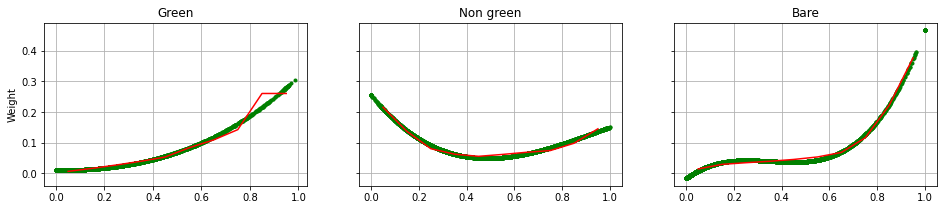

In [2]:
# Weighting by number of points
histoB = np.histogram(full_labels['bare'],bins=10,range=[0,1])
histoNormB=histoB[0].sum()/histoB[0]
histoNormB /= histoNormB.sum()
bareCoeffs = np.polyfit((histoB[1][1:]+histoB[1][:-1])/2,histoNormB,3)
print(bareCoeffs)
bareWeights = np.polyval(bareCoeffs,full_labels['bare'])

# Weighting by number of points
histoG = np.histogram(full_labels['pv'],bins=10,range=[0,1])
histoNormG=histoG[0].sum()/histoG[0]
histoNormG /= histoNormG.sum()
greenCoeffs = np.polyfit((histoG[1][1:]+histoG[1][:-1])/2,histoNormG,3)
print(greenCoeffs)
greenWeights = np.polyval(greenCoeffs,full_labels['pv'])

# Weighting by number of points
histoN = np.histogram(full_labels['npv'],bins=10,range=[0,1])
histoNormN=histoN[0].sum()/histoN[0]
histoNormN /= histoNormN.sum()
nonGreenCoeffs = np.polyfit((histoN[1][1:]+histoN[1][:-1])/2,histoNormN,3)
print(nonGreenCoeffs)
nonGreenWeights = np.polyval(nonGreenCoeffs,full_labels['npv'])

sampleWeights = np.transpose([bareWeights,greenWeights,nonGreenWeights])

# Initialise the 1 row 3 column plot
f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,3),sharey=True)
# Plot the three fractions
ax1.plot(full_labels['pv'],greenWeights,'g.',(histoG[1][1:]+histoG[1][:-1])/2,histoNormG, 'r-')
ax2.plot(full_labels['npv'],nonGreenWeights,'g.',(histoN[1][1:]+histoN[1][:-1])/2,histoNormN, 'r-')
ax3.plot(full_labels['bare'],bareWeights,'g.',(histoB[1][1:]+histoB[1][:-1])/2,histoNormB, 'r-')
# Grids
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
# Titles and Labels
ax1.set_title('Green')
ax2.set_title('Non green')
ax3.set_title('Bare')
ax1.set_ylabel('Weight')
plt.savefig('weights.png', bbox_inches='tight')

## Tune the model in Keras

In [ ]:

def histogramWeightedLoss(y_true, y_pred):

    yWeights = tf.transpose([
        tf.math.polyval([ 1.6816264,-1.7737647,0.57555956,-0.0163076 ], y_true[:,0]),
        tf.math.polyval([ 0.13610764,0.1719074,-0.00244915,0.01020859], y_true[:,1]),
        tf.math.polyval([-0.47778377,1.3296368,-0.9564697,0.25497934], y_true[:,2])
    ])
   
    unmixingError = K.mean(K.abs(y_true * yWeights - y_pred * yWeights),axis=-1)
    negativityError =  K.mean(-y_pred * K.cast(K.less(y_pred,0), K.floatx()),axis=1)
    sum2oneError =  0.005 * K.abs(K.sum(y_pred,axis=1)-1.0)

    loss = unmixingError + sum2oneError + negativityError 
    
    return loss



def build_model(hp):
    model = keras.Sequential([
    layers.Dense(units=hp.Choice('layer1',values=[32,64,128]), activation='relu',kernel_constraint=max_norm(hp.Choice('norm',values=[1,3,5])),input_shape=[len(train_dataset.keys())]),
    layers.Dense(units=hp.Choice('layer2',values=[32,64,128]), activation='relu', kernel_constraint=max_norm(hp.Choice('norm',values=[1,3,5]))),
    layers.Dense(units=hp.Choice('layer3',values=[32,64,128]), activation='relu',kernel_constraint=max_norm(hp.Choice('norm',values=[1,3,5]))),
    layers.Dense(3)
    ])
    optimizer = tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[0.02,0.01,0.005, 0.002, 0.001]))
    model.compile(loss=histogramWeightedLoss,
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error']) #'huber_loss'
    return model


tuner = RandomSearch(
    build_model,
    objective='mean_squared_error',
    max_trials=1000,
    executions_per_trial=10,
    directory='modelTuning',
    project_name='fractionalCover2')

#tuner.search_space_summary()

tuner.search(np.asarray(train_dataset), np.asarray(train_labels),
             epochs=2000,validation_split=0.2,verbose=0,shuffle=True,batch_size=4096)


In [ ]:
tuner.results_summary()
model = tuner.get_best_models(num_models=1)[0]
print(model.summary())
print('Kernel Constraint:',model.get_layer('dense_1').kernel_constraint.max_value)
print('Learning Rate:',model.optimizer.get_config()['learning_rate'])

c1a2c291e8c338f96a346a8c76cc9d56
{'layer1': 256, 'norm': 5, 'layer2': 256, 'layer3': 256, 'learning_rate': 0.005}


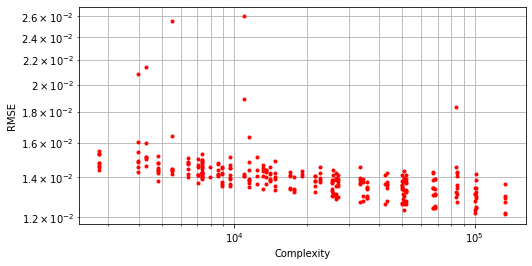

In [16]:
import glob
import json
rmse=[]
rmsev=[]
parameters=[]
trialID=[]
for trial in glob.glob('modelTuning/fractionalCover9/*/trial.json'):
    with open(trial) as summaryJson:
        summaryData = json.load(summaryJson)
    parameterCount = 8*summaryData['hyperparameters']['values']['layer1']+summaryData['hyperparameters']['values']['layer1']*summaryData['hyperparameters']['values']['layer2']+summaryData['hyperparameters']['values']['layer2']*summaryData['hyperparameters']['values']['layer3']+3*summaryData['hyperparameters']['values']['layer3']
    if parameterCount <1000000:
        rmse.append(summaryData['metrics']['metrics']['mean_squared_error']['observations'][0]['value'][0])
        rmsev.append(summaryData['metrics']['metrics']['val_mean_squared_error']['observations'][0]['value'][0])
        parameters.append(parameterCount)
        trialID.append(summaryData['trial_id'])
    
rmse=np.array(rmse)
rmsev=np.array(rmsev)
trialID=np.array(trialID)
parameters=np.array(parameters)
idx=np.argsort(rmsev)
rmse=rmse[idx]
rmsev=rmsev[idx]
trialID=trialID[idx]
parameters=parameters[idx]
print(trialID[0])
with open('modelTuning/fractionalCover9/trial_'+trialID[0]+'/trial.json') as summaryJson:
    print(json.load(summaryJson)['hyperparameters']['values'])

    
fig = plt.figure(figsize=(8,4))
plt.loglog(parameters,rmse,'r.')
plt.grid(True, which="both")
plt.xlabel('Complexity')
plt.ylabel('RMSE')

plt.savefig('rmse_complexity', bbox_inches='tight')

trialID

## Build the model in Keras

In [ ]:
with open('modelTuning/fractionalCover5/trial_'+trialID[3]+'/trial.json') as summaryJson:
    print(json.load(summaryJson)['hyperparameters']['values'])

In [ ]:

# Testing The Cost Function
def histogramWeightedLoss6Outputs(y_true, y_pred):

    yWeights = y_true[:,3:]
    yTrue = y_true[:,:3] * yWeights
    yPred = y_pred[:,:3] * yWeights
    loss = K.mean(K.abs(yTrue - yPred),axis=-1)

    
    return loss

def sum2One(y_true, y_pred):

    yWeights = tf.transpose([
    tf.math.polyval([ 1.6816264,-1.7737647,0.57555956,-0.0163076 ], y_true[:,0]),
    tf.math.polyval([ 0.13610764,0.1719074,-0.00244915,0.01020859], y_true[:,1]),
    tf.math.polyval([-0.47778377,1.3296368,-0.9564697,0.25497934], y_true[:,2])
    ])

    unmixingError = K.mean(K.square(y_true * yWeights - y_pred * yWeights),axis=-1)
    
    
    positivityError =  1.0 + K.sum(K.cast(K.greater(y_pred,1.05), K.floatx()),axis=1)
    negativityError =  K.max(-y_pred * K.cast(K.less(y_pred,-0.05), K.floatx()),axis=1)
    sum2oneError = K.abs(K.sum(y_pred,axis=1)-1.0)
    constraintError = sum2oneError  * positivityError * negativityError

    loss = unmixingError * 1.0 + constraintError * 0.005
    return negativityError


y_true = K.constant(np.array(full_labels))
y_pred = K.constant(np.array(full_labels)*-0.1)

K.eval(sum2One(y_true, y_pred)) # --> 1.0


In [11]:
def histogramWeightedLoss(y_true, y_pred):

    yWeights = tf.transpose([
        tf.math.polyval([ 1.6816264,-1.7737647,0.57555956,-0.0163076 ], y_true[:,0]),
        tf.math.polyval([ 0.13610764,0.1719074,-0.00244915,0.01020859], y_true[:,1]),
        tf.math.polyval([-0.47778377,1.3296368,-0.9564697,0.25497934], y_true[:,2])
    ])
   
    unmixingError = K.mean(K.abs(y_true * yWeights - y_pred * yWeights),axis=-1)
    negativityError =  K.mean(-y_pred * K.cast(K.less(y_pred,0), K.floatx()),axis=1)
    sum2oneError =  0.005 * K.abs(K.sum(y_pred,axis=1)-1.0)

    loss = unmixingError + sum2oneError + negativityError 
    
    return loss



model = keras.Sequential([
layers.Dense(256, activation='relu',kernel_constraint=max_norm(3),input_shape=[len(train_dataset.keys())]),
layers.Dense(64, activation='relu', kernel_constraint=max_norm(3)),
layers.Dense(256, activation='relu',kernel_constraint=max_norm(3)),
layers.Dense(3)
])

model.compile(loss=histogramWeightedLoss,
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
            metrics=['mean_absolute_error', 'mean_squared_error']) #'huber_loss'

model.summary()

# Plot the model
plot_model(model, to_file='model.png',show_shapes=True, show_layer_names=False, )

# Setup Tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               1536      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 771       
Total params: 35,395
Trainable params: 35,395
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --host 0.0.0.0  --logdir logs

#watch -d -n 1 nvidia-smi

## Train the model
Note we set up a couple of callbacks to display progress and stop after a while

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=500)

# Fit the Model np.hstack((full_labels,sampleWeights))
history = model.fit(np.array(full_dataset), np.array(full_labels),
                    epochs=10000,
                    validation_split = 0.5,
                    verbose=0,
                    shuffle=True,
                    batch_size=4096,
                    callbacks=[early_stop,PrintDot(),tensorboard_callback])
print('\n')

# Save the model
modelName = 'fcModel_'+datetime.datetime.now().strftime("%Y%m%d%H%M")+'.hd5'
model.save(modelName,save_format='h5')
# Save a TFLite version
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
tflite_model = converter.convert()
open(modelName.replace('hd5','tflite'), "wb").write(tflite_model)

print('Saved: ',modelName)




#loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)


# Display the training history
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.plot(hist['epoch'], np.sqrt(hist['mean_squared_error']),label='Train Error')
  plt.plot(hist['epoch'], np.sqrt(hist['val_mean_squared_error']),label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

## Plot the final predictions and sum to one

In [73]:
np.percentile(predBareCover,1)

0.0017476189136505123

In [ ]:
# Predict!
#test_predictions = model.predict(normed_test_data)
allLabels = train_labels
allPredictions = model.predict(train_dataset)

# Get the values
totalPVCover=allLabels['pv']
totalNPVCover=allLabels['npv']
totalBareCover=allLabels['bare']
predNongreenCover=allPredictions[:,2]
predGreenCover=allPredictions[:,1]
predBareCover=allPredictions[:,0]
totalSum = predNongreenCover+predGreenCover+predBareCover

# Print some RMSE values
print( "Green RMSE = %f" % np.sqrt(np.mean((totalPVCover-predGreenCover)**2)))
print( "Non Green RMSE = %f" % np.sqrt(np.mean((totalNPVCover-predNongreenCover)**2)))
print( "Bare RMSE = %f" % np.sqrt(np.mean((totalBareCover-predBareCover)**2)))
print( "Min Bare = %f" % np.percentile(predBareCover,1))
print( "Min Green = %f" % np.percentile(predGreenCover,1))
print( "Min NonGreen = %f" % np.percentile(predNongreenCover,1))


# Setup the sum to one histogram
fig = plt.figure(figsize=(8,8))
plt.hist(totalSum, bins=100)
plt.title('SumToOne', fontsize=16)
plt.grid(True)
plt.savefig('fcSum2one.png', bbox_inches='tight')

# Initialise the 1 row 3 column plot for each fraction
f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,5),sharey=True)
# Plot the three fractions
ax1.plot(totalPVCover,predGreenCover, 'go',alpha=0.1,markeredgewidth=0.0)
ax2.plot(totalNPVCover,predNongreenCover, 'bo',alpha=0.1,markeredgewidth=0.0)
ax3.plot(totalBareCover,predBareCover, 'ro',alpha=0.1,markeredgewidth=0.0)
# Grids
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
# Titles and Labels
ax1.set_title('Green')
ax2.set_title('Non green')
ax3.set_title('Bare')
ax1.set_xlabel('Observed')
ax2.set_xlabel('Observed')
ax3.set_xlabel('Observed')
ax1.set_ylabel('Predicted')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax3.set_xlim([0, 1])
ax3.set_ylim([0, 1])
f.savefig('fcCalibration.png', bbox_inches='tight')






## Run the model on the latest Seasonal Image

In [14]:
modelName

'fcModel_202005250053.hd5'

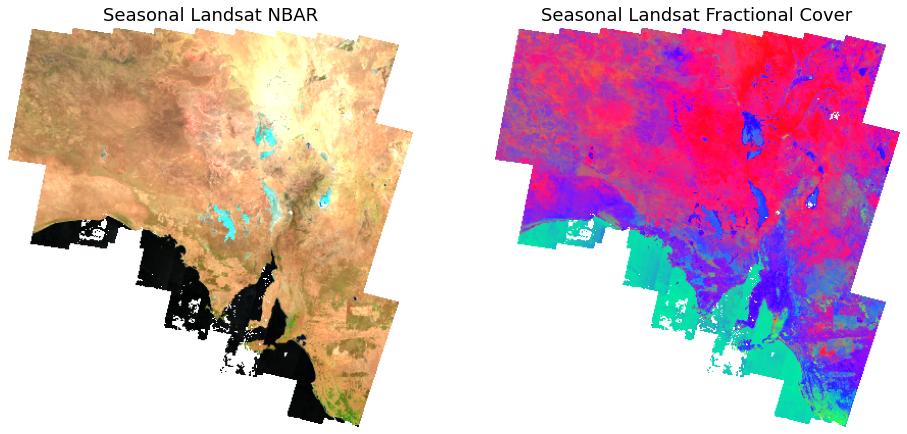

In [36]:
from __future__ import absolute_import, division, print_function, unicode_literals

import rasterio
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# The unmixing model
def unmixfc(nbar, fcModel):
    # Get the shape of the input array
    inshape = nbar.shape
    # Flatten and scale reflectance
    nbar = np.reshape(nbar,(inshape[0],-1)) / 10000.0

    # Convert Landsat 8 if required
    nbar = np.transpose(np.transpose(nbar) * 
                        np.array([0.97470, 0.99779, 1.00446, 0.98906, 0.99467, 1.02551]) + 
                        np.array([0.00041, 0.00289, 0.00274, 0.00004, 0.00256, -0.00327]))

    # Convert Sentinel 2 if required
    #nbar = np.transpose(np.transpose(nbar[[0,1,2,3,8,9]]) * 
    #                   np.array([0.9551, 1.0582, 0.9871, 1.0187, 0.9528, 0.9688]) + 
    #                  np.array([-0.0022, 0.0031, 0.0064, 0.012, 0.0079, -0.0042]))

    # Drop the Blue band. Blue is yukky
    #ndvi = (nbar[3]-nbar[2])/(nbar[3]+nbar[2] + np.finfo('float32').eps)
    #refData = np.transpose(np.append(nbar[1:],[ndvi],axis=0))
    refData = np.transpose(nbar[1:])

    # Run the prediction
    fcLayers = np.clip(fcModel.predict(refData)[:,0:3].T,0,2)
    fcLayerSum = fcLayers.sum(axis=0) + np.finfo('float32').eps
    # Clip Output
    outputFC = np.round(100 * fcLayers/fcLayerSum, 0)
    # Correct noData
    outputFC[:,nbar[0] < 0.001] = 255
    outputFC[:,nbar[0] > 0.999] = 255
    # Reshape the FC Output
    return np.reshape(outputFC,(3,inshape[1],inshape[2])).astype(np.uint8),fcLayers


# Connect to the seasonal surface reflectance
dataPath = '/vsicurl/http://qld.auscover.org.au/public/data/landsat/surface_reflectance/qld/l8olre_qld_m201906201908_dbia2.tif'
dataPath = '/vsicurl/https://data.tern.org.au/rs/public/data/landsat/surface_reflectance/sa/l8olre_sa_m201412201502_dbia2.tif'
# Open the data set
refDataSet = rasterio.open(dataPath)
# Read in the imagery at an overview level
overviewLevel = 128
refData = np.ma.masked_equal(refDataSet.read(
    out_shape=(refDataSet.count,
               int(refDataSet.height / overviewLevel),
               int(refDataSet.width / overviewLevel))),
               refDataSet.nodatavals[0])

# Run the prediction
fcModel = tf.keras.models.load_model(modelName,compile=False)
fcImage,fcLayers = unmixfc(refData,fcModel)

# Plot the images
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,16),sharey=True)
# Plot the three fractions
ax1.imshow(
    np.rollaxis(
        np.clip(refData[[4,3,2]] / 4000.0 * 255.0, 0, 255)
        .astype('uint8')
        ,0,3)
    , aspect=1)
ax1.set_title('Seasonal Landsat NBAR', fontsize=18)
ax1.axis('off');

ax2.imshow(
    np.rollaxis(
        np.clip(fcImage / 100.0 * 400.0, 0, 255)
        .astype('uint8')
        ,0,3)
    , aspect=1)
ax2.set_title('Seasonal Landsat Fractional Cover', fontsize=18)
ax2.axis('off');

f.savefig('fcPredictions.png', bbox_inches='tight')


In [ ]:
fig = plt.figure(figsize=(8,8))

histData = np.reshape(fcLayers,-1)
plt.hist(histData[histData<250], bins=100,log=True);
plt.title('Fraction Retrieval Histogram', fontsize=16)
plt.grid(True)
plt.savefig('fcHistogram.png', bbox_inches='tight')

## Export to tensorflow.js
...only if you want to run in javascript

In [ ]:
#!pip install tensorflowjs
!tensorflowjs_converter --input_format keras fc.hd5 tfjs


In [ ]:
'fcModel_'+datetime.datetime.now().strftime("%Y%m%d%H%M")+'.hd5'

### Field Data Plotting

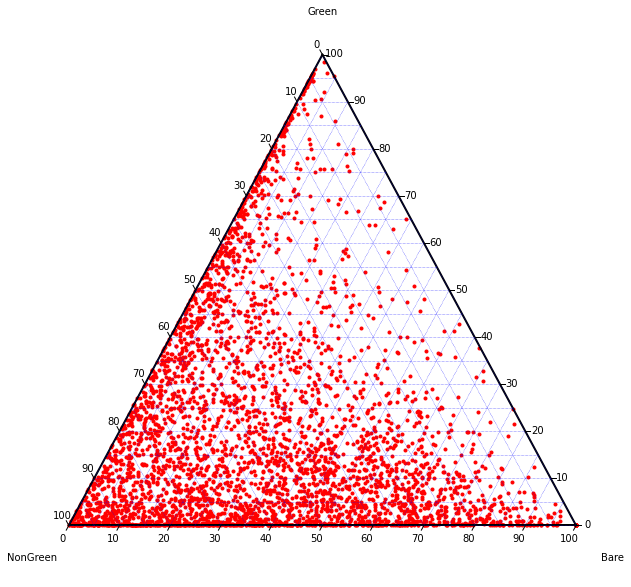

In [27]:
import ternary

### Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10,10)
#tax.set_title("Scatter Plot", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="blue")
# Plot a few different styles with a legend
tax.scatter(np.array(train_labels)*100, marker='.', color='red')
tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.right_corner_label("Bare", fontsize=10)
tax.top_corner_label("Green", fontsize=10)
tax.left_corner_label("NonGreen", fontsize=10)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.show()

In [35]:
# Save a TFLite version
import tensorflow as tf
modelName='fcModel_256x64x256.hd5'
model = tf.keras.models.load_model(modelName,compile=False)
td = np.array(train_dataset).astype(np.float32)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
converter.optimizations = [tf.lite.Optimize.DEFAULT]
def representative_dataset_gen():
  for i in range(len(td)):
    # Get sample input data as a numpy array in a method of your choosing.
    yield [td[i,np.newaxis]]
converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_quant_model = converter.convert()

open(modelName.replace('hd5','8bit.tflite'), "wb").write(tflite_quant_model)


39696